In [1]:
import re
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy
import seaborn as sns

In [2]:
#Get client profiles for android profiler
client_max_android_path = '/users/celph/Desktop/Profiler Data1/A70/Client/Maximum/android.csv'
client_periodic_android_path = '/users/celph/Desktop/Profiler Data1/A70/Client/Periodic/android.csv'
client_min_android_path = '/users/celph/Desktop/Profiler Data1/A70/Client/Minimal/android.csv'

server_max_android_path = '/users/celph/Desktop/Profiler Data1/A70/Server/Maximum/android.csv'
server_periodic_android_path = '/users/celph/Desktop/Profiler Data1/A70/Server/Periodic/android.csv'
server_min_android_path = '/users/celph/Desktop/Profiler Data1/A70/Server/Minimal/android.csv'

client_max_trepn_path = '/users/celph/Desktop/Profiler Data1/A70/Client/Maximum/trepn.csv'
client_periodic_trepn_path = '/users/celph/Desktop/Profiler Data1/A70/Client/Periodic/trepn.csv'
client_min_trepn_path = '/users/celph/Desktop/Profiler Data1/A70/Client/Minimal/trepn.csv'

server_max_trepn_path = '/users/celph/Desktop/Profiler Data1/A70/Server/Maximum/trepn.csv'
server_periodic_trepn_path = '/users/celph/Desktop/Profiler Data1/A70/Server/Periodic/trepn.csv'
server_min_trepn_path = '/users/celph/Desktop/Profiler Data1/A70/Server/Minimal/trepn.csv'

In [3]:
client_max_android_file = open(client_max_android_path,'r')
client_periodic_android_file = open(client_periodic_android_path,'r')
client_min_android_file = open(client_min_android_path,'r')

server_max_android_file = open(server_max_android_path,'r')
server_periodic_android_file = open(server_periodic_android_path,'r')
server_min_android_file = open(server_min_android_path,'r')

client_max_trepn_file = open(client_max_trepn_path,'r')
client_periodic_trepn_file = open(client_periodic_trepn_path,'r')
client_min_trepn_file = open(client_min_trepn_path,'r')

server_max_trepn_file = open(server_max_trepn_path,'r')
server_periodic_trepn_file = open(server_periodic_trepn_path,'r')
server_min_trepn_file = open(server_min_trepn_path,'r')



In [4]:
client_max_android_df = pd.read_csv(client_max_android_file).assign(Version = 'Vanilla')
client_periodic_android_df = pd.read_csv(client_periodic_android_file).assign(Version = 'Vanilla')
client_min_android_df = pd.read_csv(client_min_android_file).assign(Version = 'Vanilla')

server_max_android_df = pd.read_csv(server_max_android_file).assign(Version = 'ARJS 2.0')
server_periodic_android_df = pd.read_csv(server_periodic_android_file).assign(Version = 'ARJS 2.0')
server_min_android_df = pd.read_csv(server_min_android_file).assign(Version = 'ARJS 2.0')

client_max_trepn_df = pd.read_csv(client_max_trepn_file).assign(Version = 'Vanilla')
client_periodic_trepn_df = pd.read_csv(client_periodic_trepn_file).assign(Version = 'Vanilla')
client_min_trepn_df = pd.read_csv(client_min_trepn_file).assign(Version = 'Vanilla')

server_max_trepn_df = pd.read_csv(server_max_trepn_file).assign(Version = 'ARJS 2.0')
server_periodic_trepn_df = pd.read_csv(server_periodic_trepn_file).assign(Version = 'ARJS 2.0')
server_min_trepn_df = pd.read_csv(server_min_trepn_file).assign(Version = 'ARJS 2.0')



In [5]:
def drop_minimal_tables(df):
    df = df.drop(['Time  [ms]'], axis = 1) 
    df = df.drop(['Time  [ms].1'], axis = 1) 
    df = df.drop(['Time  [ms].2'], axis = 1) 
    return df

client_max_trepn_df = drop_minimal_tables(client_max_trepn_df)
client_periodic_trepn_df = drop_minimal_tables(client_periodic_trepn_df)
client_min_trepn_df = drop_minimal_tables(client_min_trepn_df)

server_max_trepn_df = drop_minimal_tables(server_max_trepn_df)
server_periodic_trepn_df = drop_minimal_tables(server_periodic_trepn_df)
server_min_trepn_df = drop_minimal_tables(server_min_trepn_df)

In [6]:
# Combine the necessary df's for comparison.

total_max_android_df = pd.concat([client_max_android_df,server_max_android_df])
total_periodic_android_df = pd.concat([client_periodic_android_df,server_periodic_android_df])
total_min_android_df = pd.concat([client_min_android_df,server_min_android_df])

total_max_trepn_df = pd.concat([client_max_trepn_df,server_max_trepn_df])
total_periodic_trepn_df = pd.concat([client_periodic_trepn_df,server_periodic_trepn_df])
total_min_trepn_df = pd.concat([client_min_trepn_df,server_min_trepn_df])

total_max_android_df = total_max_android_df.assign(Movement = 'Maximum')
total_periodic_android_df = total_periodic_android_df.assign(Movement = 'Periodic')
total_min_android_df = total_min_android_df.assign(Movement = 'Minimal')

total_max_trepn_df = total_max_trepn_df.assign(Movement = 'Maximum')
total_periodic_trepn_df = total_periodic_trepn_df .assign(Movement = 'Periodic')
total_min_trepn_df = total_min_trepn_df.assign(Movement = 'Minimal')

In [7]:
total_max_android_df = total_max_android_df.reset_index(drop=True)
total_periodic_android_df = total_periodic_android_df.reset_index(drop=True)
total_min_android_df = total_min_android_df.reset_index(drop=True)

total_max_trepn_df = total_max_trepn_df.reset_index(drop=True)
total_periodic_trepn_df = total_periodic_trepn_df.reset_index(drop=True)
total_min_trepn_df = total_min_trepn_df.reset_index(drop=True)

In [8]:
total_android_df =  pd.concat([total_max_android_df,total_periodic_android_df,total_min_android_df])
total_android_df = total_android_df.reset_index(drop=True)

total_trepn_df =  pd.concat([total_max_trepn_df,total_periodic_trepn_df,total_min_trepn_df])
total_trepn_df = total_trepn_df.reset_index(drop=True)

In [9]:
total_android_df

,datetime,cpu,mem,Version,Movement
0,Thu Jul 23 15:07:13 UTC 2020,12,3862746,Vanilla,Maximum
1,Thu Jul 23 15:07:17 UTC 2020,18,3855287,Vanilla,Maximum
2,Thu Jul 23 15:07:20 UTC 2020,18,4106039,Vanilla,Maximum
3,Thu Jul 23 15:07:24 UTC 2020,47,4326395,Vanilla,Maximum
4,Thu Jul 23 15:07:28 UTC 2020,47,4356909,Vanilla,Maximum
...,...,...,...,...,...
891,Thu Jul 23 18:13:04 UTC 2020,68,4636419,ARJS 2.0,Minimal
892,Thu Jul 23 18:13:08 UTC 2020,68,4666399,ARJS 2.0,Minimal
893,Thu Jul 23 18:13:12 UTC 2020,67,4646311,ARJS 2.0,Minimal
894,Thu Jul 23 18:13:17 UTC 2020,67,4692137,ARJS 2.0,Minimal


In [10]:
total_trepn_df

,Memory Usage [KB],Battery Power* [uW] (Raw),Battery Power* [uW] (Delta),GPU Load [%],Version,Movement
0,5357980,250553,250553,0,Vanilla,Maximum
1,5527144,0,0,27,Vanilla,Maximum
2,5530784,563745,563745,51,Vanilla,Maximum
3,5502020,1064853,1064853,47,Vanilla,Maximum
4,5507968,981335,981335,53,Vanilla,Maximum
...,...,...,...,...,...,...
758,5487164,960455,960455,47,ARJS 2.0,Minimal
759,5352428,981335,981335,50,ARJS 2.0,Minimal
760,5374892,1043973,1043973,43,ARJS 2.0,Minimal
761,5386472,897817,897817,46,ARJS 2.0,Minimal


In [11]:
total_android_df["Version + Movement"] = total_android_df["Version"] + ' ' + total_android_df["Movement"]
total_trepn_df["Version + Movement"] = total_trepn_df["Version"] + ' ' + total_trepn_df["Movement"]

In [12]:
total_android_df

,datetime,cpu,mem,Version,Movement,Version + Movement
0,Thu Jul 23 15:07:13 UTC 2020,12,3862746,Vanilla,Maximum,Vanilla Maximum
1,Thu Jul 23 15:07:17 UTC 2020,18,3855287,Vanilla,Maximum,Vanilla Maximum
2,Thu Jul 23 15:07:20 UTC 2020,18,4106039,Vanilla,Maximum,Vanilla Maximum
3,Thu Jul 23 15:07:24 UTC 2020,47,4326395,Vanilla,Maximum,Vanilla Maximum
4,Thu Jul 23 15:07:28 UTC 2020,47,4356909,Vanilla,Maximum,Vanilla Maximum
...,...,...,...,...,...,...
891,Thu Jul 23 18:13:04 UTC 2020,68,4636419,ARJS 2.0,Minimal,ARJS 2.0 Minimal
892,Thu Jul 23 18:13:08 UTC 2020,68,4666399,ARJS 2.0,Minimal,ARJS 2.0 Minimal
893,Thu Jul 23 18:13:12 UTC 2020,67,4646311,ARJS 2.0,Minimal,ARJS 2.0 Minimal
894,Thu Jul 23 18:13:17 UTC 2020,67,4692137,ARJS 2.0,Minimal,ARJS 2.0 Minimal


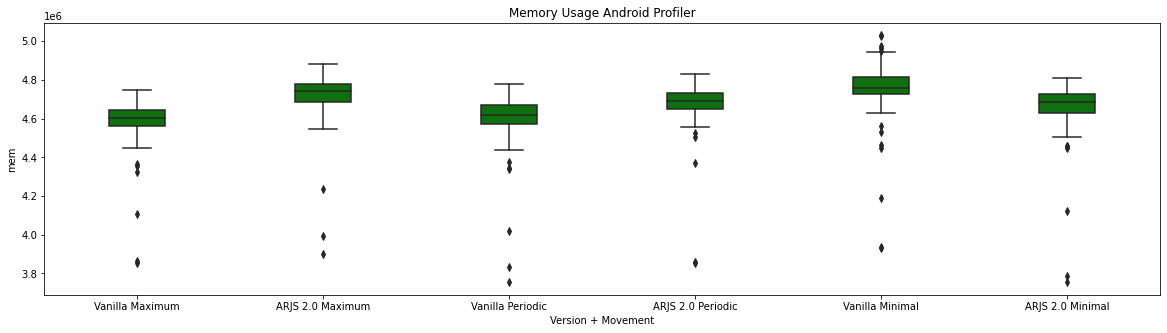

In [13]:
plt.figure(figsize=(20,5))
bplot = sns.boxplot(y='mem', x = 'Version + Movement',
                 data=total_android_df, 
                 width=0.3,
                 color="green").set_title('Memory Usage Android Profiler')

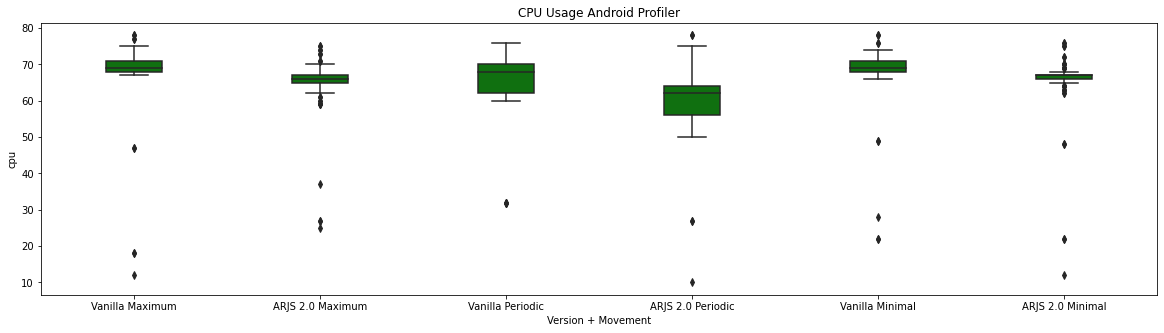

In [14]:
plt.figure(figsize=(20,5))
bplot = sns.boxplot(y='cpu', x = 'Version + Movement',
                 data=total_android_df, 
                 width=0.3,
                 color="green").set_title('CPU Usage Android Profiler')

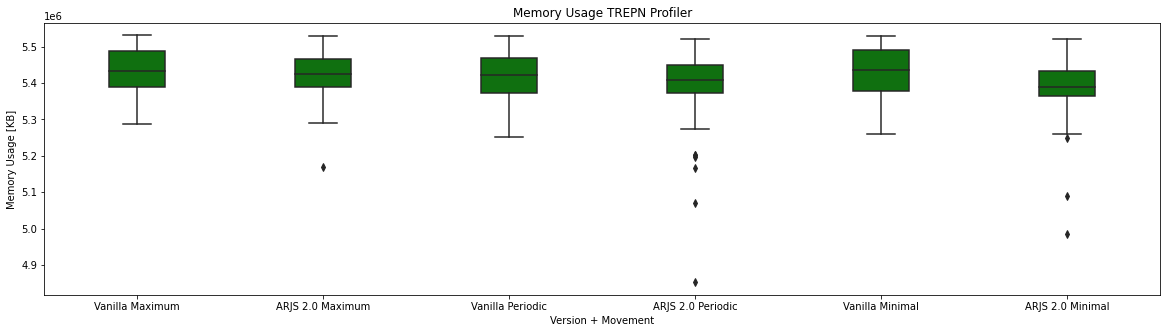

In [15]:
plt.figure(figsize=(20,5))
bplot = sns.boxplot(y='Memory Usage [KB]', x = 'Version + Movement',
                 data=total_trepn_df, 
                 width=0.3,
                 color="green").set_title('Memory Usage TREPN Profiler')

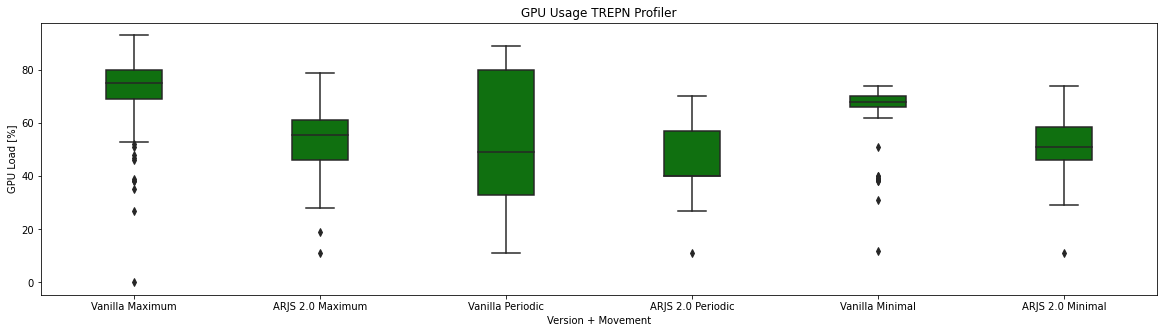

In [16]:
plt.figure(figsize=(20,5))
bplot = sns.boxplot(y='GPU Load [%]', x = 'Version + Movement',
                 data=total_trepn_df, 
                 width=0.3,
                 color="green").set_title('GPU Usage TREPN Profiler')

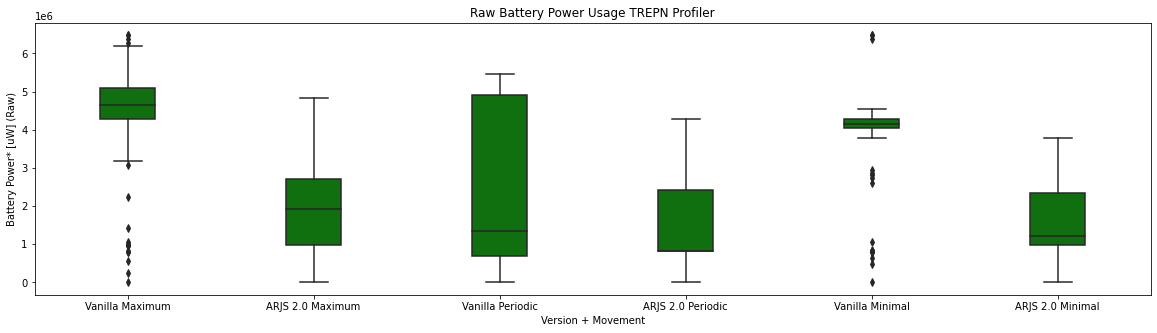

In [17]:
plt.figure(figsize=(20,5))
bplot = sns.boxplot(y='Battery Power* [uW] (Raw)', x = 'Version + Movement',
                 data=total_trepn_df, 
                 width=0.3,
                 color="green").set_title('Raw Battery Power Usage TREPN Profiler')

In [18]:
print('Raw Battery Usage Mean ' + str(client_max_trepn_df['Battery Power* [uW] (Raw)'].mean()))
print('Raw Battery Usage Mean ' + str(server_max_trepn_df['Battery Power* [uW] (Raw)'].mean()))

print('Raw Battery Usage Mean ' + str(client_periodic_trepn_df['Battery Power* [uW] (Raw)'].mean()))
print('Raw Battery Usage Mean ' + str(server_periodic_trepn_df['Battery Power* [uW] (Raw)'].mean()))

print('Raw Battery Usage Mean ' + str(client_min_trepn_df['Battery Power* [uW] (Raw)'].mean()))
print('Raw Battery Usage Mean ' + str(server_min_trepn_df['Battery Power* [uW] (Raw)'].mean()))

Raw Battery Usage Mean 4418684.267716535
Raw Battery Usage Mean 1900255.0625
Raw Battery Usage Mean 2687515.905511811
Raw Battery Usage Mean 1590634.5826771653
Raw Battery Usage Mean 3758005.9212598423
Raw Battery Usage Mean 1598271.5590551181


In [19]:
print('C M Mean ' + str(client_max_trepn_df['Memory Usage [KB]'].mean()))
print('S M Mean ' + str(server_max_trepn_df['Memory Usage [KB]'].mean()))

print('C P Mean ' + str(client_periodic_trepn_df['Memory Usage [KB]'].mean()))
print('S P Mean ' + str(server_periodic_trepn_df['Memory Usage [KB]'].mean()))

print('C Min Mean ' + str(client_min_trepn_df['Memory Usage [KB]'].mean()))
print('S Min Mean ' + str(server_min_trepn_df['Memory Usage [KB]'].mean()))

C M Mean 5435077.952755906
S M Mean 5421518.15625
C P Mean 5418974.771653543
S P Mean 5399508.8503937
C Min Mean 5429828.125984252
S Min Mean 5389363.181102362


In [20]:
print('C M Mean ' + str(client_max_trepn_df['GPU Load [%]'].mean()))
print('S M Mean ' + str(server_max_trepn_df['GPU Load [%]'].mean()))

print('C P Mean ' + str(client_periodic_trepn_df['GPU Load [%]'].mean()))
print('S P Mean ' + str(server_periodic_trepn_df['GPU Load [%]'].mean()))

print('C Min Mean ' + str(client_min_trepn_df['GPU Load [%]'].mean()))
print('S Min Mean ' + str(server_min_trepn_df['GPU Load [%]'].mean()))

C M Mean 72.63779527559055
S M Mean 53.453125
C P Mean 55.28346456692913
S P Mean 47.68503937007874
C Min Mean 64.86614173228347
S Min Mean 51.38582677165354


In [21]:
print('C M Mean ' + str(client_max_android_df['cpu'].mean()))
print('S M Mean ' + str(server_max_android_df['cpu'].mean()))

print('C P Mean ' + str(client_periodic_android_df['cpu'].mean()))
print('S P Mean ' + str(server_periodic_android_df['cpu'].mean()))

print('C Min Mean ' + str(client_min_android_df['cpu'].mean()))
print('S Min Mean ' + str(server_min_android_df['cpu'].mean()))

C M Mean 68.44
S M Mean 65.23809523809524
C P Mean 65.84353741496598
S P Mean 60.158940397350996
C Min Mean 68.50331125827815
S Min Mean 65.90666666666667


In [22]:
print('C M Mean ' + str(client_max_android_df['mem'].mean()))
print('S M Mean ' + str(server_max_android_df['mem'].mean()))

print('C P Mean ' + str(client_periodic_android_df['mem'].mean()))
print('S P Mean ' + str(server_periodic_android_df['mem'].mean()))

print('C Min Mean ' + str(client_min_android_df['mem'].mean()))
print('S Min Mean ' + str(server_min_android_df['mem'].mean()))

C M Mean 4586552.76
S M Mean 4723866.56462585
C P Mean 4601538.959183673
S P Mean 4679447.748344371
C Min Mean 4754916.344370861
S Min Mean 4660307.466666667


In [23]:
processing_time_client = 2517.500000016298,306.80000002030283,44.200000003911555,785.4999999981374,12.900000030640513,36.699999996926636,5.3999999654479325,42.30000003008172,32.99999999580905,37.099999957717955,36.500000045634806,28.89999997569248,41.29999998258427,18.60000001033768,36.00000002188608,17.899999977089465,36.00000002188608,12.999999977182597,37.20000002067536,36.80000000167638,27.29999995790422,22.300000011455268,32.59999997681007,35.300000046845526,18.099999986588955,34.899999969638884,34.0000000433065,20.39999997941777,37.20000002067536,28.200000000651926,16.19999995455146,29.50000000419095,38.50000002421439,16.59999997355044,42.69999999087304,17.099999997299165,44.70000002766028,30.800000007729977,40.70000001229346,23.70000001974404,17.099999997299165,37.79999999096617,33.300000010058284,13.399999996181577,28.799999970942736,41.10000003129244,35.79999995417893,14.900000009220093,19.499999994877726,12.300000002142042,37.59999998146668,7.299999997485429,38.60000002896413,35.80000001238659,35.39999999338761,12.199999997392297,27.10000000661239,34.19999999459833,46.29999998724088,10.899999993853271,29.399999999441206,42.3999999766238,10.300000023562461,32.40000002551824,20.99999994970858,48.40000002877787,10.799999989103526,32.99999999580905,16.899999987799674,48.60000003827736,34.099999989848584,10.000000009313226,43.599999975413084,78.29999999376014,34.8000000230968,34.699999960139394,8.399999991524965,35.900000017136335,35.499999998137355,40.29999999329448,6.999999983236194,36.20000003138557,37.59999998146668,8.800000010523945,32.39999996731058,27.30000001611188,22.799999976996332,39.0999999945052,9.10000002477318,35.700000007636845,33.899999980349094,25.49999998882413,9.200000029522926,17.699999967589974,31.900000001769513,48.5999999800697,11.500000022351742,24.199999985285103,42.10000002058223,20.099999965168536,30.700000002980232,25.69999999832362,23.400000005494803,30.399999988730997,17.500000016298145,31.500000040978193,10.400000028312206,22.699999972246587,27.70000003511086,32.100000011269,21.299999963957816,39.50000001350418,45.999999972991645,45.70000001695007,34.99999997438863,19.900000013876706,29.800000018440187,13.199999986682087,26.000000012572855,5.300000018905848,17.699999967589974,26.599999982863665,5.600000033155084,19.59999999962747,6.2000000034458935,17.79999997233972,11.400000017601997,22.999999986495823,4.599999985657632,15.699999989010394,21.300000022165477,8.49999999627471,11.799999978393316,27.000000001862645,17.20000000204891,32.20000001601875,35.6000000028871,31.499999982770532,33.99999998509884,10.000000009313226,38.20000000996515,34.299999999348074,13.399999996181577,33.59999996609986,16.80000004125759,32.09999995306134,55.099999997764826,6.800000031944364,41.29999998258427,27.200000011362135,42.69999999087304,7.299999997485429,28.600000019650906,20.59999998891726,26.200000022072345,52.099999971687794,7.600000011734664,38.99999998975545,34.099999989848584,10.69999998435378,38.3000000147149,33.300000010058284,9.09999996656552,32.80000004451722,41.70000000158325,23.799999966286123,39.60000001825392,17.300000006798655,33.300000010058284,33.10000000055879,8.800000010523945,31.200000026728958,46.29999998724088,13.099999981932342,34.500000008847564,14.999999955762178,31.400000036228448,32.49999997206032,22.500000020954758,35.6000000028871,12.699999962933362,35.100000037346035,8.49999999627471,28.599999961443245,46.600000001490116,37.699999986216426,8.000000030733645,37.499999976716936,35.39999999338761,14.699999999720603,26.8999999971129,18.80000001983717,37.100000015925616,33.39999995660037,8.800000010523945,35.099999979138374,18.100000044796616,36.99999995296821,27.999999991152436,39.90000003250316,7.199999992735684,64.30000002728775,37.699999986216426,36.3999999826774,35.39999999338761,30.199999979231507,16.20000001275912,35.900000017136335,33.40000001480803,19.900000013876706,31.599999987520278,33.700000029057264,10.000000009313226,29.600000008940697,32.500000030267984,20.499999984167516,39.60000001825392,7.70000001648441,33.20000000530854,31.300000031478703,56.099999987054616,33.899999980349094,35.20000004209578,9.399999980814755,35.299999988637865,35.80000001238659,29.29999999469146,19.700000004377216,27.799999981652945,38.79999998025596,6.800000031944364,22.299999953247607,24.30000004824251,38.89999998500571,6.300000008195639,37.1999999624677,32.99999999580905,32.500000030267984,10.199999960605055,35.00000003259629,32.99999999580905,44.200000003911555,19.80000000912696,36.59999999217689,6.699999968986958,30.800000007729977,32.8999999910593,25.69999999832362,27.70000003511086,12.099999992642552,27.999999991152436,32.40000002551824,15.799999993760139,36.299999977927655,33.79999997559935,7.000000041443855,32.19999995781109,31.799999997019768,54.100000008475035,12.500000011641532,35.80000001238659,20.499999984167516,11.799999978393316,24.70000000903383,8.000000030733645,12.599999958183616,24.49999999953434,7.500000006984919,26.799999992363155,4.799999995157123,11.900000041350722,25.999999954365194,7.500000006984919,15.599999984260648,25.10000002803281,8.09999997727573,44.3000000086613,6.900000036694109,30.29999998398125,33.20000000530854,16.79999998304993,33.40000001480803,7.699999958276749,27.800000039860606,42.599999986123294,25.800000003073364,16.39999996405095,28.600000019650906,16.99999999254942,35.39999999338761,32.00000000651926,18.80000001983717,25.800000003073364,87.70000003278255,6.099999998696148,30.09999997448176,32.30000002076849,18.80000001983717,30.89999995427206,43.800000043120235,8.7000000057742,35.19999998388812,36.900000006426126,7.899999967776239,37.5000000349246,36.699999996926636,9.799999999813735,34.59999995538965,33.20000000530854,35.20000004209578,11.899999983143061,30.599999998230487,36.00000002188608,15.099999960511923,33.99999998509884,31.80000005522743,30.500000051688403,13.299999991431832,36.80000000167638,26.09999995911494,14.499999990221113,32.500000030267984,41.39999998733401,23.50000001024455,18.099999986588955,29.700000013690442,23.799999966286123,37.60000003967434,11.599999968893826,28.999999980442226,15.000000013969839,30.800000007729977,10.599999979604036,43.800000043120235,18.60000001033768,30.000000027939677,22.299999953247607,36.700000055134296,38.699999975506216,24.90000001853332,22.19999994849786,30.100000032689422,36.3999999826774,10.400000028312206,37.699999986216426,9.4999999855645,37.79999999096617,34.500000008847564,14.199999975971878,25.3000000375323,15.699999989010394,28.999999980442226,20.100000023376197,32.69999998155981,33.700000029057264,8.09999997727573,34.700000018347055,34.4999999506399,8.600000001024455,31.900000001769513,33.60000002430752,11.699999973643571,33.500000019557774,16.899999987799674,36.699999996926636,11.300000012852252,47.399999981280416,32.8999999910593,5.800000042654574,30.599999998230487,42.3999999766238,5.899999989196658,34.500000008847564,20.100000023376197,37.90000005392358,23.599999956786633,16.40000002225861,32.100000011269,12.500000011641532,23.70000001974404,19.900000013876706,37.00000001117587,7.299999997485429,37.20000002067536,31.599999987520278,14.999999955762178,36.40000004088506,31.499999982770532,7.099999987985939,32.40000002551824,19.299999985378236,31.599999987520278,29.29999999469146,44.200000003911555,36.900000006426126,24.199999985285103,32.40000002551824,50.40000000735745,11.199999949894845,39.30000000400469,9.400000039022416,39.19999999925494,36.299999977927655,14.200000034179538,29.29999999469146,17.4000000115484,31.900000001769513,19.19999998062849,28.50000001490116,11.899999983143061,24.800000013783574,9.400000039022416,27.999999991152436,5.799999984446913,23.600000014994293,16.00000000325963,22.100000001955777,4.799999995157123,15.599999984260648,20.59999998891726,5.800000042654574,14.899999951012433,24.70000000903383,11.800000036600977,33.6999999708496,36.00000002188608,14.499999990221113,27.200000011362135,33.29999995185062,25.000000023283064,36.100000026635826,6.100000056903809,33.20000000530854,37.70000004442409,9.09999996656552,37.20000002067536,20.39999997941777,34.099999989848584,20.400000037625432,67.00000003911555,32.79999998630956,18.40000000083819,29.999999969732016,17.099999997299165,37.79999999096617,10.999999998603016,30.599999998230487,32.20000001601875,37.20000002067536,23.799999966286123,36.3999999826774,32.700000039767474,12.099999992642552,38.3000000147149,34.4999999506399,9.90000000456348,30.000000027939677,46.199999982491136,10.999999998603016,32.500000030267984,35.899999958928674,33.40000001480803,8.49999999627471,28.09999999590218,20.59999998891726,35.39999999338761,11.799999978393316,33.80000003380701,39.30000000400469,12.799999967683107,31.200000026728958,40.60000000754371,9.399999980814755,34.299999999348074,34.700000018347055,42.09999996237457,7.299999997485429,41.00000002654269,30.29999998398125,35.700000007636845,15.199999965261668,37.40000003017485,5.599999974947423,30.599999998230487,36.100000026635826,20.79999999841675,38.79999998025596,5.799999984446913,31.000000017229468,21.500000031664968,32.20000001601875,19.700000004377216,41.80000000633299,22.899999981746078,16.40000002225861,42.599999986123294,5.999999993946403,34.900000027846545,36.499999987427145,8.7000000057742,29.799999960232526,32.99999999580905,37.40000003017485,9.199999971315265,30.000000027939677,35.900000017136335,8.49999999627471,42.599999986123294,35.900000017136335,5.199999955948442,35.700000007636845,38.99999998975545,10.999999998603016,51.299999991897494,57.80000000959262,29.09999998519197,8.7000000057742,32.500000030267984,40.50000000279397,23.999999975785613,41.200000036042184,20.899999944958836,38.40000001946464,7.9000000259839,32.19999995781109,36.40000004088506,18.59999995213002,25.90000000782311,5.5000000284053385,42.49999998137355,8.000000030733645,35.20000004209578,10.999999998603016,37.699999986216426,38.79999998025596,6.800000031944364,34.500000008847564,30.29999998398125,17.300000006798655,33.99999998509884,17.299999948590994,33.20000000530854,16.300000017508864,28.599999961443245,20.600000047124922,38.00000000046566,8.89999995706603,43.600000033620745,33.10000000055879,36.59999999217689,23.699999961536378,16.300000017508864,21.400000026915222,14.300000038929284,9.799999999813735,9.399999980814755,20.39999997941777,18.700000015087426,21.500000031664968,5.3999999654479325,14.699999999720603,23.400000005494803,8.29999998677522,12.600000016391277,24.70000000903383,5.199999955948442,11.700000031851232,19.99999996041879,9.400000039022416,14.699999999720603,26.199999963864684,9.000000020023435,35.900000017136335,33.300000010058284,43.799999984912574,17.99999998183921,30.399999988730997,18.40000000083819,35.39999999338761,9.399999980814755,36.00000002188608,40.39999999804422,7.70000001648441,37.099999957717955,33.00000005401671,41.600000055041164,5.999999993946403,38.100000005215406,31.999999948311597,15.700000047218055,33.20000000530854,8.599999942816794,30.800000007729977,46.90000001573935,10.300000023562461,29.89999996498227,32.00000000651926,38.00000000046566,45.70000001695007,32.49999997206032,15.100000018719584,26.8999999971129,18.099999986588955,36.299999977927655,7.299999997485429,32.700000039767474,31.900000001769513,36.3999999826774,6.799999973736703,30.399999988730997,29.29999999469146,10.900000052060932,33.59999996609986,34.40000000409782,33.300000010058284,12.899999972432852,34.900000027846545,34.60000001359731,35.99999996367842,34.299999999348074,10.899999993853271,34.19999999459833,39.30000000400469,12.000000046100467,36.80000000167638,11.400000017601997,36.3999999826774,33.10000000055879,20.500000042375177,37.70000004442409,7.999999972525984,33.300000010058284,35.39999999338761,24.29999999003485,24.600000004284084,32.40000002551824,18.299999996088445,30.09999997448176,32.99999999580905,9.799999999813735,28.800000029150397,42.799999995622784,8.09999997727573,33.99999998509884,39.0999999945052,9.90000000456348,35.39999999338761,13.299999991431832,30.399999988730997,20.099999965168536,33.80000003380701,7.500000006984919,27.89999998640269,39.40000000875443,7.799999963026494,31.400000036228448,17.59999996284023,36.80000000167638,11.300000012852252,30.900000012479722,13.399999996181577,38.20000000996515,35.39999999338761,6.299999949987978,31.500000040978193,19.99999996041879,31.100000021979213,18.899999966379255,44.400000013411045,8.49999999627471,29.800000018440187,41.49999999208376,44.599999964702874,37.60000003967434,9.69999999506399,31.599999987520278,32.8999999910593,38.100000005215406,11.100000003352761,33.300000010058284,23.300000000745058,30.499999993480742,42.799999995622784,8.7000000057742,36.699999996926636,34.699999960139394,14.500000048428774,23.499999952036887,18.00000004004687,30.499999993480742,22.999999986495823,43.200000014621764,6.399999954737723,41.10000003129244,35.80000001238659,11.199999949894845,34.299999999348074,37.80000004917383,10.899999993853271,38.699999975506216,33.10000000055879,11.699999973643571,23.90000002924353,4.899999999906868,20.699999993667006,16.99999999254942,17.300000006798655,19.499999994877726,7.500000006984919,15.299999970011413,28.200000000651926,12.300000002142042,22.700000030454248,9.29999997606501,14.599999994970858,20.79999999841675,18.40000000083819,37.300000025425106,32.00000000651926,9.09999996656552,38.70000003371388,37.1999999624677,12.400000006891787,36.59999999217689,6.099999998696148,32.79999998630956,32.700000039767474,31.900000001769513,41.39999998733401,17.699999967589974,35.80000001238659,5.799999984446913,30.000000027939677,32.100000011269,8.89999995706603,30.399999988730997,33.900000038556755,42.69999999087304,5.400000023655593,37.999999942258,16.900000046007335,25.90000000782311,30.399999988730997,26.69999998761341,17.60000002104789,45.600000012200326,25.200000032782555,19.299999985378236,33.20000000530854,9.399999980814755,34.40000000409782,36.19999997317791,11.200000008102506,27.10000000661239,15.599999984260648,31.200000026728958,13.800000015180558,40.39999999804422,5.3999999654479325,39.40000000875443,36.499999987427145,15.799999993760139,33.900000038556755,6.099999998696148,33.80000003380701,43.000000005122274,7.199999992735684,37.1999999624677,19.59999999962747,18.700000015087426,32.20000001601875,38.20000000996515,8.49999999627471,34.899999969638884,33.900000038556755,6.299999949987978,32.900000049266964,38.59999997075647,7.099999987985939,33.20000000530854,32.100000011269,32.8999999910593,10.000000009313226,28.600000019650906,23.499999952036887,33.900000038556755,28.89999997569248,22.799999976996332,36.699999996926636,6.400000012945384,30.800000007729977,24.600000004284084,44.09999999916181,11.300000012852252,60.29999995371327,15.700000047218055,33.49999996135011,16.99999999254942,33.700000029057264,13.099999981932342,29.50000000419095,14.800000004470348,31.699999992270023,44.69999996945262,11.100000003352761,32.30000002076849,36.699999996926636,33.500000019557774,34.39999994589016,14.900000009220093,24.600000004284084,16.899999987799674,35.900000017136335,7.600000011734664,30.599999998230487,18.60000001033768,33.99999998509884,19.299999985378236,43.599999975413084,41.400000045541674,11.699999973643571,28.400000010151416,14.499999990221113,27.599999972153455,16.6000000317581,25.199999974574894,14.399999985471368,27.000000001862645,16.00000000325963,28.800000029150397,18.899999966379255,31.699999992270023,10.500000033061951,34.700000018347055,33.6999999708496,17.20000000204891,30.800000007729977,15.899999998509884,35.899999958928674,10.400000028312206,29.600000008940697,16.699999978300184,32.69999998155981,27.10000000661239,23.70000001974404,36.099999968428165,6.400000012945384,36.19999997317791,31.799999997019768,11.200000008102506,29.200000048149377,18.00000004004687,20.79999999841675,11.599999968893826,13.099999981932342,31.400000036228448,5.3999999654479325,36.20000003138557,14.399999985471368,18.500000005587935,9.69999999506399,10.69999998435378,18.500000005587935,9.399999980814755,13.000000035390258,9.399999980814755,27.200000011362135,13.600000005681068,33.10000000055879,31.199999968521297,5.300000018905848,34.699999960139394,33.10000000055879,5.999999993946403,31.60000004572794,13.199999986682087,29.999999969732016,21.200000017415732,32.99999999580905,13.500000000931323,37.899999995715916,11.599999968893826,36.699999996926636,14.100000029429793,30.399999988730997,14.900000009220093,28.999999980442226,36.80000000167638,11.100000003352761,28.400000010151416,23.599999956786633,38.70000003371388,33.899999980349094,5.300000018905848,26.49999997811392,14.200000034179538,35.700000007636845,14.599999994970858,33.79999997559935,9.599999990314245,42.30000003008172,9.199999971315265,32.30000002076849,43.10000000987202,9.69999999506399,37.699999986216426,6.600000022444874,33.59999996609986,47.10000002523884,7.099999987985939,36.699999996926636,28.200000000651926,43.69999998016283,21.400000026915222,21.499999973457307,41.39999998733401,6.300000008195639,42.599999986123294,48.20000001927838,32.8999999910593,21.59999997820705,21.100000012665987,37.79999999096617,12.500000011641532,26.1000000173226,46.799999952781945,8.400000049732625,41.80000000633299,5.800000042654574,32.59999997681007,21.999999997206032,36.3999999826774,13.299999991431832,32.40000002551824,14.299999980721623,27.6999999769032,20.700000051874667,50.99999997764826,8.90000001527369,32.79999998630956,30.09999997448176,12.800000025890768,31.699999992270023,42.09999996237457,5.999999993946403,35.00000003259629,36.3999999826774,17.500000016298145,36.3999999826774,7.600000011734664,35.6000000028871,30.700000002980232,17.20000000204891,31.799999997019768,5.799999984446913,30.800000007729977,30.09999997448176,17.80000003054738,33.10000000055879,16.59999997355044,21.200000017415732,10.10000001406297,25.200000032782555,20.00000001862645,45.400000002700835,33.09999994235113,24.70000000903383,19.00000002933666,39.40000000875443,24.099999980535358,16.20000001275912,34.299999999348074,36.3999999826774,6.400000012945384,24.29999999003485,15.299999970011413,24.90000001853332,22.500000020954758,30.499999993480742,21.999999997206032,31.099999963771552,41.80000000633299,10.799999989103526,37.100000015925616,6.300000008195639,32.20000001601875,30.499999993480742,12.800000025890768,35.899999958928674,6.900000036694109,36.699999996926636,30.29999998398125,31.399999978020787,12.900000030640513,39.19999999925494,6.300000008195639,37.59999998146668,38.100000005215406,5.899999989196658,31.000000017229468,20.499999984167516,41.09999997308478,8.000000030733645,31.299999973271042,14.400000043679029,36.299999977927655,25.09999996982515,11.500000022351742,20.499999984167516,15.200000023469329,26.399999973364174,5.5000000284053385,18.80000001983717,9.10000002477318,26.399999973364174,11.100000003352761,14.699999999720603,25.3000000375323,4.299999971408397,30.399999988730997,4.899999999906868,13.399999996181577,21.100000012665987,10.300000023562461,14.999999955762178,11.100000003352761,34.8000000230968,9.90000000456348,29.799999960232526,34.299999999348074,16.00000000325963,38.80000003846362,8.399999991524965,34.500000008847564,35.39999999338761,28.30000000540167,50.900000031106174,28.999999980442226,10.899999993853271,32.79999998630956,33.10000000055879,11.100000003352761,34.0000000433065,48.99999999906868,28.70000002440065,13.600000005681068,28.400000010151416,16.299999959301203,32.700000039767474,14.999999955762178,30.500000051688403,14.999999955762178,28.200000000651926,14.399999985471368,35.900000017136335,8.09999997727573,24.399999994784594,26.400000031571835,35.6000000028871,10.49999997485429,28.09999999590218,42.200000025331974,9.199999971315265,32.99999999580905,11.500000022351742,31.399999978020787,17.300000006798655,32.79999998630956,13.200000044889748,27.70000003511086,41.09999997308478,26.30000002682209,25.800000003073364,22.19999994849786,39.70000002300367,5.100000009406358,39.8999999742955,37.5000000349246,10.899999993853271,31.299999973271042,35.099999979138374,26.30000002682209,30.900000012479722,38.100000005215406,14.099999971222132,35.80000001238659,39.19999999925494,12.599999958183616,32.900000049266964,34.19999999459833,13.500000000931323,31.100000021979213,15.899999998509884,36.3999999826774,36.699999996926636,9.500000043772161,40.10000004200265,45.0999999884516,8.7000000057742,28.89999997569248,16.500000027008355,13.799999956972897,30.000000027939677,11.100000003352761,27.400000020861626,36.099999968428165,47.29999997653067,8.10000003548339,63.800000003539026,11.49999996414408,55.40000001201406,32.00000000651926,18.1999999913387,42.000000015832484,4.799999995157123,36.3999999826774,34.500000008847564,9.09999996656552,33.60000002430752,27.799999981652945,21.500000031664968,22.899999981746078,19.80000000912696,38.299999956507236,11.300000012852252,25.90000000782311,44.70000002766028,9.90000000456348,29.69999995548278,18.80000001983717,33.899999980349094,33.60000002430752,14.499999990221113,32.100000011269,29.50000000419095,20.79999999841675,31.399999978020787,37.79999999096617,9.000000020023435,40.09999998379499,33.300000010058284,8.999999961815774,29.200000048149377,37.899999995715916,14.099999971222132,36.300000036135316,39.30000000400469,5.899999989196658,20.59999998891726,11.799999978393316,32.00000000651926,38.50000002421439,27.999999991152436,14.999999955762178,39.70000002300367,33.99999998509884,15.000000013969839,37.899999995715916,6.500000017695129,48.199999961070716,17.60000002104789,14.699999999720603,22.499999962747097,14.200000034179538,18.099999986588955,15.699999989010394,25.800000003073364,5.200000014156103,13.600000005681068,22.999999986495823,5.899999989196658,13.000000035390258,16.00000000325963,27.999999991152436,6.8999999784864485,48.20000001927838,9.90000000456348,25.89999994961545,38.40000001946464,10.799999989103526,38.3000000147149,7.400000002235174,37.00000001117587,45.8999999682419,32.500000030267984,37.70000004442409,18.79999996162951,36.499999987427145,8.10000003548339,30.29999998398125,15.499999979510903,35.20000004209578,10.2999999653548,41.49999999208376,33.40000001480803,15.399999974761158,35.39999999338761,7.1000000461936,30.29999998398125,43.799999984912574,10.999999998603016,24.90000001853332,24.699999950826168,33.500000019557774,12.700000021141022,34.59999995538965,8.200000040233135,34.099999989848584,49.99999998835847,7.70000001648441,34.79999996488914,30.700000002980232,42.10000002058223,16.99999999254942,40.50000000279397,36.699999996926636,12.599999958183616,39.90000003250316,18.700000015087426,40.50000000279397,15.300000028219074,35.39999999338761,43.89999998966232,38.89999998500571,47.50000004423782,8.800000010523945,43.200000014621764,40.8000000170432,7.400000002235174,44.799999974202365,29.09999998519197,39.50000001350418,38.20000000996515,13.999999966472387,34.0000000433065,22.899999981746078,27.30000001611188,33.59999996609986,42.49999998137355,32.20000001601875,19.700000004377216,26.8999999971129,44.50000001816079,44.09999999916181,6.999999983236194,32.39999996731058,49.10000000381842,7.500000006984919,41.29999998258427,10.300000023562461,32.500000030267984,49.19999995036051,11.900000041350722,33.59999996609986,35.299999988637865,49.20000000856817,34.299999999348074,28.89999997569248,19.00000002933666,32.39999996731058,30.599999998230487,16.700000036507845,31.599999987520278,8.800000010523945,30.700000002980232,20.79999999841675,68.29999998444691,8.999999961815774,38.3000000147149,33.99999998509884,17.20000000204891,30.300000042188913,21.19999995920807,18.80000001983717,10.200000018812716,14.800000004470348,26.799999992363155,7.699999958276749,34.8000000230968,23.099999991245568,18.40000000083819,24.29999999003485,19.299999985378236,27.90000004461035,18.499999947380275,28.600000019650906,21.300000022165477,24.699999950826168,9.500000043772161,35.499999998137355,33.6999999708496,11.799999978393316,26.000000012572855,37.00000001117587,11.300000012852252,32.59999997681007,28.600000019650906,15.100000018719584,21.499999973457307,13.299999991431832,26.000000012572855,15.599999984260648,29.09999998519197,31.300000031478703,18.500000005587935,33.10000000055879,21.999999997206032,38.699999975506216,5.200000014156103,31.699999992270023,15.599999984260648,22.200000006705523,6.999999983236194,19.499999994877726,22.90000003995374,4.899999999906868,18.299999996088445,9.399999980814755,19.39999999012798,13.600000005681068,10.999999998603016,21.400000026915222,8.89999995706603,25.69999999832362,5.700000037904829,23.200000054202974,38.299999956507236,10.899999993853271,40.29999999329448,47.69999999552965,42.200000025331974,33.59999996609986,7.000000041443855,29.600000008940697,21.699999982956797,30.900000012479722,16.499999968800694,24.90000001853332,19.499999994877726,21.799999987706542,25.69999999832362,40.0000000372529,10.199999960605055,57.10000003455207,20.100000023376197,25.69999999832362,14.499999990221113,35.6000000028871,4.6999999904073775,41.10000003129244,5.3999999654479325,37.5000000349246,30.499999993480742,7.999999972525984,31.400000036228448,34.299999999348074,38.40000001946464,7.099999987985939,33.99999998509884,35.500000056345016,36.59999999217689,11.399999959394336,28.400000010151416,25.800000003073364,37.00000001117587,9.10000002477318,29.69999995548278,36.80000000167638,19.300000043585896,31.999999948311597,18.00000004004687,32.59999997681007,15.000000013969839,40.09999998379499,6.600000022444874,33.899999980349094,29.799999960232526,20.400000037625432,30.800000007729977,20.899999944958836,36.900000006426126,7.199999992735684,34.8000000230968,27.799999981652945,10.69999998435378,36.60000005038455,31.900000001769513,18.00000004004687,35.700000007636845,15.399999974761158,36.3999999826774,18.299999996088445,25.90000000782311,14.100000029429793,32.80000004451722,27.599999972153455,27.600000030361116,37.1999999624677,9.90000000456348,36.80000000167638,6.800000031944364,35.19999998388812,44.3000000086613,23.999999975785613,20.20000002812594,32.79999998630956,7.500000006984919,34.60000001359731,10.900000052060932,25.799999944865704,19.40000004833564,33.20000000530854,12.899999972432852,30.09999997448176,16.99999999254942,26.600000041071326,18.79999996162951,34.19999999459833,33.10000000055879,11.400000017601997,35.499999998137355,35.6000000028871,13.099999981932342,29.399999999441206,17.500000016298145,37.59999998146668,7.800000021234155,35.39999999338761,33.10000000055879,33.99999998509884,36.20000003138557,16.899999987799674,32.59999997681007,25.599999993573874,16.100000008009374,30.700000002980232,15.000000013969839,28.89999997569248,18.00000004004687,38.099999947007746,7.000000041443855,34.699999960139394,28.90000003390014,41.70000000158325,9.29999997606501,31.900000001769513,29.700000013690442,17.699999967589974,36.300000036135316,13.099999981932342,35.900000017136335,39.69999996479601,7.600000011734664,33.300000010058284,39.59999996004626,15.799999993760139,30.700000002980232,32.59999997681007,35.700000007636845,13.800000015180558,24.999999965075403,11.400000017601997,23.199999995995313,5.799999984446913,17.700000025797635,19.39999999012798,11.699999973643571,9.500000043772161,20.99999994970858,10.999999998603016,19.59999999962747,15.100000018719584,49.89999998360872,4.799999995157123,19.20000003883615,49.99999998835847,34.60000001359731,12.300000002142042,25.399999984074384,6.400000012945384,30.700000002980232,16.099999949801713,26.600000041071326,14.999999955762178,25.10000002803281,13.199999986682087,32.40000002551824,6.699999968986958,29.900000023189932,19.099999975878745,34.500000008847564,11.49999996414408,29.600000008940697,35.900000017136335,14.199999975971878,33.60000002430752,14.499999990221113,34.19999999459833,32.100000011269,18.500000005587935,34.79999996488914,36.500000045634806,29.399999999441206,13.999999966472387,27.799999981652945,32.100000011269,8.7000000057742,33.99999998509884,33.500000019557774,31.099999963771552,48.10000001452863,5.699999979697168,33.40000001480803,33.500000019557774,35.299999988637865,15.699999989010394,29.29999999469146,14.800000004470348,34.299999999348074,7.400000002235174,26.1000000173226,22.499999962747097,38.60000002896413,5.100000009406358,34.79999996488914,32.30000002076849,21.499999973457307,34.299999999348074,28.30000000540167,14.199999975971878,33.99999998509884,34.299999999348074,30.100000032689422,19.39999999012798,35.099999979138374,14.900000009220093,32.40000002551824,34.099999989848584,6.2000000034458935,33.899999980349094,40.19999998854473,13.600000005681068,27.89999998640269,34.8000000230968,41.09999997308478,5.200000014156103,35.00000003259629,46.199999982491136,38.499999966006726,26.8999999971129,20.00000001862645,32.79999998630956,23.400000005494803,24.70000000903383,33.899999980349094,29.29999999469146,18.299999996088445,36.80000000167638,7.70000001648441,31.199999968521297,31.599999987520278,28.600000019650906,24.800000013783574,32.09999995306134,14.600000053178519,27.29999995790422,22.500000020954758,30.900000012479722,16.99999999254942,38.099999947007746,21.800000045914203,16.19999995455146,38.99999998975545,11.100000003352761,38.70000003371388,38.100000005215406,21.899999992456287,20.699999993667006,30.29999998398125,30.399999988730997,25.10000002803281,34.79999996488914,27.800000039860606,17.499999958090484,35.40000005159527,11.600000027101487,35.19999998388812,36.900000006426126,10.000000009313226,20.00000001862645,24.099999980535358,33.60000002430752,11.199999949894845,31.500000040978193,37.00000001117587,10.500000033061951,37.899999995715916,39.60000001825392,27.6999999769032,21.499999973457307,42.400000034831464,37.299999967217445,22.200000006705523,21.100000012665987,39.0999999945052,29.700000013690442,49.39999995986,28.09999999590218,12.000000046100467,20.79999999841675,8.7000000057742,28.000000049360096,7.899999967776239,13.900000019930303,10.2999999653548,17.300000006798655,13.500000000931323,22.700000030454248,10.2999999653548,11.300000012852252,28.999999980442226,9.500000043772161,24.89999996032566,9.90000000456348,13.000000035390258,19.699999946169555,4.700000048615038,19.700000004377216,12.799999967683107,25.69999999832362,19.80000000912696,28.09999999590218,22.799999976996332,36.100000026635826,8.89999995706603,28.800000029150397,24.600000004284084,36.299999977927655,34.099999989848584,14.000000024680048,36.59999999217689,31.900000001769513,17.60000002104789,38.699999975506216,8.29999998677522,33.80000003380701,16.99999999254942,33.79999997559935,31.499999982770532,49.20000000856817,9.400000039022416,34.19999999459833,37.1999999624677,7.099999987985939,32.79999998630956,36.100000026635826,16.20000001275912,34.19999999459833,11.399999959394336,38.60000002896413,9.199999971315265,35.19999998388812,9.400000039022416,35.900000017136335,41.5999999968335,12.399999948684126,33.700000029057264,33.40000001480803,19.19999998062849,37.20000002067536,10.899999993853271,35.699999949429184,29.000000038649887,26.200000022072345,24.099999980535358,32.30000002076849,30.700000002980232,11.400000017601997,37.299999967217445,33.899999980349094,35.300000046845526,28.09999999590218,32.69999998155981,29.199999989941716,19.499999994877726,27.89999998640269,42.600000044330955,6.499999959487468,37.5000000349246,33.60000002430752,34.60000001359731,33.79999997559935,32.60000003501773,42.49999998137355,37.899999995715916,39.99999997904524,10.799999989103526,31.100000021979213,16.899999987799674,34.8000000230968,12.899999972432852,30.900000012479722,12.700000021141022,42.200000025331974,8.199999982025474,35.499999998137355,33.40000001480803,13.299999991431832,34.299999999348074,16.100000008009374,39.19999999925494,15.899999998509884,36.099999968428165,8.90000001527369,25.399999984074384,20.499999984167516,32.60000003501773,44.69999996945262,8.90000001527369,30.399999988730997,43.200000014621764,11.999999987892807,40.8000000170432,34.099999989848584,8.800000010523945,28.69999996619299,34.0000000433065,19.7999999509193,29.50000000419095,37.59999998146668,23.600000014994293,33.500000019557774,5.999999993946403,21.899999992456287,14.599999994970858,27.799999981652945,5.800000042654574,30.29999998398125,19.099999975878745,27.89999998640269,17.20000000204891,32.20000001601875,11.399999959394336,21.800000045914203,14.299999980721623,32.79999998630956,35.100000037346035,11.29999995464459,30.200000037439167,32.59999997681007,15.799999993760139,24.600000004284084,20.79999999841675,34.99999997438863,10.999999998603016,31.100000021979213,20.79999999841675,35.899999958928674,9.400000039022416,38.00000000046566,31.599999987520278,37.499999976716936,11.700000031851232,39.99999997904524,35.19999998388812,32.40000002551824,59.19999995967373,38.90000004321337,24.799999955575913,20.00000001862645,38.99999998975545,11.999999987892807,21.500000031664968,11.49999996414408,36.40000004088506,29.09999998519197,26.799999992363155,22.700000030454248,10.800000047311187,27.09999994840473,13.300000049639493,30.199999979231507,17.300000006798655,38.20000000996515,12.999999977182597,34.500000008847564,30.800000007729977,16.899999987799674,34.79999996488914,8.50000005448237,27.200000011362135,20.900000003166497,36.900000006426126,31.000000017229468,16.79999998304993,36.00000002188608,12.599999958183616,27.90000004461035,36.500000045634806,19.19999998062849,30.900000012479722,18.299999996088445,36.499999987427145,9.90000000456348,27.30000001611188,32.100000011269,22.200000006705523,39.90000003250316,9.29999997606501,37.100000015925616,31.799999997019768,8.600000001024455,27.000000001862645,31.799999997019768,17.699999967589974,34.8000000230968,11.29999995464459,35.80000001238659,29.700000013690442,17.300000006798655,25.09999996982515,41.90000001108274,4.599999985657632,34.8000000230968,8.49999999627471,30.599999998230487,34.099999989848584,25.800000003073364,33.20000000530854,7.600000011734664,31.699999992270023,38.79999998025596,32.900000049266964,31.900000001769513,12.600000016391277,28.09999999590218,22.90000003995374,36.899999948218465,9.600000048521906,34.4999999506399,43.600000033620745,46.89999995753169,35.100000037346035,10.199999960605055,32.30000002076849,30.700000002980232,19.80000000912696,38.20000000996515,9.09999996656552,33.900000038556755,27.09999994840473,40.8000000170432,6.999999983236194,34.100000048056245,39.299999945797026,7.70000001648441,39.80000002775341,30.599999998230487,13.799999956972897,36.00000002188608,33.500000019557774,14.599999994970858,22.799999976996332,21.699999982956797,32.40000002551824,17.500000016298145,37.5000000349246,10.2999999653548,30.100000032689422,21.100000012665987,28.200000000651926,30.399999988730997,21.699999982956797,39.19999999925494,7.500000006984919,37.299999967217445,31.699999992270023,10.800000047311187,35.19999998388812,11.899999983143061,38.3000000147149,42.19999996712431,8.10000003548339,36.299999977927655,19.099999975878745,21.899999992456287,28.90000003390014,14.299999980721623,36.900000006426126,6.2000000034458935,42.19999996712431,31.000000017229468,12.500000011641532,29.09999998519197,38.00000000046566,8.49999999627471,23.400000005494803,14.599999994970858,28.50000001490116,19.099999975878745,34.19999999459833,7.099999987985939,33.40000001480803,27.600000030361116,27.29999995790422,33.300000010058284,33.300000010058284,15.399999974761158,40.8000000170432,7.299999997485429,30.199999979231507,7.500000006984919,13.600000005681068,29.09999998519197,12.800000025890768,22.999999986495823,6.800000031944364,12.500000011641532,16.59999997355044,8.09999997727573,13.800000015180558,17.4000000115484,14.199999975971878,14.499999990221113,21.500000031664968,9.4999999855645,13.900000019930303,22.100000001955777,12.899999972432852,21.799999987706542,23.70000001974404,36.299999977927655,7.500000006984919,28.09999999590218,13.299999991431832,25.200000032782555,18.79999996162951,38.20000000996515,6.099999998696148,35.00000003259629,33.99999998509884,31.499999982770532,17.900000035297126,35.19999998388812,6.400000012945384,28.29999994719401,34.900000027846545,19.499999994877726,33.40000001480803,19.499999994877726,18.099999986588955,23.50000001024455,25.29999997932464,31.000000017229468,38.99999998975545,6.099999998696148,38.00000000046566,35.099999979138374,24.000000033993274,19.299999985378236,33.40000001480803,11.200000008102506,58.90000000363216,23.899999971035868,17.60000002104789,33.99999998509884,22.100000001955777,32.49999997206032,10.999999998603016,35.19999998388812,7.400000002235174,26.30000002682209,18.999999971129,30.700000002980232,17.500000016298145,31.399999978020787,21.300000022165477,38.499999966006726,6.400000012945384,31.400000036228448,25.000000023283064,18.700000015087426,29.399999999441206,29.69999995548278,21.200000017415732,43.000000005122274,41.09999997308478,32.99999999580905,9.69999999506399,35.00000003259629,32.00000000651926,11.799999978393316,29.29999999469146,32.100000011269,35.80000001238659,27.6999999769032,18.40000000083819,35.499999998137355,21.999999997206032,22.599999967496842,32.99999999580905,32.00000000651926,9.10000002477318,29.50000000419095,31.999999948311597,15.8000000519678,30.799999949522316,20.699999993667006,35.00000003259629,6.999999983236194,30.599999998230487,15.100000018719584,36.699999996926636,9.599999990314245,40.09999998379499,8.200000040233135,38.39999996125698,32.40000002551824,28.69999996619299,17.700000025797635,34.40000000409782,26.199999963864684,27.400000020861626,9.599999990314245,24.800000013783574,38.00000000046566,19.39999999012798,33.500000019557774,35.499999998137355,31.699999992270023,50.59999995864928,31.100000021979213,15.599999984260648,38.80000003846362,40.09999998379499,41.09999997308478,42.200000025331974,27.6999999769032,19.900000013876706,36.3999999826774,19.099999975878745,24.800000013783574,22.899999981746078,12.600000016391277,38.00000000046566,23.70000001974404,7.199999992735684,44.89999997895211,42.10000002058223,10.899999993853271,41.19999997783452,45.199999993201345,38.50000002421439,32.40000002551824,42.90000000037253,12.199999997392297,37.300000025425106,11.400000017601997,68.19999997969717,29.199999989941716,58.10000002384186,43.49999997066334,22.400000016205013,11.799999978393316,23.800000024493784,13.299999991431832,25.399999984074384,12.500000011641532,27.000000001862645,4.599999985657632,28.799999970942736,8.400000049732625,14.800000004470348,21.100000012665987,11.100000003352761,11.500000022351742,27.800000039860606,4.599999985657632,33.700000029057264,26.999999943654984,30.100000032689422,14.099999971222132,36.59999999217689,10.700000042561442,39.499999955296516,21.800000045914203,22.599999967496842,35.19999998388812,8.7000000057742,36.59999999217689,38.80000003846362,11.599999968893826,37.100000015925616,33.99999998509884,36.499999987427145,11.400000017601997,38.40000001946464,36.099999968428165,33.80000003380701,24.699999950826168,14.400000043679029,38.499999966006726,11.500000022351742,29.800000018440187,57.50000005355105,31.199999968521297,44.400000013411045,53.0000000144355,37.699999986216426,33.10000000055879,28.999999980442226,20.499999984167516,39.80000002775341,31.900000001769513,59.89999999292195,13.399999996181577,61.09999999171123,11.799999978393316,46.09999997774139,42.7000000490807,44.49999995995313,34.8000000230968,33.79999997559935,35.6000000028871,45.400000002700835,19.499999994877726,45.50000000745058,10.400000028312206,39.59999996004626,38.50000002421439,25.49999998882413,45.70000001695007,58.59999998938292,36.19999997317791,12.500000011641532,34.700000018347055,10.09999995585531,34.100000048056245,29.29999999469146,40.50000000279397,38.79999998025596,43.599999975413084,53.59999998472631,48.60000003827736,46.29999998724088,35.299999988637865,40.39999999804422,42.000000015832484,10.799999989103526,44.799999974202365,35.700000007636845,29.700000013690442,33.20000000530854,15.099999960511923,58.30000003334135,24.29999999003485,43.599999975413084,49.10000000381842,45.400000002700835,30.199999979231507,35.00000003259629,16.00000000325963,31.399999978020787,60.89999998221174,11.500000022351742,44.3000000086613,53.0000000144355,31.699999992270023,37.39999997196719,46.600000001490116,11.400000017601997,41.29999998258427,45.29999999795109,35.700000007636845,41.39999998733401,11.999999987892807,40.19999998854473,30.700000002980232,67.50000000465661,5.400000023655593,76.89999998547137,50.80000002635643,12.099999992642552,44.599999964702874,8.49999999627471,29.700000013690442,774.0999999805354,42.90000000037253,696.6999999713153,9.000000020023435,792.4999999813735,7.299999997485429,34.60000001359731,8.29999998677522,44.400000013411045,10.10000001406297,43.599999975413084,36.699999996926636,47.90000000502914,35.299999988637865,21.899999992456287,22.500000020954758,33.20000000530854,40.60000000754371,32.29999996256083,12.300000002142042,28.50000001490116,14.800000004470348,23.099999991245568,26.599999982863665,17.4000000115484,28.90000003390014,10.400000028312206,31.900000001769513,12.999999977182597,36.499999987427145,5.999999993946403,37.20000002067536,29.600000008940697,21.799999987706542,25.29999997932464,17.300000006798655,33.80000003380701,13.199999986682087,27.399999962653965,34.900000027846545,8.7000000057742,32.39999996731058,45.29999999795109,7.9000000259839,33.6999999708496,31.100000021979213,27.000000001862645,19.80000000912696,32.39999996731058,21.200000017415732,34.099999989848584,17.80000003054738,31.799999997019768,22.499999962747097,8.800000010523945,23.300000000745058,32.39999996731058,8.7000000057742,32.80000004451722,49.59999996935949,10.400000028312206,40.89999996358529,32.79999998630956,28.000000049360096,23.90000002924353,31.000000017229468,14.599999994970858,34.299999999348074,36.3999999826774,5.899999989196658,41.09999997308478,26.800000050570816,21.799999987706542,38.499999966006726,30.700000002980232,22.300000011455268,43.000000005122274,13.600000005681068,33.899999980349094,36.900000006426126,21.799999987706542,15.899999998509884,11.100000003352761,22.599999967496842,6.2000000034458935,13.299999991431832,20.900000003166497,12.099999992642552,10.700000042561442,17.79999997233972,23.300000000745058,25.399999984074384,6.099999998696148,27.400000020861626,10.599999979604036,17.700000025797635,16.39999996405095,38.20000000996515,9.599999990314245,24.90000001853332,20.00000001862645,34.79999996488914,10.10000001406297,31.199999968521297,29.100000043399632,39.19999999925494,15.599999984260648,29.399999999441206,34.500000008847564,6.099999998696148,33.899999980349094,32.79999998630956,33.500000019557774,21.100000012665987,39.50000001350418,7.9000000259839,30.800000007729977,31.299999973271042,39.0999999945052,32.20000001601875,6.900000036694109,30.09999997448176,38.99999998975545,7.800000021234155,36.59999999217689,42.49999998137355,16.00000000325963,33.899999980349094,33.500000019557774,16.500000027008355,36.099999968428165,34.900000027846545,31.299999973271042,17.300000006798655,31.199999968521297,21.999999997206032,32.60000003501773,7.600000011734664,32.09999995306134,28.600000019650906,19.499999994877726,34.500000008847564,32.39999996731058,12.500000011641532,32.79999998630956,20.699999993667006,34.0000000433065,8.7000000057742,34.900000027846545,34.79999996488914,12.400000006891787,34.60000001359731,36.00000002188608,12.099999992642552,31.000000017229468,65.49999996786937,36.499999987427145,9.599999990314245,29.300000052899122,43.49999997066334,11.799999978393316,35.6000000028871,52.19999997643754,45.200000051409006,25.999999954365194,11.500000022351742,34.19999999459833,34.299999999348074,14.099999971222132,31.100000021979213,12.500000011641532,32.700000039767474,33.29999995185062,16.40000002225861,37.499999976716936,7.000000041443855,39.60000001825392,29.600000008940697,9.399999980814755,36.20000003138557,37.79999999096617,7.500000006984919,40.99999996833503,9.10000002477318,47.09999996703118,31.100000021979213,40.29999999329448,24.49999999953434,18.1999999913387,36.099999968428165,17.20000000204891,34.0000000433065,39.79999996954575,21.500000031664968,21.099999954458326,30.900000012479722,9.30000003427267,34.099999989848584,33.49999996135011,10.200000018812716,33.79999997559935,41.200000036042184,7.899999967776239,29.900000023189932,17.300000006798655,23.999999975785613,12.300000002142042,30.09999997448176,10.900000052060932,27.799999981652945,45.600000012200326,6.399999954737723,20.400000037625432,14.599999994970858,26.799999992363155,10.10000001406297,30.199999979231507,31.199999968521297,28.09999999590218,31.300000031478703,26.799999992363155,30.09999997448176,10.600000037811697,36.699999996926636,39.30000000400469,24.799999955575913,19.900000013876706,29.199999989941716,33.10000000055879,17.700000025797635,37.59999998146668,7.400000002235174,28.799999970942736,20.600000047124922,30.799999949522316,6.099999998696148,41.29999998258427,10.000000009313226,29.599999950733036,16.99999999254942,28.800000029150397,9.199999971315265,18.00000004004687,13.399999996181577,19.39999999012798,8.89999995706603,13.600000005681068,17.20000000204891,36.300000036135316,6.799999973736703,29.50000000419095,21.59999997820705,41.00000002654269,7.400000002235174,29.399999999441206,48.49999997531995,5.799999984446913,31.300000031478703,41.49999999208376,9.90000000456348,35.700000007636845,30.800000007729977,46.600000001490116,6.500000017695129,36.100000026635826,13.700000010430813,30.999999959021807,16.99999999254942,26.1000000173226,20.299999974668026,32.30000002076849,31.499999982770532,11.300000012852252,31.000000017229468,36.099999968428165,38.79999998025596,12.800000025890768,32.40000002551824,12.300000002142042,32.20000001601875,33.500000019557774,30.89999995427206,18.00000004004687,30.89999995427206,19.700000004377216,32.20000001601875,7.800000021234155,34.299999999348074,7.499999948777258,35.500000056345016,12.000000046100467,32.19999995781109,35.20000004209578,6.499999959487468,30.300000042188913,49.39999995986,10.799999989103526,34.700000018347055,39.50000001350418,39.19999999925494,41.70000000158325,10.899999993853271,41.09999997308478,32.69999998155981,33.80000003380701,11.49999996414408,33.80000003380701,46.90000001573935,17.299999948590994,49.40000001806766,33.500000019557774,13.099999981932342,36.499999987427145,4.899999999906868,32.69999998155981,33.10000000055879,27.000000001862645,25.800000003073364,33.700000029057264,12.199999997392297,38.100000005215406,36.100000026635826,9.90000000456348,35.499999998137355,32.00000000651926,33.10000000055879,8.29999998677522,27.999999991152436,33.10000000055879,17.500000016298145,28.89999997569248,9.90000000456348,31.300000031478703,22.19999994849786,22.100000001955777,32.30000002076849,7.099999987985939,30.29999998398125,35.40000005159527,9.90000000456348,34.8000000230968,41.29999998258427,10.300000023562461,33.20000000530854,18.79999996162951,40.20000004675239,6.799999973736703,430.9000000357628,6.500000017695129,658.2000000053085,23.099999991245568,16.99999999254942,676.900000020396,10.599999979604036,26.200000022072345,13.900000019930303,35.899999958928674,692.9000000236556,16.59999997355044,23.600000014994293,20.39999997941777,31.200000026728958,11.29999995464459,33.10000000055879,31.300000031478703,16.300000017508864,31.099999963771552,17.099999997299165,33.80000003380701,6.300000008195639,39.19999999925494,8.800000010523945,32.99999999580905,29.199999989941716,17.500000016298145,35.099999979138374,24.200000043492764,9.09999996656552,33.99999998509884,22.100000001955777,35.100000037346035,38.99999998975545,18.40000000083819,37.099999957717955,6.600000022444874,39.40000000875443,28.09999999590218,19.099999975878745,26.30000002682209,26.49999997811392,16.899999987799674,34.099999989848584,11.100000003352761,28.90000003390014,14.299999980721623,33.40000001480803,19.900000013876706,29.999999969732016,7.400000002235174,38.89999998500571,32.20000001601875,7.9000000259839,33.899999980349094,44.599999964702874,30.700000002980232,11.900000041350722,27.29999995790422,20.100000023376197,38.699999975506216,6.800000031944364,20.79999999841675,14.399999985471368,26.200000022072345,21.000000007916242,38.39999996125698,24.90000001853332,19.99999996041879,36.00000002188608,32.100000011269,15.799999993760139,32.79999998630956,33.10000000055879,15.500000037718564,20.300000032875687,38.89999998500571,22.100000001955777,20.900000003166497,15.300000028219074,9.199999971315265,23.199999995995313,9.10000002477318,12.400000006891787,24.10000003874302,4.199999966658652,18.299999996088445,32.900000049266964,10.999999998603016,32.100000011269,9.30000003427267,41.19999997783452,7.400000002235174,42.000000015832484,36.59999999217689,24.399999994784594,24.70000000903383,38.39999996125698,10.300000023562461,23.099999991245568,42.90000000037253,10.300000023562461,36.60000005038455,7.899999967776239,33.700000029057264,33.59999996609986,28.30000000540167,26.399999973364174,38.40000001946464,9.69999999506399,38.50000002421439,28.4999999566935,16.99999999254942,13.000000035390258,32.39999996731058,39.19999999925494,5.5000000284053385,41.90000001108274,32.49999997206032,12.600000016391277,35.99999996367842,45.000000041909516,7.199999992735684,36.299999977927655,34.8000000230968,39.40000000875443,12.000000046100467,41.09999997308478,30.09999997448176,436.09999999171123,5.3999999654479325,34.0000000433065,672.6999999955297,12.300000002142042,861.3999999943189,12.500000011641532,838.7999999686144,13.700000010430813,742.4999999930151,30.29999998398125,710.8000000007451,9.200000029522926,32.29999996256083,10.600000037811697,31.099999963771552,22.300000011455268,35.499999998137355,8.49999999627471,25.399999984074384,17.700000025797635,35.19999998388812,10.10000001406297,27.599999972153455,12.700000021141022,33.40000001480803,13.099999981932342,37.79999999096617,11.100000003352761,35.900000017136335,35.39999999338761,5.999999993946403,33.899999980349094,35.20000004209578,22.19999994849786,23.800000024493784,41.70000000158325,9.199999971315265,31.100000021979213,32.100000011269,28.399999951943755,36.700000055134296,10.600000037811697,35.19999998388812,29.199999989941716,14.699999999720603,28.09999999590218,23.099999991245568,37.79999999096617,11.500000022351742,34.8000000230968,28.999999980442226,16.699999978300184,41.30000004079193,6.399999954737723,42.400000034831464,6.699999968986958,33.10000000055879,22.899999981746078,34.700000018347055,12.300000002142042,36.19999997317791,9.90000000456348,35.300000046845526,27.799999981652945,17.99999998183921,31.599999987520278,18.40000000083819,27.400000020861626,15.599999984260648,34.60000001359731,7.500000006984919,32.19999995781109,35.80000001238659,37.20000002067536,15.599999984260648,30.399999988730997,49.20000000856817,38.699999975506216,8.400000049732625,41.5999999968335,33.39999995660037,11.700000031851232,40.19999998854473,38.00000000046566,32.00000000651926,13.500000000931323,28.600000019650906,18.899999966379255,37.100000015925616,6.599999964237213,32.700000039767474,31.599999987520278,43.29999996116385,9.799999999813735,32.500000030267984,13.999999966472387,37.70000004442409,15.199999965261668,32.40000002551824,9.69999999506399,28.200000000651926,47.69999999552965,13.799999956972897,32.79999998630956,12.700000021141022,32.59999997681007,20.79999999841675,26.799999992363155,12.000000046100467,25.49999998882413,16.99999999254942,22.200000006705523,14.599999994970858,29.700000013690442,15.499999979510903,23.400000005494803,4.899999999906868,19.19999998062849,35.099999979138374,16.00000000325963,35.900000017136335,13.500000000931323,38.100000005215406,8.29999998677522,36.20000003138557,34.699999960139394,7.000000041443855,37.099999957717955,11.100000003352761,30.100000032689422,48.7000000430271,7.299999997485429,30.89999995427206,38.90000004321337,35.99999996367842,20.20000002812594,41.70000000158325,19.100000034086406,23.400000005494803,43.399999965913594,8.600000001024455,32.60000003501773,36.19999997317791,9.4999999855645,33.500000019557774,34.8000000230968,27.799999981652945,23.699999961536378,36.100000026635826,29.600000008940697,17.99999998183921,34.700000018347055,51.299999991897494,8.7000000057742,34.99999997438863,21.100000012665987,47.29999997653067,35.100000037346035,9.29999997606501,27.400000020861626,13.900000019930303,25.000000023283064,19.300000043585896,33.49999996135011,14.699999999720603,38.89999998500571,34.500000008847564,9.4999999855645,36.700000055134296,29.69999995548278,15.300000028219074,35.39999999338761,10.49999997485429,40.70000001229346,34.899999969638884,35.100000037346035,13.999999966472387,40.8000000170432,41.70000000158325,11.999999987892807,41.80000000633299,22.399999957997352,36.80000000167638,11.100000003352761,35.499999998137355,32.69999998155981,36.300000036135316,19.99999996041879,36.499999987427145,5.999999993946403,32.500000030267984,35.899999958928674,10.000000009313226,36.699999996926636,33.700000029057264,35.700000007636845,13.500000000931323,28.000000049360096,41.89999995287508,10.400000028312206,52.59999999543652,8.7000000057742,35.499999998137355,32.39999996731058,10.799999989103526,35.900000017136335,9.599999990314245,34.60000001359731,33.10000000055879,13.399999996181577,36.19999997317791,39.40000000875443,8.09999997727573,35.80000001238659,37.79999999096617,9.799999999813735,66.20000000111759,5.700000037904829,41.09999997308478,12.700000021141022,45.599999953992665,38.60000002896413,22.599999967496842,25.800000003073364,33.20000000530854,43.000000005122274,10.400000028312206,36.499999987427145,33.39999995660037,20.700000051874667,40.59999994933605,24.600000004284084,17.099999997299165,32.500000030267984,6.300000008195639,26.8999999971129,34.99999997438863,12.700000021141022,36.099999968428165,35.499999998137355,25.10000002803281,38.79999998025596,11.799999978393316,35.80000001238659,30.499999993480742,28.50000001490116,22.300000011455268,27.10000000661239,23.899999971035868,12.199999997392297,39.50000001350418,31.199999968521297,9.200000029522926,38.3000000147149,22.299999953247607,21.899999992456287,27.400000020861626,18.60000001033768,31.900000001769513,32.39999996731058,15.100000018719584,29.800000018440187,16.699999978300184,31.200000026728958,46.999999962281436,13.700000010430813,35.299999988637865,35.099999979138374,12.100000050850213,46.000000031199306,43.10000000987202,29.700000013690442,38.099999947007746,12.000000046100467,33.99999998509884,14.399999985471368,52.099999971687794,4.899999999906868,23.90000002924353,7.199999992735684,20.900000003166497,10.999999998603016,21.59999997820705,24.099999980535358,14.000000024680048,11.300000012852252,11.0999999451451,20.900000003166497,9.599999990314245,12.500000011641532,12.000000046100467,28.50000001490116,8.29999998677522,29.50000000419095,10.700000042561442,23.799999966286123,16.899999987799674,28.50000001490116,7.600000011734664,33.59999996609986,39.90000003250316,17.299999948590994,25.400000042282045,71.10000000102445,10.49999997485429,26.000000012572855,23.099999991245568,36.099999968428165,8.49999999627471,32.20000001601875,31.100000021979213,22.100000001955777,30.399999988730997,15.299999970011413,28.400000010151416,33.80000003380701,10.199999960605055,32.500000030267984,38.00000000046566,14.199999975971878,32.49999997206032,35.00000003259629,8.999999961815774,35.300000046845526,38.00000000046566,7.999999972525984,32.69999998155981,24.49999999953434,44.600000022910535,12.600000016391277,33.899999980349094,35.39999999338761,10.599999979604036,41.39999998733401,5.600000033155084,33.899999980349094,16.99999999254942,33.900000038556755,38.59999997075647,9.799999999813735,33.99999998509884,13.600000005681068,31.400000036228448,50.89999997289851,6.400000012945384,37.79999999096617,7.199999992735684,37.00000001117587,35.19999998388812,8.29999998677522,41.30000004079193,33.6999999708496,11.100000003352761,38.3000000147149,43.10000000987202,8.699999947566539,36.500000045634806,34.4999999506399,14.500000048428774,39.69999996479601,35.299999988637865,23.70000001974404,18.500000005587935,35.099999979138374,8.7000000057742,38.89999998500571,37.40000003017485,7.799999963026494,31.400000036228448,34.4999999506399,17.80000003054738,32.8999999910593,20.19999996991828,42.400000034831464,16.899999987799674,29.199999989941716,42.90000000037253,46.800000010989606,34.699999960139394,41.10000003129244,27.399999962653965,17.4000000115484,32.00000000651926,18.80000001983717,28.200000000651926,19.499999994877726,39.0999999945052,7.099999987985939,31.199999968521297,20.79999999841675,30.700000002980232,16.40000002225861,32.500000030267984,5.899999989196658,36.59999999217689,12.999999977182597,40.70000001229346,34.99999997438863,7.299999997485429,34.900000027846545,37.499999976716936,17.700000025797635,33.6999999708496,7.000000041443855,36.3999999826774,38.00000000046566,9.69999999506399,30.599999998230487,16.00000000325963,28.09999999590218,29.29999999469146,29.999999969732016,33.10000000055879,29.09999998519197,21.800000045914203,31.799999997019768,31.799999997019768,29.89999996498227,10.000000009313226,34.500000008847564,26.799999992363155,44.09999999916181,8.09999997727573,43.600000033620745,36.099999968428165,11.900000041350722,37.099999957717955,30.900000012479722,25.90000000782311,44.89999997895211,5.5000000284053385,26.000000012572855,21.900000050663948,41.19999997783452,7.299999997485429,35.39999999338761,37.79999999096617,8.600000001024455,34.8000000230968,37.100000015925616,22.999999986495823,21.999999997206032,37.20000002067536,28.70000002440065,16.099999949801713,32.60000003501773,15.499999979510903,30.200000037439167,10.69999998435378,42.49999998137355,44.70000002766028,23.399999947287142,21.900000050663948,24.399999994784594,8.799999952316284,24.30000004824251,7.499999948777258,13.200000044889748,22.499999962747097,12.099999992642552,22.999999986495823,10.999999998603016,15.60000004246831,24.49999999953434,8.89999995706603,29.900000023189932,6.099999998696148,33.6999999708496,34.500000008847564,32.100000011269,14.199999975971878,40.20000004675239,37.699999986216426,8.29999998677522,36.499999987427145,39.80000002775341,9.599999990314245,43.200000014621764,16.499999968800694,36.80000000167638,29.50000000419095,15.699999989010394,35.299999988637865,7.500000006984919,28.70000002440065,21.999999997206032,37.00000001117587,30.09999997448176,16.500000027008355,34.59999995538965,34.099999989848584,13.700000010430813,39.19999999925494,22.899999981746078,47.60000004898757,34.59999995538965,23.70000001974404,20.499999984167516,41.49999999208376,38.80000003846362,43.49999997066334,7.099999987985939,29.100000043399632,33.19999994710088,17.80000003054738,33.20000000530854,12.599999958183616,35.499999998137355,27.600000030361116,22.499999962747097,32.30000002076849,36.3999999826774,26.200000022072345,21.800000045914203,36.3999999826774,6.799999973736703,34.0000000433065,10.69999998435378,34.8000000230968,9.09999996656552,35.499999998137355,35.39999999338761,17.500000016298145,52.299999981187284,8.600000001024455,28.70000002440065,39.39999995054677,54.500000027474016,15.499999979510903,36.00000002188608,35.19999998388812,7.500000006984919,27.49999996740371,26.30000002682209,36.499999987427145,7.800000021234155,38.39999996125698,30.499999993480742,6.500000017695129,33.300000010058284,37.20000002067536,9.599999990314245,33.99999998509884,19.19999998062849,34.099999989848584,23.400000005494803,36.300000036135316,10.199999960605055,28.800000029150397,44.09999999916181,10.399999970104545,35.499999998137355,11.899999983143061,36.300000036135316,14.399999985471368,32.00000000651926,34.299999999348074,10.599999979604036,31.599999987520278,37.00000001117587,10.599999979604036,35.700000007636845,29.50000000419095,13.900000019930303,31.900000001769513,38.100000005215406,35.900000017136335,15.799999993760139,27.30000001611188,20.900000003166497,32.69999998155981,15.499999979510903,27.400000020861626,19.700000004377216,31.799999997019768,11.100000003352761,28.200000000651926,32.100000011269,27.09999994840473,35.6000000028871,11.700000031851232,35.39999999338761,8.49999999627471,31.599999987520278,48.30000002402812,25.29999997932464,34.099999989848584,27.799999981652945,50.80000002635643,12.400000006891787,35.299999988637865,12.099999992642552,30.900000012479722,31.599999987520278,14.199999975971878,35.6000000028871,48.50000003352761,35.79999995417893,7.500000006984919,37.300000025425106,27.10000000661239,18.59999995213002,31.80000005522743,16.39999996405095,30.800000007729977,10.399999970104545,29.200000048149377,36.699999996926636,8.90000001527369,34.500000008847564,43.200000014621764,6.8999999784864485,32.30000002076849,41.49999999208376,13.399999996181577,37.00000001117587,5.799999984446913,24.099999980535358,19.900000013876706,12.199999997392297,25.49999998882413,18.80000001983717,26.49999997811392,6.099999998696148,27.600000030361116,8.399999991524965,14.499999990221113,27.6999999769032,9.69999999506399,23.50000001024455,14.299999980721623,32.500000030267984,36.699999996926636,8.49999999627471,31.099999963771552,21.300000022165477,36.499999987427145,7.099999987985939,34.099999989848584,36.40000004088506,15.099999960511923,42.10000002058223,11.500000022351742,31.699999992270023,15.799999993760139,38.79999998025596,7.099999987985939,33.40000001480803,16.40000002225861,31.900000001769513,38.499999966006726,15.599999984260648,36.900000006426126,19.00000002933666,34.899999969638884,18.099999986588955,38.00000000046566,35.300000046845526,44.89999997895211,6.699999968986958,30.500000051688403,29.399999999441206,18.1999999913387,30.800000007729977,36.19999997317791,8.49999999627471,17.20000000204891,16.20000001275912,32.79999998630956,44.799999974202365,37.100000015925616,7.099999987985939,32.99999999580905,30.399999988730997,16.6000000317581,43.49999997066334,28.50000001490116,17.79999997233972,32.79999998630956,33.300000010058284,37.70000004442409,8.30000004498288,39.30000000400469,28.799999970942736,17.99999998183921,21.700000041164458,18.79999996162951,37.20000002067536,6.699999968986958,26.200000022072345,41.90000001108274,13.899999961722642,33.40000001480803,27.89999998640269,20.600000047124922,34.899999969638884,10.10000001406297,33.99999998509884,32.69999998155981,42.30000003008172,17.99999998183921,35.00000003259629,17.900000035297126,28.400000010151416,13.999999966472387,38.40000001946464,8.399999991524965,30.29999998398125,20.499999984167516,29.900000023189932,19.700000004377216,43.000000005122274,9.69999999506399,32.29999996256083,18.900000024586916,28.09999999590218,44.400000013411045,14.399999985471368,35.499999998137355,15.000000013969839,29.49999994598329,42.000000015832484,13.900000019930303,30.499999993480742,16.99999999254942,25.09999996982515,18.299999996088445,27.200000011362135,23.300000000745058,35.19999998388812,12.800000025890768,33.6999999708496,15.499999979510903,27.30000001611188,30.29999998398125,24.399999994784594,30.900000012479722,16.20000001275912,35.700000007636845,14.599999994970858,46.09999997774139,44.200000003911555,31.299999973271042,17.20000000204891,31.900000001769513,30.800000007729977,8.49999999627471,29.50000000419095,17.300000006798655,30.29999998398125,33.500000019557774,28.799999970942736,37.300000025425106,11.29999995464459,31.500000040978193,32.29999996256083,16.40000002225861,31.699999992270023,11.500000022351742,32.00000000651926,34.8000000230968,19.59999999962747,32.00000000651926,13.699999952223152,43.600000033620745,38.40000001946464,33.300000010058284,43.200000014621764,20.20000002812594,23.399999947287142,42.90000000037253,5.999999993946403,35.099999979138374,46.800000010989606,10.400000028312206,30.69999994477257,20.900000003166497,37.899999995715916,11.100000003352761,38.20000000996515,33.40000001480803,38.59999997075647,12.700000021141022,36.699999996926636,27.599999972153455,38.50000002421439,11.500000022351742,17.300000006798655,25.49999998882413,14.900000009220093,24.30000004824251,10.09999995585531,32.30000002076849,8.199999982025474,17.099999997299165,30.599999998230487,8.49999999627471,52.2000000346452,12.099999992642552,31.299999973271042,34.099999989848584,10.300000023562461,29.50000000419095,26.69999998761341,31.200000026728958,5.3999999654479325,35.6000000028871,42.90000000037253,7.800000021234155,38.99999998975545,34.099999989848584,12.300000002142042,34.19999999459833,27.10000000661239,23.600000014994293,36.099999968428165,35.099999979138374,7.500000006984919,32.100000011269,43.400000024121255,8.199999982025474,31.000000017229468,35.19999998388812,11.100000003352761,30.700000002980232,22.399999957997352,30.599999998230487,34.8000000230968,36.59999999217689,10.200000018812716,42.09999996237457,38.3000000147149,7.099999987985939,32.99999999580905,24.10000003874302,35.099999979138374,23.600000014994293,33.899999980349094,15.000000013969839,34.899999969638884,38.60000002896413,15.299999970011413,32.79999998630956,21.100000012665987,20.699999993667006,32.00000000651926,34.60000001359731,15.499999979510903,35.39999999338761,7.199999992735684,30.499999993480742,18.00000004004687,38.00000000046566,8.799999952316284,35.900000017136335,35.6000000028871,17.99999998183921,37.5000000349246,21.100000012665987,19.900000013876706,33.899999980349094,27.200000011362135,20.00000001862645,34.40000000409782,8.799999952316284,36.00000002188608,26.69999998761341,39.70000002300367,9.90000000456348,41.99999995762482,32.20000001601875,15.000000013969839,34.40000000409782,21.39999996870756,22.200000006705523,34.8000000230968,10.599999979604036,33.20000000530854,32.69999998155981,39.60000001825392,9.399999980814755,34.40000000409782,25.10000002803281,38.90000004321337,13.100000040140003,27.999999991152436,70.49999997252598,11.500000022351742,54.39999996451661,39.40000000875443,32.99999999580905,35.80000001238659,7.299999997485429,37.699999986216426,6.300000008195639,36.900000006426126,33.20000000530854,35.80000001238659,37.39999997196719,8.29999998677522,34.40000000409782,36.20000003138557,26.199999963864684,24.600000004284084,33.60000002430752,36.699999996926636,9.199999971315265,43.89999998966232,6.2000000034458935,36.699999996926636,35.700000007636845,36.900000006426126,10.2999999653548,31.500000040978193,38.299999956507236,30.800000007729977,14.000000024680048,34.299999999348074,48.00000000977889,24.89999996032566,17.700000025797635,35.099999979138374,13.600000005681068,37.300000025425106,6.999999983236194,33.79999997559935,35.6000000028871,26.200000022072345,22.999999986495823,33.6999999708496,13.600000005681068,38.79999998025596,10.200000018812716,32.8999999910593,18.60000001033768,42.799999995622784,12.199999997392297,22.999999986495823,19.59999999962747,31.500000040978193,23.199999995995313,32.59999997681007,26.69999998761341,13.600000005681068,32.49999997206032,12.400000006891787,31.799999997019768,30.300000042188913,42.50000003958121,16.100000008009374,37.90000005392358,12.500000011641532,28.90000003390014,9.90000000456348,28.800000029150397,9.29999997606501,42.50000003958121,4.899999999906868,23.699999961536378,18.099999986588955,32.30000002076849,15.000000013969839,23.599999956786633,18.900000024586916,23.300000000745058,14.399999985471368,38.40000001946464,9.000000020023435,42.69999999087304,12.599999958183616,31.100000021979213,11.200000008102506,32.39999996731058,24.200000043492764,45.000000041909516,6.099999998696148,40.29999999329448,32.8999999910593,27.999999991152436,25.90000000782311,32.99999999580905,10.10000001406297,34.299999999348074,36.3999999826774,25.000000023283064,16.00000000325963,33.6999999708496,33.40000001480803,18.79999996162951,37.100000015925616,9.200000029522926,34.4999999506399,14.900000009220093,36.100000026635826,8.7000000057742,38.19999995175749,31.900000001769513,20.20000002812594,38.59999997075647,7.199999992735684,35.00000003259629,46.09999997774139,10.999999998603016,38.00000000046566,13.000000035390258,27.6999999769032,33.300000010058284,46.09999997774139,7.400000002235174,32.40000002551824,45.49999994924292,10.400000028312206,39.40000000875443,38.20000000996515,30.599999998230487,13.500000000931323,35.39999999338761,37.20000002067536,8.09999997727573,35.20000004209578,38.299999956507236,10.800000047311187,38.99999998975545,35.39999999338761,28.599999961443245,37.300000025425106,15.899999998509884,37.699999986216426,8.90000001527369,42.90000000037253,9.09999996656552,31.500000040978193,34.99999997438863,45.70000001695007,35.19999998388812,37.20000002067536,6.800000031944364,36.19999997317791,10.899999993853271,36.699999996926636,28.400000010151416,21.000000007916242,25.199999974574894,15.60000004246831,38.00000000046566,6.699999968986958,31.299999973271042,45.50000000745058,7.9000000259839,36.499999987427145,39.8999999742955,10.800000047311187,28.999999980442226,24.89999996032566,40.10000004200265,24.399999994784594,45.199999993201345,11.49999996414408,32.900000049266964,36.99999995296821,15.60000004246831,32.69999998155981,39.19999999925494,29.09999998519197,16.79999998304993,32.500000030267984,32.30000002076849,16.499999968800694,33.700000029057264,11.699999973643571,36.699999996926636,31.100000021979213,16.79999998304993,34.79999996488914,9.500000043772161,36.299999977927655,36.80000000167638,31.900000001769513,13.099999981932342,28.50000001490116,14.099999971222132,33.20000000530854,10.10000001406297,33.6999999708496,19.900000013876706,17.700000025797635,27.999999991152436,9.399999980814755,38.40000001946464,60.400000016670674,35.19999998388812,10.199999960605055,38.40000001946464,8.90000001527369,33.59999996609986,15.899999998509884,32.40000002551824,33.6999999708496,7.400000002235174,32.79999998630956,14.100000029429793,31.000000017229468,15.40000003296882,36.699999996926636,9.000000020023435,27.999999991152436,41.89999995287508,46.800000010989606,22.999999986495823,18.100000044796616,36.59999999217689,9.4999999855645,32.00000000651926,21.799999987706542,16.20000001275912,30.199999979231507,34.19999999459833,14.399999985471368,27.600000030361116,9.599999990314245,26.399999973364174,7.600000011734664,25.10000002803281,10.799999989103526,24.70000000903383,12.300000002142042,24.29999999003485,8.29999998677522,16.300000017508864,11.100000003352761,21.499999973457307,9.399999980814755,25.599999993573874,4.700000048615038,19.59999999962747,35.700000007636845,9.69999999506399,36.100000026635826,36.699999996926636,8.199999982025474,28.600000019650906,30.700000002980232,19.59999999962747,37.79999999096617,34.79999996488914,22.600000025704503,34.19999999459833,33.899999980349094,8.49999999627471,28.90000003390014,33.20000000530854,12.199999997392297,34.19999999459833,34.19999999459833,32.49999997206032,15.000000013969839,31.199999968521297,14.200000034179538,29.09999998519197,17.4000000115484,28.600000019650906,20.900000003166497,27.000000001862645,34.19999999459833,9.799999999813735,31.100000021979213,21.699999982956797,35.700000007636845,6.800000031944364,29.49999994598329,19.900000013876706,24.70000000903383,23.70000001974404,37.699999986216426,6.400000012945384,33.59999996609986,43.69999998016283,12.600000016391277,31.900000001769513,36.19999997317791,16.900000046007335,36.99999995296821,33.80000003380701,7.899999967776239,33.300000010058284,29.399999999441206,15.599999984260648,27.600000030361116,36.499999987427145,13.199999986682087,24.800000013783574,43.000000005122274,16.499999968800694,35.100000037346035,11.399999959394336,41.90000001108274,5.999999993946403,33.20000000530854,32.99999999580905,16.20000001275912,29.700000013690442,16.39999996405095,34.100000048056245,7.400000002235174,30.700000002980232,34.0000000433065,12.999999977182597,33.6999999708496,12.700000021141022,30.599999998230487,19.900000013876706,36.299999977927655,14.000000024680048,35.19999998388812,32.49999997206032,41.200000036042184,23.899999971035868,26.599999982863665,18.900000024586916,30.800000007729977,15.599999984260648,38.79999998025596,6.400000012945384,31.000000017229468,32.79999998630956,11.999999987892807,34.40000000409782,24.90000001853332,18.999999971129,38.40000001946464,14.499999990221113,34.8000000230968,7.500000006984919,39.50000001350418,6.900000036694109,52.79999994672835,31.60000004572794,28.70000002440065,23.70000001974404,37.79999999096617,10.399999970104545,32.00000000651926,35.19999998388812,31.60000004572794,22.100000001955777,32.19999995781109,8.000000030733645,39.30000000400469,32.59999997681007,27.400000020861626,18.500000005587935,33.99999998509884,7.600000011734664,32.900000049266964,50.09999999310821,29.799999960232526,20.100000023376197,31.100000021979213,33.59999996609986,11.800000036600977,34.40000000409782,38.299999956507236,10.300000023562461,34.59999995538965,34.900000027846545,13.999999966472387,36.100000026635826,14.399999985471368,32.59999997681007,38.100000005215406,6.800000031944364,24.199999985285103,15.899999998509884,15.300000028219074,33.20000000530854,9.700000053271651,33.6999999708496,25.90000000782311,24.399999994784594,37.20000002067536,7.899999967776239,37.20000002067536,31.199999968521297,26.69999998761341,16.40000002225861,34.40000000409782,38.20000000996515,16.19999995455146,27.50000002561137,17.60000002104789,30.799999949522316,35.00000003259629,18.999999971129,27.10000000661239,13.099999981932342,22.90000003995374,8.7000000057742,17.499999958090484,24.800000013783574,8.7000000057742,26.200000022072345,11.399999959394336,25.200000032782555,10.200000018812716,23.699999961536378,7.9000000259839,24.89999996032566,13.399999996181577,27.400000020861626,8.199999982025474,20.00000001862645,24.29999999003485,37.899999995715916,22.300000011455268,25.800000003073364,32.39999996731058,8.30000004498288,34.4999999506399,29.600000008940697,22.800000035203993,23.000000044703484,22.499999962747097,34.19999999459833,10.500000033061951,39.0999999945052,38.00000000046566,14.499999990221113,34.500000008847564,29.600000008940697,10.799999989103526,38.00000000046566,16.899999987799674,24.29999999003485,31.399999978020787,16.00000000325963,32.40000002551824,32.69999998155981,28.400000010151416,24.399999994784594,36.099999968428165,11.600000027101487,29.600000008940697,21.999999997206032,38.00000000046566,7.500000006984919,38.299999956507236,32.500000030267984,29.700000013690442,10.599999979604036,37.499999976716936,31.499999982770532,36.60000005038455,12.899999972432852,34.099999989848584,17.20000000204891,26.599999982863665,12.900000030640513,25.799999944865704,45.200000051409006,9.199999971315265,36.299999977927655,9.90000000456348,36.900000006426126,10.600000037811697,31.399999978020787,63.800000003539026,20.900000003166497,30.09999997448176,44.600000022910535,9.90000000456348,32.79999998630956,48.79999998956919,8.600000001024455,29.399999999441206,22.799999976996332,32.100000011269,19.19999998062849,41.400000045541674,8.09999997727573,33.20000000530854,36.699999996926636,10.49999997485429,35.39999999338761,46.30000004544854,7.400000002235174,37.5000000349246,29.999999969732016,43.400000024121255,5.499999970197678,38.50000002421439,12.899999972432852,27.200000011362135,49.20000000856817,5.799999984446913,32.00000000651926,18.999999971129,40.10000004200265,15.999999945051968,36.699999996926636,29.29999999469146,19.700000004377216,52.39999998593703,35.39999999338761,32.60000003501773,13.199999986682087,33.20000000530854,36.99999995296821,7.400000002235174,30.399999988730997,41.80000000633299,8.49999999627471,38.40000001946464,8.49999999627471,29.900000023189932,16.39999996405095,39.19999999925494,9.599999990314245,34.0000000433065,19.499999994877726,31.900000001769513,43.49999997066334,6.500000017695129,35.39999999338761,34.700000018347055,22.700000030454248,40.8000000170432,7.400000002235174,30.29999998398125,19.900000013876706,26.199999963864684,16.6000000317581,30.900000012479722,33.10000000055879,32.700000039767474,13.899999961722642,31.000000017229468,45.600000012200326,8.89999995706603,33.20000000530854,31.100000021979213,37.899999995715916,17.099999997299165,35.19999998388812,21.000000007916242,35.6000000028871,7.400000002235174,31.299999973271042,35.499999998137355,12.800000025890768,32.59999997681007,20.00000001862645,33.40000001480803,38.3000000147149,12.500000011641532,37.59999998146668,34.8000000230968,42.49999998137355,26.30000002682209,45.400000002700835,39.499999955296516,9.700000053271651,29.900000023189932,9.799999999813735,25.800000003073364,9.4999999855645,12.099999992642552,19.700000004377216,11.200000008102506,14.399999985471368,7.9000000259839,28.799999970942736,10.300000023562461,23.300000000745058,12.999999977182597,30.900000012479722,11.899999983143061,33.20000000530854,11.500000022351742,24.799999955575913,7.600000011734664,33.40000001480803,7.600000011734664,32.39999996731058,34.8000000230968,48.09999995632097,6.900000036694109,39.30000000400469,31.499999982770532,37.100000015925616,7.699999958276749,38.00000000046566,39.19999999925494,8.600000001024455,43.600000033620745,12.099999992642552,34.60000001359731,30.199999979231507,32.100000011269,14.800000004470348,30.700000002980232,14.200000034179538,34.299999999348074,34.099999989848584,13.500000000931323,39.69999996479601,38.20000000996515,7.299999997485429,32.40000002551824,35.099999979138374,42.90000000037253,23.400000005494803,23.899999971035868,40.60000000754371,13.099999981932342,66.50000001536682,8.29999998677522,39.30000000400469,24.000000033993274,18.1999999913387,33.20000000530854,29.999999969732016,42.599999986123294,11.800000036600977,34.59999995538965,10.300000023562461,31.799999997019768,18.60000001033768,30.09999997448176,16.40000002225861,37.60000003967434,11.300000012852252,36.499999987427145,36.59999999217689,18.60000001033768,46.399999991990626,31.400000036228448,23.799999966286123,20.300000032875687,26.399999973364174,18.700000015087426,25.49999998882413,38.3000000147149,10.999999998603016,35.700000007636845,35.499999998137355,40.79999995883554,24.800000013783574,15.499999979510903,32.100000011269,40.50000000279397,15.100000018719584,42.600000044330955,14.499999990221113,35.80000001238659,34.899999969638884,32.59999997681007,15.899999998509884,33.500000019557774,8.000000030733645,35.79999995417893,18.00000004004687,23.400000005494803,37.499999976716936,9.399999980814755,30.700000002980232,39.0999999945052,13.600000005681068,35.700000007636845,35.900000017136335,6.799999973736703,28.999999980442226,21.999999997206032,35.499999998137355,36.59999999217689,12.600000016391277,26.30000002682209,17.899999977089465,39.40000000875443,24.399999994784594,23.300000000745058,35.19999998388812,12.500000011641532,36.299999977927655,35.6000000028871,9.69999999506399,36.59999999217689,31.799999997019768,41.200000036042184,12.999999977182597,32.700000039767474,23.599999956786633,21.400000026915222,40.39999999804422,7.499999948777258,34.20000005280599,34.900000027846545,43.599999975413084,10.000000009313226,28.09999999590218,30.599999998230487,18.099999986588955,30.599999998230487,26.50000003632158,9.90000000456348,43.1999999564141,5.300000018905848,31.900000001769513,13.800000015180558,37.099999957717955,41.50000005029142,28.599999961443245,8.600000001024455,33.500000019557774,25.49999998882413,22.200000006705523,38.89999998500571,29.800000018440187,18.40000000083819,40.09999998379499,10.599999979604036,36.00000002188608,36.499999987427145,35.19999998388812,39.99999997904524,8.200000040233135,30.09999997448176,32.8999999910593,12.600000016391277,17.300000006798655,10.799999989103526,16.300000017508864,23.300000000745058,12.399999948684126,22.300000011455268,12.199999997392297,31.100000021979213,5.299999960698187,24.10000003874302,12.300000002142042,26.399999973364174,9.200000029522926,25.800000003073364,9.89999994635582,36.699999996926636,7.9000000259839,32.8999999910593,35.00000003259629,46.6999999480322,6.300000008195639,34.500000008847564,28.600000019650906,36.59999999217689,9.399999980814755,36.80000000167638,31.900000001769513,36.19999997317791,12.600000016391277,32.40000002551824,33.39999995660037,30.100000032689422,19.7999999509193,26.90000005532056,18.899999966379255,36.20000003138557,14.199999975971878,31.699999992270023,20.79999999841675,28.800000029150397,33.59999996609986,10.799999989103526,33.500000019557774,15.000000013969839,37.1999999624677,37.100000015925616,6.799999973736703,39.50000001350418,38.40000001946464,24.099999980535358,16.00000000325963,32.30000002076849,38.59999997075647,9.000000020023435,27.10000000661239,48.89999999431893,28.599999961443245,24.200000043492764,32.49999997206032,47.399999981280416,7.600000011734664,38.70000003371388,26.599999982863665,18.099999986588955,38.40000001946464,8.199999982025474,28.30000000540167,22.400000016205013,47.90000000502914,23.000000044703484,19.99999996041879,33.40000001480803,28.30000000540167,20.00000001862645,31.999999948311597,12.000000046100467,34.19999999459833,11.49999996414408,41.39999998733401,38.60000002896413,31.699999992270023,15.499999979510903,26.799999992363155,32.60000003501773,16.00000000325963,32.29999996256083,18.60000001033768,34.099999989848584,34.700000018347055,11.100000003352761,38.499999966006726,36.300000036135316,12.699999962933362,38.40000001946464,22.799999976996332,20.100000023376197,34.299999999348074,13.299999991431832,32.69999998155981,39.0999999945052,12.900000030640513,35.899999958928674,30.700000002980232,41.200000036042184,6.999999983236194,32.79999998630956,50.700000021606684,7.199999992735684,37.59999998146668,33.900000038556755,10.899999993853271,36.59999999217689,39.19999999925494,6.099999998696148,32.99999999580905,37.100000015925616,8.399999991524965,34.099999989848584,38.89999998500571,37.699999986216426,17.99999998183921,33.60000002430752,13.700000010430813,28.599999961443245,41.80000000633299,33.500000019557774,14.699999999720603,35.099999979138374,7.9000000259839,34.099999989848584,31.900000001769513,16.899999987799674,32.59999997681007,23.400000005494803,19.499999994877726,39.80000002775341,10.09999995585531,32.8999999910593,24.90000001853332,31.100000021979213,35.099999979138374,32.39999996731058,37.70000004442409,18.299999996088445,29.600000008940697,16.39999996405095,33.900000038556755,12.799999967683107,31.000000017229468,19.39999999012798,40.60000000754371,55.99999998230487,10.599999979604036,40.20000004675239,40.29999999329448,7.299999997485429,33.99999998509884,26.000000012572855,27.09999994840473,28.400000010151416,38.00000000046566,11.100000003352761,24.29999999003485,7.600000011734664,31.499999982770532,13.600000005681068,25.90000000782311,5.899999989196658,24.600000004284084,7.199999992735684,14.000000024680048,25.800000003073364,7.400000002235174,13.999999966472387,30.200000037439167,6.400000012945384,31.299999973271042,6.799999973736703,42.600000044330955,36.3999999826774,9.69999999506399,35.80000001238659,32.49999997206032,8.399999991524965,35.6000000028871,34.900000027846545,28.599999961443245,16.40000002225861,31.699999992270023,18.60000001033768,29.600000008940697,36.299999977927655,12.900000030640513,33.00000005401671,23.200000054202974,22.799999976996332,33.10000000055879,7.199999992735684,38.79999998025596,38.70000003371388,10.49999997485429,38.50000002421439,40.29999999329448,11.200000008102506,39.0999999945052,30.09999997448176,37.100000015925616,10.999999998603016,36.80000000167638,40.19999998854473,11.300000012852252,30.800000007729977,17.899999977089465,40.10000004200265,16.899999987799674,46.199999982491136,41.5999999968335,22.899999981746078,20.400000037625432,31.299999973271042,35.299999988637865,29.000000038649887,16.00000000325963,27.200000011362135,15.100000018719584,33.6999999708496,14.300000038929284,36.19999997317791,11.200000008102506,30.499999993480742,18.700000015087426,30.199999979231507,6.8999999784864485,34.40000000409782,32.00000000651926,11.600000027101487,38.499999966006726,34.900000027846545,9.69999999506399,38.699999975506216,42.49999998137355,11.400000017601997,32.00000000651926,24.099999980535358,20.00000001862645,29.999999969732016,15.40000003296882,27.6999999769032,15.599999984260648,38.3000000147149,6.700000027194619,28.200000000651926,35.499999998137355,11.699999973643571,36.499999987427145,36.100000026635826,33.79999997559935,10.400000028312206,30.700000002980232,44.399999955203384,27.30000001611188,25.000000023283064,37.299999967217445,10.10000001406297,33.59999996609986,35.20000004209578,37.699999986216426,8.000000030733645,34.79999996488914,38.90000004321337,7.999999972525984,70.4000000259839,21.899999992456287,12.999999977182597,34.299999999348074,33.500000019557774,29.399999999441206,12.799999967683107,39.0999999945052,6.500000017695129,38.100000005215406,6.400000012945384,31.899999943561852,34.20000005280599,7.1000000461936,31.599999987520278,47.399999981280416,22.200000006705523,21.699999982956797,40.09999998379499,22.700000030454248,17.499999958090484,35.700000007636845,7.9000000259839,22.90000003995374,10.199999960605055,34.20000005280599,8.09999997727573,38.699999975506216,33.60000002430752,37.59999998146668,36.00000002188608,10.399999970104545,31.100000021979213,15.899999998509884,33.99999998509884,7.70000001648441,32.69999998155981,39.19999999925494,11.500000022351742,31.399999978020787,38.20000000996515,7.099999987985939,32.30000002076849,30.499999993480742,11.899999983143061,33.79999997559935,12.800000025890768,32.8999999910593,19.80000000912696,41.90000001108274,6.399999954737723,35.900000017136335,8.399999991524965,33.99999998509884,37.00000001117587,10.200000018812716,29.799999960232526,21.500000031664968,33.59999996609986,20.400000037625432,27.399999962653965,7.000000041443855,15.899999998509884,28.69999996619299,8.600000001024455,22.600000025704503,11.599999968893826,11.899999983143061,26.70000004582107,8.09999997727573,30.900000012479722,11.100000003352761,29.600000008940697,7.899999967776239,17.80000003054738,38.00000000046566,9.09999996656552,33.10000000055879,31.400000036228448,14.399999985471368,33.40000001480803,6.500000017695129,44.3000000086613,37.20000002067536,11.999999987892807,42.599999986123294,31.499999982770532,17.500000016298145,31.399999978020787,12.600000016391277,34.19999999459833,36.59999999217689,9.599999990314245,71.50000002002344,29.399999999441206,36.499999987427145,33.700000029057264,15.099999960511923,35.6000000028871,13.399999996181577,29.300000052899122,17.79999997233972,39.40000000875443,36.00000002188608,7.200000050943345,39.8999999742955,36.699999996926636,12.400000006891787,39.69999996479601,34.500000008847564,40.19999998854473,7.500000006984919,45.800000021699816,31.199999968521297,11.900000041350722,33.59999996609986,10.69999998435378,33.80000003380701,29.29999999469146,19.700000004377216,33.79999997559935,25.3000000375323,25.600000051781535,37.00000001117587,10.10000001406297,33.6999999708496,34.900000027846545,11.699999973643571,35.499999998137355,34.100000048056245,10.09999995585531,35.80000001238659,14.800000004470348,27.6999999769032,44.400000013411045,11.100000003352761,41.80000000633299,35.299999988637865,33.300000010058284,24.199999985285103,30.199999979231507,14.699999999720603,37.699999986216426,8.000000030733645,32.29999996256083,31.699999992270023,20.500000042375177,34.4999999506399,9.799999999813735,27.30000001611188,47.10000002523884,8.49999999627471,28.799999970942736,36.20000003138557,28.200000000651926,27.799999981652945,33.40000001480803,23.600000014994293,21.400000026915222,37.00000001117587,7.899999967776239,34.40000000409782,39.8999999742955,10.600000037811697,38.59999997075647,41.49999999208376,9.400000039022416,48.5999999800697,36.499999987427145,39.40000000875443,6.999999983236194,32.99999999580905,44.70000002766028,19.700000004377216,24.49999999953434,39.8999999742955,9.000000020023435,33.6999999708496,20.900000003166497,22.600000025704503,29.29999999469146,15.899999998509884,30.900000012479722,34.899999969638884,19.700000004377216,29.800000018440187,13.599999947473407,30.000000027939677,18.900000024586916,24.799999955575913,16.80000004125759,38.299999956507236,32.60000003501773,27.89999998640269,28.400000010151416,37.899999995715916,14.399999985471368,36.699999996926636,27.600000030361116,21.600000036414713,37.79999999096617,22.500000020954758,21.299999963957816,29.900000023189932,7.799999963026494,35.499999998137355,35.300000046845526,26.29999996861443,15.000000013969839,26.69999998761341,20.79999999841675,34.19999999459833,15.799999993760139,33.700000029057264,37.00000001117587,8.200000040233135,25.999999954365194,43.999999994412065,11.100000003352761,42.10000002058223,33.6999999708496,24.600000004284084,21.899999992456287,34.099999989848584,20.900000003166497,10.400000028312206,15.799999993760139,9.000000020023435,26.09999995911494,4.799999995157123,19.59999999962747,15.500000037718564,23.800000024493784,16.100000008009374,32.60000003501773,19.299999985378236,42.3999999766238,9.10000002477318,41.5999999968335,754.8999999999069,57.39999999059364,852.2000000230037,13.099999981932342,789.4000000087544,35.100000037346035,6.500000017695129,32.60000003501773,34.39999994589016,27.50000002561137,15.200000023469329,40.39999999804422,27.199999953154474,21.300000022165477,37.59999998146668,8.90000001527369,35.299999988637865,25.399999984074384,44.400000013411045,11.600000027101487,36.79999994346872,36.100000026635826,10.200000018812716,36.19999997317791,33.500000019557774,41.29999998258427,5.499999970197678,33.700000029057264,32.39999996731058,25.69999999832362,17.900000035297126,24.70000000903383,48.99999999906868,12.499999953433871,38.50000002421439,37.899999995715916,9.000000020023435,30.29999998398125,36.499999987427145,15.100000018719584,30.799999949522316,5.400000023655593,30.09999997448176,16.80000004125759,33.19999994710088,22.700000030454248,41.49999999208376,11.500000022351742,33.899999980349094,36.80000000167638,10.49999997485429,36.699999996926636,22.700000030454248,37.1999999624677,6.700000027194619,32.59999997681007,45.90000002644956,9.69999999506399,37.899999995715916,37.100000015925616,41.49999999208376,8.7000000057742,17.300000006798655,18.899999966379255,7.600000011734664,21.699999982956797,12.600000016391277,21.699999982956797,10.300000023562461,30.29999998398125,38.89999998500571,27.30000001611188,50.50000001210719,27.6999999769032,7.099999987985939,36.00000002188608,26.30000002682209,37.299999967217445,11.700000031851232,23.699999961536378,43.799999984912574,12.600000016391277,36.499999987427145,28.90000003390014,25.89999994961545,33.700000029057264,10.999999998603016,32.30000002076849,34.99999997438863,8.800000010523945,39.50000001350418,7.9000000259839,31.299999973271042,39.0999999945052,8.30000004498288,32.19999995781109,35.100000037346035,5.899999989196658,34.60000001359731,38.299999956507236,10.500000033061951,34.099999989848584,36.099999968428165,11.800000036600977,30.599999998230487,41.70000000158325,10.199999960605055,34.8000000230968,7.999999972525984,36.80000000167638,20.00000001862645,17.899999977089465,27.800000039860606,19.099999975878745,26.1000000173226,22.899999981746078,28.600000019650906,35.299999988637865,10.999999998603016,38.20000000996515,10.49999997485429,33.700000029057264,32.29999996256083,35.00000003259629,14.499999990221113,29.199999989941716,20.59999998891726,36.499999987427145,7.600000011734664,31.099999963771552,22.300000011455268,34.40000000409782,10.49999997485429,33.40000001480803,36.900000006426126,21.400000026915222,24.799999955575913,29.199999989941716,18.700000015087426,31.799999997019768,35.19999998388812,37.100000015925616,24.099999980535358,40.20000004675239,32.80000004451722,37.699999986216426,36.00000002188608,32.79999998630956,33.300000010058284,10.999999998603016,34.59999995538965,35.20000004209578,6.699999968986958,29.700000013690442,41.29999998258427,6.900000036694109,33.29999995185062,26.50000003632158,35.099999979138374,16.300000017508864,27.49999996740371,16.899999987799674,27.600000030361116,14.399999985471368,27.200000011362135,15.399999974761158,33.10000000055879,11.300000012852252,30.399999988730997,27.70000003511086,45.10000004665926,9.09999996656552,34.19999999459833,36.100000026635826,29.799999960232526,43.500000028871,7.699999958276749,30.700000002980232,21.700000041164458,34.100000048056245,26.49999997811392,19.099999975878745,37.899999995715916,9.30000003427267,35.700000007636845,35.19999998388812,30.29999998398125,38.50000002421439,13.299999991431832,37.59999998146668,37.300000025425106,7.299999997485429,38.39999996125698,40.20000004675239,6.199999945238233,34.299999999348074,32.30000002076849,32.8999999910593,15.000000013969839,31.399999978020787,51.19999998714775,6.2000000034458935,42.50000003958121,42.90000000037253,33.6999999708496,29.09999998519197,14.500000048428774,33.10000000055879,32.700000039767474,13.600000005681068,26.999999943654984,44.70000002766028,11.799999978393316,34.099999989848584,32.40000002551824,14.699999999720603,36.499999987427145,41.39999998733401,22.400000016205013,22.400000016205013,41.70000000158325,34.19999999459833,7.799999963026494,34.099999989848584,12.500000011641532,31.100000021979213,28.799999970942736,9.10000002477318,18.299999996088445,23.800000024493784,9.90000000456348,16.899999987799674,22.300000011455268,8.199999982025474,17.00000005075708,11.599999968893826,20.59999998891726,12.199999997392297,24.70000000903383,5.999999993946403,34.8000000230968,16.100000008009374,26.000000012572855,24.29999999003485,35.6000000028871,11.400000017601997,30.29999998398125,7.70000001648441,30.599999998230487,34.699999960139394,18.700000015087426,36.20000003138557,8.49999999627471,31.999999948311597,29.100000043399632,39.59999996004626,43.600000033620745,9.69999999506399,36.499999987427145,28.50000001490116,16.39999996405095,28.50000001490116,38.40000001946464,27.399999962653965,15.899999998509884,30.800000007729977,16.79999998304993,30.100000032689422,13.899999961722642,36.100000026635826,9.4999999855645,34.19999999459833,38.89999998500571,7.600000011734664,36.20000003138557,39.0999999945052,13.500000000931323,38.79999998025596,34.99999997438863,36.900000006426126,12.500000011641532,30.399999988730997,28.600000019650906,37.099999957717955,14.000000024680048,35.299999988637865,30.499999993480742,17.099999997299165,32.20000001601875,29.700000013690442,33.59999996609986,11.300000012852252,51.39999999664724,6.900000036694109,33.900000038556755,44.799999974202365,27.400000020861626,20.79999999841675,35.099999979138374,12.300000002142042,35.299999988637865,23.10000004945323,23.499999952036887,29.50000000419095,30.100000032689422,15.199999965261668,30.900000012479722,15.399999974761158,32.99999999580905,9.30000003427267,32.49999997206032,45.400000002700835,5.999999993946403,35.900000017136335,22.400000016205013,23.599999956786633,34.900000027846545,9.4999999855645,39.0999999945052,29.199999989941716,39.19999999925494,35.80000001238659,11.200000008102506,31.199999968521297,21.400000026915222,21.39999996870756,32.40000002551824,11.699999973643571,30.100000032689422,39.499999955296516,25.10000002803281,24.800000013783574,31.599999987520278,43.799999984912574,6.8999999784864485,31.300000031478703,20.099999965168536,35.39999999338761,20.700000051874667,18.20000004954636,37.39999997196719,10.599999979604036,36.500000045634806,33.6999999708496,10.999999998603016,32.59999997681007,39.19999999925494,5.800000042654574,34.99999997438863,34.60000001359731,14.900000009220093,34.39999994589016,12.700000021141022,39.30000000400469,15.599999984260648,32.500000030267984,11.200000008102506,37.899999995715916,47.09999996703118,29.29999999469146,5.700000037904829,48.69999998481944,24.199999985285103,18.1999999913387,34.19999999459833,39.40000000875443,13.900000019930303,30.89999995427206,37.00000001117587,12.400000006891787,42.000000015832484,33.49999996135011,32.20000001601875,23.600000014994293,35.099999979138374,13.199999986682087,37.300000025425106,35.900000017136335,11.300000012852252,27.89999998640269,32.29999996256083,21.100000012665987,34.19999999459833,15.799999993760139,38.00000000046566,9.399999980814755,34.700000018347055,33.80000003380701,39.00000004796311,7.699999958276749,35.900000017136335,21.400000026915222,14.399999985471368,17.79999997233972,12.900000030640513,20.900000003166497,13.600000005681068,23.70000001974404,7.899999967776239,15.60000004246831,25.09999996982515,7.299999997485429,14.499999990221113,21.100000012665987,14.099999971222132,26.30000002682209,6.600000022444874,48.69999998481944,7.899999967776239,59.800000046379864,27.29999995790422,18.80000001983717,41.90000001108274,44.999999983701855,34.99999997438863,9.200000029522926,27.6999999769032,19.900000013876706,30.900000012479722,21.39999996870756,35.100000037346035,5.099999951198697,34.8000000230968,33.899999980349094,15.300000028219074,35.099999979138374,7.600000011734664,40.60000000754371,33.6999999708496,36.100000026635826,23.999999975785613,23.10000004945323,31.299999973271042,31.200000026728958,14.500000048428774,36.19999997317791,10.49999997485429,37.20000002067536,32.30000002076849,18.500000005587935,34.99999997438863,10.799999989103526,36.40000004088506,39.499999955296516,13.100000040140003,40.39999999804422,35.99999996367842,11.200000008102506,27.600000030361116,20.699999993667006,31.900000001769513,23.799999966286123,23.400000005494803,33.500000019557774,13.199999986682087,30.399999988730997,48.20000001927838,24.799999955575913,21.999999997206032,36.80000000167638,12.300000002142042,29.800000018440187,20.100000023376197,34.900000027846545,12.500000011641532,31.599999987520278,37.20000002067536,12.699999962933362,33.60000002430752,36.499999987427145,9.799999999813735,29.29999999469146,47.69999999552965,10.300000023562461,40.59999994933605,32.20000001601875,36.699999996926636,8.600000001024455,32.99999999580905,37.59999998146668,13.700000010430813,33.80000003380701,32.79999998630956,40.09999998379499,8.49999999627471,33.300000010058284,46.70000000623986,7.999999972525984,35.39999999338761,25.3000000375323,20.59999998891726,37.699999986216426,27.799999981652945,18.700000015087426,33.99999998509884,31.100000021979213,9.29999997606501,32.700000039767474,30.89999995427206,32.20000001601875,14.099999971222132,36.80000000167638,35.700000007636845,13.500000000931323,31.799999997019768,31.699999992270023,17.500000016298145,31.399999978020787,51.099999982398,9.799999999813735,30.000000027939677,21.59999997820705,30.499999993480742,15.699999989010394,26.30000002682209,19.299999985378236,26.1000000173226,20.299999974668026,36.20000003138557,13.399999996181577,53.499999979976565,38.79999998025596,6.400000012945384,30.800000007729977,26.599999982863665,45.400000002700835,11.400000017601997,39.19999999925494,25.399999984074384,10.49999997485429,31.000000017229468,22.300000011455268,33.59999996609986,8.399999991524965,36.699999996926636,17.700000025797635,36.299999977927655,32.100000011269,17.60000002104789,26.90000005532056,16.19999995455146,33.60000002430752,27.49999996740371,16.99999999254942,31.100000021979213,6.400000012945384,33.300000010058284,44.599999964702874,10.599999979604036,37.100000015925616,38.3000000147149,29.50000000419095,14.399999985471368,37.499999976716936,12.900000030640513,27.399999962653965,21.400000026915222,32.59999997681007,14.900000009220093,21.500000031664968,9.69999999506399,24.999999965075403,5.5000000284053385,16.100000008009374,24.89999996032566,14.000000024680048,22.400000016205013,8.09999997727573,15.299999970011413,18.60000001033768,20.79999999841675,18.299999996088445,13.100000040140003,7.899999967776239,29.29999999469146,5.799999984446913,25.69999999832362,16.100000008009374,32.700000039767474,23.70000001974404,41.49999999208376,27.50000002561137,46.399999991990626,11.500000022351742,31.700000050477684,21.699999982956797,31.199999968521297,28.600000019650906,19.099999975878745,23.800000024493784,36.19999997317791,10.400000028312206,33.59999996609986,40.10000004200265,43.09999995166436,22.100000001955777,15.200000023469329,28.50000001490116,20.499999984167516,31.499999982770532,11.600000027101487,36.900000006426126,34.299999999348074,38.499999966006726,9.10000002477318,37.1999999624677,35.20000004209578,10.49999997485429,37.699999986216426,32.60000003501773,29.599999950733036,22.600000025704503,38.699999975506216,11.600000027101487,31.799999997019768,36.19999997317791,38.100000005215406,14.699999999720603,39.0999999945052,5.600000033155084,41.19999997783452,5.899999989196658,38.60000002896413,37.59999998146668,13.600000005681068,28.200000000651926,20.099999965168536,33.500000019557774,27.10000000661239,49.99999998835847,9.29999997606501,40.70000001229346,33.79999997559935,33.500000019557774,31.100000021979213,24.199999985285103,24.800000013783574,25.69999999832362,42.09999996237457,13.100000040140003,38.70000003371388,39.69999996479601,9.10000002477318,38.00000000046566,36.19999997317791,22.800000035203993,32.99999999580905,18.1999999913387,15.499999979510903,32.30000002076849,37.59999998146668,28.50000001490116,16.39999996405095,28.70000002440065,21.699999982956797,29.700000013690442,38.20000000996515,16.19999995455146,34.60000001359731,6.099999998696148,38.00000000046566,11.300000012852252,32.30000002076849,22.099999943748116,37.100000015925616,14.699999999720603,38.100000005215406,21.59999997820705,26.600000041071326,34.299999999348074,19.59999999962747,32.20000001601875,42.599999986123294,7.1000000461936,37.099999957717955,30.29999998398125,39.80000002775341,11.799999978393316,36.300000036135316,30.300000042188913,15.699999989010394,36.900000006426126,10.2999999653548,36.100000026635826,33.59999996609986,8.399999991524965,34.60000001359731,33.899999980349094,32.20000001601875,34.500000008847564,12.699999962933362,26.799999992363155,14.800000004470348,31.700000050477684,12.499999953433871,42.10000002058223,9.599999990314245,35.299999988637865,31.300000031478703,15.299999970011413,30.100000032689422,10.899999993853271,38.59999997075647,11.600000027101487,35.499999998137355,27.70000003511086,15.799999993760139,28.50000001490116,23.800000024493784,37.499999976716936,7.30000005569309,35.39999999338761,11.999999987892807,28.999999980442226,14.599999994970858,35.499999998137355,37.40000003017485,9.4999999855645,39.79999996954575,39.50000001350418,14.199999975971878,37.100000015925616,10.10000001406297,33.59999996609986,46.49999999674037,5.600000033155084,22.300000011455268,14.699999999720603,24.49999999953434,5.499999970197678,17.700000025797635,27.6999999769032,8.000000030733645,12.799999967683107,22.700000030454248,13.699999952223152,24.200000043492764,9.399999980814755,26.599999982863665,16.899999987799674,38.60000002896413,39.99999997904524,41.00000002654269,26.8999999971129,20.699999993667006,35.499999998137355,9.4999999855645,29.50000000419095,15.899999998509884,35.80000001238659,13.099999981932342,33.899999980349094,34.40000000409782,37.59999998146668,16.100000008009374,38.3000000147149,5.200000014156103,33.49999996135011,34.500000008847564,11.500000022351742,33.10000000055879,44.90000003715977,39.59999996004626,13.100000040140003,34.59999995538965,16.700000036507845,45.199999993201345,53.59999998472631,10.000000009313226,32.100000011269,44.200000003911555,7.899999967776239,37.20000002067536,34.099999989848584,13.800000015180558,26.000000012572855,15.60000004246831,32.79999998630956,44.399999955203384,8.30000004498288,42.799999995622784,34.899999969638884,36.20000003138557,6.600000022444874,39.70000002300367,34.699999960139394,10.300000023562461,25.90000000782311,25.199999974574894,38.89999998500571,5.800000042654574,33.99999998509884,27.30000001611188,16.299999959301203,24.000000033993274,32.99999999580905,22.999999986495823,28.89999997569248,20.79999999841675,33.40000001480803,15.899999998509884,34.900000027846545,31.900000001769513,33.49999996135011,19.20000003883615,26.49999997811392,15.899999998509884,35.19999998388812,8.800000010523945,37.300000025425106,37.20000002067536,31.699999992270023,13.000000035390258,33.500000019557774,22.300000011455268,31.299999973271042,33.300000010058284,40.19999998854473,6.600000022444874,42.3999999766238,37.300000025425106,11.699999973643571,37.60000003967434,34.500000008847564,13.399999996181577,27.49999996740371,39.30000000400469,8.7000000057742,30.29999998398125,32.8999999910593,19.00000002933666,35.099999979138374,10.799999989103526,31.599999987520278,18.60000001033768,33.79999997559935,16.100000008009374,22.100000001955777,23.999999975785613,36.300000036135316,9.09999996656552,31.400000036228448,23.199999995995313,39.30000000400469,9.69999999506399,34.500000008847564,38.299999956507236,5.899999989196658,34.900000027846545,26.8999999971129,12.600000016391277,39.499999955296516,33.20000000530854,22.100000001955777,33.20000000530854,35.900000017136335,6.999999983236194,37.899999995715916,34.40000000409782,6.300000008195639,36.499999987427145,26.1000000173226,24.70000000903383,32.100000011269,16.40000002225861,33.10000000055879,10.400000028312206,27.89999998640269,13.899999961722642,27.70000003511086,21.59999997820705,36.00000002188608,17.099999997299165,29.199999989941716,42.200000025331974,8.89999995706603,31.000000017229468,28.400000010151416,34.40000000409782,17.899999977089465,25.800000003073364,19.700000004377216,38.100000005215406,10.899999993853271,30.499999993480742,34.79999996488914,39.50000001350418,12.099999992642552,50.50000001210719,23.800000024493784,18.499999947380275,20.20000002812594,13.399999996181577,27.89999998640269,5.599999974947423,12.600000016391277,20.900000003166497,10.799999989103526,23.600000014994293,13.299999991431832,21.799999987706542,16.700000036507845,42.7000000490807,48.49999997531995,23.300000000745058,16.300000017508864,31.399999978020787,4.799999995157123,37.300000025425106,25.400000042282045,49.99999998835847,12.500000011641532,29.69999995548278,32.8999999910593,18.299999996088445,35.39999999338761,9.90000000456348,33.20000000530854,30.700000002980232,35.00000003259629,25.399999984074384,33.500000019557774,36.59999999217689,18.59999995213002,37.40000003017485,6.599999964237213,35.900000017136335,39.19999999925494,9.4999999855645,35.6000000028871,33.80000003380701,17.699999967589974,26.49999997811392,21.700000041164458,39.69999996479601,16.700000036507845,29.399999999441206,20.099999965168536,32.69999998155981,41.00000002654269,9.599999990314245,36.59999999217689,32.500000030267984,35.39999999338761,12.099999992642552,27.599999972153455,41.200000036042184,7.600000011734664,34.60000001359731,36.19999997317791,6.800000031944364,36.80000000167638,47.90000000502914,8.89999995706603,35.00000003259629,26.599999982863665,25.29999997932464,32.20000001601875,26.49999997811392,24.400000052992254,28.799999970942736,36.900000006426126,17.300000006798655,39.30000000400469,37.699999986216426,28.70000002440065,28.799999970942736,21.000000007916242,31.900000001769513,42.000000015832484,10.10000001406297,36.59999999217689,16.20000001275912,32.59999997681007,9.200000029522926,35.19999998388812,33.20000000530854,18.700000015087426,34.299999999348074,14.399999985471368,28.799999970942736,18.700000015087426,38.20000000996515,6.600000022444874,31.799999997019768,43.29999996116385,9.30000003427267,36.099999968428165,9.30000003427267,32.09999995306134,22.100000001955777,38.90000004321337,7.000000041443855,38.20000000996515,38.89999998500571,10.399999970104545,28.50000001490116,19.59999999962747,32.59999997681007,8.7000000057742,36.100000026635826,37.099999957717955,11.400000017601997,28.70000002440065,16.699999978300184,34.8000000230968,25.49999998882413,26.599999982863665,38.99999998975545,10.400000028312206,31.099999963771552,29.09999998519197,18.500000005587935,33.60000002430752,33.6999999708496,34.19999999459833,7.099999987985939,32.100000011269,14.100000029429793,27.29999995790422,14.100000029429793,37.1999999624677,37.00000001117587,6.600000022444874,34.40000000409782,26.69999998761341,17.899999977089465,33.500000019557774,32.59999997681007,43.400000024121255,36.80000000167638,34.4999999506399,36.300000036135316,8.399999991524965,39.8999999742955,31.000000017229468,21.400000026915222,42.799999995622784,33.20000000530854,30.799999949522316,18.20000004954636,35.099999979138374,41.29999998258427,8.10000003548339,29.999999969732016,20.00000001862645,37.499999976716936,5.999999993946403,31.300000031478703,19.7999999509193,28.50000001490116,9.200000029522926,21.800000045914203,18.299999996088445,6.999999983236194,25.000000023283064,7.500000006984919,23.699999961536378,8.800000010523945,12.000000046100467,14.099999971222132,23.999999975785613,6.800000031944364,26.29999996861443,5.800000042654574,15.499999979510903,23.899999971035868,9.400000039022416,35.099999979138374,13.299999991431832,31.300000031478703,38.79999998025596,12.600000016391277,35.80000001238659,35.80000001238659,10.10000001406297,29.799999960232526,37.300000025425106,39.0999999945052,36.59999999217689,37.20000002067536,8.89999995706603,32.20000001601875,28.600000019650906,40.60000000754371,14.599999994970858,35.099999979138374,31.299999973271042,37.5000000349246,11.100000003352761,30.89999995427206,33.40000001480803,12.600000016391277,26.199999963864684,25.599999993573874,35.00000003259629,8.600000001024455,29.89999996498227,42.400000034831464,13.099999981932342,33.300000010058284,9.399999980814755,27.000000001862645,15.200000023469329,39.79999996954575,8.600000001024455,36.100000026635826,35.899999958928674,14.100000029429793,36.499999987427145,37.79999999096617,40.19999998854473,37.899999995715916,35.900000017136335,35.19999998388812,8.000000030733645,38.00000000046566,33.10000000055879,24.600000004284084,19.900000013876706,32.30000002076849,10.799999989103526,36.80000000167638,19.80000000912696,21.299999963957816,37.300000025425106,7.400000002235174,28.4999999566935,25.800000003073364,38.80000003846362,8.29999998677522,38.89999998500571,35.19999998388812,14.400000043679029,36.100000026635826,24.399999994784594,45.50000000745058,9.90000000456348,33.40000001480803,48.10000001452863,33.60000002430752,12.999999977182597,36.499999987427145,36.00000002188608,16.79999998304993,26.799999992363155,16.40000002225861,27.799999981652945,16.6000000317581,42.000000015832484,6.199999945238233,34.100000048056245,45.69999995874241,6.900000036694109,42.29999997187406,30.599999998230487,30.900000012479722,18.79999996162951,27.90000004461035,37.499999976716936,8.09999997727573,35.20000004209578,43.29999996116385,21.000000007916242,51.900000020395964,10.899999993853271,45.199999993201345,27.30000001611188,18.20000004954636,41.5999999968335,5.799999984446913,33.59999996609986,44.70000002766028,5.400000023655593,31.799999997019768,31.700000050477684,34.899999969638884,11.100000003352761,26.49999997811392,40.09999998379499,7.000000041443855,35.39999999338761,47.90000000502914,22.200000006705523,31.799999997019768,46.6999999480322,24.000000033993274,15.699999989010394,28.30000000540167,19.39999999012798,32.69999998155981,13.700000010430813,26.599999982863665,17.20000000204891,27.70000003511086,25.999999954365194,26.200000022072345,12.500000011641532,33.79999997559935,11.500000022351742,34.699999960139394,14.000000024680048,35.6000000028871,20.59999998891726,40.89999996358529,8.200000040233135,30.29999998398125,42.599999986123294,31.799999997019768,16.99999999254942,23.70000001974404,17.60000002104789,32.59999997681007,19.39999999012798,32.00000000651926,16.300000017508864,30.199999979231507,15.699999989010394,30.29999998398125,14.200000034179538,19.39999999012798,9.399999980814755,26.399999973364174,15.700000047218055,28.09999999590218,10.799999989103526,24.399999994784594,14.099999971222132,25.90000000782311,5.000000004656613,20.39999997941777,30.300000042188913,7.299999997485429,22.100000001955777,8.999999961815774,24.70000000903383,15.100000018719584,42.09999996237457,9.200000029522926,42.3999999766238,35.300000046845526,10.2999999653548,33.300000010058284,15.899999998509884,41.5999999968335,5.699999979697168,29.09999998519197,20.400000037625432,32.59999997681007,22.300000011455268,37.00000001117587,14.600000053178519,34.299999999348074,18.699999956879765,18.1999999913387,31.200000026728958,37.100000015925616,15.599999984260648,35.6000000028871,27.599999972153455,18.900000024586916,35.99999996367842,8.7000000057742,35.900000017136335,11.799999978393316,28.90000003390014,31.599999987520278,12.300000002142042,34.899999969638884,30.700000002980232,19.59999999962747,37.300000025425106,9.4999999855645,33.20000000530854,16.899999987799674,65.49999996786937,5.700000037904829,29.29999999469146,19.299999985378236,31.299999973271042,18.100000044796616,38.299999956507236,6.2000000034458935,44.3000000086613,32.40000002551824,34.79999996488914,27.89999998640269,15.799999993760139,29.800000018440187,15.200000023469329,34.40000000409782,11.49999996414408,30.199999979231507,17.300000006798655,30.499999993480742,21.800000045914203,30.399999988730997,40.79999995883554,11.300000012852252,39.80000002775341,12.300000002142042,29.29999999469146,23.899999971035868,33.40000001480803,23.400000005494803,20.19999996991828,33.500000019557774,18.60000001033768,33.99999998509884,11.100000003352761,34.299999999348074,11.399999959394336,24.90000001853332,46.000000031199306,9.799999999813735,40.49999994458631,35.900000017136335,7.199999992735684,31.500000040978193,28.799999970942736,20.699999993667006,26.69999998761341,26.799999992363155,16.500000027008355,37.39999997196719,10.400000028312206,34.40000000409782,39.69999996479601,14.200000034179538,36.19999997317791,35.6000000028871,13.900000019930303,37.699999986216426,15.599999984260648,37.899999995715916,20.499999984167516,19.59999999962747,38.100000005215406,9.69999999506399,30.599999998230487,41.29999998258427,36.300000036135316,7.199999992735684,33.6999999708496,35.6000000028871,12.700000021141022,28.69999996619299,24.200000043492764,19.899999955669045,36.300000036135316,7.400000002235174,28.799999970942736,51.299999991897494,6.2000000034458935,25.3000000375323,13.899999961722642,12.600000016391277,29.900000023189932,15.699999989010394,36.900000006426126,9.4999999855645,34.19999999459833,31.599999987520278,36.59999999217689,8.600000001024455,40.70000001229346,33.99999998509884,34.900000027846545,9.599999990314245,33.39999995660037,12.800000025890768,32.00000000651926,34.19999999459833,42.29999997187406,16.100000008009374,34.0000000433065,11.799999978393316,37.899999995715916,5.799999984446913,32.500000030267984,37.899999995715916,8.399999991524965,32.00000000651926,23.50000001024455,37.899999995715916,8.09999997727573,33.40000001480803,36.499999987427145,12.099999992642552,39.70000002300367,33.79999997559935,25.49999998882413,15.000000013969839,24.90000001853332,6.300000008195639,29.000000038649887,5.100000009406358,16.699999978300184,30.399999988730997,5.600000033155084,15.699999989010394,25.49999998882413,7.099999987985939,16.79999998304993,9.10000002477318,29.700000013690442,5.599999974947423,80.10000002104789,11.200000008102506,65.09999994887039,11.900000041350722,37.899999995715916,6.399999954737723,31.60000004572794,18.59999995213002,31.200000026728958,7.70000001648441,34.99999997438863,39.99999997904524,35.299999988637865,32.700000039767474,14.299999980721623,30.599999998230487,16.899999987799674,28.400000010151416,19.80000000912696,31.799999997019768,39.30000000400469,7.699999958276749,32.20000001601875,44.89999997895211,22.100000001955777,44.200000003911555,6.400000012945384,36.80000000167638,33.10000000055879,37.79999999096617,8.90000001527369,32.29999996256083,25.400000042282045,18.299999996088445,25.90000000782311,39.8999999742955,10.300000023562461,39.499999955296516,13.500000000931323,27.800000039860606,43.799999984912574,12.699999962933362,36.300000036135316,6.500000017695129,31.500000040978193,33.29999995185062,14.100000029429793,36.299999977927655,9.30000003427267,60.29999995371327,24.800000013783574,33.99999998509884,9.700000053271651,36.899999948218465,5.900000047404319,31.299999973271042,31.799999997019768,37.79999999096617,7.000000041443855,37.499999976716936,33.500000019557774,21.59999997820705,37.79999999096617,20.300000032875687,26.399999973364174,31.499999982770532,41.90000001108274,11.699999973643571,32.500000030267984,34.299999999348074,35.99999996367842,6.600000022444874,38.79999998025596,32.8999999910593,21.300000022165477,42.09999996237457,37.60000003967434,14.299999980721623,27.6999999769032,30.000000027939677,14.800000004470348,28.999999980442226,17.60000002104789,35.299999988637865,7.099999987985939,30.199999979231507,37.79999999096617,15.200000023469329,35.099999979138374,10.799999989103526,38.40000001946464,36.80000000167638,8.399999991524965,31.299999973271042,29.29999999469146,42.7000000490807,12.099999992642552,33.899999980349094,38.3000000147149,6.599999964237213,31.200000026728958,23.199999995995313,34.40000000409782,42.19999996712431,8.49999999627471,33.10000000055879,35.700000007636845,23.600000014994293,18.500000005587935,39.40000000875443,8.29999998677522,31.699999992270023,37.699999986216426,29.600000008940697,20.699999993667006,35.39999999338761,13.199999986682087,31.900000001769513,20.100000023376197,40.89999996358529,8.399999991524965,34.20000005280599,31.80000005522743,20.00000001862645,39.80000002775341,8.199999982025474,34.500000008847564,36.59999999217689,21.499999973457307,18.700000015087426,31.100000021979213,46.599999943282455,9.700000053271651,33.6999999708496,34.299999999348074,7.199999992735684,30.100000032689422,50.20000005606562,7.799999963026494,31.799999997019768,32.500000030267984,29.199999989941716,14.499999990221113,37.39999997196719,11.800000036600977,33.79999997559935,8.600000001024455,39.70000002300367,31.499999982770532,17.500000016298145,7.899999967776239,29.700000013690442,6.099999998696148,16.899999987799674,23.400000005494803,13.800000015180558,18.699999956879765,17.500000016298145,28.200000000651926,5.400000023655593,21.59999997820705,38.50000002421439,37.1999999624677,30.29999998398125,14.600000053178519,37.20000002067536,37.79999999096617,6.900000036694109,40.79999995883554,39.80000002775341,28.799999970942736,13.099999981932342,33.700000029057264,9.29999997606501,30.100000032689422,32.19999995781109,37.899999995715916,10.400000028312206,35.900000017136335,38.699999975506216,21.59999997820705,17.4000000115484,28.800000029150397,37.39999997196719,9.69999999506399,29.800000018440187,26.49999997811392,32.59999997681007,11.700000031851232,32.79999998630956,14.800000004470348,31.100000021979213,15.099999960511923,31.300000031478703,20.499999984167516,37.00000001117587,8.699999947566539,42.10000002058223,38.100000005215406,34.299999999348074,46.800000010989606,6.999999983236194,36.59999999217689,36.299999977927655,38.100000005215406,7.400000002235174,35.100000037346035,32.69999998155981,15.599999984260648,33.899999980349094,11.100000003352761,35.80000001238659,33.80000003380701,13.699999952223152,37.899999995715916,9.200000029522926,36.19999997317791,35.499999998137355,10.500000033061951,36.80000000167638,37.899999995715916,46.000000031199306,42.599999986123294,6.8999999784864485,32.60000003501773,34.299999999348074,26.599999982863665,45.50000000745058,11.600000027101487,34.40000000409782,13.700000010430813,37.20000002067536,35.099999979138374,10.200000018812716,35.6000000028871,34.700000018347055,8.49999999627471,30.399999988730997,34.099999989848584,15.099999960511923,37.100000015925616,30.700000002980232,17.899999977089465,36.300000036135316,9.90000000456348,37.499999976716936,36.100000026635826,37.099999957717955,23.70000001974404,16.79999998304993,33.500000019557774,31.900000001769513,17.4000000115484,37.59999998146668,8.09999997727573,38.3000000147149,8.000000030733645,30.29999998398125,35.99999996367842,10.900000052060932,34.700000018347055,12.099999992642552,34.500000008847564,9.200000029522926,35.699999949429184,29.399999999441206,30.700000002980232,39.0999999945052,14.500000048428774,36.099999968428165,38.99999998975545,8.000000030733645,36.80000000167638,39.59999996004626,9.200000029522926,37.59999998146668,26.000000012572855,43.000000005122274,10.09999995585531,35.00000003259629,37.39999997196719,7.70000001648441,34.60000001359731,15.899999998509884,34.19999999459833,20.699999993667006,40.39999999804422,9.10000002477318,29.29999999469146,38.19999995175749,11.200000008102506,38.100000005215406,12.900000030640513,36.699999996926636,42.29999997187406,39.19999999925494,41.19999997783452,42.600000044330955,10.500000033061951,36.19999997317791,32.8999999910593,15.899999998509884,39.70000002300367,10.999999998603016,32.99999999580905,32.49999997206032,10.500000033061951,34.40000000409782,23.199999995995313,13.800000015180558,29.999999969732016,6.2000000034458935,25.29999997932464,14.100000029429793,35.299999988637865,7.099999987985939,25.200000032782555,15.099999960511923,28.70000002440065,6.999999983236194,33.40000001480803,8.800000010523945,37.79999999096617,9.199999971315265,36.80000000167638,37.300000025425106,9.90000000456348,32.69999998155981,34.99999997438863,35.80000001238659,7.199999992735684,40.70000001229346,7.199999992735684,49.10000000381842,42.90000000037253,22.300000011455268,39.19999999925494,9.599999990314245,42.29999997187406,39.90000003250316,38.79999998025596,34.700000018347055,20.99999994970858,36.900000006426126,35.499999998137355,10.300000023562461,35.099999979138374,14.499999990221113,31.000000017229468,14.699999999720603,39.60000001825392,41.49999999208376,12.099999992642552,32.39999996731058,15.699999989010394,39.40000000875443,9.599999990314245,41.00000002654269,37.00000001117587,30.800000007729977,37.299999967217445,12.999999977182597,32.99999999580905,43.30000001937151,16.40000002225861,31.199999968521297,41.5999999968335,13.000000035390258,45.999999972991645,35.900000017136335,42.3999999766238,35.299999988637865,17.500000016298145,24.199999985285103,43.89999998966232,21.999999997206032,22.200000006705523,46.49999999674037,28.400000010151416,21.59999997820705,32.20000001601875,15.599999984260648,36.3999999826774,21.700000041164458,52.39999998593703,10.200000018812716,29.999999969732016,53.100000019185245,11.100000003352761,45.799999963492155,33.80000003380701,26.69999998761341,19.299999985378236,41.80000000633299,34.60000001359731,13.800000015180558,33.10000000055879,43.399999965913594,41.39999998733401,7.099999987985939,38.20000000996515,9.90000000456348,36.3999999826774,17.4000000115484,35.700000007636845,13.900000019930303,35.700000007636845,35.39999999338761,14.399999985471368,33.899999980349094,30.599999998230487,38.00000000046566,42.10000002058223,7.199999992735684,35.80000001238659,23.699999961536378,44.09999999916181,17.700000025797635,31.799999997019768,15.399999974761158,27.799999981652945,22.700000030454248,37.20000002067536,35.99999996367842,6.799999973736703,39.19999999925494,36.300000036135316,40.99999996833503,28.50000001490116,21.200000017415732,36.100000026635826,6.500000017695129,39.0999999945052,36.99999995296821,32.700000039767474,38.20000000996515,7.500000006984919,37.39999997196719,37.00000001117587,9.69999999506399,33.20000000530854,27.000000001862645,23.300000000745058,36.59999999217689,36.3999999826774,13.900000019930303,45.399999944493175,21.000000007916242,24.200000043492764,38.20000000996515,35.499999998137355,27.10000000661239,39.70000002300367,18.999999971129,32.59999997681007,19.100000034086406,32.99999999580905,23.70000001974404,41.30000004079193,35.39999999338761,28.89999997569248,15.40000003296882,25.399999984074384,17.500000016298145,48.79999998956919,47.199999971780926,6.300000008195639,33.10000000055879,9.69999999506399,40.29999999329448,34.700000018347055,9.4999999855645,34.099999989848584,22.400000016205013,42.10000002058223,36.3999999826774,25.29999997932464,40.19999998854473,16.40000002225861,37.300000025425106,13.000000035390258,39.30000000400469,40.19999998854473,9.90000000456348,39.50000001350418,34.299999999348074,37.39999997196719,9.69999999506399,31.699999992270023,36.00000002188608,38.499999966006726,29.399999999441206,18.20000004954636,39.00000004796311,34.099999989848584,33.40000001480803,24.89999996032566,33.300000010058284,16.699999978300184,41.5999999968335,41.90000001108274,32.20000001601875,15.699999989010394,42.19999996712431,33.900000038556755,31.199999968521297,21.000000007916242,33.10000000055879,11.799999978393316,41.30000004079193,34.099999989848584,15.099999960511923,30.800000007729977,18.099999986588955,35.80000001238659,12.800000025890768,52.700000000186265,47.49999998603016,32.59999997681007,15.899999998509884,34.8000000230968,13.199999986682087,36.59999999217689,35.700000007636845,43.89999998966232,8.49999999627471,35.19999998388812,37.79999999096617,20.59999998891726,22.100000001955777,32.99999999580905,26.200000022072345,23.400000005494803,33.99999998509884,11.300000012852252,38.99999998975545,31.599999987520278,36.59999999217689,11.800000036600977,34.299999999348074,37.59999998146668,9.29999997606501,34.100000048056245,31.900000001769513,19.19999998062849,36.699999996926636,21.39999996870756,21.400000026915222,31.799999997019768,12.800000025890768,28.999999980442226,15.799999993760139,33.99999998509884,8.199999982025474,34.20000005280599,32.49999997206032,39.60000001825392,6.699999968986958,31.599999987520278,19.00000002933666,37.59999998146668,9.000000020023435,33.20000000530854,21.59999997820705,34.19999999459833,39.70000002300367,6.099999998696148,34.40000000409782,31.900000001769513,38.099999947007746,12.000000046100467,34.299999999348074,36.19999997317791,11.899999983143061,31.900000001769513,20.300000032875687,41.10000003129244,7.899999967776239,31.000000017229468,42.49999998137355,11.700000031851232,44.3000000086613,8.799999952316284,34.500000008847564,35.700000007636845,36.00000002188608,21.499999973457307,48.69999998481944,5.800000042654574,25.3000000375323,35.700000007636845,7.999999972525984,38.89999998500571,24.70000000903383,50.50000001210719,10.199999960605055,37.80000004917383,34.19999999459833,8.999999961815774,30.200000037439167,33.99999998509884,29.399999999441206,41.5999999968335,6.500000017695129,39.00000004796311,57.60000000009313,8.199999982025474,28.400000010151416,38.99999998975545,36.099999968428165,6.099999998696148,33.80000003380701,17.699999967589974,36.500000045634806,7.099999987985939,23.199999995995313,15.599999984260648,28.90000003390014,9.500000043772161,25.49999998882413,12.099999992642552,12.699999962933362,22.100000001955777,8.7000000057742,26.1000000173226,10.300000023562461,28.599999961443245,8.10000003548339,23.10000004945323,23.999999975785613,34.99999997438863,13.600000005681068,27.70000003511086,17.39999995334074,24.800000013783574,15.599999984260648,35.700000007636845,14.200000034179538,34.099999989848584,33.6999999708496,13.500000000931323,36.80000000167638,10.49999997485429,32.60000003501773,44.09999999916181,22.299999953247607,21.200000017415732,35.299999988637865,12.400000006891787,33.6999999708496,38.60000002896413,7.199999992735684,34.500000008847564,30.800000007729977,38.40000001946464,11.500000022351742,33.99999998509884,38.90000004321337,32.700000039767474,10.49999997485429,36.20000003138557,34.0000000433065,44.400000013411045,34.099999989848584,29.600000008940697,19.39999999012798,31.500000040978193,38.39999996125698,5.5000000284053385,33.39999995660037,39.40000000875443,25.400000042282045,19.39999999012798,29.799999960232526,20.00000001862645,37.00000001117587,23.499999952036887,22.100000001955777,32.60000003501773,43.29999996116385,10.500000033061951,29.999999969732016,43.89999998966232,11.900000041350722,32.69999998155981,30.29999998398125,42.599999986123294,36.500000045634806,8.600000001024455,38.99999998975545,33.59999996609986,32.500000030267984,20.499999984167516,38.89999998500571,10.400000028312206,33.49999996135011,35.6000000028871,28.09999999590218,18.900000024586916,29.89999996498227,24.000000033993274,35.499999998137355,10.49999997485429,35.700000007636845,30.399999988730997,19.700000004377216,29.800000018440187,29.399999999441206,20.39999997941777,16.300000017508864,33.49999996135011,7.299999997485429,34.60000001359731,32.100000011269,33.79999997559935,13.399999996181577,36.00000002188608,10.49999997485429,36.60000005038455,29.999999969732016,26.000000012572855,23.70000001974404,28.69999996619299,37.00000001117587,6.599999964237213,31.700000050477684,11.699999973643571,35.700000007636845,46.999999962281436,27.10000000661239,37.20000002067536,28.09999999590218,18.700000015087426,39.8999999742955,5.300000018905848,535.7000000076368,46.49999999674037,27.399999962653965,809.9999999976717,32.99999999580905,9.400000039022416,34.40000000409782,827.8999999747612,11.200000008102506,781.9000000017695,25.90000000782311,16.299999959301203,27.30000001611188,12.700000021141022,29.50000000419095,16.19999995455146,34.900000027846545,10.899999993853271,38.699999975506216,38.40000001946464,7.400000002235174,39.70000002300367,33.59999996609986,30.000000027939677,13.100000040140003,36.699999996926636,6.500000017695129,31.499999982770532,53.39999997522682,6.400000012945384,32.99999999580905,33.700000029057264,33.49999996135011,14.900000009220093,38.89999998500571,11.100000003352761,29.29999999469146,41.19999997783452,37.70000004442409,30.09999997448176,10.799999989103526,38.100000005215406,39.80000002775341,5.799999984446913,34.699999960139394,47.0000000204891,28.70000002440065,19.99999996041879,25.69999999832362,18.700000015087426,30.900000012479722,34.79999996488914,26.200000022072345,14.599999994970858,35.099999979138374,32.99999999580905,9.69999999506399,36.60000005038455,31.200000026728958,16.300000017508864,33.49999996135011,8.000000030733645,31.299999973271042,29.199999989941716,39.60000001825392,13.199999986682087,36.100000026635826,28.89999997569248,10.2999999653548,37.80000004917383,6.499999959487468,30.900000012479722,48.00000000977889,30.900000012479722,14.699999999720603,39.79999996954575,8.49999999627471,25.599999993573874,41.00000002654269,15.599999984260648,27.999999991152436,20.500000042375177,31.999999948311597,11.700000031851232,29.29999999469146,35.19999998388812,10.599999979604036,34.20000005280599,26.599999982863665,38.79999998025596,6.8999999784864485,33.60000002430752,33.20000000530854,15.699999989010394,23.099999991245568,12.099999992642552,24.199999985285103,10.200000018812716,13.799999956972897,26.400000031571835,8.800000010523945,25.999999954365194,12.199999997392297,10.899999993853271,26.49999997811392,11.600000027101487,28.50000001490116,13.999999966472387,42.90000000037253,8.90000001527369,32.500000030267984,22.400000016205013,44.3000000086613,40.50000000279397,7.70000001648441,33.899999980349094,36.00000002188608,10.799999989103526,34.099999989848584,36.3999999826774,11.300000012852252,31.799999997019768,42.90000000037253,16.59999997355044,31.200000026728958,14.099999971222132,32.100000011269,41.19999997783452,9.000000020023435,33.899999980349094,20.499999984167516,38.79999998025596,7.30000005569309,35.79999995417893,35.19999998388812,7.199999992735684,34.8000000230968,34.79999996488914,18.00000004004687,36.99999995296821,13.200000044889748,31.599999987520278,39.0999999945052,14.800000004470348,37.899999995715916,40.09999998379499,35.6000000028871,12.700000021141022,27.599999972153455,13.500000000931323,39.30000000400469,8.7000000057742,31.199999968521297,37.899999995715916,10.10000001406297,32.49999997206032,25.90000000782311,24.10000003874302,35.99999996367842,9.599999990314245,40.29999999329448,19.900000013876706,20.699999993667006,32.60000003501773,34.099999989848584,11.799999978393316,30.499999993480742,24.90000001853332,34.19999999459833,14.499999990221113,41.09999997308478,20.600000047124922,20.79999999841675,41.19999997783452,5.899999989196658,32.500000030267984,24.799999955575913,30.200000037439167,36.19999997317791,31.000000017229468,20.59999998891726,30.29999998398125,49.5000000228174,8.199999982025474,40.60000000754371,34.099999989848584,34.099999989848584,17.900000035297126,28.89999997569248,24.800000013783574,39.79999996954575,8.800000010523945,37.40000003017485,12.999999977182597,34.299999999348074,39.50000001350418,38.20000000996515,35.299999988637865,11.899999983143061,39.40000000875443,35.19999998388812,32.20000001601875,24.799999955575913,42.7000000490807,35.299999988637865,24.70000000903383,19.99999996041879,31.400000036228448,27.89999998640269,14.299999980721623,32.60000003501773,17.699999967589974,38.00000000046566,6.300000008195639,32.20000001601875,19.39999999012798,20.39999997941777,24.800000013783574,15.199999965261668,47.0000000204891,66.50000001536682,12.199999997392297,31.599999987520278,27.89999998640269,40.29999999329448,45.199999993201345,10.899999993853271,34.60000001359731,34.8000000230968,13.699999952223152,27.50000002561137,37.00000001117587,12.500000011641532,30.199999979231507,19.700000004377216,35.39999999338761,13.900000019930303,34.40000000409782,32.500000030267984,30.29999998398125,18.900000024586916,35.699999949429184,10.500000033061951,30.800000007729977,15.499999979510903,30.09999997448176,25.10000002803281,42.3999999766238,29.399999999441206,14.100000029429793,36.099999968428165,38.40000001946464,10.69999998435378,36.00000002188608,27.599999972153455,13.900000019930303,21.59999997820705,13.800000015180558,23.899999971035868,5.400000023655593,14.699999999720603,17.20000000204891,21.100000012665987,12.899999972432852,24.29999999003485,4.6999999904073775,16.20000001275912,24.000000033993274,26.599999982863665,36.80000000167638,7.699999958276749,31.60000004572794,49.10000000381842,10.69999998435378,28.200000000651926,15.599999984260648,34.299999999348074,9.599999990314245,35.700000007636845,12.599999958183616,34.8000000230968,51.299999991897494,7.400000002235174,37.899999995715916,37.79999999096617,38.70000003371388,10.49999997485429,37.100000015925616,34.8000000230968,45.29999999795109,6.700000027194619,45.600000012200326,30.29999998398125,40.09999998379499,16.20000001275912,28.70000002440065,15.399999974761158,37.39999997196719,9.30000003427267,38.59999997075647,38.99999998975545,11.600000027101487,61.89999997150153,12.700000021141022,46.800000010989606,38.50000002421439,29.399999999441206,12.899999972432852,31.60000004572794,29.399999999441206,36.900000006426126,12.600000016391277,28.800000029150397,18.899999966379255,41.00000002654269,7.099999987985939,35.00000003259629,39.69999996479601,7.500000006984919,42.599999986123294,32.20000001601875,16.6000000317581,38.40000001946464,27.200000011362135,17.99999998183921,33.300000010058284,9.599999990314245,33.60000002430752,28.09999999590218,37.299999967217445,9.30000003427267,42.599999986123294,38.40000001946464,6.699999968986958,31.200000026728958,35.700000007636845,11.900000041350722,37.79999999096617,30.399999988730997,38.00000000046566,9.000000020023435,30.999999959021807,35.900000017136335,26.29999996861443,20.00000001862645,30.599999998230487,13.199999986682087,38.00000000046566,8.49999999627471,31.900000001769513,32.79999998630956,31.699999992270023,10.700000042561442,36.59999999217689,7.899999967776239,43.89999998966232,37.60000003967434,8.600000001024455,36.099999968428165,20.699999993667006,40.0000000372529,7.199999992735684,37.59999998146668,11.100000003352761,42.30000003008172,38.299999956507236,16.700000036507845,45.49999994924292,35.20000004209578,816.0999999963678,9.10000002477318,843.799999973271,9.10000002477318,853.2000000122935,6.400000012945384,40.39999999804422,5.400000023655593,35.20000004209578,35.99999996367842,9.10000002477318,34.899999969638884,32.500000030267984,23.199999995995313,34.99999997438863,14.299999980721623,31.60000004572794,32.99999999580905,39.499999955296516,8.400000049732625,35.900000017136335,33.20000000530854,26.49999997811392,17.4000000115484,36.59999999217689,10.399999970104545,35.6000000028871,33.60000002430752,9.200000029522926,32.09999995306134,35.299999988637865,10.800000047311187,33.59999996609986,30.599999998230487,37.00000001117587,7.600000011734664,35.19999998388812,34.60000001359731,34.299999999348074,14.399999985471368,31.900000001769513,38.100000005215406,12.300000002142042,35.6000000028871,29.799999960232526,12.700000021141022,39.30000000400469,43.200000014621764,10.49999997485429,33.300000010058284,22.300000011455268,24.799999955575913,17.4000000115484,38.59999997075647,6.000000052154064,27.199999953154474,25.10000002803281,38.79999998025596,13.600000005681068,34.40000000409782,35.700000007636845,5.599999974947423,38.89999998500571,38.100000005215406,6.799999973736703,40.19999998854473,36.699999996926636,15.300000028219074,36.099999968428165,42.69999999087304,37.70000004442409,19.7999999509193,33.900000038556755,21.000000007916242,37.00000001117587,37.099999957717955,6.2000000034458935,35.00000003259629,34.40000000409782,28.800000029150397,45.0999999884516,9.399999980814755,32.8999999910593,15.100000018719584,36.900000006426126,37.699999986216426,36.900000006426126,17.20000000204891,23.999999975785613,26.50000003632158,33.300000010058284,12.300000002142042,53.899999998975545,7.5999999535270035,38.60000002896413,40.39999999804422,39.8999999742955,9.599999990314245,40.20000004675239,23.699999961536378,20.699999993667006,37.40000003017485,11.49999996414408,37.00000001117587,41.70000000158325,6.2000000034458935,32.40000002551824,46.600000001490116,28.89999997569248,18.700000015087426,25.399999984074384,24.600000004284084,36.299999977927655,24.90000001853332,20.79999999841675,34.19999999459833,10.000000009313226,27.49999996740371,12.600000016391277,24.29999999003485,10.899999993853271,26.200000022072345,5.299999960698187,27.600000030361116,12.999999977182597,23.300000000745058,8.90000001527369,33.99999998509884,9.69999999506399,28.799999970942736,34.299999999348074,37.300000025425106,15.299999970011413,24.400000052992254,10.799999989103526,34.19999999459833,14.800000004470348,35.700000007636845,34.299999999348074,32.39999996731058,8.49999999627471,30.900000012479722,52.80000000493601,34.099999989848584,9.399999980814755,31.100000021979213,35.79999995417893,11.200000008102506,28.50000001490116,43.999999994412065,10.799999989103526,38.60000002896413,35.099999979138374,27.600000030361116,15.799999993760139,35.299999988637865,12.799999967683107,20.300000032875687,26.29999996861443,34.500000008847564,9.399999980814755,30.800000007729977,20.699999993667006,36.3999999826774,28.90000003390014,14.099999971222132,22.500000020954758,25.90000000782311,33.49999996135011,32.700000039767474,12.499999953433871,32.30000002076849,45.199999993201345,11.699999973643571,35.100000037346035,21.699999982956797,20.79999999841675,31.200000026728958,35.59999994467944,13.100000040140003,39.0999999945052,34.899999969638884,37.100000015925616,10.999999998603016,26.599999982863665,21.000000007916242,31.099999963771552,17.700000025797635,28.50000001490116,11.29999995464459,38.60000002896413,8.49999999627471,29.999999969732016,13.400000054389238,35.40000005159527,7.799999963026494,38.70000003371388,33.99999998509884,32.39999996731058,11.700000031851232,30.29999998398125,34.299999999348074,8.199999982025474,35.499999998137355,34.8000000230968,14.800000004470348,37.59999998146668,7.9000000259839,38.099999947007746,33.300000010058284,28.600000019650906,13.399999996181577,28.599999961443245,24.200000043492764,34.99999997438863,38.60000002896413,34.099999989848584,30.999999959021807,36.80000000167638,13.399999996181577,40.0000000372529,8.399999991524965,38.59999997075647,36.59999999217689,22.500000020954758,20.20000002812594,32.100000011269,35.499999998137355,10.500000033061951,35.299999988637865,33.79999997559935,12.500000011641532,35.80000001238659,9.199999971315265,34.40000000409782,11.899999983143061,36.59999999217689,9.90000000456348,33.700000029057264,33.899999980349094,10.000000009313226,28.799999970942736,21.000000007916242,38.00000000046566,32.99999999580905,12.100000050850213,25.599999993573874,36.900000006426126,14.799999946262687,34.0000000433065,18.299999996088445,40.99999996833503,6.900000036694109,34.59999995538965,31.300000031478703,17.099999997299165,33.99999998509884,7.899999967776239,25.3000000375323,21.799999987706542,34.40000000409782,14.099999971222132,39.30000000400469,11.899999983143061,37.899999995715916,10.900000052060932,33.49999996135011,10.300000023562461,30.999999959021807,17.300000006798655,34.099999989848584,16.00000000325963,27.999999991152436,37.00000001117587,27.799999981652945,23.199999995995313,34.19999999459833,28.600000019650906,14.599999994970858,42.000000015832484,12.400000006891787,33.899999980349094,38.50000002421439,10.199999960605055,26.799999992363155,15.300000028219074,26.69999998761341,7.199999992735684,23.400000005494803,28.400000010151416,8.999999961815774,14.699999999720603,27.800000039860606,5.299999960698187,22.600000025704503,16.100000008009374,10.799999989103526,35.6000000028871,15.000000013969839,32.69999998155981,11.599999968893826,38.100000005215406,48.50000003352761,7.799999963026494,35.700000007636845,30.399999988730997,37.59999998146668,15.500000037718564,34.299999999348074,36.59999999217689,20.499999984167516,43.999999994412065,6.300000008195639,30.599999998230487,44.69999996945262,8.30000004498288,41.70000000158325,34.500000008847564,12.800000025890768,32.69999998155981,22.100000001955777,38.20000000996515,8.49999999627471,34.899999969638884,32.700000039767474,35.499999998137355,37.59999998146668,9.4999999855645,41.90000001108274,5.699999979697168,33.700000029057264,17.79999997233972,39.0999999945052,5.999999993946403,32.99999999580905,27.10000000661239,35.80000001238659,10.799999989103526,36.699999996926636,25.50000004703179,14.099999971222132,46.49999999674037,7.699999958276749,68.4999999939464,18.900000024586916,23.300000000745058,33.6999999708496,38.80000003846362,7.999999972525984,33.40000001480803,47.49999998603016,6.800000031944364,35.39999999338761,20.59999998891726,22.200000006705523,32.49999997206032,38.79999998025596,7.70000001648441,30.499999993480742,24.600000004284084,39.99999997904524,7.500000006984919,52.300000039394945,38.39999996125698,40.19999998854473,6.600000022444874,30.399999988730997,20.100000023376197,34.79999996488914,6.600000022444874,30.700000002980232,24.399999994784594,48.49999997531995,10.899999993853271,37.40000003017485,29.69999995548278,39.19999999925494,13.800000015180558,11.400000017601997,33.99999998509884,17.80000003054738,26.70000004582107,16.899999987799674,34.19999999459833,13.299999991431832,32.30000002076849,21.999999997206032,34.19999999459833,31.299999973271042,26.1000000173226,20.39999997941777,36.80000000167638,31.499999982770532,24.800000013783574,38.99999998975545,9.69999999506399,44.000000052619725,33.500000019557774,32.69999998155981,17.00000005075708,46.49999999674037,39.30000000400469,26.8999999971129,20.00000001862645,36.099999968428165,11.000000056810677,35.699999949429184,33.20000000530854,14.200000034179538,37.099999957717955,33.60000002430752,20.499999984167516,32.100000011269,13.299999991431832,34.19999999459833,21.000000007916242,40.29999999329448,9.4999999855645,41.90000001108274,5.699999979697168,40.29999999329448,43.500000028871,10.000000009313226,33.59999996609986,33.40000001480803,20.699999993667006,34.79999996488914,28.70000002440065,18.40000000083819,40.29999999329448,12.500000011641532,34.40000000409782,34.19999999459833,20.499999984167516,43.200000014621764,8.7000000057742,45.999999972991645,27.999999991152436,15.699999989010394,29.900000023189932,17.099999997299165,35.700000007636845,15.40000003296882,17.899999977089465,33.99999998509884,39.19999999925494,12.700000021141022,31.699999992270023,14.000000024680048,21.899999992456287,16.59999997355044,24.49999999953434,5.5000000284053385,13.999999966472387,21.600000036414713,11.400000017601997,22.500000020954758,11.999999987892807,21.999999997206032,10.599999979604036,14.100000029429793,21.39999996870756,7.600000011734664,14.599999994970858,21.899999992456287,20.699999993667006,37.40000003017485,8.199999982025474,29.09999998519197,23.000000044703484,36.20000003138557,7.299999997485429,42.10000002058223,8.600000001024455,41.30000004079193,35.099999979138374,11.799999978393316,36.500000045634806,37.40000003017485,37.79999999096617,20.79999999841675,22.999999986495823,32.40000002551824,39.19999999925494,18.099999986588955,34.19999999459833,10.69999998435378,35.299999988637865,34.19999999459833,33.99999998509884,34.60000001359731,11.300000012852252,41.39999998733401,24.199999985285103,19.300000043585896,33.899999980349094,47.399999981280416,8.800000010523945,36.80000000167638,30.09999997448176,17.900000035297126,27.10000000661239,19.00000002933666,37.899999995715916,7.099999987985939,34.19999999459833,31.799999997019768,27.400000020861626,22.300000011455268,41.70000000158325,46.799999952781945,33.20000000530854,11.600000027101487,36.3999999826774,32.20000001601875,21.899999992456287,33.20000000530854,25.90000000782311,16.19999995455146,32.100000011269,22.300000011455268,39.80000002775341,7.999999972525984,38.20000000996515,35.499999998137355,12.799999967683107,30.599999998230487,36.00000002188608,46.49999999674037,6.699999968986958,39.30000000400469,33.80000003380701,32.59999997681007,14.800000004470348,36.900000006426126,8.49999999627471,33.6999999708496,35.19999998388812,12.000000046100467,33.39999995660037,37.5000000349246,26.8999999971129,19.299999985378236,30.599999998230487,22.300000011455268,37.899999995715916,28.600000019650906,46.09999997774139,6.300000008195639,44.49999995995313,34.299999999348074,28.90000003390014,16.00000000325963,34.099999989848584,13.199999986682087,39.19999999925494,25.599999993573874,23.600000014994293,13.900000019930303,34.899999969638884,11.200000008102506,38.40000001946464,5.400000023655593,33.40000001480803,34.299999999348074,32.00000000651926,12.400000006891787,33.20000000530854,10.400000028312206,59.09999995492399,7.70000001648441,44.70000002766028,29.799999960232526,29.399999999441206,18.60000001033768,35.900000017136335,7.500000006984919,36.499999987427145,40.99999996833503,13.900000019930303,33.899999980349094,24.90000001853332,36.20000003138557,21.800000045914203,45.0999999884516,18.899999966379255,33.20000000530854,9.90000000456348,29.29999999469146,19.80000000912696,32.00000000651926,18.500000005587935,28.999999980442226,8.000000030733645,41.09999997308478,37.59999998146668,13.199999986682087,35.100000037346035,36.80000000167638,9.69999999506399,34.40000000409782,35.699999949429184,24.600000004284084,33.80000003380701,42.09999996237457,9.400000039022416,37.299999967217445,19.00000002933666,25.49999998882413,34.099999989848584,28.400000010151416,18.900000024586916,29.399999999441206,13.699999952223152,32.100000011269,4.899999999906868,26.599999982863665,8.10000003548339,24.999999965075403,16.40000002225861,7.199999992735684,25.49999998882413,9.000000020023435,13.199999986682087,25.599999993573874,12.099999992642552,10.599999979604036,27.30000001611188,6.500000017695129,35.899999958928674,30.599999998230487,7.500000006984919,38.70000003371388,23.50000001024455,15.199999965261668,20.39999997941777,20.00000001862645,32.40000002551824,10.899999993853271,32.39999996731058,31.699999992270023,38.00000000046566,10.999999998603016,32.60000003501773,16.79999998304993,36.900000006426126,13.500000000931323,38.299999956507236,34.40000000409782,23.400000005494803,38.3000000147149,6.2000000034458935,34.299999999348074,33.29999995185062,19.700000004377216,39.90000003250316,6.999999983236194,44.400000013411045,36.499999987427145,19.499999994877726,23.899999971035868,31.900000001769513,11.700000031851232,30.999999959021807,40.8000000170432,27.599999972153455,34.19999999459833,19.80000000912696,32.79999998630956,33.10000000055879,12.500000011641532,31.300000031478703,19.299999985378236,34.19999999459833,9.90000000456348,33.10000000055879,33.300000010058284,14.999999955762178,30.399999988730997,9.700000053271651,30.799999949522316,36.100000026635826,11.400000017601997,31.399999978020787,22.699999972246587,35.499999998137355,10.200000018812716,32.00000000651926,32.59999997681007,34.299999999348074,15.599999984260648,30.700000002980232,30.599999998230487,15.500000037718564,36.3999999826774,6.400000012945384,31.099999963771552,24.49999999953434,45.90000002644956,13.099999981932342,35.80000001238659,19.900000013876706,37.39999997196719,12.199999997392297,36.3999999826774,23.000000044703484,22.100000001955777,32.500000030267984,13.800000015180558,38.099999947007746,7.299999997485429,36.300000036135316,28.200000000651926,19.299999985378236,43.500000028871,7.199999992735684,36.099999968428165,35.900000017136335,8.199999982025474,29.800000018440187,34.40000000409782,33.20000000530854,32.00000000651926,38.099999947007746,11.900000041350722,32.39999996731058,22.800000035203993,16.79999998304993,31.499999982770532,32.59999997681007,34.300000057555735,19.699999946169555,43.600000033620745,37.59999998146668,7.299999997485429,38.00000000046566,31.300000031478703,10.899999993853271,37.59999998146668,32.00000000651926,39.69999996479601,13.000000035390258,36.19999997317791,8.7000000057742,37.300000025425106,22.399999957997352,37.5000000349246,8.999999961815774,27.90000004461035,19.7999999509193,33.700000029057264,37.00000001117587,7.699999958276749,29.300000052899122,47.999999951571226,6.900000036694109,33.10000000055879,27.599999972153455,14.299999980721623,35.20000004209578,29.09999998519197,18.1999999913387,25.69999999832362,17.20000000204891,33.20000000530854,12.600000016391277,38.39999996125698,8.29999998677522,30.900000012479722,22.999999986495823,28.10000005410984,38.299999956507236,13.900000019930303,32.99999999580905,24.800000013783574,41.5999999968335,10.2999999653548,32.60000003501773,18.499999947380275,31.300000031478703,39.69999996479601,7.800000021234155,33.20000000530854,34.700000018347055,32.69999998155981,15.100000018719584,27.999999991152436,6.399999954737723,26.200000022072345,13.199999986682087,20.300000032875687,15.499999979510903,23.999999975785613,4.6999999904073775,18.900000024586916,24.199999985285103,6.400000012945384,20.20000002812594,20.699999993667006,14.599999994970858,30.800000007729977,7.70000001648441,39.80000002775341,33.19999994710088,31.200000026728958,17.700000025797635,54.099999950267375,32.8999999910593,39.0999999945052,29.700000013690442,16.40000002225861,34.79999996488914,7.400000002235174,29.399999999441206,18.500000005587935,29.900000023189932,18.899999966379255,35.6000000028871,11.400000017601997,33.899999980349094,35.19999998388812,27.90000004461035,20.499999984167516,32.8999999910593,38.20000000996515,21.39999996870756,17.300000006798655,26.30000002682209,22.200000006705523,40.70000001229346,7.400000002235174,34.500000008847564,16.39999996405095,31.500000040978193,16.79999998304993,36.80000000167638,8.199999982025474,33.900000038556755,35.79999995417893,24.70000000903383,20.59999998891726,30.29999998398125,51.900000020395964,10.2999999653548,39.30000000400469,22.600000025704503,59.49999997392297,19.900000013876706,23.199999995995313,31.400000036228448,22.699999972246587,21.899999992456287,29.600000008940697,18.60000001033768,39.59999996004626,7.400000002235174,31.799999997019768,25.200000032782555,45.600000012200326,10.199999960605055,30.29999998398125,46.399999991990626,10.10000001406297,39.90000003250316,34.500000008847564,11.0999999451451,47.10000002523884,5.799999984446913,37.79999999096617,29.700000013690442,17.99999998183921,36.300000036135316,10.999999998603016,36.100000026635826,32.29999996256083,43.400000024121255,12.800000025890768,34.699999960139394,39.0999999945052,6.900000036694109,35.499999998137355,57.79999995138496,33.80000003380701,9.799999999813735,30.900000012479722,30.69999994477257,20.300000032875687,37.39999997196719,10.999999998603016,38.00000000046566,10.200000018812716,18.1999999913387,23.50000001024455,33.39999995660037,9.000000020023435,29.399999999441206,26.599999982863665,15.40000003296882,32.59999997681007,8.7000000057742,38.89999998500571,31.500000040978193,36.299999977927655,6.699999968986958,34.0000000433065,15.899999998509884,35.6000000028871,5.199999955948442,37.40000003017485,38.89999998500571,6.700000027194619,34.099999989848584,35.6000000028871,12.400000006891787,35.099999979138374,29.999999969732016,34.40000000409782,14.699999999720603,29.600000008940697,18.999999971129,687.2999999905005,55.099999997764826,809.2999999644235,9.200000029522926,811.0999999917112,31.699999992270023,762.6999999629334,36.80000000167638,816.6000000201166,14.799999946262687,31.300000031478703,23.999999975785613,36.59999999217689,6.400000012945384,32.79999998630956,42.7000000490807,6.2000000034458935,34.59999995538965,28.90000003390014,15.499999979510903,30.800000007729977,37.899999995715916,14.299999980721623,27.200000011362135,21.699999982956797,32.79999998630956,15.000000013969839,34.60000001359731,16.499999968800694,37.60000003967434,30.800000007729977,38.099999947007746,17.500000016298145,36.3999999826774,34.60000001359731,10.400000028312206,23.699999961536378,75.60000004014,26.799999992363155,22.499999962747097,31.100000021979213,30.900000012479722,21.19999995920807,26.000000012572855,16.700000036507845,28.999999980442226,40.70000001229346,9.09999996656552,24.800000013783574,16.899999987799674,26.8999999971129,5.300000018905848,30.999999959021807,5.600000033155084,23.300000000745058,11.399999959394336,26.000000012572855,5.600000033155084,28.89999997569248,11.400000017601997,30.199999979231507,9.4999999855645,29.29999999469146,33.500000019557774,21.39999996870756,32.79999998630956,28.09999999590218,11.700000031851232,28.999999980442226,31.399999978020787,22.800000035203993,29.199999989941716,14.299999980721623,38.20000000996515,8.49999999627471,32.30000002076849,31.399999978020787,16.6000000317581,26.799999992363155,40.09999998379499,10.399999970104545,27.50000002561137,19.499999994877726,36.80000000167638,8.29999998677522,33.700000029057264,24.999999965075403,27.799999981652945,21.999999997206032,34.100000048056245,16.099999949801713,29.100000043399632,29.999999969732016,15.100000018719584,30.399999988730997,15.399999974761158,28.90000003390014,15.799999993760139,31.499999982770532,13.700000010430813,31.900000001769513,37.00000001117587,36.99999995296821,35.300000046845526,28.4999999566935,18.700000015087426,30.599999998230487,16.899999987799674,35.00000003259629,19.299999985378236,38.20000000996515,10.49999997485429,33.300000010058284,34.60000001359731,43.599999975413084,27.999999991152436,17.500000016298145,39.40000000875443,9.90000000456348,38.100000005215406,38.70000003371388,31.399999978020787,17.60000002104789,33.39999995660037,14.900000009220093,27.400000020861626,19.59999999962747,32.79999998630956,23.90000002924353,42.19999996712431,10.300000023562461,33.300000010058284,28.600000019650906,45.0999999884516,14.699999999720603,38.00000000046566,20.39999997941777,20.900000003166497,29.300000052899122,35.899999958928674,34.299999999348074,14.599999994970858,38.20000000996515,9.599999990314245,36.00000002188608,36.099999968428165,27.30000001611188,21.200000017415732,33.899999980349094,13.399999996181577,36.3999999826774,32.60000003501773,31.499999982770532,38.89999998500571,8.399999991524965,32.30000002076849,34.299999999348074,35.900000017136335,8.399999991524965,39.50000001350418,13.299999991431832,34.40000000409782,35.899999958928674,36.00000002188608,35.900000017136335,28.69999996619299,21.100000012665987,43.49999997066334,36.500000045634806,6.999999983236194,36.900000006426126,37.499999976716936,31.499999982770532,33.10000000055879,12.500000011641532,34.8000000230968,45.999999972991645,32.20000001601875,35.19999998388812,14.499999990221113,29.700000013690442,19.499999994877726,28.70000002440065,34.4999999506399,37.300000025425106,27.30000001611188,31.199999968521297,20.79999999841675,42.200000025331974,6.099999998696148,37.299999967217445,25.000000023283064,16.99999999254942,39.50000001350418,25.399999984074384,20.699999993667006,38.90000004321337,23.800000024493784,22.699999972246587,35.499999998137355,27.400000020861626,20.79999999841675,33.10000000055879,38.20000000996515,8.399999991524965,38.79999998025596,11.799999978393316,37.100000015925616,21.000000007916242,10.000000009313226,14.399999985471368,21.699999982956797,10.400000028312206,34.500000008847564,5.599999974947423,31.100000021979213,9.799999999813735,22.800000035203993,10.10000001406297,10.999999998603016,27.000000001862645,17.20000000204891,36.499999987427145,26.799999992363155,15.899999998509884,39.40000000875443,34.299999999348074,32.39999996731058,14.800000004470348,32.30000002076849,38.499999966006726,38.3000000147149,23.199999995995313,21.799999987706542,40.09999998379499,14.100000029429793,38.499999966006726,37.300000025425106,10.799999989103526,28.200000000651926,39.50000001350418,37.59999998146668,36.19999997317791,10.500000033061951,38.59999997075647,40.19999998854473,7.70000001648441,33.500000019557774,38.499999966006726,50.80000002635643,34.299999999348074,28.4999999566935,13.500000000931323,32.40000002551824,20.00000001862645,41.89999995287508,8.800000010523945,37.300000025425106,33.20000000530854,31.100000021979213,17.79999997233972,32.60000003501773,8.09999997727573,31.000000017229468,31.900000001769513,29.50000000419095,32.8999999910593,9.799999999813735,43.400000024121255,28.200000000651926,36.699999996926636,9.799999999813735,43.599999975413084,11.400000017601997,30.89999995427206,37.20000002067536,12.099999992642552,28.400000010151416,17.99999998183921,33.300000010058284,8.90000001527369,37.699999986216426,53.0000000144355,25.29999997932464,47.90000000502914,10.000000009313226,37.499999976716936,31.699999992270023,41.200000036042184,6.599999964237213,30.900000012479722,40.99999996833503,14.600000053178519,27.999999991152436,19.39999999012798,34.099999989848584,11.999999987892807,29.700000013690442,32.39999996731058,28.400000010151416,23.50000001024455,34.60000001359731,8.89999995706603,32.80000004451722,31.799999997019768,18.00000004004687,32.49999997206032,18.299999996088445,42.10000002058223,23.699999961536378,17.500000016298145,36.59999999217689,7.400000002235174,30.200000037439167,34.299999999348074,35.900000017136335,25.10000002803281,17.20000000204891,26.50000003632158,43.10000000987202,12.499999953433871,40.20000004675239,36.099999968428165,26.69999998761341,17.4000000115484,31.799999997019768,36.699999996926636,6.800000031944364,31.699999992270023,46.49999999674037,8.399999991524965,36.19999997317791,18.60000001033768,28.70000002440065,35.099999979138374,29.900000023189932,16.59999997355044,23.099999991245568,45.50000000745058,12.400000006891787,31.199999968521297,16.79999998304993,33.700000029057264,47.399999981280416,7.500000006984919,31.400000036228448,43.400000024121255,9.399999980814755,37.899999995715916,33.300000010058284,14.800000004470348,28.89999997569248,37.40000003017485,9.29999997606501,42.49999998137355,35.00000003259629,7.500000006984919,30.499999993480742,46.199999982491136,8.600000001024455,36.099999968428165,21.200000017415732,45.29999999795109,6.999999983236194,32.80000004451722,15.399999974761158,29.999999969732016,36.40000004088506,10.899999993853271,22.200000006705523,14.599999994970858,25.599999993573874,8.90000001527369,20.79999999841675,18.79999996162951,24.000000033993274,7.999999972525984,17.300000006798655,26.29999996861443,9.90000000456348,24.800000013783574,9.29999997606501,40.60000000754371,13.399999996181577,36.40000004088506,8.49999999627471,38.79999998025596,34.19999999459833,9.199999971315265,28.200000000651926,18.099999986588955,40.39999999804422,6.399999954737723,37.80000004917383,42.29999997187406,34.299999999348074,33.59999996609986,11.200000008102506,39.0999999945052,34.900000027846545,26.29999996861443,21.400000026915222,33.59999996609986,25.000000023283064,21.999999997206032,31.199999968521297,9.69999999506399,32.500000030267984,29.50000000419095,15.899999998509884,34.699999960139394,33.500000019557774,10.799999989103526,28.400000010151416,15.499999979510903,29.100000043399632,55.20000000251457,29.50000000419095,34.19999999459833,15.500000037718564,38.499999966006726,12.400000006891787,68.10000003315508,8.600000001024455,33.20000000530854,31.799999997019768,13.500000000931323,34.100000048056245,34.19999999459833,10.799999989103526,38.20000000996515,34.299999999348074,13.500000000931323,37.59999998146668,11.400000017601997,36.20000003138557,34.299999999348074,29.999999969732016,18.500000005587935,33.300000010058284,23.999999975785613,20.20000002812594,32.09999995306134,27.90000004461035,21.600000036414713,34.699999960139394,12.900000030640513,42.000000015832484,6.099999998696148,36.699999996926636,36.699999996926636,33.20000000530854,5.899999989196658,37.099999957717955,21.500000031664968,17.500000016298145,40.99999996833503,8.399999991524965,36.00000002188608,34.79999996488914,10.899999993853271,35.20000004209578,23.599999956786633,26.50000003632158,29.999999969732016,13.099999981932342,40.50000000279397,8.30000004498288,61.09999999171123,30.29999998398125,18.299999996088445,31.900000001769513,10.599999979604036,28.800000029150397,16.299999959301203,28.400000010151416,18.500000005587935,36.100000026635826,12.099999992642552,30.599999998230487,29.399999999441206,22.600000025704503,13.900000019930303,40.79999995883554,32.30000002076849,10.69999998435378,34.500000008847564,16.40000002225861,35.099999979138374,27.6999999769032,21.300000022165477,36.699999996926636,24.800000013783574,14.999999955762178,31.699999992270023,21.500000031664968,33.300000010058284,8.399999991524965,29.199999989941716,44.89999997895211,11.200000008102506,30.599999998230487,30.900000012479722,16.39999996405095,31.200000026728958,30.199999979231507,42.200000025331974,5.899999989196658,32.99999999580905,17.4000000115484,37.59999998146668,7.70000001648441,33.99999998509884,38.20000000996515,8.199999982025474,35.80000001238659,38.89999998500571,9.29999997606501,27.90000004461035,22.19999994849786,52.2000000346452,14.299999980721623,83.70000001741573,46.70000000623986,37.100000015925616,46.49999999674037,34.4999999506399,61.30000000121072,41.00000002654269,38.00000000046566,41.90000001108274,24.799999955575913,16.300000017508864,26.399999973364174,18.299999996088445,30.900000012479722,16.100000008009374,33.300000010058284,11.300000012852252,44.200000003911555,45.49999994924292,54.20000001322478,38.100000005215406,36.3999999826774,35.499999998137355,28.30000000540167,42.200000025331974,48.69999998481944,62.600000004749745,12.600000016391277,46.600000001490116,38.39999996125698,40.90000002179295,37.499999976716936,33.700000029057264,38.19999995175749,40.50000000279397,37.100000015925616,34.40000000409782,36.80000000167638,74.99999995343387,10.899999993853271,38.40000001946464,38.79999998025596,37.20000002067536,36.00000002188608,40.8000000170432,27.10000000661239,25.399999984074384,34.60000001359731,28.999999980442226,35.39999999338761,42.10000002058223,8.49999999627471,37.300000025425106,38.099999947007746,39.30000000400469,32.30000002076849,18.099999986588955,38.20000000996515,10.000000009313226,33.20000000530854,13.899999961722642,37.79999999096617,10.799999989103526,35.499999998137355,12.500000011641532,30.700000002980232,20.20000002812594,33.29999995185062,31.700000050477684,12.599999958183616,37.100000015925616,11.999999987892807,40.70000001229346,33.20000000530854,26.599999982863665,17.4000000115484,32.49999997206032,11.100000003352761,36.3999999826774,34.8000000230968,11.999999987892807,32.100000011269,35.099999979138374,36.100000026635826,42.29999997187406,9.69999999506399,41.90000001108274,6.099999998696148,38.00000000046566,33.79999997559935,10.600000037811697,39.8999999742955,49.30000001331791,33.29999995185062,7.70000001648441,30.29999998398125,13.900000019930303,32.99999999580905,30.199999979231507,18.300000054296106,31.699999992270023,7.299999997485429,34.699999960139394,30.200000037439167,13.700000010430813,40.60000000754371,40.09999998379499,11.800000036600977,35.700000007636845,33.60000002430752,25.69999999832362,36.699999996926636,61.600000015459955,22.100000001955777,32.8999999910593,30.399999988730997,15.300000028219074,35.40000005159527,9.200000029522926,32.100000011269,18.899999966379255,37.00000001117587,23.50000001024455,17.4000000115484,27.599999972153455,23.50000001024455,35.6000000028871,7.199999992735684,24.399999994784594,21.000000007916242,34.500000008847564,8.699999947566539,42.600000044330955,20.900000003166497,18.699999956879765,37.5000000349246,6.8999999784864485,37.899999995715916,28.50000001490116,14.499999990221113,30.399999988730997,22.800000035203993,21.700000041164458,35.899999958928674,30.500000051688403,12.699999962933362,31.599999987520278,50.50000001210719,10.200000018812716,39.0999999945052,31.499999982770532,35.900000017136335,6.2000000034458935,37.499999976716936,37.100000015925616,7.999999972525984,37.499999976716936,8.90000001527369,33.10000000055879,33.500000019557774,33.899999980349094,35.19999998388812,11.899999983143061,23.70000001974404,10.69999998435378,34.40000000409782,24.90000001853332,7.999999972525984,14.000000024680048,20.00000001862645,13.900000019930303,27.30000001611188,11.400000017601997,13.199999986682087,26.69999998761341,9.199999971315265,25.69999999832362,10.10000001406297,22.500000020954758,13.500000000931323,28.09999999590218,29.799999960232526,20.699999993667006,34.60000001359731,38.20000000996515,7.800000021234155,35.6000000028871,23.799999966286123,16.79999998304993,33.10000000055879,34.700000018347055,15.799999993760139,30.000000027939677,16.699999978300184,32.00000000651926,29.600000008940697,22.100000001955777,38.499999966006726,6.2000000034458935,30.399999988730997,33.500000019557774,38.40000001946464,11.699999973643571,31.599999987520278,20.900000003166497,30.900000012479722,16.59999997355044,34.40000000409782,40.39999999804422,7.099999987985939,34.0000000433065,23.899999971035868,21.999999997206032,32.59999997681007,34.700000018347055,27.50000002561137,19.40000004833564,37.1999999624677,7.099999987985939,32.20000001601875,47.20000002998859,6.2000000034458935,30.599999998230487,31.399999978020787,38.40000001946464,7.899999967776239,33.10000000055879,21.300000022165477,39.0999999945052,29.399999999441206,21.499999973457307,37.5000000349246,9.4999999855645,31.000000017229468,17.99999998183921,34.99999997438863,10.000000009313226,41.90000001108274,45.0999999884516,35.299999988637865,9.69999999506399,37.40000003017485,30.499999993480742,44.69999996945262,9.90000000456348,29.399999999441206,21.799999987706542,40.29999999329448,39.60000001825392,39.8999999742955,8.30000004498288,28.399999951943755,32.40000002551824,32.100000011269,20.299999974668026,37.300000025425106,13.999999966472387,31.200000026728958,37.899999995715916,39.0999999945052,9.599999990314245,32.79999998630956,27.400000020861626,19.19999998062849,24.800000013783574,16.79999998304993,32.79999998630956,11.899999983143061,39.40000000875443,6.699999968986958,26.799999992363155,41.00000002654269,8.399999991524965,33.59999996609986,36.00000002188608,11.200000008102506,30.399999988730997,33.899999980349094,22.800000035203993,41.79999994812533,8.800000010523945,36.699999996926636,32.100000011269,14.699999999720603,35.900000017136335,9.799999999813735,37.300000025425106,28.799999970942736,14.499999990221113,35.00000003259629,27.000000001862645,17.699999967589974,32.30000002076849,23.999999975785613,21.899999992456287,34.500000008847564,11.300000012852252,30.599999998230487,33.99999998509884,39.30000000400469,8.49999999627471,41.19999997783452,6.300000008195639,32.29999996256083,38.20000000996515,25.800000003073364,18.500000005587935,28.800000029150397,40.60000000754371,8.29999998677522,35.900000017136335,45.800000021699816,34.79999996488914,27.30000001611188,15.200000023469329,30.700000002980232,19.59999999962747,21.799999987706542,18.900000024586916,32.69999998155981,30.000000027939677,49.39999995986,10.500000033061951,31.299999973271042,16.500000027008355,31.900000001769513,21.19999995920807,35.300000046845526,32.49999997206032,6.799999973736703,19.300000043585896,13.700000010430813,29.900000023189932,5.999999993946403,27.200000011362135,9.199999971315265,30.500000051688403,5.899999989196658,17.59999996284023,19.59999999962747,14.599999994970858,19.300000043585896,11.399999959394336,36.900000006426126,27.30000001611188,20.900000003166497,32.49999997206032,42.800000053830445,20.899999944958836,22.700000030454248,44.999999983701855,7.999999972525984,36.500000045634806,18.499999947380275,40.20000004675239,8.799999952316284,37.00000001117587,32.79999998630956,34.0000000433065,28.69999996619299,11.999999987892807,38.3000000147149,12.099999992642552,35.700000007636845,30.399999988730997,9.599999990314245,36.3999999826774,32.700000039767474,32.39999996731058,11.800000036600977,35.19999998388812,37.699999986216426,37.300000025425106,8.7000000057742,36.500000045634806,11.599999968893826,25.800000003073364,19.80000000912696,38.59999997075647,11.500000022351742,35.39999999338761,22.500000020954758,32.00000000651926,14.099999971222132,30.199999979231507,48.50000003352761,16.79999998304993,23.90000002924353,14.899999951012433,31.500000040978193,8.799999952316284,38.60000002896413,34.099999989848584,32.99999999580905,33.300000010058284,19.499999994877726,33.99999998509884,37.20000002067536,22.799999976996332,33.10000000055879,11.100000003352761,27.999999991152436,46.199999982491136,11.300000012852252,39.80000002775341,10.09999995585531,37.5000000349246,36.19999997317791,7.600000011734664,33.40000001480803,37.79999999096617,8.49999999627471,32.19999995781109,36.20000003138557,46.600000001490116,6.699999968986958,41.5999999968335,30.100000032689422,39.59999996004626,31.200000026728958,16.499999968800694,36.100000026635826,35.80000001238659,37.499999976716936,8.800000010523945,37.099999957717955,30.300000042188913,10.900000052060932,38.100000005215406,36.19999997317791,16.300000017508864,31.199999968521297,37.20000002067536,6.2000000034458935,32.100000011269,24.90000001853332,32.79999998630956,15.000000013969839,27.200000011362135,22.599999967496842,41.200000036042184,9.90000000456348,30.700000002980232,20.100000023376197,35.80000001238659,12.099999992642552,36.699999996926636,31.499999982770532,36.100000026635826,7.600000011734664,35.900000017136335,45.90000002644956,8.399999991524965,35.299999988637865,34.299999999348074,13.899999961722642,36.300000036135316,39.19999999925494,47.199999971780926,13.100000040140003,28.10000005410984,18.00000004004687,30.199999979231507,14.699999999720603,28.50000001490116,38.99999998975545,18.40000000083819,25.599999993573874,19.39999999012798,38.3000000147149,12.599999958183616,32.60000003501773,42.599999986123294,25.69999999832362,22.500000020954758,42.09999996237457,10.899999993853271,36.499999987427145,35.500000056345016,28.90000003390014,21.100000012665987,34.59999995538965,12.100000050850213,38.90000004321337,25.29999997932464,15.699999989010394,28.800000029150397,22.799999976996332,27.89999998640269,44.200000003911555,7.9000000259839,43.09999995166436,31.400000036228448,8.800000010523945,18.099999986588955,21.699999982956797,26.30000002682209,12.599999958183616,24.000000033993274,6.300000008195639,18.59999995213002,24.49999999953434,9.600000048521906,18.099999986588955,27.599999972153455,6.099999998696148,26.799999992363155,14.800000004470348,28.50000001490116,36.3999999826774,14.900000009220093,36.100000026635826,39.499999955296516,14.900000009220093,80.90000000083819,7.800000021234155,36.100000026635826,24.70000000903383,28.30000000540167,37.699999986216426,13.399999996181577,23.50000001024455,40.39999999804422,23.899999971035868,21.999999997206032,36.00000002188608,9.10000002477318,32.30000002076849,20.39999997941777,33.40000001480803,11.899999983143061,46.800000010989606,25.49999998882413,20.900000003166497,37.1999999624677,6.500000017695129,40.90000002179295,6.699999968986958,32.99999999580905,46.29999998724088,6.300000008195639,37.00000001117587,30.900000012479722,11.300000012852252,36.99999995296821,31.300000031478703,42.000000015832484,9.4999999855645,33.20000000530854,45.199999993201345,24.600000004284084,21.099999954458326,39.70000002300367,8.399999991524965,42.3999999766238,38.3000000147149,12.999999977182597,34.500000008847564,35.19999998388812,14.699999999720603,31.200000026728958,18.80000001983717,34.500000008847564,24.200000043492764,15.199999965261668,15.599999984260648,32.60000003501773,12.300000002142042,43.49999997066334,37.20000002067536,12.500000011641532,35.499999998137355,37.299999967217445,12.300000002142042,22.300000011455268,21.100000012665987,30.599999998230487,15.899999998509884,35.6000000028871,24.10000003874302,40.60000000754371,16.00000000325963,33.10000000055879,11.900000041350722,33.40000001480803,33.700000029057264,10.999999998603016,30.399999988730997,28.30000000540167,47.09999996703118,7.299999997485429,34.19999999459833,42.000000015832484,36.499999987427145,12.600000016391277,38.100000005215406,40.19999998854473,10.10000001406297,31.599999987520278,18.900000024586916,24.999999965075403,18.099999986588955,29.700000013690442,28.30000000540167,40.09999998379499,29.09999998519197,37.90000005392358,13.299999991431832,38.100000005215406,5.999999993946403,33.20000000530854,47.49999998603016,6.799999973736703,30.900000012479722,44.999999983701855,13.600000005681068,35.499999998137355,35.900000017136335,59.59999997867271,7.600000011734664,28.999999980442226,15.699999989010394,33.80000003380701,6.300000008195639,31.699999992270023,33.99999998509884,11.699999973643571,36.100000026635826,37.1999999624677,29.900000023189932,37.499999976716936,11.800000036600977,33.29999995185062,17.80000003054738,41.39999998733401,7.199999992735684,35.700000007636845,33.59999996609986,35.900000017136335,25.49999998882413,17.700000025797635,27.89999998640269,35.6000000028871,11.999999987892807,33.59999996609986,37.300000025425106,38.89999998500571,12.400000006891787,35.299999988637865,13.500000000931323,29.399999999441206,44.3000000086613,7.9000000259839,34.99999997438863,33.59999996609986,14.100000029429793,18.80000001983717,12.199999997392297,25.29999997932464,11.699999973643571,13.300000049639493,20.19999996991828,11.999999987892807,25.599999993573874,5.900000047404319,29.599999950733036,5.5000000284053385,20.79999999841675,29.199999989941716,11.999999987892807,35.39999999338761,31.400000036228448,37.899999995715916,9.09999996656552,33.500000019557774,12.999999977182597,48.49999997531995,33.500000019557774,24.600000004284084,38.99999998975545,17.700000025797635,34.19999999459833,33.10000000055879,14.699999999720603,40.99999996833503,26.30000002682209,17.59999996284023,34.099999989848584,24.399999994784594,16.99999999254942,34.100000048056245,12.000000046100467,32.79999998630956,35.899999958928674,14.699999999720603,35.00000003259629,40.09999998379499,7.70000001648441,36.900000006426126,38.00000000046566,7.499999948777258,37.5000000349246,33.39999995660037,31.400000036228448,15.799999993760139,32.100000011269,38.79999998025596,21.300000022165477,38.59999997075647,30.29999998398125,16.40000002225861,34.299999999348074,31.499999982770532,12.099999992642552,32.500000030267984,35.99999996367842,23.800000024493784,16.99999999254942,30.199999979231507,47.90000000502914,7.500000006984919,35.900000017136335,34.40000000409782,27.199999953154474,26.600000041071326,32.59999997681007,30.000000027939677,17.20000000204891,36.300000036135316,32.29999996256083,8.800000010523945,36.3999999826774,23.400000005494803,41.5999999968335,13.300000049639493,31.799999997019768,37.499999976716936,35.80000001238659,8.199999982025474,34.099999989848584,38.3000000147149,13.199999986682087,32.20000001601875,40.89999996358529,9.600000048521906,32.99999999580905,32.59999997681007,17.300000006798655,26.599999982863665,20.699999993667006,88.09999999357387,12.000000046100467,36.80000000167638,30.399999988730997,21.799999987706542,32.20000001601875,13.199999986682087,34.899999969638884,32.100000011269,26.8999999971129,23.999999975785613,31.799999997019768,39.60000001825392,24.90000001853332,21.799999987706542,28.999999980442226,22.100000001955777,37.79999999096617,21.300000022165477,21.400000026915222,35.699999949429184,23.300000000745058,16.100000008009374,37.499999976716936,6.300000008195639,34.40000000409782,33.300000010058284,39.50000001350418,11.799999978393316,29.399999999441206,48.49999997531995,6.700000027194619,31.599999987520278,32.8999999910593,29.999999969732016,19.20000003883615,35.099999979138374,9.69999999506399,36.80000000167638,34.19999999459833,23.300000000745058,16.59999997355044,32.30000002076849,14.499999990221113,32.8999999910593,12.099999992642552,32.60000003501773,33.79999997559935,11.899999983143061,37.20000002067536,32.99999999580905,36.3999999826774,10.000000009313226,27.10000000661239,16.99999999254942,28.799999970942736,19.40000004833564,36.60000005038455,10.69999998435378,34.099999989848584,20.699999993667006,40.8000000170432,5.899999989196658,32.99999999580905,33.6999999708496,17.099999997299165,15.500000037718564,33.300000010058284,14.399999985471368,27.6999999769032,11.700000031851232,19.099999975878745,18.80000001983717,26.399999973364174,14.499999990221113,22.899999981746078,5.100000009406358,14.900000009220093,24.49999999953434,9.399999980814755,10.999999998603016,28.600000019650906,4.799999995157123,25.599999993573874,18.900000024586916,32.29999996256083,13.299999991431832,37.300000025425106,11.799999978393316,25.600000051781535,15.200000023469329,31.799999997019768,9.90000000456348,34.60000001359731,32.8999999910593,25.90000000782311,19.700000004377216,33.99999998509884,8.49999999627471,31.499999982770532,33.79999997559935,50.40000000735745,11.700000031851232,34.899999969638884,38.00000000046566,18.1999999913387,19.700000004377216,30.399999988730997,13.300000049639493,36.100000026635826,33.20000000530854,14.099999971222132,15.100000018719584,34.40000000409782,28.999999980442226,23.600000014994293,40.8000000170432,8.199999982025474,33.60000002430752,46.999999962281436,15.200000023469329,32.39999996731058,41.200000036042184,15.799999993760139,37.499999976716936,35.700000007636845,13.600000005681068,28.69999996619299,47.0000000204891,15.799999993760139,34.299999999348074,56.29999999655411,30.29999998398125,47.90000000502914,17.700000025797635,35.299999988637865,31.299999973271042,12.400000006891787,30.599999998230487,41.39999998733401,9.30000003427267,32.29999996256083,13.100000040140003,35.099999979138374,45.600000012200326,25.69999999832362,28.89999997569248,52.100000029895455,34.699999960139394,13.600000005681068,39.60000001825392,9.29999997606501,35.00000003259629,18.999999971129,26.000000012572855,31.900000001769513,34.40000000409782,31.499999982770532,16.699999978300184,37.899999995715916,6.000000052154064,35.59999994467944,37.00000001117587,31.599999987520278,14.100000029429793,33.6999999708496,20.400000037625432,29.50000000419095,8.799999952316284,35.00000003259629,42.09999996237457,34.900000027846545,16.59999997355044,36.900000006426126,30.100000032689422,39.30000000400469,32.20000001601875,21.799999987706542,36.40000004088506,6.299999949987978,31.799999997019768,30.700000002980232,34.8000000230968,16.499999968800694,35.499999998137355,28.400000010151416,20.59999998891726,17.900000035297126,30.399999988730997,14.100000029429793,27.599999972153455,40.60000000754371,14.800000004470348,34.60000001359731,34.700000018347055,9.69999999506399,36.3999999826774,11.900000041350722,30.800000007729977,19.59999999962747,35.39999999338761,19.899999955669045,46.70000000623986,16.6000000317581,42.3999999766238,42.90000000037253,11.200000008102506,38.40000001946464,36.99999995296821,15.40000003296882,45.69999995874241,40.39999999804422,41.90000001108274,36.499999987427145,36.40000004088506,17.59999996284023,32.900000049266964,13.699999952223152,42.50000003958121,43.799999984912574,56.79999996209517,33.20000000530854,34.19999999459833,43.500000028871,15.000000013969839,43.29999996116385,40.09999998379499,13.600000005681068,39.70000002300367,33.60000002430752,31.499999982770532,19.299999985378236,39.19999999925494,5.899999989196658,23.400000005494803,21.000000007916242,25.000000023283064,12.899999972432852,21.499999973457307,10.700000042561442,23.099999991245568,9.799999999813735,25.199999974574894,9.799999999813735,13.299999991431832,16.899999987799674,20.100000023376197,33.40000001480803,10.899999993853271,34.299999999348074,31.900000001769513,31.299999973271042,23.199999995995313,35.20000004209578,8.799999952316284,36.80000000167638,36.900000006426126,8.600000001024455,32.100000011269,31.599999987520278,22.300000011455268,36.80000000167638,25.29999997932464,18.900000024586916,35.099999979138374,36.100000026635826,12.300000002142042,33.10000000055879,17.4000000115484,32.00000000651926,16.00000000325963,34.19999999459833,6.500000017695129,42.49999998137355,33.59999996609986,10.400000028312206,37.299999967217445,38.20000000996515,10.200000018812716,38.39999996125698,33.300000010058284,34.8000000230968,11.799999978393316,32.8999999910593,35.700000007636845,33.80000003380701,18.499999947380275,39.90000003250316,12.199999997392297,32.00000000651926,21.799999987706542,42.69999999087304,6.2000000034458935,43.10000000987202,48.29999996582046,14.200000034179538,37.499999976716936,5.000000004656613,30.800000007729977,33.899999980349094,6.400000012945384,32.100000011269,30.399999988730997,27.29999995790422,15.899999998509884,40.8000000170432,12.899999972432852,36.700000055134296,32.09999995306134,21.999999997206032,36.20000003138557,11.399999959394336,29.700000013690442,14.399999985471368,30.700000002980232,20.00000001862645,30.800000007729977,12.899999972432852,30.800000007729977,30.599999998230487,39.80000002775341,11.49999996414408,35.80000001238659,40.70000001229346,19.59999999962747,21.799999987706542,31.099999963771552,30.800000007729977,16.40000002225861,35.499999998137355,6.799999973736703,29.800000018440187,29.09999998519197,15.599999984260648,30.599999998230487,16.100000008009374,33.60000002430752,10.69999998435378,38.39999996125698,34.8000000230968,31.200000026728958,35.79999995417893,7.1000000461936,31.799999997019768,43.799999984912574,10.10000001406297,24.49999999953434,23.50000001024455,33.40000001480803,14.599999994970858,28.89999997569248,20.100000023376197,32.79999998630956,17.500000016298145,51.099999982398,9.4999999855645,32.20000001601875,24.90000001853332,38.40000001946464,6.900000036694109,31.499999982770532,31.399999978020787,36.499999987427145,14.100000029429793,36.299999977927655,33.700000029057264,23.199999995995313,35.899999958928674,14.400000043679029,40.99999996833503,21.700000041164458,16.500000027008355,39.0999999945052,21.100000012665987,25.399999984074384,36.299999977927655,10.500000033061951,31.299999973271042,32.500000030267984,43.69999998016283,31.699999992270023,43.599999975413084,8.30000004498288,46.799999952781945,32.00000000651926,16.20000001275912,27.30000001611188,14.599999994970858,32.49999997206032,20.500000042375177,35.500000056345016,8.799999952316284,43.10000000987202,31.799999997019768,18.40000000083819,35.700000007636845,25.599999993573874,16.40000002225861,30.199999979231507,31.100000021979213,9.199999971315265,21.799999987706542,12.800000025890768,17.20000000204891,21.799999987706542,13.999999966472387,21.400000026915222,11.300000012852252,19.499999994877726,10.999999998603016,15.399999974761158,10.700000042561442,25.69999999832362,6.8999999784864485,28.600000019650906,5.599999974947423,42.799999995622784,8.199999982025474,37.00000001117587,9.30000003427267,30.399999988730997,20.59999998891726,29.50000000419095,20.499999984167516,33.899999980349094,13.800000015180558,34.40000000409782,26.1000000173226,20.299999974668026,39.50000001350418,10.899999993853271,38.19999995175749,33.20000000530854,34.0000000433065,14.500000048428774,34.39999994589016,12.000000046100467,38.499999966006726,21.400000026915222,21.200000017415732,27.600000030361116,44.89999997895211,12.899999972432852,51.100000040605664,44.399999955203384,33.300000010058284,6.2000000034458935,35.700000007636845,31.000000017229468,32.49999997206032,48.40000002877787,5.3999999654479325,41.19999997783452,21.500000031664968,28.400000010151416,26.09999995911494,27.90000004461035,25.199999974574894,39.40000000875443,6.799999973736703,40.50000000279397,19.499999994877726,23.70000001974404,35.80000001238659,33.899999980349094,13.700000010430813,31.399999978020787,47.0000000204891,6.799999973736703,31.499999982770532,34.19999999459833,26.1000000173226,25.000000023283064,38.99999998975545,9.399999980814755,33.10000000055879,37.300000025425106,9.09999996656552,34.900000027846545,20.59999998891726,39.0999999945052,5.999999993946403,35.700000007636845,38.699999975506216,11.700000031851232,31.599999987520278,16.00000000325963,43.000000005122274,6.699999968986958,33.700000029057264,20.19999996991828,31.499999982770532,18.900000024586916,32.100000011269,15.599999984260648,37.59999998146668,32.700000039767474,13.600000005681068,34.59999995538965,35.20000004209578,29.800000018440187,16.899999987799674,24.90000001853332,15.000000013969839,38.89999998500571,5.599999974947423,33.500000019557774,42.29999997187406,34.099999989848584,37.00000001117587,11.100000003352761,39.19999999925494,29.600000008940697,16.6000000317581,35.499999998137355,9.999999951105565,33.900000038556755,39.8999999742955,31.200000026728958,14.999999955762178,39.60000001825392,9.799999999813735,30.900000012479722,35.80000001238659,6.500000017695129,33.40000001480803,46.49999999674037,11.200000008102506,35.499999998137355,32.79999998630956,33.40000001480803,13.099999981932342,28.200000000651926,32.29999996256083,17.099999997299165,31.300000031478703,37.79999999096617,12.300000002142042,29.700000013690442,31.999999948311597,32.00000000651926,14.800000004470348,37.100000015925616,35.099999979138374,13.700000010430813,37.699999986216426,29.000000038649887,14.699999999720603,35.500000056345016,10.400000028312206,44.89999997895211,33.60000002430752,29.800000018440187,20.299999974668026,31.299999973271042,12.800000025890768,29.600000008940697,13.199999986682087,32.59999997681007,47.50000004423782,12.199999997392297,35.299999988637865,37.39999997196719,5.899999989196658,32.100000011269,18.1999999913387,25.800000003073364,5.400000023655593,28.09999999590218,12.899999972432852,20.100000023376197,16.00000000325963,21.999999997206032,12.799999967683107,10.800000047311187,24.599999946076423,17.700000025797635,27.200000011362135,8.399999991524965,23.300000000745058,14.800000004470348,37.39999997196719,9.000000020023435,42.200000025331974,40.59999994933605,10.200000018812716,37.39999997196719,27.000000001862645,21.000000007916242,16.99999999254942,43.600000033620745,4.799999995157123,33.40000001480803,15.699999989010394,30.199999979231507,24.90000001853332,31.099999963771552,20.300000032875687,36.099999968428165,8.199999982025474,35.80000001238659,30.000000027939677,14.999999955762178,28.30000000540167,19.499999994877726,27.999999991152436,71.50000002002344,10.500000033061951,42.69999999087304,40.6999999540858,12.600000016391277,34.8000000230968,22.100000001955777,21.999999997206032,42.29999997187406,11.100000003352761,36.699999996926636,32.8999999910593,38.60000002896413,13.299999991431832,56.40000000130385,38.89999998500571,7.400000002235174,46.199999982491136,32.20000001601875,25.999999954365194,21.600000036414713,34.500000008847564,17.700000025797635,30.700000002980232,16.00000000325963,32.49999997206032,25.599999993573874,20.300000032875687,34.79999996488914,25.90000000782311,20.499999984167516,37.5000000349246,11.899999983143061,31.399999978020787,20.300000032875687,38.59999997075647,16.00000000325963,27.10000000661239,39.40000000875443,35.299999988637865,15.499999979510903,38.70000003371388,6.799999973736703,33.500000019557774,24.800000013783574,21.499999973457307,37.00000001117587,27.6999999769032,14.599999994970858,34.40000000409782,32.500000030267984,34.39999994589016,15.300000028219074,53.7999999942258,20.299999974668026,34.8000000230968,26.000000012572855,48.29999996582046,35.700000007636845,21.59999997820705,21.000000007916242,35.39999999338761,9.69999999506399,35.39999999338761,32.900000049266964,31.900000001769513,17.899999977089465,44.600000022910535,7.799999963026494,37.20000002067536,6.2000000034458935,39.69999996479601,37.5000000349246,6.300000008195639,25.69999999832362,15.40000003296882,28.400000010151416,19.39999999012798,37.79999999096617,5.899999989196658,30.300000042188913,35.79999995417893,7.400000002235174,30.200000037439167,34.19999999459833,40.19999998854473,15.000000013969839,33.6999999708496,12.500000011641532,42.69999999087304,6.099999998696148,41.00000002654269,33.29999995185062,36.20000003138557,12.400000006891787,36.699999996926636,10.09999995585531,40.70000001229346,31.100000021979213,10.2999999653548,37.40000003017485,10.199999960605055,22.300000011455268,18.1999999913387,10.799999989103526,30.100000032689422,7.799999963026494,32.40000002551824,35.900000017136335,19.900000013876706,33.300000010058284,10.899999993853271,35.900000017136335,34.59999995538965,20.900000003166497,30.599999998230487,16.20000001275912,36.00000002188608,6.699999968986958,38.99999998975545,13.900000019930303,47.90000000502914,9.199999971315265,32.8999999910593,28.90000003390014,19.700000004377216,28.09999999590218,7.500000006984919,19.20000003883615,10.799999989103526,35.499999998137355,29.29999999469146,11.600000027101487,17.699999967589974,12.700000021141022,12.500000011641532,26.199999963864684,6.2000000034458935,16.6000000317581,21.19999995920807,9.599999990314245,36.100000026635826,33.20000000530854,10.69999998435378,28.600000019650906,20.400000037625432,34.699999960139394,43.500000028871,15.799999993760139,31.399999978020787,35.00000003259629,11.999999987892807,39.99999997904524,37.70000004442409,10.799999989103526,30.599999998230487,22.200000006705523,31.299999973271042,22.200000006705523,21.200000017415732,32.69999998155981,9.69999999506399,31.200000026728958,37.499999976716936,39.50000001350418,29.09999998519197,35.80000001238659,13.800000015180558,37.299999967217445,13.399999996181577,50.40000000735745,7.70000001648441,33.10000000055879,19.39999999012798,26.1000000173226,19.80000000912696,27.10000000661239,35.299999988637865,46.000000031199306,11.100000003352761,34.500000008847564,14.399999985471368,35.700000007636845,8.999999961815774,36.699999996926636,9.400000039022416,37.59999998146668,11.599999968893826,33.700000029057264,46.49999999674037,7.099999987985939,30.399999988730997,34.700000018347055,12.199999997392297,32.69999998155981,30.300000042188913,23.799999966286123,36.00000002188608,9.69999999506399,32.79999998630956,31.599999987520278,34.8000000230968,34.699999960139394,6.800000031944364,29.50000000419095,43.999999994412065,22.899999981746078,38.100000005215406,39.50000001350418,10.199999960605055,32.60000003501773,36.299999977927655,17.20000000204891,37.899999995715916,7.70000001648441,38.299999956507236,19.39999999012798,37.70000004442409,36.499999987427145,12.800000025890768,34.699999960139394,38.3000000147149,13.399999996181577,35.299999988637865,31.000000017229468,37.899999995715916,12.199999997392297,38.00000000046566,7.999999972525984,33.80000003380701,38.100000005215406,6.800000031944364,41.19999997783452,32.69999998155981,20.20000002812594,31.299999973271042,33.10000000055879,11.200000008102506,35.499999998137355,35.299999988637865,12.199999997392297,32.30000002076849,31.999999948311597,16.300000017508864,25.49999998882413,20.00000001862645,32.20000001601875,11.899999983143061,40.70000001229346,7.199999992735684,30.599999998230487,33.59999996609986,12.600000016391277,27.200000011362135,37.39999997196719,19.700000004377216,37.20000002067536,5.999999993946403,43.69999998016283,6.999999983236194,29.600000008940697,16.6000000317581,36.59999999217689,29.999999969732016,28.50000001490116,23.300000000745058,15.100000018719584,24.70000000903383,21.39999996870756,29.29999999469146,9.10000002477318,37.299999967217445,33.20000000530854,12.300000002142042,35.6000000028871,14.299999980721623,34.8000000230968,40.50000000279397,35.80000001238659,27.600000030361116,11.799999978393316,35.299999988637865,13.800000015180558,38.00000000046566,31.000000017229468,51.500000001396984,11.999999987892807,15.899999998509884,35.299999988637865,27.999999991152436,13.800000015180558,37.39999997196719,7.9000000259839,26.200000022072345,7.999999972525984,25.800000003073364,5.599999974947423,18.60000001033768,20.500000042375177,9.700000053271651,10.799999989103526,24.89999996032566,9.500000043772161,8.800000010523945,25.800000003073364,9.200000029522926,30.29999998398125,5.5000000284053385,27.000000001862645,13.300000049639493,27.599999972153455,23.099999991245568,41.70000000158325,11.400000017601997,27.599999972153455,24.800000013783574,36.80000000167638,7.999999972525984,36.499999987427145,36.40000004088506,22.399999957997352,18.900000024586916,33.10000000055879,8.800000010523945,38.499999966006726,20.699999993667006,20.900000003166497,37.899999995715916,8.399999991524965,33.899999980349094,33.300000010058284,40.8000000170432,8.89999995706603,42.200000025331974,36.19999997317791,11.600000027101487,34.60000001359731,39.19999999925494,42.799999995622784,22.100000001955777,32.500000030267984,15.499999979510903,30.100000032689422,14.100000029429793,23.600000014994293,18.500000005587935,28.50000001490116,46.49999999674037,8.399999991524965,33.900000038556755,27.50000002561137,20.699999993667006,34.700000018347055,25.49999998882413,15.599999984260648,23.600000014994293,24.099999980535358,37.899999995715916,10.200000018812716,32.49999997206032,33.500000019557774,15.200000023469329,26.8999999971129,42.799999995622784,14.099999971222132,33.20000000530854,42.3999999766238,36.699999996926636,12.199999997392297,30.800000007729977,35.299999988637865,10.200000018812716,36.00000002188608,17.699999967589974,39.70000002300367,10.899999993853271,35.6000000028871,36.099999968428165,11.700000031851232,38.699999975506216,11.100000003352761,32.59999997681007,32.500000030267984,12.199999997392297,32.99999999580905,26.69999998761341,17.79999997233972,31.200000026728958,49.20000000856817,34.500000008847564,17.99999998183921,32.100000011269,31.799999997019768,24.29999999003485,33.6999999708496,31.900000001769513,9.90000000456348,38.40000001946464,22.399999957997352,18.1999999913387,37.90000005392358,7.299999997485429,36.3999999826774,12.999999977182597,42.10000002058223,5.799999984446913,33.80000003380701,38.19999995175749,23.800000024493784,24.29999999003485,32.49999997206032,12.800000025890768,34.40000000409782,36.59999999217689,24.199999985285103,22.200000006705523,33.300000010058284,16.79999998304993,38.00000000046566,33.79999997559935,11.900000041350722,14.399999985471368,56.699999957345426,18.500000005587935,37.79999999096617,7.099999987985939,42.50000003958121,40.6999999540858,35.6000000028871,15.100000018719584,35.099999979138374,12.199999997392297,34.19999999459833,33.60000002430752,32.99999999580905,12.699999962933362,32.500000030267984,12.099999992642552,37.499999976716936,6.2000000034458935,37.100000015925616,42.49999998137355,31.499999982770532,13.000000035390258,38.89999998500571,29.09999998519197,18.700000015087426,36.19999997317791,9.200000029522926,32.00000000651926,39.8999999742955,11.500000022351742,33.59999996609986,35.299999988637865,20.699999993667006,36.100000026635826,14.299999980721623,68.20000003790483,6.400000012945384,30.000000027939677,7.899999967776239,19.39999999012798,13.000000035390258,22.499999962747097,10.000000009313226,32.20000001601875,6.499999959487468,21.000000007916242,13.099999981932342,14.699999999720603,9.400000039022416,26.29999996861443,8.29999998677522,13.600000005681068,21.500000031664968,6.999999983236194,37.00000001117587,9.199999971315265,37.20000002067536,32.8999999910593,40.29999999329448,6.799999973736703,31.799999997019768,30.000000027939677,37.899999995715916,13.500000000931323,36.299999977927655,39.19999999925494,24.200000043492764,25.09999996982515,45.600000012200326,10.000000009313226,36.900000006426126,32.100000011269,8.49999999627471,32.40000002551824,36.80000000167638,42.19999996712431,15.100000018719584,36.900000006426126,32.8999999910593,40.70000001229346,36.19999997317791,29.700000013690442,49.40000001806766,7.799999963026494,33.700000029057264,37.39999997196719,10.000000009313226,33.20000000530854,33.79999997559935,28.70000002440065,17.499999958090484,27.50000002561137,19.499999994877726,39.19999999925494,14.499999990221113,33.700000029057264,36.699999996926636,32.49999997206032,15.100000018719584,41.39999998733401,6.8999999784864485,33.10000000055879,34.19999999459833,37.20000002067536,28.89999997569248,15.699999989010394,36.80000000167638,9.69999999506399,33.80000003380701,20.59999998891726,37.100000015925616,13.500000000931323,38.79999998025596,26.399999973364174,18.500000005587935,33.40000001480803,39.19999999925494,6.599999964237213,35.6000000028871,32.00000000651926,21.999999997206032,24.800000013783574,39.79999996954575,32.8999999910593,40.19999998854473,31.300000031478703,25.09999996982515,37.300000025425106,7.299999997485429,27.6999999769032,42.3999999766238,33.900000038556755,11.999999987892807,36.499999987427145,30.29999998398125,26.000000012572855,42.10000002058223,7.500000006984919,34.099999989848584,28.999999980442226,19.39999999012798,31.400000036228448,26.200000022072345,25.399999984074384,36.100000026635826,6.799999973736703,39.70000002300367,38.20000000996515,15.599999984260648,39.499999955296516,31.599999987520278,17.00000005075708,30.499999993480742,45.199999993201345,36.80000000167638,9.199999971315265,34.19999999459833,13.199999986682087,31.400000036228448,10.10000001406297,32.8999999910593,34.99999997438863,32.500000030267984,15.899999998509884,32.30000002076849,6.400000012945384,29.600000008940697,15.699999989010394,33.10000000055879,9.69999999506399,37.59999998146668,35.299999988637865,13.299999991431832,26.799999992363155,22.100000001955777,38.50000002421439,7.9000000259839,38.699999975506216,19.80000000912696,20.699999993667006,26.399999973364174,14.200000034179538,28.69999996619299,38.80000003846362,9.4999999855645,36.3999999826774,42.49999998137355,12.199999997392297,34.500000008847564,34.60000001359731,6.799999973736703,35.80000001238659,38.50000002421439,9.09999996656552,33.20000000530854,43.200000014621764,32.8999999910593,16.500000027008355,26.8999999971129,43.29999996116385,14.599999994970858,28.30000000540167,4.799999995157123,32.79999998630956,5.900000047404319,26.09999995911494,11.200000008102506,34.099999989848584,20.100000023376197,21.39999996870756,19.20000003883615,42.3999999766238,17.500000016298145,18.40000000083819,35.299999988637865,9.69999999506399,35.39999999338761,36.3999999826774,9.400000039022416,35.099999979138374,34.19999999459833,15.500000037718564,25.89999994961545,20.699999993667006,35.39999999338761,38.00000000046566,10.800000047311187,37.299999967217445,39.30000000400469,38.89999998500571,39.19999999925494,20.400000037625432,15.399999974761158,30.09999997448176,39.40000000875443,11.900000041350722,34.39999994589016,12.400000006891787,52.100000029895455,24.29999999003485,19.499999994877726,41.09999997308478,10.900000052060932,35.899999958928674,44.70000002766028,7.799999963026494,36.20000003138557,16.299999959301203,24.90000001853332,21.200000017415732,37.59999998146668,13.800000015180558,26.000000012572855,25.29999997932464,25.69999999832362,24.90000001853332,33.39999995660037,10.400000028312206,36.699999996926636,37.79999999096617,12.400000006891787,32.69999998155981,22.700000030454248,46.70000000623986,6.399999954737723,32.500000030267984,38.00000000046566,22.300000011455268,14.299999980721623,31.699999992270023,8.399999991524965,29.700000013690442,42.3999999766238,6.400000012945384,36.20000003138557,30.999999959021807,17.700000025797635,39.40000000875443,6.599999964237213,36.300000036135316,7.399999944027513,34.20000005280599,33.300000010058284,34.40000000409782,11.999999987892807,29.900000023189932,15.100000018719584,30.199999979231507,12.300000002142042,37.299999967217445,7.800000021234155,29.50000000419095,63.49999998928979,33.500000019557774,27.599999972153455,38.80000003846362,28.89999997569248,20.39999997941777,32.60000003501773,23.999999975785613,21.59999997820705,30.100000032689422,18.1999999913387,27.799999981652945,36.300000036135316,13.799999956972897,33.60000002430752,16.699999978300184,43.400000024121255,9.199999971315265,38.100000005215406,38.20000000996515,9.10000002477318,39.8999999742955,20.19999996991828,44.90000003715977,28.09999999590218,12.099999992642552,38.00000000046566,25.800000003073364,15.099999960511923,34.8000000230968,23.400000005494803,18.099999986588955,28.50000001490116,10.599999979604036,36.299999977927655,7.800000021234155,31.900000001769513,33.99999998509884,29.09999998519197,16.6000000317581,33.79999997559935,5.5000000284053385,29.69999995548278,20.600000047124922,30.199999979231507,18.60000001033768,13.899999961722642,33.80000003380701,11.49999996414408,29.199999989941716,15.900000056717545,7.70000001648441,40.8000000170432,5.900000047404319,28.89999997569248,34.99999997438863,17.099999997299165,32.500000030267984,14.299999980721623,16.6000000317581,29.09999998519197,38.699999975506216,8.600000001024455,36.20000003138557,10.10000001406297,33.19999994710088,42.90000000037253,13.200000044889748,39.60000001825392,6.900000036694109,31.099999963771552,36.59999999217689,17.80000003054738,32.20000001601875,16.40000002225861,41.5999999968335,7.899999967776239,32.8999999910593,33.20000000530854,11.700000031851232,29.999999969732016,5.400000023655593,21.499999973457307,30.399999988730997,24.49999999953434,18.700000015087426,13.399999996181577,19.900000013876706,16.100000008009374,20.099999965168536,15.300000028219074,21.100000012665987,5.899999989196658,16.699999978300184,40.10000004200265,7.799999963026494,38.99999998975545,33.10000000055879,21.200000017415732,36.299999977927655,15.200000023469329,34.700000018347055,17.19999994384125,40.50000000279397,8.000000030733645,33.59999996609986,48.20000001927838,10.10000001406297,36.699999996926636,37.00000001117587,7.999999972525984,33.99999998509884,35.700000007636845,37.79999999096617,6.500000017695129,43.000000005122274,33.59999996609986,7.000000041443855,42.69999999087304,34.19999999459833,34.699999960139394,14.200000034179538,34.99999997438863,33.6999999708496,35.500000056345016,13.499999942723662,31.000000017229468,17.500000016298145,31.699999992270023,16.40000002225861,30.399999988730997,35.700000007636845,9.000000020023435,41.80000000633299,31.399999978020787,16.100000008009374,30.100000032689422,21.899999992456287,30.599999998230487,15.60000004246831,35.500000056345016,6.699999968986958,29.800000018440187,27.599999972153455,37.899999995715916,10.10000001406297,36.100000026635826,34.700000018347055,38.100000005215406,10.000000009313226,31.099999963771552,37.70000004442409,9.29999997606501,40.8000000170432,36.19999997317791,6.700000027194619,35.499999998137355,41.80000000633299,37.299999967217445,31.000000017229468,14.199999975971878,37.699999986216426,33.20000000530854,39.19999999925494,14.400000043679029,32.19999995781109,42.799999995622784,13.399999996181577,37.60000003967434,6.700000027194619,40.70000001229346,33.79999997559935,25.399999984074384,19.80000000912696,37.59999998146668,8.50000005448237,35.499999998137355,15.499999979510903,23.70000001974404,17.19999994384125,38.20000000996515,10.10000001406297,34.79999996488914,12.300000002142042,32.100000011269,17.4000000115484,39.0999999945052,8.09999997727573,33.10000000055879,29.800000018440187,38.99999998975545,8.999999961815774,31.300000031478703,41.29999998258427,10.000000009313226,40.90000002179295,8.600000001024455,26.799999992363155,15.499999979510903,27.999999991152436,21.999999997206032,28.800000029150397,23.599999956786633,36.300000036135316,13.500000000931323,30.199999979231507,37.499999976716936,38.100000005215406,23.90000002924353,34.99999997438863,18.299999996088445,37.79999999096617,9.4999999855645,34.8000000230968,39.30000000400469,13.099999981932342,30.700000002980232,12.300000002142042,31.000000017229468,18.699999956879765,33.60000002430752,7.70000001648441,41.200000036042184,21.899999992456287,17.700000025797635,43.999999994412065,5.3999999654479325,34.299999999348074,33.20000000530854,15.799999993760139,41.39999998733401,34.0000000433065,15.200000023469329,34.79999996488914,6.300000008195639,34.8000000230968,19.099999975878745,13.399999996181577,32.100000011269,12.600000016391277,32.00000000651926,38.499999966006726,21.999999997206032,67.60000000940636,5.899999989196658,23.199999995995313,23.099999991245568,13.399999996181577,23.199999995995313,10.10000001406297,13.900000019930303,27.29999995790422,5.000000004656613,12.700000021141022,13.999999966472387,22.700000030454248,13.399999996181577,34.500000008847564,41.19999997783452,32.100000011269,16.300000017508864,22.699999972246587,22.100000001955777,30.800000007729977,17.20000000204891,17.99999998183921,32.79999998630956,34.19999999459833,18.80000001983717,31.699999992270023,12.500000011641532,37.59999998146668,35.099999979138374,14.400000043679029,36.79999994346872,10.600000037811697,37.499999976716936,9.200000029522926,33.20000000530854,30.29999998398125,39.8999999742955,26.1000000173226,15.899999998509884,40.90000002179295,26.199999963864684,13.500000000931323,35.00000003259629,40.59999994933605,6.600000022444874,34.8000000230968,38.100000005215406,9.10000002477318,37.79999999096617,30.29999998398125,33.10000000055879,23.90000002924353,36.80000000167638,9.90000000456348,34.19999999459833,35.299999988637865,11.599999968893826,34.500000008847564,33.99999998509884,34.900000027846545,21.39999996870756,46.70000000623986,35.19999998388812,40.20000004675239,12.899999972432852,39.30000000400469,12.199999997392297,36.499999987427145,34.40000000409782,33.79999997559935,13.600000005681068,33.60000002430752,37.00000001117587,33.49999996135011,20.300000032875687,32.39999996731058,13.500000000931323,37.300000025425106,11.399999959394336,32.20000001601875,20.100000023376197,41.80000000633299,9.4999999855645,32.20000001601875,39.0999999945052,8.49999999627471,39.39999995054677,10.10000001406297,29.900000023189932,16.899999987799674,30.800000007729977,17.99999998183921,28.70000002440065,16.79999998304993,35.299999988637865,9.90000000456348,11.400000017601997,29.09999998519197,10.899999993853271,28.89999997569248,16.100000008009374,36.300000036135316,8.399999991524965,28.69999996619299,49.30000001331791,9.799999999813735,38.59999997075647,33.60000002430752,11.49999996414408,36.80000000167638,33.500000019557774,16.00000000325963,34.099999989848584,21.499999973457307,32.30000002076849,7.600000011734664,41.49999999208376,28.89999997569248,28.400000010151416,19.299999985378236,38.70000003371388,14.800000004470348,29.29999999469146,18.60000001033768,27.30000001611188,19.099999975878745,24.29999999003485,24.10000003874302,34.59999995538965,11.600000027101487,29.199999989941716,50.19999999785796,10.200000018812716,29.600000008940697,9.69999999506399,33.6999999708496,44.799999974202365,41.200000036042184,39.19999999925494,7.899999967776239,33.80000003380701,30.09999997448176,48.30000002402812,10.2999999653548,32.00000000651926,14.900000009220093,39.60000001825392,10.49999997485429,24.29999999003485,24.800000013783574,29.199999989941716,17.60000002104789,33.10000000055879,14.000000024680048,43.000000005122274,10.399999970104545,41.49999999208376,31.700000050477684,18.699999956879765,40.19999998854473,7.30000005569309,33.99999998509884,42.09999996237457,7.000000041443855,37.499999976716936,24.70000000903383,14.900000009220093,13.100000040140003,27.200000011362135,5.999999993946403,26.09999995911494,13.299999991431832,12.500000011641532,32.8999999910593,15.899999998509884,24.399999994784594,13.700000010430813,7.099999987985939,27.600000030361116,7.999999972525984,23.800000024493784,20.59999998891726,31.499999982770532,32.49999997206032,17.500000016298145,37.899999995715916,12.900000030640513,30.300000042188913,11.799999978393316,38.89999998500571,9.200000029522926,39.59999996004626,34.900000027846545,12.099999992642552,34.099999989848584,17.899999977089465,30.200000037439167,18.1999999913387,33.300000010058284,18.999999971129,32.69999998155981,13.500000000931323,34.40000000409782,12.800000025890768,32.29999996256083,35.20000004209578,19.39999999012798,29.199999989941716,35.80000001238659,5.899999989196658,34.99999997438863,44.200000003911555,13.800000015180558,41.70000000158325,7.999999972525984,41.200000036042184,32.100000011269,23.300000000745058,31.400000036228448,31.099999963771552,10.200000018812716,40.29999999329448,30.199999979231507,26.400000031571835,19.499999994877726,16.39999996405095,26.799999992363155,19.00000002933666,31.599999987520278,13.999999966472387,37.00000001117587,11.200000008102506,33.6999999708496,20.79999999841675,30.300000042188913,34.39999994589016,10.000000009313226,28.600000019650906,39.99999997904524,7.500000006984919,37.699999986216426,38.100000005215406,8.399999991524965,30.599999998230487,31.200000026728958,44.999999983701855,15.200000023469329,32.09999995306134,38.00000000046566,5.700000037904829,39.69999996479601,29.000000038649887,14.200000034179538,33.500000019557774,24.399999994784594,38.099999947007746,7.000000041443855,32.99999999580905,16.20000001275912,27.799999981652945,18.099999986588955,32.100000011269,15.899999998509884,31.199999968521297,19.900000013876706,24.800000013783574,16.899999987799674,31.699999992270023,35.099999979138374,20.900000003166497,37.00000001117587,7.600000011734664,31.599999987520278,30.100000032689422,9.200000029522926,37.39999997196719,34.299999999348074,11.900000041350722,32.59999997681007,17.79999997233972,38.60000002896413,7.600000011734664,38.99999998975545,39.99999997904524,8.000000030733645,30.799999949522316,41.80000000633299,21.400000026915222,40.99999996833503,16.80000004125759,37.699999986216426,33.59999996609986,13.500000000931323,36.900000006426126,31.300000031478703,22.599999967496842,40.29999999329448,9.600000048521906,32.00000000651926,14.499999990221113,34.500000008847564,6.999999983236194,38.79999998025596,27.89999998640269,40.39999999804422,9.500000043772161,34.79999996488914,8.199999982025474,34.19999999459833,36.00000002188608,16.6000000317581,35.59999994467944,5.800000042654574,33.59999996609986,38.70000003371388,12.899999972432852,31.699999992270023,30.800000007729977,15.299999970011413,37.70000004442409,31.199999968521297,27.800000039860606,18.699999956879765,40.09999998379499,10.900000052060932,73.39999999385327,10.199999960605055,39.19999999925494,27.200000011362135,44.600000022910535,7.400000002235174,38.00000000046566,6.499999959487468,23.600000014994293,7.500000006984919,29.700000013690442,7.699999958276749,24.10000003874302,8.600000001024455,24.699999950826168,13.500000000931323,11.600000027101487,26.09999995911494,8.10000003548339,27.89999998640269,5.000000004656613,14.399999985471368,27.600000030361116,20.79999999841675,32.500000030267984,28.999999980442226,19.80000000912696,33.99999998509884,9.200000029522926,22.100000001955777,10.399999970104545,32.500000030267984,16.00000000325963,30.599999998230487,46.70000000623986,32.29999996256083,15.500000037718564,41.00000002654269,5.5000000284053385,35.499999998137355,34.699999960139394,11.300000012852252,39.40000000875443,35.6000000028871,9.90000000456348,34.19999999459833,32.79999998630956,12.500000011641532,29.49999994598329,17.300000006798655,33.20000000530854,17.60000002104789,37.299999967217445,34.299999999348074,11.500000022351742,37.39999997196719,41.30000004079193,7.799999963026494,24.90000001853332,24.600000004284084,31.799999997019768,37.499999976716936,24.70000000903383,17.099999997299165,38.40000001946464,6.8999999784864485,37.899999995715916,29.700000013690442,40.89999996358529,6.500000017695129,34.99999997438863,36.40000004088506,15.999999945051968,37.80000004917383,12.900000030640513,30.29999998398125,15.699999989010394,38.60000002896413,5.499999970197678,37.79999999096617,37.20000002067536,32.69999998155981,28.50000001490116,13.199999986682087,38.70000003371388,12.199999997392297,35.899999958928674,9.10000002477318,32.69999998155981,34.99999997438863,7.299999997485429,45.10000004665926,10.69999998435378,35.499999998137355,27.000000001862645,14.800000004470348,37.299999967217445,24.10000003874302,47.59999999077991,10.999999998603016,32.29999996256083,32.8999999910593,27.200000011362135,34.900000027846545,11.49999996414408,31.799999997019768,23.199999995995313,35.900000017136335,15.200000023469329,41.200000036042184,31.900000001769513,36.80000000167638,16.299999959301203,34.900000027846545,9.199999971315265,26.1000000173226,22.799999976996332,17.60000002104789,29.999999969732016,29.29999999469146,19.59999999962747,32.900000049266964,13.199999986682087,36.19999997317791,12.400000006891787,38.100000005215406,30.399999988730997,15.499999979510903,39.30000000400469,7.800000021234155,36.699999996926636,36.80000000167638,11.999999987892807,36.00000002188608,38.00000000046566,9.29999997606501,37.59999998146668,37.00000001117587,17.300000006798655,44.3000000086613,32.39999996731058,11.100000003352761,39.70000002300367,32.79999998630956,36.299999977927655,11.200000008102506,32.99999999580905,39.00000004796311,16.500000027008355,36.699999996926636,6.600000022444874,33.99999998509884,33.99999998509884,38.89999998500571,12.800000025890768,41.5999999968335,39.19999999925494,19.099999975878745,28.70000002440065,9.399999980814755,38.99999998975545,34.100000048056245,33.99999998509884,17.099999997299165,36.299999977927655,10.599999979604036,28.800000029150397,32.49999997206032,15.699999989010394,29.800000018440187,21.200000017415732,37.59999998146668,9.29999997606501,34.500000008847564,34.8000000230968,34.60000001359731,11.399999959394336,9.400000039022416,27.29999995790422,10.700000042561442,22.799999976996332,9.799999999813735,23.899999971035868,19.39999999012798,22.700000030454248,14.900000009220093,26.399999973364174,5.5000000284053385,17.00000005075708,31.399999978020787,6.699999968986958,37.100000015925616,14.499999990221113,35.100000037346035,12.599999958183616,32.79999998630956,12.300000002142042,29.800000018440187,45.29999999795109,25.000000023283064,27.09999994840473,29.200000048149377,39.8999999742955,9.399999980814755,43.600000033620745,37.00000001117587,21.600000036414713,18.500000005587935,26.599999982863665,25.29999997932464,26.30000002682209,23.999999975785613,39.60000001825392,5.3999999654479325,34.700000018347055,25.000000023283064,18.099999986588955,23.300000000745058,18.299999996088445,33.899999980349094,7.999999972525984,29.900000023189932,34.40000000409782,28.69999996619299,21.100000012665987,38.3000000147149,7.400000002235174,32.59999997681007,41.00000002654269,13.900000019930303,40.29999999329448,6.400000012945384,33.49999996135011,33.900000038556755,22.399999957997352,35.00000003259629,8.7000000057742,32.8999999910593,21.000000007916242,33.39999995660037,17.20000000204891,30.000000027939677,18.099999986588955,25.599999993573874,14.299999980721623,33.60000002430752,14.099999971222132,29.600000008940697,41.10000003129244,10.2999999653548,27.70000003511086,26.1000000173226,45.29999999795109,7.70000001648441,31.000000017229468,26.200000022072345,35.39999999338761,11.999999987892807,50.80000002635643,35.6000000028871,31.199999968521297,15.300000028219074,34.99999997438863,8.30000004498288,28.09999999590218,16.99999999254942,31.099999963771552,13.200000044889748,36.59999999217689,21.39999996870756,65.30000001657754,5.100000009406358,38.79999998025596,9.599999990314245,38.40000001946464,31.299999973271042,12.700000021141022,25.69999999832362,19.099999975878745,28.000000049360096,12.099999992642552,33.49999996135011,13.000000035390258,33.899999980349094,41.90000001108274,8.09999997727573,33.300000010058284,20.59999998891726,38.40000001946464,5.899999989196658,40.99999996833503,20.900000003166497,18.60000001033768,33.500000019557774,16.39999996405095,18.500000005587935,34.900000027846545,12.800000025890768,40.29999999329448,37.20000002067536,24.399999994784594,22.100000001955777,38.79999998025596,6.8999999784864485,33.40000001480803,31.100000021979213,36.3999999826774,15.899999998509884,32.39999996731058,40.29999999329448,9.90000000456348,32.60000003501773,38.99999998975545,14.399999985471368,40.19999998854473,35.499999998137355,7.600000011734664,32.00000000651926,32.99999999580905,28.30000000540167,21.100000012665987,31.500000040978193,13.299999991431832,36.19999997317791,32.30000002076849,27.49999996740371,21.999999997206032,34.700000018347055,6.500000017695129,31.699999992270023,40.60000000754371,7.499999948777258,34.40000000409782,43.10000000987202,18.099999986588955,36.100000026635826,31.399999978020787,19.59999999962747,31.300000031478703,20.19999996991828,32.99999999580905,28.30000000540167,21.200000017415732,26.799999992363155,8.799999952316284,15.500000037718564,27.799999981652945,9.000000020023435,27.399999962653965,7.400000002235174,16.20000001275912,24.800000013783574,6.099999998696148,17.99999998183921,19.099999975878745,13.600000005681068,9.000000020023435,13.299999991431832,27.30000001611188,8.09999997727573,35.6000000028871,36.19999997317791,27.70000003511086,23.699999961536378,29.800000018440187,16.300000017508864,32.00000000651926,25.3000000375323,41.29999998258427,34.40000000409782,7.099999987985939,38.100000005215406,33.700000029057264,8.49999999627471,32.8999999910593,35.79999995417893,13.100000040140003,33.59999996609986,43.10000000987202,14.399999985471368,28.30000000540167,20.20000002812594,38.100000005215406,9.999999951105565,37.100000015925616,5.999999993946403,38.00000000046566,28.800000029150397,37.499999976716936,11.400000017601997,39.79999996954575,41.00000002654269,9.599999990314245,68.29999998444691,31.200000026728958,16.19999995455146,44.09999999916181,21.800000045914203,20.59999998891726,40.99999996833503,26.1000000173226,13.800000015180558,40.50000000279397,9.700000053271651,40.20000004675239,34.299999999348074,18.79999996162951,32.80000004451722,41.49999999208376,6.8999999784864485,35.099999979138374,10.899999993853271,28.600000019650906,51.80000001564622,9.90000000456348,36.900000006426126,29.999999969732016,14.100000029429793,37.79999999096617,41.80000000633299,9.999999951105565,36.500000045634806,34.19999999459833,39.8999999742955,10.999999998603016,37.899999995715916,38.70000003371388,8.800000010523945,37.100000015925616,31.900000001769513,18.700000015087426,41.49999999208376,7.199999992735684,38.100000005215406,22.999999986495823,21.000000007916242,28.09999999590218,18.79999996162951,36.60000005038455,11.49999996414408,39.50000001350418,33.20000000530854,8.399999991524965,40.79999995883554,22.400000016205013,20.100000023376197,38.00000000046566,5.499999970197678,32.700000039767474,33.10000000055879,11.399999959394336,31.100000021979213,38.89999998500571,36.20000003138557,31.599999987520278,21.59999997820705,38.50000002421439,9.69999999506399,31.900000001769513,32.59999997681007,34.79999996488914,14.400000043679029,33.39999995660037,41.400000045541674,17.79999997233972,38.50000002421439,9.29999997606501,32.20000001601875,46.70000000623986,25.29999997932464,20.900000003166497,35.099999979138374,15.200000023469329,33.300000010058284,36.20000003138557,15.499999979510903,15.599999984260648,29.100000043399632,18.1999999913387,31.000000017229468,8.999999961815774,43.799999984912574,38.80000003846362,13.299999991431832,35.900000017136335,8.89999995706603,38.90000004321337,21.799999987706542,21.100000012665987,33.49999996135011,13.600000005681068,36.100000026635826,36.900000006426126,35.299999988637865,30.999999959021807,27.89999998640269,22.300000011455268,31.900000001769513,23.899999971035868,36.00000002188608,10.200000018812716,35.299999988637865,44.3000000086613,6.399999954737723,39.50000001350418,24.70000000903383,21.000000007916242,28.599999961443245,10.300000023562461,37.099999957717955,17.80000003054738,24.89999996032566,4.899999999906868,30.000000027939677,9.4999999855645,8.49999999627471,12.400000006891787,26.200000022072345,5.299999960698187,29.100000043399632,15.799999993760139,31.199999968521297,14.000000024680048,35.39999999338761,33.99999998509884,9.799999999813735,26.199999963864684,30.900000012479722,44.50000001816079,14.599999994970858,14.800000004470348,40.60000000754371,30.69999994477257,19.00000002933666,36.699999996926636,24.199999985285103,15.399999974761158,39.19999999925494,38.60000002896413,7.299999997485429,33.79999997559935,28.400000010151416,18.099999986588955,39.30000000400469,6.400000012945384,29.799999960232526,32.30000002076849,14.099999971222132,33.900000038556755,9.500000043772161,29.89999996498227,40.29999999329448,8.600000001024455,32.8999999910593,43.200000014621764,39.30000000400469,27.000000001862645,15.899999998509884,32.99999999580905,26.69999998761341,13.000000035390258,32.00000000651926,12.699999962933362,26.1000000173226,17.60000002104789,30.799999949522316,20.00000001862645,33.80000003380701,6.900000036694109,31.399999978020787,40.19999998854473,13.100000040140003,34.4999999506399,36.00000002188608,34.900000027846545,25.199999974574894,18.500000005587935,30.599999998230487,39.30000000400469,34.99999997438863,6.600000022444874,35.99999996367842,19.80000000912696,38.50000002421439,35.700000007636845,9.799999999813735,37.099999957717955,27.70000003511086,34.59999995538965,17.20000000204891,31.200000026728958,38.299999956507236,9.90000000456348,40.19999998854473,30.800000007729977,30.200000037439167,40.39999999804422,9.399999980814755,33.99999998509884,26.799999992363155,35.80000001238659,15.399999974761158,32.60000003501773,16.00000000325963,30.700000002980232,8.10000003548339,35.499999998137355,27.399999962653965,34.60000001359731,12.400000006891787,32.30000002076849,44.49999995995313,6.500000017695129,38.99999998975545,32.79999998630956,16.00000000325963,36.20000003138557,45.0999999884516,9.4999999855645,43.599999975413084,31.500000040978193,21.000000007916242,39.0999999945052,7.199999992735684,38.20000000996515,37.79999999096617,7.500000006984919,33.700000029057264,27.89999998640269,41.10000003129244,25.29999997932464,23.699999961536378,35.00000003259629,16.499999968800694,26.799999992363155,15.700000047218055,34.4999999506399,9.69999999506399,34.0000000433065,34.59999995538965,12.300000002142042,35.499999998137355,11.900000041350722,30.29999998398125,14.000000024680048,15.300000028219074,33.899999980349094,37.300000025425106,26.8999999971129,17.300000006798655,30.799999949522316,18.80000001983717,34.19999999459833,10.200000018812716,34.299999999348074,32.100000011269,18.299999996088445,45.69999995874241,6.2000000034458935,37.40000003017485,39.8999999742955,7.099999987985939,35.900000017136335,35.19999998388812,13.199999986682087,38.100000005215406,38.699999975506216,13.700000010430813,32.80000004451722,37.099999957717955,10.200000018812716,31.000000017229468,13.199999986682087,26.69999998761341,10.599999979604036,26.200000022072345,15.499999979510903,23.600000014994293,10.899999993853271,11.400000017601997,25.199999974574894,5.599999974947423,13.700000010430813,20.59999998891726,16.20000001275912,29.29999999469146,11.500000022351742,35.19999998388812,42.29999997187406,9.90000000456348,41.00000002654269,18.899999966379255,24.29999999003485,36.00000002188608,28.89999997569248,15.500000037718564,39.59999996004626,5.400000023655593,38.89999998500571,37.79999999096617,13.199999986682087,31.700000050477684,48.29999996582046,50.89999997289851,11.000000056810677,40.39999999804422,33.39999995660037,30.100000032689422,27.6999999769032,40.50000000279397,22.400000016205013,39.40000000875443,7.400000002235174,37.099999957717955,38.99999998975545,23.000000044703484,26.400000031571835,30.199999979231507,12.099999992642552,30.399999988730997,14.900000009220093,35.499999998137355,15.500000037718564,30.09999997448176,15.799999993760139,33.59999996609986,10.700000042561442,34.699999960139394,26.30000002682209,37.59999998146668,12.500000011641532,38.59999997075647,7.400000002235174,31.699999992270023,40.10000004200265,9.89999994635582,41.400000045541674,10.899999993853271,41.09999997308478,10.799999989103526,38.80000003846362,5.699999979697168,31.699999992270023,16.500000027008355,35.39999999338761,36.59999999217689,11.200000008102506,33.59999996609986,20.20000002812594,33.20000000530854,49.69999997410923,8.399999991524965,39.90000003250316,6.900000036694109,30.800000007729977,17.899999977089465,26.69999998761341,17.300000006798655,35.39999999338761,29.50000000419095,15.399999974761158,36.80000000167638,8.90000001527369,40.09999998379499,38.00000000046566,8.90000001527369,31.900000001769513,36.099999968428165,10.900000052060932,34.100000048056245,37.1999999624677,16.6000000317581,28.30000000540167,18.999999971129,25.69999999832362,22.999999986495823,33.700000029057264,36.499999987427145,26.399999973364174,21.100000012665987,31.799999997019768,16.40000002225861,28.29999994719401,13.800000015180558,33.80000003380701,9.200000029522926,34.19999999459833,34.700000018347055,11.29999995464459,38.60000002896413,10.49999997485429,33.80000003380701,43.69999998016283,9.29999997606501,33.40000001480803,35.900000017136335,27.6999999769032,18.299999996088445,36.499999987427145,8.400000049732625,32.900000049266964,35.6000000028871,40.8000000170432,8.09999997727573,39.50000001350418,39.50000001350418,21.699999982956797,22.700000030454248,16.79999998304993,35.099999979138374,6.900000036694109,34.699999960139394,29.399999999441206,18.299999996088445,30.300000042188913,22.19999994849786,29.700000013690442,12.800000025890768,33.39999995660037,22.300000011455268,24.800000013783574,34.8000000230968,7.099999987985939,36.19999997317791,25.000000023283064,21.899999992456287,31.199999968521297,39.0999999945052,6.099999998696148,34.8000000230968,16.59999997355044,33.900000038556755,16.100000008009374,38.699999975506216,7.199999992735684,41.80000000633299,38.59999997075647,6.400000012945384,32.00000000651926,18.299999996088445,25.49999998882413,11.700000031851232,22.200000006705523,6.8999999784864485,15.699999989010394,25.599999993573874,7.9000000259839,20.79999999841675,9.199999971315265,9.4999999855645,20.100000023376197,24.199999985285103,8.800000010523945,13.399999996181577,11.999999987892807,26.799999992363155,14.599999994970858,20.300000032875687,10.2999999653548,32.100000011269,9.29999997606501,40.60000000754371,28.90000003390014,19.700000004377216,36.899999948218465,25.3000000375323,32.69999998155981,19.80000000912696,44.999999983701855,8.199999982025474,38.20000000996515,38.80000003846362,21.899999992456287,21.000000007916242,27.30000001611188,14.800000004470348,35.00000003259629,22.000000055413693,24.699999950826168,32.00000000651926,35.299999988637865,11.200000008102506,32.99999999580905,34.500000008847564,30.900000012479722,13.500000000931323,33.10000000055879,27.10000000661239,55.299999949056655,40.50000000279397,28.70000002440065,29.600000008940697,31.099999963771552,10.999999998603016,32.99999999580905,28.09999999590218,33.10000000055879,21.899999992456287,37.00000001117587,6.600000022444874,29.29999999469146,41.19999997783452,8.000000030733645,38.59999997075647,10.000000009313226,44.09999999916181,37.899999995715916,11.100000003352761,40.50000000279397,31.399999978020787,39.50000001350418,10.599999979604036,34.40000000409782,38.00000000046566,5.599999974947423,43.500000028871,7.299999997485429,35.900000017136335,33.59999996609986,35.00000003259629,22.799999976996332,19.39999999012798,19.19999998062849,50.700000021606684,9.199999971315265,44.599999964702874,35.80000001238659,23.099999991245568,15.000000013969839,34.79999996488914,6.500000017695129,33.99999998509884,42.30000003008172,8.09999997727573,35.20000004209578,38.19999995175749,10.999999998603016,35.700000007636845,7.9000000259839,34.99999997438863,32.59999997681007,35.6000000028871,16.500000027008355,37.59999998146668,34.299999999348074,46.49999999674037,12.300000002142042,36.00000002188608,21.19999995920807,20.699999993667006,37.80000004917383,10.599999979604036,37.79999999096617,33.60000002430752,13.000000035390258,36.900000006426126,6.499999959487468,34.0000000433065,43.399999965913594,10.899999993853271,27.600000030361116,19.59999999962747,32.59999997681007,37.300000025425106,9.500000043772161,36.299999977927655,34.40000000409782,30.599999998230487,20.900000003166497,34.299999999348074,26.1000000173226,16.899999987799674,35.499999998137355,38.39999996125698,9.000000020023435,30.29999998398125,25.800000003073364,34.8000000230968,7.299999997485429,36.3999999826774,41.09999997308478,7.400000002235174,28.50000001490116,35.099999979138374,14.000000024680048,33.20000000530854,15.399999974761158,39.99999997904524,5.5000000284053385,28.799999970942736,16.500000027008355,18.700000015087426,33.79999997559935,34.099999989848584,13.099999981932342,31.400000036228448,34.40000000409782,12.099999992642552,36.099999968428165,21.800000045914203,27.799999981652945,17.300000006798655,37.00000001117587,7.799999963026494,30.700000002980232,19.299999985378236,26.30000002682209,14.199999975971878,34.500000008847564,25.49999998882413,10.000000009313226,10.799999989103526,26.600000041071326,16.099999949801713,26.400000031571835,5.499999970197678,15.8000000519678,12.599999958183616,25.69999999832362,5.999999993946403,27.200000011362135,6.400000012945384,20.099999965168536,13.000000035390258,22.399999957997352,13.200000044889748,38.59999997075647,17.20000000204891,30.399999988730997,7.9000000259839,29.399999999441206,36.299999977927655,15.399999974761158,42.799999995622784,36.699999996926636,9.500000043772161,38.699999975506216,39.40000000875443,11.999999987892807,31.599999987520278,39.30000000400469,36.00000002188608,34.899999969638884,13.299999991431832,33.20000000530854,15.100000018719584,30.09999997448176,41.80000000633299,34.900000027846545,20.499999984167516,28.200000000651926,39.99999997904524,16.899999987799674,27.200000011362135,41.39999998733401,31.799999997019768,8.30000004498288,35.39999999338761,32.59999997681007,16.99999999254942,32.59999997681007,15.000000013969839,31.599999987520278,17.900000035297126,39.99999997904524,20.00000001862645,42.3999999766238,4.799999995157123,39.80000002775341,39.299999945797026,9.30000003427267,56.5000000060536,33.10000000055879,10.2999999653548,37.899999995715916,22.100000001955777,25.600000051781535,37.699999986216426,12.799999967683107,32.60000003501773,36.80000000167638,11.100000003352761,35.79999995417893,30.599999998230487,14.699999999720603,36.900000006426126,9.199999971315265,31.799999997019768,36.59999999217689,29.700000013690442,19.499999994877726,41.09999997308478,9.500000043772161,32.00000000651926,25.999999954365194,30.29999998398125,36.20000003138557,13.199999986682087,41.80000000633299,34.500000008847564,40.50000000279397,16.39999996405095,26.400000031571835,22.399999957997352,15.300000028219074,12.500000011641532,46.600000001490116,12.199999997392297,31.799999997019768,14.599999994970858,31.099999963771552,22.500000020954758,31.299999973271042,35.80000001238659,9.599999990314245,38.50000002421439,8.09999997727573,31.799999997019768,38.60000002896413,25.599999993573874,21.799999987706542,43.999999994412065,11.599999968893826,39.60000001825392,32.69999998155981,14.699999999720603,40.90000002179295,33.700000029057264,41.30000004079193,7.400000002235174,35.299999988637865,31.900000001769513,16.99999999254942,34.899999969638884,19.00000002933666,25.199999974574894,14.800000004470348,32.500000030267984,24.49999999953434,38.59999997075647,6.999999983236194,32.100000011269,20.79999999841675,19.00000002933666,30.100000032689422,25.90000000782311,46.999999962281436,24.70000000903383,20.00000001862645,37.00000001117587,19.700000004377216,33.10000000055879,23.099999991245568,40.89999996358529,5.800000042654574,36.80000000167638,13.899999961722642,34.19999999459833,29.800000018440187,26.8999999971129,32.8999999910593,9.599999990314245,30.100000032689422,22.899999981746078,29.799999960232526,11.400000017601997,33.300000010058284,10.000000009313226,32.49999997206032,38.89999998500571,19.00000002933666,36.19999997317791,8.000000030733645,32.99999999580905,38.499999966006726,32.700000039767474,5.100000009406358,23.699999961536378,10.999999998603016,20.400000037625432,7.299999997485429,14.999999955762178,24.70000000903383,6.099999998696148,28.09999999590218,8.399999991524965,20.00000001862645,8.09999997727573,10.899999993853271,11.700000031851232,22.699999972246587,8.600000001024455,16.79999998304993,32.500000030267984,9.399999980814755,33.99999998509884,32.20000001601875,31.900000001769513,40.90000002179295,10.999999998603016,25.600000051781535,40.20000004675239,11.399999959394336,29.50000000419095,42.400000034831464,35.6000000028871,13.400000054389238,34.899999969638884,38.3000000147149,28.999999980442226,17.900000035297126,34.19999999459833,53.40000003343448,24.600000004284084,42.000000015832484,10.09999995585531,37.40000003017485,11.100000003352761,34.099999989848584,16.39999996405095,44.800000032410026,40.90000002179295,13.500000000931323,14.099999971222132,34.299999999348074,7.9000000259839,28.799999970942736,16.300000017508864,29.999999969732016,36.900000006426126,11.799999978393316,38.50000002421439,29.600000008940697,9.29999997606501,33.10000000055879,30.700000002980232,35.80000001238659,8.7000000057742,31.599999987520278,38.19999995175749,7.9000000259839,32.59999997681007,19.80000000912696,36.59999999217689,10.700000042561442,36.99999995296821,23.300000000745058,23.099999991245568,27.400000020861626,36.099999968428165,17.60000002104789,33.10000000055879,35.39999999338761,8.7000000057742,34.99999997438863,34.60000001359731,9.90000000456348,33.80000003380701,28.999999980442226,43.10000000987202,11.799999978393316,33.60000002430752,31.400000036228448,17.300000006798655,32.00000000651926,23.599999956786633,27.200000011362135,34.40000000409782,6.999999983236194,40.39999999804422,33.80000003380701,26.49999997811392,21.999999997206032,42.799999995622784,35.499999998137355,13.099999981932342,47.8000000002794,48.50000003352761,29.50000000419095,17.20000000204891,30.500000051688403,13.800000015180558,38.100000005215406,20.59999998891726,16.500000027008355,33.39999995660037,41.29999998258427,16.300000017508864,26.49999997811392,13.500000000931323,38.40000001946464,12.800000025890768,34.19999999459833,38.699999975506216,29.900000023189932,9.799999999813735,35.40000005159527,22.299999953247607,21.800000045914203,36.899999948218465,35.300000046845526,8.89999995706603,36.80000000167638,36.40000004088506,27.49999996740371,18.900000024586916,32.39999996731058,8.000000030733645,33.20000000530854,44.000000052619725,6.999999983236194,41.80000000633299,35.099999979138374,14.499999990221113,34.900000027846545,36.099999968428165,19.00000002933666,36.80000000167638,8.49999999627471,27.09999994840473,14.699999999720603,36.100000026635826,32.69999998155981,44.600000022910535,31.100000021979213,14.300000038929284,37.79999999096617,42.29999997187406,29.200000048149377,19.299999985378236,28.999999980442226,16.99999999254942,34.19999999459833,30.09999997448176,16.500000027008355,39.19999999925494,10.899999993853271,39.30000000400469,32.69999998155981,14.200000034179538,33.99999998509884,9.799999999813735,25.09999996982515,9.30000003427267,24.70000000903383,8.399999991524965,11.500000022351742,13.199999986682087,27.10000000661239,5.5000000284053385,31.099999963771552,8.800000010523945,22.899999981746078,7.600000011734664,37.699999986216426,11.999999987892807,34.700000018347055,22.500000020954758,20.20000002812594,33.60000002430752,16.899999987799674,27.599999972153455,43.999999994412065,7.199999992735684,34.99999997438863,16.699999978300184,30.900000012479722,59.70000004163012,6.999999983236194,43.10000000987202,37.59999998146668,6.500000017695129,37.59999998146668,33.20000000530854,35.99999996367842,10.700000042561442,39.499999955296516,28.30000000540167,17.700000025797635,29.89999996498227,41.5999999968335,10.10000001406297,38.59999997075647,36.900000006426126,10.300000023562461,33.49999996135011,27.200000011362135,41.90000001108274,16.499999968800694,38.99999998975545,7.9000000259839,28.999999980442226,37.699999986216426,42.800000053830445,14.299999980721623,37.00000001117587,37.699999986216426,10.69999998435378,28.30000000540167,18.40000000083819,36.900000006426126,12.400000006891787,39.69999996479601,37.60000003967434,11.29999995464459,34.099999989848584,31.400000036228448,38.00000000046566,12.599999958183616,39.50000001350418,9.200000029522926,34.40000000409782,39.90000003250316,8.29999998677522,30.100000032689422,39.79999996954575,9.90000000456348,38.699999975506216,35.39999999338761,14.800000004470348,39.80000002775341,34.500000008847564,7.699999958276749,34.299999999348074,35.39999999338761,27.70000003511086,27.89999998640269,33.300000010058284,17.099999997299165,35.499999998137355,11.100000003352761,32.69999998155981,35.900000017136335,20.99999994970858,42.7000000490807,8.7000000057742,38.60000002896413,31.699999992270023,16.699999978300184,29.900000023189932,34.500000008847564,10.399999970104545,42.29999997187406,32.700000039767474,43.29999996116385,15.100000018719584,37.39999997196719,30.900000012479722,15.599999984260648,33.20000000530854,9.90000000456348,38.60000002896413,13.099999981932342,36.499999987427145,24.49999999953434,35.299999988637865,37.100000015925616,27.200000011362135,24.099999980535358,37.00000001117587,9.199999971315265,37.100000015925616,29.399999999441206,19.900000013876706,23.099999991245568,23.599999956786633,37.70000004442409,21.499999973457307,19.00000002933666,30.800000007729977,25.49999998882413,37.100000015925616,9.200000029522926,28.399999951943755,31.000000017229468,28.50000001490116,32.20000001601875,17.900000035297126,29.600000008940697,37.59999998146668,11.49999996414408,32.69999998155981,35.900000017136335,21.200000017415732,37.00000001117587,8.09999997727573,35.900000017136335,34.299999999348074,8.600000001024455,29.999999969732016,27.000000001862645,20.499999984167516,39.90000003250316,13.600000005681068,30.199999979231507,20.39999997941777,18.40000000083819,41.200000036042184,34.79999996488914,32.30000002076849,15.499999979510903,32.99999999580905,12.899999972432852,27.600000030361116,12.300000002142042,29.399999999441206,5.899999989196658,28.999999980442226,6.800000031944364,31.099999963771552,10.200000018812716,20.900000003166497,12.099999992642552,14.599999994970858,25.10000002803281,12.399999948684126,27.50000002561137,18.60000001033768,38.89999998500571,10.2999999653548,36.80000000167638,35.20000004209578,9.89999994635582,26.000000012572855,15.799999993760139,36.300000036135316,11.699999973643571,34.700000018347055,26.799999992363155,34.79999996488914,21.300000022165477,35.80000001238659,15.199999965261668,31.900000001769513,35.39999999338761,7.299999997485429,39.19999999925494,31.500000040978193,28.399999951943755,34.100000048056245,29.89999996498227,36.699999996926636,8.800000010523945,32.69999998155981,30.499999993480742,19.00000002933666,28.09999999590218,14.399999985471368,30.700000002980232,14.200000034179538,43.400000024121255,8.199999982025474,36.40000004088506,34.59999995538965,11.600000027101487,28.70000002440065,21.099999954458326,34.40000000409782,13.099999981932342,39.50000001350418,16.20000001275912,36.900000006426126,38.699999975506216,9.4999999855645,32.00000000651926,19.59999999962747,37.70000004442409,7.899999967776239,38.79999998025596,35.100000037346035,40.79999995883554,8.000000030733645,33.40000001480803,35.99999996367842,15.200000023469329,62.199999985750765,39.0999999945052,24.29999999003485,34.60000001359731,38.99999998975545,35.19999998388812,37.79999999096617,34.0000000433065,13.799999956972897,32.900000049266964,21.499999973457307,35.900000017136335,37.099999957717955,16.500000027008355,41.19999997783452,13.500000000931323,38.100000005215406,8.800000010523945,36.80000000167638,37.00000001117587,10.899999993853271,40.50000000279397,9.69999999506399,35.099999979138374,28.50000001490116,40.89999996358529,10.500000033061951,36.099999968428165,25.599999993573874,20.79999999841675,36.700000055134296,6.499999959487468,32.20000001601875,34.19999999459833,11.699999973643571,35.700000007636845,14.499999990221113,32.60000003501773,37.39999997196719,11.799999978393316,36.900000006426126,37.100000015925616,10.49999997485429,34.8000000230968,12.900000030640513,36.3999999826774,10.2999999653548,38.70000003371388,31.299999973271042,18.60000001033768,39.19999999925494,10.999999998603016,30.29999998398125,40.70000001229346,33.20000000530854,21.000000007916242,26.69999998761341,17.99999998183921,38.20000000996515,7.699999958276749,31.699999992270023,43.000000005122274,6.800000031944364,28.200000000651926,38.89999998500571,23.600000014994293,30.09999997448176,9.4999999855645,39.19999999925494,34.19999999459833,15.000000013969839,37.79999999096617,21.499999973457307,23.90000002924353,34.40000000409782,9.399999980814755,40.39999999804422,10.200000018812716,36.499999987427145,11.899999983143061,34.700000018347055,9.10000002477318,30.29999998398125,31.499999982770532,42.90000000037253,37.100000015925616,11.100000003352761,12.399999948684126,46.10000003594905,35.6000000028871,10.799999989103526,32.59999997681007,10.999999998603016,23.800000024493784,5.200000014156103,19.099999975878745,12.199999997392297,23.099999991245568,9.599999990314245,11.100000003352761,27.30000001611188,5.599999974947423,14.399999985471368,27.90000004461035,5.699999979697168,29.700000013690442,6.8999999784864485,28.50000001490116,10.10000001406297,30.500000051688403,20.19999996991828,34.8000000230968,9.799999999813735,35.899999958928674,11.900000041350722,36.899999948218465,32.500000030267984,21.100000012665987,29.29999999469146,23.999999975785613,16.20000001275912,30.999999959021807,10.700000042561442,45.400000002700835,36.499999987427145,13.700000010430813,35.39999999338761,29.69999995548278,39.30000000400469,7.600000011734664,36.900000006426126,10.999999998603016,33.300000010058284,45.49999994924292,31.000000017229468,30.599999998230487,17.80000003054738,30.599999998230487,20.299999974668026,35.39999999338761,16.6000000317581,35.00000003259629,12.600000016391277,35.99999996367842,38.100000005215406,38.00000000046566,31.199999968521297,9.90000000456348,32.00000000651926,39.0999999945052,33.99999998509884,9.90000000456348,34.299999999348074,19.100000034086406,38.00000000046566,10.49999997485429,41.19999997783452,35.900000017136335,6.500000017695129,34.19999999459833,35.700000007636845,15.099999960511923,58.50000004284084,40.09999998379499,28.200000000651926,10.599999979604036,30.399999988730997,15.300000028219074,35.299999988637865,43.400000024121255,7.5999999535270035,41.5999999968335,30.499999993480742,34.40000000409782,11.200000008102506,45.400000002700835,21.000000007916242,21.500000031664968,12.400000006891787,26.600000041071326,23.399999947287142,38.50000002421439,9.599999990314245,42.90000000037253,5.899999989196658,35.20000004209578,36.899999948218465,16.500000027008355,39.50000001350418,6.799999973736703,33.20000000530854,35.900000017136335,37.79999999096617,5.599999974947423,31.799999997019768,21.500000031664968,37.1999999624677,12.300000002142042,40.29999999329448,15.200000023469329,33.10000000055879,14.499999990221113,28.30000000540167,32.69999998155981,17.900000035297126,39.299999945797026,29.50000000419095,13.000000035390258,37.499999976716936,29.900000023189932,24.400000052992254,16.80000004125759,37.699999986216426,42.90000000037253,24.199999985285103,21.400000026915222,35.99999996367842,39.50000001350418,6.300000008195639,35.39999999338761,30.599999998230487,11.300000012852252,37.899999995715916,41.70000000158325,10.799999989103526,31.900000001769513,36.19999997317791,8.800000010523945,37.300000025425106,31.299999973271042,37.59999998146668,9.200000029522926,32.49999997206032,9.399999980814755,30.700000002980232,14.800000004470348,53.59999998472631,42.400000034831464,11.49999996414408,30.900000012479722,30.900000012479722,22.899999981746078,38.100000005215406,11.600000027101487,22.700000030454248,17.20000000204891,30.29999998398125,14.100000029429793,33.899999980349094,16.899999987799674,26.8999999971129,20.39999997941777,34.0000000433065,21.59999997820705,32.8999999910593,39.50000001350418,8.800000010523945,37.899999995715916,6.799999973736703,35.700000007636845,12.799999967683107,25.69999999832362,5.400000023655593,17.300000006798655,29.399999999441206,8.999999961815774,31.000000017229468,5.400000023655593,26.69999998761341,7.500000006984919,11.599999968893826,28.90000003390014,8.29999998677522,18.60000001033768,12.699999962933362,29.900000023189932,7.999999972525984,31.200000026728958,42.19999996712431,10.800000047311187,32.29999996256083,38.00000000046566,28.30000000540167,17.099999997299165,37.59999998146668,10.10000001406297,31.299999973271042,31.000000017229468,31.900000001769513,15.699999989010394,39.0999999945052,6.2000000034458935,30.900000012479722,17.300000006798655,32.39999996731058,12.800000025890768,36.19999997317791,38.60000002896413,10.199999960605055,32.79999998630956,42.10000002058223,27.6999999769032,32.00000000651926,18.80000001983717,33.899999980349094,14.900000009220093,38.50000002421439,11.500000022351742,30.599999998230487,45.400000002700835,45.199999993201345,26.8999999971129,16.300000017508864,36.59999999217689,20.79999999841675,46.09999997774139,9.200000029522926,38.100000005215406,33.20000000530854,24.49999999953434,48.30000002402812,11.400000017601997,34.899999969638884,11.700000031851232,27.89999998640269,17.899999977089465,31.200000026728958,17.20000000204891,30.29999998398125,44.200000003911555,32.39999996731058,13.500000000931323,29.800000018440187,29.600000008940697,15.299999970011413,28.200000000651926,36.80000000167638,5.100000009406358,35.20000004209578,36.20000003138557,16.20000001275912,29.69999995548278,20.20000002812594,15.899999998509884,28.50000001490116,27.6999999769032,11.999999987892807,36.20000003138557,13.899999961722642,35.6000000028871,32.40000002551824,12.300000002142042,41.39999998733401,31.099999963771552,32.700000039767474,35.099999979138374,13.199999986682087,29.800000018440187,39.40000000875443,15.699999989010394,33.99999998509884,9.4999999855645,30.000000027939677,40.50000000279397,7.500000006984919,29.199999989941716,32.8999999910593,28.999999980442226,22.300000011455268,30.800000007729977,37.59999998146668,12.999999977182597,34.900000027846545,10.899999993853271,33.20000000530854,19.99999996041879,36.500000045634806,11.100000003352761,34.299999999348074,27.30000001611188,15.499999979510903,28.000000049360096,15.500000037718564,47.399999981280416,31.000000017229468,25.800000003073364,33.6999999708496,19.00000002933666,32.00000000651926,12.199999997392297,30.599999998230487,25.800000003073364,26.199999963864684,16.59999997355044,28.400000010151416,38.99999998975545,14.400000043679029,34.699999960139394,41.30000004079193,9.700000053271651,32.69999998155981,38.299999956507236,10.300000023562461,31.699999992270023,30.599999998230487,21.499999973457307,39.19999999925494,8.30000004498288,34.099999989848584,37.59999998146668,35.00000003259629,13.200000044889748,35.39999999338761,13.500000000931323,29.700000013690442,22.800000035203993,34.099999989848584,13.600000005681068,35.099999979138374,22.600000025704503,16.899999987799674,34.099999989848584,44.70000002766028,30.999999959021807,12.700000021141022,35.499999998137355,12.999999977182597,23.400000005494803,7.099999987985939,12.800000025890768,27.200000011362135,7.500000006984919,11.699999973643571,25.199999974574894,6.099999998696148,12.200000055599958,20.899999944958836,13.500000000931323,11.300000012852252,22.500000020954758,14.399999985471368,26.8999999971129,38.00000000046566,15.399999974761158,39.90000003250316,26.29999996861443,11.700000031851232,36.59999999217689,11.999999987892807,41.90000001108274,31.399999978020787,28.70000002440065,25.800000003073364,34.40000000409782,12.499999953433871,39.80000002775341,34.99999997438863,27.600000030361116,16.39999996405095,28.90000003390014,42.599999986123294,29.700000013690442,29.999999969732016,18.60000001033768,34.40000000409782,6.099999998696148,33.20000000530854,31.799999997019768,11.999999987892807,33.49999996135011,26.000000012572855,16.00000000325963,42.30000003008172,7.899999967776239,31.100000021979213,37.099999957717955,8.000000030733645,29.700000013690442,24.49999999953434,33.49999996135011,31.699999992270023,14.400000043679029,43.89999998966232,8.29999998677522,33.500000019557774,53.39999997522682,7.999999972525984,38.40000001946464,14.199999975971878,39.19999999925494,52.2000000346452,13.799999956972897,37.60000003967434,40.70000001229346,32.59999997681007,33.899999980349094,13.800000015180558,42.69999999087304,7.099999987985939,46.199999982491136,34.60000001359731,24.90000001853332,49.89999998360872,7.899999967776239,37.5000000349246,40.39999999804422,8.199999982025474,31.200000026728958,36.900000006426126,12.999999977182597,33.60000002430752,43.49999997066334,25.90000000782311,22.300000011455268,35.099999979138374,9.799999999813735,38.79999998025596,39.50000001350418,30.399999988730997,24.000000033993274,17.299999948590994,28.800000029150397,46.29999998724088,13.099999981932342,35.900000017136335,12.600000016391277,27.89999998640269,16.699999978300184,30.100000032689422,16.39999996405095,38.3000000147149,23.70000001974404,14.699999999720603,27.49999996740371,20.499999984167516,36.300000036135316,7.500000006984919,36.900000006426126,31.299999973271042,20.299999974668026,41.30000004079193,6.399999954737723,32.00000000651926,41.00000002654269,7.299999997485429,28.30000000540167,33.99999998509884,18.299999996088445,30.199999979231507,37.100000015925616,13.299999991431832,35.00000003259629,18.40000000083819,37.300000025425106,38.59999997075647,30.100000032689422,10.2999999653548,34.900000027846545,37.20000002067536,19.7999999509193,24.70000000903383,29.900000023189932,33.39999995660037,13.100000040140003,38.39999996125698,12.000000046100467,20.79999999841675,21.099999954458326,27.70000003511086,22.200000006705523,33.99999998509884,14.499999990221113,33.300000010058284,33.300000010058284,36.099999968428165,14.200000034179538,32.29999996256083,30.800000007729977,23.800000024493784,33.99999998509884,33.60000002430752,26.69999998761341,15.099999960511923,30.800000007729977,19.00000002933666,36.80000000167638,6.599999964237213,38.100000005215406,27.400000020861626,13.999999966472387,31.100000021979213,15.299999970011413,27.89999998640269,11.000000056810677,23.50000001024455,8.90000001527369,32.40000002551824,13.399999996181577,22.100000001955777,15.399999974761158,26.799999992363155,8.7000000057742,10.400000028312206,32.69999998155981,29.399999999441206,22.499999962747097,33.80000003380701,29.09999998519197,30.29999998398125,13.299999991431832,25.200000032782555,10.199999960605055,30.800000007729977,8.399999991524965,35.900000017136335,36.3999999826774,8.600000001024455,37.20000002067536,37.39999997196719,7.9000000259839,39.59999996004626,31.799999997019768,39.19999999925494,14.000000024680048,34.899999969638884,40.60000000754371,7.199999992735684,32.60000003501773,21.39999996870756,36.40000004088506,9.29999997606501,33.500000019557774,47.999999951571226,8.800000010523945,35.900000017136335,10.000000009313226,29.399999999441206,17.00000005075708,33.59999996609986,33.899999980349094,10.500000033061951,34.099999989848584,24.600000004284084,25.90000000782311,39.59999996004626,26.200000022072345,21.39999996870756,34.299999999348074,38.99999998975545,31.900000001769513,8.90000001527369,37.299999967217445,40.60000000754371,8.49999999627471,34.500000008847564,34.099999989848584,29.399999999441206,20.100000023376197,44.400000013411045,33.899999980349094,7.099999987985939,40.90000002179295,34.79999996488914,35.19999998388812,31.60000004572794,15.099999960511923,37.100000015925616,10.300000023562461,39.59999996004626,35.499999998137355,8.29999998677522,45.0999999884516,29.800000018440187,11.600000027101487,34.20000005280599,37.60000003967434,32.20000001601875,19.099999975878745,39.99999997904524,40.39999999804422,10.10000001406297,33.60000002430752,25.89999994961545,46.10000003594905,10.199999960605055,31.000000017229468,39.30000000400469,37.899999995715916,33.79999997559935,40.30000005150214,35.699999949429184,35.300000046845526,8.799999952316284,46.10000003594905,47.29999997653067,40.39999999804422,11.700000031851232,31.599999987520278,43.89999998966232,10.400000028312206,38.499999966006726,36.100000026635826,9.90000000456348,32.40000002551824,33.20000000530854,37.79999999096617,17.300000006798655,33.20000000530854,11.599999968893826,32.500000030267984,15.499999979510903,38.89999998500571,6.300000008195639,35.499999998137355,29.700000013690442,15.499999979510903,38.100000005215406,11.100000003352761,30.999999959021807,12.000000046100467,31.199999968521297,13.600000005681068,38.50000002421439,33.6999999708496,8.600000001024455,37.39999997196719,39.19999999925494,27.800000039860606,12.599999958183616,29.600000008940697,39.40000000875443,14.699999999720603,33.99999998509884,10.300000023562461,33.40000001480803,35.59999994467944,30.600000056438148,23.599999956786633,34.099999989848584,30.000000027939677,15.699999989010394,27.6999999769032,20.100000023376197,37.00000001117587,7.799999963026494,37.5000000349246,43.69999998016283,51.900000020395964,6.8999999784864485,49.10000000381842,35.700000007636845,27.6999999769032,17.899999977089465,24.399999994784594,5.100000009406358,30.200000037439167,5.699999979697168,18.700000015087426,20.900000003166497,7.70000001648441,26.49999997811392,8.30000004498288,17.79999997233972,34.8000000230968,6.099999998696148,29.799999960232526,30.400000046938658,47.8000000002794,7.9000000259839,34.19999999459833,35.099999979138374,12.400000006891787,34.099999989848584,10.000000009313226,27.200000011362135,23.50000001024455,31.700000050477684,17.299999948590994,29.600000008940697,22.800000035203993,23.300000000745058,18.699999956879765,31.300000031478703,35.39999999338761,13.099999981932342,34.60000001359731,28.30000000540167,16.299999959301203,36.00000002188608,33.20000000530854,35.700000007636845,8.89999995706603,39.19999999925494,6.800000031944364,31.599999987520278,41.09999997308478,9.69999999506399,40.8000000170432,6.2000000034458935,32.30000002076849,34.099999989848584,12.199999997392297,37.1999999624677,34.0000000433065,50.40000000735745,9.500000043772161,36.099999968428165,35.00000003259629,28.4999999566935,23.70000001974404,35.39999999338761,9.000000020023435,39.30000000400469,11.29999995464459,38.00000000046566,12.600000016391277,33.300000010058284,34.299999999348074,19.80000000912696,36.40000004088506,9.599999990314245,35.39999999338761,31.399999978020787,20.100000023376197,40.89999996358529,32.60000003501773,11.200000008102506,31.499999982770532,31.499999982770532,20.699999993667006,33.500000019557774,8.199999982025474,34.40000000409782,22.600000025704503,20.19999996991828,30.700000002980232,13.600000005681068,32.00000000651926,32.59999997681007,7.9000000259839,32.8999999910593,33.899999980349094,30.100000032689422,30.599999998230487,50.3000000026077,9.600000048521906,31.299999973271042,16.699999978300184,33.20000000530854,7.500000006984919,35.099999979138374,35.300000046845526,36.19999997317791,24.70000000903383,23.099999991245568,32.79999998630956,21.200000017415732,22.100000001955777,53.099999960977584,7.200000050943345,38.19999995175749,37.70000004442409,11.199999949894845,34.299999999348074,35.00000003259629,24.099999980535358,20.499999984167516,17.500000016298145,35.6000000028871,7.800000021234155,35.6000000028871,31.199999968521297,38.99999998975545,12.800000025890768,35.099999979138374,14.299999980721623,31.300000031478703,20.39999997941777,39.80000002775341,7.399999944027513,33.10000000055879,33.500000019557774,54.899999988265336,19.499999994877726,38.90000004321337,13.599999947473407,34.0000000433065,27.599999972153455,34.40000000409782,16.59999997355044,30.599999998230487,10.600000037811697,42.19999996712431,10.200000018812716,30.700000002980232,33.60000002430752,39.70000002300367,6.300000008195639,44.400000013411045,54.299999959766865,40.90000002179295,32.100000011269,17.099999997299165,41.29999998258427,8.7000000057742,41.09999997308478,43.200000014621764,7.199999992735684,29.800000018440187,47.399999981280416,34.899999969638884,5.600000033155084,28.09999999590218,12.799999967683107,10.799999989103526,27.600000030361116,5.499999970197678,28.70000002440065,11.500000022351742,30.399999988730997,5.200000014156103,25.49999998882413,11.100000003352761,25.29999997932464,5.599999974947423,19.700000004377216,29.600000008940697,10.899999993853271,42.90000000037253,41.00000002654269,33.19999994710088,21.600000036414713,41.49999999208376,9.69999999506399,34.99999997438863,32.20000001601875,28.50000001490116,25.29999997932464,34.099999989848584,37.699999986216426,26.30000002682209,19.39999999012798,37.899999995715916,10.899999993853271,32.49999997206032,15.500000037718564,35.39999999338761,8.09999997727573,26.000000012572855,37.300000025425106,18.699999956879765,27.90000004461035,16.59999997355044,27.10000000661239,17.099999997299165,34.60000001359731,14.999999955762178,28.70000002440065,27.799999981652945,34.0000000433065,28.799999970942736,18.40000000083819,44.600000022910535,5.999999993946403,33.39999995660037,40.70000001229346,31.000000017229468,13.800000015180558,42.19999996712431,36.100000026635826,35.6000000028871,7.699999958276749,35.20000004209578,42.799999995622784,7.499999948777258,34.500000008847564,24.600000004284084,44.89999997895211,16.20000001275912,29.800000018440187,40.50000000279397,10.49999997485429,35.700000007636845,34.19999999459833,24.49999999953434,18.500000005587935,29.199999989941716,36.099999968428165,14.800000004470348,27.10000000661239,20.900000003166497,32.40000002551824,7.5999999535270035,34.20000005280599,22.599999967496842,20.299999974668026,29.399999999441206,38.50000002421439,10.10000001406297,35.700000007636845,38.59999997075647,8.199999982025474,31.799999997019768,36.60000005038455,13.799999956972897,36.900000006426126,35.80000001238659,38.99999998975545,10.000000009313226,32.8999999910593,20.39999997941777,38.70000003371388,8.7000000057742,43.29999996116385,6.099999998696148,31.400000036228448,42.599999986123294,35.499999998137355,19.19999998062849,33.60000002430752,38.699999975506216,27.999999991152436,20.699999993667006,35.499999998137355,10.10000001406297,41.200000036042184,40.0000000372529,12.699999962933362,42.800000053830445,36.3999999826774,26.29999996861443,18.500000005587935,30.200000037439167,39.99999997904524,10.000000009313226,36.3999999826774,29.600000008940697,19.19999998062849,33.899999980349094,10.900000052060932,39.99999997904524,39.19999999925494,40.90000002179295,11.999999987892807,36.3999999826774,39.70000002300367,39.79999996954575,31.900000001769513,9.10000002477318,36.099999968428165,23.50000001024455,18.999999971129,61.50000001071021,10.300000023562461,35.19999998388812,29.700000013690442,10.399999970104545,31.499999982770532,21.800000045914203,35.79999995417893,8.200000040233135,29.50000000419095,16.40000002225861,32.69999998155981,10.600000037811697,33.99999998509884,44.799999974202365,7.199999992735684,33.900000038556755,30.09999997448176,15.40000003296882,35.79999995417893,25.69999999832362,18.1999999913387,16.6000000317581,22.699999972246587,7.400000002235174,16.20000001275912,25.399999984074384,9.000000020023435,25.599999993573874,5.200000014156103,15.299999970011413,26.8999999971129,12.900000030640513,22.299999953247607,10.900000052060932,35.699999949429184,11.500000022351742,32.59999997681007,30.100000032689422,9.29999997606501,35.39999999338761,27.70000003511086,41.00000002654269,7.600000011734664,31.599999987520278,42.49999998137355,7.9000000259839,31.199999968521297,15.599999984260648,42.30000003008172,5.799999984446913,38.3000000147149,39.0999999945052,14.499999990221113,27.49999996740371,31.60000004572794,15.700000047218055,33.899999980349094,12.700000021141022,33.19999994710088,33.500000019557774,37.100000015925616,16.00000000325963,28.30000000540167,20.499999984167516,35.900000017136335,10.199999960605055,33.700000029057264,40.79999995883554,36.900000006426126,8.399999991524965,34.40000000409782,35.80000001238659,36.3999999826774,9.200000029522926,38.00000000046566,42.09999996237457,27.70000003511086,36.699999996926636,15.000000013969839,33.6999999708496,27.30000001611188,23.300000000745058,15.799999993760139,35.299999988637865,33.99999998509884,46.70000000623986,36.3999999826774,35.300000046845526,25.49999998882413,27.6999999769032,37.100000015925616,9.09999996656552,37.79999999096617,11.300000012852252,36.100000026635826,24.999999965075403,26.600000041071326,36.19999997317791,7.70000001648441,28.400000010151416,43.599999975413084,16.300000017508864,34.19999999459833,34.699999960139394,6.800000031944364,32.69999998155981,27.10000000661239,17.500000016298145,32.8999999910593,34.60000001359731,29.999999969732016,20.00000001862645,31.799999997019768,39.69999996479601,9.4999999855645,36.60000005038455,37.60000003967434,11.100000003352761,32.19999995781109,20.79999999841675,33.500000019557774,16.699999978300184,26.1000000173226,19.00000002933666,34.299999999348074,15.8000000519678,32.59999997681007,35.099999979138374,11.300000012852252,39.40000000875443,34.500000008847564,28.89999997569248,35.80000001238659,20.299999974668026,38.3000000147149,32.30000002076849,10.10000001406297,34.500000008847564,13.299999991431832,36.699999996926636,49.5000000228174,31.499999982770532,31.000000017229468,21.000000007916242,41.5999999968335,9.90000000456348,34.60000001359731,38.20000000996515,8.89999995706603,32.20000001601875,19.59999999962747,31.399999978020787,49.70000003231689,8.09999997727573,34.19999999459833,35.700000007636845,5.499999970197678,34.700000018347055,32.20000001601875,29.69999995548278,11.500000022351742,27.89999998640269,20.300000032875687,35.79999995417893,9.69999999506399,32.60000003501773,27.999999991152436,13.199999986682087,37.59999998146668,10.900000052060932,36.19999997317791,38.100000005215406,30.29999998398125,36.80000000167638,16.00000000325963,30.800000007729977,35.700000007636845,10.2999999653548,38.20000000996515,35.700000007636845,15.499999979510903,28.70000002440065,31.099999963771552,8.10000003548339,13.199999986682087,13.999999966472387,25.69999999832362,14.100000029429793,9.400000039022416,24.90000001853332,8.89999995706603,27.30000001611188,5.100000009406358,16.499999968800694,25.90000000782311,8.49999999627471,31.900000001769513,6.300000008195639,28.200000000651926,17.699999967589974,30.000000027939677,9.29999997606501,36.59999999217689,32.30000002076849,15.199999965261668,17.700000025797635,14.399999985471368,32.99999999580905,11.899999983143061,38.89999998500571,28.50000001490116,44.400000013411045,8.999999961815774,37.300000025425106,31.599999987520278,37.20000002067536,31.799999997019768,11.799999978393316,36.80000000167638,9.29999997606501,44.200000003911555,39.60000001825392,26.000000012572855,35.299999988637865,32.20000001601875,15.199999965261668,33.79999997559935,15.60000004246831,30.499999993480742,12.799999967683107,37.00000001117587,12.199999997392297,38.40000001946464,5.300000018905848,38.79999998025596,38.499999966006726,6.300000008195639,33.300000010058284,44.3000000086613,8.29999998677522,31.900000001769513,32.69999998155981,37.899999995715916,15.300000028219074,32.00000000651926,49.59999996935949,7.199999992735684,36.80000000167638,37.00000001117587,29.700000013690442,25.69999999832362,32.79999998630956,12.099999992642552,38.79999998025596,8.90000001527369,34.8000000230968,32.19999995781109,35.39999999338761,12.700000021141022,30.700000002980232,15.499999979510903,31.900000001769513,35.19999998388812,34.0000000433065,23.899999971035868,21.000000007916242,32.29999996256083,37.40000003017485,7.9000000259839,38.90000004321337,9.69999999506399,33.20000000530854,50.49999995389953,12.100000050850213,37.699999986216426,45.599999953992665,10.400000028312206,38.699999975506216,37.70000004442409,9.999999951105565,38.3000000147149,30.100000032689422,35.700000007636845,17.4000000115484,34.099999989848584,35.00000003259629,13.500000000931323,36.699999996926636,33.6999999708496,34.8000000230968,22.300000011455268,38.299999956507236,7.000000041443855,48.49999997531995,35.099999979138374,18.40000000083819,23.70000001974404,37.699999986216426,6.400000012945384,36.499999987427145,21.499999973457307,20.100000023376197,31.799999997019768,17.4000000115484,29.999999969732016,28.90000003390014,39.59999996004626,18.500000005587935,38.50000002421439,7.299999997485429,30.800000007729977,34.99999997438863,37.299999967217445,25.10000002803281,23.300000000745058,32.100000011269,28.400000010151416,31.799999997019768,14.199999975971878,32.100000011269,12.999999977182597,33.10000000055879,13.399999996181577,23.50000001024455,5.000000004656613,38.59999997075647,11.200000008102506,30.800000007729977,18.80000001983717,38.299999956507236,21.700000041164458,24.90000001853332,18.900000024586916,20.099999965168536,36.80000000167638,10.600000037811697,33.99999998509884,25.199999974574894,15.300000028219074,30.800000007729977,36.99999995296821,7.800000021234155,33.300000010058284,38.699999975506216,18.80000001983717,32.29999996256083,48.40000002877787,32.100000011269,14.299999980721623,22.799999976996332,17.300000006798655,25.000000023283064,11.799999978393316,22.500000020954758,10.10000001406297,11.799999978393316,26.69999998761341,13.800000015180558,18.79999996162951,12.600000016391277,13.199999986682087,22.300000011455268,6.2000000034458935,41.00000002654269,15.899999998509884,25.09999996982515,15.300000028219074,32.79999998630956,7.999999972525984,39.60000001825392,31.000000017229468,18.40000000083819,33.49999996135011,6.400000012945384,34.500000008847564,28.600000019650906,15.200000023469329,31.699999992270023,30.499999993480742,36.100000026635826,50.40000000735745,8.89999995706603,35.499999998137355,11.100000003352761,34.40000000409782,6.700000027194619,38.99999998975545,7.600000011734664,38.89999998500571,38.59999997075647,24.29999999003485,41.90000001108274,8.200000040233135,40.10000004200265,35.79999995417893,39.90000003250316,10.2999999653548,35.900000017136335,28.400000010151416,17.499999958090484,36.300000036135316,13.999999966472387,39.19999999925494,25.200000032782555,21.299999963957816,36.699999996926636,8.7000000057742,32.8999999910593,32.8999999910593,43.000000005122274,11.500000022351742,36.900000006426126,39.39999995054677,8.30000004498288,34.19999999459833,22.899999981746078,20.39999997941777,37.00000001117587,30.900000012479722,45.0999999884516,7.800000021234155,37.699999986216426,34.899999969638884,10.500000033061951,30.599999998230487,34.59999995538965,8.7000000057742,32.79999998630956,20.100000023376197,34.19999999459833,42.000000015832484,7.799999963026494,34.700000018347055,31.699999992270023,21.999999997206032,37.300000025425106,37.00000001117587,49.20000000856817,32.30000002076849,15.599999984260648,33.500000019557774,11.100000003352761,77.89999997476116,19.19999998062849,29.600000008940697,20.499999984167516,33.500000019557774,10.200000018812716,36.3999999826774,39.8999999742955,27.10000000661239,21.200000017415732,40.60000000754371,35.39999999338761,7.799999963026494,34.60000001359731,37.00000001117587,15.000000013969839,39.59999996004626,37.899999995715916,14.500000048428774,38.79999998025596,35.099999979138374,11.600000027101487,36.900000006426126,32.00000000651926,45.800000021699816,6.8999999784864485,33.20000000530854,21.300000022165477,43.799999984912574,6.8999999784864485,37.40000003017485,37.299999967217445,8.29999998677522,37.899999995715916,20.600000047124922,20.19999996991828,17.79999997233972,17.300000006798655,36.699999996926636,36.300000036135316,15.199999965261668,35.499999998137355,32.40000002551824,50.79999996814877,9.000000020023435,31.499999982770532,16.500000027008355,35.099999979138374,12.300000002142042,42.30000003008172,25.29999997932464,20.19999996991828,40.8000000170432,20.900000003166497,21.000000007916242,37.00000001117587,30.499999993480742,23.400000005494803,42.599999986123294,9.399999980814755,26.8999999971129,22.100000001955777,33.10000000055879,20.699999993667006,42.599999986123294,11.300000012852252,35.499999998137355,41.80000000633299,34.099999989848584,34.60000001359731,15.299999970011413,29.800000018440187,6.2000000034458935,29.399999999441206,5.400000023655593,34.099999989848584,6.2000000034458935,24.699999950826168,11.700000031851232,27.400000020861626,8.30000004498288,34.299999999348074,7.799999963026494,28.90000003390014,13.299999991431832,25.69999999832362,17.899999977089465,36.300000036135316,10.400000028312206,41.19999997783452,34.500000008847564,10.200000018812716,40.50000000279397,38.79999998025596,8.600000001024455,34.19999999459833,34.899999969638884,41.5999999968335,9.799999999813735,34.700000018347055,35.99999996367842,8.000000030733645,39.99999997904524,40.29999999329448,10.200000018812716,35.6000000028871,31.900000001769513,9.399999980814755,33.300000010058284,44.09999999916181,9.399999980814755,37.00000001117587,37.59999998146668,36.59999999217689,8.10000003548339,36.3999999826774,34.19999999459833,13.600000005681068,39.99999997904524,15.899999998509884,38.00000000046566,7.500000006984919,56.19999999180436,12.199999997392297,42.10000002058223,32.19999995781109,36.20000003138557,12.099999992642552,36.099999968428165,53.100000019185245,21.799999987706542,34.299999999348074,36.80000000167638,25.09999996982515,47.69999999552965,12.400000006891787,40.60000000754371,8.09999997727573,36.100000026635826,39.40000000875443,8.600000001024455,39.69999996479601,45.000000041909516,30.89999995427206,38.60000002896413,7.099999987985939,42.200000025331974,5.3999999654479325,33.700000029057264,36.900000006426126,39.90000003250316,9.90000000456348,43.89999998966232,35.099999979138374,38.99999998975545,9.599999990314245,35.80000001238659,20.59999998891726,40.70000001229346,13.500000000931323,35.80000001238659,38.100000005215406,9.799999999813735,43.49999997066334,7.099999987985939,30.399999988730997,47.0000000204891,12.300000002142042,35.39999999338761,37.699999986216426,7.1000000461936,41.09999997308478,27.89999998640269,41.10000003129244,8.799999952316284,37.20000002067536,20.299999974668026,48.30000002402812,14.699999999720603,35.19999998388812,35.19999998388812,16.100000008009374,29.700000013690442,15.699999989010394,35.99999996367842,12.700000021141022,39.79999996954575,18.40000000083819,29.600000008940697,36.20000003138557,43.49999997066334,34.60000001359731,42.19999996712431,32.80000004451722,8.09999997727573,34.899999969638884,29.300000052899122,15.399999974761158,38.99999998975545,10.10000001406297,38.59999997075647,33.300000010058284,44.600000022910535,6.399999954737723,35.499999998137355,32.30000002076849,32.79999998630956,29.000000038649887,23.899999971035868,38.00000000046566,34.60000001359731,8.29999998677522,35.6000000028871,43.49999997066334,32.99999999580905,34.60000001359731,12.700000021141022,44.29999995045364,36.100000026635826,29.399999999441206,14.599999994970858,36.499999987427145,24.49999999953434,22.600000025704503,24.400000052992254,15.300000028219074,38.499999966006726,31.400000036228448,7.500000006984919,24.199999985285103,11.799999978393316,25.49999998882413,7.9000000259839,13.900000019930303,17.39999995334074,13.500000000931323,11.899999983143061,30.400000046938658,8.799999952316284,21.600000036414713,36.19999997317791,8.49999999627471,35.6000000028871,41.49999999208376,35.6000000028871,10.69999998435378,40.0000000372529,44.49999995995313,9.30000003427267,35.099999979138374,14.499999990221113,43.400000024121255,29.799999960232526,38.00000000046566,10.799999989103526,33.300000010058284,35.80000001238659,44.999999983701855,10.400000028312206,38.79999998025596,37.299999967217445,7.400000002235174,43.800000043120235,35.299999988637865,9.799999999813735,34.19999999459833,43.000000005122274,12.899999972432852,37.100000015925616,30.29999998398125,19.100000034086406,38.299999956507236,9.700000053271651,37.1999999624677,20.59999998891726,20.79999999841675,30.200000037439167,19.19999998062849,32.59999997681007,24.90000001853332,49.10000000381842,5.599999974947423,35.39999999338761,31.799999997019768,15.60000004246831,42.90000000037253,35.499999998137355,7.099999987985939,34.60000001359731,55.499999958556145,9.500000043772161,49.79999997885898,715.3999999864027,39.30000000400469,9.4999999855645,35.39999999338761,19.80000000912696,30.900000012479722,17.500000016298145,17.499999958090484,26.000000012572855,8.199999982025474,13.000000035390258,12.599999958183616,28.50000001490116,8.199999982025474,14.900000009220093,22.800000035203993,9.4999999855645,24.29999999003485,14.000000024680048,22.999999986495823,16.499999968800694,18.80000001983717,13.399999996181577,36.59999999217689,37.699999986216426,17.99999998183921,31.100000021979213,37.899999995715916,15.699999989010394,34.60000001359731,37.40000003017485,27.400000020861626,21.699999982956797,33.60000002430752,28.50000001490116,20.099999965168536,34.19999999459833,27.30000001611188,20.59999998891726,38.100000005215406,40.29999999329448,15.100000018719584,37.899999995715916,23.599999956786633,20.100000023376197,35.6000000028871,6.600000022444874,34.4999999506399,27.30000001611188,21.200000017415732,32.69999998155981,37.100000015925616,14.599999994970858,30.29999998398125,41.29999998258427,14.199999975971878,42.000000015832484,31.699999992270023,40.39999999804422,14.800000004470348,30.800000007729977,25.599999993573874,34.500000008847564,17.699999967589974,39.70000002300367,8.600000001024455,48.40000002877787,40.09999998379499,34.500000008847564,36.699999996926636,29.09999998519197,14.599999994970858,43.89999998966232,6.800000031944364,28.30000000540167,17.60000002104789,37.300000025425106,9.90000000456348,34.8000000230968,39.40000000875443,5.799999984446913,34.500000008847564,34.699999960139394,32.80000004451722,39.0999999945052,26.29999996861443,56.80000002030283,19.99999996041879,41.30000004079193,35.099999979138374,9.90000000456348,36.699999996926636,27.49999996740371,43.400000024121255,6.799999973736703,41.5999999968335,27.70000003511086,16.899999987799674,37.20000002067536,6.300000008195639,34.99999997438863,31.000000017229468,35.6000000028871,45.400000002700835,7.799999963026494,37.40000003017485,33.59999996609986,29.900000023189932,14.499999990221113,38.00000000046566,6.599999964237213,33.99999998509884,16.6000000317581,38.89999998500571,31.799999997019768,12.500000011641532,32.69999998155981,13.800000015180558,34.99999997438863,46.800000010989606,11.899999983143061,32.40000002551824,27.999999991152436,20.499999984167516,41.30000004079193,21.900000050663948,20.099999965168536,32.8999999910593,35.700000007636845,30.700000002980232,19.80000000912696,37.300000025425106,15.799999993760139,29.700000013690442,19.59999999962747,33.899999980349094,6.900000036694109,32.39999996731058,11.500000022351742,34.99999997438863,11.600000027101487,42.29999997187406,33.700000029057264,35.39999999338761,27.399999962653965,14.800000004470348,33.10000000055879,9.69999999506399,36.59999999217689,33.500000019557774,14.900000009220093,34.99999997438863,32.30000002076849,15.799999993760139,33.500000019557774,10.69999998435378,31.699999992270023,11.799999978393316,26.69999998761341,24.70000000903383,34.19999999459833,33.60000002430752,41.19999997783452,8.49999999627471,39.0999999945052,10.899999993853271,35.700000007636845,33.60000002430752,21.299999963957816,16.20000001275912,28.200000000651926,14.499999990221113,8.90000001527369,27.000000001862645,5.599999974947423,16.80000004125759,27.999999991152436,6.099999998696148,26.09999995911494,13.200000044889748,27.6999999769032,10.200000018812716,30.89999995427206,36.40000004088506,14.400000043679029,38.79999998025596,41.29999998258427,12.900000030640513,33.79999997559935,29.800000018440187,34.19999999459833,20.299999974668026,34.500000008847564,38.00000000046566,10.000000009313226,30.29999998398125,47.10000002523884,10.899999993853271,36.900000006426126,32.69999998155981,38.100000005215406,14.199999975971878,30.499999993480742,18.1999999913387,43.89999998966232,6.800000031944364,30.399999988730997,24.800000013783574,34.60000001359731,36.699999996926636,8.10000003548339,30.199999979231507,30.800000007729977,48.39999997057021,17.099999997299165,42.50000003958121,50.59999995864928,31.400000036228448,12.699999962933362,40.10000004200265,41.19999997783452,37.899999995715916,30.800000007729977,16.59999997355044,24.399999994784594,20.300000032875687,31.699999992270023,37.1999999624677,12.099999992642552,35.300000046845526,25.799999944865704,24.400000052992254,33.899999980349094,12.400000006891787,41.70000000158325,30.799999949522316,25.50000004703179,28.69999996619299,33.60000002430752,18.299999996088445,32.29999996256083,7.199999992735684,28.800000029150397,30.29999998398125,38.699999975506216,10.000000009313226,32.30000002076849,31.099999963771552,41.10000003129244,14.399999985471368,32.59999997681007,12.900000030640513,40.90000002179295,36.19999997317791,32.40000002551824,13.000000035390258,29.199999989941716,15.599999984260648,31.100000021979213,21.499999973457307,35.299999988637865,9.90000000456348,38.3000000147149,21.59999997820705,35.299999988637865,8.10000003548339,38.59999997075647,36.59999999217689,11.200000008102506,42.400000034831464,10.999999998603016,55.59999996330589,49.10000000381842,9.69999999506399,34.299999999348074,26.50000003632158,25.200000032782555,35.700000007636845,23.199999995995313,20.900000003166497,29.399999999441206,22.699999972246587,26.599999982863665,16.00000000325963,32.99999999580905,19.20000003883615,20.59999998891726,39.69999996479601,13.500000000931323,42.600000044330955,35.99999996367842,7.299999997485429,34.40000000409782,32.500000030267984,21.899999992456287,36.59999999217689,6.8999999784864485,33.40000001480803,42.000000015832484,9.799999999813735,34.899999969638884,31.599999987520278,38.90000004321337,11.999999987892807,33.49999996135011,25.3000000375323,37.39999997196719,9.4999999855645,30.800000007729977,35.6000000028871,10.400000028312206,41.89999995287508,6.800000031944364,35.6000000028871,30.999999959021807,12.900000030640513,35.700000007636845,21.19999995920807,34.500000008847564,13.099999981932342,36.3999999826774,12.300000002142042,36.699999996926636,13.000000035390258,30.800000007729977,39.8999999742955,14.099999971222132,34.500000008847564,15.599999984260648,22.000000055413693,13.399999996181577,26.799999992363155,8.800000010523945,26.799999992363155,12.199999997392297,13.500000000931323,29.300000052899122,4.899999999906868,26.8999999971129,13.500000000931323,28.69999996619299,5.200000014156103,30.399999988730997,14.499999990221113,39.19999999925494,9.90000000456348,37.100000015925616,37.099999957717955,9.200000029522926,35.299999988637865,26.8999999971129,39.70000002300367,8.699999947566539,37.300000025425106,11.699999973643571,34.8000000230968,39.99999997904524,28.400000010151416,47.90000000502914,27.10000000661239,17.899999977089465,35.900000017136335,48.89999999431893,33.500000019557774,23.499999952036887,19.500000053085387,33.300000010058284,19.100000034086406,36.100000026635826,10.69999998435378,31.699999992270023,18.700000015087426,18.099999986588955,35.499999998137355,36.3999999826774,7.800000021234155,34.40000000409782,17.699999967589974,32.700000039767474,37.79999999096617,8.89999995706603,28.09999999590218,16.900000046007335,33.39999995660037,8.800000010523945,37.00000001117587,30.499999993480742,36.19999997317791,10.10000001406297,30.700000002980232,42.000000015832484,13.099999981932342,33.500000019557774,38.50000002421439,11.899999983143061,32.100000011269,45.400000002700835,9.000000020023435,33.59999996609986,21.000000007916242,20.79999999841675,32.00000000651926,8.800000010523945,38.19999995175749,9.10000002477318,32.100000011269,35.80000001238659,13.600000005681068,31.299999973271042,31.100000021979213,39.19999999925494,12.399999948684126,29.800000018440187,18.1999999913387,35.80000001238659,16.499999968800694,41.10000003129244,42.29999997187406,24.399999994784594,23.50000001024455,37.300000025425106,18.700000015087426,23.600000014994293,33.59999996609986,13.700000010430813,30.700000002980232,15.799999993760139,34.100000048056245,11.49999996414408,29.29999999469146,19.700000004377216,38.59999997075647,8.200000040233135,33.59999996609986,32.00000000651926,22.90000003995374,31.200000026728958,43.69999998016283,35.299999988637865,16.500000027008355,42.29999997187406,8.10000003548339,38.19999995175749,30.100000032689422,17.099999997299165,38.89999998500571,6.500000017695129,33.59999996609986,20.100000023376197,28.89999997569248,17.900000035297126,28.90000003390014,13.399999996181577,29.399999999441206,22.599999967496842,35.300000046845526,8.29999998677522,34.699999960139394,30.200000037439167,15.399999974761158,29.999999969732016,13.500000000931323,29.800000018440187,18.700000015087426,31.099999963771552,39.30000000400469,10.200000018812716,37.79999999096617,7.799999963026494,38.60000002896413,9.69999999506399,39.50000001350418,37.59999998146668,8.800000010523945,30.599999998230487,23.50000001024455,40.79999995883554,9.10000002477318,38.59999997075647,8.90000001527369,67.19999999040738,35.00000003259629,31.699999992270023,25.90000000782311,24.400000052992254,30.69999994477257,17.4000000115484,31.699999992270023,37.100000015925616,10.10000001406297,32.00000000651926,38.19999995175749,25.49999998882413,15.200000023469329,25.10000002803281,7.299999997485429,11.199999949894845,12.000000046100467,27.999999991152436,6.699999968986958,24.800000013783574,9.599999990314245,12.600000016391277,13.199999986682087,26.599999982863665,5.800000042654574,23.300000000745058,9.199999971315265,13.399999996181577,37.20000002067536,10.2999999653548,40.8000000170432,40.09999998379499,22.799999976996332,14.200000034179538,307.8999999561347,50.900000031106174,11.899999983143061,37.100000015925616,25.999999954365194,15.60000004246831,32.39999996731058,15.500000037718564,38.299999956507236,13.900000019930303,23.600000014994293,37.499999976716936,16.499999968800694,36.499999987427145,11.200000008102506,32.700000039767474,41.39999998733401,17.699999967589974,29.50000000419095,16.00000000325963,32.79999998630956,8.7000000057742,31.900000001769513,37.00000001117587,12.099999992642552,40.29999999329448,32.60000003501773,30.599999998230487,15.699999989010394,32.49999997206032,30.300000042188913,11.599999968893826,41.80000000633299,6.599999964237213,30.800000007729977,24.10000003874302,38.299999956507236,15.100000018719584,103.20000001229346,6.799999973736703,47.0000000204891,27.6999999769032,29.50000000419095,14.900000009220093,37.79999999096617,8.49999999627471,33.700000029057264,40.99999996833503,11.500000022351742,32.99999999580905,42.69999999087304,10.10000001406297,39.40000000875443,6.8999999784864485,31.900000001769513,33.6999999708496,43.600000033620745,22.899999981746078,39.90000003250316,43.599999975413084,10.999999998603016,38.50000002421439,34.099999989848584,28.799999970942736,48.7000000430271,6.800000031944364,43.000000005122274,22.300000011455268,22.499999962747097,30.900000012479722,34.19999999459833,8.199999982025474,30.900000012479722,44.999999983701855,7.800000021234155,39.70000002300367,34.40000000409782,30.399999988730997,36.3999999826774,43.799999984912574,26.200000022072345,17.99999998183921,36.100000026635826,7.999999972525984,35.6000000028871,34.60000001359731,37.299999967217445,15.799999993760139,27.200000011362135,19.499999994877726,32.8999999910593,8.200000040233135,37.1999999624677,49.40000001806766,36.499999987427145,41.29999998258427,43.800000043120235,13.899999961722642,33.10000000055879,38.100000005215406,8.7000000057742,34.500000008847564,25.09999996982515,47.10000002523884,7.299999997485429,32.79999998630956,19.80000000912696,40.29999999329448,26.69999998761341,19.100000034086406,37.60000003967434,33.99999998509884,8.000000030733645,33.79999997559935,23.300000000745058,25.09999996982515,28.600000019650906,19.59999999962747,36.80000000167638,9.399999980814755,21.799999987706542,8.200000040233135,14.800000004470348,28.69999996619299,6.500000017695129,27.200000011362135,10.49999997485429,14.100000029429793,22.499999962747097,11.500000022351742,19.099999975878745,9.4999999855645,14.400000043679029,25.399999984074384,15.199999965261668,22.600000025704503,12.400000006891787,28.69999996619299,36.699999996926636,18.900000024586916,76.99999999022111,7.70000001648441,35.39999999338761,29.900000023189932,21.699999982956797,42.799999995622784,29.800000018440187,12.799999967683107,36.100000026635826,36.59999999217689,7.5999999535270035,36.500000045634806,40.29999999329448,8.999999961815774,32.500000030267984,15.599999984260648,34.8000000230968,8.89999995706603,33.500000019557774,23.70000001974404,21.899999992456287,30.499999993480742,31.299999973271042,15.599999984260648,27.30000001611188,21.59999997820705,32.40000002551824,12.899999972432852,33.500000019557774,23.70000001974404,14.299999980721623,37.79999999096617,11.600000027101487,50.09999999310821,39.30000000400469,9.999999951105565,37.100000015925616,40.50000000279397,21.500000031664968,17.00000005075708,28.09999999590218,18.899999966379255,32.8999999910593,33.300000010058284,11.500000022351742,36.80000000167638,34.40000000409782,11.999999987892807,30.800000007729977,35.699999949429184,26.1000000173226,22.500000020954758,34.19999999459833,20.099999965168536,35.700000007636845,14.399999985471368,34.8000000230968,33.300000010058284,19.7999999509193,38.00000000046566,10.700000042561442,561.199999996461,16.00000000325963,33.300000010058284,822.9000000283122,27.599999972153455,781.1999999685213,29.09999998519197,11.900000041350722,24.199999985285103,22.799999976996332,23.400000005494803,9.90000000456348,17.700000025797635,8.89999995706603,15.60000004246831,13.199999986682087,26.599999982863665,5.3999999654479325,15.500000037718564,18.999999971129,13.500000000931323,11.800000036600977,34.8000000230968,7.299999997485429,36.699999996926636,39.80000002775341,36.499999987427145,8.399999991524965,34.299999999348074,22.300000011455268,33.899999980349094,11.400000017601997,38.100000005215406,24.699999950826168,20.500000042375177,33.39999995660037,5.800000042654574,871.5000000083819,32.99999999580905,824.4999999878928,35.300000046845526,25.800000003073364,12.999999977182597,37.1999999624677,10.500000033061951,32.8999999910593,47.69999999552965,892.9000000352971,32.500000030267984,733.9999999967404,21.799999987706542,8.7000000057742,11.799999978393316,20.699999993667006,13.299999991431832,10.799999989103526,14.000000024680048,10.599999979604036,12.600000016391277,23.699999961536378,11.800000036600977,9.199999971315265,13.000000035390258,12.199999997392297,24.400000052992254,11.699999973643571,13.800000015180558,28.400000010151416,13.799999956972897,32.60000003501773,39.0999999945052,11.399999959394336,33.80000003380701,36.59999999217689,12.699999962933362,32.40000002551824,40.70000001229346,9.09999996656552,31.499999982770532,39.19999999925494,78.00000003771856,8.29999998677522,31.699999992270023,38.3000000147149,27.999999991152436,22.600000025704503,34.79999996488914,26.50000003632158,18.40000000083819,32.100000011269,40.0000000372529,9.200000029522926,28.50000001490116,24.699999950826168,34.0000000433065,14.099999971222132,37.20000002067536,11.699999973643571,44.400000013411045,9.000000020023435,31.699999992270023,39.8999999742955,8.29999998677522,35.00000003259629,42.69999999087304,27.49999996740371,27.799999981652945,49.900000041816384,9.90000000456348,31.399999978020787,43.000000005122274,31.599999987520278,15.599999984260648,34.099999989848584,33.80000003380701,35.39999999338761,38.20000000996515,9.199999971315265,33.20000000530854,35.00000003259629,27.29999995790422,20.00000001862645,38.00000000046566,6.999999983236194,31.799999997019768,36.20000003138557,33.20000000530854,41.29999998258427,10.999999998603016,27.000000001862645,39.79999996954575,9.69999999506399,38.99999998975545,36.500000045634806,32.99999999580905,51.60000000614673,7.5999999535270035,36.100000026635826,37.80000004917383,6.699999968986958,32.79999998630956,38.70000003371388,20.900000003166497,18.39999994263053,33.300000010058284,16.100000008009374,34.099999989848584,36.300000036135316,34.699999960139394,11.200000008102506,26.599999982863665,37.899999995715916,21.400000026915222,29.700000013690442,43.09999995166436,37.5000000349246,5.200000014156103,37.299999967217445,34.099999989848584,34.099999989848584,12.500000011641532,33.20000000530854,30.599999998230487,19.00000002933666,35.6000000028871,9.29999997606501,36.900000006426126,33.6999999708496,25.200000032782555,23.999999975785613,35.80000001238659,7.999999972525984,39.40000000875443,36.00000002188608,9.4999999855645,38.59999997075647,31.000000017229468,26.599999982863665,25.10000002803281,35.499999998137355,31.399999978020787,10.69999998435378,27.30000001611188,8.49999999627471,36.699999996926636,43.30000001937151,9.4999999855645,33.899999980349094,20.100000023376197,27.799999981652945,14.000000024680048,32.39999996731058,14.200000034179538,23.499999952036887,14.200000034179538,37.39999997196719,7.600000011734664,36.59999999217689,36.00000002188608,13.700000010430813,32.69999998155981,9.799999999813735,41.29999998258427,10.799999989103526,44.999999983701855,5.800000042654574,39.69999996479601,40.09999998379499,11.800000036600977,52.299999981187284,42.000000015832484,11.599999968893826,41.400000045541674,12.999999977182597,39.99999997904524,28.50000001490116,12.199999997392297,28.89999997569248,12.099999992642552,24.30000004824251,5.899999989196658,22.100000001955777,21.899999992456287,10.2999999653548,25.399999984074384,12.500000011641532,26.000000012572855,14.800000004470348,35.19999998388812,8.29999998677522,36.40000004088506,18.999999971129,21.59999997820705,30.200000037439167,36.900000006426126,9.29999997606501,32.100000011269,44.999999983701855,32.20000001601875,13.600000005681068,37.1999999624677,41.00000002654269,31.199999968521297,26.50000003632158,18.1999999913387,32.39999996731058,14.900000009220093,30.09999997448176,27.90000004461035,19.59999999962747,32.69999998155981,30.599999998230487,21.999999997206032,28.999999980442226,34.40000000409782,46.000000031199306,7.70000001648441,38.00000000046566,38.99999998975545,8.399999991524965,36.700000055134296,37.699999986216426,8.799999952316284,37.70000004442409,41.89999995287508,6.900000036694109,29.600000008940697,16.79999998304993,28.30000000540167,18.999999971129,35.700000007636845,12.700000021141022,31.200000026728958,42.3999999766238,21.400000026915222,21.499999973457307,36.80000000167638,30.29999998398125,15.700000047218055,33.59999996609986,41.49999999208376,6.800000031944364,33.6999999708496,42.799999995622784,38.70000003371388,6.799999973736703,31.799999997019768,37.20000002067536,42.19999996712431,7.400000002235174,30.300000042188913,43.799999984912574,8.29999998677522,33.500000019557774,35.099999979138374,41.80000000633299,21.799999987706542,25.000000023283064,39.60000001825392,8.90000001527369,48.49999997531995,34.8000000230968,28.4999999566935,16.900000046007335,41.29999998258427,7.199999992735684,33.500000019557774,41.09999997308478,37.300000025425106,29.600000008940697,16.899999987799674,32.69999998155981,34.19999999459833,9.000000020023435,29.900000023189932,34.39999994589016,26.200000022072345,16.79999998304993,34.299999999348074,33.10000000055879,20.20000002812594,36.59999999217689,10.000000009313226,33.10000000055879,21.299999963957816,38.70000003371388,38.699999975506216,28.89999997569248,14.200000034179538,31.099999963771552,38.50000002421439,15.000000013969839,29.29999999469146,20.299999974668026,36.80000000167638,11.100000003352761,34.900000027846545,26.799999992363155,34.19999999459833,38.499999966006726,8.600000001024455,38.00000000046566,30.599999998230487,35.19999998388812,10.800000047311187,35.300000046845526,12.199999997392297,38.499999966006726,8.49999999627471,32.500000030267984,14.900000009220093,19.699999946169555,31.700000050477684,15.300000028219074,44.70000002766028,9.10000002477318,39.8999999742955,18.00000004004687,24.600000004284084,34.79999996488914,13.900000019930303,26.799999992363155,20.00000001862645,33.899999980349094,32.29999996256083,24.30000004824251,17.499999958090484,37.20000002067536,7.600000011734664,28.89999997569248,31.699999992270023,21.400000026915222,33.49999996135011,16.100000008009374,42.799999995622784,49.70000003231689,20.099999965168536,16.899999987799674,20.400000037625432,13.700000010430813,22.299999953247607,12.099999992642552,25.90000000782311,8.10000003548339,19.19999998062849,27.89999998640269,6.600000022444874,14.699999999720603,26.50000003632158,5.3999999654479325,16.80000004125759,27.6999999769032,6.8999999784864485,39.50000001350418,37.40000003017485,12.199999997392297,41.00000002654269,29.29999999469146,11.500000022351742,36.80000000167638,9.69999999506399,32.59999997681007,38.00000000046566,41.10000003129244,33.10000000055879,30.89999995427206,10.200000018812716,27.89999998640269,26.30000002682209,35.19999998388812,9.29999997606501,37.5000000349246,11.29999995464459,30.200000037439167,36.299999977927655,37.100000015925616,13.999999966472387,31.000000017229468,30.29999998398125,18.299999996088445,28.89999997569248,18.299999996088445,37.70000004442409,32.39999996731058,13.700000010430813,38.50000002421439,21.999999997206032,40.99999996833503,6.400000012945384,29.999999969732016,43.10000000987202,7.600000011734664,33.899999980349094,33.80000003380701,36.19999997317791,13.700000010430813,38.699999975506216,33.700000029057264,12.300000002142042,34.700000018347055,18.1999999913387,41.80000000633299,7.999999972525984,37.100000015925616,39.499999955296516,6.900000036694109,36.59999999217689,41.29999998258427,29.199999989941716,32.20000001601875,20.100000023376197,39.499999955296516,5.5000000284053385,34.40000000409782,35.99999996367842,32.00000000651926,34.40000000409782,10.69999998435378,42.600000044330955,33.899999980349094,40.70000001229346,23.599999956786633,23.300000000745058,18.1999999913387,31.300000031478703,17.99999998183921,37.499999976716936,9.200000029522926,45.0999999884516,35.39999999338761,7.400000002235174,35.80000001238659,28.200000000651926,38.100000005215406,12.999999977182597,32.100000011269,31.199999968521297,53.500000038184226,9.4999999855645,37.499999976716936,27.89999998640269,20.700000051874667,27.09999994840473,39.19999999925494,10.400000028312206,27.89999998640269,38.39999996125698,14.000000024680048,37.499999976716936,37.40000003017485,29.399999999441206,12.699999962933362,24.10000003874302,37.40000003017485,14.900000009220093,34.899999969638884,36.20000003138557,6.799999973736703,33.10000000055879,21.499999973457307,27.600000030361116,17.300000006798655,32.700000039767474,18.099999986588955,34.700000018347055,9.999999951105565,34.8000000230968,38.99999998975545,11.999999987892807,32.40000002551824,22.100000001955777,22.699999972246587,38.50000002421439,8.799999952316284,32.60000003501773,31.199999968521297,39.19999999925494,12.500000011641532,30.700000002980232,18.700000015087426,36.99999995296821,44.50000001816079,36.100000026635826,39.0999999945052,8.49999999627471,35.899999958928674,32.80000004451722,6.999999983236194,40.79999995883554,17.700000025797635,26.599999982863665,34.19999999459833,10.69999998435378,31.200000026728958,44.3000000086613,14.900000009220093,37.699999986216426,6.8999999784864485,42.400000034831464,5.599999974947423,18.80000001983717,19.299999985378236,16.899999987799674,11.600000027101487,17.39999995334074,28.000000049360096,13.700000010430813,11.500000022351742,21.19999995920807,15.100000018719584,19.39999999012798,13.199999986682087,9.600000048521906,34.40000000409782,13.199999986682087,36.3999999826774,31.200000026728958,33.10000000055879,27.400000020861626,17.80000003054738,37.299999967217445,9.29999997606501,35.20000004209578,41.29999998258427,7.500000006984919,35.79999995417893,35.300000046845526,31.699999992270023,12.799999967683107,29.29999999469146,37.5000000349246,10.000000009313226,37.299999967217445,41.5999999968335,6.8999999784864485,32.100000011269,32.8999999910593,16.100000008009374,32.99999999580905,33.300000010058284,17.20000000204891,39.99999997904524,30.100000032689422,13.199999986682087,32.00000000651926,29.50000000419095,39.59999996004626,14.800000004470348,31.699999992270023,33.899999980349094,37.40000003017485,16.39999996405095,29.900000023189932,45.199999993201345,13.700000010430813,54.20000001322478,52.00000002514571,31.799999997019768,15.699999989010394,33.899999980349094,10.000000009313226,45.50000000745058,33.80000003380701,34.299999999348074,25.400000042282045,39.69999996479601,8.49999999627471,41.90000001108274,38.99999998975545,36.59999999217689,9.30000003427267,35.6000000028871,32.79999998630956,36.299999977927655,9.400000039022416,38.89999998500571,33.40000001480803,33.6999999708496,38.20000000996515,7.199999992735684,33.10000000055879,49.40000001806766,8.600000001024455,35.700000007636845,37.1999999624677,14.599999994970858,25.69999999832362,21.899999992456287,33.10000000055879,43.600000033620745,16.59999997355044,27.49999996740371,23.10000004945323,34.79999996488914,33.899999980349094,11.800000036600977,32.19999995781109,27.30000001611188,41.80000000633299,21.100000012665987,10.49999997485429,28.70000002440065,22.200000006705523,38.00000000046566,11.400000017601997,35.80000001238659,33.99999998509884,18.500000005587935,36.80000000167638,18.099999986588955,32.69999998155981,15.200000023469329,36.19999997317791,9.599999990314245,35.6000000028871,32.30000002076849,16.499999968800694,34.900000027846545,11.699999973643571,36.00000002188608,36.900000006426126,8.7000000057742,33.29999995185062,31.300000031478703,16.899999987799674,36.499999987427145,34.900000027846545,34.99999997438863,21.899999992456287,39.80000002775341,38.60000002896413,6.400000012945384,31.699999992270023,32.00000000651926,13.600000005681068,30.999999959021807,41.80000000633299,30.200000037439167,12.899999972432852,32.8999999910593,20.900000003166497,40.19999998854473,6.700000027194619,33.79999997559935,16.100000008009374,32.20000001601875,29.09999998519197,17.59999996284023,39.10000005271286,11.100000003352761,32.60000003501773,24.70000000903383,42.90000000037253,10.69999998435378,29.199999989941716,34.8000000230968,14.599999994970858,29.49999994598329,18.80000001983717,31.699999992270023,9.90000000456348,22.300000011455268,18.80000001983717,19.39999999012798,17.300000006798655,25.199999974574894,8.90000001527369,21.19999995920807,38.90000004321337,7.5999999535270035,20.100000023376197,20.39999997941777,27.400000020861626,11.199999949894845,26.800000050570816,13.899999961722642,27.799999981652945,32.900000049266964,15.699999989010394,33.99999998509884,37.499999976716936,11.400000017601997,30.399999988730997,43.000000005122274,7.299999997485429,38.50000002421439,27.6999999769032,17.099999997299165,32.500000030267984,28.799999970942736,24.49999999953434,31.499999982770532,9.799999999813735,36.00000002188608,34.79999996488914,11.600000027101487,26.399999973364174,19.39999999012798,34.0000000433065,9.29999997606501,29.399999999441206,18.299999996088445,36.900000006426126,46.70000000623986,24.600000004284084,23.999999975785613,38.00000000046566,8.600000001024455,36.900000006426126,35.499999998137355,10.399999970104545,39.99999997904524,33.99999998509884,15.799999993760139,35.6000000028871,35.499999998137355,33.500000019557774,9.90000000456348,37.59999998146668,9.4999999855645,29.399999999441206,22.600000025704503,32.8999999910593,38.299999956507236,6.800000031944364,35.299999988637865,27.200000011362135,31.900000001769513,46.599999943282455,11.700000031851232,35.99999996367842,11.900000041350722,39.30000000400469,7.199999992735684,35.39999999338761,39.60000001825392,9.09999996656552,28.70000002440065,20.900000003166497,29.199999989941716,20.900000003166497,34.899999969638884,14.800000004470348,42.10000002058223,35.79999995417893,18.700000015087426,32.99999999580905,20.499999984167516,36.00000002188608,10.799999989103526,27.999999991152436,20.100000023376197,27.999999991152436,19.900000013876706,42.10000002058223,12.300000002142042,33.40000001480803,28.999999980442226,22.200000006705523,38.40000001946464,10.000000009313226,34.8000000230968,38.79999998025596,40.29999999329448,14.000000024680048,32.30000002076849,22.499999962747097,19.39999999012798,31.400000036228448,33.99999998509884,10.49999997485429,33.300000010058284,27.999999991152436,38.79999998025596,9.200000029522926,29.999999969732016,18.299999996088445,38.00000000046566,37.79999999096617,29.100000043399632,17.20000000204891,30.900000012479722,30.900000012479722,15.499999979510903,32.79999998630956,16.80000004125759,33.99999998509884,10.799999989103526,33.60000002430752,38.89999998500571,13.700000010430813,39.19999999925494,36.899999948218465,34.0000000433065,22.899999981746078,17.099999997299165,40.39999999804422,10.399999970104545,25.000000023283064,32.20000001601875,51.39999999664724,6.799999973736703,35.499999998137355,33.60000002430752,10.899999993853271,29.29999999469146,32.69999998155981,22.800000035203993,57.89999995613471,30.800000007729977,38.99999998975545,30.800000007729977,34.40000000409782,21.699999982956797,19.499999994877726,31.799999997019768,15.100000018719584,31.099999963771552,13.400000054389238,36.300000036135316,8.199999982025474,32.30000002076849,32.29999996256083,17.4000000115484,21.799999987706542,8.10000003548339,21.000000007916242,26.599999982863665,5.799999984446913,28.90000003390014,6.199999945238233,21.200000017415732,19.00000002933666,15.199999965261668,36.900000006426126,6.300000008195639,26.199999963864684,12.000000046100467,25.09999996982515,9.199999971315265,37.20000002067536,30.599999998230487,47.49999998603016,12.400000006891787,27.999999991152436,22.300000011455268,42.599999986123294,6.8999999784864485,28.400000010151416,18.900000024586916,43.000000005122274,38.00000000046566,35.900000017136335,8.10000003548339,34.899999969638884,36.3999999826774,15.000000013969839,34.900000027846545,32.8999999910593,15.099999960511923,30.399999988730997,38.50000002421439,10.300000023562461,38.39999996125698,7.500000006984919,27.400000020861626,46.70000000623986,12.699999962933362,37.20000002067536,33.20000000530854,33.49999996135011,17.900000035297126,28.799999970942736,17.900000035297126,30.09999997448176,38.79999998025596,9.600000048521906,26.399999973364174,38.50000002421439,8.799999952316284,32.80000004451722,39.00000004796311,15.599999984260648,33.59999996609986,24.000000033993274,19.99999996041879,28.400000010151416,38.100000005215406,11.899999983143061,34.0000000433065,34.100000048056245,19.7999999509193,29.300000052899122,45.69999995874241,21.799999987706542,18.60000001033768,32.8999999910593,14.000000024680048,29.199999989941716,13.600000005681068,31.499999982770532,30.29999998398125,20.699999993667006,32.100000011269,13.099999981932342,33.10000000055879,37.299999967217445,11.600000027101487,31.100000021979213,40.39999999804422,11.799999978393316,37.100000015925616,11.599999968893826,41.39999998733401,7.000000041443855,28.399999951943755,39.19999999925494,11.400000017601997,30.09999997448176,20.400000037625432,38.89999998500571,6.700000027194619,31.699999992270023,35.499999998137355,36.99999995296821,39.19999999925494,8.90000001527369,38.100000005215406,33.60000002430752,16.099999949801713,40.10000004200265,6.499999959487468,39.19999999925494,6.500000017695129,33.700000029057264,29.09999998519197,21.200000017415732,31.499999982770532,16.20000001275912,32.39999996731058,16.700000036507845,30.29999998398125,40.99999996833503,34.0000000433065,12.199999997392297,42.599999986123294,39.40000000875443,16.00000000325963,54.099999950267375,37.79999999096617,59.50000003213063,40.50000000279397,12.199999997392297,76.99999999022111,42.69999999087304,11.300000012852252,37.100000015925616,26.200000022072345,24.800000013783574,36.19999997317791,9.90000000456348,36.59999999217689,31.300000031478703,19.99999996041879,29.399999999441206,12.099999992642552,35.00000003259629,33.49999996135011,11.200000008102506,32.500000030267984,15.099999960511923,37.00000001117587,11.600000027101487,40.09999998379499,33.40000001480803,16.59999997355044,37.79999999096617,10.000000009313226,41.19999997783452,34.099999989848584,29.700000013690442,17.899999977089465,35.40000005159527,29.09999998519197,18.299999996088445,35.19999998388812,10.899999993853271,40.90000002179295,17.79999997233972,22.500000020954758,29.09999998519197,5.300000018905848,25.09999996982515,17.60000002104789,28.400000010151416,5.199999955948442,18.500000005587935,34.19999999459833,10.400000028312206,25.49999998882413,4.799999995157123,17.300000006798655,24.70000000903383,8.29999998677522,37.79999999096617,7.800000021234155,39.0999999945052,7.500000006984919,34.699999960139394,35.00000003259629,26.199999963864684,19.499999994877726,38.100000005215406,37.899999995715916,7.70000001648441,34.099999989848584,34.19999999459833,29.900000023189932,22.899999981746078,34.699999960139394,27.200000011362135,20.300000032875687,39.39999995054677,10.200000018812716,30.199999979231507,18.40000000083819,39.40000000875443,10.69999998435378,35.40000005159527,40.79999995883554,8.90000001527369,29.50000000419095,19.700000004377216,33.59999996609986,6.600000022444874,71.40000001527369,32.39999996731058,39.30000000400469,22.300000011455268,28.999999980442226,29.399999999441206,21.400000026915222,32.900000049266964,13.899999961722642,37.5000000349246,8.29999998677522,36.59999999217689,32.39999996731058,36.40000004088506,10.999999998603016,31.799999997019768,23.499999952036887,31.60000004572794,17.299999948590994,29.200000048149377,15.60000004246831,38.100000005215406,11.100000003352761,34.899999969638884,13.099999981932342,30.100000032689422,27.999999991152436,15.599999984260648,32.20000001601875,23.099999991245568,33.6999999708496,12.700000021141022,35.700000007636845,35.099999979138374,46.70000000623986,7.299999997485429,38.40000001946464,43.399999965913594,35.100000037346035,11.699999973643571,32.00000000651926,31.799999997019768,25.29999997932464,40.0000000372529,36.499999987427145,6.999999983236194,33.20000000530854,25.29999997932464,18.40000000083819,30.100000032689422,13.199999986682087,32.20000001601875,36.299999977927655,10.49999997485429,32.500000030267984,43.49999997066334,12.700000021141022,39.0999999945052,30.399999988730997,27.200000011362135,37.699999986216426,8.600000001024455,31.499999982770532,31.799999997019768,13.099999981932342,30.499999993480742,33.40000001480803,24.29999999003485,38.40000001946464,11.599999968893826,39.50000001350418,8.49999999627471,34.500000008847564,50.99999997764826,8.600000001024455,30.700000002980232,22.999999986495823,24.600000004284084,25.599999993573874,48.60000003827736,15.299999970011413,38.100000005215406,40.09999998379499,28.90000003390014,11.49999996414408,40.8000000170432,29.09999998519197,20.699999993667006,41.200000036042184,13.799999956972897,33.500000019557774,35.700000007636845,37.100000015925616,23.300000000745058,24.29999999003485,32.59999997681007,38.99999998975545,12.600000016391277,36.099999968428165,38.80000003846362,8.49999999627471,34.79999996488914,23.400000005494803,34.299999999348074,15.899999998509884,39.60000001825392,6.8999999784864485,35.100000037346035,36.900000006426126,38.39999996125698,11.800000036600977,36.60000005038455,43.1999999564141,38.60000002896413,31.799999997019768,17.699999967589974,20.900000003166497,5.600000033155084,28.400000010151416,8.799999952316284,13.700000010430813,26.30000002682209,5.000000004656613,48.99999999906868,25.399999984074384,9.09999996656552,15.60000004246831,31.099999963771552,10.999999998603016,43.800000043120235,36.900000006426126,10.799999989103526,25.800000003073364,17.300000006798655,32.100000011269,11.100000003352761,30.900000012479722,45.999999972991645,29.50000000419095,26.30000002682209,38.19999995175749,10.900000052060932,40.60000000754371,10.300000023562461,38.699999975506216,33.500000019557774,36.299999977927655,28.90000003390014,41.09999997308478,24.000000033993274,20.99999994970858,34.8000000230968,22.999999986495823,16.300000017508864,36.19999997317791,35.20000004209578,27.399999962653965,21.500000031664968,36.80000000167638,10.899999993853271,36.3999999826774,34.99999997438863,26.50000003632158,18.899999966379255,34.700000018347055,8.49999999627471,33.99999998509884,40.39999999804422,14.000000024680048,32.39999996731058,15.100000018719584,26.49999997811392,32.40000002551824,35.499999998137355,38.99999998975545,12.800000025890768,29.50000000419095,40.39999999804422,8.29999998677522,34.79999996488914,35.700000007636845,32.00000000651926,12.800000025890768,35.99999996367842,38.100000005215406,11.600000027101487,34.4999999506399,48.89999999431893,31.200000026728958,14.900000009220093,34.099999989848584,6.8999999784864485,31.799999997019768,30.300000042188913,37.100000015925616,27.200000011362135,38.20000000996515,14.399999985471368,36.3999999826774,39.19999999925494,8.200000040233135,33.60000002430752,46.09999997774139,7.299999997485429,33.899999980349094,32.40000002551824,13.600000005681068,32.99999999580905,34.500000008847564,41.29999998258427,9.399999980814755,32.79999998630956,43.30000001937151,6.799999973736703,33.10000000055879,34.500000008847564,11.900000041350722,36.20000003138557,31.100000021979213,11.999999987892807,38.59999997075647,33.700000029057264,37.299999967217445,11.800000036600977,41.70000000158325,8.29999998677522,35.99999996367842,36.80000000167638,10.400000028312206,32.20000001601875,11.999999987892807,32.19999995781109,8.30000004498288,32.8999999910593,30.499999993480742,24.10000003874302,34.40000000409782,13.800000015180558,34.500000008847564,10.200000018812716,35.899999958928674,37.60000003967434,11.799999978393316,34.500000008847564,22.899999981746078,18.299999996088445,36.900000006426126,37.79999999096617,7.099999987985939,29.199999989941716,17.60000002104789,26.599999982863665,22.700000030454248,32.100000011269,36.900000006426126,20.79999999841675,36.100000026635826,16.899999987799674,30.399999988730997,12.199999997392297,43.500000028871,12.499999953433871,51.100000040605664,12.599999958183616,40.70000001229346,32.99999999580905,13.000000035390258,28.200000000651926,45.29999999795109,11.300000012852252,35.299999988637865,16.100000008009374,33.20000000530854,33.40000001480803,35.499999998137355,11.200000008102506,32.49999997206032,31.699999992270023,10.999999998603016,31.799999997019768,13.900000019930303,30.09999997448176,7.299999997485429,30.300000042188913,11.799999978393316,21.999999997206032,7.199999992735684,11.999999987892807,22.300000011455268,9.4999999855645,11.500000022351742,24.099999980535358,11.799999978393316,43.599999975413084,11.700000031851232,42.000000015832484,34.79999996488914,10.10000001406297,32.00000000651926,32.00000000651926,39.40000000875443,24.10000003874302,19.499999994877726,34.099999989848584,7.400000002235174,37.499999976716936,26.1000000173226,24.600000004284084,29.300000052899122,15.199999965261668,22.300000011455268,19.19999998062849,31.400000036228448,7.5999999535270035,29.900000023189932,30.000000027939677,14.000000024680048,29.800000018440187,79.59999999729916,4.899999999906868,33.99999998509884,16.99999999254942,42.200000025331974,35.20000004209578,8.7000000057742,33.6999999708496,15.100000018719584,38.89999998500571,7.199999992735684,35.39999999338761,32.80000004451722,17.19999994384125,36.300000036135316,13.299999991431832,35.39999999338761,35.19999998388812,29.50000000419095,37.499999976716936,10.999999998603016,31.500000040978193,45.29999999795109,12.300000002142042,38.59999997075647,15.000000013969839,32.99999999580905,11.400000017601997,33.10000000055879,35.499999998137355,32.69999998155981,11.200000008102506,38.100000005215406,30.900000012479722,41.49999999208376,14.399999985471368,32.99999999580905,11.100000003352761,38.59999997075647,38.100000005215406,10.600000037811697,36.80000000167638,7.30000005569309,42.49999998137355,37.299999967217445,21.200000017415732,19.39999999012798,31.300000031478703,34.99999997438863,22.400000016205013,38.20000000996515,27.49999996740371,15.899999998509884,34.900000027846545,14.399999985471368,38.00000000046566,39.99999997904524,8.49999999627471,32.20000001601875,34.19999999459833,13.600000005681068,36.59999999217689,31.299999973271042,37.40000003017485,13.700000010430813,34.79999996488914,31.400000036228448,18.699999956879765,35.39999999338761,9.400000039022416,34.4999999506399,41.80000000633299,11.400000017601997,36.3999999826774,34.500000008847564,12.700000021141022,30.399999988730997,33.99999998509884,21.100000012665987,35.499999998137355,11.799999978393316,33.700000029057264,33.59999996609986,39.60000001825392,6.599999964237213,33.60000002430752,24.70000000903383,21.100000012665987,31.199999968521297,12.800000025890768,29.999999969732016,33.10000000055879,41.49999999208376,31.000000017229468,16.00000000325963,34.40000000409782,7.699999958276749,29.399999999441206,14.699999999720603,41.30000004079193,5.800000042654574,31.299999973271042,17.899999977089465,29.800000018440187,19.499999994877726,35.39999999338761,13.800000015180558,38.100000005215406,10.09999995585531,36.100000026635826,34.40000000409782,8.89999995706603,35.900000017136335,50.99999997764826,7.1000000461936,36.899999948218465,37.70000004442409,9.999999951105565,32.00000000651926,32.500000030267984,36.99999995296821,16.500000027008355,29.999999969732016,20.700000051874667,38.19999995175749,6.500000017695129,27.999999991152436,15.899999998509884,21.899999992456287,17.900000035297126,28.09999999590218,6.300000008195639,35.099999979138374,5.300000018905848,13.899999961722642,26.1000000173226,8.49999999627471,22.100000001955777,11.100000003352761,30.199999979231507,9.000000020023435,32.59999997681007,21.699999982956797,33.700000029057264,14.299999980721623,37.300000025425106,7.999999972525984,27.999999991152436,29.50000000419095,38.100000005215406,18.60000001033768,37.899999995715916,9.29999997606501,59.600000036880374,11.29999995464459,47.70000005373731,35.6000000028871,33.80000003380701,29.600000008940697,13.799999956972897,27.70000003511086,20.79999999841675,31.000000017229468,20.099999965168536,38.3000000147149,8.29999998677522,34.500000008847564,45.50000000745058,37.899999995715916,13.500000000931323,30.199999979231507,15.200000023469329,28.799999970942736,18.80000001983717,15.299999970011413,36.100000026635826,11.799999978393316,39.40000000875443,32.49999997206032,32.20000001601875,39.30000000400469,8.49999999627471,35.700000007636845,36.19999997317791,11.999999987892807,36.40000004088506,30.09999997448176,14.000000024680048,33.20000000530854,35.19999998388812,10.799999989103526,37.79999999096617,31.300000031478703,28.799999970942736,20.39999997941777,37.40000003017485,13.299999991431832,37.499999976716936,9.10000002477318,31.199999968521297,37.00000001117587,7.70000001648441,34.4999999506399,35.39999999338761,34.299999999348074,17.100000055506825,30.89999995427206,14.800000004470348,37.20000002067536,7.400000002235174,38.99999998975545,37.899999995715916,10.10000001406297,43.69999998016283,7.099999987985939,35.39999999338761,54.5999999740161,19.80000000912696,38.20000000996515,33.899999980349094,43.599999975413084,35.499999998137355,31.300000031478703,12.699999962933362,36.60000005038455,10.399999970104545,27.599999972153455,45.90000002644956,11.699999973643571,32.8999999910593,37.300000025425106,8.29999998677522,30.900000012479722,33.300000010058284,25.49999998882413,35.19999998388812,7.099999987985939,31.200000026728958,37.1999999624677,26.200000022072345,32.59999997681007,21.500000031664968,39.40000000875443,40.09999998379499,6.2000000034458935,31.299999973271042,44.200000003911555,12.500000011641532,34.99999997438863,10.500000033061951,30.29999998398125,34.099999989848584,32.99999999580905,21.200000017415732,32.59999997681007,8.90000001527369,35.6000000028871,23.50000001024455,12.599999958183616,34.700000018347055,34.099999989848584,25.69999999832362,48.00000000977889,11.200000008102506,38.99999998975545,11.599999968893826,39.19999999925494,36.300000036135316,7.5999999535270035,37.90000005392358,29.49999994598329,30.300000042188913,22.499999962747097,25.800000003073364,15.700000047218055,40.99999996833503,8.29999998677522,68.00000002840534,41.5999999968335,28.799999970942736,41.200000036042184,36.699999996926636,9.90000000456348,33.300000010058284,33.99999998509884,16.20000001275912,31.799999997019768,13.299999991431832,30.199999979231507,13.100000040140003,18.899999966379255,14.400000043679029,21.799999987706542,11.699999973643571,32.60000003501773,5.000000004656613,27.30000001611188,11.200000008102506,26.000000012572855,5.099999951198697,39.80000002775341,5.200000014156103,32.79999998630956,8.09999997727573,35.700000007636845,30.700000002980232,41.5999999968335,14.200000034179538,29.199999989941716,18.1999999913387,35.900000017136335,36.500000045634806,10.69999998435378,33.10000000055879,33.6999999708496,15.300000028219074,40.09999998379499,37.5000000349246,13.599999947473407,36.20000003138557,25.09999996982515,16.900000046007335,46.000000031199306,7.899999967776239,32.60000003501773,15.000000013969839,37.499999976716936,36.699999996926636,32.79999998630956,13.900000019930303,37.499999976716936,38.50000002421439,25.399999984074384,16.699999978300184,33.20000000530854,14.699999999720603,34.500000008847564,42.90000000037253,17.20000000204891,37.1999999624677,39.10000005271286,16.19999995455146,35.100000037346035,33.49999996135011,16.100000008009374,36.80000000167638,9.29999997606501,34.700000018347055,20.900000003166497,40.8000000170432,9.30000003427267,40.60000000754371,38.499999966006726,30.599999998230487,30.399999988730997,17.4000000115484,34.900000027846545,21.499999973457307,34.099999989848584,32.700000039767474,13.600000005681068,38.60000002896413,41.09999997308478,8.10000003548339,33.6999999708496,31.599999987520278,35.6000000028871,30.29999998398125,19.20000003883615,37.59999998146668,8.29999998677522,28.800000029150397,18.899999966379255,27.70000003511086,21.299999963957816,28.30000000540167,17.4000000115484,32.79999998630956,13.800000015180558,37.299999967217445,34.500000008847564,41.29999998258427,22.100000001955777,44.70000002766028,68.39999998919666,12.199999997392297,37.499999976716936,5.999999993946403,30.700000002980232,14.699999999720603,31.500000040978193,53.19999996572733,7.9000000259839,41.39999998733401,29.89999996498227,30.599999998230487,40.70000001229346,15.200000023469329,35.39999999338761,10.899999993853271,34.19999999459833,40.8000000170432,12.300000002142042,35.19999998388812,10.10000001406297,38.80000003846362,10.599999979604036,29.50000000419095,16.59999997355044,30.500000051688403,12.899999972432852,32.30000002076849,21.19999995920807,39.80000002775341,8.800000010523945,31.299999973271042,44.69999996945262,5.900000047404319,38.699999975506216,40.99999996833503,8.800000010523945,36.59999999217689,31.500000040978193,28.30000000540167,24.10000003874302,31.699999992270023,15.499999979510903,38.100000005215406,6.2000000034458935,31.300000031478703,35.40000005159527,12.800000025890768,35.6000000028871,35.700000007636845,10.799999989103526,33.99999998509884,18.60000001033768,30.599999998230487,18.999999971129,36.00000002188608,10.69999998435378,32.00000000651926,23.800000024493784,35.499999998137355,27.599999972153455,19.39999999012798,37.300000025425106,34.299999999348074,28.599999961443245,40.70000001229346,12.800000025890768,29.69999995548278,8.7000000057742,31.699999992270023,9.4999999855645,25.50000004703179,10.899999993853271,27.399999962653965,9.90000000456348,32.79999998630956,5.300000018905848,31.000000017229468,9.09999996656552,29.700000013690442,32.69999998155981,42.400000034831464,58.79999999888241,36.80000000167638,46.399999991990626,23.400000005494803,34.79999996488914,30.399999988730997,20.699999993667006,41.30000004079193,7.799999963026494,36.300000036135316,33.10000000055879,36.59999999217689,14.099999971222132,35.19999998388812,32.60000003501773,16.00000000325963,30.999999959021807,17.099999997299165,36.300000036135316,6.2000000034458935,31.899999943561852,17.500000016298145,35.39999999338761,11.500000022351742,64.00000001303852,14.899999951012433,41.90000001108274,6.700000027194619,41.49999999208376,32.99999999580905,16.59999997355044,20.600000047124922,23.499999952036887,36.60000005038455,5.999999993946403,30.399999988730997,44.09999999916181,15.100000018719584,40.29999999329448,42.10000002058223,11.699999973643571,33.700000029057264,39.99999997904524,9.200000029522926,34.4999999506399,15.60000004246831,39.69999996479601,6.700000027194619,35.099999979138374,41.49999999208376,20.699999993667006,18.20000004954636,40.59999994933605,32.40000002551824,24.89999996032566,23.400000005494803,37.70000004442409,11.100000003352761,37.299999967217445,37.20000002067536,37.899999995715916,27.599999972153455,36.699999996926636,21.899999992456287,41.39999998733401,8.7000000057742,33.20000000530854,38.70000003371388,25.90000000782311,22.100000001955777,35.100000037346035,10.399999970104545,30.900000012479722,61.600000015459955,36.099999968428165,16.6000000317581,39.00000004796311,5.499999970197678,39.40000000875443,41.80000000633299,7.099999987985939,34.500000008847564,25.199999974574894,37.79999999096617,11.500000022351742,42.19999996712431,29.399999999441206,32.700000039767474,47.0000000204891,9.90000000456348,37.59999998146668,9.799999999813735,33.900000038556755,35.299999988637865,12.699999962933362,34.500000008847564,11.899999983143061,30.800000007729977,19.499999994877726,29.800000018440187,48.49999997531995,5.999999993946403,29.399999999441206,18.299999996088445,33.10000000055879,16.700000036507845,31.799999997019768,14.099999971222132,33.300000010058284,13.299999991431832,38.79999998025596,9.799999999813735,38.80000003846362,35.19999998388812,29.700000013690442,16.699999978300184,33.6999999708496,22.500000020954758,35.700000007636845,9.09999996656552,39.0999999945052,12.900000030640513,22.899999981746078,15.100000018719584,29.29999999469146,23.799999966286123,38.99999998975545,10.200000018812716,21.100000012665987,14.900000009220093,32.19999995781109,10.10000001406297,34.19999999459833,34.40000000409782,11.800000036600977,31.399999978020787,37.79999999096617,7.199999992735684,30.29999998398125,46.49999999674037,20.500000042375177,25.29999997932464,31.100000021979213,16.79999998304993,29.29999999469146,27.200000011362135,41.79999994812533,9.600000048521906,24.89999996032566,4.899999999906868,16.300000017508864,10.799999989103526,17.500000016298145,17.899999977089465,24.49999999953434,8.199999982025474,13.299999991431832,26.800000050570816,7.699999958276749,24.399999994784594,8.10000003548339,26.000000012572855,26.399999973364174,28.400000010151416,39.30000000400469,8.600000001024455,35.099999979138374,33.79999997559935,13.399999996181577,33.60000002430752,12.300000002142042,33.99999998509884,33.20000000530854,13.800000015180558,37.79999999096617,8.399999991524965,35.499999998137355,35.099999979138374,17.300000006798655,11.699999973643571,41.80000000633299,7.70000001648441,27.10000000661239,15.899999998509884,28.30000000540167,25.69999999832362,30.799999949522316,20.20000002812594,36.80000000167638,39.30000000400469,6.599999964237213,30.400000046938658,14.699999999720603,28.200000000651926,43.70000003837049,9.90000000456348,29.999999969732016,34.299999999348074,34.700000018347055,12.500000011641532,36.499999987427145,39.60000001825392,13.999999966472387,29.800000018440187,11.999999987892807,38.59999997075647,7.9000000259839,37.499999976716936,41.70000000158325,5.799999984446913,32.60000003501773,13.700000010430813,37.39999997196719,9.4999999855645,30.499999993480742,43.89999998966232,8.89999995706603,46.399999991990626,48.10000001452863,32.99999999580905,38.100000005215406,11.999999987892807,37.300000025425106,28.30000000540167,17.300000006798655,37.79999999096617,8.7000000057742,28.400000010151416,51.500000001396984,8.600000001024455,37.00000001117587,22.899999981746078,23.999999975785613,35.499999998137355,12.700000021141022,38.79999998025596,39.30000000400469,10.10000001406297,33.899999980349094,34.899999969638884,11.600000027101487,38.499999966006726,36.300000036135316,10.49999997485429,31.599999987520278,27.10000000661239,28.70000002440065,22.100000001955777,37.79999999096617,9.29999997606501,32.20000001601875,14.299999980721623,34.900000027846545,15.799999993760139,37.59999998146668,14.300000038929284,30.09999997448176,35.900000017136335,12.899999972432852,45.50000000745058,7.600000011734664,37.099999957717955,31.000000017229468,25.49999998882413,27.000000001862645,33.20000000530854,34.99999997438863,10.400000028312206,34.99999997438863,32.30000002076849,38.79999998025596,6.600000022444874,37.39999997196719,37.59999998146668,31.799999997019768,40.70000001229346,9.799999999813735,32.20000001601875,46.799999952781945,25.50000004703179,22.399999957997352,29.09999998519197,31.80000005522743,9.200000029522926,35.6000000028871,33.500000019557774,12.099999992642552,34.79999996488914,39.80000002775341,6.2000000034458935,32.39999996731058,33.20000000530854,43.500000028871,38.00000000046566,26.599999982863665,20.59999998891726,32.49999997206032,10.000000009313226,34.19999999459833,6.900000036694109,31.899999943561852,35.80000001238659,11.600000027101487,33.59999996609986,31.799999997019768,20.59999998891726,31.300000031478703,10.899999993853271,38.00000000046566,32.40000002551824,36.19999997317791,7.199999992735684,27.10000000661239,10.69999998435378,24.49999999953434,5.000000004656613,15.899999998509884,20.299999974668026,9.799999999813735,14.900000009220093,23.50000001024455,10.000000009313226,23.999999975785613,12.300000002142042,22.800000035203993,12.899999972432852,25.10000002803281,11.999999987892807,15.000000013969839,18.499999947380275,14.000000024680048,25.90000000782311,18.899999966379255,34.40000000409782,9.200000029522926,34.40000000409782,34.900000027846545,27.10000000661239,19.700000004377216,27.799999981652945,19.59999999962747,33.79999997559935,26.50000003632158,15.299999970011413,40.60000000754371,8.000000030733645,42.799999995622784,37.099999957717955,33.10000000055879,15.500000037718564,39.19999999925494,33.99999998509884,39.60000001825392,38.99999998975545,10.200000018812716,37.79999999096617,34.899999969638884,39.80000002775341,12.499999953433871,32.99999999580905,32.00000000651926,20.59999998891726,35.00000003259629,14.299999980721623,37.79999999096617,41.49999999208376,35.700000007636845,10.899999993853271,35.300000046845526,34.299999999348074,41.600000055041164,8.50000005448237,35.00000003259629,37.00000001117587,12.300000002142042,27.800000039860606,25.999999954365194,37.20000002067536,19.099999975878745,25.800000003073364,35.499999998137355,23.300000000745058,21.100000012665987,32.69999998155981,22.100000001955777,31.300000031478703,37.099999957717955,14.599999994970858,33.20000000530854,36.20000003138557,36.299999977927655,9.4999999855645,40.29999999329448,36.100000026635826,20.699999993667006,22.100000001955777,35.700000007636845,40.09999998379499,33.6999999708496,26.70000004582107,41.70000000158325,8.000000030733645,29.50000000419095,17.79999997233972,31.599999987520278,46.800000010989606,11.200000008102506,31.900000001769513,37.79999999096617,32.30000002076849,26.09999995911494,35.00000003259629,10.999999998603016,36.19999997317791,37.20000002067536,21.39999996870756,24.10000003874302,40.19999998854473,8.999999961815774,30.900000012479722,23.400000005494803,42.29999997187406,5.700000037904829,34.899999969638884,34.60000001359731,38.50000002421439,12.400000006891787,54.5999999740161,17.099999997299165,34.700000018347055,15.499999979510903,38.89999998500571,29.800000018440187,18.79999996162951,37.60000003967434,7.799999963026494,36.20000003138557,36.499999987427145,42.19999996712431,22.600000025704503,20.900000003166497,35.099999979138374,13.600000005681068,37.499999976716936,7.299999997485429,38.3000000147149,8.7000000057742,24.099999980535358,47.10000002523884,8.49999999627471,28.999999980442226,16.79999998304993,39.00000004796311,8.49999999627471,39.39999995054677,13.300000049639493,28.799999970942736,40.90000002179295,10.49999997485429,37.499999976716936,11.300000012852252,34.19999999459833,38.3000000147149,9.599999990314245,39.30000000400469,38.00000000046566,27.599999972153455,20.59999998891726,29.100000043399632,63.2999999797903,7.199999992735684,43.000000005122274,30.700000002980232,19.099999975878745,31.699999992270023,8.800000010523945,23.600000014994293,14.299999980721623,28.90000003390014,8.29999998677522,22.899999981746078,10.799999989103526,12.500000011641532,22.799999976996332,17.20000000204891,25.000000023283064,7.400000002235174,40.89999996358529,24.200000043492764,21.19999995920807,34.700000018347055,39.0999999945052,16.100000008009374,28.50000001490116,15.799999993760139,35.299999988637865,36.699999996926636,8.600000001024455,32.20000001601875,20.79999999841675,27.799999981652945,23.50000001024455,37.1999999624677,16.500000027008355,37.79999999096617,38.699999975506216,36.80000000167638,30.800000007729977,16.499999968800694,32.20000001601875,44.999999983701855,29.000000038649887,32.69999998155981,12.800000025890768,30.399999988730997,23.599999956786633,20.300000032875687,36.3999999826774,21.200000017415732,22.100000001955777,37.00000001117587,8.09999997727573,36.299999977927655,36.500000045634806,27.999999991152436,20.299999974668026,32.69999998155981,15.40000003296882,37.299999967217445,11.500000022351742,32.49999997206032,14.900000009220093,36.100000026635826,22.799999976996332,34.8000000230968,8.30000004498288,25.599999993573874,17.4000000115484,33.29999995185062,15.700000047218055,28.50000001490116,36.900000006426126,12.400000006891787,32.100000011269,37.099999957717955,9.799999999813735,35.6000000028871,34.099999989848584,39.0999999945052,7.600000011734664,37.300000025425106,41.19999997783452,7.099999987985939,37.79999999096617,31.300000031478703,38.19999995175749,26.799999992363155,20.400000037625432,41.19999997783452,9.4999999855645,38.3000000147149,11.400000017601997,35.99999996367842,36.00000002188608,35.899999958928674,34.40000000409782,11.200000008102506,30.199999979231507,36.40000004088506,10.399999970104545,33.40000001480803,24.099999980535358,18.099999986588955,37.20000002067536,10.49999997485429,34.100000048056245,13.799999956972897,27.600000030361116,15.699999989010394,34.099999989848584,12.099999992642552,29.900000023189932,38.00000000046566,21.299999963957816,49.10000000381842,42.000000015832484,25.29999997932464,12.199999997392297,36.00000002188608,33.20000000530854,26.69999998761341,20.299999974668026,15.699999989010394,38.40000001946464,6.300000008195639,36.100000026635826,32.99999999580905,39.8999999742955,13.299999991431832,31.599999987520278,18.299999996088445,37.899999995715916,12.900000030640513,29.799999960232526,18.500000005587935,28.800000029150397,24.099999980535358,38.60000002896413,10.000000009313226,29.700000013690442,39.30000000400469,10.200000018812716,34.99999997438863,44.3000000086613,7.800000021234155,37.39999997196719,33.79999997559935,11.600000027101487,32.59999997681007,42.90000000037253,36.499999987427145,8.600000001024455,33.20000000530854,35.900000017136335,41.39999998733401,12.799999967683107,32.60000003501773,34.900000027846545,31.599999987520278,42.29999997187406,13.900000019930303,29.700000013690442,22.999999986495823,38.59999997075647,8.800000010523945,33.10000000055879,25.49999998882413,13.800000015180558,23.70000001974404,9.4999999855645,30.199999979231507,6.099999998696148,32.60000003501773,5.299999960698187,29.900000023189932,11.599999968893826,22.200000006705523,14.299999980721623,21.700000041164458,17.59999996284023,23.800000024493784,8.600000001024455,29.999999969732016,8.10000003548339,33.6999999708496,16.899999987799674,29.399999999441206,46.10000003594905,25.09999996982515,10.000000009313226,37.40000003017485,35.499999998137355,10.000000009313226,35.39999999338761,38.60000002896413,10.999999998603016,34.299999999348074,34.79999996488914,10.200000018812716,35.6000000028871,41.80000000633299,23.099999991245568,31.799999997019768,23.999999975785613,39.40000000875443,9.90000000456348,29.999999969732016,34.900000027846545,9.4999999855645,40.29999999329448,39.60000001825392,8.800000010523945,34.899999969638884,31.699999992270023,73.39999999385327,13.600000005681068,40.50000000279397,26.49999997811392,49.60000002756715,8.29999998677522,36.00000002188608,25.399999984074384,38.100000005215406,9.69999999506399,32.79999998630956,29.199999989941716,21.200000017415732,30.29999998398125,21.100000012665987,32.69999998155981,44.3000000086613,7.999999972525984,31.400000036228448,33.6999999708496,23.90000002924353,38.19999995175749,7.600000011734664,39.80000002775341,32.00000000651926,37.699999986216426,10.000000009313226,39.70000002300367,32.100000011269,18.00000004004687,33.59999996609986,8.200000040233135,36.3999999826774,34.60000001359731,39.59999996004626,12.400000006891787,38.20000000996515,44.999999983701855,6.999999983236194,37.40000003017485,23.600000014994293,20.499999984167516,36.3999999826774,38.89999998500571,8.200000040233135,35.499999998137355,54.5999999740161,46.600000001490116,8.800000010523945,32.79999998630956,14.900000009220093,20.00000001862645,14.100000029429793,32.100000011269,11.799999978393316,40.50000000279397,6.300000008195639,32.99999999580905,47.199999971780926,15.300000028219074,36.699999996926636,37.499999976716936,12.099999992642552,37.70000004442409,9.599999990314245,33.6999999708496,20.59999998891726,34.60000001359731,42.30000003008172,6.399999954737723,31.100000021979213,23.199999995995313,30.599999998230487,48.49999997531995,8.600000001024455,35.100000037346035,35.700000007636845,33.899999980349094,31.299999973271042,14.900000009220093,35.6000000028871,39.40000000875443,8.89999995706603,36.40000004088506,9.4999999855645,34.19999999459833,11.400000017601997,33.899999980349094,17.300000006798655,21.899999992456287,26.200000022072345,39.0999999945052,9.199999971315265,35.19999998388812,42.600000044330955,6.8999999784864485,31.900000001769513,36.099999968428165,17.099999997299165,27.800000039860606,22.999999986495823,28.69999996619299,16.20000001275912,32.20000001601875,11.500000022351742,37.899999995715916,34.500000008847564,7.200000050943345,40.30000005150214,33.49999996135011,28.50000001490116,47.399999981280416,12.099999992642552,34.299999999348074,33.300000010058284,29.50000000419095,17.39999995334074,32.500000030267984,22.599999967496842,29.50000000419095,12.600000016391277,23.600000014994293,6.300000008195639,14.300000038929284,31.900000001769513,5.000000004656613,26.1000000173226,8.90000001527369,15.499999979510903,21.100000012665987,14.800000004470348,21.099999954458326,13.900000019930303,25.69999999832362,11.600000027101487,35.00000003259629,24.199999985285103,41.70000000158325,14.900000009220093,21.200000017415732,14.699999999720603,25.800000003073364,19.59999999962747,22.400000016205013,21.500000031664968,35.499999998137355,28.09999999590218,42.69999999087304,12.199999997392297,35.19999998388812,16.500000027008355,35.6000000028871,12.499999953433871,37.5000000349246,11.599999968893826,33.500000019557774,12.500000011641532,38.499999966006726,11.800000036600977,30.499999993480742,16.699999978300184,35.099999979138374,10.200000018812716,38.699999975506216,6.400000012945384,35.900000017136335,23.199999995995313,16.699999978300184,31.400000036228448,10.899999993853271,28.89999997569248,29.399999999441206,52.900000009685755,6.8999999784864485,41.00000002654269,22.799999976996332,14.800000004470348,30.800000007729977,40.50000000279397,13.299999991431832,32.69999998155981,41.70000000158325,16.6000000317581,33.99999998509884,14.000000024680048,29.399999999441206,42.90000000037253,10.399999970104545,38.70000003371388,32.49999997206032,37.100000015925616,12.899999972432852,78.40000005671754,14.400000043679029,35.099999979138374,20.39999997941777,30.800000007729977,15.899999998509884,37.699999986216426,7.70000001648441,31.100000021979213,44.09999999916181,10.2999999653548,43.400000024121255,32.8999999910593,35.6000000028871,29.09999998519197,18.099999986588955,68.30000004265457,19.099999975878745,33.59999996609986,13.600000005681068,32.40000002551824,24.600000004284084,22.999999986495823,33.300000010058284,15.199999965261668,27.600000030361116,39.40000000875443,35.499999998137355,11.000000056810677,41.19999997783452,31.499999982770532,15.699999989010394,35.100000037346035,34.099999989848584,41.39999998733401,8.09999997727573,29.800000018440187,25.69999999832362,41.5999999968335,10.300000023562461,30.29999998398125,46.399999991990626,7.800000021234155,32.00000000651926,33.39999995660037,11.100000003352761,35.39999999338761,32.40000002551824,42.09999996237457,7.600000011734664,33.700000029057264,33.6999999708496,33.500000019557774,29.50000000419095,12.799999967683107,32.60000003501773,36.500000045634806,14.599999994970858,26.000000012572855,23.899999971035868,18.299999996088445,32.100000011269,10.2999999653548,29.800000018440187,35.39999999338761,42.10000002058223,15.199999965261668,32.900000049266964,10.799999989103526,36.099999968428165,8.90000001527369,31.499999982770532,21.699999982956797,46.2000000406988,31.900000001769513,13.799999956972897,35.6000000028871,36.499999987427145,7.500000006984919,37.79999999096617,29.000000038649887,14.899999951012433,37.5000000349246,36.499999987427145,33.59999996609986,13.900000019930303,40.8000000170432,9.799999999813735,37.099999957717955,36.80000000167638,10.999999998603016,37.100000015925616,10.69999998435378,21.100000012665987,11.400000017601997,13.500000000931323,26.399999973364174,5.999999993946403,30.399999988730997,9.400000039022416,26.199999963864684,10.400000028312206,29.999999969732016,7.400000002235174,35.6000000028871,12.700000021141022,31.000000017229468,8.800000010523945,38.00000000046566,33.99999998509884,40.90000002179295,26.49999997811392,25.199999974574894,44.70000002766028,7.199999992735684,36.80000000167638,34.500000008847564,34.99999997438863,24.29999999003485,32.500000030267984,15.299999970011413,41.30000004079193,21.799999987706542,24.099999980535358,34.60000001359731,12.799999967683107,36.100000026635826,28.200000000651926,14.299999980721623,36.59999999217689,24.600000004284084,18.80000001983717,34.500000008847564,14.099999971222132,26.8999999971129,19.59999999962747,33.300000010058284,13.399999996181577,39.8999999742955,14.900000009220093,36.699999996926636,34.700000018347055,11.100000003352761,38.19999995175749,9.500000043772161,30.09999997448176,22.300000011455268,40.99999996833503,29.399999999441206,20.700000051874667,38.19999995175749,8.49999999627471,42.200000025331974,39.30000000400469,9.09999996656552,34.0000000433065,27.000000001862645,22.400000016205013,29.700000013690442,32.79999998630956,19.80000000912696,34.699999960139394,8.400000049732625,35.700000007636845,20.699999993667006,24.200000043492764,36.59999999217689,11.49999996414408,32.80000004451722,36.099999968428165,8.199999982025474,38.20000000996515,30.499999993480742,37.899999995715916,32.100000011269,19.80000000912696,37.20000002067536,19.7999999509193,31.60000004572794,11.29999995464459,33.10000000055879,32.40000002551824,41.5999999968335,8.29999998677522,41.5999999968335,12.700000021141022,28.999999980442226,46.399999991990626,11.899999983143061,31.699999992270023,12.700000021141022,34.60000001359731,10.899999993853271,33.20000000530854,30.599999998230487,37.79999999096617,11.300000012852252,34.40000000409782,29.49999994598329,7.400000002235174,34.299999999348074,49.10000000381842,9.10000002477318,36.099999968428165,35.00000003259629,11.599999968893826,36.699999996926636,29.29999999469146,35.00000003259629,16.300000017508864,34.500000008847564,8.000000030733645,30.399999988730997,22.100000001955777,40.19999998854473,8.600000001024455,73.900000017602,7.400000002235174,30.199999979231507,40.09999998379499,40.90000002179295,13.099999981932342,31.000000017229468,19.59999999962747,33.49999996135011,11.400000017601997,31.699999992270023,33.20000000530854,35.19999998388812,10.799999989103526,36.699999996926636,30.200000037439167,32.79999998630956,17.300000006798655,35.39999999338761,14.299999980721623,26.49999997811392,41.600000055041164,7.1000000461936,29.89999996498227,49.80000003706664,42.3999999766238,7.800000021234155,29.50000000419095,35.6000000028871,9.10000002477318,28.89999997569248,32.20000001601875,24.600000004284084,39.0999999945052,34.8000000230968,31.099999963771552,37.300000025425106,9.599999990314245,41.80000000633299,24.099999980535358,11.300000012852252,22.399999957997352,16.700000036507845,22.899999981746078,10.899999993853271,20.59999998891726,11.500000022351742,14.099999971222132,24.70000000903383,12.400000006891787,26.29999996861443,5.800000042654574,16.59999997355044,33.700000029057264,17.299999948590994,30.900000012479722,44.09999999916181,8.600000001024455,34.900000027846545,49.59999996935949,12.199999997392297,33.10000000055879,23.50000001024455,21.200000017415732,29.600000008940697,38.79999998025596,13.500000000931323,32.8999999910593,35.900000017136335,13.999999966472387,30.000000027939677,50.99999997764826,9.29999997606501,33.900000038556755,14.799999946262687,28.90000003390014,22.300000011455268,52.19999997643754,11.300000012852252,35.299999988637865,9.799999999813735,41.5999999968335,11.799999978393316,33.20000000530854,37.899999995715916,10.10000001406297,30.199999979231507,23.600000014994293,36.499999987427145,9.90000000456348,39.0999999945052,9.4999999855645,39.50000001350418,25.000000023283064,19.39999999012798,34.19999999459833,35.99999996367842,23.50000001024455,17.300000006798655,33.700000029057264,11.399999959394336,32.00000000651926,38.100000005215406,36.59999999217689,9.799999999813735,37.300000025425106,40.39999999804422,16.99999999254942,21.39999996870756,32.20000001601875,39.50000001350418,7.199999992735684,32.00000000651926,38.00000000046566,7.299999997485429,32.69999998155981,39.19999999925494,16.59999997355044,34.0000000433065,23.999999975785613,42.90000000037253,12.099999992642552,27.50000002561137,19.099999975878745,33.500000019557774,11.100000003352761,33.09999994235113,35.900000017136335,27.30000001611188,21.59999997820705,37.100000015925616,8.399999991524965,38.20000000996515,41.90000001108274,9.89999994635582,32.60000003501773,34.99999997438863,11.100000003352761,33.700000029057264,39.8999999742955,9.69999999506399,31.000000017229468,16.40000002225861,28.4999999566935,31.100000021979213,15.000000013969839,34.299999999348074,9.199999971315265,35.39999999338761,35.19999998388812,43.200000014621764,27.999999991152436,18.80000001983717,57.90000001434237,35.099999979138374,47.10000002523884,31.299999973271042,36.900000006426126,16.899999987799674,36.699999996926636,11.999999987892807,37.100000015925616,37.899999995715916,12.899999972432852,28.600000019650906,24.49999999953434,34.99999997438863,12.500000011641532,38.70000003371388,7.299999997485429,37.39999997196719,11.899999983143061,34.40000000409782,35.300000046845526,22.599999967496842,35.6000000028871,9.10000002477318,39.99999997904524,40.39999999804422,7.199999992735684,30.499999993480742,34.99999997438863,8.400000049732625,37.1999999624677,33.500000019557774,38.99999998975545,40.70000001229346,11.399999959394336,37.300000025425106,11.300000012852252,31.199999968521297,46.70000000623986,23.999999975785613,23.800000024493784,32.20000001601875,25.49999998882413,38.100000005215406,7.70000001648441,39.10000005271286,19.899999955669045,20.20000002812594,8.29999998677522,27.000000001862645,6.8999999784864485,26.1000000173226,12.899999972432852,24.200000043492764,5.099999951198697,28.600000019650906,12.900000030640513,21.700000041164458,9.69999999506399,15.499999979510903,26.599999982863665,15.000000013969839,18.1999999913387,57.00000002980232,11.49999996414408,38.40000001946464,7.999999972525984,31.200000026728958,33.300000010058284,37.59999998146668,48.49999997531995,8.800000010523945,30.000000027939677,17.500000016298145,32.09999995306134,8.30000004498288,30.800000007729977,46.199999982491136,14.900000009220093,25.800000003073364,23.70000001974404,30.199999979231507,34.99999997438863,15.799999993760139,26.1000000173226,19.59999999962747,32.100000011269,10.2999999653548,36.699999996926636,27.50000002561137,19.59999999962747,31.599999987520278,37.1999999624677,14.800000004470348,34.099999989848584,40.8000000170432,29.50000000419095,9.599999990314245,35.39999999338761,37.5000000349246,8.49999999627471,37.899999995715916,34.899999969638884,31.799999997019768,11.800000036600977,32.79999998630956,33.10000000055879,14.199999975971878,38.50000002421439,39.0999999945052,40.70000001229346,9.90000000456348,38.90000004321337,37.79999999096617,11.399999959394336,41.50000005029142,5.999999993946403,36.699999996926636,35.699999949429184,11.500000022351742,35.6000000028871,30.199999979231507,19.900000013876706,29.600000008940697,11.699999973643571,31.000000017229468,35.099999979138374,21.800000045914203,38.59999997075647,8.600000001024455,36.900000006426126,11.799999978393316,30.000000027939677,43.10000000987202,10.2999999653548,32.100000011269,29.50000000419095,46.399999991990626,8.90000001527369,35.39999999338761,32.00000000651926,25.999999954365194,17.500000016298145,48.00000000977889,34.899999969638884,34.700000018347055,13.099999981932342,31.300000031478703,25.49999998882413,22.200000006705523,36.3999999826774,26.30000002682209,24.699999950826168,38.40000001946464,9.200000029522926,35.39999999338761,37.00000001117587,25.49999998882413,23.899999971035868,34.500000008847564,15.399999974761158,32.00000000651926,28.800000029150397,23.799999966286123,35.20000004209578,11.899999983143061,30.700000002980232,30.399999988730997,20.39999997941777,21.899999992456287,25.600000051781535,33.29999995185062,15.200000023469329,25.29999997932464,46.800000010989606,28.30000000540167,16.899999987799674,38.89999998500571,27.200000011362135,9.69999999506399,37.59999998146668,9.90000000456348,38.20000000996515,32.39999996731058,36.20000003138557,12.199999997392297,29.800000018440187,17.19999994384125,33.80000003380701,40.29999999329448,7.899999967776239,34.299999999348074,42.50000003958121,8.29999998677522,35.900000017136335,32.80000004451722,12.300000002142042,41.39999998733401,41.49999999208376,21.299999963957816,35.39999999338761,25.10000002803281,22.500000020954758,36.19999997317791,11.699999973643571,34.40000000409782,44.600000022910535,16.59999997355044,35.19999998388812,10.10000001406297,36.80000000167638,35.19999998388812,19.80000000912696,29.399999999441206,13.700000010430813,42.799999995622784,15.899999998509884,10.69999998435378,11.400000017601997,25.800000003073364,9.10000002477318,21.39999996870756,11.300000012852252,10.999999998603016,23.199999995995313,10.000000009313226,24.099999980535358,10.400000028312206,13.099999981932342,12.899999972432852,11.999999987892807,31.000000017229468,10.899999993853271,33.40000001480803,34.60000001359731,29.50000000419095,42.90000000037253,27.6999999769032,14.900000009220093,36.3999999826774,10.200000018812716,35.499999998137355,23.099999991245568,43.49999997066334,13.800000015180558,35.099999979138374,37.5000000349246,33.60000002430752,37.00000001117587,21.099999954458326,48.00000000977889,8.600000001024455,39.30000000400469,32.79999998630956,34.19999999459833,36.900000006426126,8.600000001024455,32.79999998630956,22.500000020954758,42.29999997187406,7.70000001648441,31.000000017229468,35.499999998137355,33.10000000055879,14.699999999720603,35.99999996367842,35.499999998137355,11.200000008102506,35.80000001238659,33.79999997559935,34.900000027846545,12.099999992642552,33.40000001480803,36.100000026635826,13.500000000931323,40.70000001229346,33.899999980349094,24.90000001853332,17.99999998183921,31.799999997019768,21.300000022165477,31.399999978020787,14.000000024680048,37.899999995715916,16.699999978300184,30.900000012479722,34.299999999348074,15.099999960511923,39.19999999925494,43.800000043120235,6.099999998696148,30.700000002980232,34.299999999348074,38.499999966006726,23.50000001024455,15.000000013969839,33.79999997559935,9.200000029522926,41.5999999968335,29.50000000419095,17.4000000115484,34.99999997438863,8.10000003548339,30.499999993480742,18.999999971129,36.500000045634806,8.09999997727573,34.60000001359731,36.99999995296821,7.000000041443855,31.599999987520278,37.00000001117587,11.200000008102506,34.99999997438863,14.299999980721623,37.300000025425106,25.199999974574894,32.30000002076849,28.30000000540167,89.80000001611188,50.50000001210719,6.600000022444874,46.600000001490116,11.100000003352761,43.200000014621764,10.199999960605055,40.39999999804422,8.10000003548339,33.99999998509884,49.59999996935949,7.199999992735684,30.100000032689422,20.299999974668026,36.900000006426126,8.7000000057742,32.99999999580905,15.699999989010394,39.19999999925494,9.599999990314245,31.000000017229468,13.500000000931323,27.50000002561137,18.40000000083819,30.499999993480742,10.2999999653548,33.40000001480803,26.8999999971129,22.100000001955777,37.299999967217445,24.600000004284084,24.90000001853332,36.299999977927655,12.400000006891787,34.900000027846545,14.999999955762178,31.500000040978193,49.79999997885898,7.199999992735684,33.99999998509884,16.00000000325963,30.800000007729977,37.60000003967434,36.499999987427145,28.30000000540167,15.099999960511923,36.100000026635826,40.70000001229346,6.2000000034458935,32.19999995781109,14.200000034179538,32.49999997206032,22.999999986495823,40.10000004200265,9.599999990314245,33.99999998509884,15.499999979510903,34.0000000433065,15.499999979510903,25.09999996982515,11.600000027101487,14.099999971222132,28.90000003390014,6.300000008195639,16.6000000317581,17.699999967589974,12.800000025890768,24.399999994784594,10.799999989103526,13.900000019930303,30.499999993480742,6.099999998696148,32.79999998630956,7.800000021234155,37.70000004442409,11.29999995464459,35.499999998137355,12.900000030640513,32.79999998630956,40.90000002179295,8.09999997727573,37.300000025425106,35.499999998137355,31.099999963771552,21.000000007916242,35.499999998137355,41.49999999208376,12.099999992642552,35.099999979138374,37.60000003967434,10.899999993853271,32.79999998630956,12.400000006891787,29.700000013690442,17.300000006798655,34.99999997438863,35.499999998137355,32.69999998155981,28.400000010151416,17.4000000115484,33.99999998509884,15.399999974761158,32.700000039767474,18.299999996088445,32.49999997206032,17.099999997299165,37.899999995715916,10.799999989103526,40.70000001229346,34.60000001359731,30.399999988730997,16.700000036507845,38.39999996125698,11.400000017601997,31.099999963771552,37.00000001117587,42.3999999766238,36.700000055134296,8.89999995706603,30.800000007729977,33.500000019557774,39.79999996954575,9.90000000456348,82.80000003287569,43.1999999564141,26.50000003632158,15.499999979510903,29.50000000419095,27.799999981652945,31.499999982770532,29.600000008940697,13.399999996181577,35.00000003259629,37.299999967217445,11.500000022351742,32.19999995781109,36.900000006426126,38.40000001946464,38.699999975506216,6.700000027194619,33.300000010058284,30.89999995427206,15.500000037718564,33.10000000055879,36.099999968428165,9.799999999813735,32.69999998155981,11.600000027101487,33.59999996609986,26.70000004582107,18.59999995213002,33.500000019557774,35.6000000028871,9.10000002477318,34.39999994589016,36.00000002188608,11.200000008102506,36.59999999217689,29.89999996498227,38.60000002896413,11.400000017601997,34.4999999506399,38.100000005215406,13.600000005681068,36.20000003138557,27.799999981652945,14.099999971222132,31.900000001769513,14.300000038929284,35.19999998388812,16.100000008009374,38.00000000046566,10.10000001406297,30.799999949522316,42.400000034831464,37.00000001117587,9.69999999506399,30.89999995427206,30.700000002980232,10.700000042561442,30.29999998398125,39.69999996479601,13.399999996181577,41.00000002654269,42.200000025331974,7.199999992735684,39.99999997904524,35.39999999338761,9.4999999855645,42.600000044330955,12.600000016391277,28.600000019650906,20.59999998891726,34.299999999348074,9.09999996656552,31.400000036228448,35.099999979138374,15.100000018719584,27.999999991152436,32.99999999580905,18.60000001033768,36.80000000167638,9.399999980814755,44.09999999916181,6.800000031944364,39.0999999945052,7.699999958276749,38.50000002421439,33.300000010058284,29.69999995548278,21.300000022165477,28.600000019650906,28.30000000540167,44.49999995995313,12.700000021141022,37.20000002067536,8.600000001024455,40.60000000754371,29.900000023189932,16.499999968800694,38.50000002421439,6.699999968986958,21.100000012665987,11.200000008102506,10.899999993853271,22.999999986495823,5.999999993946403,17.20000000204891,29.29999999469146,5.900000047404319,31.199999968521297,5.400000023655593,18.299999996088445,27.000000001862645,5.3999999654479325,29.900000023189932,13.199999986682087,39.30000000400469,9.10000002477318,42.49999998137355,32.69999998155981,16.300000017508864,39.99999997904524,35.80000001238659,43.69999998016283,33.20000000530854,11.100000003352761,41.90000001108274,6.599999964237213,31.799999997019768,39.00000004796311,26.800000050570816,22.19999994849786,38.00000000046566,10.400000028312206,34.099999989848584,38.20000000996515,8.7000000057742,32.69999998155981,37.00000001117587,51.60000000614673,6.699999968986958,50.60000001685694,34.19999999459833,25.29999997932464,20.900000003166497,31.599999987520278,14.100000029429793,33.79999997559935,25.90000000782311,15.100000018719584,30.399999988730997,35.6000000028871,8.09999997727573,30.599999998230487,39.80000002775341,35.700000007636845,10.69999998435378,36.3999999826774,31.599999987520278,14.599999994970858,32.20000001601875,12.300000002142042,41.29999998258427,36.499999987427145,12.800000025890768,32.69999998155981,25.599999993573874,47.0000000204891,7.600000011734664,44.49999995995313,29.000000038649887,37.39999997196719,14.499999990221113,29.600000008940697,36.299999977927655,6.600000022444874,39.70000002300367,33.80000003380701,7.099999987985939,31.799999997019768,35.900000017136335,23.50000001024455,26.200000022072345,39.19999999925494,9.69999999506399,32.100000011269,39.60000001825392,28.4999999566935,56.60000001080334,32.59999997681007,7.9000000259839,37.39999997196719,29.600000008940697,32.40000002551824,33.899999980349094,14.499999990221113,31.799999997019768,36.40000004088506,24.29999999003485,38.20000000996515,7.499999948777258,42.10000002058223,37.40000003017485,12.099999992642552,35.19999998388812,31.900000001769513,37.59999998146668,11.700000031851232,39.0999999945052,41.39999998733401,10.000000009313226,36.299999977927655,36.699999996926636,20.100000023376197,57.90000001434237,25.800000003073364,43.70000003837049,7.500000006984919,35.499999998137355,15.199999965261668,25.400000042282045,20.39999997941777,18.899999966379255,35.700000007636845,12.099999992642552,32.60000003501773,18.60000001033768,40.79999995883554,8.800000010523945,37.5000000349246,32.69999998155981,29.09999998519197,24.800000013783574,24.89999996032566,15.899999998509884,32.60000003501773,12.099999992642552,39.50000001350418,7.799999963026494,34.700000018347055,23.199999995995313,44.999999983701855,8.000000030733645,35.79999995417893,12.000000046100467,31.900000001769513,15.099999960511923,32.80000004451722,10.900000052060932,22.100000001955777,17.099999997299165,33.899999980349094,9.10000002477318,30.29999998398125,36.20000003138557,9.09999996656552,31.699999992270023,43.599999975413084,11.900000041350722,37.499999976716936,25.599999993573874,19.700000004377216,31.900000001769513,11.200000008102506,23.899999971035868,13.200000044889748,31.399999978020787,5.699999979697168,23.199999995995313,13.000000035390258,30.800000007729977,6.100000056903809,29.599999950733036,5.5000000284053385,14.299999980721623,31.399999978020787,9.700000053271651,32.39999996731058,43.799999984912574,15.899999998509884,27.200000011362135,14.000000024680048,29.199999989941716,14.099999971222132,34.500000008847564,19.20000003883615,33.899999980349094,98.99999998742715,34.40000000409782,44.90000003715977,44.999999983701855,34.500000008847564,38.699999975506216,32.00000000651926,39.79999996954575,46.2000000406988,20.39999997941777,47.29999997653067,46.10000003594905,51.8999999621883,39.80000002775341,47.399999981280416,43.69999998016283,37.5000000349246,38.39999996125698,37.80000004917383,31.199999968521297,43.10000000987202,37.299999967217445,42.10000002058223,40.50000000279397,38.89999998500571,41.80000000633299,36.59999999217689,35.19999998388812,51.20000004535541,11.29999995464459,47.30000003473833,37.1999999624677,18.900000024586916,43.599999975413084,53.20000002393499,55.300000007264316,38.99999998975545,35.39999999338761,44.69999996945262,42.000000015832484,38.89999998500571,46.70000000623986,38.40000001946464,32.00000000651926,50.49999995389953,41.70000000158325,33.300000010058284,36.499999987427145,43.70000003837049,47.50000004423782,15.099999960511923,42.000000015832484,35.499999998137355,36.499999987427145,43.70000003837049,32.500000030267984,29.199999989941716,18.60000001033768,38.3000000147149,34.299999999348074,20.299999974668026,32.59999997681007,45.800000021699816,6.600000022444874,29.49999994598329,40.50000000279397,12.400000006891787,33.60000002430752,38.20000000996515,26.49999997811392,42.29999997187406,33.80000003380701,39.99999997904524,43.000000005122274,7.199999992735684,37.59999998146668,34.40000000409782,28.200000000651926,34.19999999459833,19.39999999012798,34.40000000409782,41.5999999968335,11.500000022351742,36.699999996926636,41.80000000633299,32.29999996256083,10.400000028312206,35.900000017136335,29.100000043399632,22.300000011455268,37.1999999624677,24.399999994784594,18.40000000083819,29.399999999441206,12.199999997392297,38.20000000996515,10.199999960605055,33.500000019557774,27.10000000661239,49.30000001331791,6.499999959487468,37.70000004442409,31.099999963771552,10.599999979604036,35.80000001238659,8.200000040233135,29.199999989941716,35.099999979138374,10.899999993853271,31.699999992270023,36.00000002188608,37.899999995715916,27.000000001862645,21.799999987706542,32.20000001601875,5.000000004656613,26.1000000173226,11.100000003352761,28.50000001490116,5.300000018905848,17.299999948590994,26.1000000173226,5.400000023655593,24.799999955575913,24.000000033993274,8.399999991524965,26.799999992363155,19.700000004377216,40.29999999329448,8.29999998677522,38.40000001946464,38.100000005215406,10.399999970104545,23.199999995995313,20.400000037625432,24.29999999003485,19.499999994877726,39.99999997904524,13.700000010430813,31.799999997019768,16.40000002225861,29.399999999441206,17.900000035297126,28.599999961443245,16.700000036507845,34.99999997438863,11.899999983143061,38.20000000996515,33.900000038556755,12.000000046100467,36.499999987427145,34.60000001359731,26.69999998761341,23.999999975785613,35.80000001238659,6.8999999784864485,41.00000002654269,26.399999973364174,21.500000031664968,14.599999994970858,18.099999986588955,35.39999999338761,9.000000020023435,35.499999998137355,35.499999998137355,14.499999990221113,32.20000001601875,44.09999999916181,6.799999973736703,31.799999997019768,33.99999998509884,10.400000028312206,34.500000008847564,34.299999999348074,26.599999982863665,20.100000023376197,34.700000018347055,13.799999956972897,29.900000023189932,15.899999998509884,29.399999999441206,14.699999999720603,30.09999997448176,34.8000000230968,10.399999970104545,38.00000000046566,36.60000005038455,32.40000002551824,12.800000025890768,35.80000001238659,42.69999999087304,11.200000008102506,43.799999984912574,36.300000036135316,50.69999996339902,13.200000044889748,41.99999995762482,38.90000004321337,37.5000000349246,16.00000000325963,33.6999999708496,14.599999994970858,25.599999993573874,14.599999994970858,29.700000013690442,47.59999999077991,40.19999998854473,45.50000000745058,24.099999980535358,41.49999999208376,19.299999985378236,41.70000000158325,33.300000010058284,8.10000003548339,31.199999968521297,40.50000000279397,16.79999998304993,33.900000038556755,33.00000005401671,9.799999999813735,50.40000000735745,29.700000013690442,19.00000002933666,36.00000002188608,9.399999980814755,28.70000002440065,19.700000004377216,32.100000011269,24.49999999953434,32.79999998630956,14.999999955762178,30.200000037439167,18.79999996162951,37.20000002067536,9.200000029522926,36.899999948218465,10.700000042561442,40.29999999329448,29.89999996498227,18.00000004004687,35.299999988637865,12.999999977182597,23.70000001974404,17.79999997233972,36.500000045634806,8.800000010523945,35.699999949429184,31.900000001769513,15.300000028219074,23.099999991245568,24.099999980535358,34.299999999348074,12.600000016391277,28.200000000651926,42.69999999087304,8.399999991524965,34.40000000409782,32.8999999910593,36.499999987427145,24.70000000903383,8.600000001024455,57.19999998109415,48.60000003827736,66.70000002486631,64.10000001778826,25.999999954365194,46.49999999674037,83.00000004237518,46.399999991990626,70.89999999152496,40.39999999804422,45.70000001695007,49.29999995511025,40.50000000279397,8.7000000057742,40.90000002179295,11.599999968893826,35.700000007636845,45.400000002700835,15.399999974761158,71.70000002952293,40.70000001229346,37.499999976716936,41.80000000633299,67.39999999990687,10.399999970104545,48.30000002402812,66.5999999619089,40.90000002179295,48.20000001927838,36.3999999826774,43.69999998016283,39.0999999945052,82.30000000912696,34.700000018347055,45.400000002700835,26.29999996861443,49.60000002756715,60.39999995846301,38.60000002896413,43.30000001937151,41.5999999968335,35.99999996367842,18.299999996088445,27.10000000661239,44.400000013411045,37.1999999624677,15.60000004246831,35.19999998388812,31.000000017229468,12.499999953433871,31.60000004572794,46.49999999674037,19.99999996041879,40.8000000170432,29.29999999469146,20.499999984167516,34.299999999348074,26.600000041071326,15.799999993760139,34.099999989848584,47.90000000502914,34.699999960139394,34.500000008847564,47.50000004423782,6.799999973736703,36.80000000167638,33.899999980349094,38.70000003371388,10.199999960605055,39.60000001825392,34.700000018347055,41.10000003129244,31.299999973271042,32.99999999580905,15.000000013969839,32.79999998630956,22.90000003995374,38.00000000046566,7.500000006984919,39.8999999742955,20.900000003166497,22.400000016205013,34.19999999459833,47.09999996703118,20.79999999841675,45.800000021699816,12.899999972432852,31.100000021979213,44.599999964702874,23.600000014994293,21.799999987706542,35.700000007636845,26.000000012572855,18.40000000083819,38.79999998025596,25.399999984074384,20.900000003166497,33.40000001480803,44.600000022910535,15.300000028219074,33.99999998509884,40.29999999329448,27.10000000661239,24.29999999003485,44.50000001816079,38.00000000046566,9.90000000456348,36.099999968428165,30.599999998230487,25.800000003073364,18.099999986588955,40.39999999804422,15.700000047218055,36.699999996926636,36.900000006426126,29.29999999469146,18.80000001983717,35.700000007636845,34.40000000409782,15.299999970011413,36.59999999217689,41.50000005029142,37.299999967217445,9.599999990314245,37.80000004917383,30.300000042188913,14.800000004470348,37.099999957717955,6.400000012945384,33.500000019557774,42.599999986123294,15.799999993760139,31.599999987520278,39.80000002775341,6.099999998696148,25.599999993573874,23.300000000745058,29.09999998519197,17.79999997233972,34.0000000433065,33.300000010058284,27.29999995790422,19.59999999962747,38.70000003371388,8.49999999627471,31.299999973271042,36.20000003138557,24.90000001853332,16.00000000325963,22.200000006705523,13.999999966472387,24.49999999953434,7.299999997485429,14.800000004470348,30.300000042188913,8.89999995706603,27.200000011362135,7.299999997485429,16.79999998304993,26.599999982863665,10.800000047311187,25.49999998882413,14.499999990221113,29.900000023189932,7.5999999535270035,25.800000003073364,17.099999997299165,33.80000003380701,10.999999998603016,39.30000000400469,35.99999996367842,34.19999999459833,37.40000003017485,9.599999990314245,37.100000015925616,39.99999997904524,6.500000017695129,31.499999982770532,52.499999990686774,26.1000000173226,15.199999965261668,29.29999999469146,35.300000046845526,7.099999987985939,34.79999996488914,35.700000007636845,8.90000001527369,34.299999999348074,34.99999997438863,24.90000001853332,19.39999999012798,36.900000006426126,10.49999997485429,31.799999997019768,37.60000003967434,7.500000006984919,40.50000000279397,35.700000007636845,9.90000000456348,34.299999999348074,31.699999992270023,32.40000002551824,41.39999998733401,9.599999990314245,35.299999988637865,25.3000000375323,24.399999994784594,36.099999968428165,25.49999998882413,23.50000001024455,27.000000001862645,39.80000002775341,8.29999998677522,33.899999980349094,40.0000000372529,7.5999999535270035,40.70000001229346,32.99999999580905,33.700000029057264,12.899999972432852,33.79999997559935,41.50000005029142,29.799999960232526,19.59999999962747,32.30000002076849,16.699999978300184,26.400000031571835,15.799999993760139,27.49999996740371,18.299999996088445,30.900000012479722,18.1999999913387,28.999999980442226,36.59999999217689,39.30000000400469,27.89999998640269,14.400000043679029,32.69999998155981,56.40000000130385,25.09999996982515,21.400000026915222,41.600000055041164,28.999999980442226,18.099999986588955,43.999999994412065,10.400000028312206,35.39999999338761,27.29999995790422,15.500000037718564,36.099999968428165,35.00000003259629,51.100000040605664,13.099999981932342,42.3999999766238,46.000000031199306,9.09999996656552,34.8000000230968,31.499999982770532,41.90000001108274,11.49999996414408,30.300000042188913,16.899999987799674,34.19999999459833,35.099999979138374,8.49999999627471,35.900000017136335,33.10000000055879,31.799999997019768,35.099999979138374,15.499999979510903,26.90000005532056,19.299999985378236,30.399999988730997,15.100000018719584,33.79999997559935,32.00000000651926,12.400000006891787,30.499999993480742,30.499999993480742,32.8999999910593,13.900000019930303,36.3999999826774,31.000000017229468,36.19999997317791,11.799999978393316,21.500000031664968,24.600000004284084,29.600000008940697,10.599999979604036,35.099999979138374,30.000000027939677,40.79999995883554,9.200000029522926,43.399999965913594,37.20000002067536,9.399999980814755,31.900000001769513,27.30000001611188,17.899999977089465,36.00000002188608,12.999999977182597,39.0999999945052,35.40000005159527,10.400000028312206,37.00000001117587,34.299999999348074,35.499999998137355,29.600000008940697,15.199999965261668,27.50000002561137,11.799999978393316,22.799999976996332,13.600000005681068,17.300000006798655,23.899999971035868,11.400000017601997,24.600000004284084,11.599999968893826,19.499999994877726,16.99999999254942,11.300000012852252,20.400000037625432,9.4999999855645,15.599999984260648,32.8999999910593,12.600000016391277,24.70000000903383,12.799999967683107,38.100000005215406,10.69999998435378,34.299999999348074,50.700000021606684,40.70000001229346,39.69999996479601,41.90000001108274,36.59999999217689,38.89999998500571,32.99999999580905,51.500000001396984,47.40000003948808,45.0999999884516,40.70000001229346,32.500000030267984,41.19999997783452,14.100000029429793,43.89999998966232,37.899999995715916,37.699999986216426,40.19999998854473,40.29999999329448,43.500000028871,39.40000000875443,33.6999999708496,43.799999984912574,11.400000017601997,41.49999999208376,33.700000029057264,36.59999999217689,16.20000001275912,35.499999998137355,38.59999997075647,17.80000003054738,21.299999963957816,47.8000000002794,44.800000032410026,42.3999999766238,38.89999998500571,14.000000024680048,76.79999998072162,31.200000026728958,59.89999999292195,37.39999997196719,34.299999999348074,44.200000003911555,27.10000000661239,53.7999999942258,14.699999999720603,48.49999997531995,36.900000006426126,12.300000002142042,62.29999999050051,29.700000013690442,23.400000005494803,33.500000019557774,39.19999999925494,13.299999991431832,37.299999967217445,32.30000002076849,32.49999997206032,18.299999996088445,37.60000003967434,36.3999999826774,36.80000000167638,10.10000001406297,45.0999999884516,35.80000001238659,34.699999960139394,46.000000031199306,37.099999957717955,36.700000055134296,39.0999999945052,13.899999961722642,35.80000001238659,20.00000001862645,37.79999999096617,41.09999997308478,8.200000040233135,42.29999997187406,36.900000006426126,38.00000000046566,37.79999999096617,24.999999965075403,48.10000001452863,37.59999998146668,40.90000002179295,33.59999996609986,26.1000000173226,16.79999998304993,36.59999999217689,40.50000000279397,7.199999992735684,29.399999999441206,21.800000045914203,17.59999996284023,38.80000003846362,7.1000000461936,32.39999996731058,32.99999999580905,45.800000021699816,10.10000001406297,29.600000008940697,16.500000027008355,22.200000006705523,18.999999971129,36.19999997317791,11.700000031851232,41.39999998733401,35.299999988637865,12.700000021141022,32.99999999580905,33.49999996135011,10.10000001406297,36.699999996926636,16.899999987799674,36.00000002188608,6.999999983236194,29.09999998519197,14.600000053178519,33.29999995185062,13.500000000931323,33.60000002430752,20.39999997941777,21.500000031664968,34.0000000433065,26.399999973364174,15.599999984260648,36.699999996926636,13.399999996181577,32.500000030267984,11.999999987892807,20.499999984167516,8.800000010523945,15.300000028219074,26.09999995911494,8.399999991524965,25.800000003073364,5.200000014156103,19.299999985378236,26.599999982863665,8.10000003548339,33.79999997559935,10.69999998435378,26.600000041071326,8.7000000057742,25.199999974574894,16.00000000325963,39.8999999742955,10.200000018812716,28.400000010151416,36.099999968428165,15.599999984260648,26.000000012572855,9.10000002477318,31.799999997019768,16.499999968800694,35.39999999338761,30.800000007729977,19.099999975878745,40.19999998854473,8.30000004498288,36.19999997317791,12.300000002142042,33.500000019557774,40.79999995883554,12.900000030640513,35.39999999338761,15.899999998509884,30.499999993480742,22.300000011455268,40.8000000170432,12.499999953433871,30.599999998230487,17.300000006798655,34.099999989848584,39.50000001350418,30.100000032689422,30.799999949522316,33.10000000055879,23.300000000745058,29.700000013690442,32.79999998630956,11.100000003352761,32.500000030267984,40.79999995883554,15.799999993760139,51.100000040605664,52.099999971687794,64.30000002728775,43.000000005122274,47.90000000502914,39.90000003250316,44.89999997895211,45.800000021699816,37.1999999624677,10.400000028312206,31.000000017229468,24.999999965075403,40.29999999329448,7.800000021234155,45.999999972991645,7.199999992735684,34.60000001359731,36.499999987427145,31.300000031478703,16.79999998304993,35.299999988637865,27.000000001862645,16.00000000325963,35.80000001238659,26.8999999971129,18.60000001033768,36.900000006426126,22.999999986495823,25.69999999832362,47.10000002523884,31.299999973271042,38.79999998025596,8.90000001527369,38.100000005215406,11.200000008102506,30.799999949522316,25.200000032782555,39.0999999945052,9.199999971315265,37.70000004442409,13.399999996181577,27.29999995790422,21.100000012665987,38.20000000996515,24.89999996032566,7.1000000461936,47.29999997653067,28.70000002440065,25.399999984074384,43.399999965913594,14.500000048428774,41.80000000633299,24.699999950826168,20.00000001862645,25.800000003073364,36.699999996926636,18.900000024586916,35.80000001238659,37.59999998146668
pd.DataFrame(processing_time_client).mean()

0    28.092373
dtype: float64

In [24]:
processing_time_client2 = 1894.4999999948777,1343.700000026729,43.69999998016283,5.999999993946403,67.60000000940636,29.600000008940697,15.599999984260648,33.40000001480803,34.79999996488914,38.70000003371388,13.199999986682087,37.5000000349246,32.39999996731058,27.50000002561137,22.599999967496842,47.30000003473833,14.399999985471368,71.79999997606501,61.400000005960464,27.400000020861626,53.299999970477074,35.299999988637865,27.800000039860606,15.799999993760139,31.699999992270023,13.700000010430813,24.800000013783574,13.199999986682087,21.59999997820705,9.599999990314245,11.999999987892807,19.59999999962747,11.600000027101487,25.89999994961545,7.1000000461936,13.999999966472387,37.40000003017485,7.400000002235174,40.6999999540858,33.900000038556755,32.59999997681007,10.69999998435378,31.200000026728958,40.09999998379499,35.00000003259629,42.19999996712431,27.999999991152436,46.800000010989606,33.99999998509884,41.49999999208376,41.200000036042184,11.29999995464459,35.00000003259629,18.299999996088445,39.30000000400469,10.599999979604036,53.699999989476055,12.099999992642552,46.2000000406988,48.69999998481944,48.00000000977889,45.0999999884516,33.79999997559935,29.29999999469146,52.80000000493601,16.100000008009374,37.59999998146668,31.200000026728958,39.8999999742955,8.600000001024455,37.60000003967434,39.8999999742955,17.300000006798655,31.000000017229468,41.19999997783452,33.899999980349094,11.999999987892807,35.80000001238659,37.40000003017485,22.799999976996332,28.999999980442226,37.5000000349246,11.999999987892807,34.99999997438863,28.50000001490116,23.50000001024455,47.09999996703118,11.100000003352761,44.200000003911555,31.000000017229468,38.100000005215406,9.29999997606501,36.00000002188608,83.09999998891726,6.2000000034458935,39.8999999742955,4.799999995157123,31.799999997019768,858.7000000406988,7.799999963026494,968.799999973271,28.70000002440065,20.099999965168536,29.000000038649887,28.30000000540167,40.50000000279397,47.59999999077991,23.50000001024455,32.80000004451722,33.59999996609986,35.299999988637865,7.1000000461936,21.59999997820705,22.100000001955777,9.90000000456348,16.20000001275912,11.599999968893826,12.500000011641532,25.599999993573874,10.69999998435378,19.40000004833564,12.799999967683107,10.799999989103526,24.600000004284084,22.899999981746078,34.500000008847564,16.500000027008355,26.49999997811392,20.59999998891726,33.700000029057264,32.59999997681007,15.799999993760139,31.799999997019768,33.500000019557774,27.29999995790422,39.60000001825392,30.199999979231507,42.799999995622784,7.70000001648441,38.50000002421439,34.099999989848584,29.999999969732016,35.900000017136335,15.399999974761158,38.60000002896413,21.299999963957816,35.300000046845526,12.399999948684126,37.300000025425106,39.50000001350418,34.19999999459833,38.00000000046566,10.599999979604036,37.100000015925616,42.90000000037253,6.699999968986958,35.900000017136335,24.399999994784594,44.50000001816079,29.29999999469146,19.59999999962747,38.499999966006726,25.10000002803281,21.200000017415732,49.59999996935949,35.00000003259629,9.89999994635582,65.10000000707805,15.000000013969839,33.10000000055879,37.699999986216426,28.800000029150397,24.89999996032566,36.80000000167638,7.600000011734664,40.90000002179295,25.599999993573874,63.199999975040555,11.400000017601997,44.599999964702874,32.900000049266964,35.99999996367842,28.09999999590218,15.799999993760139,38.90000004321337,37.79999999096617,7.199999992735684,36.3999999826774,28.50000001490116,35.299999988637865,17.60000002104789,23.400000005494803,24.399999994784594,30.89999995427206,18.100000044796616,37.1999999624677,6.800000031944364,37.1999999624677,32.500000030267984,15.899999998509884,34.59999995538965,30.499999993480742,46.800000010989606,11.500000022351742,33.6999999708496,47.8000000002794,10.899999993853271,67.1000000438653,35.99999996367842,29.999999969732016,45.400000002700835,15.200000023469329,29.999999969732016,34.8000000230968,17.79999997233972,30.100000032689422,18.40000000083819,35.700000007636845,32.39999996731058,11.600000027101487,30.399999988730997,16.20000001275912,32.19999995781109,37.899999995715916,12.500000011641532,29.50000000419095,24.199999985285103,34.099999989848584,35.40000005159527,20.59999998891726,42.19999996712431,27.800000039860606,23.90000002924353,31.100000021979213,18.299999996088445,29.09999998519197,14.099999971222132,53.40000003343448,38.19999995175749,9.600000048521906,37.499999976716936,32.99999999580905,57.70000000484288,7.70000001648441,55.499999958556145,27.70000003511086,34.19999999459833,24.800000013783574,21.899999992456287,32.39999996731058,34.8000000230968,12.899999972432852,38.50000002421439,36.499999987427145,26.399999973364174,21.600000036414713,37.60000003967434,11.799999978393316,43.000000005122274,26.1000000173226,17.20000000204891,34.40000000409782,30.300000042188913,31.60000004572794,24.399999994784594,28.999999980442226,16.899999987799674,32.99999999580905,13.199999986682087,18.900000024586916,16.59999997355044,27.000000001862645,8.90000001527369,13.700000010430813,29.599999950733036,5.700000037904829,29.50000000419095,7.500000006984919,29.399999999441206,8.600000001024455,23.10000004945323,16.099999949801713,39.10000005271286,4.899999999906868,32.20000001601875,37.00000001117587,20.00000001862645,36.499999987427145,8.49999999627471,30.700000002980232,19.499999994877726,32.39999996731058,35.39999999338761,9.30000003427267,38.00000000046566,33.6999999708496,26.599999982863665,18.40000000083819,41.50000005029142,9.4999999855645,38.59999997075647,36.900000006426126,13.199999986682087,42.799999995622784,42.200000025331974,8.199999982025474,39.30000000400469,36.299999977927655,8.29999998677522,39.0999999945052,75.70000004488975,6.799999973736703,33.20000000530854,25.000000023283064,43.49999997066334,14.199999975971878,32.900000049266964,35.79999995417893,43.10000000987202,8.10000003548339,40.49999994458631,35.00000003259629,37.20000002067536,13.799999956972897,37.79999999096617,32.30000002076849,10.799999989103526,40.39999999804422,34.500000008847564,25.599999993573874,23.600000014994293,36.299999977927655,26.1000000173226,23.799999966286123,41.10000003129244,16.99999999254942,39.0999999945052,38.20000000996515,7.600000011734664,34.39999994589016,35.00000003259629,43.89999998966232,10.200000018812716,37.00000001117587,37.40000003017485,41.5999999968335,10.599999979604036,41.90000001108274,36.900000006426126,30.599999998230487,12.499999953433871,41.50000005029142,34.700000018347055,38.20000000996515,9.90000000456348,33.300000010058284,49.79999997885898,43.999999994412065,21.999999997206032,39.60000001825392,32.19999995781109,10.200000018812716,35.700000007636845,30.09999997448176,33.300000010058284,10.000000009313226,36.900000006426126,14.399999985471368,30.700000002980232,26.50000003632158,19.20000003883615,33.79999997559935,29.09999998519197,21.800000045914203,36.59999999217689,7.299999997485429,38.99999998975545,33.79999997559935,13.600000005681068,36.499999987427145,40.29999999329448,8.7000000057742,30.800000007729977,65.60000003082678,6.2000000034458935,50.20000005606562,6.399999954737723,34.099999989848584,22.300000011455268,19.80000000912696,41.70000000158325,19.299999985378236,19.499999994877726,31.699999992270023,13.100000040140003,32.79999998630956,16.00000000325963,38.00000000046566,9.69999999506399,28.999999980442226,19.59999999962747,38.20000000996515,10.599999979604036,37.40000003017485,37.899999995715916,30.399999988730997,19.299999985378236,30.499999993480742,13.500000000931323,34.60000001359731,9.09999996656552,35.900000017136335,33.300000010058284,45.29999999795109,33.99999998509884,28.09999999590218,15.100000018719584,29.199999989941716,43.89999998966232,18.500000005587935,37.79999999096617,12.500000011641532,34.19999999459833,31.599999987520278,36.3999999826774,41.39999998733401,6.500000017695129,34.700000018347055,26.199999963864684,8.400000049732625,27.50000002561137,18.299999996088445,24.399999994784594,6.400000012945384,24.399999994784594,10.399999970104545,23.800000024493784,11.799999978393316,25.399999984074384,11.200000008102506,20.900000003166497,6.600000022444874,14.299999980721623,32.99999999580905,7.199999992735684,32.99999999580905,27.90000004461035,12.799999967683107,31.300000031478703,32.49999997206032,27.999999991152436,36.00000002188608,29.29999999469146,10.399999970104545,39.19999999925494,13.099999981932342,48.20000001927838,25.29999997932464,17.099999997299165,38.00000000046566,20.00000001862645,25.29999997932464,33.500000019557774,14.800000004470348,32.29999996256083,22.500000020954758,20.79999999841675,27.89999998640269,43.400000024121255,16.899999987799674,32.30000002076849,34.899999969638884,11.999999987892807,38.80000003846362,6.300000008195639,36.3999999826774,47.49999998603016,26.30000002682209,41.00000002654269,12.500000011641532,34.40000000409782,30.09999997448176,22.999999986495823,38.99999998975545,11.700000031851232,28.69999996619299,22.600000025704503,77.89999997476116,6.2000000034458935,44.400000013411045,38.00000000046566,34.700000018347055,35.499999998137355,14.999999955762178,36.100000026635826,5.899999989196658,24.29999999003485,47.20000002998859,11.500000022351742,31.399999978020787,38.90000004321337,8.7000000057742,35.99999996367842,38.90000004321337,22.200000006705523,18.900000024586916,31.900000001769513,14.599999994970858,33.300000010058284,39.69999996479601,11.500000022351742,31.099999963771552,33.10000000055879,16.6000000317581,31.299999973271042,24.800000013783574,40.70000001229346,9.90000000456348,31.400000036228448,18.299999996088445,39.99999997904524,30.700000002980232,22.300000011455268,36.699999996926636,31.900000001769513,13.899999961722642,36.80000000167638,27.90000004461035,29.600000008940697,45.400000002700835,33.10000000055879,10.10000001406297,31.299999973271042,32.00000000651926,15.899999998509884,35.100000037346035,23.199999995995313,26.8999999971129,36.99999995296821,25.000000023283064,23.400000005494803,36.299999977927655,13.299999991431832,35.80000001238659,37.39999997196719,7.70000001648441,29.800000018440187,24.999999965075403,38.3000000147149,9.000000020023435,34.59999995538965,20.00000001862645,38.40000001946464,10.49999997485429,34.19999999459833,38.20000000996515,25.49999998882413,40.19999998854473,8.7000000057742,25.10000002803281,48.29999996582046,8.600000001024455,35.80000001238659,25.800000003073364,20.699999993667006,27.50000002561137,13.799999956972897,34.500000008847564,10.000000009313226,37.79999999096617,31.799999997019768,39.30000000400469,14.000000024680048,35.700000007636845,14.699999999720603,37.60000003967434,36.59999999217689,9.799999999813735,32.59999997681007,43.600000033620745,8.89999995706603,41.49999999208376,34.700000018347055,10.399999970104545,29.800000018440187,33.80000003380701,42.90000000037253,10.199999960605055,40.39999999804422,34.099999989848584,23.300000000745058,24.399999994784594,28.50000001490116,12.099999992642552,18.80000001983717,13.299999991431832,31.100000021979213,17.20000000204891,28.200000000651926,8.600000001024455,24.600000004284084,11.500000022351742,35.899999958928674,20.500000042375177,11.700000031851232,28.200000000651926,4.899999999906868,36.80000000167638,26.200000022072345,19.500000053085387,37.899999995715916,39.69999996479601,31.000000017229468,31.499999982770532,10.400000028312206,40.09999998379499,34.700000018347055,13.699999952223152,36.300000036135316,35.099999979138374,30.29999998398125,26.600000041071326,37.59999998146668,5.599999974947423,32.8999999910593,31.300000031478703,16.899999987799674,34.99999997438863,32.20000001601875,12.400000006891787,40.70000001229346,41.89999995287508,8.600000001024455,34.299999999348074,40.10000004200265,12.499999953433871,34.299999999348074,42.200000025331974,10.399999970104545,38.00000000046566,35.00000003259629,22.799999976996332,25.399999984074384,36.500000045634806,25.89999994961545,22.600000025704503,39.99999997904524,36.59999999217689,10.800000047311187,37.40000003017485,21.200000017415732,26.399999973364174,38.79999998025596,13.399999996181577,40.09999998379499,29.300000052899122,38.499999966006726,6.500000017695129,32.59999997681007,35.700000007636845,27.599999972153455,19.00000002933666,29.199999989941716,35.700000007636845,12.899999972432852,37.5000000349246,34.60000001359731,19.699999946169555,33.80000003380701,13.099999981932342,36.699999996926636,13.299999991431832,30.300000042188913,39.99999997904524,8.600000001024455,50.19999999785796,73.39999999385327,33.500000019557774,44.399999955203384,9.600000048521906,38.79999998025596,40.60000000754371,23.199999995995313,21.899999992456287,32.49999997206032,15.40000003296882,42.29999997187406,28.50000001490116,12.799999967683107,35.20000004209578,25.199999974574894,47.69999999552965,9.90000000456348,37.79999999096617,35.6000000028871,7.9000000259839,37.39999997196719,38.89999998500571,23.800000024493784,23.999999975785613,31.200000026728958,36.59999999217689,10.999999998603016,35.099999979138374,39.40000000875443,10.200000018812716,35.700000007636845,35.80000001238659,7.400000002235174,31.999999948311597,33.40000001480803,10.300000023562461,32.49999997206032,38.40000001946464,14.599999994970858,39.40000000875443,38.50000002421439,38.20000000996515,10.900000052060932,33.10000000055879,34.20000005280599,29.89999996498227,16.40000002225861,37.899999995715916,15.199999965261668,33.40000001480803,19.80000000912696,42.49999998137355,6.099999998696148,36.59999999217689,33.500000019557774,37.499999976716936,11.400000017601997,42.09999996237457,7.200000050943345,35.00000003259629,37.699999986216426,32.30000002076849,32.59999997681007,12.600000016391277,27.6999999769032,19.59999999962747,37.899999995715916,10.999999998603016,36.499999987427145,43.69999998016283,6.2000000034458935,33.60000002430752,44.69999996945262,32.500000030267984,16.899999987799674,20.100000023376197,17.20000000204891,23.899999971035868,4.899999999906868,31.799999997019768,5.300000018905848,31.599999987520278,5.000000004656613,15.899999998509884,27.999999991152436,10.49999997485429,32.40000002551824,27.10000000661239,9.799999999813735,37.39999997196719,11.400000017601997,34.40000000409782,12.499999953433871,28.50000001490116,23.70000001974404,28.69999996619299,18.60000001033768,42.30000003008172,17.699999967589974,25.399999984074384,38.20000000996515,7.199999992735684,37.60000003967434,24.29999999003485,17.499999958090484,33.60000002430752,39.60000001825392,11.600000027101487,33.99999998509884,18.80000001983717,38.40000001946464,8.09999997727573,37.79999999096617,35.6000000028871,10.799999989103526,33.899999980349094,17.60000002104789,37.100000015925616,10.10000001406297,38.3000000147149,34.40000000409782,37.699999986216426,33.700000029057264,14.199999975971878,43.500000028871,7.299999997485429,41.09999997308478,39.80000002775341,8.49999999627471,21.799999987706542,13.899999961722642,38.00000000046566,9.000000020023435,43.200000014621764,42.799999995622784,6.2000000034458935,35.19999998388812,33.700000029057264,29.29999999469146,23.099999991245568,37.39999997196719,14.599999994970858,38.89999998500571,32.40000002551824,20.499999984167516,33.80000003380701,9.09999996656552,45.600000012200326,33.899999980349094,30.399999988730997,35.500000056345016,35.00000003259629,10.000000009313226,44.89999997895211,26.69999998761341,26.1000000173226,33.49999996135011,38.60000002896413,31.599999987520278,19.700000004377216,27.799999981652945,42.200000025331974,8.399999991524965,35.900000017136335,35.6000000028871,29.399999999441206,24.49999999953434,32.29999996256083,35.500000056345016,14.699999999720603,39.80000002775341,34.79999996488914,11.800000036600977,36.899999948218465,33.10000000055879,31.000000017229468,26.1000000173226,25.69999999832362,16.899999987799674,30.599999998230487,17.300000006798655,33.6999999708496,8.800000010523945,32.00000000651926,35.700000007636845,7.400000002235174,36.699999996926636,45.8999999682419,11.400000017601997,33.40000001480803,37.79999999096617,48.29999996582046,36.900000006426126,33.899999980349094,7.9000000259839,31.000000017229468,16.19999995455146,46.90000001573935,32.100000011269,14.199999975971878,34.60000001359731,38.50000002421439,35.099999979138374,15.199999965261668,33.10000000055879,6.099999998696148,36.80000000167638,37.5000000349246,32.99999999580905,9.799999999813735,34.40000000409782,8.199999982025474,29.29999999469146,38.79999998025596,15.300000028219074,13.800000015180558,26.399999973364174,20.00000001862645,39.40000000875443,9.599999990314245,49.10000000381842,33.899999980349094,15.599999984260648,36.59999999217689,9.90000000456348,30.700000002980232,9.599999990314245,28.90000003390014,19.20000003883615,33.59999996609986,12.700000021141022,21.400000026915222,20.79999999841675,32.100000011269,9.000000020023435,34.699999960139394,32.900000049266964,15.500000037718564,32.00000000651926,29.599999950733036,19.700000004377216,28.50000001490116,14.299999980721623,39.80000002775341,11.400000017601997,24.799999955575913,17.500000016298145,22.999999986495823,22.500000020954758,20.00000001862645,15.999999945051968,10.10000001406297,26.400000031571835,5.699999979697168,27.999999991152436,12.500000011641532,26.799999992363155,41.19999997783452,10.900000052060932,31.500000040978193,33.79999997559935,35.19999998388812,18.60000001033768,35.100000037346035,26.09999995911494,26.799999992363155,30.800000007729977,17.80000003054738,39.39999995054677,8.30000004498288,38.39999996125698,35.19999998388812,16.500000027008355,37.39999997196719,34.40000000409782,35.700000007636845,15.699999989010394,37.59999998146668,10.400000028312206,36.299999977927655,27.999999991152436,41.200000036042184,7.600000011734664,32.39999996731058,43.69999998016283,9.90000000456348,40.90000002179295,32.79999998630956,9.69999999506399,27.000000001862645,47.199999971780926,9.700000053271651,43.799999984912574,47.199999971780926,34.500000008847564,9.799999999813735,35.6000000028871,29.29999999469146,22.200000006705523,30.29999998398125,27.6999999769032,22.500000020954758,35.299999988637865,15.799999993760139,36.300000036135316,14.299999980721623,34.60000001359731,26.200000022072345,19.19999998062849,38.499999966006726,9.200000029522926,34.19999999459833,49.99999998835847,39.0999999945052,31.200000026728958,913.7000000337139,56.40000000130385,5.699999979697168,46.70000000623986,953.7000000127591,7.999999972525984,36.20000003138557,34.899999969638884,905.1999999792315,12.700000021141022,35.79999995417893,859.3000000109896,30.599999998230487,13.999999966472387,34.8000000230968,11.400000017601997,33.6999999708496,21.899999992456287,25.10000002803281,23.799999966286123,41.29999998258427,10.000000009313226,36.300000036135316,15.099999960511923,36.59999999217689,8.600000001024455,35.00000003259629,43.599999975413084,7.600000011734664,34.60000001359731,27.000000001862645,19.59999999962747,38.89999998500571,15.599999984260648,30.499999993480742,42.599999986123294,13.800000015180558,45.400000002700835,30.800000007729977,10.69999998435378,44.200000003911555,13.099999981932342,34.299999999348074,10.400000028312206,34.4999999506399,32.20000001601875,19.299999985378236,39.40000000875443,36.300000036135316,15.499999979510903,30.199999979231507,13.399999996181577,38.99999998975545,8.400000049732625,28.799999970942736,22.100000001955777,36.80000000167638,37.899999995715916,6.099999998696148,40.29999999329448,20.299999974668026,35.300000046845526,22.299999953247607,32.20000001601875,41.29999998258427,13.100000040140003,33.60000002430752,20.20000002812594,38.3000000147149,62.29999999050051,10.10000001406297,39.50000001350418,30.199999979231507,35.80000001238659,15.599999984260648,32.60000003501773,30.500000051688403,18.79999996162951,38.40000001946464,35.700000007636845,7.099999987985939,32.00000000651926,38.699999975506216,25.599999993573874,38.50000002421439,46.29999998724088,10.69999998435378,36.40000004088506,7.999999972525984,32.40000002551824,28.89999997569248,46.600000001490116,10.000000009313226,24.999999965075403,16.500000027008355,27.30000001611188,33.20000000530854,16.20000001275912,28.70000002440065,21.39999996870756,34.900000027846545,9.399999980814755,32.99999999580905,31.900000001769513,11.600000027101487,39.69999996479601,10.10000001406297,31.799999997019768,16.899999987799674,43.200000014621764,6.399999954737723,34.500000008847564,37.79999999096617,43.30000001937151,10.500000033061951,35.499999998137355,36.299999977927655,20.39999997941777,13.000000035390258,23.699999961536378,16.99999999254942,23.600000014994293,14.200000034179538,23.400000005494803,10.09999995585531,27.400000020861626,5.200000014156103,27.10000000661239,9.10000002477318,35.099999979138374,10.999999998603016,37.59999998146668,26.799999992363155,18.100000044796616,34.19999999459833,35.699999949429184,39.30000000400469,10.700000042561442,35.79999995417893,32.30000002076849,37.100000015925616,32.79999998630956,42.799999995622784,6.999999983236194,41.00000002654269,26.29999996861443,31.900000001769513,22.899999981746078,33.300000010058284,7.70000001648441,36.099999968428165,45.10000004665926,8.10000003548339,43.200000014621764,35.19999998388812,15.199999965261668,44.90000003715977,12.899999972432852,41.29999998258427,37.60000003967434,30.09999997448176,19.299999985378236,33.300000010058284,12.099999992642552,32.69999998155981,33.10000000055879,11.600000027101487,36.699999996926636,26.200000022072345,14.600000053178519,36.899999948218465,10.600000037811697,36.80000000167638,34.59999995538965,27.000000001862645,17.4000000115484,30.399999988730997,23.600000014994293,32.99999999580905,37.699999986216426,25.800000003073364,21.700000041164458,42.799999995622784,46.10000003594905,43.000000005122274,23.599999956786633,18.40000000083819,35.80000001238659,6.2000000034458935,33.10000000055879,32.20000001601875,14.800000004470348,39.40000000875443,47.60000004898757,31.399999978020787,15.699999989010394,30.100000032689422,7.500000006984919,33.40000001480803,27.89999998640269,44.800000032410026,17.099999997299165,49.20000000856817,25.399999984074384,17.500000016298145,35.299999988637865,34.099999989848584,11.200000008102506,36.699999996926636,36.099999968428165,19.80000000912696,36.699999996926636,12.800000025890768,41.09999997308478,6.600000022444874,38.100000005215406,35.299999988637865,12.400000006891787,35.700000007636845,32.69999998155981,15.599999984260648,29.600000008940697,16.499999968800694,27.70000003511086,16.499999968800694,26.400000031571835,13.899999961722642,36.40000004088506,14.199999975971878,28.09999999590218,38.3000000147149,8.7000000057742,34.899999969638884,16.100000008009374,37.899999995715916,15.40000003296882,39.299999945797026,29.000000038649887,54.899999988265336,14.800000004470348,41.5999999968335,40.19999998854473,39.40000000875443,32.00000000651926,32.20000001601875,29.999999969732016,35.900000017136335,25.800000003073364,16.40000002225861,37.39999997196719,7.500000006984919,37.20000002067536,32.99999999580905,16.19999995455146,28.50000001490116,9.599999990314245,37.20000002067536,13.600000005681068,36.099999968428165,34.8000000230968,36.499999987427145,8.49999999627471,30.399999988730997,33.300000010058284,10.599999979604036,36.100000026635826,52.499999990686774,34.60000001359731,7.899999967776239,36.300000036135316,35.499999998137355,25.399999984074384,20.299999974668026,33.40000001480803,6.799999973736703,34.900000027846545,32.09999995306134,14.600000053178519,22.899999981746078,6.699999968986958,28.09999999590218,5.100000009406358,27.999999991152436,6.800000031944364,19.900000013876706,33.09999994235113,5.200000014156103,26.799999992363155,8.600000001024455,29.399999999441206,5.799999984446913,26.70000004582107,11.899999983143061,32.29999996256083,9.500000043772161,31.199999968521297,20.39999997941777,32.700000039767474,37.899999995715916,8.89999995706603,35.80000001238659,23.300000000745058,19.700000004377216,36.499999987427145,9.000000020023435,29.69999995548278,34.100000048056245,37.39999997196719,36.299999977927655,35.900000017136335,14.000000024680048,28.89999997569248,33.20000000530854,14.699999999720603,31.100000021979213,33.10000000055879,19.700000004377216,38.99999998975545,9.700000053271651,44.09999999916181,8.699999947566539,45.10000004665926,37.099999957717955,33.900000038556755,34.40000000409782,24.49999999953434,21.500000031664968,31.699999992270023,17.699999967589974,31.400000036228448,18.500000005587935,28.29999994719401,17.20000000204891,34.500000008847564,8.90000001527369,36.3999999826774,22.300000011455268,55.099999997764826,17.79999997233972,54.300000017974526,27.600000030361116,21.699999982956797,24.90000001853332,21.299999963957816,27.200000011362135,21.299999963957816,22.800000035203993,16.699999978300184,31.400000036228448,41.5999999968335,35.39999999338761,34.500000008847564,14.199999975971878,36.699999996926636,9.799999999813735,30.29999998398125,36.59999999217689,8.399999991524965,37.300000025425106,31.699999992270023,26.69999998761341,18.500000005587935,37.00000001117587,11.999999987892807,34.299999999348074,36.300000036135316,12.100000050850213,33.700000029057264,22.699999972246587,36.60000005038455,7.1000000461936,43.799999984912574,36.900000006426126,11.100000003352761,40.89999996358529,36.699999996926636,52.59999999543652,8.7000000057742,36.699999996926636,33.20000000530854,15.799999993760139,35.499999998137355,35.6000000028871,10.200000018812716,34.500000008847564,23.999999975785613,42.49999998137355,6.2000000034458935,43.10000000987202,32.8999999910593,13.700000010430813,36.499999987427145,6.500000017695129,41.70000000158325,38.99999998975545,26.8999999971129,20.79999999841675,37.59999998146668,37.20000002067536,28.50000001490116,16.699999978300184,38.50000002421439,10.999999998603016,36.59999999217689,11.599999968893826,37.899999995715916,37.79999999096617,32.8999999910593,10.700000042561442,41.90000001108274,32.19999995781109,39.30000000400469,39.40000000875443,8.49999999627471,31.900000001769513,35.700000007636845,12.099999992642552,31.900000001769513,41.99999995762482,35.20000004209578,10.49999997485429,30.800000007729977,21.39999996870756,37.20000002067536,12.999999977182597,33.20000000530854,38.89999998500571,15.100000018719584,32.500000030267984,34.899999969638884,15.300000028219074,33.99999998509884,23.099999991245568,38.40000001946464,9.799999999813735,26.200000022072345,30.199999979231507,25.3000000375323,36.900000006426126,11.900000041350722,27.599999972153455,8.29999998677522,26.90000005532056,9.399999980814755,26.599999982863665,7.800000021234155,21.59999997820705,8.7000000057742,32.59999997681007,6.099999998696148,31.400000036228448,7.5999999535270035,14.900000009220093,37.00000001117587,39.99999997904524,28.000000049360096,19.600000057835132,35.499999998137355,25.800000003073364,23.300000000745058,42.30000003008172,48.199999961070716,11.200000008102506,43.500000028871,40.29999999329448,50.40000000735745,7.899999967776239,37.79999999096617,34.900000027846545,37.79999999096617,39.59999996004626,40.70000001229346,25.399999984074384,13.800000015180558,27.30000001611188,32.8999999910593,11.300000012852252,33.59999996609986,26.599999982863665,21.200000017415732,38.00000000046566,33.79999997559935,17.60000002104789,33.10000000055879,39.30000000400469,43.399999965913594,33.10000000055879,6.600000022444874,36.499999987427145,37.299999967217445,7.000000041443855,30.29999998398125,46.399999991990626,9.10000002477318,34.79999996488914,32.30000002076849,11.29999995464459,33.700000029057264,25.199999974574894,14.400000043679029,38.99999998975545,38.099999947007746,10.500000033061951,41.29999998258427,11.999999987892807,32.99999999580905,16.6000000317581,37.299999967217445,11.800000036600977,33.39999995660037,19.900000013876706,47.8000000002794,6.300000008195639,898.3999999472871,62.30000004870817,14.300000038929284,45.8999999682419,29.199999989941716,19.499999994877726,39.80000002775341,11.200000008102506,33.19999994710088,14.300000038929284,45.0999999884516,7.500000006984919,40.09999998379499,35.700000007636845,30.700000002980232,33.500000019557774,29.999999969732016,15.100000018719584,42.69999999087304,10.10000001406297,37.39999997196719,33.10000000055879,44.800000032410026,10.900000052060932,25.799999944865704,19.100000034086406,33.79999997559935,35.80000001238659,39.19999999925494,28.50000001490116,40.29999999329448,14.399999985471368,31.300000031478703,30.999999959021807,39.80000002775341,8.89999995706603,29.399999999441206,34.900000027846545,27.599999972153455,36.20000003138557,35.39999999338761,29.09999998519197,22.899999981746078,36.699999996926636,37.40000003017485,32.29999996256083,37.5000000349246,7.899999967776239,29.50000000419095,17.500000016298145,20.19999996991828,17.4000000115484,23.099999991245568,8.09999997727573,14.100000029429793,26.199999963864684,10.800000047311187,22.899999981746078,8.399999991524965,13.700000010430813,18.299999996088445,7.899999967776239,18.00000004004687,38.59999997075647,8.29999998677522,29.199999989941716,17.700000025797635,37.59999998146668,7.199999992735684,27.50000002561137,23.199999995995313,37.899999995715916,10.200000018812716,35.899999958928674,28.70000002440065,12.500000011641532,25.999999954365194,45.10000004665926,23.199999995995313,45.599999953992665,30.400000046938658,27.30000001611188,28.800000029150397,19.899999955669045,33.80000003380701,7.699999958276749,35.80000001238659,32.99999999580905,6.999999983236194,33.80000003380701,29.600000008940697,44.09999999916181,9.4999999855645,64.39999997382984,11.999999987892807,39.70000002300367,33.899999980349094,33.60000002430752,18.500000005587935,33.29999995185062,13.600000005681068,36.40000004088506,10.200000018812716,33.300000010058284,31.199999968521297,12.500000011641532,34.40000000409782,34.900000027846545,10.399999970104545,27.800000039860606,19.899999955669045,39.0999999945052,9.799999999813735,37.00000001117587,24.000000033993274,21.499999973457307,47.8000000002794,22.200000006705523,44.999999983701855,17.20000000204891,27.30000001611188,17.99999998183921,35.099999979138374,6.900000036694109,32.99999999580905,13.600000005681068,32.700000039767474,36.699999996926636,27.000000001862645,20.79999999841675,31.900000001769513,9.999999951105565,39.40000000875443,30.399999988730997,21.700000041164458,41.70000000158325,13.100000040140003,41.29999998258427,6.700000027194619,41.70000000158325,36.500000045634806,10.09999995585531,34.8000000230968,34.099999989848584,36.00000002188608,27.999999991152436,25.09999996982515,32.8999999910593,22.90000003995374,23.199999995995313,39.19999999925494,24.29999999003485,24.199999985285103,32.79999998630956,32.500000030267984,16.59999997355044,35.19999998388812,34.500000008847564,23.400000005494803,23.600000014994293,27.999999991152436,41.19999997783452,14.200000034179538,33.6999999708496,38.100000005215406,9.000000020023435,37.099999957717955,43.800000043120235,9.4999999855645,34.60000001359731,29.399999999441206,41.10000003129244,8.49999999627471,33.300000010058284,49.39999995986,10.600000037811697,35.899999958928674,9.10000002477318,38.99999998975545,14.800000004470348,28.09999999590218,24.70000000903383,30.89999995427206,26.600000041071326,33.59999996609986,13.500000000931323,36.20000003138557,12.899999972432852,24.800000013783574,39.79999996954575,47.69999999552965,23.70000001974404,46.29999998724088,14.000000024680048,36.499999987427145,6.099999998696148,30.900000012479722,37.59999998146668,10.599999979604036,42.400000034831464,20.899999944958836,12.700000021141022,35.700000007636845,6.999999983236194,35.900000017136335,34.700000018347055,30.500000051688403,17.099999997299165,28.09999999590218,24.49999999953434,34.59999995538965,7.299999997485429,42.200000025331974,27.10000000661239,33.10000000055879,9.29999997606501,13.800000015180558,21.699999982956797,12.600000016391277,22.399999957997352,9.30000003427267,9.90000000456348,19.99999996041879,7.000000041443855,13.600000005681068,20.79999999841675,12.099999992642552,14.699999999720603,25.599999993573874,6.2000000034458935,14.800000004470348,17.699999967589974,11.100000003352761,33.20000000530854,15.799999993760139,26.49999997811392,20.79999999841675,32.99999999580905,13.500000000931323,34.299999999348074,25.90000000782311,19.300000043585896,32.99999999580905,10.399999970104545,43.599999975413084,29.700000013690442,38.50000002421439,12.799999967683107,30.700000002980232,16.40000002225861,33.99999998509884,17.60000002104789,34.20000005280599,17.699999967589974,32.99999999580905,12.600000016391277,37.00000001117587,30.399999988730997,30.29999998398125,24.800000013783574,38.59999997075647,6.400000012945384,35.6000000028871,37.39999997196719,28.10000005410984,22.999999986495823,36.19999997317791,12.700000021141022,36.499999987427145,11.500000022351742,38.59999997075647,32.59999997681007,12.500000011641532,32.8999999910593,34.8000000230968,36.3999999826774,12.900000030640513,36.499999987427145,30.800000007729977,36.00000002188608,15.499999979510903,37.300000025425106,10.49999997485429,34.299999999348074,35.20000004209578,21.999999997206032,37.699999986216426,29.999999969732016,16.700000036507845,34.099999989848584,8.800000010523945,35.499999998137355,39.40000000875443,21.699999982956797,48.10000001452863,8.799999952316284,32.700000039767474,43.000000005122274,6.900000036694109,32.99999999580905,36.80000000167638,27.799999981652945,22.599999967496842,33.80000003380701,10.899999993853271,38.59999997075647,22.700000030454248,23.999999975785613,36.300000036135316,8.29999998677522,36.80000000167638,37.79999999096617,27.200000011362135,14.999999955762178,33.60000002430752,6.600000022444874,32.99999999580905,38.99999998975545,7.899999967776239,37.100000015925616,40.09999998379499,23.800000024493784,24.099999980535358,39.70000002300367,8.90000001527369,37.79999999096617,35.899999958928674,21.800000045914203,22.299999953247607,32.99999999580905,11.300000012852252,34.700000018347055,45.0999999884516,13.500000000931323,39.80000002775341,33.59999996609986,63.200000033248216,37.79999999096617,8.399999991524965,33.10000000055879,33.10000000055879,9.90000000456348,33.300000010058284,37.5000000349246,9.09999996656552,40.70000001229346,36.699999996926636,13.199999986682087,30.400000046938658,45.599999953992665,28.90000003390014,41.80000000633299,10.799999989103526,38.79999998025596,12.300000002142042,35.39999999338761,46.29999998724088,5.800000042654574,31.899999943561852,38.40000001946464,11.600000027101487,36.099999968428165,31.699999992270023,51.500000001396984,9.000000020023435,36.00000002188608,10.399999970104545,37.300000025425106,34.099999989848584,12.899999972432852,35.900000017136335,11.999999987892807,32.8999999910593,39.70000002300367,20.59999998891726,35.700000007636845,8.799999952316284,36.20000003138557,32.69999998155981,10.69999998435378,26.200000022072345,10.49999997485429,22.600000025704503,11.200000008102506,23.899999971035868,10.000000009313226,9.4999999855645,28.799999970942736,15.60000004246831,30.499999993480742,10.999999998603016,37.1999999624677,10.300000023562461,32.20000001601875,5.499999970197678,45.600000012200326,7.70000001648441,35.19999998388812,19.700000004377216,24.29999999003485,32.30000002076849,24.399999994784594,16.299999959301203,36.59999999217689,34.0000000433065,15.699999989010394,34.99999997438863,32.8999999910593,34.900000027846545,37.00000001117587,12.500000011641532,27.90000004461035,15.500000037718564,37.299999967217445,7.099999987985939,31.500000040978193,13.199999986682087,37.79999999096617,8.399999991524965,42.69999999087304,29.900000023189932,35.900000017136335,37.499999976716936,12.400000006891787,35.19999998388812,32.8999999910593,34.500000008847564,44.600000022910535,6.699999968986958,37.00000001117587,34.19999999459833,18.500000005587935,32.69999998155981,22.500000020954758,29.69999995548278,38.40000001946464,13.099999981932342,34.19999999459833,37.00000001117587,8.7000000057742,34.299999999348074,39.19999999925494,11.899999983143061,37.699999986216426,36.100000026635826,12.899999972432852,29.199999989941716,19.700000004377216,37.300000025425106,5.699999979697168,32.30000002076849,33.99999998509884,10.300000023562461,32.29999996256083,14.100000029429793,32.00000000651926,38.89999998500571,23.70000001974404,68.59999999869615,37.300000025425106,30.599999998230487,9.29999997606501,31.900000001769513,35.099999979138374,38.70000003371388,7.199999992735684,36.80000000167638,34.8000000230968,26.400000031571835,22.100000001955777,36.00000002188608,9.89999994635582,34.299999999348074,23.90000002924353,19.39999999012798,34.8000000230968,41.70000000158325,10.899999993853271,35.39999999338761,45.50000000745058,21.799999987706542,18.500000005587935,50.19999999785796,32.09999995306134,30.800000007729977,30.200000037439167,38.39999996125698,9.599999990314245,38.3000000147149,32.99999999580905,33.20000000530854,12.899999972432852,33.10000000055879,8.30000004498288,30.700000002980232,13.899999961722642,28.200000000651926,43.400000024121255,6.8999999784864485,33.60000002430752,26.09999995911494,15.399999974761158,22.90000003995374,18.1999999913387,25.800000003073364,16.499999968800694,37.60000003967434,19.19999998062849,21.100000012665987,30.89999995427206,16.6000000317581,19.39999999012798,24.099999980535358,33.20000000530854,16.20000001275912,37.499999976716936,17.4000000115484,24.600000004284084,30.800000007729977,19.7999999509193,35.300000046845526,39.69999996479601,37.00000001117587,7.299999997485429,34.899999969638884,21.500000031664968,40.19999998854473,17.700000025797635,37.499999976716936,13.900000019930303,26.69999998761341,35.299999988637865,14.399999985471368,33.80000003380701,46.199999982491136,17.899999977089465,22.800000035203993,35.099999979138374,28.800000029150397,18.79999996162951,27.999999991152436,31.200000026728958,16.79999998304993,37.59999998146668,4.899999999906868,28.50000001490116,7.299999997485429,23.300000000745058,13.099999981932342,25.200000032782555,14.499999990221113,22.799999976996332,9.10000002477318,28.400000010151416,5.499999970197678,43.70000003837049,8.10000003548339,23.099999991245568,11.699999973643571,24.600000004284084,14.200000034179538,36.099999968428165,8.7000000057742,25.09999996982515,20.100000023376197,27.10000000661239,16.899999987799674,39.99999997904524,30.000000027939677,9.000000020023435,31.399999978020787,23.600000014994293,41.89999995287508,11.200000008102506,37.20000002067536,38.99999998975545,7.600000011734664,31.199999968521297,36.500000045634806,19.900000013876706,41.200000036042184,34.4999999506399,36.80000000167638,30.499999993480742,30.100000032689422,14.499999990221113,29.900000023189932,28.999999980442226,16.59999997355044,30.599999998230487,14.500000048428774,33.6999999708496,8.09999997727573,34.19999999459833,37.5000000349246,9.399999980814755,38.99999998975545,41.49999999208376,7.299999997485429,36.699999996926636,9.500000043772161,31.799999997019768,38.299999956507236,13.900000019930303,36.900000006426126,8.600000001024455,32.99999999580905,23.70000001974404,25.999999954365194,25.400000042282045,22.599999967496842,37.20000002067536,17.899999977089465,28.09999999590218,34.19999999459833,17.500000016298145,36.59999999217689,10.899999993853271,36.20000003138557,32.69999998155981,44.89999997895211,49.70000003231689,8.49999999627471,36.19999997317791,32.69999998155981,42.799999995622784,11.900000041350722,37.099999957717955,71.50000002002344,35.700000007636845,30.599999998230487,15.399999974761158,32.00000000651926,28.70000002440065,20.299999974668026,30.199999979231507,35.700000007636845,6.900000036694109,33.900000038556755,44.69999996945262,10.700000042561442,37.699999986216426,26.09999995911494,21.400000026915222,34.299999999348074,14.699999999720603,33.40000001480803,13.099999981932342,38.99999998975545,20.300000032875687,22.100000001955777,24.600000004284084,22.299999953247607,35.100000037346035,32.59999997681007,13.600000005681068,38.3000000147149,26.50000003632158,43.69999998016283,31.599999987520278,36.100000026635826,24.600000004284084,32.79999998630956,9.4999999855645,30.399999988730997,34.60000001359731,20.20000002812594,40.29999999329448,11.999999987892807,409.6999999601394,742.4999999930151,14.100000029429793,41.09999997308478,34.60000001359731,11.600000027101487,29.69999995548278,17.500000016298145,25.49999998882413,30.700000002980232,38.89999998500571,8.7000000057742,42.799999995622784,38.70000003371388,10.399999970104545,39.90000003250316,32.99999999580905,15.199999965261668,28.400000010151416,30.700000002980232,17.699999967589974,38.40000001946464,33.79999997559935,15.60000004246831,31.399999978020787,40.90000002179295,34.99999997438863,37.79999999096617,26.69999998761341,19.59999999962747,28.70000002440065,10.10000001406297,38.39999996125698,26.200000022072345,55.20000000251457,11.899999983143061,34.700000018347055,34.40000000409782,57.2999999858439,46.09999997774139,7.600000011734664,39.79999996954575,48.60000003827736,35.19999998388812,14.499999990221113,32.100000011269,34.8000000230968,34.099999989848584,15.099999960511923,34.0000000433065,35.899999958928674,11.100000003352761,32.40000002551824,40.09999998379499,6.600000022444874,33.10000000055879,32.500000030267984,24.70000000903383,39.499999955296516,10.700000042561442,47.09999996703118,39.60000001825392,11.799999978393316,35.900000017136335,6.099999998696148,35.19999998388812,30.800000007729977,41.39999998733401,41.5999999968335,12.600000016391277,48.79999998956919,52.80000000493601,70.20000001648441,11.200000008102506,37.299999967217445,34.19999999459833,36.300000036135316,12.199999997392297,40.29999999329448,25.49999998882413,16.100000008009374,35.700000007636845,9.29999997606501,37.100000015925616,12.899999972432852,24.29999999003485,11.700000031851232,11.599999968893826,18.100000044796616,15.899999998509884,18.1999999913387,11.899999983143061,11.599999968893826,28.400000010151416,5.999999993946403,26.30000002682209,5.000000004656613,16.899999987799674,23.099999991245568,16.300000017508864,30.700000002980232,5.299999960698187,27.50000002561137,13.399999996181577,29.900000023189932,6.8999999784864485,33.99999998509884,28.800000029150397,18.499999947380275,28.09999999590218,19.300000043585896,33.20000000530854,6.2000000034458935,31.500000040978193,26.8999999971129,19.899999955669045,30.499999993480742,40.50000000279397,10.999999998603016,36.300000036135316,37.699999986216426,38.99999998975545,9.4999999855645,33.80000003380701,32.09999995306134,17.300000006798655,33.20000000530854,40.19999998854473,40.09999998379499,12.300000002142042,34.20000005280599,35.899999958928674,32.00000000651926,37.00000001117587,11.599999968893826,36.100000026635826,41.39999998733401,8.800000010523945,33.899999980349094,23.90000002924353,36.19999997317791,51.099999982398,11.100000003352761,55.300000007264316,24.199999985285103,54.900000046473,33.59999996609986,31.699999992270023,35.39999999338761,38.00000000046566,11.800000036600977,31.499999982770532,15.799999993760139,24.800000013783574,13.299999991431832,32.79999998630956,22.700000030454248,31.500000040978193,15.899999998509884,31.199999968521297,42.90000000037253,11.600000027101487,16.100000008009374,34.299999999348074,11.599999968893826,39.40000000875443,40.50000000279397,12.400000006891787,35.699999949429184,37.60000003967434,29.399999999441206,47.29999997653067,12.600000016391277,31.299999973271042,18.900000024586916,30.599999998230487,13.099999981932342,32.60000003501773,33.899999980349094,10.200000018812716,33.899999980349094,43.000000005122274,15.199999965261668,30.900000012479722,17.60000002104789,28.89999997569248,22.699999972246587,37.80000004917383,12.399999948684126,33.700000029057264,13.600000005681068,35.499999998137355,26.399999973364174,35.900000017136335,20.900000003166497,35.39999999338761,12.899999972432852,33.10000000055879,10.800000047311187,30.399999988730997,22.300000011455268,30.300000042188913,16.299999959301203,28.800000029150397,22.300000011455268,33.20000000530854,10.500000033061951,31.799999997019768,27.89999998640269,42.000000015832484,46.70000000623986,120.29999995138496,41.00000002654269,45.199999993201345,38.20000000996515,31.099999963771552,34.700000018347055,39.99999997904524,34.500000008847564,38.89999998500571,39.19999999925494,27.30000001611188,51.099999982398,16.700000036507845,38.499999966006726,10.69999998435378,38.100000005215406,34.500000008847564,9.90000000456348,34.099999989848584,22.600000025704503,41.69999994337559,12.100000050850213,38.499999966006726,7.099999987985939,35.20000004209578,33.40000001480803,38.40000001946464,23.50000001024455,18.59999995213002,33.20000000530854,31.100000021979213,31.699999992270023,26.000000012572855,25.29999997932464,10.999999998603016,38.100000005215406,11.799999978393316,31.699999992270023,37.40000003017485,10.999999998603016,31.599999987520278,33.500000019557774,40.70000001229346,7.299999997485429,46.09999997774139,45.90000002644956,40.49999994458631,40.70000001229346,28.70000002440065,44.999999983701855,5.799999984446913,30.800000007729977,33.900000038556755,10.000000009313226,32.40000002551824,31.099999963771552,35.00000003259629,26.399999973364174,20.900000003166497,37.59999998146668,6.600000022444874,35.900000017136335,34.4999999506399,36.00000002188608,8.29999998677522,33.60000002430752,42.49999998137355,16.20000001275912,38.699999975506216,18.40000000083819,22.800000035203993,39.39999995054677,37.00000001117587,7.199999992735684,33.300000010058284,40.50000000279397,15.40000003296882,24.199999985285103,13.999999966472387,40.0000000372529,42.69999999087304,32.99999999580905,12.199999997392297,41.09999997308478,33.60000002430752,11.999999987892807,37.699999986216426,27.999999991152436,46.10000003594905,7.099999987985939,40.50000000279397,33.99999998509884,13.600000005681068,34.500000008847564,25.49999998882413,22.100000001955777,29.50000000419095,17.899999977089465,36.100000026635826,8.599999942816794,32.40000002551824,26.799999992363155,19.00000002933666,37.099999957717955,14.900000009220093,28.600000019650906,44.09999999916181,7.500000006984919,856.2999999849126,38.70000003371388,7.799999963026494,30.700000002980232,19.900000013876706,24.399999994784594,20.00000001862645,33.39999995660037,11.400000017601997,30.900000012479722,41.39999998733401,23.400000005494803,22.999999986495823,34.8000000230968,25.89999994961545,18.80000001983717,34.8000000230968,35.899999958928674,9.29999997606501,36.40000004088506,39.69999996479601,12.099999992642552,36.699999996926636,17.900000035297126,22.499999962747097,36.00000002188608,11.200000008102506,33.59999996609986,34.0000000433065,15.599999984260648,22.799999976996332,35.39999999338761,40.0000000372529,16.699999978300184,26.599999982863665,19.900000013876706,41.19999997783452,10.200000018812716,27.6999999769032,18.500000005587935,42.000000015832484,6.500000017695129,32.79999998630956,19.299999985378236,37.40000003017485,38.89999998500571,5.100000009406358,35.499999998137355,39.39999995054677,8.90000001527369,34.40000000409782,29.09999998519197,17.80000003054738,33.99999998509884,34.19999999459833,21.400000026915222,24.49999999953434,20.699999993667006,35.99999996367842,5.300000018905848,23.50000001024455,11.300000012852252,26.50000003632158,9.09999996656552,9.700000053271651,19.99999996041879,10.400000028312206,13.500000000931323,25.90000000782311,15.499999979510903,28.400000010151416,13.600000005681068,34.0000000433065,34.40000000409782,43.69999998016283,6.8999999784864485,33.500000019557774,29.800000018440187,34.099999989848584,19.700000004377216,32.60000003501773,13.099999981932342,36.900000006426126,32.79999998630956,35.20000004209578,42.400000034831464,6.400000012945384,36.499999987427145,38.100000005215406,37.099999957717955,19.00000002933666,38.89999998500571,28.999999980442226,19.00000002933666,35.299999988637865,22.200000006705523,38.100000005215406,6.499999959487468,31.500000040978193,35.6000000028871,40.39999999804422,32.00000000651926,14.199999975971878,49.60000002756715,36.19999997317791,11.300000012852252,39.40000000875443,39.8999999742955,23.099999991245568,18.900000024586916,27.399999962653965,14.400000043679029,43.89999998966232,33.6999999708496,15.300000028219074,33.6999999708496,30.900000012479722,36.59999999217689,40.70000001229346,8.29999998677522,43.69999998016283,8.400000049732625,33.29999995185062,39.40000000875443,28.90000003390014,21.299999963957816,35.100000037346035,28.69999996619299,17.60000002104789,33.899999980349094,30.800000007729977,11.599999968893826,35.80000001238659,34.19999999459833,16.00000000325963,31.499999982770532,40.10000004200265,23.599999956786633,21.000000007916242,38.99999998975545,10.000000009313226,35.39999999338761,42.30000003008172,15.199999965261668,41.400000045541674,21.299999963957816,21.899999992456287,26.400000031571835,19.80000000912696,28.90000003390014,16.299999959301203,32.100000011269,37.899999995715916,12.700000021141022,33.6999999708496,29.200000048149377,16.899999987799674,33.49999996135011,9.000000020023435,35.19999998388812,20.900000003166497,21.699999982956797,33.40000001480803,14.599999994970858,35.39999999338761,32.80000004451722,16.299999959301203,34.8000000230968,35.499999998137355,7.500000006984919,31.499999982770532,33.6999999708496,33.900000038556755,51.60000000614673,8.29999998677522,28.799999970942736,37.20000002067536,18.299999996088445,38.00000000046566,10.2999999653548,38.50000002421439,37.00000001117587,12.300000002142042,31.199999968521297,14.300000038929284,34.39999994589016,8.200000040233135,33.20000000530854,30.09999997448176,21.899999992456287,34.60000001359731,100.29999999096617,31.399999978020787,33.900000038556755,14.499999990221113,32.00000000651926,28.50000001490116,19.00000002933666,24.799999955575913,23.10000004945323,38.00000000046566,8.7000000057742,34.0000000433065,21.100000012665987,21.999999997206032,23.400000005494803,42.3999999766238,7.400000002235174,36.900000006426126,35.900000017136335,7.199999992735684,36.00000002188608,14.199999975971878,35.39999999338761,40.70000001229346,7.199999992735684,25.69999999832362,17.099999997299165,21.799999987706542,13.700000010430813,25.69999999832362,9.199999971315265,27.70000003511086,5.100000009406358,16.499999968800694,22.600000025704503,12.999999977182597,29.900000023189932,5.599999974947423,16.20000001275912,27.200000011362135,8.7000000057742,37.40000003017485,7.099999987985939,37.499999976716936,12.400000006891787,38.89999998500571,35.299999988637865,8.30000004498288,32.99999999580905,37.699999986216426,7.600000011734664,37.00000001117587,6.900000036694109,30.900000012479722,47.69999999552965,11.200000008102506,39.80000002775341,33.6999999708496,37.300000025425106,10.200000018812716,35.99999996367842,44.89999997895211,7.199999992735684,38.60000002896413,9.599999990314245,26.799999992363155,16.899999987799674,27.10000000661239,25.10000002803281,37.79999999096617,10.399999970104545,40.30000005150214,12.000000046100467,35.6000000028871,43.799999984912574,15.899999998509884,35.80000001238659,7.699999958276749,34.500000008847564,10.899999993853271,29.800000018440187,21.299999963957816,32.700000039767474,32.30000002076849,21.300000022165477,44.69999996945262,38.70000003371388,8.999999961815774,35.39999999338761,35.00000003259629,38.79999998025596,24.800000013783574,24.70000000903383,38.39999996125698,6.700000027194619,35.99999996367842,40.90000002179295,21.100000012665987,21.499999973457307,35.900000017136335,13.099999981932342,31.300000031478703,35.6000000028871,20.00000001862645,40.50000000279397,5.799999984446913,34.0000000433065,30.199999979231507,32.79999998630956,13.600000005681068,34.19999999459833,20.299999974668026,33.10000000055879,8.10000003548339,36.900000006426126,9.09999996656552,31.699999992270023,34.500000008847564,18.700000015087426,42.49999998137355,13.900000019930303,34.500000008847564,37.099999957717955,25.10000002803281,17.300000006798655,37.1999999624677,12.099999992642552,37.70000004442409,38.100000005215406,33.19999994710088,22.100000001955777,37.79999999096617,5.600000033155084,34.700000018347055,38.59999997075647,6.800000031944364,43.10000000987202,46.49999999674037,9.30000003427267,38.499999966006726,25.399999984074384,23.70000001974404,36.900000006426126,23.199999995995313,22.999999986495823,39.40000000875443,12.600000016391277,85.80000000074506,7.600000011734664,41.19999997783452,30.399999988730997,8.800000010523945,32.59999997681007,34.900000027846545,32.39999996731058,16.100000008009374,38.20000000996515,6.799999973736703,38.00000000046566,42.400000034831464,14.900000009220093,26.200000022072345,16.39999996405095,32.500000030267984,9.69999999506399,28.70000002440065,18.79999996162951,36.20000003138557,7.199999992735684,31.799999997019768,46.999999962281436,8.000000030733645,30.399999988730997,40.19999998854473,35.700000007636845,7.500000006984919,34.19999999459833,29.600000008940697,14.199999975971878,29.900000023189932,20.39999997941777,36.3999999826774,29.600000008940697,20.39999997941777,33.500000019557774,35.19999998388812,36.100000026635826,38.100000005215406,10.09999995585531,27.10000000661239,14.699999999720603,26.8999999971129,23.70000001974404,32.59999997681007,5.899999989196658,48.80000004777685,34.20000005280599,5.799999984446913,34.899999969638884,13.500000000931323,30.499999993480742,8.399999991524965,40.60000000754371,12.400000006891787,25.599999993573874,23.199999995995313,20.39999997941777,41.5999999968335,15.500000037718564,32.8999999910593,23.199999995995313,39.0999999945052,14.000000024680048,34.500000008847564,20.00000001862645,31.399999978020787,38.80000003846362,8.600000001024455,33.20000000530854,40.10000004200265,8.29999998677522,36.19999997317791,31.699999992270023,32.500000030267984,40.79999995883554,29.50000000419095,16.20000001275912,36.00000002188608,35.39999999338761,38.79999998025596,19.499999994877726,31.399999978020787,37.100000015925616,24.199999985285103,41.49999999208376,11.800000036600977,33.29999995185062,48.10000001452863,39.0999999945052,7.600000011734664,44.200000003911555,22.300000011455268,23.600000014994293,15.300000028219074,45.29999999795109,22.099999943748116,21.700000041164458,35.99999996367842,10.10000001406297,32.60000003501773,28.200000000651926,27.49999996740371,31.599999987520278,13.299999991431832,37.20000002067536,38.3000000147149,8.7000000057742,31.999999948311597,40.30000005150214,33.10000000055879,13.799999956972897,35.20000004209578,36.100000026635826,10.799999989103526,33.99999998509884,37.00000001117587,14.900000009220093,23.999999975785613,23.600000014994293,37.39999997196719,29.800000018440187,18.900000024586916,40.29999999329448,10.799999989103526,43.200000014621764,29.599999950733036,16.300000017508864,36.80000000167638,7.600000011734664,32.100000011269,23.599999956786633,38.20000000996515,15.399999974761158,37.60000003967434,5.699999979697168,43.000000005122274,11.799999978393316,42.10000002058223,37.499999976716936,8.09999997727573,33.20000000530854,36.300000036135316,18.00000004004687,36.499999987427145,12.700000021141022,58.79999999888241,40.30000005150214,16.100000008009374,35.100000037346035,13.799999956972897,31.700000050477684,37.20000002067536,42.30000003008172,8.699999947566539,36.900000006426126,37.40000003017485,13.700000010430813,33.49999996135011,34.900000027846545,32.8999999910593,11.799999978393316,33.60000002430752,36.59999999217689,7.9000000259839,34.500000008847564,34.19999999459833,29.800000018440187,18.60000001033768,34.19999999459833,8.09999997727573,32.8999999910593,35.6000000028871,32.700000039767474,24.400000052992254,13.499999942723662,36.60000005038455,9.09999996656552,36.299999977927655,7.1000000461936,32.29999996256083,35.700000007636845,8.7000000057742,30.499999993480742,24.099999980535358,32.00000000651926,15.100000018719584,45.799999963492155,7.000000041443855,42.19999996712431,38.60000002896413,10.2999999653548,32.60000003501773,17.20000000204891,40.0000000372529,11.399999959394336,32.100000011269,36.100000026635826,31.599999987520278,37.39999997196719,9.799999999813735,36.60000005038455,23.599999956786633,6.099999998696148,14.900000009220093,26.8999999971129,9.599999990314245,19.299999985378236,18.60000001033768,25.69999999832362,5.400000023655593,17.59999996284023,23.90000002924353,10.09999995585531,24.10000003874302,15.599999984260648,29.50000000419095,7.799999963026494,37.60000003967434,35.39999999338761,14.900000009220093,79.49999999254942,36.80000000167638,8.999999961815774,50.50000001210719,30.700000002980232,34.700000018347055,15.399999974761158,29.999999969732016,38.40000001946464,30.199999979231507,17.099999997299165,39.50000001350418,38.20000000996515,33.99999998509884,9.10000002477318,31.399999978020787,37.00000001117587,10.000000009313226,28.4999999566935,17.20000000204891,32.99999999580905,35.900000017136335,7.199999992735684,33.500000019557774,37.00000001117587,5.800000042654574,39.30000000400469,24.89999996032566,36.20000003138557,21.099999954458326,31.100000021979213,10.599999979604036,33.60000002430752,34.299999999348074,39.50000001350418,9.09999996656552,38.20000000996515,32.100000011269,16.100000008009374,37.499999976716936,9.200000029522926,38.299999956507236,33.80000003380701,29.50000000419095,17.4000000115484,31.799999997019768,22.500000020954758,38.50000002421439,12.499999953433871,30.900000012479722,36.300000036135316,13.000000035390258,31.599999987520278,15.799999993760139,31.399999978020787,21.900000050663948,35.499999998137355,18.899999966379255,35.700000007636845,10.09999995585531,33.300000010058284,32.30000002076849,33.899999980349094,24.000000033993274,39.69999996479601,12.800000025890768,34.699999960139394,9.10000002477318,31.000000017229468,46.29999998724088,8.199999982025474,31.000000017229468,48.39999997057021,47.8000000002794,7.500000006984919,36.80000000167638,25.800000003073364,18.40000000083819,36.20000003138557,8.799999952316284,32.60000003501773,14.199999975971878,42.599999986123294,5.999999993946403,35.900000017136335,14.699999999720603,26.599999982863665,34.19999999459833,42.799999995622784,12.600000016391277,34.299999999348074,32.79999998630956,27.10000000661239,20.79999999841675,36.299999977927655,14.599999994970858,37.5000000349246,38.099999947007746,27.70000003511086,20.79999999841675,33.10000000055879,33.6999999708496,12.900000030640513,25.69999999832362,19.59999999962747,12.000000046100467,30.599999998230487,20.300000032875687,40.70000001229346,10.09999995585531,36.300000036135316,39.19999999925494,8.399999991524965,34.40000000409782,35.700000007636845,16.79999998304993,35.80000001238659,29.399999999441206,35.099999979138374,12.799999967683107,35.300000046845526,10.199999960605055,32.100000011269,24.399999994784594,33.79999997559935,8.7000000057742,34.500000008847564,38.20000000996515,17.699999967589974,31.000000017229468,27.999999991152436,18.40000000083819,40.60000000754371,6.799999973736703,38.70000003371388,34.40000000409782,14.199999975971878,60.999999986961484,29.199999989941716,18.900000024586916,34.500000008847564,12.599999958183616,23.000000044703484,10.49999997485429,11.500000022351742,24.999999965075403,14.800000004470348,25.000000023283064,5.699999979697168,15.100000018719584,25.89999994961545,13.900000019930303,17.99999998183921,10.899999993853271,23.90000002924353,9.69999999506399,24.800000013783574,12.899999972432852,25.599999993573874,19.700000004377216,27.599999972153455,9.200000029522926,34.099999989848584,8.29999998677522,33.60000002430752,16.300000017508864,31.900000001769513,22.100000001955777,31.500000040978193,30.499999993480742,16.39999996405095,34.900000027846545,12.799999967683107,27.600000030361116,21.000000007916242,31.900000001769513,17.300000006798655,34.40000000409782,36.300000036135316,8.999999961815774,38.40000001946464,5.699999979697168,34.500000008847564,31.699999992270023,45.50000000745058,11.200000008102506,34.099999989848584,17.300000006798655,34.40000000409782,8.399999991524965,31.099999963771552,26.400000031571835,26.49999997811392,27.70000003511086,37.79999999096617,12.699999962933362,30.700000002980232,31.000000017229468,21.000000007916242,33.40000001480803,37.699999986216426,14.599999994970858,44.3000000086613,5.3999999654479325,32.30000002076849,25.29999997932464,40.60000000754371,7.099999987985939,31.000000017229468,40.19999998854473,34.500000008847564,12.700000021141022,29.399999999441206,18.699999956879765,33.300000010058284,31.900000001769513,11.999999987892807,35.100000037346035,32.69999998155981,32.8999999910593,49.79999997885898,33.500000019557774,37.100000015925616,8.90000001527369,36.00000002188608,11.200000008102506,38.699999975506216,32.49999997206032,16.500000027008355,37.100000015925616,7.400000002235174,37.79999999096617,5.999999993946403,32.40000002551824,18.1999999913387,37.79999999096617,9.29999997606501,34.900000027846545,34.900000027846545,27.999999991152436,22.299999953247607,32.60000003501773,26.000000012572855,20.19999996991828,30.199999979231507,14.300000038929284,39.99999997904524,31.200000026728958,17.59999996284023,33.20000000530854,17.099999997299165,32.59999997681007,20.100000023376197,36.59999999217689,28.89999997569248,11.900000041350722,36.499999987427145,35.700000007636845,24.999999965075403,42.49999998137355,11.100000003352761,34.60000001359731,36.699999996926636,32.79999998630956,12.999999977182597,34.900000027846545,33.40000001480803,16.00000000325963,35.20000004209578,29.199999989941716,28.600000019650906,14.499999990221113,36.299999977927655,8.29999998677522,41.70000000158325,33.39999995660037,11.300000012852252,36.80000000167638,7.299999997485429,22.500000020954758,23.899999971035868,41.19999997783452,7.400000002235174,32.99999999580905,33.10000000055879,26.1000000173226,34.60000001359731,29.199999989941716,18.699999956879765,34.8000000230968,37.699999986216426,7.299999997485429,34.19999999459833,33.500000019557774,38.499999966006726,28.800000029150397,13.299999991431832,38.50000002421439,38.00000000046566,10.999999998603016,33.899999980349094,13.199999986682087,41.70000000158325,5.400000023655593,41.80000000633299,20.499999984167516,38.39999996125698,8.49999999627471,32.30000002076849,43.599999975413084,9.90000000456348,28.800000029150397,20.099999965168536,32.900000049266964,9.400000039022416,12.099999992642552,19.59999999962747,17.59999996284023,30.499999993480742,7.000000041443855,27.6999999769032,9.200000029522926,22.299999953247607,11.200000008102506,29.09999998519197,10.200000018812716,31.799999997019768,20.100000023376197,26.799999992363155,6.599999964237213,15.500000037718564,37.299999967217445,12.600000016391277,29.29999999469146,39.50000001350418,33.79999997559935,14.000000024680048,36.499999987427145,15.699999989010394,31.100000021979213,14.399999985471368,37.699999986216426,10.200000018812716,37.099999957717955,14.200000034179538,23.999999975785613,24.800000013783574,32.8999999910593,34.99999997438863,9.400000039022416,37.299999967217445,31.200000026728958,30.69999994477257,21.500000031664968,34.899999969638884,7.000000041443855,30.09999997448176,17.099999997299165,31.000000017229468,33.6999999708496,26.30000002682209,39.0999999945052,11.300000012852252,37.59999998146668,30.399999988730997,12.500000011641532,31.199999968521297,41.5999999968335,14.800000004470348,38.60000002896413,39.79999996954575,40.09999998379499,10.200000018812716,33.49999996135011,38.80000003846362,23.699999961536378,18.60000001033768,40.19999998854473,7.800000021234155,41.90000001108274,35.99999996367842,9.90000000456348,39.50000001350418,29.09999998519197,20.400000037625432,37.1999999624677,12.199999997392297,44.90000003715977,32.100000011269,11.800000036600977,34.79999996488914,33.60000002430752,32.39999996731058,14.699999999720603,23.800000024493784,18.899999966379255,40.50000000279397,6.700000027194619,43.10000000987202,35.099999979138374,35.099999979138374,10.999999998603016,50.3000000026077,12.900000030640513,27.200000011362135,17.20000000204891,38.99999998975545,12.899999972432852,34.299999999348074,40.39999999804422,7.299999997485429,53.699999989476055,44.400000013411045,7.299999997485429,42.69999999087304,32.00000000651926,37.59999998146668,31.799999997019768,12.500000011641532,36.3999999826774,9.10000002477318,37.40000003017485,36.099999968428165,35.099999979138374,13.000000035390258,43.599999975413084,35.100000037346035,12.999999977182597,39.8999999742955,35.499999998137355,11.100000003352761,41.70000000158325,37.899999995715916,21.400000026915222,22.999999986495823,30.499999993480742,20.39999997941777,28.50000001490116,17.700000025797635,31.399999978020787,30.399999988730997,36.80000000167638,15.699999989010394,31.699999992270023,15.300000028219074,37.00000001117587,36.499999987427145,11.599999968893826,37.00000001117587,19.700000004377216,40.50000000279397,14.800000004470348,26.8999999971129,42.09999996237457,8.800000010523945,32.99999999580905,31.200000026728958,42.09999996237457,10.400000028312206,32.29999996256083,42.69999999087304,37.70000004442409,12.099999992642552,37.1999999624677,10.900000052060932,37.300000025425106,30.599999998230487,18.299999996088445,19.299999985378236,14.100000029429793,35.79999995417893,22.600000025704503,47.49999998603016,15.299999970011413,32.100000011269,16.20000001275912,33.300000010058284,7.199999992735684,22.200000006705523,12.199999997392297,16.100000008009374,28.4999999566935,10.600000037811697,29.599999950733036,7.800000021234155,23.600000014994293,10.199999960605055,22.600000025704503,9.399999980814755,14.800000004470348,30.29999998398125,8.7000000057742,31.900000001769513,31.900000001769513,42.90000000037253,34.40000000409782,9.90000000456348,38.99999998975545,31.299999973271042,11.100000003352761,20.79999999841675,17.500000016298145,34.99999997438863,10.800000047311187,39.99999997904524,8.999999961815774,39.80000002775341,27.599999972153455,37.5000000349246,13.399999996181577,26.199999963864684,19.900000013876706,38.3000000147149,6.499999959487468,36.699999996926636,49.40000001806766,37.899999995715916,32.59999997681007,10.999999998603016,29.000000038649887,40.79999995883554,15.40000003296882,32.00000000651926,32.29999996256083,36.59999999217689,6.800000031944364,36.699999996926636,38.00000000046566,11.49999996414408,35.300000046845526,7.999999972525984,32.39999996731058,23.300000000745058,16.20000001275912,29.29999999469146,74.59999999264255,11.300000012852252,37.20000002067536,30.499999993480742,24.600000004284084,40.10000004200265,8.800000010523945,33.6999999708496,19.19999998062849,35.100000037346035,8.799999952316284,33.40000001480803,20.699999993667006,36.3999999826774,26.50000003632158,17.59999996284023,33.40000001480803,10.69999998435378,35.00000003259629,34.59999995538965,31.499999982770532,34.19999999459833,8.800000010523945,41.49999999208376,8.49999999627471,36.00000002188608,15.599999984260648,32.20000001601875,39.59999996004626,14.400000043679029,34.79999996488914,9.599999990314245,30.599999998230487,45.600000012200326,26.799999992363155,20.099999965168536,32.00000000651926,27.400000020861626,17.59999996284023,31.900000001769513,10.200000018812716,32.69999998155981,28.50000001490116,34.500000008847564,16.39999996405095,38.00000000046566,10.899999993853271,37.100000015925616,19.299999985378236,43.70000003837049,19.39999999012798,20.699999993667006,34.099999989848584,33.899999980349094,21.400000026915222,34.8000000230968,23.70000001974404,17.300000006798655,35.499999998137355,42.69999999087304,25.800000003073364,31.699999992270023,31.499999982770532,19.700000004377216,28.89999997569248,24.200000043492764,29.09999998519197,22.499999962747097,37.20000002067536,12.400000006891787,42.29999997187406,34.60000001359731,14.200000034179538,35.99999996367842,32.20000001601875,41.90000001108274,11.400000017601997,29.399999999441206,43.400000024121255,6.2000000034458935,60.30000001192093,8.29999998677522,29.799999960232526,33.700000029057264,15.799999993760139,37.300000025425106,7.400000002235174,33.59999996609986,18.500000005587935,26.000000012572855,21.699999982956797,39.8999999742955,6.800000031944364,36.19999997317791,34.099999989848584,38.50000002421439,13.299999991431832,33.20000000530854,37.39999997196719,9.799999999813735,34.500000008847564,20.499999984167516,33.40000001480803,29.89999996498227,17.60000002104789,29.29999999469146,23.600000014994293,25.199999974574894,15.499999979510903,29.100000043399632,10.599999979604036,27.999999991152436,8.90000001527369,12.300000002142042,19.59999999962747,13.699999952223152,9.000000020023435,27.200000011362135,6.399999954737723,20.300000032875687,17.699999967589974,13.800000015180558,14.200000034179538,33.39999995660037,6.600000022444874,32.100000011269,40.79999995883554,33.10000000055879,43.800000043120235,31.499999982770532,15.899999998509884,33.20000000530854,45.999999972991645,6.8999999784864485,36.699999996926636,35.100000037346035,41.49999999208376,40.29999999329448,24.600000004284084,25.199999974574894,32.30000002076849,15.099999960511923,30.900000012479722,40.09999998379499,9.799999999813735,33.900000038556755,30.399999988730997,28.09999999590218,18.1999999913387,34.500000008847564,22.999999986495823,37.899999995715916,8.600000001024455,36.299999977927655,13.700000010430813,28.400000010151416,17.99999998183921,40.0000000372529,9.4999999855645,33.59999996609986,26.200000022072345,52.80000000493601,7.800000021234155,37.300000025425106,36.59999999217689,14.199999975971878,34.500000008847564,36.699999996926636,41.29999998258427,7.400000002235174,40.50000000279397,22.100000001955777,15.799999993760139,34.700000018347055,9.599999990314245,36.3999999826774,25.399999984074384,23.70000001974404,25.800000003073364,41.70000000158325,10.799999989103526,37.20000002067536,37.299999967217445,6.500000017695129,40.60000000754371,13.299999991431832,31.499999982770532,20.39999997941777,30.300000042188913,38.100000005215406,14.200000034179538,34.60000001359731,33.29999995185062,8.30000004498288,38.299999956507236,19.499999994877726,43.90000004786998,16.99999999254942,43.69999998016283,12.500000011641532,28.599999961443245,35.40000005159527,48.29999996582046,35.39999999338761,29.800000018440187,12.899999972432852,34.19999999459833,39.30000000400469,22.400000016205013,36.699999996926636,9.799999999813735,30.399999988730997,15.699999989010394,38.20000000996515,7.400000002235174,29.50000000419095,32.30000002076849,37.099999957717955,13.600000005681068,31.000000017229468,29.89999996498227,17.100000055506825,34.699999960139394,31.200000026728958,34.899999969638884,19.299999985378236,38.50000002421439,7.9000000259839,37.999999942258,31.100000021979213,21.999999997206032,38.699999975506216,9.400000039022416,34.99999997438863,32.500000030267984,15.299999970011413,21.000000007916242,15.399999974761158,30.599999998230487,31.100000021979213,16.300000017508864,36.099999968428165,9.30000003427267,37.099999957717955,11.500000022351742,37.00000001117587,38.20000000996515,15.499999979510903,39.79999996954575,39.70000002300367,40.60000000754371,6.300000008195639,38.099999947007746,23.90000002924353,22.100000001955777,19.700000004377216,37.499999976716936,8.29999998677522,36.499999987427145,33.80000003380701,34.79999996488914,39.60000001825392,67.80000001890585,13.500000000931323,32.8999999910593,31.199999968521297,15.40000003296882,37.59999998146668,23.799999966286123,13.300000049639493,27.49999996740371,4.899999999906868,15.200000023469329,27.000000001862645,5.699999979697168,15.799999993760139,24.399999994784594,16.00000000325963,28.800000029150397,5.199999955948442,14.499999990221113,27.600000030361116,5.999999993946403,22.500000020954758,19.59999999962747,30.29999998398125,23.50000001024455,42.799999995622784,9.399999980814755,46.199999982491136,34.40000000409782,9.000000020023435,39.19999999925494,40.60000000754371,8.999999961815774,33.900000038556755,34.099999989848584,33.20000000530854,16.300000017508864,29.49999994598329,35.40000005159527,39.69999996479601,14.299999980721623,39.30000000400469,10.200000018812716,35.499999998137355,20.39999997941777,24.099999980535358,30.400000046938658,35.79999995417893,15.60000004246831,39.499999955296516,12.400000006891787,36.80000000167638,31.300000031478703,18.79999996162951,29.700000013690442,18.999999971129,37.300000025425106,6.799999973736703,42.400000034831464,25.599999993573874,22.599999967496842,18.900000024586916,35.99999996367842,20.300000032875687,22.100000001955777,34.99999997438863,8.7000000057742,36.299999977927655,34.0000000433065,10.399999970104545,35.700000007636845,40.39999999804422,10.399999970104545,39.70000002300367,12.500000011641532,42.69999999087304,11.999999987892807,36.3999999826774,30.200000037439167,5.799999984446913,45.199999993201345,26.200000022072345,19.00000002933666,33.10000000055879,12.099999992642552,31.900000001769513,37.300000025425106,14.999999955762178,46.2000000406988,45.199999993201345,38.00000000046566,6.999999983236194,34.19999999459833,27.89999998640269,18.1999999913387,31.400000036228448,10.199999960605055,37.60000003967434,35.099999979138374,38.59999997075647,13.300000049639493,39.69999996479601,7.199999992735684,31.200000026728958,51.700000010896474,6.700000027194619,43.200000014621764,39.19999999925494,8.89999995706603,35.00000003259629,35.39999999338761,23.799999966286123,15.000000013969839,36.3999999826774,8.49999999627471,36.00000002188608,12.800000025890768,36.299999977927655,34.299999999348074,9.4999999855645,32.69999998155981,23.199999995995313,36.20000003138557,9.000000020023435,29.599999950733036,41.10000003129244,12.799999967683107,32.8999999910593,36.699999996926636,7.9000000259839,33.79999997559935,33.10000000055879,12.500000011641532,30.800000007729977,47.29999997653067,13.399999996181577,27.49999996740371,56.00000004051253,18.79999996162951,25.49999998882413,15.60000004246831,35.499999998137355,38.100000005215406,8.7000000057742,31.599999987520278,35.899999958928674,29.700000013690442,40.70000001229346,22.500000020954758,11.199999949894845,12.600000016391277,39.99999997904524,7.1000000461936,33.6999999708496,18.099999986588955,36.100000026635826,8.800000010523945,38.3000000147149,36.699999996926636,25.000000023283064,18.40000000083819,32.49999997206032,12.999999977182597,67.00000003911555,32.49999997206032,17.4000000115484,63.69999999878928,21.999999997206032,22.600000025704503,31.900000001769513,10.09999995585531,28.600000019650906,24.90000001853332,27.89999998640269,16.100000008009374,32.19999995781109,7.199999992735684,30.100000032689422,9.599999990314245,19.299999985378236,12.900000030640513,24.199999985285103,8.199999982025474,11.200000008102506,26.29999996861443,5.200000014156103,34.700000018347055,13.899999961722642,32.00000000651926,32.99999999580905,22.800000035203993,37.59999998146668,14.399999985471368,35.80000001238659,9.399999980814755,34.700000018347055,44.999999983701855,5.999999993946403,37.300000025425106,37.00000001117587,9.90000000456348,34.4999999506399,33.20000000530854,39.60000001825392,10.599999979604036,29.399999999441206,22.400000016205013,40.09999998379499,9.799999999813735,31.200000026728958,36.3999999826774,8.7000000057742,35.6000000028871,8.29999998677522,37.699999986216426,40.99999996833503,6.700000027194619,41.80000000633299,27.200000011362135,20.899999944958836,32.30000002076849,16.300000017508864,23.599999956786633,16.100000008009374,36.499999987427145,8.7000000057742,32.99999999580905,35.100000037346035,36.19999997317791,13.500000000931323,43.799999984912574,36.100000026635826,12.300000002142042,36.099999968428165,25.90000000782311,41.5999999968335,37.100000015925616,9.29999997606501,37.79999999096617,28.09999999590218,21.000000007916242,31.900000001769513,35.80000001238659,12.099999992642552,39.99999997904524,8.7000000057742,42.49999998137355,33.60000002430752,32.79999998630956,13.299999991431832,40.90000002179295,6.400000012945384,33.29999995185062,29.800000018440187,38.00000000046566,10.799999989103526,32.20000001601875,24.90000001853332,38.00000000046566,12.399999948684126,31.200000026728958,14.399999985471368,31.900000001769513,13.600000005681068,33.300000010058284,16.59999997355044,27.70000003511086,40.10000004200265,8.89999995706603,36.60000005038455,32.80000004451722,38.99999998975545,31.099999963771552,14.900000009220093,39.80000002775341,14.499999990221113,67.60000000940636,7.799999963026494,35.39999999338761,29.700000013690442,31.400000036228448,14.999999955762178,31.900000001769513,41.90000001108274,12.300000002142042,37.300000025425106,10.199999960605055,34.299999999348074,12.800000025890768,35.6000000028871,16.39999996405095,31.900000001769513,19.900000013876706,38.89999998500571,14.900000009220093,27.000000001862645,36.499999987427145,8.09999997727573,33.00000005401671,13.100000040140003,28.400000010151416,16.79999998304993,38.00000000046566,21.799999987706542,33.99999998509884,32.60000003501773,18.899999966379255,30.399999988730997,17.700000025797635,41.39999998733401,33.99999998509884,12.500000011641532,29.50000000419095,16.00000000325963,31.299999973271042,32.30000002076849,17.99999998183921,35.80000001238659,7.099999987985939,37.100000015925616,35.19999998388812,28.200000000651926,18.60000001033768,32.29999996256083,11.700000031851232,33.6999999708496,31.599999987520278,38.00000000046566,14.900000009220093,32.99999999580905,20.400000037625432,37.39999997196719,8.49999999627471,31.499999982770532,22.500000020954758,38.20000000996515,10.000000009313226,30.89999995427206,11.300000012852252,21.799999987706542,11.999999987892807,10.000000009313226,27.70000003511086,5.699999979697168,15.799999993760139,29.399999999441206,5.400000023655593,28.399999951943755,7.70000001648441,30.599999998230487,9.30000003427267,25.89999994961545,17.300000006798655,38.20000000996515,8.49999999627471,29.800000018440187,35.900000017136335,36.00000002188608,10.799999989103526,31.900000001769513,47.10000002523884,10.399999970104545,30.700000002980232,30.800000007729977,43.10000000987202,6.8999999784864485,31.699999992270023,44.50000001816079,10.200000018812716,48.60000003827736,38.100000005215406,31.199999968521297,15.100000018719584,38.79999998025596,35.00000003259629,14.299999980721623,31.099999963771552,40.70000001229346,9.599999990314245,40.29999999329448,37.899999995715916,10.10000001406297,32.69999998155981,38.99999998975545,34.40000000409782,38.3000000147149,21.899999992456287,29.199999989941716,39.19999999925494,8.800000010523945,26.799999992363155,20.300000032875687,32.100000011269,9.599999990314245,31.60000004572794,32.59999997681007,35.900000017136335,13.199999986682087,40.39999999804422,34.899999969638884,40.0000000372529,22.399999957997352,20.00000001862645,27.999999991152436,38.89999998500571,11.300000012852252,28.89999997569248,17.80000003054738,29.29999999469146,47.29999997653067,8.200000040233135,34.4999999506399,20.800000056624413,33.59999996609986,18.1999999913387,37.59999998146668,28.90000003390014,16.79999998304993,30.09999997448176,44.3000000086613,7.999999972525984,34.8000000230968,29.09999998519197,36.100000026635826,8.29999998677522,38.3000000147149,32.8999999910593,15.599999984260648,30.199999979231507,16.40000002225861,42.49999998137355,10.10000001406297,40.50000000279397,37.899999995715916,34.299999999348074,13.500000000931323,33.99999998509884,19.299999985378236,20.300000032875687,12.899999972432852,42.50000003958121,6.999999983236194,34.899999969638884,34.500000008847564,16.300000017508864,35.899999958928674,10.200000018812716,36.900000006426126,33.79999997559935,15.100000018719584,33.59999996609986,34.700000018347055,33.40000001480803,10.200000018812716,34.4999999506399,37.00000001117587,6.999999983236194,54.900000046473,38.70000003371388,524.7000000090338,827.0000000484288,35.299999988637865,877.0000000367872,6.999999983236194,858.2000000169501,16.300000017508864,774.7000000090338,31.200000026728958,17.39999995334074,36.80000000167638,7.800000021234155,42.10000002058223,36.900000006426126,15.100000018719584,32.39999996731058,40.8000000170432,11.500000022351742,29.399999999441206,20.59999998891726,37.899999995715916,8.29999998677522,34.8000000230968,31.699999992270023,40.39999999804422,9.29999997606501,27.999999991152436,33.40000001480803,10.599999979604036,39.50000001350418,9.799999999813735,31.900000001769513,37.80000004917383,7.899999967776239,33.20000000530854,40.70000001229346,30.09999997448176,9.599999990314245,40.10000004200265,36.3999999826774,10.000000009313226,35.700000007636845,35.499999998137355,12.600000016391277,35.499999998137355,27.30000001611188,41.49999999208376,9.69999999506399,36.80000000167638,33.899999980349094,29.000000038649887,23.599999956786633,30.500000051688403,24.199999985285103,30.900000012479722,8.600000001024455,19.40000004833564,11.699999973643571,34.60000001359731,12.799999967683107,23.70000001974404,4.899999999906868,18.500000005587935,25.49999998882413,8.999999961815774,22.300000011455268,12.700000021141022,23.199999995995313,13.399999996181577,23.899999971035868,13.100000040140003,32.49999997206032,9.69999999506399,27.10000000661239,21.39999996870756,33.60000002430752,35.099999979138374,24.10000003874302,22.000000055413693,39.69999996479601,6.500000017695129,34.699999960139394,42.69999999087304,15.200000023469329,37.100000015925616,11.100000003352761,37.499999976716936,11.599999968893826,29.399999999441206,16.99999999254942,35.80000001238659,14.200000034179538,32.20000001601875,15.899999998509884,34.299999999348074,19.39999999012798,29.000000038649887,32.900000049266964,17.699999967589974,30.29999998398125,37.00000001117587,6.700000027194619,39.79999996954575,16.40000002225861,43.49999997066334,20.900000003166497,32.49999997206032,11.300000012852252,45.400000002700835,29.29999999469146,16.20000001275912,37.100000015925616,13.300000049639493,33.29999995185062,34.100000048056245,15.099999960511923,27.600000030361116,17.59999996284023,28.400000010151416,37.59999998146668,25.000000023283064,37.300000025425106,11.49999996414408,35.00000003259629,14.499999990221113,41.80000000633299,11.599999968893826,52.40000004414469,35.300000046845526,11.999999987892807,29.700000013690442,37.699999986216426,49.99999998835847,33.899999980349094,37.899999995715916,9.200000029522926,37.100000015925616,44.29999995045364,46.000000031199306,25.800000003073364,48.79999998956919,31.799999997019768,6.799999973736703,40.0000000372529,27.799999981652945,14.499999990221113,33.99999998509884,18.299999996088445,39.19999999925494,6.700000027194619,30.900000012479722,13.200000044889748,34.79999996488914,18.80000001983717,32.8999999910593,35.39999999338761,10.000000009313226,29.09999998519197,16.500000027008355,33.300000010058284,44.999999983701855,6.799999973736703,39.0999999945052,39.50000001350418,27.200000011362135,20.099999965168536,36.500000045634806,33.10000000055879,13.000000035390258,34.700000018347055,26.799999992363155,40.6999999540858,6.500000017695129,29.700000013690442,38.100000005215406,33.899999980349094,16.99999999254942,36.300000036135316,29.300000052899122,11.199999949894845,35.00000003259629,34.40000000409782,38.79999998025596,30.900000012479722,45.400000002700835,7.400000002235174,31.499999982770532,13.600000005681068,29.29999999469146,18.700000015087426,33.99999998509884,36.900000006426126,25.399999984074384,20.19999996991828,31.80000005522743,10.69999998435378,28.4999999566935,16.700000036507845,26.29999996861443,21.100000012665987,27.599999972153455,10.200000018812716,25.199999974574894,22.600000025704503,35.6000000028871,32.100000011269,10.399999970104545,28.600000019650906,17.699999967589974,27.90000004461035,39.30000000400469,33.10000000055879,13.900000019930303,37.20000002067536,12.699999962933362,35.099999979138374,38.90000004321337,7.199999992735684,32.00000000651926,38.19999995175749,32.99999999580905,13.200000044889748,32.59999997681007,33.500000019557774,9.199999971315265,23.199999995995313,15.000000013969839,10.10000001406297,19.699999946169555,24.200000043492764,23.699999961536378,6.099999998696148,16.500000027008355,26.49999997811392,11.800000036600977,24.999999965075403,9.29999997606501,44.50000001816079,16.100000008009374,30.800000007729977,12.300000002142042,32.69999998155981,5.999999993946403,36.100000026635826,30.700000002980232,42.29999997187406,11.800000036600977,29.300000052899122,18.900000024586916,37.79999999096617,29.199999989941716,22.90000003995374,31.099999963771552,7.500000006984919,32.49999997206032,27.50000002561137,17.79999997233972,33.20000000530854,13.700000010430813,36.00000002188608,12.500000011641532,32.60000003501773,46.49999999674037,8.399999991524965,39.70000002300367,32.100000011269,36.20000003138557,6.799999973736703,28.70000002440065,33.99999998509884,18.60000001033768,33.10000000055879,13.700000010430813,41.49999999208376,10.200000018812716,38.20000000996515,35.099999979138374,11.899999983143061,42.400000034831464,23.799999966286123,21.800000045914203,32.80000004451722,36.59999999217689,7.500000006984919,35.299999988637865,38.89999998500571,11.400000017601997,27.999999991152436,19.900000013876706,36.699999996926636,10.199999960605055,34.8000000230968,42.3999999766238,16.899999987799674,34.299999999348074,34.900000027846545,7.70000001648441,30.700000002980232,35.099999979138374,41.30000004079193,38.39999996125698,7.800000021234155,42.49999998137355,35.80000001238659,13.199999986682087,36.499999987427145,31.900000001769513,35.499999998137355,13.399999996181577,28.30000000540167,19.00000002933666,28.69999996619299,45.199999993201345,12.100000050850213,35.499999998137355,21.500000031664968,39.69999996479601,10.999999998603016,39.80000002775341,46.600000001490116,32.79999998630956,57.09999997634441,30.100000032689422,32.99999999580905,28.69999996619299,45.000000041909516,31.299999973271042,12.400000006891787,37.59999998146668,34.299999999348074,8.49999999627471,35.099999979138374,28.000000049360096,42.99999994691461,10.800000047311187,36.59999999217689,35.99999996367842,6.900000036694109,31.199999968521297,28.90000003390014,18.299999996088445,32.79999998630956,7.899999967776239,29.900000023189932,38.00000000046566,22.699999972246587,19.900000013876706,30.800000007729977,10.10000001406297,29.799999960232526,43.30000001937151,14.499999990221113,38.99999998975545,42.799999995622784,34.299999999348074,11.900000041350722,38.699999975506216,30.599999998230487,17.899999977089465,37.899999995715916,11.200000008102506,30.700000002980232,34.60000001359731,14.099999971222132,40.09999998379499,6.300000008195639,33.10000000055879,33.20000000530854,37.00000001117587,10.49999997485429,32.30000002076849,10.300000023562461,32.900000049266964,18.499999947380275,25.800000003073364,35.700000007636845,18.900000024586916,39.59999996004626,35.100000037346035,38.59999997075647,9.799999999813735,37.100000015925616,41.5999999968335,15.599999984260648,31.200000026728958,41.39999998733401,30.700000002980232,8.800000010523945,27.000000001862645,8.7000000057742,19.300000043585896,22.90000003995374,15.099999960511923,19.500000053085387,10.799999989103526,32.00000000651926,10.999999998603016,32.80000004451722,28.89999997569248,16.59999997355044,33.40000001480803,36.100000026635826,11.300000012852252,29.49999994598329,15.500000037718564,34.099999989848584,13.900000019930303,37.699999986216426,6.699999968986958,34.19999999459833,41.70000000158325,12.500000011641532,37.79999999096617,35.099999979138374,34.700000018347055,27.30000001611188,18.999999971129,34.8000000230968,19.499999994877726,33.20000000530854,12.499999953433871,33.300000010058284,42.200000025331974,6.699999968986958,34.099999989848584,37.80000004917383,39.59999996004626,38.100000005215406,9.000000020023435,38.20000000996515,38.70000003371388,11.999999987892807,33.6999999708496,50.3000000026077,6.600000022444874,33.59999996609986,29.29999999469146,39.70000002300367,8.49999999627471,38.89999998500571,11.999999987892807,38.100000005215406,41.39999998733401,6.800000031944364,36.19999997317791,40.70000001229346,34.60000001359731,9.69999999506399,28.4999999566935,46.30000004544854,30.89999995427206,18.80000001983717,33.10000000055879,44.69999996945262,34.700000018347055,29.399999999441206,26.1000000173226,42.69999999087304,10.599999979604036,33.300000010058284,15.099999960511923,33.500000019557774,12.099999992642552,35.100000037346035,32.79999998630956,36.59999999217689,12.799999967683107,25.10000002803281,26.1000000173226,36.99999995296821,27.10000000661239,20.499999984167516,33.300000010058284,16.899999987799674,37.90000005392358,21.499999973457307,20.00000001862645,32.69999998155981,34.899999969638884,11.100000003352761,37.300000025425106,37.299999967217445,28.50000001490116,37.100000015925616,12.099999992642552,35.900000017136335,35.499999998137355,7.799999963026494,33.20000000530854,35.6000000028871,39.70000002300367,7.499999948777258,29.100000043399632,34.099999989848584,40.8000000170432,12.000000046100467,30.89999995427206,16.300000017508864,42.200000025331974,42.19999996712431,8.399999991524965,27.799999981652945,15.200000023469329,32.30000002076849,10.49999997485429,32.30000002076849,24.099999980535358,42.000000015832484,9.90000000456348,29.89999996498227,36.20000003138557,37.59999998146668,22.200000006705523,24.49999999953434,34.699999960139394,14.600000053178519,31.799999997019768,37.499999976716936,38.00000000046566,11.49999996414408,38.20000000996515,33.500000019557774,13.299999991431832,32.100000011269,8.199999982025474,34.500000008847564,33.40000001480803,26.599999982863665,20.79999999841675,27.799999981652945,14.499999990221113,36.500000045634806,10.999999998603016,33.899999980349094,22.200000006705523,21.799999987706542,34.99999997438863,33.500000019557774,16.699999978300184,27.90000004461035,16.00000000325963,30.29999998398125,12.700000021141022,29.50000000419095,15.500000037718564,35.99999996367842,9.400000039022416,20.79999999841675,15.199999965261668,29.399999999441206,4.899999999906868,15.799999993760139,21.200000017415732,12.600000016391277,10.399999970104545,20.39999997941777,15.000000013969839,25.49999998882413,4.799999995157123,14.800000004470348,36.499999987427145,12.600000016391277,32.100000011269,47.90000000502914,11.49999996414408,39.19999999925494,37.300000025425106,26.200000022072345,20.299999974668026,39.70000002300367,10.199999960605055,36.40000004088506,44.199999945703894,26.000000012572855,20.20000002812594,36.299999977927655,10.69999998435378,39.60000001825392,27.30000001611188,40.19999998854473,35.39999999338761,8.7000000057742,38.59999997075647,43.000000005122274,21.799999987706542,23.199999995995313,38.40000001946464,7.500000006984919,38.89999998500571,35.299999988637865,13.600000005681068,32.00000000651926,34.699999960139394,21.500000031664968,31.399999978020787,45.50000000745058,8.000000030733645,30.799999949522316,30.900000012479722,23.400000005494803,32.40000002551824,15.299999970011413,37.100000015925616,6.799999973736703,35.700000007636845,25.399999984074384,18.900000024586916,32.00000000651926,10.2999999653548,30.700000002980232,41.49999999208376,12.300000002142042,31.300000031478703,38.59999997075647,8.10000003548339,34.699999960139394,45.400000002700835,10.200000018812716,29.799999960232526,34.500000008847564,14.699999999720603,34.19999999459833,43.800000043120235,25.29999997932464,24.800000013783574,42.49999998137355,16.699999978300184,46.90000001573935,34.500000008847564,32.49999997206032,13.900000019930303,37.899999995715916,25.49999998882413,28.69999996619299,22.800000035203993,34.99999997438863,9.200000029522926,37.00000001117587,30.29999998398125,16.20000001275912,36.40000004088506,11.799999978393316,33.40000001480803,18.80000001983717,39.299999945797026,18.500000005587935,44.3000000086613,43.89999998966232,8.90000001527369,29.09999998519197,29.50000000419095,26.000000012572855,35.099999979138374,43.10000000987202,12.300000002142042,36.59999999217689,38.99999998975545,10.400000028312206,35.099999979138374,15.100000018719584,28.70000002440065,19.19999998062849,40.90000002179295,6.300000008195639,40.60000000754371,6.399999954737723,35.300000046845526,35.6000000028871,26.799999992363155,22.200000006705523,40.29999999329448,7.400000002235174,32.700000039767474,50.39999994914979,8.000000030733645,32.49999997206032,27.50000002561137,35.499999998137355,12.700000021141022,33.19999994710088,33.300000010058284,20.79999999841675,34.60000001359731,12.099999992642552,30.599999998230487,19.19999998062849,34.700000018347055,14.599999994970858,28.89999997569248,37.100000015925616,10.799999989103526,28.70000002440065,50.40000000735745,9.09999996656552,36.699999996926636,34.299999999348074,28.800000029150397,22.400000016205013,41.10000003129244,11.100000003352761,41.19999997783452,30.800000007729977,35.499999998137355,15.100000018719584,35.099999979138374,32.00000000651926,13.299999991431832,43.49999997066334,5.999999993946403,34.100000048056245,19.699999946169555,11.300000012852252,26.8999999971129,12.400000006891787,21.300000022165477,15.499999979510903,30.900000012479722,11.899999983143061,44.400000013411045,32.79999998630956,49.79999997885898,38.99999998975545,19.40000004833564,23.300000000745058,10.69999998435378,46.29999998724088,6.500000017695129,35.499999998137355,40.50000000279397,9.799999999813735,30.799999949522316,25.50000004703179,41.79999994812533,9.700000053271651,38.00000000046566,37.40000003017485,8.399999991524965,31.599999987520278,43.000000005122274,9.69999999506399,34.19999999459833,31.799999997019768,32.500000030267984,18.499999947380275,40.90000002179295,10.999999998603016,38.3000000147149,36.499999987427145,12.999999977182597,36.20000003138557,22.200000006705523,38.00000000046566,11.699999973643571,32.60000003501773,42.99999994691461,11.200000008102506,36.59999999217689,31.000000017229468,38.20000000996515,19.39999999012798,35.900000017136335,11.999999987892807,28.999999980442226,40.70000001229346,9.799999999813735,33.20000000530854,33.49999996135011,9.599999990314245,30.700000002980232,45.600000012200326,9.90000000456348,31.499999982770532,34.0000000433065,11.699999973643571,33.60000002430752,22.299999953247607,15.700000047218055,30.499999993480742,18.999999971129,31.599999987520278,9.10000002477318,29.799999960232526,44.50000001816079,28.400000010151416,11.699999973643571,39.40000000875443,27.30000001611188,16.79999998304993,36.80000000167638,10.300000023562461,31.900000001769513,42.29999997187406,38.60000002896413,24.89999996032566,25.49999998882413,40.10000004200265,29.600000008940697,15.199999965261668,34.500000008847564,11.899999983143061,32.700000039767474,30.599999998230487,19.59999999962747,36.900000006426126,8.199999982025474,35.39999999338761,27.30000001611188,40.50000000279397,11.0999999451451,36.500000045634806,12.599999958183616,34.60000001359731,18.40000000083819,30.800000007729977,30.399999988730997,14.499999990221113,34.299999999348074,13.299999991431832,29.300000052899122,24.699999950826168,36.40000004088506,32.79999998630956,13.800000015180558,31.900000001769513,24.800000013783574,38.79999998025596,6.800000031944364,34.99999997438863,22.200000006705523,38.00000000046566,13.399999996181577,33.700000029057264,36.80000000167638,6.2000000034458935,18.80000001983717,23.400000005494803,34.299999999348074,21.39999996870756,34.299999999348074,17.900000035297126,31.799999997019768,38.299999956507236,9.799999999813735,29.50000000419095,29.900000023189932,39.19999999925494,41.19999997783452,23.400000005494803,24.29999999003485,33.10000000055879,37.699999986216426,10.600000037811697,34.8000000230968,53.7999999942258,25.49999998882413,24.70000000903383,28.800000029150397,20.79999999841675,36.699999996926636,6.799999973736703,31.100000021979213,16.79999998304993,40.09999998379499,6.600000022444874,28.999999980442226,19.099999975878745,32.40000002551824,17.99999998183921,24.10000003874302,22.200000006705523,28.599999961443245,10.899999993853271,24.200000043492764,5.099999951198697,25.599999993573874,10.300000023562461,13.199999986682087,21.699999982956797,8.800000010523945,14.699999999720603,24.29999999003485,11.200000008102506,15.899999998509884,39.50000001350418,7.500000006984919,20.79999999841675,22.799999976996332,37.300000025425106,9.90000000456348,39.79999996954575,41.10000003129244,35.700000007636845,28.29999994719401,27.800000039860606,31.299999973271042,36.00000002188608,8.09999997727573,38.00000000046566,39.50000001350418,25.599999993573874,21.200000017415732,33.500000019557774,10.200000018812716,37.699999986216426,33.79999997559935,13.400000054389238,42.49999998137355,33.6999999708496,30.200000037439167,14.599999994970858,35.39999999338761,10.10000001406297,38.100000005215406,39.79999996954575,7.099999987985939,36.900000006426126,23.199999995995313,30.900000012479722,26.8999999971129,36.900000006426126,9.29999997606501,26.799999992363155,41.5999999968335,14.500000048428774,30.399999988730997,17.300000006798655,36.499999987427145,13.500000000931323,39.19999999925494,37.39999997196719,8.199999982025474,39.00000004796311,36.79999994346872,12.900000030640513,32.00000000651926,31.299999973271042,16.00000000325963,27.000000001862645,37.300000025425106,16.79999998304993,39.50000001350418,37.00000001117587,10.799999989103526,43.89999998966232,38.3000000147149,32.09999995306134,10.500000033061951,35.700000007636845,37.699999986216426,6.600000022444874,42.29999997187406,42.799999995622784,7.600000011734664,31.799999997019768,19.900000013876706,34.500000008847564,9.799999999813735,37.299999967217445,12.199999997392297,31.599999987520278,27.200000011362135,20.19999996991828,32.100000011269,11.300000012852252,39.70000002300367,10.09999995585531,34.20000005280599,21.699999982956797,29.29999999469146,21.699999982956797,33.300000010058284,10.799999989103526,38.40000001946464,29.29999999469146,21.59999997820705,34.40000000409782,7.099999987985939,34.19999999459833,30.599999998230487,19.100000034086406,33.6999999708496,11.999999987892807,22.999999986495823,20.300000032875687,43.399999965913594,6.700000027194619,38.40000001946464,24.799999955575913,24.000000033993274,35.499999998137355,24.49999999953434,20.499999984167516,34.099999989848584,21.300000022165477,55.20000000251457,29.600000008940697,23.300000000745058,32.69999998155981,13.800000015180558,30.800000007729977,7.400000002235174,38.39999996125698,7.400000002235174,35.499999998137355,35.00000003259629,11.599999968893826,34.900000027846545,28.599999961443245,20.500000042375177,34.699999960139394,7.400000002235174,38.70000003371388,36.99999995296821,28.30000000540167,19.00000002933666,32.49999997206032,18.700000015087426,29.50000000419095,27.599999972153455,38.50000002421439,6.699999968986958,32.900000049266964,48.69999998481944,7.600000011734664,29.50000000419095,44.3000000086613,6.300000008195639,42.200000025331974,31.699999992270023,26.29999996861443,20.900000003166497,29.600000008940697,16.20000001275912,33.500000019557774,14.800000004470348,19.99999996041879,15.599999984260648,26.800000050570816,8.999999961815774,23.90000002924353,8.7000000057742,12.300000002142042,25.09999996982515,11.999999987892807,23.400000005494803,11.200000008102506,23.099999991245568,16.300000017508864,31.299999973271042,20.100000023376197,41.19999997783452,25.400000042282045,26.69999998761341,38.99999998975545,5.599999974947423,35.900000017136335,38.89999998500571,10.700000042561442,29.799999960232526,36.20000003138557,11.899999983143061,30.199999979231507,23.50000001024455,43.000000005122274,11.100000003352761,29.800000018440187,30.199999979231507,18.80000001983717,35.700000007636845,37.499999976716936,13.900000019930303,20.699999993667006,21.899999992456287,35.99999996367842,7.9000000259839,30.000000027939677,32.79999998630956,32.39999996731058,11.999999987892807,30.100000032689422,15.099999960511923,39.30000000400469,6.500000017695129,31.399999978020787,31.100000021979213,16.899999987799674,37.5000000349246,20.79999999841675,22.499999962747097,36.80000000167638,30.599999998230487,33.700000029057264,15.299999970011413,35.39999999338761,12.300000002142042,32.20000001601875,19.900000013876706,36.3999999826774,39.40000000875443,6.2000000034458935,34.700000018347055,35.39999999338761,26.599999982863665,28.09999999590218,41.00000002654269,8.699999947566539,30.600000056438148,38.099999947007746,14.100000029429793,32.100000011269,34.79999996488914,21.400000026915222,37.699999986216426,42.799999995622784,7.9000000259839,65.09999994887039,16.700000036507845,23.099999991245568,38.100000005215406,28.400000010151416,15.599999984260648,37.79999999096617,29.09999998519197,14.800000004470348,42.30000003008172,23.300000000745058,20.59999998891726,34.099999989848584,10.799999989103526,37.699999986216426,30.700000002980232,30.499999993480742,13.100000040140003,36.499999987427145,34.099999989848584,10.69999998435378,31.900000001769513,35.6000000028871,38.99999998975545,8.10000003548339,34.99999997438863,38.89999998500571,43.10000000987202,10.000000009313226,37.699999986216426,34.299999999348074,30.900000012479722,22.899999981746078,35.6000000028871,14.499999990221113,35.499999998137355,44.09999999916181,28.200000000651926,35.300000046845526,22.999999986495823,34.699999960139394,39.60000001825392,23.50000001024455,19.700000004377216,32.99999999580905,14.199999975971878,25.10000002803281,39.50000001350418,10.899999993853271,32.59999997681007,44.600000022910535,41.29999998258427,36.19999997317791,6.2000000034458935,34.700000018347055,26.399999973364174,20.79999999841675,34.700000018347055,14.499999990221113,35.900000017136335,29.999999969732016,29.200000048149377,38.19999995175749,6.700000027194619,33.40000001480803,32.49999997206032,33.20000000530854,14.699999999720603,34.299999999348074,13.199999986682087,34.8000000230968,48.79999998956919,8.29999998677522,40.60000000754371,36.699999996926636,14.800000004470348,37.79999999096617,37.00000001117587,10.999999998603016,36.80000000167638,8.999999961815774,22.90000003995374,17.59999996284023,22.700000030454248,13.500000000931323,12.400000006891787,24.399999994784594,5.799999984446913,15.000000013969839,14.299999980721623,22.500000020954758,14.499999990221113,27.89999998640269,5.799999984446913,26.50000003632158,9.399999980814755,33.10000000055879,37.20000002067536,23.199999995995313,20.19999996991828,32.8999999910593,38.70000003371388,12.300000002142042,32.29999996256083,21.500000031664968,34.79999996488914,37.300000025425106,31.099999963771552,13.600000005681068,32.20000001601875,33.500000019557774,44.600000022910535,6.2000000034458935,38.60000002896413,51.500000001396984,8.000000030733645,30.599999998230487,33.79999997559935,30.200000037439167,16.99999999254942,34.099999989848584,33.79999997559935,13.600000005681068,32.99999999580905,41.39999998733401,36.40000004088506,28.599999961443245,17.900000035297126,38.89999998500571,11.899999983143061,34.40000000409782,37.60000003967434,9.599999990314245,28.999999980442226,21.59999997820705,36.900000006426126,9.30000003427267,36.80000000167638,49.49999996460974,8.200000040233135,36.20000003138557,9.29999997606501,34.100000048056245,13.500000000931323,32.99999999580905,39.60000001825392,15.100000018719584,34.699999960139394,9.400000039022416,35.499999998137355,32.99999999580905,15.299999970011413,37.699999986216426,41.10000003129244,9.90000000456348,32.79999998630956,35.19999998388812,35.6000000028871,13.700000010430813,43.600000033620745,42.69999999087304,7.999999972525984,32.00000000651926,30.399999988730997,21.600000036414713,31.900000001769513,11.49999996414408,35.499999998137355,37.20000002067536,13.600000005681068,37.59999998146668,33.500000019557774,13.699999952223152,28.70000002440065,18.700000015087426,40.50000000279397,29.199999989941716,16.99999999254942,33.79999997559935,34.8000000230968,32.30000002076849,39.79999996954575,15.899999998509884,33.300000010058284,15.699999989010394,30.800000007729977,9.4999999855645,40.0000000372529,10.2999999653548,35.099999979138374,33.900000038556755,19.19999998062849,33.300000010058284,15.000000013969839,28.999999980442226,15.499999979510903,32.40000002551824,59.19999995967373,59.999999997671694,23.800000024493784,20.699999993667006,33.10000000055879,13.800000015180558,38.100000005215406,7.999999972525984,57.80000000959262,23.400000005494803,11.799999978393316,33.10000000055879,16.500000027008355,29.50000000419095,16.099999949801713,41.5999999968335,11.300000012852252,34.60000001359731,37.40000003017485,11.899999983143061,30.399999988730997,23.70000001974404,13.500000000931323,33.6999999708496,16.79999998304993,30.300000042188913,11.799999978393316,31.900000001769513,41.90000001108274,24.600000004284084,18.299999996088445,34.699999960139394,23.199999995995313,37.899999995715916,10.10000001406297,35.39999999338761,32.30000002076849,34.99999997438863,11.200000008102506,30.900000012479722,16.300000017508864,28.09999999590218,16.00000000325963,29.799999960232526,17.700000025797635,36.699999996926636,10.799999989103526,34.700000018347055,21.699999982956797,12.600000016391277,29.999999969732016,6.000000052154064,28.999999980442226,12.099999992642552,25.000000023283064,5.299999960698187,14.800000004470348,28.200000000651926,8.000000030733645,25.69999999832362,9.599999990314245,24.199999985285103,13.399999996181577,25.10000002803281,17.300000006798655,28.90000003390014,28.400000010151416,5.400000023655593,32.500000030267984,16.899999987799674,35.39999999338761,8.600000001024455,29.600000008940697,23.499999952036887,31.700000050477684,31.999999948311597,17.80000003054738,32.39999996731058,13.300000049639493,26.399999973364174,16.500000027008355,34.299999999348074,12.300000002142042,35.299999988637865,37.1999999624677,7.500000006984919,28.600000019650906,16.699999978300184,27.000000001862645,35.80000001238659,17.699999967589974,38.99999998975545,7.200000050943345,38.39999996125698,41.200000036042184,32.19999995781109,22.300000011455268,49.79999997885898,9.400000039022416,42.3999999766238,38.70000003371388,25.600000051781535,38.699999975506216,13.500000000931323,41.70000000158325,9.799999999813735,31.299999973271042,34.8000000230968,21.899999992456287,42.10000002058223,9.29999997606501,36.300000036135316,35.39999999338761,33.79999997559935,29.800000018440187,19.99999996041879,34.8000000230968,14.399999985471368,31.300000031478703,18.500000005587935,34.299999999348074,17.59999996284023,28.09999999590218,16.300000017508864,35.099999979138374,27.30000001611188,14.299999980721623,37.60000003967434,31.699999992270023,11.599999968893826,34.60000001359731,34.700000018347055,33.79999997559935,14.200000034179538,32.39999996731058,12.800000025890768,37.099999957717955,7.600000011734664,31.599999987520278,16.900000046007335,27.6999999769032,15.000000013969839,36.299999977927655,28.800000029150397,14.299999980721623,32.99999999580905,27.89999998640269,25.000000023283064,38.79999998025596,32.30000002076849,10.49999997485429,33.700000029057264,13.899999961722642,32.20000001601875,11.899999983143061,35.00000003259629,14.199999975971878,30.300000042188913,42.90000000037253,16.39999996405095,36.499999987427145,39.70000002300367,12.600000016391277,33.99999998509884,25.399999984074384,30.599999998230487,23.300000000745058,45.800000021699816,11.49999996414408,34.60000001359731,29.199999989941716,21.100000012665987,32.00000000651926,9.999999951105565,38.90000004321337,5.999999993946403,33.59999996609986,19.100000034086406,24.600000004284084,13.600000005681068,34.60000001359731,42.90000000037253,28.70000002440065,22.299999953247607,29.900000023189932,31.599999987520278,48.99999999906868,27.200000011362135,19.19999998062849,41.10000003129244,7.899999967776239,33.10000000055879,36.00000002188608,8.7000000057742,33.899999980349094,37.699999986216426,28.400000010151416,17.099999997299165,33.500000019557774,9.199999971315265,33.99999998509884,27.90000004461035,21.39999996870756,10.999999998603016,40.90000002179295,28.89999997569248,15.599999984260648,31.200000026728958,37.300000025425106,10.399999970104545,30.399999988730997,34.99999997438863,8.10000003548339,38.59999997075647,37.5000000349246,10.399999970104545,41.10000003129244,34.19999999459833,14.099999971222132,25.29999997932464,14.100000029429793,45.50000000745058,5.699999979697168,36.499999987427145,21.999999997206032,9.200000029522926,20.900000003166497,13.899999961722642,14.100000029429793,12.699999962933362,27.10000000661239,6.099999998696148,17.900000035297126,28.399999951943755,19.900000013876706,24.199999985285103,9.500000043772161,13.399999996181577,26.49999997811392,11.999999987892807,40.29999999329448,6.300000008195639,40.70000001229346,39.99999997904524,30.100000032689422,16.899999987799674,35.99999996367842,7.70000001648441,32.500000030267984,40.99999996833503,28.30000000540167,29.199999989941716,24.29999999003485,36.300000036135316,33.20000000530854,13.399999996181577,34.299999999348074,35.900000017136335,23.999999975785613,23.50000001024455,39.59999996004626,10.400000028312206,33.899999980349094,34.900000027846545,36.099999968428165,9.69999999506399,32.500000030267984,21.899999992456287,19.19999998062849,33.700000029057264,32.99999999580905,15.699999989010394,32.59999997681007,26.8999999971129,16.20000001275912,28.400000010151416,17.60000002104789,28.4999999566935,15.899999998509884,32.8999999910593,13.100000040140003,31.299999973271042,34.8000000230968,18.299999996088445,39.19999999925494,9.599999990314245,37.100000015925616,36.99999995296821,10.200000018812716,44.200000003911555,38.699999975506216,6.700000027194619,35.299999988637865,31.900000001769513,38.99999998975545,6.2000000034458935,78.80000001750886,16.59999997355044,27.50000002561137,38.89999998500571,8.800000010523945,32.99999999580905,24.600000004284084,24.49999999953434,33.300000010058284,25.599999993573874,13.600000005681068,35.900000017136335,25.69999999832362,16.699999978300184,39.0999999945052,20.900000003166497,25.10000002803281,32.29999996256083,15.000000013969839,32.100000011269,12.400000006891787,37.299999967217445,30.400000046938658,19.19999998062849,33.500000019557774,16.00000000325963,34.99999997438863,27.89999998640269,38.70000003371388,15.799999993760139,37.1999999624677,10.600000037811697,37.899999995715916,42.799999995622784,13.799999956972897,39.80000002775341,29.600000008940697,18.500000005587935,36.299999977927655,11.699999973643571,37.00000001117587,31.599999987520278,16.20000001275912,32.79999998630956,38.70000003371388,13.600000005681068,34.79999996488914,12.099999992642552,38.90000004321337,9.799999999813735,35.099999979138374,17.300000006798655,24.90000001853332,21.19999995920807,32.99999999580905,5.899999989196658,39.19999999925494,29.50000000419095,21.100000012665987,32.8999999910593,42.30000003008172,7.999999972525984,33.300000010058284,33.700000029057264,29.999999969732016,29.09999998519197,37.100000015925616,13.999999966472387,42.30000003008172,41.09999997308478,11.700000031851232,30.399999988730997,35.900000017136335,77.69999996526167,7.099999987985939,40.30000005150214,7.299999997485429,39.59999996004626,41.70000000158325,7.099999987985939,37.80000004917383,31.099999963771552,15.40000003296882,33.59999996609986,9.200000029522926,34.59999995538965,26.600000041071326,30.09999997448176,11.999999987892807,24.800000013783574,17.59999996284023,21.100000012665987,11.300000012852252,10.599999979604036,26.1000000173226,8.600000001024455,16.39999996405095,22.400000016205013,11.999999987892807,24.90000001853332,7.70000001648441,37.099999957717955,6.300000008195639,24.000000033993274,38.59999997075647,7.099999987985939,40.60000000754371,38.79999998025596,7.400000002235174,30.800000007729977,31.900000001769513,11.899999983143061,30.700000002980232,31.699999992270023,17.900000035297126,34.59999995538965,27.000000001862645,22.600000025704503,34.700000018347055,6.2000000034458935,33.39999995660037,16.20000001275912,20.499999984167516,42.200000025331974,20.79999999841675,47.0000000204891,8.399999991524965,41.09999997308478,6.999999983236194,33.500000019557774,42.30000003008172,8.09999997727573,36.80000000167638,37.899999995715916,28.30000000540167,22.799999976996332,35.299999988637865,10.10000001406297,37.79999999096617,26.400000031571835,19.299999985378236,38.00000000046566,5.300000018905848,29.29999999469146,21.499999973457307,32.8999999910593,31.400000036228448,38.499999966006726,9.799999999813735,36.499999987427145,31.60000004572794,42.19999996712431,9.400000039022416,29.599999950733036,47.60000004898757,6.499999959487468,32.99999999580905,21.799999987706542,34.60000001359731,5.800000042654574,29.399999999441206,53.7999999942258,24.799999955575913,17.300000006798655,40.09999998379499,17.60000002104789,20.59999998891726,42.90000000037253,26.400000031571835,18.700000015087426,33.19999994710088,9.600000048521906,34.299999999348074,33.10000000055879,14.800000004470348,30.200000037439167,36.59999999217689,13.299999991431832,39.30000000400469,7.999999972525984,38.100000005215406,8.7000000057742,28.70000002440065,13.899999961722642,36.100000026635826,33.6999999708496,27.800000039860606,16.19999995455146,36.500000045634806,12.099999992642552,35.39999999338761,35.6000000028871,33.79999997559935,13.600000005681068,17.60000002104789,34.899999969638884,5.999999993946403,31.100000021979213,35.39999999338761,23.50000001024455,23.50000001024455,37.699999986216426,26.1000000173226,17.59999996284023,35.00000003259629,32.8999999910593,12.699999962933362,32.500000030267984,34.299999999348074,7.600000011734664,37.299999967217445,42.599999986123294,6.800000031944364,39.30000000400469,39.30000000400469,26.399999973364174,20.00000001862645,35.6000000028871,34.60000001359731,32.59999997681007,39.8999999742955,31.500000040978193,20.299999974668026,33.300000010058284,13.299999991431832,34.900000027846545,33.899999980349094,37.299999967217445,11.200000008102506,27.10000000661239,17.60000002104789,32.59999997681007,32.80000004451722,14.399999985471368,34.19999999459833,8.49999999627471,27.30000001611188,35.19999998388812,11.799999978393316,26.599999982863665,37.20000002067536,37.100000015925616,12.300000002142042,33.39999995660037,17.80000003054738,33.10000000055879,39.59999996004626,33.700000029057264,42.200000025331974,31.900000001769513,9.799999999813735,39.10000005271286,40.49999994458631,19.700000004377216,20.400000037625432,31.099999963771552,5.700000037904829,30.199999979231507,7.199999992735684,22.600000025704503,16.59999997355044,20.79999999841675,8.800000010523945,27.200000011362135,7.5999999535270035,33.20000000530854,6.300000008195639,23.300000000745058,12.099999992642552,22.400000016205013,21.500000031664968,24.399999994784594,11.599999968893826,35.80000001238659,6.999999983236194,30.800000007729977,16.699999978300184,30.700000002980232,16.900000046007335,37.299999967217445,10.999999998603016,38.79999998025596,20.79999999841675,23.800000024493784,28.89999997569248,16.6000000317581,37.59999998146668,32.00000000651926,10.09999995585531,31.100000021979213,36.900000006426126,10.799999989103526,31.200000026728958,48.89999999431893,25.29999997932464,13.399999996181577,40.70000001229346,34.899999969638884,27.70000003511086,11.899999983143061,32.30000002076849,34.699999960139394,12.300000002142042,35.20000004209578,37.499999976716936,47.69999999552965,8.29999998677522,41.200000036042184,30.199999979231507,14.800000004470348,32.49999997206032,37.5000000349246,13.099999981932342,35.499999998137355,35.39999999338761,12.899999972432852,31.400000036228448,23.300000000745058,32.8999999910593,29.800000018440187,15.899999998509884,29.799999960232526,18.20000004954636,27.399999962653965,44.600000022910535,7.799999963026494,30.300000042188913,57.60000000009313,7.199999992735684,34.099999989848584,30.800000007729977,31.499999982770532,20.00000001862645,41.5999999968335,7.999999972525984,34.299999999348074,39.80000002775341,8.400000049732625,35.19999998388812,43.200000014621764,22.899999981746078,18.899999966379255,29.100000043399632,16.699999978300184,30.599999998230487,40.09999998379499,16.40000002225861,36.499999987427145,11.100000003352761,35.6000000028871,25.599999993573874,28.09999999590218,35.19999998388812,6.900000036694109,32.99999999580905,32.100000011269,36.60000005038455,47.10000002523884,6.999999983236194,32.99999999580905,27.10000000661239,45.199999993201345,6.600000022444874,35.99999996367842,34.8000000230968,25.90000000782311,53.0000000144355,33.6999999708496,45.29999999795109,30.399999988730997,7.9000000259839,34.500000008847564,46.89999995753169,8.000000030733645,29.600000008940697,16.79999998304993,30.000000027939677,38.699999975506216,16.500000027008355,35.59999994467944,26.000000012572855,17.500000016298145,32.49999997206032,33.300000010058284,10.700000042561442,16.899999987799674,27.999999991152436,11.599999968893826,28.200000000651926,14.300000038929284,36.3999999826774,5.499999970197678,31.300000031478703,32.20000001601875,8.49999999627471,28.200000000651926,24.800000013783574,25.399999984074384,13.800000015180558,29.199999989941716,18.60000001033768,35.700000007636845,8.800000010523945,28.999999980442226,45.0999999884516,36.300000036135316,46.10000003594905,10.2999999653548,35.499999998137355,17.80000003054738,41.29999998258427,18.900000024586916,22.200000006705523,39.19999999925494,6.8999999784864485,31.599999987520278,33.700000029057264,13.999999966472387,27.30000001611188,37.59999998146668,6.700000027194619,38.299999956507236,34.8000000230968,5.499999970197678,24.000000033993274,14.699999999720603,29.89999996498227,8.600000001024455,25.000000023283064,9.399999980814755,26.000000012572855,13.199999986682087,25.09999996982515,12.600000016391277,14.399999985471368,13.100000040140003,31.799999997019768,7.799999963026494,16.00000000325963,41.5999999968335,7.199999992735684,74.90000000689179,32.00000000651926,14.599999994970858,32.49999997206032,24.200000043492764,48.49999997531995,13.700000010430813,34.19999999459833,30.999999959021807,44.600000022910535,6.8999999784864485,40.8000000170432,36.00000002188608,11.599999968893826,38.40000001946464,32.8999999910593,21.100000012665987,35.39999999338761,32.8999999910593,45.29999999795109,13.700000010430813,31.900000001769513,20.299999974668026,22.700000030454248,37.300000025425106,28.600000019650906,18.899999966379255,40.60000000754371,38.99999998975545,16.99999999254942,43.200000014621764,9.69999999506399,41.09999997308478,27.800000039860606,12.400000006891787,39.8999999742955,5.300000018905848,32.99999999580905,250,411.40000004088506,874.199999962002,29.29999999469146,13.800000015180558,743.0000000167638,39.69999996479601,8.600000001024455,41.400000045541674,35.99999996367842,8.800000010523945,36.299999977927655,30.400000046938658,26.000000012572855,15.799999993760139,41.49999999208376,5.300000018905848,25.10000002803281,10.09999995585531,27.000000001862645,5.700000037904829,18.900000024586916,27.50000002561137,13.399999996181577,22.499999962747097,16.20000001275912,18.500000005587935,13.999999966472387,18.60000001033768,14.800000004470348,31.499999982770532,35.80000001238659,9.799999999813735,29.800000018440187,64.29999996908009,43.500000028871,10.400000028312206,30.399999988730997,49.40000001806766,27.10000000661239,20.600000047124922,30.399999988730997,18.1999999913387,37.299999967217445,9.4999999855645,36.300000036135316,21.39999996870756,46.399999991990626,8.399999991524965,43.000000005122274,35.6000000028871,13.800000015180558,32.99999999580905,20.59999998891726,38.50000002421439,10.69999998435378,34.60000001359731,37.099999957717955,25.000000023283064,21.400000026915222,36.19999997317791,14.100000029429793,29.600000008940697,35.900000017136335,29.600000008940697,16.79999998304993,35.19999998388812,16.900000046007335,27.199999953154474,42.10000002058223,11.100000003352761,39.30000000400469,7.999999972525984,32.00000000651926,33.500000019557774,28.89999997569248,50.700000021606684,26.29999996861443,42.49999998137355,8.49999999627471,29.600000008940697,16.99999999254942,34.0000000433065,37.899999995715916,11.100000003352761,41.49999999208376,33.59999996609986,30.499999993480742,33.80000003380701,7.099999987985939,33.10000000055879,19.39999999012798,33.899999980349094,14.100000029429793,35.80000001238659,30.599999998230487,42.799999995622784,7.299999997485429,39.19999999925494,34.39999994589016,9.400000039022416,32.8999999910593,28.09999999590218,47.49999998603016,7.199999992735684,32.8999999910593,39.60000001825392,10.200000018812716,71.10000000102445,10.69999998435378,31.199999968521297,20.900000003166497,31.100000021979213,38.3000000147149,9.4999999855645,37.20000002067536,29.399999999441206,19.19999998062849,40.09999998379499,30.499999993480742,13.800000015180558,30.900000012479722,16.699999978300184,38.50000002421439,22.399999957997352,19.300000043585896,25.399999984074384,21.59999997820705,25.599999993573874,32.8999999910593,15.60000004246831,32.29999996256083,36.40000004088506,13.599999947473407,29.200000048149377,36.59999999217689,33.300000010058284,16.699999978300184,28.600000019650906,47.89999994682148,9.29999997606501,32.500000030267984,10.000000009313226,35.99999996367842,34.299999999348074,15.799999993760139,32.60000003501773,32.59999997681007,34.900000027846545,7.200000050943345,38.39999996125698,37.899999995715916,30.700000002980232,38.60000002896413,10.09999995585531,39.70000002300367,32.20000001601875,14.199999975971878,32.00000000651926,29.600000008940697,23.099999991245568,33.99999998509884,11.500000022351742,35.39999999338761,30.199999979231507,27.000000001862645,45.600000012200326,7.799999963026494,34.8000000230968,30.700000002980232,10.799999989103526,25.800000003073364,39.50000001350418,15.599999984260648,26.1000000173226,11.800000036600977,27.10000000661239,10.69999998435378,24.90000001853332,10.000000009313226,26.30000002682209,14.699999999720603,37.499999976716936,26.69999998761341,5.600000033155084,16.299999959301203,23.300000000745058,11.400000017601997,23.099999991245568,42.200000025331974,27.49999996740371,10.10000001406297,41.09999997308478,20.20000002812594,20.499999984167516,32.69999998155981,15.300000028219074,30.29999998398125,34.60000001359731,7.500000006984919,40.50000000279397,31.399999978020787,37.100000015925616,14.499999990221113,38.89999998500571,31.000000017229468,40.60000000754371,7.30000005569309,35.20000004209578,29.69999995548278,41.00000002654269,11.100000003352761,33.300000010058284,41.49999999208376,7.199999992735684,35.19999998388812,36.3999999826774,9.90000000456348,30.000000027939677,46.199999982491136,8.000000030733645,32.59999997681007,15.499999979510903,34.900000027846545,9.599999990314245,29.999999969732016,19.500000053085387,32.19999995781109,48.30000002402812,8.09999997727573,32.500000030267984,35.99999996367842,30.599999998230487,19.19999998062849,39.40000000875443,28.50000001490116,16.20000001275912,35.39999999338761,37.699999986216426,25.49999998882413,17.500000016298145,28.50000001490116,40.89999996358529,5.400000023655593,33.899999980349094,38.40000001946464,7.799999963026494,33.900000038556755,49.19999995036051,9.000000020023435,32.99999999580905,17.80000003054738,22.499999962747097,34.700000018347055,10.000000009313226,43.999999994412065,40.79999995883554,24.600000004284084,14.000000024680048,35.099999979138374,8.199999982025474,33.60000002430752,19.499999994877726,32.00000000651926,17.20000000204891,38.20000000996515,10.999999998603016,38.59999997075647,35.80000001238659,25.000000023283064,20.79999999841675,39.499999955296516,6.600000022444874,39.70000002300367,8.199999982025474,29.50000000419095,44.3000000086613,11.800000036600977,33.300000010058284,34.099999989848584,9.799999999813735,33.500000019557774,36.100000026635826,17.79999997233972,40.30000005150214,38.099999947007746,7.70000001648441,33.20000000530854,31.699999992270023,13.399999996181577,28.400000010151416,37.100000015925616,12.699999962933362,32.60000003501773,30.599999998230487,20.699999993667006,34.699999960139394,35.100000037346035,9.799999999813735,30.399999988730997,37.20000002067536,9.4999999855645,38.39999996125698,36.20000003138557,22.899999981746078,19.499999994877726,27.89999998640269,6.999999983236194,33.20000000530854,37.699999986216426,21.800000045914203,25.399999984074384,38.99999998975545,21.200000017415732,21.799999987706542,35.099999979138374,23.50000001024455,18.099999986588955,31.599999987520278,33.10000000055879,33.700000029057264,20.699999993667006,48.10000001452863,28.70000002440065,26.49999997811392,43.800000043120235,15.499999979510903,27.000000001862645,45.0999999884516,48.40000002877787,37.59999998146668,11.300000012852252,34.299999999348074,13.799999956972897,28.70000002440065,23.70000001974404,31.599999987520278,15.699999989010394,25.399999984074384,8.399999991524965,27.000000001862645,10.300000023562461,27.399999962653965,10.500000033061951,22.899999981746078,11.300000012852252,21.999999997206032,17.700000025797635,10.999999998603016,22.899999981746078,13.199999986682087,24.800000013783574,16.899999987799674,29.900000023189932,6.999999983236194,35.39999999338761,29.800000018440187,41.49999999208376,5.300000018905848,31.099999963771552,19.39999999012798,27.200000011362135,21.899999992456287,31.599999987520278,11.899999983143061,37.70000004442409,31.699999992270023,24.49999999953434,24.600000004284084,34.099999989848584,31.299999973271042,16.700000036507845,33.20000000530854,35.499999998137355,27.50000002561137,16.99999999254942,37.499999976716936,7.70000001648441,32.40000002551824,38.699999975506216,23.199999995995313,34.60000001359731,7.500000006984919,35.099999979138374,25.90000000782311,13.399999996181577,35.39999999338761,12.300000002142042,38.699999975506216,18.700000015087426,22.200000006705523,32.69999998155981,38.3000000147149,14.999999955762178,39.00000004796311,31.599999987520278,35.099999979138374,48.00000000977889,12.300000002142042,38.39999996125698,33.40000001480803,21.200000017415732,46.800000010989606,29.700000013690442,18.500000005587935,39.30000000400469,10.200000018812716,25.599999993573874,21.39999996870756,37.499999976716936,12.300000002142042,39.10000005271286,36.99999995296821,11.500000022351742,37.39999997196719,36.80000000167638,41.400000045541674,36.299999977927655,8.800000010523945,33.10000000055879,42.49999998137355,28.70000002440065,47.999999951571226,40.20000004675239,8.10000003548339,43.599999975413084,24.49999999953434,45.199999993201345,8.90000001527369,31.499999982770532,29.50000000419095,13.099999981932342,44.800000032410026,8.999999961815774,40.10000004200265,36.299999977927655,11.899999983143061,38.20000000996515,27.50000002561137,18.500000005587935,39.30000000400469,5.899999989196658,34.899999969638884,30.499999993480742,12.199999997392297,44.50000001816079,22.999999986495823,16.79999998304993,37.5000000349246,15.799999993760139,39.99999997904524,32.700000039767474,14.699999999720603,32.59999997681007,17.60000002104789,36.099999968428165,6.300000008195639,31.799999997019768,19.39999999012798,27.400000020861626,45.999999972991645,9.90000000456348,37.00000001117587,14.699999999720603,29.29999999469146,12.300000002142042,36.3999999826774,29.800000018440187,18.699999956879765,38.00000000046566,35.499999998137355,5.600000033155084,34.4999999506399,35.00000003259629,25.49999998882413,74.59999999264255,26.399999973364174,22.200000006705523,42.400000034831464,7.999999972525984,34.899999969638884,28.800000029150397,14.199999975971878,28.400000010151416,18.900000024586916,25.199999974574894,15.799999993760139,32.100000011269,19.499999994877726,40.8000000170432,7.500000006984919,29.900000023189932,29.199999989941716,41.49999999208376,17.500000016298145,36.99999995296821,17.500000016298145,27.50000002561137,37.099999957717955,20.900000003166497,25.69999999832362,9.10000002477318,25.800000003073364,13.700000010430813,28.89999997569248,8.90000001527369,28.200000000651926,11.49999996414408,25.800000003073364,10.799999989103526,26.000000012572855,11.899999983143061,37.60000003967434,34.40000000409782,14.899999951012433,31.700000050477684,20.39999997941777,34.700000018347055,31.900000001769513,19.700000004377216,39.19999999925494,30.199999979231507,21.300000022165477,31.699999992270023,38.79999998025596,13.299999991431832,40.19999998854473,31.400000036228448,38.79999998025596,13.900000019930303,34.900000027846545,36.900000006426126,13.900000019930303,38.699999975506216,7.400000002235174,37.39999997196719,32.80000004451722,13.899999961722642,28.600000019650906,26.1000000173226,34.0000000433065,42.49999998137355,12.500000011641532,29.09999998519197,21.300000022165477,36.3999999826774,12.400000006891787,38.100000005215406,39.0999999945052,24.999999965075403,21.100000012665987,28.89999997569248,33.80000003380701,8.199999982025474,37.00000001117587,12.699999962933362,29.600000008940697,48.40000002877787,27.200000011362135,51.8999999621883,14.200000034179538,28.89999997569248,32.20000001601875,20.699999993667006,38.100000005215406,33.99999998509884,12.899999972432852,36.699999996926636,8.000000030733645,32.20000001601875,24.70000000903383,37.70000004442409,5.999999993946403,32.00000000651926,31.700000050477684,8.50000005448237,36.499999987427145,37.099999957717955,31.60000004572794,13.399999996181577,34.099999989848584,12.199999997392297,31.199999968521297,43.800000043120235,13.699999952223152,32.80000004451722,34.500000008847564,37.1999999624677,7.9000000259839,38.19999995175749,38.20000000996515,12.700000021141022,36.3999999826774,40.09999998379499,33.40000001480803,13.199999986682087,43.000000005122274,36.100000026635826,15.399999974761158,31.100000021979213,33.99999998509884,13.399999996181577,28.799999970942736,42.30000003008172,8.600000001024455,29.50000000419095,31.699999992270023,39.0999999945052,33.79999997559935,32.100000011269,21.999999997206032,34.900000027846545,38.299999956507236,6.700000027194619,35.39999999338761,35.299999988637865,20.00000001862645,28.89999997569248,32.20000001601875,25.49999998882413,21.899999992456287,47.399999981280416,27.30000001611188,8.29999998677522,30.599999998230487,50.50000001210719,6.599999964237213,35.700000007636845,34.099999989848584,30.399999988730997,14.300000038929284,24.199999985285103,19.900000013876706,40.29999999329448,11.699999973643571,30.800000007729977,35.19999998388812,29.800000018440187,14.299999980721623,32.500000030267984,16.899999987799674,34.099999989848584,22.300000011455268,24.70000000903383,30.900000012479722,14.399999985471368,32.100000011269,32.20000001601875,19.099999975878745,24.000000033993274,23.50000001024455,30.499999993480742,13.500000000931323,38.00000000046566,38.79999998025596,10.69999998435378,32.20000001601875,39.59999996004626,26.600000041071326,18.1999999913387,18.299999996088445,12.699999962933362,24.000000033993274,6.099999998696148,14.899999951012433,22.90000003995374,12.799999967683107,27.70000003511086,5.999999993946403,30.399999988730997,11.200000008102506,26.8999999971129,5.799999984446913,18.999999971129,39.30000000400469,8.7000000057742,34.8000000230968,20.499999984167516,38.00000000046566,13.399999996181577,29.600000008940697,37.79999999096617,10.899999993853271,35.499999998137355,41.70000000158325,9.09999996656552,38.40000001946464,33.60000002430752,28.4999999566935,20.699999993667006,32.00000000651926,35.39999999338761,11.800000036600977,62.399999995250255,41.39999998733401,23.70000001974404,22.19999994849786,32.100000011269,31.200000026728958,31.699999992270023,15.099999960511923,30.900000012479722,28.200000000651926,29.900000023189932,18.40000000083819,35.19999998388812,9.09999996656552,35.20000004209578,31.299999973271042,11.899999983143061,32.60000003501773,37.1999999624677,9.10000002477318,42.29999997187406,35.299999988637865,13.200000044889748,31.399999978020787,33.20000000530854,31.599999987520278,42.599999986123294,22.90000003995374,33.20000000530854,16.899999987799674,27.000000001862645,22.899999981746078,40.39999999804422,12.400000006891787,36.59999999217689,35.99999996367842,8.7000000057742,33.60000002430752,35.700000007636845,6.499999959487468,34.700000018347055,33.6999999708496,32.30000002076849,11.600000027101487,33.39999995660037,21.500000031664968,40.09999998379499,22.400000016205013,21.19999995920807,36.00000002188608,45.999999972991645,11.500000022351742,40.8000000170432,35.80000001238659,11.900000041350722,33.10000000055879,34.099999989848584,34.99999997438863,44.50000001816079,20.499999984167516,17.699999967589974,31.500000040978193,30.499999993480742,7.199999992735684,39.40000000875443,38.100000005215406,9.799999999813735,26.399999973364174,29.000000038649887,34.19999999459833,20.900000003166497,38.59999997075647,8.600000001024455,38.70000003371388,47.59999999077991,33.899999980349094,8.399999991524965,32.99999999580905,34.40000000409782,13.099999981932342,26.30000002682209,33.40000001480803,20.99999994970858,38.60000002896413,12.799999967683107,40.60000000754371,39.0999999945052,10.500000033061951,39.59999996004626,37.79999999096617,10.10000001406297,35.6000000028871,34.40000000409782,26.29999996861443,17.80000003054738,34.500000008847564,11.399999959394336,35.100000037346035,29.29999999469146,11.100000003352761,31.999999948311597,28.70000002440065,21.899999992456287,27.89999998640269,22.200000006705523,29.900000023189932,13.799999956972897,29.600000008940697,18.40000000083819,35.19999998388812,7.1000000461936,39.69999996479601,31.799999997019768,31.699999992270023,11.400000017601997,41.70000000158325,38.699999975506216,8.200000040233135,30.599999998230487,33.40000001480803,42.400000034831464,7.400000002235174,39.79999996954575,40.20000004675239,8.399999991524965,42.49999998137355,34.500000008847564,7.500000006984919,19.899999955669045,14.100000029429793,22.599999967496842,12.300000002142042,26.400000031571835,11.100000003352761,35.700000007636845,5.499999970197678,31.799999997019768,20.699999993667006,13.700000010430813,29.399999999441206,48.69999998481944,40.29999999329448,8.30000004498288,33.39999995660037,47.69999999552965,13.200000044889748,37.39999997196719,37.699999986216426,34.700000018347055,9.199999971315265,28.70000002440065,18.999999971129,30.399999988730997,11.100000003352761,31.500000040978193,31.499999982770532,11.399999959394336,35.40000005159527,32.900000049266964,38.79999998025596,12.799999967683107,33.10000000055879,8.600000001024455,29.199999989941716,18.20000004954636,26.8999999971129,17.59999996284023,32.40000002551824,16.00000000325963,33.79999997559935,12.800000025890768,38.89999998500571,6.8999999784864485,34.19999999459833,33.300000010058284,38.100000005215406,28.4999999566935,22.400000016205013,38.79999998025596,17.80000003054738,32.100000011269,15.299999970011413,32.100000011269,35.099999979138374,16.20000001275912,37.100000015925616,37.1999999624677,10.400000028312206,38.39999996125698,24.200000043492764,25.999999954365194,41.00000002654269,9.29999997606501,34.900000027846545,27.89999998640269,34.299999999348074,21.300000022165477,41.30000004079193,9.999999951105565,35.499999998137355,12.700000021141022,32.00000000651926,15.000000013969839,31.399999978020787,39.40000000875443,10.69999998435378,29.600000008940697,11.400000017601997,27.999999991152436,5.699999979697168,39.40000000875443,19.39999999012798,19.900000013876706,33.49999996135011,9.000000020023435,33.700000029057264,33.899999980349094,35.299999988637865,6.400000012945384,34.40000000409782,76.10000000568107,6.799999973736703,33.20000000530854,24.49999999953434,37.00000001117587,6.099999998696148,34.40000000409782,29.199999989941716,49.79999997885898,12.000000046100467,35.499999998137355,20.39999997941777,20.79999999841675,34.79999996488914,31.799999997019768,24.200000043492764,25.69999999832362,34.299999999348074,73.99999996414408,7.600000011734664,43.799999984912574,33.900000038556755,35.699999949429184,11.400000017601997,35.700000007636845,16.99999999254942,33.60000002430752,35.099999979138374,20.699999993667006,23.70000001974404,31.099999963771552,35.700000007636845,23.600000014994293,15.000000013969839,38.20000000996515,11.500000022351742,28.799999970942736,22.300000011455268,37.60000003967434,27.199999953154474,23.600000014994293,38.89999998500571,30.700000002980232,17.500000016298145,29.999999969732016,38.20000000996515,9.200000029522926,35.699999949429184,39.80000002775341,13.099999981932342,32.00000000651926,39.8999999742955,29.100000043399632,16.099999949801713,37.60000003967434,8.999999961815774,36.100000026635826,21.999999997206032,14.900000009220093,41.70000000158325,7.299999997485429,38.699999975506216,36.299999977927655,36.59999999217689,5.999999993946403,30.700000002980232,16.300000017508864,35.19999998388812,34.500000008847564,5.400000023655593,20.699999993667006,15.799999993760139,33.10000000055879,12.600000016391277,28.200000000651926,10.2999999653548,23.800000024493784,8.29999998677522,28.09999999590218,8.199999982025474,31.399999978020787,8.600000001024455,32.00000000651926,5.400000023655593,30.599999998230487,23.199999995995313,18.40000000083819,22.400000016205013,20.00000001862645,32.79999998630956,17.80000003054738,37.1999999624677,37.100000015925616,11.100000003352761,35.900000017136335,34.899999969638884,27.400000020861626,5.300000018905848,52.899999951478094,6.600000022444874,32.79999998630956,39.0999999945052,10.200000018812716,32.59999997681007,43.600000033620745,65.49999996786937,5.5000000284053385,40.50000000279397,11.799999978393316,36.100000026635826,36.19999997317791,9.000000020023435,37.79999999096617,34.699999960139394,12.099999992642552,33.20000000530854,35.700000007636845,23.90000002924353,21.299999963957816,35.299999988637865,11.700000031851232,32.8999999910593,47.69999999552965,10.000000009313226,37.59999998146668,33.500000019557774,28.89999997569248,17.700000025797635,43.10000000987202,8.399999991524965,31.099999963771552,31.200000026728958,20.79999999841675,36.3999999826774,24.600000004284084,18.299999996088445,31.499999982770532,15.100000018719584,29.600000008940697,15.399999974761158,42.200000025331974,8.399999991524965,37.79999999096617,31.900000001769513,13.399999996181577,40.50000000279397,43.200000014621764,34.4999999506399,9.90000000456348,34.19999999459833,41.400000045541674,33.10000000055879,7.5999999535270035,29.29999999469146,19.59999999962747,26.30000002682209,11.500000022351742,36.499999987427145,42.69999999087304,22.899999981746078,17.700000025797635,24.89999996032566,21.300000022165477,39.99999997904524,6.099999998696148,31.599999987520278,44.200000003911555,11.700000031851232,34.19999999459833,41.5999999968335,12.899999972432852,34.0000000433065,36.3999999826774,13.299999991431832,39.0999999945052,9.599999990314245,31.300000031478703,45.599999953992665,29.100000043399632,40.39999999804422,12.100000050850213,32.8999999910593,44.599999964702874,9.000000020023435,36.80000000167638,38.00000000046566,8.09999997727573,33.20000000530854,35.6000000028871,34.900000027846545,9.90000000456348,29.900000023189932,22.999999986495823,30.800000007729977,16.20000001275912,38.20000000996515,6.300000008195639,31.900000001769513,22.800000035203993,38.39999996125698,21.799999987706542,21.000000007916242,27.400000020861626,47.59999999077991,7.899999967776239,46.399999991990626,33.700000029057264,23.50000001024455,21.39999996870756,32.100000011269,13.700000010430813,38.100000005215406,20.699999993667006,45.799999963492155,16.6000000317581,35.899999958928674,36.699999996926636,23.600000014994293,31.200000026728958,18.100000044796616,45.69999995874241,25.90000000782311,23.300000000745058,33.700000029057264,9.799999999813735,34.79999996488914,10.10000001406297,30.29999998398125,18.299999996088445,40.39999999804422,9.69999999506399,32.79999998630956,37.40000003017485,5.699999979697168,23.099999991245568,17.500000016298145,28.09999999590218,5.5000000284053385,27.800000039860606,11.100000003352761,10.999999998603016,26.599999982863665,5.599999974947423,29.600000008940697,5.600000033155084,29.50000000419095,9.999999951105565,22.300000011455268,22.300000011455268,37.79999999096617,13.900000019930303,31.199999968521297,22.100000001955777,37.79999999096617,13.199999986682087,31.900000001769513,34.60000001359731,12.199999997392297,35.900000017136335,9.90000000456348,35.19999998388812,34.60000001359731,34.899999969638884,11.300000012852252,39.0999999945052,37.499999976716936,9.90000000456348,32.8999999910593,38.80000003846362,11.999999987892807,33.10000000055879,40.70000001229346,6.699999968986958,34.40000000409782,32.69999998155981,31.599999987520278,18.500000005587935,36.499999987427145,34.0000000433065,37.299999967217445,7.70000001648441,31.900000001769513,29.89999996498227,23.800000024493784,37.1999999624677,9.90000000456348,32.30000002076849,25.10000002803281,10.899999993853271,36.099999968428165,41.19999997783452,16.00000000325963,37.899999995715916,39.80000002775341,39.8999999742955,5.200000014156103,30.700000002980232,19.900000013876706,39.59999996004626,9.600000048521906,41.600000055041164,31.699999992270023,32.69999998155981,16.100000008009374,29.09999998519197,39.70000002300367,28.199999942444265,17.00000005075708,37.90000005392358,5.899999989196658,36.19999997317791,32.30000002076849,11.399999959394336,32.20000001601875,37.00000001117587,34.79999996488914,9.400000039022416,38.00000000046566,39.19999999925494,23.999999975785613,14.299999980721623,28.30000000540167,34.60000001359731,10.69999998435378,32.20000001601875,18.1999999913387,32.30000002076849,10.199999960605055,33.500000019557774,35.499999998137355,12.300000002142042,32.19999995781109,33.40000001480803,33.20000000530854,16.899999987799674,31.200000026728958,16.899999987799674,28.600000019650906,13.600000005681068,32.40000002551824,15.100000018719584,29.29999999469146,20.099999965168536,34.299999999348074,38.40000001946464,43.49999997066334,15.500000037718564,78.70000001275912,28.200000000651926,34.99999997438863,16.00000000325963,27.799999981652945,38.20000000996515,20.39999997941777,31.400000036228448,30.199999979231507,13.700000010430813,43.799999984912574,34.700000018347055,10.399999970104545,35.299999988637865,33.700000029057264,11.49999996414408,21.700000041164458,15.199999965261668,37.20000002067536,16.79999998304993,69.2999999737367,33.00000005401671,34.899999969638884,14.299999980721623,37.40000003017485,33.300000010058284,16.99999999254942,31.399999978020787,15.100000018719584,33.6999999708496,19.299999985378236,38.3000000147149,9.10000002477318,35.99999996367842,38.100000005215406,6.600000022444874,32.09999995306134,38.3000000147149,29.800000018440187,16.899999987799674,35.6000000028871,36.499999987427145,10.899999993853271,36.80000000167638,34.099999989848584,14.800000004470348,36.59999999217689,26.69999998761341,8.10000003548339,29.69999995548278,5.700000037904829,16.499999968800694,28.000000049360096,5.299999960698187,18.500000005587935,17.899999977089465,16.700000036507845,25.09999996982515,6.099999998696148,31.300000031478703,5.3999999654479325,32.100000011269,19.19999998062849,32.100000011269,5.700000037904829,39.39999995054677,32.500000030267984,32.29999996256083,50.900000031106174,7.500000006984919,34.79999996488914,32.60000003501773,15.799999993760139,30.199999979231507,33.700000029057264,19.59999999962747,40.09999998379499,6.599999964237213,29.000000038649887,16.299999959301203,33.80000003380701,9.599999990314245,39.19999999925494,25.800000003073364,11.699999973643571,33.900000038556755,36.299999977927655,14.900000009220093,29.09999998519197,42.599999986123294,14.000000024680048,34.099999989848584,37.59999998146668,34.700000018347055,12.300000002142042,26.199999963864684,21.500000031664968,17.099999997299165,28.999999980442226,12.999999977182597,33.500000019557774,47.10000002523884,14.499999990221113,37.79999999096617,38.100000005215406,41.39999998733401,10.000000009313226,38.299999956507236,35.299999988637865,14.500000048428774,32.39999996731058,13.500000000931323,29.50000000419095,15.299999970011413,31.400000036228448,31.599999987520278,12.700000021141022,25.89999994961545,49.60000002756715,6.8999999784864485,40.60000000754371,38.79999998025596,6.300000008195639,37.79999999096617,25.90000000782311,17.300000006798655,32.00000000651926,14.599999994970858,37.499999976716936,10.899999993853271,30.000000027939677,59.999999997671694,33.10000000055879,18.500000005587935,41.29999998258427,8.90000001527369,32.99999999580905,59.49999997392297,22.600000025704503,16.19999995455146,32.40000002551824,14.699999999720603,31.099999963771552,30.100000032689422,24.29999999003485,33.40000001480803,32.8999999910593,31.699999992270023,10.799999989103526,37.79999999096617,38.20000000996515,9.199999971315265,31.400000036228448,26.8999999971129,15.499999979510903,32.20000001601875,15.000000013969839,36.099999968428165,8.90000001527369,33.899999980349094,33.80000003380701,35.499999998137355,34.900000027846545,32.30000002076849,12.599999958183616,31.400000036228448,52.700000000186265,38.19999995175749,33.80000003380701,10.599999979604036,34.19999999459833,23.600000014994293,39.40000000875443,10.2999999653548,28.400000010151416,18.299999996088445,22.400000016205013,16.499999968800694,40.90000002179295,5.899999989196658,36.59999999217689,7.9000000259839,29.09999998519197,20.699999993667006,33.10000000055879,22.200000006705523,18.60000001033768,36.3999999826774,7.70000001648441,32.20000001601875,26.09999995911494,16.300000017508864,37.39999997196719,8.600000001024455,42.10000002058223,35.6000000028871,18.699999956879765,32.99999999580905,15.60000004246831,37.79999999096617,11.200000008102506,31.299999973271042,19.700000004377216,30.199999979231507,26.8999999971129,41.10000003129244,6.300000008195639,31.699999992270023,32.79999998630956,37.39999997196719,10.300000023562461,32.79999998630956,15.799999993760139,22.400000016205013,12.400000006891787,24.29999999003485,9.29999997606501,23.300000000745058,13.700000010430813,14.200000034179538,25.400000042282045,8.89999995706603,26.8999999971129,5.5000000284053385,27.89999998640269,10.599999979604036,26.8999999971129,14.699999999720603,32.8999999910593,20.00000001862645,33.10000000055879,29.800000018440187,38.70000003371388,42.599999986123294,7.70000001648441,44.399999955203384,34.40000000409782,31.599999987520278,50.00000004656613,31.900000001769513,35.99999996367842,11.200000008102506,37.100000015925616,25.199999974574894,40.90000002179295,18.299999996088445,40.19999998854473,10.10000001406297,31.299999973271042,17.300000006798655,33.20000000530854,45.199999993201345,7.999999972525984,35.39999999338761,31.60000004572794,21.899999992456287,34.59999995538965,10.600000037811697,35.80000001238659,33.899999980349094,29.89999996498227,16.100000008009374,38.89999998500571,7.70000001648441,31.200000026728958,24.799999955575913,35.900000017136335,36.499999987427145,17.500000016298145,39.99999997904524,5.700000037904829,34.79999996488914,44.50000001816079,26.000000012572855,16.899999987799674,35.700000007636845,31.900000001769513,13.099999981932342,39.50000001350418,16.79999998304993,37.59999998146668,10.400000028312206,38.20000000996515,38.100000005215406,11.900000041350722,36.19999997317791,42.90000000037253,6.699999968986958,35.700000007636845,37.5000000349246,35.40000005159527,12.799999967683107,36.00000002188608,22.200000006705523,22.200000006705523,34.699999960139394,21.200000017415732,35.80000001238659,15.299999970011413,33.79999997559935,30.600000056438148,21.099999954458326,34.19999999459833,14.500000048428774,35.700000007636845,10.200000018812716,32.100000011269,33.99999998509884,25.69999999832362,20.100000023376197,41.5999999968335,32.29999996256083,41.70000000158325,38.89999998500571,7.200000050943345,38.100000005215406,33.500000019557774,21.499999973457307,37.5000000349246,9.4999999855645,35.19999998388812,34.500000008847564,29.000000038649887,13.899999961722642,35.80000001238659,12.500000011641532,36.19999997317791,35.6000000028871,9.10000002477318,34.99999997438863,35.499999998137355,37.300000025425106,21.200000017415732,78.90000002225861,32.39999996731058,36.80000000167638,25.09999996982515,15.500000037718564,38.499999966006726,6.600000022444874,32.100000011269,19.99999996041879,32.40000002551824,17.699999967589974,35.80000001238659,44.600000022910535,7.899999967776239,29.000000038649887,15.399999974761158,31.699999992270023,33.900000038556755,37.699999986216426,18.899999966379255,32.00000000651926,19.00000002933666,36.19999997317791,18.299999996088445,18.700000015087426,36.699999996926636,6.799999973736703,38.60000002896413,32.100000011269,17.79999997233972,36.80000000167638,31.299999973271042,15.40000003296882,34.8000000230968,46.600000001490116,12.099999992642552,36.900000006426126,28.89999997569248,11.900000041350722,19.99999996041879,27.70000003511086,29.599999950733036,5.200000014156103,22.400000016205013,19.19999998062849,9.000000020023435,28.599999961443245,9.90000000456348,23.90000002924353,11.400000017601997,17.59999996284023,36.00000002188608,34.500000008847564,11.899999983143061,28.89999997569248,30.399999988730997,14.900000009220093,35.499999998137355,34.40000000409782,33.500000019557774,36.3999999826774,23.400000005494803,19.99999996041879,34.900000027846545,34.79999996488914,35.6000000028871,11.899999983143061,38.60000002896413,37.899999995715916,13.199999986682087,31.000000017229468,34.299999999348074,17.300000006798655,34.59999995538965,8.49999999627471,33.700000029057264,27.999999991152436,53.7999999942258,9.000000020023435,33.20000000530854,40.39999999804422,35.6000000028871,11.699999973643571,41.19999997783452,41.00000002654269,9.90000000456348,30.900000012479722,31.499999982770532,50.60000001685694,10.599999979604036,35.499999998137355,35.6000000028871,29.600000008940697,20.499999984167516,36.499999987427145,7.400000002235174,41.19999997783452,34.900000027846545,16.20000001275912,34.099999989848584,30.700000002980232,36.59999999217689,10.399999970104545,36.900000006426126,20.900000003166497,35.299999988637865,38.40000001946464,22.599999967496842,20.300000032875687,36.900000006426126,25.09999996982515,21.499999973457307,40.10000004200265,5.899999989196658,34.79999996488914,33.300000010058284,14.200000034179538,25.69999999832362,25.29999997932464,35.700000007636845,11.399999959394336,32.500000030267984,22.999999986495823,44.800000032410026,10.69999998435378,78.09999998426065,15.599999984260648,35.100000037346035,36.099999968428165,9.000000020023435,37.699999986216426,37.499999976716936,9.599999990314245,74.40000004135072,27.09999994840473,13.500000000931323,38.80000003846362,32.79999998630956,9.799999999813735,37.39999997196719,27.200000011362135,19.900000013876706,37.499999976716936,24.099999980535358,24.399999994784594,33.900000038556755,37.099999957717955,25.50000004703179,16.899999987799674,35.099999979138374,9.10000002477318,33.6999999708496,38.89999998500571,6.700000027194619,32.39999996731058,34.100000048056245,31.099999963771552,14.800000004470348,27.599999972153455,20.700000051874667,29.599999950733036,15.000000013969839,28.600000019650906,10.599999979604036,31.499999982770532,16.500000027008355,38.100000005215406,13.699999952223152,30.000000027939677,13.299999991431832,35.39999999338761,28.30000000540167,27.10000000661239,13.699999952223152,36.100000026635826,37.59999998146668,10.300000023562461,37.299999967217445,14.000000024680048,40.09999998379499,8.49999999627471,42.10000002058223,28.799999970942736,38.50000002421439,12.300000002142042,29.799999960232526,15.799999993760139,36.700000055134296,20.700000051874667,20.00000001862645,27.30000001611188,23.999999975785613,36.80000000167638,10.300000023562461,36.80000000167638,38.20000000996515,5.800000042654574,43.89999998966232,23.999999975785613,4.899999999906868,15.599999984260648,23.400000005494803,10.400000028312206,27.600000030361116,7.400000002235174,13.900000019930303,25.599999993573874,8.199999982025474,25.000000023283064,9.69999999506399,10.399999970104545,31.000000017229468,10.899999993853271,30.700000002980232,29.999999969732016,14.400000043679029,31.199999968521297,6.800000031944364,33.300000010058284,44.399999955203384,8.399999991524965,36.40000004088506,11.49999996414408,28.800000029150397,20.299999974668026,36.59999999217689,9.000000020023435,33.899999980349094,27.599999972153455,16.700000036507845,36.299999977927655,5.400000023655593,34.500000008847564,19.7999999509193,40.19999998854473,7.500000006984919,32.60000003501773,48.29999996582046,6.800000031944364,34.19999999459833,43.89999998966232,7.699999958276749,34.900000027846545,30.599999998230487,17.4000000115484,33.19999994710088,10.200000018812716,30.199999979231507,30.100000032689422,23.899999971035868,33.10000000055879,29.600000008940697,15.200000023469329,33.899999980349094,37.59999998146668,10.500000033061951,33.59999996609986,35.100000037346035,22.699999972246587,46.199999982491136,11.700000031851232,37.59999998146668,35.099999979138374,9.30000003427267,36.19999997317791,37.40000003017485,25.400000042282045,21.799999987706542,17.20000000204891,33.20000000530854,86.09999995678663,9.000000020023435,40.29999999329448,36.19999997317791,12.500000011641532,35.100000037346035,35.499999998137355,34.40000000409782,7.400000002235174,37.79999999096617,33.300000010058284,7.500000006984919,32.49999997206032,22.500000020954758,19.59999999962747,35.19999998388812,30.700000002980232,10.400000028312206,29.89999996498227,37.59999998146668,10.800000047311187,34.899999969638884,33.60000002430752,12.699999962933362,34.500000008847564,29.700000013690442,33.99999998509884,49.60000002756715,9.69999999506399,44.09999999916181,34.299999999348074,9.200000029522926,31.100000021979213,34.299999999348074,28.29999994719401,32.30000002076849,20.299999974668026,33.20000000530854,11.200000008102506,31.699999992270023,38.79999998025596,13.300000049639493,42.400000034831464,40.8000000170432,11.0999999451451,36.500000045634806,39.0999999945052,8.7000000057742,36.80000000167638,34.59999995538965,30.400000046938658,14.499999990221113,40.89999996358529,8.29999998677522,33.00000005401671,37.70000004442409,8.199999982025474,43.000000005122274,34.299999999348074,27.6999999769032,22.600000025704503,39.299999945797026,14.100000029429793,28.400000010151416,23.300000000745058,34.40000000409782,32.99999999580905,13.700000010430813,39.69999996479601,12.999999977182597,39.19999999925494,14.800000004470348,34.299999999348074,37.00000001117587,15.300000028219074,47.399999981280416,38.89999998500571,26.599999982863665,38.20000000996515,6.799999973736703,33.10000000055879,44.400000013411045,6.2000000034458935,36.3999999826774,31.699999992270023,14.100000029429793,32.8999999910593,34.099999989848584,29.399999999441206,7.600000011734664,15.100000018719584,22.999999986495823,9.799999999813735,34.19999999459833,9.09999996656552,32.30000002076849,33.899999980349094,14.300000038929284,35.39999999338761,28.799999970942736,42.50000003958121,34.100000048056245,38.100000005215406,39.499999955296516,35.6000000028871,34.40000000409782,25.599999993573874,15.799999993760139,35.100000037346035,11.0999999451451,38.100000005215406,6.900000036694109,29.69999995548278,14.600000053178519,40.10000004200265,6.2000000034458935,30.89999995427206,46.2000000406988,7.099999987985939,38.89999998500571,22.699999972246587,22.600000025704503,32.39999996731058,13.500000000931323,33.700000029057264,33.20000000530854,13.299999991431832,33.899999980349094,37.79999999096617,43.10000000987202,36.099999968428165,29.100000043399632,37.00000001117587,27.600000030361116,36.699999996926636,17.20000000204891,28.50000001490116,15.899999998509884,32.29999996256083,17.300000006798655,32.79999998630956,41.49999999208376,14.900000009220093,30.499999993480742,17.60000002104789,35.499999998137355,7.299999997485429,39.0999999945052,35.099999979138374,13.399999996181577,40.90000002179295,32.49999997206032,7.299999997485429,31.100000021979213,30.29999998398125,20.20000002812594,36.3999999826774,9.29999997606501,41.400000045541674,34.4999999506399,33.300000010058284,14.299999980721623,28.000000049360096,39.69999996479601,13.299999991431832,37.100000015925616,24.099999980535358,21.100000012665987,32.99999999580905,33.99999998509884,44.50000001816079,6.600000022444874,33.10000000055879,13.600000005681068,32.60000003501773,45.70000001695007,23.10000004945323,23.499999952036887,33.40000001480803,15.499999979510903,35.100000037346035,19.700000004377216,24.199999985285103,36.900000006426126,9.599999990314245,36.3999999826774,27.400000020861626,38.20000000996515,9.90000000456348,41.09999997308478,35.39999999338761,26.200000022072345,32.39999996731058,22.90000003995374,37.1999999624677,16.40000002225861,31.499999982770532,35.6000000028871,15.399999974761158,43.999999994412065,6.500000017695129,38.699999975506216,37.300000025425106,11.999999987892807,37.40000003017485,26.69999998761341,45.199999993201345,8.09999997727573,39.40000000875443,45.0999999884516,7.800000021234155,25.29999997932464,13.000000035390258,35.900000017136335,7.9000000259839,35.39999999338761,32.19999995781109,40.30000005150214,8.600000001024455,31.500000040978193,35.39999999338761,29.50000000419095,16.00000000325963,39.99999997904524,48.79999998956919,29.600000008940697,18.999999971129,25.49999998882413,25.000000023283064,38.699999975506216,12.300000002142042,34.60000001359731,35.19999998388812,12.300000002142042,59.20000001788139,38.70000003371388,9.400000039022416,37.79999999096617,39.79999996954575,31.500000040978193,23.50000001024455,29.799999960232526,35.499999998137355,25.800000003073364,21.400000026915222,33.39999995660037,5.800000042654574,31.399999978020787,33.500000019557774,13.500000000931323,779.3999999994412,74.4999999878928,995.299999951385,9.600000048521906,790.0000000372529,10.000000009313226,28.4999999566935,858.5999999777414,27.89999998640269,804.0000000037253,21.300000022165477,14.199999975971878,818.4000000474043,10.999999998603016,36.099999968428165,33.900000038556755,9.10000002477318,28.400000010151416,48.69999998481944,11.200000008102506,31.199999968521297,20.100000023376197,37.100000015925616,12.399999948684126,31.60000004572794,16.899999987799674,24.90000001853332,11.699999973643571,36.900000006426126,39.99999997904524,18.40000000083819,27.000000001862645,35.39999999338761,26.29999996861443,21.300000022165477,43.000000005122274,10.200000018812716,43.89999998966232,45.199999993201345,5.899999989196658,32.59999997681007,20.500000042375177,41.90000001108274,5.699999979697168,35.099999979138374,33.500000019557774,18.900000024586916,36.100000026635826,12.999999977182597,41.90000001108274,5.799999984446913,42.599999986123294,41.400000045541674,19.99999996041879,25.800000003073364,32.40000002551824,30.29999998398125,16.00000000325963,28.200000000651926,15.699999989010394,38.499999966006726,8.90000001527369,33.80000003380701,22.800000035203993,19.900000013876706,31.200000026728958,16.899999987799674,30.300000042188913,16.40000002225861,36.00000002188608,35.39999999338761,13.600000005681068,27.599999972153455,16.40000002225861,19.59999999962747,7.699999958276749,32.30000002076849,12.799999967683107,6.800000031944364,11.799999978393316,26.799999992363155,5.600000033155084,29.09999998519197,5.400000023655593,35.6000000028871,5.5000000284053385,17.20000000204891,37.899999995715916,15.799999993760139,23.70000001974404,12.999999977182597,20.59999998891726,17.700000025797635,43.000000005122274,28.399999951943755,14.200000034179538,29.50000000419095,14.599999994970858,11.799999978393316,31.599999987520278,17.4000000115484,34.40000000409782,22.699999972246587,20.600000047124922,37.59999998146668,38.00000000046566,24.800000013783574,17.099999997299165,29.29999999469146,31.80000005522743,15.999999945051968,37.60000003967434,77.59999996051192,32.00000000651926,26.1000000173226,41.90000001108274,11.200000008102506,29.399999999441206,45.000000041909516,19.80000000912696,19.59999999962747,34.900000027846545,6.999999983236194,35.700000007636845,26.8999999971129,42.799999995622784,10.500000033061951,34.79999996488914,42.000000015832484,20.499999984167516,34.900000027846545,11.599999968893826,31.200000026728958,14.300000038929284,38.89999998500571,35.299999988637865,12.400000006891787,35.099999979138374,30.599999998230487,39.30000000400469,15.100000018719584,32.39999996731058,35.6000000028871,7.500000006984919,35.19999998388812,32.20000001601875,14.900000009220093,38.499999966006726,27.70000003511086,15.799999993760139,36.80000000167638,27.49999996740371,16.40000002225861,34.900000027846545,22.90000003995374,21.499999973457307,35.39999999338761,7.099999987985939,33.40000001480803,35.499999998137355,28.800000029150397,8.799999952316284,27.800000039860606,42.799999995622784,5.899999989196658,41.80000000633299,34.699999960139394,16.40000002225861,35.6000000028871,31.599999987520278,20.900000003166497,28.999999980442226,34.900000027846545,7.199999992735684,29.600000008940697,34.19999999459833,29.69999995548278,19.300000043585896,35.6000000028871,10.999999998603016,31.000000017229468,19.700000004377216,29.700000013690442,21.299999963957816,35.499999998137355,10.10000001406297,50.99999997764826,30.300000042188913,22.100000001955777,40.0000000372529,9.199999971315265,32.40000002551824,17.699999967589974,38.40000001946464,12.799999967683107,33.20000000530854,35.700000007636845,41.5999999968335,6.999999983236194,32.20000001601875,43.500000028871,26.599999982863665,20.099999965168536,35.6000000028871,31.200000026728958,12.300000002142042,25.49999998882413,16.499999968800694,38.80000003846362,8.49999999627471,29.89999996498227,29.199999989941716,17.00000005075708,36.59999999217689,9.90000000456348,37.00000001117587,45.70000001695007,25.29999997932464,19.900000013876706,34.59999995538965,30.700000002980232,36.699999996926636,8.000000030733645,37.099999957717955,8.90000001527369,35.499999998137355,46.29999998724088,7.70000001648441,38.40000001946464,33.6999999708496,31.100000021979213,44.599999964702874,10.400000028312206,30.900000012479722,23.599999956786633,17.20000000204891,33.700000029057264,10.899999993853271,36.699999996926636,31.900000001769513,18.500000005587935,13.299999991431832,57.49999999534339,6.099999998696148,27.10000000661239,10.200000018812716,28.799999970942736,6.999999983236194,29.800000018440187,5.899999989196658,19.00000002933666,23.400000005494803,8.200000040233135,22.399999957997352,31.300000031478703,16.20000001275912,35.699999949429184,10.700000042561442,32.49999997206032,37.00000001117587,35.299999988637865,30.599999998230487,21.000000007916242,35.39999999338761,11.400000017601997,36.59999999217689,29.199999989941716,19.499999994877726,32.79999998630956,11.100000003352761,40.29999999329448,6.600000022444874,27.29999995790422,34.19999999459833,10.000000009313226,32.100000011269,34.60000001359731,44.200000003911555,11.599999968893826,35.80000001238659,27.000000001862645,39.99999997904524,6.800000031944364,32.09999995306134,42.799999995622784,10.700000042561442,31.799999997019768,34.500000008847564,15.799999993760139,33.899999980349094,35.700000007636845,36.00000002188608,10.69999998435378,28.30000000540167,18.59999995213002,33.20000000530854,32.80000004451722,12.999999977182597,38.89999998500571,32.00000000651926,13.199999986682087,37.300000025425106,30.800000007729977,25.29999997932464,37.300000025425106,7.499999948777258,38.00000000046566,32.99999999580905,42.000000015832484,27.200000011362135,19.80000000912696,33.59999996609986,14.200000034179538,36.299999977927655,22.799999976996332,17.700000025797635,28.30000000540167,19.499999994877726,33.59999996609986,10.799999989103526,34.700000018347055,8.399999991524965,34.500000008847564,24.90000001853332,19.099999975878745,35.299999988637865,11.400000017601997,34.700000018347055,37.70000004442409,27.29999995790422,18.40000000083819,34.500000008847564,40.50000000279397,31.799999997019768,51.60000000614673,8.90000001527369,30.599999998230487,18.500000005587935,39.99999997904524,10.200000018812716,41.99999995762482,31.500000040978193,20.39999997941777,33.79999997559935,39.90000003250316,30.09999997448176,13.099999981932342,33.700000029057264,43.49999997066334,12.400000006891787,29.000000038649887,43.000000005122274,16.00000000325963,33.60000002430752,38.3000000147149,6.2000000034458935,33.29999995185062,32.100000011269,15.899999998509884,33.20000000530854,9.69999999506399,35.39999999338761,34.40000000409782,12.199999997392297,27.599999972153455,38.80000003846362,6.8999999784864485,41.49999999208376,9.000000020023435,34.500000008847564,29.200000048149377,16.99999999254942,31.499999982770532,8.49999999627471,38.699999975506216,36.500000045634806,22.099999943748116,52.2000000346452,6.499999959487468,45.000000041909516,34.899999969638884,32.79999998630956,24.200000043492764,24.89999996032566,15.500000037718564,30.800000007729977,12.199999997392297,31.300000031478703,49.10000000381842,14.999999955762178,36.00000002188608,13.299999991431832,29.600000008940697,40.29999999329448,13.399999996181577,31.100000021979213,32.39999996731058,22.700000030454248,38.699999975506216,30.199999979231507,5.5000000284053385,24.49999999953434,13.800000015180558,29.000000038649887,5.200000014156103,32.39999996731058,12.500000011641532,24.800000013783574,12.799999967683107,30.399999988730997,8.600000001024455,25.10000002803281,8.49999999627471,26.69999998761341,18.80000001983717,34.79999996488914,33.300000010058284,33.500000019557774,12.099999992642552,38.100000005215406,6.599999964237213,41.70000000158325,31.900000001769513,15.700000047218055,31.599999987520278,39.0999999945052,15.199999965261668,40.10000004200265,38.19999995175749,11.800000036600977,36.3999999826774,23.099999991245568,16.40000002225861,30.900000012479722,15.000000013969839,37.100000015925616,7.299999997485429,32.49999997206032,43.200000014621764,27.599999972153455,22.300000011455268,34.099999989848584,48.99999999906868,7.70000001648441,31.799999997019768,28.800000029150397,18.500000005587935,36.3999999826774,10.10000001406297,35.700000007636845,25.29999997932464,41.5999999968335,36.300000036135316,12.499999953433871,39.70000002300367,9.4999999855645,34.99999997438863,32.60000003501773,25.599999993573874,21.499999973457307,17.500000016298145,30.499999993480742,19.700000004377216,37.1999999624677,12.100000050850213,36.20000003138557,33.10000000055879,15.399999974761158,39.19999999925494,6.2000000034458935,40.19999998854473,32.60000003501773,14.399999985471368,28.400000010151416,21.59999997820705,29.29999999469146,31.900000001769513,8.10000003548339,47.59999999077991,38.59999997075647,33.700000029057264,23.600000014994293,22.599999967496842,34.500000008847564,17.699999967589974,29.600000008940697,38.40000001946464,7.400000002235174,34.19999999459833,34.299999999348074,14.099999971222132,60.10000000242144,32.500000030267984,31.699999992270023,39.499999955296516,11.700000031851232,26.49999997811392,48.40000002877787,7.899999967776239,31.799999997019768,32.00000000651926,8.29999998677522,37.79999999096617,34.100000048056245,32.79999998630956,11.300000012852252,36.300000036135316,48.89999999431893,9.09999996656552,38.50000002421439,31.399999978020787,10.700000042561442,31.499999982770532,37.20000002067536,33.899999980349094,38.20000000996515,8.799999952316284,32.900000049266964,38.100000005215406,36.00000002188608,8.49999999627471,37.20000002067536,37.299999967217445,25.90000000782311,17.899999977089465,38.50000002421439,22.999999986495823,13.399999996181577,25.399999984074384,33.900000038556755,16.39999996405095,12.000000046100467,35.19999998388812,33.20000000530854,7.899999967776239,40.60000000754371,32.100000011269,10.09999995585531,31.000000017229468,37.00000001117587,6.8999999784864485,36.499999987427145,35.300000046845526,9.799999999813735,33.6999999708496,30.700000002980232,38.3000000147149,14.299999980721623,31.200000026728958,39.0999999945052,10.199999960605055,36.500000045634806,26.09999995911494,39.60000001825392,40.60000000754371,5.799999984446913,38.3000000147149,27.30000001611188,20.59999998891726,14.800000004470348,17.99999998183921,35.700000007636845,37.899999995715916,12.099999992642552,19.899999955669045,18.40000000083819,10.400000028312206,22.899999981746078,13.199999986682087,21.400000026915222,10.200000018812716,11.899999983143061,20.59999998891726,14.399999985471368,26.50000003632158,5.899999989196658,27.399999962653965,6.800000031944364,37.899999995715916,13.900000019930303,25.69999999832362,32.900000049266964,15.799999993760139,68.99999995948747,8.000000030733645,44.200000003911555,24.89999996032566,18.299999996088445,29.200000048149377,35.59999994467944,8.000000030733645,38.3000000147149,38.79999998025596,12.400000006891787,36.59999999217689,30.999999959021807,37.5000000349246,37.39999997196719,8.90000001527369,35.700000007636845,42.3999999766238,7.9000000259839,35.80000001238659,32.19999995781109,33.40000001480803,38.100000005215406,9.69999999506399,35.6000000028871,30.89999995427206,43.90000004786998,24.099999980535358,48.5999999800697,19.499999994877726,24.199999985285103,39.10000005271286,21.799999987706542,47.399999981280416,10.599999979604036,34.100000048056245,35.100000037346035,33.39999995660037,27.400000020861626,12.700000021141022,34.79999996488914,32.30000002076849,24.49999999953434,37.79999999096617,37.79999999096617,27.600000030361116,20.59999998891726,34.79999996488914,30.599999998230487,17.500000016298145,31.499999982770532,15.699999989010394,40.8000000170432,7.800000021234155,38.99999998975545,37.79999999096617,24.70000000903383,23.899999971035868,34.900000027846545,14.999999955762178,32.60000003501773,12.899999972432852,40.19999998854473,31.500000040978193,17.499999958090484,31.000000017229468,38.40000001946464,14.699999999720603,41.49999999208376,39.40000000875443,38.699999975506216,10.300000023562461,29.999999969732016,36.699999996926636,40.19999998854473,6.400000012945384,33.20000000530854,40.8000000170432,11.300000012852252,32.29999996256083,34.19999999459833,28.400000010151416,20.20000002812594,32.00000000651926,38.3000000147149,9.10000002477318,36.099999968428165,31.599999987520278,22.999999986495823,16.40000002225861,34.299999999348074,15.699999989010394,31.200000026728958,6.799999973736703,38.40000001946464,29.999999969732016,32.80000004451722,9.399999980814755,35.099999979138374,35.700000007636845,13.700000010430813,31.099999963771552,30.800000007729977,14.699999999720603,39.0999999945052,21.700000041164458,20.19999996991828,34.19999999459833,15.899999998509884,36.3999999826774,37.70000004442409,37.099999957717955,6.900000036694109,31.699999992270023,34.19999999459833,7.500000006984919,41.5999999968335,32.99999999580905,29.399999999441206,19.299999985378236,28.69999996619299,16.6000000317581,32.29999996256083,24.800000013783574,38.80000003846362,15.100000018719584,38.70000003371388,10.899999993853271,40.59999994933605,36.00000002188608,42.3999999766238,42.600000044330955,13.599999947473407,31.80000005522743,25.399999984074384,30.900000012479722,16.99999999254942,15.499999979510903,31.100000021979213,27.29999995790422,8.49999999627471,40.19999998854473,37.90000005392358,12.399999948684126,35.499999998137355,40.10000004200265,30.700000002980232,5.400000023655593,28.999999980442226,14.200000034179538,35.899999958928674,12.500000011641532,34.500000008847564,18.099999986588955,38.699999975506216,10.800000047311187,38.59999997075647,11.799999978393316,31.799999997019768,46.29999998724088,8.49999999627471,32.20000001601875,27.999999991152436,20.499999984167516,31.100000021979213,37.300000025425106,12.199999997392297,36.19999997317791,31.100000021979213,21.699999982956797,29.900000023189932,24.49999999953434,34.299999999348074,36.300000036135316,11.999999987892807,36.900000006426126,39.30000000400469,7.199999992735684,37.59999998146668,34.299999999348074,36.300000036135316,28.29999994719401,21.999999997206032,35.300000046845526,32.39999996731058,29.50000000419095,22.999999986495823,27.89999998640269,22.300000011455268,39.0999999945052,9.4999999855645,46.70000000623986,22.300000011455268,24.29999999003485,34.8000000230968,11.400000017601997,36.80000000167638,36.099999968428165,12.099999992642552,36.100000026635826,33.6999999708496,14.100000029429793,27.399999962653965,16.300000017508864,29.50000000419095,16.59999997355044,36.100000026635826,13.100000040140003,31.599999987520278,16.300000017508864,32.39999996731058,16.40000002225861,27.29999995790422,19.80000000912696,37.300000025425106,12.099999992642552,37.899999995715916,27.6999999769032,34.8000000230968,42.49999998137355,8.600000001024455,37.79999999096617,34.40000000409782,23.300000000745058,25.49999998882413,36.100000026635826,33.500000019557774,7.899999967776239,31.300000031478703,33.700000029057264,32.100000011269,17.699999967589974,37.79999999096617,8.90000001527369,33.10000000055879,35.6000000028871,13.099999981932342,33.300000010058284,12.500000011641532,33.99999998509884,22.899999981746078,32.700000039767474,21.39999996870756,39.50000001350418,9.69999999506399,31.299999973271042,30.700000002980232,33.60000002430752,13.899999961722642,36.900000006426126,12.099999992642552,35.39999999338761,31.500000040978193,17.099999997299165,35.699999949429184,8.800000010523945,35.499999998137355,34.8000000230968,38.3000000147149,31.599999987520278,14.099999971222132,30.200000037439167,24.70000000903383,41.00000002654269,38.39999996125698,45.400000002700835,48.99999999906868,22.300000011455268,16.79999998304993,35.299999988637865,28.09999999590218,21.200000017415732,38.20000000996515,8.7000000057742,35.499999998137355,35.19999998388812,25.29999997932464,20.500000042375177,36.59999999217689,14.999999955762178,31.500000040978193,38.79999998025596,8.29999998677522,32.99999999580905,36.80000000167638,8.10000003548339,32.80000004451722,36.19999997317791,16.100000008009374,34.19999999459833,13.299999991431832,41.29999998258427,8.10000003548339,34.60000001359731,38.00000000046566,36.699999996926636,9.90000000456348,31.399999978020787,10.599999979604036,18.1999999913387,16.20000001275912,26.400000031571835,8.699999947566539,13.600000005681068,23.70000001974404,8.800000010523945,12.100000050850213,17.20000000204891,14.199999975971878,26.799999992363155,8.199999982025474,16.500000027008355,42.799999995622784,10.49999997485429,31.300000031478703,29.29999999469146,15.799999993760139,35.299999988637865,8.49999999627471,35.900000017136335,9.599999990314245,37.299999967217445,19.300000043585896,18.79999996162951,19.499999994877726,39.90000003250316,7.400000002235174,32.99999999580905,51.099999982398,8.29999998677522,39.19999999925494,38.99999998975545,14.900000009220093,31.900000001769513,28.400000010151416,50.40000000735745,6.599999964237213,31.100000021979213,31.399999978020787,48.7000000430271,38.79999998025596,36.59999999217689,12.400000006891787,33.6999999708496,25.49999998882413,17.00000005075708,28.69999996619299,39.0999999945052,10.10000001406297,32.8999999910593,31.399999978020787,15.300000028219074,38.00000000046566,9.29999997606501,32.30000002076849,22.799999976996332,19.80000000912696,28.89999997569248,10.900000052060932,30.599999998230487,35.19999998388812,7.5999999535270035,35.20000004209578,12.599999958183616,38.20000000996515,29.700000013690442,40.50000000279397,12.899999972432852,27.90000004461035,46.799999952781945,10.600000037811697,33.79999997559935,32.49999997206032,18.20000004954636,33.79999997559935,38.40000001946464,11.999999987892807,36.699999996926636,35.39999999338761,37.59999998146668,8.49999999627471,38.20000000996515,37.100000015925616,29.799999960232526,17.700000025797635,31.100000021979213,23.400000005494803,34.700000018347055,9.599999990314245,33.10000000055879,16.300000017508864,30.700000002980232,12.500000011641532,30.300000042188913,33.59999996609986,13.700000010430813,34.99999997438863,24.30000004824251,18.40000000083819,36.699999996926636,7.799999963026494,35.80000001238659,53.699999989476055,10.400000028312206,26.399999973364174,52.00000002514571,9.69999999506399,33.10000000055879,27.999999991152436,39.19999999925494,5.699999979697168,32.30000002076849,32.8999999910593,7.600000011734664,71.29999995231628,35.700000007636845,9.69999999506399,39.50000001350418,34.700000018347055,30.900000012479722,14.699999999720603,34.299999999348074,33.500000019557774,19.59999999962747,34.899999969638884,15.200000023469329,27.29999995790422,11.000000056810677,32.09999995306134,36.300000036135316,6.499999959487468,32.80000004451722,43.90000004786998,7.500000006984919,31.299999973271042,31.299999973271042,17.80000003054738,23.999999975785613,24.199999985285103,38.60000002896413,13.299999991431832,42.49999998137355,31.699999992270023,10.600000037811697,36.80000000167638,34.40000000409782,24.400000052992254,20.79999999841675,37.59999998146668,10.000000009313226,40.89999996358529,37.40000003017485,24.399999994784594,32.8999999910593,15.699999989010394,32.20000001601875,12.899999972432852,32.99999999580905,19.20000003883615,29.599999950733036,15.8000000519678,34.899999969638884,13.800000015180558,33.59999996609986,8.399999991524965,21.400000026915222,14.499999990221113,32.20000001601875,11.599999968893826,27.30000001611188,6.500000017695129,21.000000007916242,13.699999952223152,24.70000000903383,6.2000000034458935,15.799999993760139,27.799999981652945,12.700000021141022,28.800000029150397,19.699999946169555,27.10000000661239,18.00000004004687,32.99999999580905,6.8999999784864485,37.00000001117587,32.00000000651926,38.89999998500571,41.09999997308478,20.400000037625432,17.699999967589974,29.700000013690442,15.799999993760139,31.199999968521297,13.700000010430813,39.0999999945052,10.10000001406297,33.40000001480803,30.700000002980232,49.20000000856817,6.999999983236194,30.09999997448176,19.300000043585896,37.100000015925616,10.300000023562461,32.79999998630956,47.29999997653067,7.800000021234155,31.699999992270023,38.50000002421439,7.199999992735684,33.6999999708496,35.19999998388812,30.499999993480742,16.500000027008355,37.899999995715916,26.799999992363155,21.000000007916242,33.10000000055879,69.90000000223517,10.399999970104545,37.60000003967434,35.499999998137355,38.89999998500571,9.69999999506399,31.599999987520278,32.49999997206032,43.70000003837049,10.899999993853271,35.299999988637865,34.299999999348074,16.100000008009374,37.299999967217445,26.30000002682209,42.000000015832484,22.299999953247607,37.00000001117587,10.400000028312206,38.99999998975545,31.399999978020787,24.000000033993274,39.69999996479601,26.50000003632158,14.500000048428774,28.30000000540167,34.4999999506399,19.700000004377216,29.800000018440187,43.89999998966232,9.69999999506399,35.6000000028871,11.200000008102506,37.39999997196719,7.199999992735684,33.80000003380701,38.100000005215406,27.999999991152436,13.500000000931323,37.79999999096617,6.099999998696148,33.20000000530854,49.39999995986,37.300000025425106,8.90000001527369,35.19999998388812,29.399999999441206,21.499999973457307,36.900000006426126,9.799999999813735,32.30000002076849,33.6999999708496,25.09999996982515,25.200000032782555,32.79999998630956,15.699999989010394,29.900000023189932,31.599999987520278,16.100000008009374,39.0999999945052,19.19999998062849,25.000000023283064,41.90000001108274,10.799999989103526,33.6999999708496,34.500000008847564,16.20000001275912,29.29999999469146,37.300000025425106,32.500000030267984,27.000000001862645,20.39999997941777,34.900000027846545,22.999999986495823,18.40000000083819,30.09999997448176,6.900000036694109,33.899999980349094,30.399999988730997,36.59999999217689,13.600000005681068,37.100000015925616,15.099999960511923,38.50000002421439,26.49999997811392,12.300000002142042,38.99999998975545,18.299999996088445,45.70000001695007,10.899999993853271,36.3999999826774,17.80000003054738,35.39999999338761,16.500000027008355,26.69999998761341,13.299999991431832,32.20000001601875,21.699999982956797,27.999999991152436,13.399999996181577,30.29999998398125,53.300000028684735,16.59999997355044,38.20000000996515,11.599999968893826,34.100000048056245,12.500000011641532,29.000000038649887,15.999999945051968,27.30000001611188,20.400000037625432,29.89999996498227,11.300000012852252,28.69999996619299,16.500000027008355,32.40000002551824,13.699999952223152,21.000000007916242,5.999999993946403,31.100000021979213,5.599999974947423,15.40000003296882,24.399999994784594,9.90000000456348,35.6000000028871,8.199999982025474,40.79999995883554,7.200000050943345,32.700000039767474,18.79999996162951,31.700000050477684,38.499999966006726,36.3999999826774,8.49999999627471,32.8999999910593,26.000000012572855,14.399999985471368,32.69999998155981,31.499999982770532,17.500000016298145,36.00000002188608,9.799999999813735,33.29999995185062,36.900000006426126,26.8999999971129,27.89999998640269,41.70000000158325,6.400000012945384,37.100000015925616,41.90000001108274,6.599999964237213,34.0000000433065,34.099999989848584,38.79999998025596,8.800000010523945,33.79999997559935,35.6000000028871,12.400000006891787,34.500000008847564,17.699999967589974,37.5000000349246,15.299999970011413,29.999999969732016,21.300000022165477,37.00000001117587,9.599999990314245,33.79999997559935,17.60000002104789,30.499999993480742,18.699999956879765,32.700000039767474,8.999999961815774,30.100000032689422,27.399999962653965,19.20000003883615,33.99999998509884,23.899999971035868,21.800000045914203,31.199999968521297,17.300000006798655,38.40000001946464,27.6999999769032,19.59999999962747,32.8999999910593,15.599999984260648,32.30000002076849,33.6999999708496,21.999999997206032,42.30000003008172,29.50000000419095,9.90000000456348,32.80000004451722,41.99999995762482,33.500000019557774,34.8000000230968,14.199999975971878,35.099999979138374,8.10000003548339,41.5999999968335,31.699999992270023,42.799999995622784,7.5999999535270035,41.00000002654269,30.800000007729977,34.19999999459833,12.099999992642552,38.20000000996515,34.79999996488914,10.999999998603016,36.100000026635826,35.700000007636845,29.29999999469146,22.499999962747097,37.40000003017485,11.300000012852252,32.20000001601875,50.900000031106174,10.2999999653548,31.000000017229468,34.19999999459833,10.799999989103526,33.300000010058284,38.89999998500571,6.300000008195639,32.69999998155981,49.5000000228174,6.099999998696148,42.19999996712431,36.00000002188608,7.699999958276749,32.500000030267984,30.399999988730997,39.60000001825392,10.799999989103526,34.79999996488914,36.59999999217689,38.70000003371388,45.29999999795109,31.599999987520278,11.100000003352761,35.900000017136335,30.499999993480742,14.499999990221113,29.29999999469146,23.799999966286123,34.0000000433065,24.49999999953434,16.79999998304993,27.30000001611188,37.79999999096617,23.799999966286123,22.500000020954758,34.299999999348074,16.100000008009374,26.49999997811392,16.100000008009374,25.89999994961545,15.200000023469329,27.600000030361116,10.399999970104545,27.50000002561137,59.69999998342246,6.099999998696148,44.09999999916181,40.60000000754371,34.500000008847564,24.89999996032566,20.900000003166497,37.300000025425106,12.199999997392297,32.69999998155981,20.79999999841675,38.40000001946464,9.89999994635582,21.400000026915222,14.499999990221113,22.400000016205013,12.599999958183616,26.000000012572855,5.000000004656613,16.40000002225861,28.399999951943755,11.500000022351742,23.800000024493784,10.49999997485429,24.29999999003485,18.099999986588955,35.700000007636845,10.799999989103526,32.30000002076849,38.3000000147149,8.399999991524965,42.19999996712431,32.99999999580905,28.400000010151416,22.100000001955777,29.800000018440187,29.799999960232526,15.200000023469329,41.09999997308478,12.099999992642552,39.30000000400469,38.90000004321337,11.699999973643571,33.40000001480803,38.699999975506216,10.799999989103526,34.900000027846545,25.599999993573874,45.400000002700835,14.399999985471368,32.100000011269,36.3999999826774,36.59999999217689,24.600000004284084,18.099999986588955,30.900000012479722,15.599999984260648,33.899999980349094,9.600000048521906,31.799999997019768,28.200000000651926,18.499999947380275,33.700000029057264,8.800000010523945,36.099999968428165,27.400000020861626,42.90000000037253,8.399999991524965,35.6000000028871,22.699999972246587,39.19999999925494,7.800000021234155,31.900000001769513,37.40000003017485,17.500000016298145,43.1999999564141,34.19999999459833,14.100000029429793,35.39999999338761,19.59999999962747,46.49999999674037,5.799999984446913,30.100000032689422,18.299999996088445,33.20000000530854,19.499999994877726,29.50000000419095,16.699999978300184,35.299999988637865,12.400000006891787,33.60000002430752,28.69999996619299,24.29999999003485,32.00000000651926,21.500000031664968,34.300000057555735,9.399999980814755,36.900000006426126,30.09999997448176,30.199999979231507,21.300000022165477,31.900000001769513,42.29999997187406,10.200000018812716,26.49999997811392,27.000000001862645,23.099999991245568,36.20000003138557,10.799999989103526,41.19999997783452,33.300000010058284,44.400000013411045,13.500000000931323,53.19999996572733,32.20000001601875,16.300000017508864,34.899999969638884,7.9000000259839,29.89999996498227,22.300000011455268,36.3999999826774,23.300000000745058,18.60000001033768,29.50000000419095,32.8999999910593,18.299999996088445,30.100000032689422,14.900000009220093,38.40000001946464,7.400000002235174,36.00000002188608,38.99999998975545,34.099999989848584,27.799999981652945,42.3999999766238,6.600000022444874,31.000000017229468,40.6999999540858,16.99999999254942,19.300000043585896,32.09999995306134,14.600000053178519,27.400000020861626,21.000000007916242,32.59999997681007,16.900000046007335,31.200000026728958,35.700000007636845,33.49999996135011,6.500000017695129,36.3999999826774,7.400000002235174,33.60000002430752,32.49999997206032,35.900000017136335,10.69999998435378,20.900000003166497,38.50000002421439,26.000000012572855,20.79999999841675,38.699999975506216,21.799999987706542,41.30000004079193,10.999999998603016,43.200000014621764,9.200000029522926,39.30000000400469,35.6000000028871,36.19999997317791,10.899999993853271,33.79999997559935,32.40000002551824,24.49999999953434,30.800000007729977,13.299999991431832,30.29999998398125,18.60000001033768,27.30000001611188,7.5999999535270035,28.30000000540167,10.69999998435378,25.200000032782555,5.599999974947423,14.300000038929284,11.999999987892807,16.699999978300184,17.700000025797635,22.100000001955777,9.999999951105565,15.899999998509884,26.1000000173226,7.600000011734664,31.699999992270023,46.70000000623986,8.799999952316284,37.00000001117587,30.399999988730997,17.80000003054738,34.099999989848584,10.399999970104545,32.8999999910593,36.00000002188608,11.699999973643571,31.400000036228448,40.99999996833503,8.800000010523945,38.40000001946464,35.19999998388812,16.00000000325963,26.1000000173226,19.499999994877726,36.59999999217689,7.799999963026494,33.300000010058284,42.3999999766238,20.600000047124922,47.199999971780926,13.800000015180558,30.09999997448176,41.39999998733401,26.70000004582107,22.399999957997352,46.90000001573935,76.20000001043081,7.500000006984919,36.80000000167638,32.19999995781109,31.200000026728958,26.29999996861443,32.500000030267984,15.399999974761158,41.39999998733401,23.600000014994293,19.00000002933666,37.1999999624677,11.400000017601997,34.500000008847564,24.600000004284084,18.099999986588955,30.900000012479722,32.19999995781109,17.20000000204891,32.40000002551824,15.099999960511923,35.100000037346035,14.599999994970858,33.39999995660037,41.00000002654269,10.69999998435378,41.29999998258427,38.00000000046566,36.00000002188608,15.599999984260648,27.400000020861626,24.199999985285103,35.099999979138374,28.90000003390014,19.80000000912696,35.100000037346035,23.50000001024455,37.499999976716936,9.69999999506399,39.30000000400469,10.400000028312206,31.399999978020787,39.8999999742955,11.900000041350722,31.699999992270023,20.699999993667006,35.80000001238659,36.3999999826774,10.999999998603016,39.0999999945052,8.600000001024455,30.499999993480742,49.60000002756715,8.49999999627471,34.59999995538965,33.700000029057264,37.59999998146668,27.89999998640269,12.400000006891787,38.60000002896413,37.39999997196719,11.600000027101487,31.299999973271042,24.49999999953434,32.40000002551824,17.20000000204891,38.20000000996515,23.599999956786633,19.300000043585896,32.79999998630956,9.799999999813735,37.099999957717955,30.500000051688403,42.200000025331974,37.100000015925616,9.69999999506399,38.100000005215406,30.09999997448176,19.299999985378236,29.900000023189932,30.800000007729977,37.39999997196719,10.999999998603016,34.8000000230968,39.19999999925494,9.399999980814755,38.79999998025596,33.20000000530854,13.900000019930303,28.799999970942736,35.40000005159527,38.3000000147149,11.200000008102506,31.60000004572794,17.79999997233972,34.99999997438863,11.400000017601997,26.8999999971129,17.500000016298145,25.800000003073364,25.49999998882413,30.900000012479722,16.99999999254942,29.89999996498227,24.30000004824251,36.3999999826774,10.10000001406297,32.69999998155981,20.00000001862645,37.699999986216426,7.199999992735684,39.0999999945052,38.699999975506216,9.400000039022416,32.49999997206032,29.50000000419095,9.10000002477318,23.199999995995313,10.599999979604036,14.800000004470348,25.599999993573874,8.29999998677522,25.69999999832362,5.200000014156103,15.000000013969839,29.800000018440187,28.800000029150397,19.59999999962747,18.40000000083819,13.199999986682087,22.899999981746078,6.2000000034458935,35.700000007636845,11.799999978393316,23.099999991245568,18.900000024586916,23.600000014994293,34.99999997438863,10.000000009313226,32.69999998155981,34.500000008847564,12.999999977182597,37.00000001117587,40.19999998854473,8.800000010523945,32.00000000651926,42.49999998137355,37.79999999096617,30.400000046938658,39.00000004796311,8.29999998677522,32.29999996256083,43.200000014621764,9.400000039022416,40.6999999540858,30.499999993480742,37.79999999096617,12.600000016391277,31.100000021979213,21.59999997820705,32.100000011269,25.799999944865704,41.200000036042184,12.099999992642552,29.900000023189932,40.6999999540858,42.799999995622784,10.700000042561442,30.199999979231507,24.49999999953434,21.999999997206032,32.100000011269,39.69999996479601,32.99999999580905,46.49999999674037,13.399999996181577,43.10000000987202,34.60000001359731,13.799999956972897,29.900000023189932,33.899999980349094,45.200000051409006,6.799999973736703,38.40000001946464,37.299999967217445,14.499999990221113,23.600000014994293,12.700000021141022,32.29999996256083,15.60000004246831,39.50000001350418,24.600000004284084,20.900000003166497,33.99999998509884,12.700000021141022,33.500000019557774,31.500000040978193,15.199999965261668,34.60000001359731,39.19999999925494,14.699999999720603,36.299999977927655,34.099999989848584,12.000000046100467,30.999999959021807,50.80000002635643,7.999999972525984,28.400000010151416,35.00000003259629,19.899999955669045,28.600000019650906,20.39999997941777,45.50000000745058,6.700000027194619,36.899999948218465,34.299999999348074,32.60000003501773,10.199999960605055,31.300000031478703,21.699999982956797,44.400000013411045,43.200000014621764,9.999999951105565,25.800000003073364,16.700000036507845,28.599999961443245,33.99999998509884,38.20000000996515,8.29999998677522,38.00000000046566,12.300000002142042,42.50000003958121,29.29999999469146,9.09999996656552,34.099999989848584,14.399999985471368,32.500000030267984,19.900000013876706,47.999999951571226,16.00000000325963,35.300000046845526,25.399999984074384,17.20000000204891,39.59999996004626,12.300000002142042,36.300000036135316,41.89999995287508,33.500000019557774,18.40000000083819,59.89999999292195,9.90000000456348,31.299999973271042,16.100000008009374,35.19999998388812,6.600000022444874,38.00000000046566,7.600000011734664,40.29999999329448,38.00000000046566,18.699999956879765,19.300000043585896,27.199999953154474,11.400000017601997,34.900000027846545,28.000000049360096,13.999999966472387,23.50000001024455,14.299999980721623,34.8000000230968,12.300000002142042,37.59999998146668,33.6999999708496,26.799999992363155,16.100000008009374,29.399999999441206,14.800000004470348,30.399999988730997,21.500000031664968,35.499999998137355,9.4999999855645,27.49999996740371,14.000000024680048,26.8999999971129,16.20000001275912,31.199999968521297,38.89999998500571,5.900000047404319,24.599999946076423,10.900000052060932,24.599999946076423,8.800000010523945,14.000000024680048,21.000000007916242,9.799999999813735,33.59999996609986,9.90000000456348,26.599999982863665,9.000000020023435,25.000000023283064,6.099999998696148,21.000000007916242,30.700000002980232,19.300000043585896,30.399999988730997,43.399999965913594,11.899999983143061,37.00000001117587,38.50000002421439,24.70000000903383,19.899999955669045,33.300000010058284,11.100000003352761,30.399999988730997,31.299999973271042,42.200000025331974,5.799999984446913,30.700000002980232,20.900000003166497,33.6999999708496,12.199999997392297,39.40000000875443,26.599999982863665,31.900000001769513,16.500000027008355,37.100000015925616,8.400000049732625,33.29999995185062,15.100000018719584,33.59999996609986,9.000000020023435,34.8000000230968,42.29999997187406,13.399999996181577,61.199999996460974,22.100000001955777,45.199999993201345,43.999999994412065,40.50000000279397,42.30000003008172,43.29999996116385,37.300000025425106,39.79999996954575,47.0000000204891,41.09999997308478,11.999999987892807,52.00000002514571,33.99999998509884,37.699999986216426,39.30000000400469,40.60000000754371,14.200000034179538,44.09999999916181,37.59999998146668,38.00000000046566,16.59999997355044,35.80000001238659,56.5000000060536,10.49999997485429,44.200000003911555,55.40000001201406,38.79999998025596,45.90000002644956,36.099999968428165,48.79999998956919,55.20000000251457,36.699999996926636,46.10000003594905,81.29999996162951,40.8000000170432,32.20000001601875,17.300000006798655,40.60000000754371,38.60000002896413,38.499999966006726,38.00000000046566,16.6000000317581,78.09999998426065,38.89999998500571,35.299999988637865,57.19999998109415,49.70000003231689,658.7999999755993
pd.DataFrame(processing_time_client2).mean()

0    29.116819
dtype: float64

In [25]:
processing_time_client3 = 1741.8000000179745,679.9999999930151,11.800000036600977,186.89999997150153,33.79999997559935,52.00000002514571,30.399999988730997,22.600000025704503,47.999999951571226,36.80000000167638,11.500000022351742,82.89999997941777,26.50000003632158,51.69999995268881,48.30000002402812,39.0999999945052,28.09999999590218,24.399999994784594,54.79999998351559,23.50000001024455,19.39999999012798,32.80000004451722,27.000000001862645,46.2000000406988,25.999999954365194,41.200000036042184,26.199999963864684,18.900000024586916,36.00000002188608,39.70000002300367,20.499999984167516,39.80000002775341,28.999999980442226,49.20000000856817,62.5,7.400000002235174,36.3999999826774,38.499999966006726,40.60000000754371,43.999999994412065,36.699999996926636,34.60000001359731,51.500000001396984,33.500000019557774,31.900000001769513,21.899999992456287,33.99999998509884,43.399999965913594,5.600000033155084,38.100000005215406,36.59999999217689,34.19999999459833,13.800000015180558,33.10000000055879,31.400000036228448,12.999999977182597,45.90000002644956,30.700000002980232,19.899999955669045,30.900000012479722,22.899999981746078,32.700000039767474,10.69999998435378,34.700000018347055,37.79999999096617,26.199999963864684,36.3999999826774,34.100000048056245,12.800000025890768,35.900000017136335,31.599999987520278,36.00000002188608,20.699999993667006,28.09999999590218,23.300000000745058,32.99999999580905,40.09999998379499,37.1999999624677,11.400000017601997,28.50000001490116,21.59999997820705,27.400000020861626,29.399999999441206,15.399999974761158,34.299999999348074,14.800000004470348,38.100000005215406,52.2000000346452,23.10000004945323,14.399999985471368,26.69999998761341,17.60000002104789,35.99999996367842,9.000000020023435,34.60000001359731,45.69999995874241,19.700000004377216,30.800000007729977,20.299999974668026,42.90000000037253,5.999999993946403,27.000000001862645,18.299999996088445,25.10000002803281,16.99999999254942,32.40000002551824,6.099999998696148,32.59999997681007,6.8999999784864485,25.69999999832362,12.099999992642552,14.900000009220093,25.10000002803281,5.100000009406358,13.999999966472387,50.3000000026077,9.10000002477318,30.999999959021807,34.500000008847564,26.8999999971129,42.10000002058223,14.800000004470348,31.100000021979213,29.69999995548278,38.60000002896413,10.49999997485429,34.19999999459833,44.200000003911555,8.7000000057742,32.00000000651926,45.599999953992665,7.000000041443855,35.899999958928674,33.900000038556755,11.100000003352761,38.60000002896413,36.900000006426126,21.499999973457307,23.90000002924353,35.299999988637865,38.39999996125698,7.500000006984919,36.299999977927655,33.300000010058284,12.300000002142042,35.00000003259629,30.09999997448176,40.90000002179295,9.29999997606501,37.79999999096617,35.39999999338761,33.20000000530854,26.200000022072345,22.699999972246587,27.800000039860606,13.899999961722642,41.00000002654269,5.199999955948442,30.900000012479722,46.000000031199306,41.70000000158325,10.200000018812716,36.900000006426126,22.600000025704503,10.399999970104545,15.799999993760139,33.80000003380701,19.700000004377216,38.99999998975545,33.700000029057264,14.199999975971878,33.99999998509884,8.49999999627471,30.700000002980232,31.400000036228448,23.199999995995313,30.09999997448176,38.60000002896413,22.999999986495823,34.19999999459833,27.999999991152436,28.70000002440065,33.899999980349094,35.80000001238659,10.000000009313226,35.40000005159527,18.40000000083819,31.799999997019768,22.90000003995374,23.699999961536378,31.300000031478703,25.399999984074384,28.799999970942736,12.400000006891787,31.000000017229468,15.300000028219074,39.19999999925494,4.400000034365803,32.59999997681007,15.500000037718564,33.6999999708496,15.200000023469329,56.19999999180436,10.799999989103526,33.99999998509884,14.900000009220093,36.299999977927655,7.9000000259839,37.100000015925616,20.900000003166497,14.499999990221113,42.799999995622784,7.899999967776239,45.000000041909516,41.80000000633299,44.09999999916181,38.3000000147149,37.100000015925616,25.69999999832362,15.799999993760139,27.999999991152436,12.999999977182597,30.599999998230487,13.299999991431832,22.90000003995374,18.500000005587935,30.09999997448176,16.20000001275912,34.699999960139394,7.1000000461936,35.700000007636845,28.800000029150397,38.699999975506216,20.100000023376197,38.20000000996515,15.399999974761158,37.40000003017485,13.299999991431832,29.09999998519197,25.199999974574894,27.30000001611188,22.500000020954758,38.00000000046566,8.49999999627471,32.69999998155981,31.799999997019768,27.999999991152436,33.300000010058284,8.199999982025474,32.500000030267984,30.199999979231507,16.300000017508864,16.39999996405095,10.799999989103526,12.500000011641532,24.29999999003485,4.8000000533647835,17.00000005075708,28.799999970942736,27.400000020861626,14.699999999720603,21.100000012665987,40.6999999540858,18.299999996088445,31.700000050477684,13.599999947473407,31.799999997019768,8.800000010523945,29.800000018440187,19.59999999962747,31.099999963771552,44.3000000086613,12.300000002142042,36.900000006426126,34.700000018347055,18.999999971129,29.50000000419095,8.09999997727573,40.50000000279397,26.8999999971129,21.000000007916242,29.600000008940697,41.09999997308478,14.200000034179538,39.0999999945052,6.500000017695129,26.199999963864684,46.70000000623986,8.49999999627471,38.699999975506216,32.40000002551824,28.200000000651926,15.499999979510903,30.000000027939677,33.899999980349094,8.800000010523945,28.400000010151416,41.99999995762482,16.100000008009374,36.499999987427145,29.50000000419095,16.00000000325963,36.00000002188608,9.799999999813735,30.499999993480742,40.09999998379499,41.19999997783452,33.00000005401671,47.999999951571226,9.30000003427267,29.199999989941716,40.50000000279397,9.799999999813735,29.199999989941716,18.1999999913387,32.79999998630956,17.80000003054738,29.799999960232526,36.00000002188608,30.700000002980232,27.6999999769032,36.900000006426126,6.999999983236194,34.20000005280599,30.000000027939677,17.99999998183921,30.100000032689422,40.29999999329448,13.099999981932342,27.6999999769032,23.600000014994293,33.500000019557774,34.99999997438863,9.200000029522926,26.69999998761341,29.50000000419095,19.499999994877726,34.8000000230968,23.599999956786633,15.899999998509884,36.299999977927655,35.700000007636845,9.30000003427267,36.19999997317791,35.80000001238659,32.20000001601875,19.39999999012798,44.89999997895211,12.400000006891787,34.700000018347055,11.300000012852252,52.100000029895455,45.799999963492155,36.300000036135316,9.400000039022416,35.80000001238659,36.099999968428165,37.40000003017485,36.900000006426126,35.39999999338761,41.49999999208376,33.60000002430752,37.699999986216426,36.00000002188608,34.099999989848584,9.799999999813735,44.89999997895211,34.099999989848584,46.70000000623986,38.89999998500571,37.60000003967434,12.099999992642552,27.799999981652945,16.500000027008355,41.5999999968335,33.6999999708496,35.00000003259629,40.59999994933605,38.50000002421439,15.599999984260648,37.20000002067536,39.79999996954575,40.39999999804422,35.39999999338761,35.300000046845526,42.3999999766238,31.300000031478703,16.00000000325963,34.60000001359731,38.40000001946464,40.89999996358529,12.700000021141022,38.59999997075647,29.100000043399632,42.90000000037253,10.69999998435378,29.399999999441206,32.99999999580905,31.900000001769513,19.299999985378236,54.99999999301508,38.79999998025596,29.900000023189932,24.29999999003485,37.59999998146668,10.10000001406297,35.100000037346035,34.899999969638884,13.000000035390258,35.300000046845526,32.79999998630956,16.99999999254942,29.600000008940697,38.00000000046566,12.400000006891787,37.39999997196719,34.19999999459833,41.49999999208376,5.999999993946403,33.10000000055879,37.40000003017485,15.499999979510903,31.200000026728958,22.100000001955777,24.49999999953434,46.70000000623986,10.000000009313226,33.899999980349094,25.50000004703179,8.999999961815774,41.80000000633299,6.800000031944364,29.599999950733036,46.40000005019829,6.199999945238233,34.299999999348074,36.60000005038455,23.799999966286123,17.700000025797635,32.69999998155981,12.300000002142042,26.69999998761341,44.800000032410026,35.900000017136335,14.699999999720603,28.50000001490116,13.900000019930303,44.600000022910535,23.50000001024455,12.099999992642552,32.49999997206032,13.199999986682087,23.50000001024455,58.90000000363216,33.20000000530854,12.800000025890768,25.599999993573874,15.399999974761158,31.499999982770532,9.599999990314245,35.700000007636845,27.30000001611188,16.40000002225861,28.29999994719401,15.100000018719584,32.40000002551824,15.899999998509884,34.899999969638884,35.80000001238659,13.600000005681068,35.699999949429184,32.30000002076849,34.900000027846545,27.999999991152436,22.699999972246587,37.300000025425106,8.09999997727573,56.90000002505258,52.19999997643754,24.199999985285103,33.900000038556755,10.49999997485429,36.3999999826774,35.299999988637865,6.600000022444874,37.39999997196719,32.30000002076849,43.10000000987202,8.49999999627471,39.50000001350418,31.299999973271042,16.00000000325963,33.10000000055879,18.099999986588955,33.40000001480803,10.300000023562461,32.39999996731058,31.900000001769513,43.30000001937151,5.599999974947423,36.900000006426126,32.20000001601875,18.60000001033768,26.400000031571835,14.199999975971878,31.900000001769513,5.700000037904829,23.300000000745058,12.799999967683107,30.399999988730997,21.700000041164458,36.60000005038455,11.199999949894845,31.799999997019768,35.100000037346035,9.69999999506399,29.999999969732016,29.800000018440187,15.299999970011413,34.100000048056245,34.500000008847564,9.200000029522926,26.599999982863665,42.200000025331974,13.599999947473407,28.50000001490116,18.40000000083819,85.9000000054948,35.099999979138374,5.300000018905848,29.199999989941716,47.49999998603016,5.800000042654574,18.299999996088445,12.599999958183616,26.50000003632158,10.199999960605055,12.400000006891787,25.3000000375323,8.89999995706603,28.000000049360096,4.6999999904073775,13.099999981932342,23.70000001974404,4.799999995157123,16.299999959301203,18.300000054296106,14.500000048428774,20.900000003166497,22.799999976996332,32.69999998155981,7.70000001648441,29.50000000419095,31.399999978020787,43.200000014621764,11.799999978393316,36.699999996926636,9.10000002477318,31.699999992270023,35.099999979138374,20.699999993667006,26.600000041071326,15.899999998509884,35.19999998388812,7.199999992735684,36.900000006426126,15.000000013969839,33.39999995660037,34.500000008847564,6.500000017695129,31.299999973271042,23.600000014994293,32.100000011269,38.699999975506216,13.900000019930303,33.49999996135011,15.500000037718564,30.89999995427206,15.60000004246831,35.99999996367842,14.400000043679029,33.300000010058284,48.7000000430271,7.000000041443855,26.599999982863665,45.29999999795109,11.400000017601997,37.00000001117587,7.400000002235174,34.099999989848584,37.90000005392358,11.800000036600977,35.099999979138374,34.40000000409782,12.800000025890768,35.100000037346035,33.20000000530854,18.899999966379255,38.80000003846362,38.79999998025596,23.999999975785613,26.8999999971129,36.900000006426126,27.799999981652945,20.400000037625432,29.600000008940697,22.499999962747097,32.40000002551824,21.499999973457307,27.400000020861626,21.100000012665987,36.80000000167638,11.399999959394336,26.1000000173226,19.80000000912696,29.799999960232526,34.299999999348074,31.700000050477684,7.499999948777258,34.8000000230968,44.799999974202365,6.300000008195639,32.500000030267984,44.3000000086613,11.699999973643571,36.3999999826774,6.900000036694109,29.50000000419095,33.59999996609986,22.200000006705523,32.49999997206032,13.800000015180558,36.19999997317791,41.200000036042184,9.4999999855645,32.69999998155981,31.400000036228448,14.299999980721623,34.40000000409782,33.79999997559935,35.00000003259629,18.299999996088445,35.6000000028871,13.700000010430813,45.999999972991645,5.200000014156103,32.19999995781109,18.80000001983717,36.499999987427145,7.500000006984919,44.999999983701855,21.500000031664968,21.39999996870756,36.20000003138557,20.299999974668026,12.800000025890768,16.59999997355044,27.30000001611188,8.49999999627471,28.799999970942736,19.00000002933666,23.50000001024455,18.40000000083819,37.59999998146668,27.000000001862645,13.199999986682087,35.39999999338761,5.899999989196658,29.700000013690442,19.299999985378236,36.3999999826774,13.500000000931323,39.60000001825392,37.00000001117587,9.199999971315265,31.799999997019768,68.59999999869615,30.000000027939677,20.99999994970858,42.10000002058223,34.900000027846545,8.09999997727573,26.1000000173226,17.899999977089465,9.799999999813735,16.59999997355044,12.000000046100467,13.899999961722642,27.400000020861626,5.000000004656613,22.200000006705523,13.800000015180558,24.099999980535358,4.299999971408397,31.500000040978193,11.399999959394336,22.90000003995374,11.699999973643571,12.700000021141022,28.30000000540167,20.79999999841675,31.299999973271042,16.899999987799674,35.099999979138374,7.70000001648441,34.900000027846545,25.999999954365194,15.699999989010394,36.700000055134296,30.999999959021807,11.400000017601997,34.700000018347055,30.199999979231507,36.099999968428165,5.700000037904829,33.10000000055879,30.199999979231507,38.3000000147149,10.000000009313226,32.29999996256083,28.70000002440065,38.499999966006726,8.7000000057742,35.499999998137355,36.100000026635826,31.399999978020787,11.100000003352761,32.99999999580905,32.30000002076849,37.1999999624677,10.800000047311187,34.99999997438863,12.600000016391277,38.299999956507236,6.700000027194619,36.19999997317791,32.100000011269,31.500000040978193,13.700000010430813,28.400000010151416,19.299999985378236,31.300000031478703,11.799999978393316,33.60000002430752,35.299999988637865,10.000000009313226,66.69999996665865,13.399999996181577,28.200000000651926,15.699999989010394,25.49999998882413,12.800000025890768,35.6000000028871,10.300000023562461,35.39999999338761,5.699999979697168,30.599999998230487,19.299999985378236,38.100000005215406,6.700000027194619,33.59999996609986,32.99999999580905,11.600000027101487,33.59999996609986,35.6000000028871,7.099999987985939,28.400000010151416,13.399999996181577,35.099999979138374,32.40000002551824,22.300000011455268,23.699999961536378,27.90000004461035,46.2000000406988,7.799999963026494,37.20000002067536,37.899999995715916,7.400000002235174,32.500000030267984,27.399999962653965,21.200000017415732,31.900000001769513,24.29999999003485,23.70000001974404,36.99999995296821,41.70000000158325,9.500000043772161,29.29999999469146,45.199999993201345,9.199999971315265,32.79999998630956,33.10000000055879,35.499999998137355,7.9000000259839,32.79999998630956,48.79999998956919,5.999999993946403,33.300000010058284,30.700000002980232,10.899999993853271,38.79999998025596,29.900000023189932,36.00000002188608,6.599999964237213,32.00000000651926,45.800000021699816,7.500000006984919,32.29999996256083,26.400000031571835,21.999999997206032,27.89999998640269,24.600000004284084,27.000000001862645,15.599999984260648,33.10000000055879,24.29999999003485,15.899999998509884,34.700000018347055,19.19999998062849,57.70000000484288,17.300000006798655,27.49999996740371,19.700000004377216,34.500000008847564,14.499999990221113,26.000000012572855,34.099999989848584,15.100000018719584,37.499999976716936,5.799999984446913,35.499999998137355,28.30000000540167,23.199999995995313,31.299999973271042,19.500000053085387,25.999999954365194,4.899999999906868,25.000000023283064,12.600000016391277,9.399999980814755,12.099999992642552,24.800000013783574,11.699999973643571,21.400000026915222,10.799999989103526,10.10000001406297,23.399999947287142,4.700000048615038,15.699999989010394,20.39999997941777,12.300000002142042,27.70000003511086,4.6999999904073775,33.49999996135011,18.40000000083819,32.79999998630956,32.60000003501773,13.700000010430813,27.399999962653965,21.200000017415732,36.900000006426126,7.499999948777258,37.40000003017485,33.99999998509884,28.30000000540167,14.099999971222132,37.20000002067536,9.4999999855645,31.499999982770532,45.600000012200326,6.799999973736703,35.6000000028871,33.20000000530854,31.599999987520278,18.00000004004687,29.799999960232526,36.59999999217689,10.800000047311187,34.700000018347055,29.50000000419095,27.200000011362135,38.40000001946464,23.90000002924353,32.69999998155981,10.899999993853271,24.70000000903383,22.300000011455268,30.09999997448176,37.00000001117587,8.09999997727573,31.300000031478703,13.899999961722642,46.70000000623986,13.399999996181577,27.30000001611188,25.69999999832362,29.600000008940697,14.599999994970858,30.29999998398125,30.199999979231507,16.6000000317581,26.799999992363155,14.399999985471368,27.400000020861626,21.39999996870756,34.500000008847564,27.999999991152436,14.400000043679029,30.999999959021807,40.19999998854473,9.30000003427267,35.19999998388812,33.20000000530854,9.399999980814755,26.600000041071326,17.899999977089465,34.299999999348074,29.800000018440187,32.59999997681007,26.000000012572855,37.00000001117587,7.9000000259839,28.30000000540167,21.100000012665987,35.79999995417893,12.600000016391277,26.8999999971129,31.499999982770532,27.999999991152436,33.500000019557774,16.100000008009374,25.49999998882413,23.099999991245568,33.500000019557774,47.399999981280416,8.29999998677522,34.299999999348074,11.100000003352761,29.50000000419095,15.799999993760139,36.100000026635826,11.199999949894845,29.50000000419095,37.00000001117587,14.399999985471368,37.40000003017485,9.599999990314245,37.699999986216426,33.60000002430752,6.400000012945384,34.4999999506399,29.199999989941716,27.600000030361116,40.09999998379499,6.300000008195639,29.399999999441206,8.29999998677522,26.799999992363155,16.699999978300184,29.700000013690442,10.899999993853271,34.40000000409782,8.10000003548339,33.49999996135011,40.29999999329448,38.00000000046566,30.900000012479722,10.300000023562461,24.89999996032566,19.80000000912696,34.19999999459833,19.59999999962747,23.099999991245568,25.599999993573874,26.8999999971129,14.699999999720603,34.40000000409782,31.699999992270023,14.800000004470348,37.20000002067536,33.10000000055879,15.099999960511923,38.50000002421439,26.1000000173226,17.900000035297126,28.999999980442226,17.099999997299165,36.499999987427145,21.400000026915222,25.09999996982515,31.599999987520278,5.300000018905848,24.099999980535358,9.500000043772161,15.699999989010394,22.400000016205013,6.599999964237213,19.499999994877726,10.300000023562461,24.29999999003485,5.600000033155084,16.499999968800694,17.79999997233972,10.999999998603016,13.900000019930303,23.199999995995313,10.899999993853271,18.900000024586916,32.09999995306134,19.20000003883615,36.099999968428165,8.29999998677522,36.59999999217689,29.900000023189932,21.799999987706542,36.20000003138557,13.299999991431832,26.69999998761341,21.699999982956797,34.299999999348074,6.400000012945384,30.000000027939677,37.90000005392358,13.500000000931323,51.00000003585592,26.49999997811392,19.100000034086406,36.100000026635826,52.80000000493601,38.89999998500571,16.500000027008355,26.09999995911494,33.300000010058284,32.40000002551824,14.199999975971878,31.699999992270023,15.599999984260648,32.500000030267984,20.19999996991828,39.0999999945052,7.199999992735684,35.20000004209578,36.19999997317791,7.800000021234155,34.500000008847564,36.099999968428165,11.999999987892807,26.000000012572855,30.000000027939677,23.000000044703484,32.59999997681007,25.49999998882413,20.20000002812594,36.99999995296821,10.899999993853271,34.8000000230968,26.29999996861443,35.100000037346035,6.2000000034458935,34.700000018347055,27.10000000661239,26.399999973364174,38.60000002896413,4.6999999904073775,35.6000000028871,31.900000001769513,9.199999971315265,34.900000027846545,31.799999997019768,10.49999997485429,34.0000000433065,10.2999999653548,33.99999998509884,35.00000003259629,14.499999990221113,34.40000000409782,31.399999978020787,27.50000002561137,41.49999999208376,6.399999954737723,28.90000003390014,13.399999996181577,25.599999993573874,39.40000000875443,7.800000021234155,39.10000005271286,34.79999996488914,10.200000018812716,25.49999998882413,16.100000008009374,35.499999998137355,12.999999977182597,28.200000000651926,40.29999999329448,4.899999999906868,42.10000002058223,27.799999981652945,9.200000029522926,30.29999998398125,27.200000011362135,25.90000000782311,33.80000003380701,7.800000021234155,28.69999996619299,29.900000023189932,9.599999990314245,29.09999998519197,34.19999999459833,9.90000000456348,35.80000001238659,26.09999995911494,49.70000003231689,23.899999971035868,18.1999999913387,31.100000021979213,16.99999999254942,32.99999999580905,30.599999998230487,12.300000002142042,25.10000002803281,19.19999998062849,27.599999972153455,15.100000018719584,11.800000036600977,24.099999980535358,18.40000000083819,25.800000003073364,40.09999998379499,12.999999977182597,23.199999995995313,21.999999997206032,38.00000000046566,9.10000002477318,39.59999996004626,7.800000021234155,24.600000004284084,16.499999968800694,23.600000014994293,22.300000011455268,29.800000018440187,14.399999985471368,32.100000011269,13.899999961722642,27.30000001611188,34.99999997438863,12.600000016391277,30.399999988730997,21.400000026915222,35.99999996367842,7.400000002235174,18.500000005587935,10.599999979604036,23.10000004945323,4.999999946448952,20.20000002812594,12.199999997392297,22.699999972246587,4.600000043865293,15.599999984260648,22.999999986495823,5.600000033155084,15.199999965261668,40.50000000279397,5.000000004656613,31.499999982770532,11.700000031851232,33.6999999708496,23.70000001974404,14.599999994970858,33.60000002430752,35.39999999338761,13.999999966472387,37.300000025425106,35.099999979138374,36.3999999826774,16.6000000317581,36.80000000167638,10.999999998603016,45.200000051409006,31.699999992270023,21.499999973457307,30.499999993480742,28.600000019650906,46.399999991990626,36.900000006426126,16.699999978300184,37.20000002067536,5.499999970197678,30.599999998230487,37.00000001117587,10.799999989103526,31.399999978020787,22.100000001955777,32.60000003501773,30.69999994477257,46.50000005494803,12.100000050850213,36.19999997317791,18.80000001983717,34.59999995538965,6.500000017695129,32.00000000651926,33.300000010058284,19.099999975878745,32.99999999580905,13.900000019930303,35.39999999338761,10.799999989103526,34.299999999348074,32.8999999910593,33.99999998509884,41.49999999208376,7.400000002235174,27.000000001862645,14.499999990221113,30.200000037439167,31.499999982770532,26.30000002682209,35.00000003259629,10.999999998603016,29.800000018440187,34.500000008847564,20.699999993667006,40.8000000170432,5.999999993946403,41.90000001108274,35.700000007636845,13.999999966472387,32.60000003501773,11.200000008102506,45.0999999884516,43.999999994412065,31.900000001769513,15.099999960511923,32.60000003501773,35.099999979138374,41.10000003129244,8.09999997727573,31.599999987520278,37.899999995715916,29.199999989941716,15.300000028219074,30.09999997448176,44.800000032410026,36.3999999826774,9.4999999855645,39.19999999925494,33.20000000530854,32.8999999910593,16.79999998304993,26.70000004582107,40.6999999540858,34.299999999348074,36.40000004088506,35.099999979138374,12.199999997392297,34.699999960139394,29.900000023189932,50.19999999785796,15.599999984260648,31.400000036228448,49.89999998360872,17.699999967589974,20.700000051874667,4.600000043865293,11.799999978393316,29.900000023189932,21.999999997206032,37.099999957717955,11.400000017601997,34.19999999459833,37.79999999096617,12.500000011641532,21.999999997206032,21.899999992456287,30.700000002980232,17.20000000204891,19.99999996041879,21.300000022165477,36.80000000167638,10.999999998603016,35.6000000028871,12.600000016391277,37.699999986216426,42.49999998137355,32.69999998155981,19.500000053085387,33.40000001480803,15.799999993760139,47.0000000204891,33.40000001480803,28.89999997569248,17.59999996284023,35.20000004209578,7.699999958276749,30.300000042188913,24.099999980535358,36.299999977927655,21.000000007916242,34.40000000409782,13.399999996181577,27.599999972153455,33.20000000530854,6.999999983236194,28.000000049360096,33.10000000055879,7.500000006984919,35.80000001238659,39.30000000400469,8.90000001527369,25.199999974574894,42.000000015832484,14.800000004470348,35.699999949429184,33.80000003380701,17.300000006798655,27.999999991152436,20.79999999841675,35.80000001238659,11.49999996414408,52.700000000186265,19.100000034086406,19.700000004377216,34.0000000433065,32.30000002076849,10.200000018812716,35.700000007636845,27.10000000661239,22.300000011455268,44.200000003911555,34.500000008847564,35.39999999338761,40.19999998854473,17.699999967589974,35.100000037346035,37.39999997196719,7.199999992735684,51.700000010896474,17.500000016298145,31.799999997019768,19.59999999962747,37.39999997196719,28.800000029150397,10.199999960605055,34.60000001359731,33.60000002430752,31.999999948311597,10.899999993853271,40.70000001229346,30.900000012479722,33.60000002430752,13.199999986682087,30.399999988730997,15.399999974761158,28.30000000540167,11.500000022351742,23.999999975785613,26.000000012572855,41.19999997783452,30.499999993480742,11.300000012852252,36.900000006426126,11.49999996414408,40.50000000279397,40.90000002179295,31.900000001769513,29.999999969732016,16.00000000325963,45.70000001695007,36.59999999217689,11.500000022351742,41.70000000158325,16.699999978300184,17.99999998183921,26.8999999971129,39.50000001350418,16.79999998304993,32.99999999580905,33.300000010058284,44.70000002766028,16.39999996405095,34.500000008847564,32.99999999580905,15.399999974761158,28.400000010151416,36.00000002188608,35.299999988637865,45.199999993201345,12.300000002142042,36.20000003138557,28.200000000651926,44.200000003911555,5.900000047404319,70.49999997252598,8.09999997727573,38.00000000046566,30.300000042188913,38.19999995175749,12.300000002142042,45.800000021699816,25.90000000782311,16.299999959301203,39.50000001350418,23.099999991245568,22.300000011455268,20.59999998891726,12.500000011641532,28.30000000540167,16.699999978300184,12.300000002142042,34.500000008847564,8.399999991524965,32.49999997206032,27.90000004461035,39.499999955296516,41.5999999968335,11.600000027101487,29.399999999441206,14.899999951012433,31.799999997019768,12.900000030640513,27.000000001862645,12.599999958183616,29.399999999441206,20.100000023376197,32.79999998630956,10.300000023562461,38.99999998975545,38.99999998975545,39.19999999925494,8.399999991524965,42.599999986123294,43.69999998016283,25.000000023283064,35.19999998388812,26.600000041071326,35.700000007636845,27.000000001862645,12.400000006891787,29.900000023189932,14.399999985471368,16.79999998304993,15.699999989010394,26.30000002682209,6.099999998696148,25.000000023283064,17.900000035297126,29.799999960232526,10.500000033061951,30.700000002980232,29.89999996498227,42.50000003958121,17.299999948590994,49.20000000856817,7.400000002235174,32.20000001601875,41.80000000633299,35.80000001238659,7.799999963026494,30.000000027939677,44.3000000086613,38.40000001946464,28.200000000651926,16.6000000317581,39.39999995054677,31.500000040978193,25.10000002803281,23.999999975785613,28.70000002440065,15.799999993760139,35.19999998388812,13.100000040140003,46.2000000406988,34.59999995538965,13.600000005681068,28.90000003390014,58.0999999656342,33.20000000530854,32.00000000651926,35.39999999338761,15.899999998509884,28.50000001490116,17.20000000204891,34.899999969638884,13.100000040140003,33.60000002430752,33.10000000055879,28.200000000651926,39.79999996954575,6.900000036694109,30.700000002980232,28.400000010151416,16.40000002225861,31.000000017229468,21.699999982956797,34.8000000230968,10.69999998435378,33.6999999708496,34.19999999459833,6.300000008195639,30.199999979231507,33.700000029057264,16.100000008009374,35.699999949429184,21.700000041164458,19.39999999012798,32.100000011269,16.99999999254942,21.39999996870756,21.600000036414713,29.50000000419095,16.100000008009374,27.199999953154474,21.600000036414713,12.499999953433871,33.700000029057264,4.899999999906868,36.499999987427145,30.900000012479722,18.79999996162951,37.00000001117587,8.49999999627471,26.599999982863665,41.400000045541674,14.699999999720603,27.799999981652945,12.999999977182597,31.300000031478703,18.40000000083819,28.09999999590218,16.20000001275912,41.5999999968335,41.79999994812533,35.00000003259629,20.699999993667006,28.200000000651926,17.899999977089465,33.500000019557774,20.499999984167516,35.6000000028871,29.399999999441206,14.699999999720603,33.500000019557774,33.20000000530854,15.900000056717545,16.19999995455146,26.200000022072345,36.900000006426126,11.300000012852252,48.00000000977889,26.400000031571835,10.799999989103526,33.300000010058284,29.399999999441206,37.499999976716936,7.299999997485429,34.299999999348074,28.799999970942736,12.300000002142042,32.40000002551824,19.39999999012798,34.79999996488914,6.2000000034458935,30.200000037439167,13.899999961722642,26.30000002682209,36.59999999217689,18.40000000083819,48.69999998481944,23.50000001024455,20.00000001862645,37.299999967217445,11.400000017601997,31.599999987520278,21.799999987706542,24.90000001853332,31.000000017229468,9.999999951105565,39.60000001825392,34.500000008847564,24.29999999003485,14.099999971222132,27.000000001862645,6.2000000034458935,15.300000028219074,10.999999998603016,23.599999956786633,5.200000014156103,17.300000006798655,10.10000001406297,16.00000000325963,11.899999983143061,15.100000018719584,26.29999996861443,8.800000010523945,23.600000014994293,4.6999999904073775,37.00000001117587,11.49999996414408,17.099999997299165,16.899999987799674,13.300000049639493,8.399999991524965,19.80000000912696,15.199999965261668,37.300000025425106,10.799999989103526,28.999999980442226,19.80000000912696,34.700000018347055,25.599999993573874,15.199999965261668,33.300000010058284,8.600000001024455,30.199999979231507,14.900000009220093,35.299999988637865,43.90000004786998,30.199999979231507,18.1999999913387,36.59999999217689,25.69999999832362,38.699999975506216,6.2000000034458935,32.100000011269,34.19999999459833,11.899999983143061,35.00000003259629,34.099999989848584,8.7000000057742,30.199999979231507,32.500000030267984,34.4999999506399,15.200000023469329,36.59999999217689,9.90000000456348,36.19999997317791,30.900000012479722,16.500000027008355,35.39999999338761,30.700000002980232,10.09999995585531,40.50000000279397,31.000000017229468,12.600000016391277,29.799999960232526,29.50000000419095,25.599999993573874,29.800000018440187,15.599999984260648,32.69999998155981,15.100000018719584,25.90000000782311,23.999999975785613,31.699999992270023,32.99999999580905,15.899999998509884,32.00000000651926,32.500000030267984,14.199999975971878,36.59999999217689,29.900000023189932,26.199999963864684,18.900000024586916,35.80000001238659,7.699999958276749,34.40000000409782,31.900000001769513,19.499999994877726,46.800000010989606,6.999999983236194,26.8999999971129,34.500000008847564,18.500000005587935,27.50000002561137,21.59999997820705,35.80000001238659,21.499999973457307,18.60000001033768,23.899999971035868,21.900000050663948,30.799999949522316,16.100000008009374,28.09999999590218,16.500000027008355,31.299999973271042,32.99999999580905,15.000000013969839,54.899999988265336,5.100000009406358,29.199999989941716,18.900000024586916,29.999999969732016,21.300000022165477,39.69999996479601,16.900000046007335,16.899999987799674,27.000000001862645,16.899999987799674,27.400000020861626,16.699999978300184,35.299999988637865,6.700000027194619,30.800000007729977,27.49999996740371,18.099999986588955,31.799999997019768,5.700000037904829,43.999999994412065,27.999999991152436,18.299999996088445,26.30000002682209,44.89999997895211,6.999999983236194,24.70000000903383,20.299999974668026,31.300000031478703,16.00000000325963,32.60000003501773,48.99999999906868,5.699999979697168,32.20000001601875,19.900000013876706,33.19999994710088,40.20000004675239,11.899999983143061,30.599999998230487,29.09999998519197,16.300000017508864,27.000000001862645,22.999999986495823,32.100000011269,26.8999999971129,21.799999987706542,33.40000001480803,11.699999973643571,31.000000017229468,30.09999997448176,20.100000023376197,22.200000006705523,52.099999971687794,5.599999974947423,29.400000057648867,15.399999974761158,10.000000009313226,18.700000015087426,13.600000005681068,15.300000028219074,18.299999996088445,11.400000017601997,14.299999980721623,27.6999999769032,7.600000011734664,35.700000007636845,38.699999975506216,13.000000035390258,45.600000012200326,44.69999996945262,17.99999998183921,38.40000001946464,39.70000002300367,14.699999999720603,35.6000000028871,19.99999996041879,21.400000026915222,12.199999997392297,32.99999999580905,41.49999999208376,32.59999997681007,16.20000001275912,27.50000002561137,22.299999953247607,31.400000036228448,15.299999970011413,34.19999999459833,32.100000011269,9.199999971315265,30.900000012479722,37.100000015925616,12.400000006891787,36.699999996926636,13.199999986682087,36.699999996926636,6.999999983236194,36.00000002188608,32.30000002076849,12.599999958183616,24.199999985285103,20.79999999841675,37.70000004442409,13.899999961722642,35.00000003259629,10.10000001406297,28.09999999590218,19.499999994877726,30.09999997448176,10.899999993853271,27.600000030361116,33.59999996609986,12.700000021141022,30.700000002980232,38.20000000996515,9.399999980814755,33.300000010058284,27.6999999769032,8.7000000057742,32.20000001601875,38.99999998975545,12.799999967683107,27.50000002561137,34.8000000230968,10.49999997485429,39.40000000875443,27.999999991152436,40.60000000754371,13.399999996181577,32.30000002076849,13.999999966472387,38.40000001946464,11.49999996414408,33.10000000055879,35.499999998137355,6.2000000034458935,35.80000001238659,25.90000000782311,19.299999985378236,33.900000038556755,14.000000024680048,39.99999997904524,24.10000003874302,18.79999996162951,31.60000004572794,35.899999958928674,13.700000010430813,30.800000007729977,30.800000007729977,49.29999995511025,15.40000003296882,30.499999993480742,18.60000001033768,32.39999996731058,41.10000003129244,26.49999997811392,16.99999999254942,32.20000001601875,11.999999987892807,31.799999997019768,53.0000000144355,12.300000002142042,34.299999999348074,33.6999999708496,17.80000003054738,34.40000000409782,9.69999999506399,25.49999998882413,21.59999997820705,27.30000001611188,17.80000003054738,35.20000004209578,9.30000003427267,37.39999997196719,37.5000000349246,33.99999998509884,10.999999998603016,33.500000019557774,37.79999999096617,37.099999957717955,12.500000011641532,40.19999998854473,13.900000019930303,41.39999998733401,51.39999999664724,4.599999985657632,40.29999999329448,32.20000001601875,36.499999987427145,16.500000027008355,26.599999982863665,36.499999987427145,4.899999999906868,33.10000000055879,24.49999999953434,6.099999998696148,13.100000040140003,20.19999996991828,14.900000009220093,11.100000003352761,22.599999967496842,4.899999999906868,15.500000037718564,11.699999973643571,21.300000022165477,13.199999986682087,24.29999999003485,4.899999999906868,35.499999998137355,5.200000014156103,33.500000019557774,7.299999997485429,46.999999962281436,15.60000004246831,45.49999994924292,45.199999993201345,22.500000020954758,18.500000005587935,33.899999980349094,6.600000022444874,30.29999998398125,34.19999999459833,10.400000028312206,30.29999998398125,29.09999998519197,9.69999999506399,31.000000017229468,78.39999999850988,10.300000023562461,21.499999973457307,24.29999999003485,27.200000011362135,19.19999998062849,26.600000041071326,18.1999999913387,35.19999998388812,12.099999992642552,28.09999999590218,38.100000005215406,22.400000016205013,28.89999997569248,15.699999989010394,28.70000002440065,19.299999985378236,29.600000008940697,19.00000002933666,36.99999995296821,8.7000000057742,35.299999988637865,34.20000005280599,11.899999983143061,27.000000001862645,41.90000001108274,11.49999996414408,36.100000026635826,31.599999987520278,10.599999979604036,29.199999989941716,14.500000048428774,25.199999974574894,44.400000013411045,8.800000010523945,30.199999979231507,24.49999999953434,18.40000000083819,30.29999998398125,10.799999989103526,31.100000021979213,29.700000013690442,24.399999994784594,28.799999970942736,11.400000017601997,33.40000001480803,35.6000000028871,5.3999999654479325,31.400000036228448,20.499999984167516,26.09999995911494,15.300000028219074,25.49999998882413,37.5000000349246,8.49999999627471,29.999999969732016,21.300000022165477,28.999999980442226,19.80000000912696,33.6999999708496,17.80000003054738,36.299999977927655,13.399999996181577,32.500000030267984,29.29999999469146,14.299999980721623,67.7000000141561,7.600000011734664,32.900000049266964,40.89999996358529,6.600000022444874,31.399999978020787,41.80000000633299,37.39999997196719,12.500000011641532,39.50000001350418,33.20000000530854,9.90000000456348,32.29999996256083,29.700000013690442,32.79999998630956,25.69999999832362,28.70000002440065,16.699999978300184,37.300000025425106,11.100000003352761,24.999999965075403,20.400000037625432,30.29999998398125,16.299999959301203,30.200000037439167,14.199999975971878,33.300000010058284,10.200000018812716,31.599999987520278,38.39999996125698,7.800000021234155,40.8000000170432,20.900000003166497,15.399999974761158,25.199999974574894,15.40000003296882,32.39999996731058,35.6000000028871,11.800000036600977,28.200000000651926,33.99999998509884,27.10000000661239,31.900000001769513,15.499999979510903,22.699999972246587,13.100000040140003,38.99999998975545,9.09999996656552,35.39999999338761,6.300000008195639,30.29999998398125,29.399999999441206,20.59999998891726,28.000000049360096,17.899999977089465,24.49999999953434,9.4999999855645,14.499999990221113,24.30000004824251,10.199999960605055,23.199999995995313,5.300000018905848,16.899999987799674,19.700000004377216,8.7000000057742,10.300000023562461,24.199999985285103,4.599999985657632,16.699999978300184,9.000000020023435,26.000000012572855,5.799999984446913,33.59999996609986,31.200000026728958,12.700000021141022,29.50000000419095,8.800000010523945,34.60000001359731,36.80000000167638,16.39999996405095,56.20000005001202,31.399999978020787,8.999999961815774,29.000000038649887,16.899999987799674,31.499999982770532,33.10000000055879,6.300000008195639,31.399999978020787,36.500000045634806,5.3999999654479325,37.5000000349246,7.5999999535270035,30.200000037439167,19.299999985378236,29.600000008940697,18.500000005587935,36.59999999217689,12.799999967683107,36.00000002188608,36.20000003138557,8.200000040233135,38.3000000147149,4.999999946448952,32.500000030267984,36.00000002188608,8.399999991524965,36.900000006426126,32.8999999910593,12.599999958183616,31.500000040978193,39.59999996004626,6.099999998696148,38.3000000147149,32.00000000651926,7.099999987985939,32.8999999910593,28.50000001490116,22.300000011455268,30.800000007729977,16.299999959301203,8.600000001024455,45.50000000745058,20.79999999841675,33.40000001480803,13.299999991431832,23.099999991245568,14.199999975971878,41.00000002654269,11.399999959394336,31.500000040978193,14.599999994970858,44.09999999916181,40.89999996358529,39.30000000400469,49.10000000381842,6.2000000034458935,30.29999998398125,11.600000027101487,41.49999999208376,14.399999985471368,40.8000000170432,42.69999999087304,5.499999970197678,27.999999991152436,29.200000048149377,19.7999999509193,30.400000046938658,15.899999998509884,29.399999999441206,12.600000016391277,31.399999978020787,17.700000025797635,65.59999997261912,16.20000001275912,28.799999970942736,15.300000028219074,26.000000012572855,16.19999995455146,32.60000003501773,12.699999962933362,33.40000001480803,32.40000002551824,10.500000033061951,28.799999970942736,34.700000018347055,8.7000000057742,36.59999999217689,20.39999997941777,30.900000012479722,7.999999972525984,33.10000000055879,37.70000004442409,7.699999958276749,40.70000001229346,48.5999999800697,38.60000002896413,16.79999998304993,35.19999998388812,78.1999999890104,4.899999999906868,49.20000000856817,51.60000000614673,41.10000003129244,14.399999985471368,28.30000000540167,16.499999968800694,23.90000002924353,33.39999995660037,43.70000003837049,29.199999989941716,50.40000000735745,37.1999999624677,11.200000008102506,29.700000013690442,9.90000000456348,41.49999999208376,62.600000004749745,12.899999972432852,39.50000001350418,40.90000002179295,37.20000002067536,40.29999999329448,15.000000013969839,35.099999979138374,57.10000003455207,4.799999995157123,44.49999995995313,32.99999999580905,46.10000003594905,30.29999998398125,39.80000002775341,15.599999984260648,37.1999999624677,33.700000029057264,17.500000016298145,52.39999998593703,29.399999999441206,17.20000000204891,24.099999980535358,22.400000016205013,29.800000018440187,26.49999997811392,15.899999998509884,35.099999979138374,9.90000000456348,52.299999981187284,6.2000000034458935,23.800000024493784,9.399999980814755,29.900000023189932,16.39999996405095,27.90000004461035,7.999999972525984,28.50000001490116,14.499999990221113,28.50000001490116,5.899999989196658,37.00000001117587,7.5999999535270035,36.699999996926636,30.499999993480742,34.0000000433065,15.599999984260648,25.49999998882413,5.5000000284053385,13.399999996181577,33.300000010058284,8.699999947566539,34.19999999459833,12.300000002142042,26.200000022072345,6.300000008195639,43.399999965913594,17.900000035297126,9.29999997606501,35.299999988637865,14.900000009220093,36.00000002188608,31.399999978020787,16.00000000325963,34.899999969638884,36.00000002188608,15.399999974761158,30.900000012479722,16.499999968800694,22.600000025704503,23.999999975785613,35.100000037346035,5.699999979697168,58.39999997988343,4.8000000533647835,63.09999997029081,11.100000003352761,44.400000013411045,43.29999996116385,56.90000002505258,7.299999997485429,32.29999996256083,34.0000000433065,10.800000047311187,53.7999999942258,38.100000005215406,46.89999995753169,42.69999999087304,8.49999999627471,46.90000001573935,40.60000000754371,10.399999970104545,49.20000000856817,82.6000000233762,69.00000001769513,19.299999985378236,16.499999968800694,31.799999997019768,13.299999991431832,32.60000003501773,28.200000000651926,21.999999997206032,51.500000001396984,29.69999995548278,16.700000036507845,35.39999999338761,40.89999996358529,36.100000026635826,13.099999981932342,35.39999999338761,38.40000001946464,32.69999998155981,11.800000036600977,32.40000002551824,8.800000010523945,32.79999998630956,28.600000019650906,19.899999955669045,37.100000015925616,13.600000005681068,30.29999998398125,9.399999980814755,29.600000008940697,18.60000001033768,32.49999997206032,10.600000037811697,31.900000001769513,38.100000005215406,11.399999959394336,37.699999986216426,32.700000039767474,19.299999985378236,32.39999996731058,16.20000001275912,33.99999998509884,13.200000044889748,35.19999998388812,6.300000008195639,38.699999975506216,16.79999998304993,19.59999999962747,33.700000029057264,15.099999960511923,29.199999989941716,10.900000052060932,35.6000000028871,10.2999999653548,35.19999998388812,25.69999999832362,23.800000024493784,34.60000001359731,32.99999999580905,13.800000015180558,15.899999998509884,52.2000000346452,40.60000000754371,40.19999998854473,12.000000046100467,22.699999972246587,43.89999998966232,17.099999997299165,24.90000001853332,19.700000004377216,23.399999947287142,16.500000027008355,22.999999986495823,16.00000000325963,47.49999998603016,10.500000033061951,37.39999997196719,38.100000005215406,49.89999998360872,15.100000018719584,48.00000000977889,24.29999999003485,25.399999984074384,6.400000012945384,22.799999976996332,10.700000042561442,11.100000003352761,19.900000013876706,9.10000002477318,27.29999995790422,5.000000004656613,26.50000003632158,14.600000053178519,34.79999996488914,37.79999999096617,8.000000030733645,31.499999982770532,10.799999989103526,32.00000000651926,15.899999998509884,29.800000018440187,15.8000000519678,26.399999973364174,51.099999982398,7.800000021234155,44.400000013411045,40.19999998854473,34.8000000230968,33.80000003380701,26.49999997811392,14.599999994970858,34.40000000409782,7.70000001648441,41.80000000633299,26.399999973364174,45.0999999884516,34.0000000433065,12.999999977182597,39.8999999742955,42.90000000037253,25.400000042282045,42.29999997187406,7.099999987985939,86.30000002449378,6.399999954737723,36.20000003138557,42.000000015832484,21.59999997820705,16.79999998304993,30.499999993480742,37.300000025425106,8.49999999627471,25.90000000782311,17.900000035297126,31.599999987520278,19.900000013876706,29.69999995548278,9.799999999813735,30.700000002980232,27.200000011362135,19.80000000912696,39.30000000400469,40.6999999540858,16.99999999254942,43.999999994412065,37.70000004442409,35.99999996367842,9.90000000456348,33.300000010058284,35.099999979138374,20.500000042375177,29.50000000419095,14.099999971222132,29.50000000419095,17.899999977089465,40.8000000170432,32.100000011269,9.69999999506399,27.000000001862645,18.79999996162951,35.00000003259629,7.500000006984919,44.400000013411045,30.599999998230487,12.800000025890768,40.70000001229346,10.599999979604036,38.699999975506216,15.60000004246831,35.299999988637865,46.09999997774139,21.899999992456287,61.09999999171123,11.999999987892807,50.60000001685694,49.80000003706664,73.900000017602,26.29999996861443,59.999999997671694,34.900000027846545,37.299999967217445,29.50000000419095,15.399999974761158,31.799999997019768,7.9000000259839,34.299999999348074,26.199999963864684,15.100000018719584,29.600000008940697,16.899999987799674,33.10000000055879,11.999999987892807,29.50000000419095,15.899999998509884,36.59999999217689,7.400000002235174,30.599999998230487,19.19999998062849,28.200000000651926,23.70000001974404,25.09999996982515,11.400000017601997,23.099999991245568,16.100000008009374,34.299999999348074,13.199999986682087,37.59999998146668,25.800000003073364,22.700000030454248,35.99999996367842,13.199999986682087,30.900000012479722,21.59999997820705,23.800000024493784,8.199999982025474,52.59999999543652,6.700000027194619,28.599999961443245,36.3999999826774,35.80000001238659,9.799999999813735,33.79999997559935,14.900000009220093,28.90000003390014,18.499999947380275,29.399999999441206,14.600000053178519,15.299999970011413,43.10000000987202,13.800000015180558,8.29999998677522,15.000000013969839,13.399999996181577,15.099999960511923,7.9000000259839,17.20000000204891,12.400000006891787,12.499999953433871,20.699999993667006,5.800000042654574,16.100000008009374,24.49999999953434,12.200000055599958,28.09999999590218,18.299999996088445,30.09999997448176,8.49999999627471,37.899999995715916,28.30000000540167,21.000000007916242,32.00000000651926,12.300000002142042,32.59999997681007,24.70000000903383,24.70000000903383,35.6000000028871,33.49999996135011,11.200000008102506,28.200000000651926,32.69999998155981,9.200000029522926,45.70000001695007,28.09999999590218,30.399999988730997,18.700000015087426,32.99999999580905,10.400000028312206,37.499999976716936,31.199999968521297,12.500000011641532,27.50000002561137,19.099999975878745,40.29999999329448,5.100000009406358,19.900000013876706,21.39999996870756,40.10000004200265,10.799999989103526,35.099999979138374,36.59999999217689,5.700000037904829,28.400000010151416,16.100000008009374,40.09999998379499,6.900000036694109,35.19999998388812,33.700000029057264,20.99999994970858,40.20000004675239,7.999999972525984,31.399999978020787,20.400000037625432,35.19999998388812,10.000000009313226,37.00000001117587,34.39999994589016,12.700000021141022,27.799999981652945,38.20000000996515,11.400000017601997,34.699999960139394,29.600000008940697,14.100000029429793,28.799999970942736,18.40000000083819,32.500000030267984,39.80000002775341,10.399999970104545,26.8999999971129,18.700000015087426,28.999999980442226,40.8000000170432,11.200000008102506,35.900000017136335,21.699999982956797,20.00000001862645,33.899999980349094,9.399999980814755,34.8000000230968,33.20000000530854,11.799999978393316,34.700000018347055,33.6999999708496,14.900000009220093,37.40000003017485,8.49999999627471,25.800000003073364,19.900000013876706,35.19999998388812,15.40000003296882,28.89999997569248,18.700000015087426,35.99999996367842,9.69999999506399,32.00000000651926,26.49999997811392,24.399999994784594,33.40000001480803,10.599999979604036,41.80000000633299,4.899999999906868,36.900000006426126,33.99999998509884,13.100000040140003,29.89999996498227,16.6000000317581,33.00000005401671,8.699999947566539,27.200000011362135,18.1999999913387,35.100000037346035,7.5999999535270035,35.499999998137355,35.39999999338761,11.200000008102506,32.60000003501773,10.500000033061951,28.600000019650906,19.499999994877726,20.19999996991828,13.000000035390258,14.400000043679029,25.800000003073364,23.099999991245568,36.59999999217689,12.700000021141022,32.69999998155981,9.69999999506399,31.499999982770532,15.200000023469329,30.399999988730997,13.199999986682087,34.99999997438863,20.400000037625432,35.499999998137355,46.399999991990626,11.100000003352761,30.09999997448176,18.1999999913387,32.30000002076849,11.600000027101487,35.19999998388812,15.499999979510903,32.00000000651926,14.399999985471368,24.49999999953434,4.600000043865293,18.1999999913387,24.399999994784594,8.199999982025474,27.10000000661239,8.09999997727573,13.700000010430813,8.600000001024455,21.400000026915222,12.499999953433871,29.300000052899122,9.89999994635582,32.00000000651926,12.700000021141022,21.200000017415732,18.699999956879765,32.100000011269,17.099999997299165,43.69999998016283,21.800000045914203,35.299999988637865,16.59999997355044,33.700000029057264,7.899999967776239,35.900000017136335,29.50000000419095,36.900000006426126,14.900000009220093,30.499999993480742,19.700000004377216,39.69999996479601,9.4999999855645,34.60000001359731,29.09999998519197,16.40000002225861,32.500000030267984,7.899999967776239,29.700000013690442,19.299999985378236,25.599999993573874,16.500000027008355,31.999999948311597,8.800000010523945,28.50000001490116,17.79999997233972,34.500000008847564,6.500000017695129,35.80000001238659,35.6000000028871,9.69999999506399,28.999999980442226,20.39999997941777,36.100000026635826,8.600000001024455,31.900000001769513,21.19999995920807,34.8000000230968,15.499999979510903,37.300000025425106,11.500000022351742,37.1999999624677,49.70000003231689,39.39999995054677,8.90000001527369,32.30000002076849,16.20000001275912,28.69999996619299,10.69999998435378,34.299999999348074,9.4999999855645,34.0000000433065,35.099999979138374,31.000000017229468,27.599999972153455,18.500000005587935,31.399999978020787,23.600000014994293,32.30000002076849,12.000000046100467,37.299999967217445,30.900000012479722,16.300000017508864,25.09999996982515,24.800000013783574,34.79999996488914,7.199999992735684,37.300000025425106,10.799999989103526,28.30000000540167,21.500000031664968,35.59999994467944,10.800000047311187,34.099999989848584,26.799999992363155,37.79999999096617,11.799999978393316,354.79999997187406,8.7000000057742,42.29999997187406,28.70000002440065,30.900000012479722,43.69999998016283,40.29999999329448,14.099999971222132,30.599999998230487,25.200000032782555,37.39999997196719,9.599999990314245,31.80000005522743,30.200000037439167,15.899999998509884,40.89999996358529,29.000000038649887,15.699999989010394,31.900000001769513,6.500000017695129,28.599999961443245,22.400000016205013,39.60000001825392,6.699999968986958,33.10000000055879,37.100000015925616,9.09999996656552,39.30000000400469,36.3999999826774,13.399999996181577,38.100000005215406,10.10000001406297,30.199999979231507,90.10000003036112,24.600000004284084,25.599999993573874,35.700000007636845,10.000000009313226,29.600000008940697,10.300000023562461,34.299999999348074,10.000000009313226,45.29999999795109,25.999999954365194,39.00000004796311,13.600000005681068,26.600000041071326,19.099999975878745,24.70000000903383,21.699999982956797,36.299999977927655,7.299999997485429,32.80000004451722,9.90000000456348,19.499999994877726,7.699999958276749,12.000000046100467,23.499999952036887,9.69999999506399,16.80000004125759,32.19999995781109,27.10000000661239,5.700000037904829,19.19999998062849,24.70000000903383,10.799999989103526,29.700000013690442,5.699999979697168,29.09999998519197,33.99999998509884,36.40000004088506,30.29999998398125,16.499999968800694,34.40000000409782,9.000000020023435,34.299999999348074,32.39999996731058,10.999999998603016,36.20000003138557,32.100000011269,19.00000002933666,39.99999997904524,11.799999978393316,32.500000030267984,37.699999986216426,9.199999971315265,36.500000045634806,37.1999999624677,5.899999989196658,37.40000003017485,34.40000000409782,17.499999958090484,33.10000000055879,32.20000001601875,10.899999993853271,37.40000003017485,30.199999979231507,38.20000000996515,14.900000009220093,36.099999968428165,22.600000025704503,35.80000001238659,13.799999956972897,33.20000000530854,19.900000013876706,26.29999996861443,22.400000016205013,41.200000036042184,5.200000014156103,31.000000017229468,30.399999988730997,17.899999977089465,34.60000001359731,29.600000008940697,18.1999999913387,35.100000037346035,6.099999998696148,31.999999948311597,32.500000030267984,28.200000000651926,23.799999966286123,25.400000042282045,19.099999975878745,35.499999998137355,9.29999997606501,33.80000003380701,19.59999999962747,20.39999997941777,34.19999999459833,32.60000003501773,7.299999997485429,34.299999999348074,37.79999999096617,5.699999979697168,42.200000025331974,35.99999996367842,33.900000038556755,10.69999998435378,28.90000003390014,22.999999986495823,35.700000007636845,9.90000000456348,31.799999997019768,28.400000010151416,32.79999998630956,16.500000027008355,37.099999957717955,10.899999993853271,38.00000000046566,34.700000018347055,31.399999978020787,26.200000022072345,55.899999977555126,26.599999982863665,23.10000004945323,32.59999997681007,32.59999997681007,15.40000003296882,38.499999966006726,15.40000003296882,37.00000001117587,42.30000003008172,6.400000012945384,38.499999966006726,38.00000000046566,9.200000029522926,33.79999997559935,32.99999999580905,39.30000000400469,17.300000006798655,34.899999969638884,26.50000003632158,15.199999965261668,33.40000001480803,38.40000001946464,7.899999967776239,29.900000023189932,28.70000002440065,34.900000027846545,22.100000001955777,34.19999999459833,36.00000002188608,7.699999958276749,28.400000010151416,41.80000000633299,10.200000018812716,30.900000012479722,41.00000002654269,14.800000004470348,27.89999998640269,35.700000007636845,10.2999999653548,33.60000002430752,20.499999984167516,41.70000000158325,9.69999999506399,28.600000019650906,17.499999958090484,30.300000042188913,37.79999999096617,41.49999999208376,22.599999967496842,16.500000027008355,34.699999960139394,21.200000017415732,38.699999975506216,7.70000001648441,35.900000017136335,33.49999996135011,14.100000029429793,38.3000000147149,10.799999989103526,40.29999999329448,7.400000002235174,33.10000000055879,29.29999999469146,5.499999970197678,14.599999994970858,21.600000036414713,17.20000000204891,20.699999993667006,5.299999960698187,16.500000027008355,20.499999984167516,5.000000004656613,17.700000025797635,20.099999965168536,14.800000004470348,23.600000014994293,7.799999963026494,25.50000004703179,9.599999990314245,40.19999998854473,10.399999970104545,31.80000005522743,28.29999994719401,18.500000005587935,35.6000000028871,25.200000032782555,58.90000000363216,20.699999993667006,21.19999995920807,32.99999999580905,8.600000001024455,31.400000036228448,37.1999999624677,12.900000030640513,36.59999999217689,30.29999998398125,16.80000004125759,36.299999977927655,10.999999998603016,33.60000002430752,30.799999949522316,44.200000003911555,16.500000027008355,40.09999998379499,6.300000008195639,31.900000001769513,37.59999998146668,10.399999970104545,34.8000000230968,28.70000002440065,20.100000023376197,37.79999999096617,7.600000011734664,33.20000000530854,37.499999976716936,8.800000010523945,31.900000001769513,38.00000000046566,9.799999999813735,38.699999975506216,30.000000027939677,10.000000009313226,35.39999999338761,29.29999999469146,42.599999986123294,9.69999999506399,32.59999997681007,36.00000002188608,31.499999982770532,14.200000034179538,31.099999963771552,32.00000000651926,15.100000018719584,37.39999997196719,16.00000000325963,29.600000008940697,14.399999985471368,34.900000027846545,9.599999990314245,32.8999999910593,27.30000001611188,14.299999980721623,33.59999996609986,10.800000047311187,35.699999949429184,9.200000029522926,34.099999989848584,33.6999999708496,11.100000003352761,27.000000001862645,45.400000002700835,13.900000019930303,32.59999997681007,15.000000013969839,29.700000013690442,14.199999975971878,35.19999998388812,39.0999999945052,8.200000040233135,31.599999987520278,44.69999996945262,13.500000000931323,38.40000001946464,30.900000012479722,16.499999968800694,35.00000003259629,12.299999943934381,36.80000000167638,11.100000003352761,40.60000000754371,34.8000000230968,26.399999973364174,14.499999990221113,39.40000000875443,51.099999982398,12.099999992642552,41.00000002654269,21.299999963957816,18.60000001033768,38.00000000046566,5.999999993946403,34.8000000230968,33.39999995660037,13.900000019930303,37.300000025425106,30.799999949522316,21.400000026915222,37.00000001117587,9.09999996656552,34.19999999459833,15.899999998509884,32.99999999580905,24.000000033993274,35.39999999338761,10.2999999653548,31.200000026728958,36.3999999826774,18.60000001033768,40.29999999329448,7.9000000259839,40.99999996833503,36.20000003138557,45.69999995874241,36.100000026635826,14.499999990221113,37.79999999096617,37.899999995715916,12.700000021141022,29.399999999441206,20.499999984167516,26.49999997811392,15.100000018719584,35.6000000028871,17.20000000204891,35.6000000028871,29.700000013690442,9.199999971315265,39.0999999945052,12.400000006891787,34.899999969638884,43.800000043120235,27.29999995790422,40.70000001229346,28.30000000540167,21.999999997206032,31.399999978020787,23.600000014994293,28.30000000540167,13.299999991431832,23.800000024493784,7.099999987985939,29.399999999441206,7.800000021234155,22.899999981746078,9.90000000456348,15.399999974761158,27.10000000661239,7.099999987985939,23.400000005494803,16.00000000325963,27.799999981652945,9.29999997606501,32.8999999910593,7.400000002235174,40.10000004200265,29.09999998519197,35.299999988637865,9.10000002477318,35.99999996367842,49.60000002756715,36.80000000167638,30.09999997448176,20.39999997941777,30.400000046938658,14.499999990221113,33.59999996609986,29.50000000419095,13.900000019930303,29.199999989941716,35.299999988637865,36.299999977927655,7.400000002235174,33.80000003380701,29.29999999469146,17.20000000204891,32.19999995781109,29.399999999441206,11.999999987892807,41.200000036042184,22.999999986495823,34.19999999459833,27.89999998640269,20.00000001862645,30.199999979231507,16.100000008009374,27.10000000661239,16.99999999254942,27.30000001611188,45.400000002700835,6.499999959487468,34.500000008847564,38.3000000147149,25.09999996982515,13.100000040140003,31.900000001769513,41.09999997308478,10.899999993853271,32.60000003501773,39.60000001825392,29.800000018440187,21.39999996870756,34.40000000409782,31.499999982770532,34.100000048056245,12.499999953433871,36.300000036135316,33.99999998509884,36.699999996926636,29.600000008940697,20.79999999841675,29.50000000419095,15.999999945051968,35.100000037346035,9.29999997606501,37.699999986216426,5.300000018905848,28.70000002440065,30.499999993480742,31.499999982770532,21.999999997206032,39.19999999925494,11.999999987892807,32.60000003501773,42.69999999087304,29.69999995548278,39.80000002775341,30.800000007729977,9.799999999813735,37.79999999096617,32.8999999910593,12.300000002142042,35.39999999338761,33.79999997559935,31.400000036228448,20.900000003166497,28.999999980442226,22.200000006705523,35.99999996367842,7.9000000259839,30.29999998398125,19.299999985378236,34.8000000230968,6.799999973736703,40.0000000372529,30.89999995427206,16.20000001275912,37.40000003017485,5.499999970197678,36.699999996926636,9.399999980814755,34.0000000433065,43.599999975413084,9.799999999813735,32.49999997206032,7.70000001648441,35.19999998388812,11.700000031851232,27.599999972153455,19.499999994877726,29.199999989941716,40.60000000754371,41.49999999208376,12.700000021141022,30.800000007729977,32.69999998155981,12.300000002142042,27.30000001611188,25.49999998882413,34.40000000409782,32.8999999910593,15.000000013969839,29.199999989941716,23.90000002924353,21.099999954458326,38.50000002421439,20.00000001862645,27.399999962653965,26.8999999971129,15.100000018719584,27.49999996740371,38.60000002896413,36.299999977927655,7.500000006984919,33.700000029057264,38.89999998500571,13.099999981932342,33.899999980349094,13.500000000931323,31.000000017229468,29.09999998519197,39.30000000400469,13.099999981932342,38.50000002421439,14.699999999720603,29.999999969732016,18.1999999913387,35.900000017136335,7.199999992735684,30.000000027939677,39.79999996954575,12.099999992642552,21.000000007916242,16.500000027008355,22.400000016205013,14.100000029429793,20.699999993667006,10.300000023562461,31.699999992270023,19.099999975878745,32.700000039767474,4.999999946448952,21.000000007916242,10.300000023562461,12.199999997392297,26.69999998761341,9.799999999813735,33.6999999708496,8.10000003548339,26.199999963864684,16.300000017508864,30.800000007729977,20.299999974668026,32.80000004451722,26.69999998761341,29.50000000419095,31.80000005522743,16.00000000325963,35.900000017136335,39.50000001350418,11.200000008102506,29.199999989941716,33.899999980349094,36.100000026635826,9.29999997606501,35.39999999338761,49.70000003231689,8.800000010523945,43.000000005122274,44.70000002766028,26.49999997811392,43.799999984912574,10.000000009313226,37.79999999096617,37.499999976716936,9.500000043772161,28.69999996619299,28.200000000651926,30.499999993480742,31.000000017229468,15.599999984260648,11.300000012852252,23.400000005494803,9.4999999855645,27.400000020861626,17.699999967589974,33.300000010058284,6.999999983236194,42.800000053830445,39.00000004796311,12.899999972432852,49.99999998835847,31.400000036228448,13.799999956972897,35.6000000028871,13.800000015180558,28.400000010151416,20.699999993667006,40.09999998379499,27.89999998640269,15.799999993760139,30.199999979231507,31.100000021979213,12.300000002142042,36.099999968428165,32.60000003501773,33.20000000530854,17.699999967589974,21.799999987706542,20.900000003166497,35.19999998388812,14.400000043679029,46.89999995753169,36.500000045634806,35.80000001238659,33.80000003380701,14.800000004470348,29.799999960232526,18.60000001033768,34.40000000409782,16.500000027008355,22.500000020954758,21.400000026915222,30.599999998230487,33.10000000055879,13.200000044889748,32.79999998630956,28.89999997569248,18.00000004004687,28.399999951943755,14.900000009220093,34.60000001359731,16.59999997355044,34.100000048056245,33.49999996135011,32.8999999910593,17.80000003054738,33.6999999708496,13.200000044889748,27.199999953154474,15.60000004246831,27.90000004461035,23.199999995995313,35.99999996367842,13.000000035390258,31.099999963771552,20.600000047124922,35.79999995417893,10.600000037811697,34.79999996488914,22.600000025704503,33.300000010058284,38.39999996125698,10.10000001406297,29.29999999469146,15.799999993760139,34.700000018347055,7.400000002235174,28.89999997569248,14.100000029429793,27.29999995790422,16.899999987799674,39.80000002775341,8.199999982025474,34.699999960139394,16.40000002225861,32.40000002551824,16.00000000325963,33.10000000055879,25.600000051781535,19.19999998062849,32.20000001601875,15.799999993760139,25.599999993573874,10.899999993853271,28.69999996619299,29.800000018440187,17.60000002104789,20.099999965168536,30.09999997448176,29.100000043399632,9.000000020023435,36.00000002188608,31.599999987520278,10.599999979604036,37.100000015925616,17.099999997299165,40.8000000170432,34.099999989848584,8.49999999627471,31.699999992270023,21.799999987706542,33.60000002430752,7.500000006984919,35.39999999338761,35.80000001238659,30.700000002980232,20.499999984167516,31.499999982770532,25.49999998882413,20.100000023376197,35.299999988637865,11.400000017601997,22.100000001955777,11.300000012852252,11.0999999451451,24.90000001853332,37.59999998146668,8.30000004498288,18.899999966379255,17.099999997299165,23.90000002924353,7.799999963026494,21.899999992456287,14.800000004470348,28.400000010151416,13.199999986682087,28.400000010151416,11.300000012852252,35.39999999338761,9.599999990314245,42.90000000037253,33.20000000530854,16.00000000325963,32.29999996256083,12.700000021141022,28.600000019650906,39.499999955296516,17.700000025797635,25.09999996982515,44.10000005736947,11.900000041350722,30.999999959021807,18.1999999913387,37.5000000349246,11.699999973643571,33.40000001480803,33.79999997559935,40.50000000279397,8.000000030733645,33.79999997559935,32.99999999580905,28.90000003390014,19.7999999509193,37.00000001117587,33.40000001480803,32.20000001601875,12.899999972432852,32.99999999580905,25.49999998882413,23.50000001024455,38.00000000046566,9.599999990314245,29.29999999469146,22.100000001955777,36.100000026635826,7.400000002235174,36.699999996926636,27.000000001862645,18.699999956879765,37.899999995715916,5.900000047404319,50.40000000735745,32.40000002551824,28.400000010151416,20.39999997941777,31.499999982770532,11.800000036600977,34.39999994589016,16.900000046007335,25.09999996982515,15.200000023469329,34.79999996488914,12.099999992642552,32.500000030267984,24.999999965075403,32.700000039767474,10.599999979604036,34.40000000409782,34.099999989848584,34.899999969638884,13.299999991431832,36.500000045634806,32.00000000651926,33.500000019557774,26.399999973364174,15.900000056717545,30.89999995427206,14.300000038929284,32.49999997206032,35.299999988637865,21.200000017415732,23.799999966286123,33.10000000055879,15.500000037718564,36.499999987427145,22.699999972246587,19.700000004377216,24.49999999953434,42.90000000037253,17.4000000115484,36.699999996926636,27.400000020861626,18.499999947380275,32.20000001601875,10.999999998603016,35.39999999338761,10.800000047311187,35.499999998137355,10.999999998603016,32.40000002551824,30.199999979231507,14.800000004470348,39.0999999945052,7.800000021234155,34.40000000409782,34.099999989848584,9.799999999813735,33.99999998509884,28.600000019650906,21.200000017415732,36.40000004088506,7.5999999535270035,35.80000001238659,33.80000003380701,6.799999973736703,31.399999978020787,40.10000004200265,17.39999995334074,35.499999998137355,56.30000005476177,11.999999987892807,39.8999999742955,42.29999997187406,33.20000000530854,15.500000037718564,45.50000000745058,29.799999960232526,27.800000039860606,14.099999971222132,30.499999993480742,25.10000002803281,20.19999996991828,13.299999991431832,29.900000023189932,34.40000000409782,10.09999995585531,29.800000018440187,43.799999984912574,10.300000023562461,34.500000008847564,11.799999978393316,27.400000020861626,35.39999999338761,13.900000019930303,29.09999998519197,35.299999988637865,13.399999996181577,32.49999997206032,43.000000005122274,28.30000000540167,22.999999986495823,39.30000000400469,6.999999983236194,30.200000037439167,15.100000018719584,36.00000002188608,8.800000010523945,28.30000000540167,8.999999961815774,16.700000036507845,15.899999998509884,15.199999965261668,24.90000001853332,5.499999970197678,24.10000003874302,12.099999992642552,14.099999971222132,22.400000016205013,11.999999987892807,18.099999986588955,13.500000000931323,10.300000023562461,28.999999980442226,10.600000037811697,32.49999997206032,33.500000019557774,17.300000006798655,29.999999969732016,28.89999997569248,36.100000026635826,19.299999985378236,34.700000018347055,9.90000000456348,35.39999999338761,13.999999966472387,67.20000004861504,7.500000006984919,35.39999999338761,28.89999997569248,23.199999995995313,38.50000002421439,7.299999997485429,32.39999996731058,16.40000002225861,37.79999999096617,43.69999998016283,21.300000022165477,42.599999986123294,36.100000026635826,38.89999998500571,33.6999999708496,40.70000001229346,25.199999974574894,22.800000035203993,29.999999969732016,13.800000015180558,30.900000012479722,13.600000005681068,31.299999973271042,42.3999999766238,7.400000002235174,39.80000002775341,31.799999997019768,15.100000018719584,35.19999998388812,37.1999999624677,7.000000041443855,39.99999997904524,37.899999995715916,9.90000000456348,32.00000000651926,38.3000000147149,11.800000036600977,27.399999962653965,42.200000025331974,10.300000023562461,34.59999995538965,32.99999999580905,10.999999998603016,32.900000049266964,15.499999979510903,31.799999997019768,35.299999988637865,12.400000006891787,35.39999999338761,32.20000001601875,8.90000001527369,30.499999993480742,32.99999999580905,11.899999983143061,31.100000021979213,25.199999974574894,22.500000020954758,26.199999963864684,14.699999999720603,25.10000002803281,15.799999993760139,32.39999996731058,9.200000029522926,35.299999988637865,29.799999960232526,36.700000055134296,15.500000037718564,34.099999989848584,29.999999969732016,38.40000001946464,15.100000018719584,41.29999998258427,16.00000000325963,37.100000015925616,10.69999998435378,29.700000013690442,30.900000012479722,32.100000011269,19.39999999012798,39.90000003250316,11.500000022351742,42.69999999087304,9.000000020023435,38.99999998975545,6.400000012945384,35.499999998137355,33.6999999708496,20.499999984167516,59.600000036880374,27.999999991152436,13.399999996181577,36.099999968428165,34.40000000409782,5.5000000284053385,33.49999996135011,30.400000046938658,23.300000000745058,38.60000002896413,12.999999977182597,29.50000000419095,31.900000001769513,19.19999998062849,36.900000006426126,7.299999997485429,30.29999998398125,39.40000000875443,10.899999993853271,36.100000026635826,34.19999999459833,29.600000008940697,11.599999968893826,37.699999986216426,6.700000027194619,40.19999998854473,28.600000019650906,23.199999995995313,35.299999988637865,10.000000009313226,28.89999997569248,18.40000000083819,31.500000040978193,48.39999997057021,31.599999987520278,25.000000023283064,42.29999997187406,19.80000000912696,36.499999987427145,8.90000001527369,36.299999977927655,7.400000002235174,39.19999999925494,6.800000031944364,33.79999997559935,24.10000003874302,14.499999990221113,23.499999952036887,12.900000030640513,25.399999984074384,10.300000023562461,24.399999994784594,10.899999993853271,21.799999987706542,13.099999981932342,26.8999999971129,10.200000018812716,28.999999980442226,6.800000031944364,27.10000000661239,18.699999956879765,42.50000003958121,6.8999999784864485,39.79999996954575,20.600000047124922,51.79999995743856,38.60000002896413,16.79999998304993,36.20000003138557,30.399999988730997,11.899999983143061,31.399999978020787,35.900000017136335,40.90000002179295,33.29999995185062,14.900000009220093,32.59999997681007,10.700000042561442,34.19999999459833,10.199999960605055,38.80000003846362,9.199999971315265,32.69999998155981,22.100000001955777,38.89999998500571,9.90000000456348,35.6000000028871,38.50000002421439,27.799999981652945,19.299999985378236,32.100000011269,35.499999998137355,11.100000003352761,32.500000030267984,14.899999951012433,33.40000001480803,38.99999998975545,40.20000004675239,13.399999996181577,30.999999959021807,38.50000002421439,6.400000012945384,38.299999956507236,34.60000001359731,25.49999998882413,20.00000001862645,30.800000007729977,13.999999966472387,29.700000013690442,19.59999999962747,36.100000026635826,10.799999989103526,35.19999998388812,36.19999997317791,9.600000048521906,36.19999997317791,30.000000027939677,36.100000026635826,12.800000025890768,38.39999996125698,32.60000003501773,30.100000032689422,20.79999999841675,35.19999998388812,30.700000002980232,33.700000029057264,55.99999998230487,11.400000017601997,41.09999997308478,35.499999998137355,24.099999980535358,36.80000000167638,42.50000003958121,43.799999984912574,34.099999989848584,27.10000000661239,14.699999999720603,32.39999996731058,21.999999997206032,33.20000000530854,27.600000030361116,13.299999991431832,40.09999998379499,5.600000033155084,31.699999992270023,17.500000016298145,34.60000001359731,38.70000003371388,30.599999998230487,12.199999997392297,28.600000019650906,32.100000011269,32.39999996731058,18.500000005587935,32.700000039767474,15.599999984260648,25.90000000782311,20.79999999841675,36.80000000167638,23.400000005494803,25.199999974574894,25.000000023283064,17.699999967589974,34.700000018347055,10.000000009313226,34.99999997438863,34.99999997438863,9.200000029522926,36.3999999826774,33.60000002430752,24.999999965075403,17.60000002104789,32.99999999580905,10.10000001406297,33.899999980349094,27.799999981652945,16.40000002225861,39.19999999925494,31.799999997019768,27.49999996740371,22.500000020954758,31.199999968521297,10.999999998603016,26.30000002682209,19.59999999962747,35.80000001238659,8.49999999627471,33.300000010058284,26.199999963864684,26.69999998761341,35.700000007636845,7.400000002235174,38.100000005215406,34.700000018347055,23.699999961536378,25.3000000375323,29.600000008940697,20.19999996991828,42.799999995622784,11.100000003352761,35.80000001238659,33.6999999708496,36.100000026635826,30.09999997448176,19.00000002933666,22.799999976996332,13.199999986682087,21.200000017415732,12.300000002142042,23.199999995995313,6.600000022444874,25.200000032782555,8.7000000057742,13.399999996181577,13.299999991431832,22.599999967496842,10.800000047311187,34.0000000433065,7.899999967776239,25.3000000375323,18.79999996162951,35.700000007636845,28.800000029150397,13.799999956972897,25.800000003073364,42.799999995622784,14.599999994970858,35.900000017136335,28.600000019650906,34.40000000409782,21.099999954458326,30.700000002980232,21.999999997206032,37.40000003017485,6.8999999784864485,37.100000015925616,37.699999986216426,22.600000025704503,20.299999974668026,33.899999980349094,6.800000031944364,40.39999999804422,30.999999959021807,18.500000005587935,26.69999998761341,16.100000008009374,35.099999979138374,12.800000025890768,34.299999999348074,24.800000013783574,21.099999954458326,41.00000002654269,22.200000006705523,19.099999975878745,32.60000003501773,30.89999995427206,18.700000015087426,33.899999980349094,13.100000040140003,36.899999948218465,9.400000039022416,36.79999994346872,13.700000010430813,33.500000019557774,31.799999997019768,15.099999960511923,32.900000049266964,34.40000000409782,24.600000004284084,24.800000013783574,42.10000002058223,14.399999985471368,52.39999998593703,29.399999999441206,40.70000001229346,17.20000000204891,28.799999970942736,25.90000000782311,34.299999999348074,36.3999999826774,10.10000001406297,28.999999980442226,33.60000002430752,22.100000001955777,34.79999996488914,36.500000045634806,8.699999947566539,31.700000050477684,33.00000005401671,11.799999978393316,27.89999998640269,39.80000002775341,11.899999983143061,37.20000002067536,30.500000051688403,12.799999967683107,34.299999999348074,11.100000003352761,35.6000000028871,5.400000023655593,30.799999949522316,22.90000003995374,21.000000007916242,23.999999975785613,18.999999971129,33.00000005401671,29.799999960232526,9.4999999855645,32.40000002551824,33.300000010058284,15.799999993760139,31.499999982770532,14.800000004470348,31.799999997019768,37.300000025425106,12.199999997392297,33.6999999708496,36.40000004088506,9.4999999855645,31.699999992270023,21.100000012665987,32.69999998155981,35.900000017136335,12.100000050850213,34.99999997438863,8.09999997727573,29.29999999469146,31.500000040978193,35.79999995417893,9.400000039022416,36.299999977927655,6.2000000034458935,29.600000008940697,30.599999998230487,15.099999960511923,26.90000005532056,15.300000028219074,44.50000001816079,31.099999963771552,22.800000035203993,30.200000037439167,21.59999997820705,36.20000003138557,7.999999972525984,31.000000017229468,21.39999996870756,34.900000027846545,44.69999996945262,6.600000022444874,39.0999999945052,20.699999993667006,21.799999987706542,46.199999982491136,16.40000002225861,33.99999998509884,12.900000030640513,39.499999955296516,34.100000048056245,40.50000000279397,11.799999978393316,30.09999997448176,46.199999982491136,26.800000050570816,28.000000049360096,36.100000026635826,11.599999968893826,31.500000040978193,43.29999996116385,30.500000051688403,37.300000025425106,11.100000003352761,23.099999991245568,5.200000014156103,16.20000001275912,9.69999999506399,27.6999999769032,13.999999966472387,12.000000046100467,22.800000035203993,10.000000009313226,26.799999992363155,9.599999990314245,23.899999971035868,6.900000036694109,21.000000007916242,35.899999958928674,8.200000040233135,27.49999996740371,17.500000016298145,29.600000008940697,17.899999977089465,29.29999999469146,17.4000000115484,33.59999996609986,9.69999999506399,37.40000003017485,28.09999999590218,20.59999998891726,27.89999998640269,13.900000019930303,38.3000000147149,6.499999959487468,36.900000006426126,37.300000025425106,22.599999967496842,19.00000002933666,33.6999999708496,6.500000017695129,42.000000015832484,41.5999999968335,34.500000008847564,19.299999985378236,37.59999998146668,39.19999999925494,7.199999992735684,37.00000001117587,35.299999988637865,32.100000011269,9.29999997606501,40.19999998854473,29.800000018440187,20.699999993667006,33.79999997559935,10.300000023562461,37.699999986216426,32.8999999910593,13.900000019930303,29.199999989941716,16.79999998304993,33.40000001480803,38.100000005215406,37.20000002067536,14.999999955762178,43.600000033620745,22.699999972246587,46.90000001573935,16.00000000325963,35.099999979138374,13.199999986682087,36.499999987427145,10.000000009313226,42.69999999087304,39.50000001350418,20.100000023376197,21.699999982956797,29.999999969732016,12.099999992642552,29.700000013690442,16.300000017508864,32.20000001601875,9.09999996656552,37.899999995715916,13.800000015180558,31.299999973271042,34.299999999348074,8.49999999627471,28.70000002440065,35.700000007636845,21.19999995920807,27.999999991152436,13.000000035390258,27.200000011362135,15.699999989010394,31.099999963771552,9.69999999506399,34.700000018347055,33.60000002430752,11.399999959394336,30.900000012479722,36.100000026635826,34.19999999459833,32.19999995781109,35.100000037346035,27.29999995790422,31.100000021979213,37.299999967217445,9.10000002477318,27.599999972153455,44.400000013411045,6.599999964237213,41.5999999968335,6.2000000034458935,31.399999978020787,20.400000037625432,36.699999996926636,6.699999968986958,32.700000039767474,23.899999971035868,37.300000025425106,8.09999997727573,33.79999997559935,33.80000003380701,35.99999996367842,11.600000027101487,35.499999998137355,33.99999998509884,26.30000002682209,18.40000000083819,29.600000008940697,15.199999965261668,40.50000000279397,9.599999990314245,47.8000000002794,29.700000013690442,44.400000013411045,10.599999979604036,30.29999998398125,38.80000003846362,15.499999979510903,25.29999997932464,19.00000002933666,32.00000000651926,31.299999973271042,18.500000005587935,30.599999998230487,22.799999976996332,73.80000001285225,34.700000018347055,6.8999999784864485,32.8999999910593,28.600000019650906,20.39999997941777,32.40000002551824,17.99999998183921,36.699999996926636,31.400000036228448,10.199999960605055,37.79999999096617,33.20000000530854,11.700000031851232,38.19999995175749,35.100000037346035,26.29999996861443,16.100000008009374,28.600000019650906,13.500000000931323,25.09999996982515,7.500000006984919,13.399999996181577,29.399999999441206,5.799999984446913,26.000000012572855,10.300000023562461,24.399999994784594,9.599999990314245,14.800000004470348,26.09999995911494,6.800000031944364,31.399999978020787,8.199999982025474,30.200000037439167,15.000000013969839,24.099999980535358,10.2999999653548,11.300000012852252,31.799999997019768,22.899999981746078,26.70000004582107,20.499999984167516,34.99999997438863,30.499999993480742,16.300000017508864,42.29999997187406,8.50000005448237,29.799999960232526,22.800000035203993,38.39999996125698,18.500000005587935,25.199999974574894,33.40000001480803,15.100000018719584,30.999999959021807,30.700000002980232,24.399999994784594,36.499999987427145,6.800000031944364,32.00000000651926,14.299999980721623,32.59999997681007,37.80000004917383,19.19999998062849,31.000000017229468,9.599999990314245,44.599999964702874,32.00000000651926,14.499999990221113,26.400000031571835,24.199999985285103,30.900000012479722,39.59999996004626,34.900000027846545,7.400000002235174,33.300000010058284,12.400000006891787,42.69999999087304,5.400000023655593,33.20000000530854,35.39999999338761,34.299999999348074,45.199999993201345,25.69999999832362,15.599999984260648,30.29999998398125,43.30000001937151,14.100000029429793,33.10000000055879,10.49999997485429,29.900000023189932,34.700000018347055,11.800000036600977,33.39999995660037,37.70000004442409,11.400000017601997,33.60000002430752,20.699999993667006,30.700000002980232,16.699999978300184,31.399999978020787,16.80000004125759,25.69999999832362,21.19999995920807,35.00000003259629,10.799999989103526,36.299999977927655,35.100000037346035,13.700000010430813,38.100000005215406,41.5999999968335,6.999999983236194,40.50000000279397,42.50000003958121,31.599999987520278,10.49999997485429,39.0999999945052,31.400000036228448,10.599999979604036,32.99999999580905,13.900000019930303,18.1999999913387,22.299999953247607,37.100000015925616,30.29999998398125,15.300000028219074,41.39999998733401,10.599999979604036,28.30000000540167,36.59999999217689,17.20000000204891,28.200000000651926,36.80000000167638,7.500000006984919,37.39999997196719,7.800000021234155,28.30000000540167,20.19999996991828,33.10000000055879,33.40000001480803,41.19999997783452,12.700000021141022,39.60000001825392,27.70000003511086,34.40000000409782,18.79999996162951,38.40000001946464,14.000000024680048,24.400000052992254,17.499999958090484,34.40000000409782,6.500000017695129,30.900000012479722,14.599999994970858,29.09999998519197,13.099999981932342,35.39999999338761,28.30000000540167,16.20000001275912,29.700000013690442,44.69999996945262,8.49999999627471,40.70000001229346,31.300000031478703,25.400000042282045,22.399999957997352,40.60000000754371,10.300000023562461,37.39999997196719,31.699999992270023,44.400000013411045,15.599999984260648,34.99999997438863,35.300000046845526,86.79999999003485,28.200000000651926,38.00000000046566,33.10000000055879,21.799999987706542,33.40000001480803,14.899999951012433,32.60000003501773,19.59999999962747,35.6000000028871,10.09999995585531,41.30000004079193,15.099999960511923,33.80000003380701,14.900000009220093,30.499999993480742,5.899999989196658,35.900000017136335,7.000000041443855,28.09999999590218,6.699999968986958,16.100000008009374,28.400000010151416,7.199999992735684,25.200000032782555,7.400000002235174,13.399999996181577,24.200000043492764,7.199999992735684,24.800000013783574,39.8999999742955,18.299999996088445,39.99999997904524,12.000000046100467,33.49999996135011,41.200000036042184,37.899999995715916,9.399999980814755,31.199999968521297,40.90000002179295,14.599999994970858,36.699999996926636,48.49999997531995,37.40000003017485,49.20000000856817,35.499999998137355,40.6999999540858,32.20000001601875,17.60000002104789,26.09999995911494,13.399999996181577,28.600000019650906,18.1999999913387,32.99999999580905,7.800000021234155,29.50000000419095,10.599999979604036,39.0999999945052,7.800000021234155,28.999999980442226,31.199999968521297,19.700000004377216,35.00000003259629,14.199999975971878,33.60000002430752,10.899999993853271,29.89999996498227,39.40000000875443,6.500000017695129,44.200000003911555,5.599999974947423,36.499999987427145,35.20000004209578,8.399999991524965,35.99999996367842,31.799999997019768,26.50000003632158,20.699999993667006,31.900000001769513,34.699999960139394,6.300000008195639,29.900000023189932,13.199999986682087,32.8999999910593,33.900000038556755,17.899999977089465,37.300000025425106,44.800000032410026,5.300000018905848,30.700000002980232,18.999999971129,32.8999999910593,7.299999997485429,32.79999998630956,38.3000000147149,24.29999999003485,17.60000002104789,34.500000008847564,15.299999970011413,38.50000002421439,9.09999996656552,33.20000000530854,34.100000048056245,37.79999999096617,9.999999951105565,37.100000015925616,10.49999997485429,35.80000001238659,38.3000000147149,21.499999973457307,20.300000032875687,31.199999968521297,10.700000042561442,27.599999972153455,18.500000005587935,35.499999998137355,19.499999994877726,20.39999997941777,37.20000002067536,6.500000017695129,78.1999999890104,9.799999999813735,46.199999982491136,33.899999980349094,29.29999999469146,37.00000001117587,12.900000030640513,31.599999987520278,20.59999998891726,35.499999998137355,10.200000018812716,36.19999997317791,38.100000005215406,8.09999997727573,35.299999988637865,35.80000001238659,13.900000019930303,28.89999997569248,29.399999999441206,18.40000000083819,30.700000002980232,14.199999975971878,29.09999998519197,31.300000031478703,44.09999999916181,8.90000001527369,34.899999969638884,43.799999984912574,20.00000001862645,24.49999999953434,32.20000001601875,28.89999997569248,21.799999987706542,35.299999988637865,28.90000003390014,14.899999951012433,37.40000003017485,29.50000000419095,17.79999997233972,32.99999999580905,19.20000003883615,19.59999999962747,23.70000001974404,16.00000000325963,35.39999999338761,55.7000000262633,10.999999998603016,33.49999996135011,32.40000002551824,45.8999999682419,12.300000002142042,31.60000004572794,18.40000000083819,35.00000003259629,33.20000000530854,16.39999996405095,33.900000038556755,7.299999997485429,34.79999996488914,27.50000002561137,8.399999991524965,21.59999997820705,14.300000038929284,26.199999963864684,10.500000033061951,22.699999972246587,10.599999979604036,9.599999990314245,25.49999998882413,9.799999999813735,14.699999999720603,26.29999996861443,5.800000042654574,28.200000000651926,6.399999954737723,36.40000004088506,29.50000000419095,28.399999951943755,24.200000043492764,28.799999970942736,38.89999998500571,35.499999998137355,8.600000001024455,37.100000015925616,34.19999999459833,27.799999981652945,26.50000003632158,37.39999997196719,7.70000001648441,32.8999999910593,34.60000001359731,12.999999977182597,34.099999989848584,34.099999989848584,12.300000002142042,30.800000007729977,34.700000018347055,26.29999996861443,14.499999990221113,35.300000046845526,11.900000041350722,35.499999998137355,40.19999998854473,6.999999983236194,36.00000002188608,36.499999987427145,20.79999999841675,34.699999960139394,7.500000006984919,40.50000000279397,7.70000001648441,36.19999997317791,12.600000016391277,32.00000000651926,52.499999990686774,6.8999999784864485,38.99999998975545,6.500000017695129,29.50000000419095,38.20000000996515,22.499999962747097,35.39999999338761,7.400000002235174,31.200000026728958,32.00000000651926,34.40000000409782,5.799999984446913,32.79999998630956,30.900000012479722,21.799999987706542,40.39999999804422,6.2000000034458935,27.799999981652945,20.600000047124922,34.79999996488914,9.000000020023435,33.99999998509884,32.69999998155981,21.000000007916242,39.19999999925494,11.100000003352761,36.299999977927655,36.500000045634806,25.29999997932464,24.399999994784594,29.29999999469146,34.99999997438863,13.000000035390258,46.49999999674037,36.19999997317791,15.799999993760139,32.500000030267984,18.79999996162951,37.300000025425106,7.099999987985939,39.0999999945052,36.699999996926636,11.999999987892807,37.100000015925616,36.299999977927655,21.800000045914203,15.899999998509884,29.09999998519197,40.8000000170432,6.399999954737723,33.20000000530854,36.20000003138557,12.300000002142042,28.599999961443245,20.500000042375177,34.60000001359731,10.999999998603016,31.900000001769513,41.80000000633299,7.400000002235174,38.00000000046566,34.79999996488914,36.59999999217689,27.400000020861626,21.999999997206032,34.8000000230968,32.79999998630956,24.999999965075403,30.200000037439167,34.79999996488914,9.69999999506399,35.100000037346035,33.99999998509884,31.799999997019768,18.500000005587935,69.69999999273568,17.4000000115484,39.30000000400469,35.19999998388812,31.900000001769513,17.099999997299165,15.899999998509884,30.29999998398125,28.200000000651926,21.200000017415732,36.699999996926636,21.699999982956797,37.300000025425106,12.999999977182597,27.999999991152436,23.10000004945323,31.499999982770532,41.90000001108274,6.999999983236194,37.59999998146668,41.39999998733401,7.70000001648441,32.100000011269,37.00000001117587,29.69999995548278,21.100000012665987,32.30000002076849,12.799999967683107,31.60000004572794,28.800000029150397,20.699999993667006,30.599999998230487,12.300000002142042,34.59999995538965,21.500000031664968,8.90000001527369,22.100000001955777,16.700000036507845,8.999999961815774,21.300000022165477,9.399999980814755,25.10000002803281,7.199999992735684,20.00000001862645,30.799999949522316,12.000000046100467,45.400000002700835,14.499999990221113,31.799999997019768,37.00000001117587,12.899999972432852,35.099999979138374,34.40000000409782,23.000000044703484,20.699999993667006,38.19999995175749,7.600000011734664,37.100000015925616,33.10000000055879,18.1999999913387,29.50000000419095,22.899999981746078,29.89999996498227,14.500000048428774,33.59999996609986,12.199999997392297,31.900000001769513,32.00000000651926,29.199999989941716,15.699999989010394,23.600000014994293,45.199999993201345,7.400000002235174,34.299999999348074,13.700000010430813,35.6000000028871,7.5999999535270035,23.300000000745058,32.100000011269,43.999999994412065,11.700000031851232,34.299999999348074,37.299999967217445,8.200000040233135,37.499999976716936,10.899999993853271,26.1000000173226,20.59999998891726,39.50000001350418,25.999999954365194,21.500000031664968,32.100000011269,8.7000000057742,33.79999997559935,32.00000000651926,12.999999977182597,73.7000000081025,15.200000023469329,26.599999982863665,20.59999998891726,25.800000003073364,37.39999997196719,8.000000030733645,41.29999998258427,36.59999999217689,18.700000015087426,39.19999999925494,26.799999992363155,18.80000001983717,29.800000018440187,21.699999982956797,28.799999970942736,27.999999991152436,20.699999993667006,34.0000000433065,28.69999996619299,34.60000001359731,17.500000016298145,41.5999999968335,7.400000002235174,28.400000010151416,42.200000025331974,10.999999998603016,32.49999997206032,33.20000000530854,13.900000019930303,31.699999992270023,36.20000003138557,10.2999999653548,36.00000002188608,38.00000000046566,10.999999998603016,35.99999996367842,32.20000001601875,21.499999973457307,40.19999998854473,21.100000012665987,19.100000034086406,37.899999995715916,9.09999996656552,31.799999997019768,25.29999997932464,16.500000027008355,28.70000002440065,42.599999986123294,11.29999995464459,37.40000003017485,14.099999971222132,27.400000020861626,47.399999981280416,6.099999998696148,34.299999999348074,35.00000003259629,11.899999983143061,38.79999998025596,5.700000037904829,36.19999997317791,32.20000001601875,16.19999995455146,34.299999999348074,25.10000002803281,19.19999998062849,26.30000002682209,17.699999967589974,34.40000000409782,27.30000001611188,19.99999996041879,32.500000030267984,34.60000001359731,14.699999999720603,25.999999954365194,18.1999999913387,29.399999999441206,8.49999999627471,37.40000003017485,37.1999999624677,9.600000048521906,25.69999999832362,12.999999977182597,35.39999999338761,14.800000004470348,48.5999999800697,38.99999998975545,20.400000037625432,18.00000004004687,35.19999998388812,13.299999991431832,34.099999989848584,31.699999992270023,22.800000035203993,28.29999994719401,18.00000004004687,36.299999977927655,21.000000007916242,19.499999994877726,26.599999982863665,40.70000001229346,13.600000005681068,31.599999987520278,11.600000027101487,33.29999995185062,21.700000041164458,51.39999999664724,34.40000000409782,8.89999995706603,49.70000003231689,40.70000001229346,31.900000001769513,28.90000003390014,56.099999987054616,14.900000009220093,32.30000002076849,46.49999999674037,33.79999997559935,50.40000000735745,6.500000017695129,34.59999995538965,35.100000037346035,12.899999972432852,33.10000000055879,39.90000003250316,27.200000011362135,11.100000003352761,33.900000038556755,34.699999960139394,16.20000001275912,35.700000007636845,35.700000007636845,33.40000001480803,13.500000000931323,28.600000019650906,21.099999954458326,37.5000000349246,22.300000011455268,21.899999992456287,32.00000000651926,13.899999961722642,39.0999999945052,18.300000054296106,16.39999996405095,31.799999997019768,42.50000003958121,9.999999951105565,29.700000013690442,35.19999998388812,12.000000046100467,27.89999998640269,42.69999999087304,59.30000002263114,22.800000035203993,33.79999997559935,33.900000038556755,30.700000002980232,50.100000051315874,6.699999968986958,39.79999996954575,34.700000018347055,6.900000036694109,28.69999996619299,18.60000001033768,33.99999998509884,30.599999998230487,15.799999993760139,29.50000000419095,21.499999973457307,36.00000002188608,15.100000018719584,34.60000001359731,31.500000040978193,27.29999995790422,24.30000004824251,34.99999997438863,12.099999992642552,31.100000021979213,17.099999997299165,27.799999981652945,17.099999997299165,25.90000000782311,18.099999986588955,23.999999975785613,29.200000048149377,36.79999994346872,8.10000003548339,34.500000008847564,31.299999973271042,36.80000000167638,8.90000001527369,41.39999998733401,32.100000011269,18.099999986588955,37.59999998146668,11.400000017601997,34.700000018347055,33.10000000055879,9.30000003427267,39.8999999742955,36.699999996926636,12.700000021141022,32.49999997206032,35.700000007636845,16.20000001275912,28.600000019650906,38.699999975506216,7.099999987985939,33.40000001480803,33.99999998509884,15.899999998509884,35.099999979138374,9.799999999813735,35.80000001238659,32.99999999580905,38.699999975506216,9.90000000456348,35.900000017136335,47.69999999552965,9.10000002477318,29.399999999441206,40.6999999540858,27.70000003511086,16.699999978300184,42.19999996712431,7.000000041443855,36.099999968428165,30.700000002980232,15.200000023469329,28.69999996619299,16.80000004125759,31.799999997019768,33.99999998509884,13.899999961722642,49.40000001806766,37.300000025425106,34.700000018347055,20.100000023376197,35.39999999338761,10.2999999653548,33.10000000055879,31.400000036228448,33.59999996609986,16.899999987799674,33.00000005401671,15.599999984260648,31.399999978020787,18.40000000083819,36.699999996926636,36.59999999217689,12.600000016391277,30.399999988730997,17.79999997233972,34.0000000433065,32.39999996731058,16.99999999254942,30.300000042188913,10.2999999653548,19.700000004377216,10.600000037811697,23.800000024493784,8.800000010523945,16.59999997355044,19.20000003883615,14.399999985471368,10.899999993853271,25.90000000782311,16.499999968800694,23.400000005494803,11.300000012852252,27.000000001862645,8.399999991524965,23.400000005494803,46.399999991990626,11.599999968893826,34.299999999348074,12.000000046100467,30.999999959021807,18.1999999913387,35.20000004209578,8.800000010523945,29.999999969732016,35.700000007636845,36.80000000167638,38.89999998500571,11.300000012852252,34.60000001359731,40.30000005150214,44.200000003911555,21.900000050663948,21.099999954458326,33.40000001480803,7.9000000259839,32.79999998630956,35.499999998137355,26.199999963864684,21.900000050663948,29.300000052899122,19.700000004377216,35.00000003259629,12.899999972432852,38.60000002896413,9.69999999506399,31.900000001769513,17.59999996284023,28.200000000651926,39.90000003250316,16.899999987799674,31.499999982770532,18.60000001033768,33.899999980349094,10.69999998435378,39.30000000400469,33.10000000055879,17.700000025797635,37.899999995715916,9.799999999813735,36.099999968428165,46.2000000406988,7.999999972525984,31.100000021979213,27.799999981652945,29.399999999441206,34.700000018347055,10.69999998435378,39.30000000400469,14.499999990221113,35.499999998137355,7.500000006984919,38.299999956507236,35.40000005159527,9.90000000456348,32.00000000651926,31.799999997019768,12.500000011641532,27.30000001611188,18.099999986588955,35.6000000028871,10.599999979604036,35.099999979138374,6.800000031944364,37.39999997196719,40.29999999329448,10.200000018812716,36.499999987427145,27.30000001611188,46.799999952781945,7.30000005569309,32.900000049266964,41.00000002654269,7.800000021234155,34.19999999459833,30.800000007729977,37.1999999624677,10.300000023562461,32.29999996256083,34.60000001359731,42.10000002058223,12.599999958183616,38.100000005215406,37.40000003017485,25.399999984074384,48.69999998481944,12.900000030640513,37.00000001117587,8.399999991524965,31.699999992270023,34.79999996488914,13.600000005681068,36.100000026635826,34.19999999459833,34.19999999459833,11.799999978393316,33.700000029057264,37.499999976716936,40.29999999329448,34.8000000230968,11.599999968893826,33.900000038556755,23.50000001024455,23.300000000745058,44.89999997895211,36.80000000167638,8.199999982025474,37.300000025425106,32.19999995781109,28.200000000651926,14.200000034179538,36.99999995296821,9.30000003427267,28.50000001490116,16.899999987799674,27.599999972153455,16.700000036507845,28.09999999590218,13.799999956972897,33.20000000530854,10.200000018812716,29.29999999469146,13.900000019930303,43.49999997066334,7.299999997485429,30.800000007729977,29.600000008940697,10.000000009313226,34.699999960139394,38.20000000996515,10.799999989103526,27.90000004461035,24.799999955575913,26.1000000173226,18.60000001033768,36.900000006426126,10.69999998435378,36.00000002188608,12.300000002142042,34.79999996488914,30.499999993480742,42.50000003958121,9.500000043772161,34.19999999459833,39.19999999925494,14.800000004470348,31.799999997019768,11.29999995464459,29.399999999441206,10.10000001406297,21.699999982956797,16.20000001275912,25.3000000375323,6.399999954737723,23.799999966286123,11.600000027101487,13.600000005681068,22.699999972246587,12.300000002142042,38.100000005215406,7.299999997485429,29.999999969732016,37.70000004442409,12.799999967683107,34.099999989848584,13.299999991431832,37.00000001117587,35.499999998137355,10.000000009313226,27.400000020861626,34.699999960139394,38.99999998975545,20.600000047124922,20.099999965168536,30.900000012479722,12.600000016391277,34.4999999506399,38.3000000147149,11.799999978393316,49.10000000381842,39.60000001825392,47.0000000204891,8.49999999627471,36.19999997317791,13.900000019930303,35.099999979138374,7.600000011734664,30.800000007729977,38.19999995175749,36.100000026635826,36.80000000167638,11.49999996414408,29.199999989941716,17.60000002104789,40.50000000279397,9.199999971315265,37.70000004442409,10.799999989103526,29.199999989941716,36.3999999826774,45.600000012200326,7.400000002235174,32.99999999580905,25.800000003073364,19.700000004377216,32.700000039767474,8.09999997727573,35.099999979138374,34.100000048056245,11.200000008102506,31.199999968521297,15.499999979510903,29.800000018440187,15.300000028219074,36.59999999217689,7.799999963026494,31.60000004572794,36.299999977927655,11.100000003352761,31.599999987520278,31.399999978020787,28.90000003390014,41.89999995287508,9.90000000456348,38.50000002421439,33.899999980349094,11.400000017601997,29.399999999441206,27.30000001611188,26.09999995911494,40.90000002179295,7.099999987985939,34.299999999348074,12.800000025890768,25.89999994961545,18.900000024586916,30.700000002980232,34.700000018347055,6.699999968986958,35.80000001238659,37.00000001117587,12.499999953433871,31.500000040978193,30.29999998398125,24.000000033993274,24.699999950826168,33.40000001480803,11.700000031851232,36.3999999826774,59.69999998342246,25.000000023283064,36.99999995296821,19.500000053085387,33.6999999708496,32.30000002076849,9.199999971315265,31.699999992270023,36.300000036135316,42.3999999766238,21.300000022165477,24.49999999953434,40.89999996358529,37.20000002067536,8.09999997727573,36.900000006426126,29.399999999441206,21.799999987706542,16.20000001275912,30.499999993480742,31.699999992270023,13.900000019930303,32.59999997681007,39.70000002300367,33.899999980349094,37.20000002067536,8.29999998677522,33.40000001480803,38.59999997075647,11.200000008102506,37.100000015925616,34.099999989848584,27.49999996740371,13.900000019930303,28.600000019650906,43.399999965913594,9.200000029522926,33.79999997559935,30.700000002980232,12.999999977182597,31.000000017229468,15.499999979510903,33.300000010058284,14.499999990221113,31.599999987520278,35.100000037346035,12.099999992642552,36.3999999826774,11.100000003352761,26.599999982863665,16.900000046007335,33.700000029057264,7.899999967776239,33.500000019557774,36.3999999826774,8.49999999627471,31.200000026728958,37.79999999096617,9.4999999855645,27.800000039860606,14.800000004470348,23.300000000745058,7.800000021234155,14.799999946262687,20.100000023376197,18.60000001033768,20.499999984167516,9.599999990314245,15.200000023469329,20.900000003166497,7.800000021234155,29.09999998519197,6.600000022444874,32.100000011269,26.69999998761341,36.00000002188608,9.69999999506399,39.8999999742955,35.19999998388812,31.60000004572794,30.09999997448176,15.000000013969839,30.499999993480742,38.699999975506216,8.09999997727573,32.80000004451722,35.99999996367842,6.800000031944364,33.6999999708496,23.400000005494803,20.79999999841675,38.59999997075647,6.900000036694109,37.699999986216426,8.29999998677522,32.30000002076849,39.69999996479601,8.000000030733645,36.499999987427145,34.299999999348074,35.80000001238659,8.600000001024455,31.299999973271042,21.300000022165477,29.800000018440187,14.200000034179538,37.00000001117587,10.600000037811697,28.200000000651926,20.099999965168536,34.099999989848584,10.10000001406297,32.500000030267984,30.200000037439167,16.100000008009374,40.60000000754371,7.600000011734664,37.59999998146668,33.10000000055879,16.100000008009374,32.8999999910593,34.700000018347055,6.800000031944364,34.4999999506399,31.900000001769513,16.99999999254942,36.100000026635826,6.400000012945384,35.79999995417893,30.800000007729977,36.20000003138557,10.399999970104545,32.8999999910593,24.600000004284084,33.99999998509884,12.600000016391277,56.40000000130385,24.29999999003485,16.00000000325963,35.900000017136335,34.60000001359731,30.599999998230487,15.40000003296882,37.100000015925616,38.299999956507236,7.800000021234155,34.79999996488914,34.8000000230968,9.000000020023435,36.19999997317791,36.80000000167638,12.799999967683107,43.200000014621764,32.79999998630956,13.000000035390258,32.59999997681007,35.099999979138374,13.399999996181577,34.299999999348074,30.499999993480742,9.30000003427267,32.29999996256083,9.600000048521906,36.3999999826774,36.299999977927655,10.000000009313226,31.100000021979213,38.19999995175749,10.10000001406297,37.300000025425106,23.699999961536378,41.00000002654269,10.000000009313226,39.99999997904524,7.299999997485429,34.099999989848584,33.80000003380701,15.399999974761158,34.60000001359731,45.50000000745058,11.49999996414408,33.40000001480803,16.499999968800694,34.700000018347055,30.499999993480742,29.199999989941716,45.400000002700835,12.199999997392297,33.40000001480803,33.20000000530854,16.00000000325963,34.899999969638884,16.99999999254942,31.60000004572794,13.100000040140003,27.599999972153455,17.500000016298145,37.100000015925616,28.999999980442226,8.600000001024455,35.499999998137355,9.90000000456348,28.999999980442226,14.200000034179538,33.99999998509884,33.99999998509884,9.29999997606501,37.60000003967434,21.699999982956797,17.20000000204891,31.399999978020787,28.999999980442226,21.000000007916242,41.70000000158325,22.300000011455268,21.899999992456287,43.200000014621764,10.599999979604036,41.19999997783452,35.500000056345016,8.199999982025474,34.60000001359731,33.10000000055879,14.500000048428774,25.999999954365194,14.400000043679029,23.400000005494803,20.59999998891726,24.099999980535358,9.4999999855645,9.90000000456348,23.099999991245568,9.599999990314245,12.500000011641532,12.099999992642552,26.69999998761341,8.10000003548339,14.999999955762178,17.700000025797635,14.499999990221113,31.900000001769513,7.500000006984919,32.00000000651926,32.49999997206032,11.200000008102506,29.700000013690442,35.299999988637865,45.400000002700835,25.69999999832362,16.00000000325963,34.60000001359731,12.899999972432852,32.30000002076849,36.299999977927655,36.900000006426126,12.199999997392297,38.59999997075647,42.50000003958121,8.29999998677522,34.8000000230968,13.999999966472387,28.200000000651926,13.600000005681068,36.80000000167638,7.899999967776239,34.60000001359731,9.29999997606501,34.60000001359731,37.300000025425106,5.999999993946403,22.100000001955777,26.1000000173226,30.399999988730997,54.299999959766865,18.299999996088445,18.500000005587935,25.90000000782311,44.799999974202365,33.60000002430752,39.50000001350418,10.69999998435378,38.00000000046566,34.700000018347055,31.700000050477684,19.700000004377216,36.699999996926636,6.2000000034458935,32.40000002551824,39.8999999742955,13.299999991431832,34.19999999459833,19.900000013876706,35.19999998388812,7.000000041443855,40.70000001229346,34.19999999459833,14.800000004470348,35.499999998137355,14.100000029429793,32.49999997206032,15.799999993760139,40.50000000279397,42.10000002058223,6.099999998696148,34.699999960139394,32.700000039767474,10.599999979604036,58.39999997988343,16.300000017508864,19.900000013876706,33.899999980349094,7.500000006984919,36.19999997317791,24.800000013783574,22.400000016205013,22.600000025704503,21.59999997820705,32.100000011269,9.69999999506399,31.699999992270023,27.50000002561137,21.999999997206032,37.59999998146668,7.9000000259839,35.6000000028871,6.700000027194619,39.80000002775341,33.20000000530854,16.79999998304993,29.300000052899122,16.19999995455146,33.10000000055879,10.200000018812716,28.400000010151416,20.699999993667006,34.500000008847564,25.800000003073364,19.7999999509193,31.799999997019768,14.300000038929284,35.099999979138374,30.900000012479722,10.899999993853271,34.60000001359731,29.999999969732016,38.20000000996515,10.999999998603016,35.900000017136335,40.39999999804422,9.799999999813735,31.900000001769513,14.599999994970858,33.79999997559935,7.299999997485429,40.39999999804422,32.00000000651926,16.20000001275912,31.499999982770532,39.60000001825392,5.3999999654479325,32.00000000651926,39.0999999945052,10.300000023562461,35.79999995417893,35.900000017136335,38.59999997075647,13.299999991431832,34.700000018347055,35.299999988637865,13.600000005681068,37.39999997196719,10.999999998603016,34.8000000230968,47.29999997653067,30.499999993480742,47.69999999552965,17.60000002104789,46.399999991990626,22.799999976996332,23.600000014994293,54.899999988265336,63.400000042747706,49.89999998360872,41.80000000633299,21.39999996870756,39.70000002300367,43.89999998966232,44.49999995995313,24.600000004284084,16.100000008009374,21.799999987706542,16.100000008009374,24.10000003874302,5.499999970197678,27.799999981652945,11.899999983143061,32.00000000651926,8.49999999627471,24.199999985285103,9.90000000456348,36.100000026635826,8.399999991524965,76.10000000568107,36.19999997317791,22.200000006705523,32.8999999910593,44.400000013411045,37.699999986216426,14.900000009220093,31.099999963771552,62.600000004749745,14.100000029429793,30.399999988730997,26.29999996861443,17.20000000204891,37.80000004917383,9.09999996656552,36.80000000167638,32.79999998630956,5.700000037904829,33.49999996135011,32.30000002076849,45.400000002700835,12.899999972432852,34.900000027846545,37.899999995715916,13.199999986682087,35.499999998137355,34.19999999459833,6.400000012945384,41.79999994812533,35.00000003259629,10.799999989103526,40.70000001229346,20.699999993667006,42.49999998137355,12.099999992642552,38.00000000046566,34.19999999459833,13.900000019930303,33.6999999708496,14.100000029429793,33.20000000530854,12.199999997392297,31.499999982770532,43.599999975413084,8.29999998677522,39.30000000400469,35.20000004209578,33.59999996609986,9.000000020023435,26.799999992363155,37.100000015925616,5.999999993946403,28.30000000540167,44.69999996945262,11.799999978393316,29.29999999469146,26.800000050570816,39.8999999742955,25.000000023283064,18.500000005587935,35.100000037346035,7.400000002235174,34.099999989848584,38.20000000996515,34.4999999506399,17.4000000115484,35.900000017136335,10.000000009313226,32.8999999910593,32.19999995781109,36.60000005038455,9.500000043772161,36.699999996926636,38.00000000046566,7.899999967776239,36.100000026635826,34.299999999348074,29.399999999441206,18.60000001033768,38.89999998500571,9.90000000456348,32.29999996256083,37.300000025425106,12.500000011641532,28.599999961443245,11.200000008102506,37.100000015925616,7.099999987985939,32.49999997206032,44.200000003911555,7.600000011734664,32.40000002551824,41.79999994812533,6.400000012945384,33.80000003380701,34.99999997438863,11.799999978393316,36.40000004088506,34.8000000230968,46.29999998724088,13.199999986682087,41.200000036042184,39.19999999925494,32.49999997206032,35.499999998137355,28.600000019650906,24.49999999953434,36.59999999217689,9.399999980814755,35.20000004209578,24.399999994784594,20.299999974668026,26.799999992363155,18.00000004004687,22.899999981746078,17.099999997299165,27.200000011362135,15.099999960511923,29.50000000419095,20.100000023376197,50.99999997764826,58.49999998463318,25.10000002803281,13.500000000931323,39.40000000875443,31.299999973271042,37.00000001117587,9.4999999855645,34.099999989848584,15.699999989010394,32.60000003501773,32.39999996731058,32.8999999910593,10.700000042561442,33.49999996135011,40.20000004675239,7.5999999535270035,31.399999978020787,26.49999997811392,20.500000042375177,38.20000000996515,24.199999985285103,20.900000003166497,32.49999997206032,15.599999984260648,27.90000004461035,24.699999950826168,29.000000038649887,15.699999989010394,25.199999974574894,6.099999998696148,26.1000000173226,14.099999971222132,26.1000000173226,5.400000023655593,16.100000008009374,11.599999968893826,27.30000001611188,5.499999970197678,29.399999999441206,8.10000003548339,26.199999963864684,9.30000003427267,22.299999953247607,9.10000002477318,33.79999997559935,7.9000000259839,30.399999988730997,19.499999994877726,30.200000037439167,19.499999994877726,30.399999988730997,33.6999999708496,18.099999986588955,29.29999999469146,11.500000022351742,27.799999981652945,40.20000004675239,24.600000004284084,18.499999947380275,55.00000005122274,15.999999945051968,37.80000004917383,37.1999999624677,36.499999987427145,31.400000036228448,14.900000009220093,32.99999999580905,15.799999993760139,25.29999997932464,15.799999993760139,36.40000004088506,8.09999997727573,32.99999999580905,33.20000000530854,33.500000019557774,42.29999997187406,25.29999997932464,22.200000006705523,31.100000021979213,12.099999992642552,28.89999997569248,22.100000001955777,35.39999999338761,14.699999999720603,30.500000051688403,26.09999995911494,34.900000027846545,8.09999997727573,28.89999997569248,37.00000001117587,27.999999991152436,25.29999997932464,31.799999997019768,15.300000028219074,33.20000000530854,14.299999980721623,33.899999980349094,31.000000017229468,17.79999997233972,36.00000002188608,13.900000019930303,24.89999996032566,50.00000004656613,35.79999995417893,9.90000000456348,32.8999999910593,25.200000032782555,32.29999996256083,36.500000045634806,16.499999968800694,37.699999986216426,6.800000031944364,33.49999996135011,27.70000003511086,22.799999976996332,32.500000030267984,14.300000038929284,34.19999999459833,7.299999997485429,42.29999997187406,32.60000003501773,10.69999998435378,29.50000000419095,31.100000021979213,24.10000003874302,31.699999992270023,25.69999999832362,25.199999974574894,29.399999999441206,14.399999985471368,27.800000039860606,18.099999986588955,31.699999992270023,12.999999977182597,35.700000007636845,38.60000002896413,13.000000035390258,38.3000000147149,46.399999991990626,8.600000001024455,41.49999999208376,33.79999997559935,33.80000003380701,11.799999978393316,32.100000011269,35.099999979138374,7.999999972525984,29.700000013690442,62.90000001899898,17.099999997299165,37.299999967217445,7.800000021234155,35.6000000028871,33.899999980349094,16.79999998304993,39.19999999925494,8.10000003548339,40.99999996833503,38.699999975506216,22.90000003995374,16.79999998304993,25.49999998882413,14.699999999720603,33.40000001480803,6.699999968986958,31.000000017229468,36.00000002188608,10.09999995585531,26.70000004582107,43.69999998016283,10.199999960605055,29.800000018440187,19.700000004377216,30.800000007729977,15.899999998509884,37.499999976716936,32.8999999910593,31.699999992270023,35.39999999338761,6.600000022444874,24.399999994784594,17.99999998183921,26.400000031571835,7.500000006984919,35.699999949429184,41.5999999968335,10.000000009313226,37.60000003967434,38.89999998500571,6.300000008195639,37.899999995715916,33.10000000055879,38.20000000996515,32.09999995306134,10.400000028312206,28.30000000540167,18.500000005587935,31.799999997019768,5.3999999654479325,29.399999999441206,28.30000000540167,15.599999984260648,33.300000010058284,29.50000000419095,10.10000001406297,24.89999996032566,7.1000000461936,23.699999961536378,9.599999990314245,26.50000003632158,12.199999997392297,22.100000001955777,17.20000000204891,30.999999959021807,7.299999997485429,51.900000020395964,7.600000011734664,34.59999995538965,31.700000050477684,34.99999997438863,15.899999998509884,41.5999999968335,33.10000000055879,13.399999996181577,29.399999999441206,26.1000000173226,51.099999982398,10.2999999653548,34.900000027846545,35.6000000028871,22.100000001955777,22.999999986495823,33.99999998509884,9.199999971315265,38.00000000046566,34.500000008847564,26.1000000173226,19.099999975878745,36.300000036135316,6.499999959487468,31.300000031478703,46.399999991990626,6.2000000034458935,32.59999997681007,29.199999989941716,39.30000000400469,12.300000002142042,32.700000039767474,28.09999999590218,20.099999965168536,32.20000001601875,14.800000004470348,37.099999957717955,9.90000000456348,28.70000002440065,34.299999999348074,10.000000009313226,38.39999996125698,34.700000018347055,10.000000009313226,40.89999996358529,31.900000001769513,12.800000025890768,32.19999995781109,34.299999999348074,7.1000000461936,31.099999963771552,31.799999997019768,24.29999999003485,37.5000000349246,18.40000000083819,33.79999997559935,38.00000000046566,21.400000026915222,34.699999960139394,24.200000043492764,23.099999991245568,35.899999958928674,10.500000033061951,31.900000001769513,20.099999965168536,34.19999999459833,8.30000004498288,34.79999996488914,31.000000017229468,15.799999993760139,25.800000003073364,16.99999999254942,33.500000019557774,26.09999995911494,21.000000007916242,23.600000014994293,17.699999967589974,35.299999988637865,16.00000000325963,34.40000000409782,50.900000031106174,30.999999959021807,26.1000000173226,39.50000001350418,10.399999970104545,33.300000010058284,13.399999996181577,27.89999998640269,24.000000033993274,32.69999998155981,17.80000003054738,28.399999951943755,17.4000000115484,32.69999998155981,14.000000024680048,32.20000001601875,12.599999958183616,34.099999989848584,23.300000000745058,18.40000000083819,32.8999999910593,25.10000002803281,24.099999980535358,35.00000003259629,38.99999998975545,8.49999999627471,39.69999996479601,31.100000021979213,24.70000000903383,17.99999998183921,16.00000000325963,33.60000002430752,14.400000043679029,31.699999992270023,30.700000002980232,47.29999997653067,29.700000013690442,13.199999986682087,30.399999988730997,46.10000003594905,6.599999964237213,48.99999999906868,6.500000017695129,38.59999997075647,31.200000026728958,10.999999998603016,31.499999982770532,32.59999997681007,12.500000011641532,30.000000027939677,19.39999999012798,35.900000017136335,8.30000004498288,35.6000000028871,32.00000000651926,10.400000028312206,33.59999996609986,39.50000001350418,8.000000030733645,30.29999998398125,50.19999999785796,12.500000011641532,41.19999997783452,30.29999998398125,23.800000024493784,23.699999961536378,42.800000053830445,38.40000001946464,6.699999968986958,19.20000003883615,14.299999980721623,20.19999996991828,8.600000001024455,13.000000035390258,33.79999997559935,33.10000000055879,24.600000004284084,9.599999990314245,20.699999993667006,13.000000035390258,9.69999999506399,11.29999995464459,29.399999999441206,5.600000033155084,31.599999987520278,15.000000013969839,38.100000005215406,10.300000023562461,39.19999999925494,29.600000008940697,32.59999997681007,6.8999999784864485,34.20000005280599,35.59999994467944,10.500000033061951,24.999999965075403,21.700000041164458,33.700000029057264,7.800000021234155,28.89999997569248,42.599999986123294,9.4999999855645,30.300000042188913,31.599999987520278,25.800000003073364,33.79999997559935,13.700000010430813,35.39999999338761,7.600000011734664,29.599999950733036,30.400000046938658,16.699999978300184,37.100000015925616,34.900000027846545,11.999999987892807,35.39999999338761,38.100000005215406,10.600000037811697,36.699999996926636,31.999999948311597,34.500000008847564,15.300000028219074,36.099999968428165,35.6000000028871,14.000000024680048,41.90000001108274,11.699999973643571,37.499999976716936,37.70000004442409,9.90000000456348,40.30000005150214,31.60000004572794,25.599999993573874,34.299999999348074,28.09999999590218,35.499999998137355,14.699999999720603,30.399999988730997,15.299999970011413,36.60000005038455,7.499999948777258,39.70000002300367,29.199999989941716,36.3999999826774,31.400000036228448,17.099999997299165,24.399999994784594,15.299999970011413,35.499999998137355,21.400000026915222,16.299999959301203,32.80000004451722,13.199999986682087,27.30000001611188,50.69999996339902,8.7000000057742,30.499999993480742,19.19999998062849,34.299999999348074,9.799999999813735,41.200000036042184,37.999999942258,11.800000036600977,36.3999999826774,13.099999981932342,25.50000004703179,49.79999997885898,7.199999992735684,34.900000027846545,27.800000039860606,14.800000004470348,32.79999998630956,43.49999997066334,16.00000000325963,30.599999998230487,32.500000030267984,14.199999975971878,41.00000002654269,32.69999998155981,16.00000000325963,32.79999998630956,28.999999980442226,37.300000025425106,7.70000001648441,35.499999998137355,38.499999966006726,24.90000001853332,20.299999974668026,32.500000030267984,13.399999996181577,37.099999957717955,21.200000017415732,44.50000001816079,8.89999995706603,34.700000018347055,16.79999998304993,28.90000003390014,36.80000000167638,14.800000004470348,34.99999997438863,9.10000002477318,50.79999996814877,39.40000000875443,8.90000001527369,35.6000000028871,43.599999975413084,10.69999998435378,40.39999999804422,33.60000002430752,21.499999973457307,21.200000017415732,33.300000010058284,13.099999981932342,27.50000002561137,23.300000000745058,34.500000008847564,13.299999991431832,32.80000004451722,32.40000002551824,33.60000002430752,9.400000039022416,39.0999999945052,44.69999996945262,31.200000026728958,34.299999999348074,10.599999979604036,32.8999999910593,35.900000017136335,9.799999999813735,33.99999998509884,32.500000030267984,7.099999987985939,32.59999997681007,24.600000004284084,18.900000024586916,22.799999976996332,8.09999997727573,18.900000024586916,28.799999970942736,4.899999999906868,26.400000031571835,8.7000000057742,12.799999967683107,23.90000002924353,8.399999991524965,18.500000005587935,24.70000000903383,5.199999955948442,18.100000044796616,25.70000005653128,6.299999949987978,39.30000000400469,29.000000038649887,36.099999968428165,7.099999987985939,32.99999999580905,43.200000014621764,5.600000033155084,35.19999998388812,22.999999986495823,17.20000000204891,38.100000005215406,21.200000017415732,19.7999999509193,35.6000000028871,27.50000002561137,17.20000000204891,28.89999997569248,22.200000006705523,34.099999989848584,15.599999984260648,36.500000045634806,14.999999955762178,27.30000001611188,21.699999982956797,30.800000007729977,12.799999967683107,34.100000048056245,36.699999996926636,10.599999979604036,30.599999998230487,27.49999996740371,42.10000002058223,9.799999999813735,30.900000012479722,16.699999978300184,27.30000001611188,15.299999970011413,40.50000000279397,7.500000006984919,39.50000001350418,6.699999968986958,32.30000002076849,47.49999998603016,7.000000041443855,35.6000000028871,37.299999967217445,37.00000001117587,29.399999999441206,10.799999989103526,32.69999998155981,30.29999998398125,45.10000004665926,15.299999970011413,37.899999995715916,36.699999996926636,9.90000000456348,36.900000006426126,35.099999979138374,23.400000005494803,21.600000036414713,27.89999998640269,22.699999972246587,33.80000003380701,9.399999980814755,33.899999980349094,26.70000004582107,41.200000036042184,10.799999989103526,32.100000011269,39.79999996954575,23.400000005494803,19.39999999012798,33.500000019557774,33.6999999708496,55.7000000262633,37.300000025425106,29.29999999469146,29.999999969732016,18.1999999913387,38.70000003371388,5.699999979697168,38.100000005215406,33.10000000055879,12.600000016391277,32.20000001601875,13.900000019930303,30.399999988730997,18.80000001983717,34.099999989848584,13.199999986682087,28.50000001490116,43.1999999564141,7.099999987985939,42.90000000037253,32.40000002551824,35.499999998137355,26.69999998761341,20.19999996991828,30.400000046938658,38.79999998025596,21.59999997820705,19.80000000912696,32.20000001601875,29.50000000419095,38.99999998975545,9.29999997606501,34.19999999459833,42.10000002058223,15.799999993760139,24.999999965075403,28.50000001490116,19.700000004377216,34.700000018347055,10.799999989103526,30.599999998230487,28.799999970942736,18.100000044796616,27.6999999769032,33.60000002430752,12.099999992642552,40.29999999329448,17.499999958090484,27.90000004461035,37.79999999096617,12.600000016391277,28.800000029150397,12.099999992642552,36.900000006426126,14.499999990221113,29.799999960232526,15.500000037718564,30.300000042188913,18.40000000083819,38.100000005215406,26.599999982863665,34.299999999348074,14.699999999720603,28.89999997569248,23.90000002924353,39.69999996479601,10.999999998603016,28.999999980442226,15.40000003296882,22.200000006705523,18.699999956879765,40.39999999804422,10.400000028312206,30.599999998230487,14.499999990221113,27.30000001611188,35.899999958928674,6.700000027194619,30.399999988730997,40.60000000754371,9.90000000456348,23.699999961536378,11.400000017601997,27.50000002561137,8.199999982025474,17.300000006798655,21.100000012665987,12.499999953433871,25.000000023283064,5.200000014156103,32.8999999910593,7.299999997485429,25.800000003073364,11.399999959394336,25.50000004703179,8.999999961815774,13.199999986682087,25.3000000375323,12.099999992642552,30.900000012479722,14.399999985471368,28.400000010151416,42.99999994691461,8.800000010523945,33.10000000055879,41.10000003129244,12.199999997392297,54.499999969266355,22.999999986495823,19.499999994877726,30.100000032689422,31.300000031478703,27.800000039860606,25.800000003073364,39.0999999945052,13.700000010430813,34.500000008847564,15.200000023469329,25.199999974574894,20.20000002812594,49.79999997885898,36.300000036135316,34.4999999506399,15.000000013969839,37.79999999096617,10.10000001406297,36.20000003138557,33.79999997559935,17.300000006798655,37.499999976716936,41.5999999968335,10.10000001406297,35.499999998137355,29.800000018440187,16.19999995455146,28.90000003390014,20.900000003166497,38.39999996125698,7.000000041443855,33.20000000530854,33.00000005401671,27.6999999769032,38.99999998975545,36.59999999217689,36.499999987427145,8.000000030733645,36.299999977927655,39.0999999945052,38.50000002421439,33.49999996135011,16.6000000317581,26.399999973364174,45.29999999795109,6.900000036694109,33.899999980349094,33.700000029057264,11.599999968893826,28.50000001490116,37.699999986216426,26.1000000173226,17.299999948590994,23.50000001024455,24.10000003874302,37.1999999624677,13.700000010430813,27.799999981652945,43.600000033620745,7.099999987985939,32.29999996256083,36.100000026635826,8.399999991524965,34.099999989848584,32.99999999580905,17.80000003054738,25.49999998882413,16.99999999254942,33.20000000530854,9.89999994635582,37.80000004917383,19.19999998062849,20.499999984167516,30.499999993480742,24.29999999003485,30.599999998230487,17.4000000115484,34.700000018347055,29.199999989941716,17.500000016298145,32.100000011269,35.499999998137355,10.69999998435378,36.299999977927655,36.00000002188608,7.199999992735684,37.00000001117587,41.39999998733401,26.1000000173226,22.299999953247607,29.700000013690442,18.1999999913387,28.09999999590218,20.00000001862645,33.10000000055879,6.8999999784864485,34.099999989848584,30.499999993480742,36.80000000167638,11.300000012852252,31.000000017229468,20.19999996991828,32.30000002076849,10.49999997485429,38.40000001946464,13.699999952223152,27.90000004461035,36.499999987427145,17.899999977089465,27.70000003511086,11.599999968893826,25.599999993573874,14.499999990221113,38.40000001946464,6.599999964237213,39.40000000875443,25.000000023283064,15.699999989010394,32.20000001601875,22.100000001955777,27.09999994840473,9.600000048521906,26.49999997811392,17.899999977089465,33.20000000530854,14.499999990221113,38.20000000996515,28.400000010151416,41.49999999208376,9.4999999855645,32.00000000651926,22.300000011455268,34.8000000230968,8.999999961815774,38.60000002896413,45.199999993201345,5.199999955948442,37.5000000349246,31.299999973271042,16.6000000317581,31.900000001769513,24.200000043492764,23.299999942537397,37.100000015925616,15.200000023469329,15.000000013969839,17.499999958090484,9.69999999506399,20.699999993667006,10.200000018812716,26.599999982863665,6.599999964237213,14.500000048428774,19.499999994877726,13.500000000931323,11.999999987892807,25.29999997932464,8.90000001527369,13.800000015180558,24.89999996032566,10.69999998435378,46.70000000623986,43.000000005122274,39.60000001825392,7.199999992735684,38.59999997075647,31.700000050477684,15.299999970011413,34.099999989848584,10.600000037811697,34.099999989848584,31.699999992270023,29.399999999441206,16.00000000325963,33.10000000055879,6.500000017695129,30.200000037439167,47.399999981280416,5.899999989196658,30.499999993480742,35.499999998137355,18.299999996088445,32.500000030267984,9.799999999813735,29.399999999441206,35.099999979138374,16.59999997355044,32.20000001601875,10.599999979604036,34.8000000230968,13.600000005681068,27.6999999769032,15.000000013969839,33.300000010058284,9.69999999506399,36.99999995296821,17.4000000115484,16.00000000325963,34.60000001359731,16.99999999254942,28.799999970942736,16.20000001275912,32.69999998155981,7.299999997485429,30.200000037439167,43.399999965913594,11.200000008102506,27.800000039860606,42.69999999087304,15.199999965261668,37.00000001117587,32.79999998630956,12.099999992642552,33.40000001480803,31.300000031478703,40.70000001229346,10.300000023562461,36.3999999826774,36.80000000167638,14.399999985471368,30.29999998398125,23.90000002924353,38.3000000147149,10.49999997485429,28.70000002440065,39.0999999945052,8.49999999627471,28.30000000540167,36.80000000167638,7.299999997485429,36.80000000167638,34.100000048056245,15.399999974761158,29.900000023189932,16.59999997355044,32.8999999910593,39.70000002300367,26.09999995911494,43.70000003837049,9.4999999855645,29.800000018440187,18.79999996162951,33.60000002430752,8.199999982025474,32.100000011269,35.6000000028871,12.799999967683107,32.8999999910593,16.6000000317581,34.19999999459833,13.199999986682087,31.099999963771552,12.300000002142042,29.199999989941716,21.100000012665987,31.200000026728958,10.899999993853271,31.699999992270023,31.099999963771552,15.500000037718564,32.19999995781109,30.400000046938658,19.59999999962747,32.700000039767474,23.50000001024455,21.200000017415732,29.800000018440187,30.399999988730997,19.39999999012798,33.40000001480803,34.299999999348074,33.99999998509884,22.100000001955777,46.000000031199306,25.09999996982515,19.299999985378236,34.099999989848584,7.1000000461936,29.89999996498227,14.200000034179538,28.799999970942736,16.100000008009374,19.900000013876706,15.599999984260648,31.299999973271042,9.90000000456348,36.3999999826774,34.299999999348074,9.69999999506399,29.800000018440187,34.8000000230968,48.79999998956919,13.600000005681068,26.399999973364174,12.400000006891787,40.29999999329448,5.699999979697168,35.80000001238659,40.50000000279397,6.500000017695129,34.500000008847564,28.200000000651926,37.00000001117587,15.899999998509884,29.999999969732016,14.300000038929284,19.700000004377216,34.59999995538965,46.800000010989606,14.499999990221113,44.400000013411045,31.699999992270023,18.099999986588955,40.09999998379499,31.699999992270023,29.400000057648867,22.299999953247607,36.499999987427145,7.800000021234155,32.29999996256083,7.1000000461936,21.000000007916242,12.199999997392297,25.49999998882413,5.799999984446913,15.699999989010394,21.100000012665987,16.00000000325963,22.200000006705523,5.499999970197678,29.199999989941716,5.900000047404319,14.399999985471368,24.099999980535358,8.29999998677522,39.00000004796311,9.10000002477318,30.499999993480742,19.39999999012798,32.79999998630956,11.300000012852252,38.70000003371388,34.79999996488914,19.80000000912696,34.700000018347055,13.699999952223152,30.399999988730997,46.000000031199306,10.399999970104545,39.30000000400469,33.300000010058284,37.699999986216426,12.099999992642552,28.400000010151416,35.499999998137355,39.30000000400469,29.799999960232526,28.600000019650906,19.700000004377216,34.299999999348074,12.099999992642552,35.299999988637865,31.700000050477684,8.199999982025474,29.89999996498227,24.200000043492764,38.699999975506216,34.899999969638884,9.30000003427267,29.399999999441206,23.999999975785613,37.499999976716936,16.40000002225861,32.69999998155981,9.90000000456348,31.900000001769513,32.00000000651926,35.700000007636845,15.199999965261668,33.900000038556755,34.699999960139394,14.100000029429793,35.80000001238659,33.59999996609986,38.20000000996515,16.499999968800694,24.30000004824251,21.39999996870756,37.20000002067536,11.199999949894845,36.20000003138557,34.299999999348074,15.000000013969839,35.19999998388812,7.600000011734664,24.49999999953434,15.199999965261668,25.90000000782311,18.80000001983717,30.200000037439167,16.59999997355044,29.50000000419095,34.40000000409782,46.70000000623986,22.200000006705523,18.79999996162951,28.09999999590218,32.500000030267984,13.999999966472387,36.100000026635826,35.700000007636845,40.50000000279397,9.199999971315265,36.59999999217689,31.60000004572794,16.700000036507845,30.700000002980232,36.3999999826774,13.800000015180558,34.99999997438863,29.399999999441206,18.900000024586916,32.79999998630956,19.39999999012798,31.200000026728958,12.099999992642552,33.40000001480803,7.500000006984919,30.89999995427206,41.49999999208376,9.30000003427267,29.700000013690442,17.79999997233972,31.399999978020787,38.90000004321337,12.300000002142042,30.500000051688403,20.19999996991828,32.60000003501773,13.900000019930303,29.800000018440187,12.899999972432852,36.00000002188608,8.29999998677522,31.300000031478703,45.8999999682419,7.199999992735684,31.300000031478703,42.400000034831464,6.8999999784864485,32.100000011269,27.000000001862645,22.899999981746078,26.30000002682209,30.199999979231507,22.800000035203993,51.99999996693805,32.500000030267984,16.79999998304993,28.200000000651926,8.800000010523945,32.59999997681007,38.79999998025596,9.500000043772161,37.099999957717955,32.60000003501773,11.699999973643571,37.699999986216426,28.400000010151416,20.300000032875687,32.39999996731058,14.000000024680048,30.700000002980232,10.49999997485429,31.900000001769513,17.899999977089465,30.599999998230487,5.200000014156103,37.100000015925616,34.299999999348074,37.39999997196719,8.399999991524965,33.40000001480803,41.49999999208376,23.600000014994293,25.69999999832362,35.299999988637865,10.799999989103526,20.400000037625432,8.399999991524965,27.799999981652945,6.700000027194619,14.200000034179538,21.300000022165477,11.699999973643571,13.900000019930303,10.199999960605055,18.60000001033768,11.49999996414408,10.400000028312206,17.59999996284023,14.200000034179538,11.699999973643571,24.199999985285103,22.600000025704503,35.499999998137355,34.099999989848584,14.399999985471368,37.300000025425106,6.500000017695129,31.299999973271042,25.10000002803281,33.49999996135011,10.69999998435378,33.60000002430752,9.90000000456348,33.300000010058284,22.399999957997352,33.300000010058284,14.599999994970858,32.79999998630956,15.100000018719584,30.199999979231507,34.40000000409782,24.800000013783574,31.499999982770532,13.399999996181577,36.80000000167638,23.600000014994293,16.99999999254942,28.600000019650906,48.79999998956919,29.800000018440187,34.39999994589016,31.900000001769513,17.099999997299165,32.100000011269,21.699999982956797,40.0000000372529,7.600000011734664,34.4999999506399,34.60000001359731,41.80000000633299,13.800000015180558,32.8999999910593,10.899999993853271,38.699999975506216,29.50000000419095,37.20000002067536,15.699999989010394,55.300000007264316,31.299999973271042,6.900000036694109,31.799999997019768,25.399999984074384,20.19999996991828,31.900000001769513,34.19999999459833,34.8000000230968,7.299999997485429,33.99999998509884,38.3000000147149,18.700000015087426,36.499999987427145,9.399999980814755,27.50000002561137,33.79999997559935,43.69999998016283,10.200000018812716,29.199999989941716,36.499999987427145,18.00000004004687,27.89999998640269,21.699999982956797,33.500000019557774,6.699999968986958,41.29999998258427,32.30000002076849,21.999999997206032,33.60000002430752,8.800000010523945,37.899999995715916,27.200000011362135,12.300000002142042,28.89999997569248,22.800000035203993,31.100000021979213,44.90000003715977,6.799999973736703,36.699999996926636,32.79999998630956,40.0000000372529,6.399999954737723,32.700000039767474,27.89999998640269,37.699999986216426,16.899999987799674,34.60000001359731,10.10000001406297,28.799999970942736,18.099999986588955,25.50000004703179,20.699999993667006,30.09999997448176,7.999999972525984,34.299999999348074,69.10000002244487,7.299999997485429,45.600000012200326,28.09999999590218,37.699999986216426,12.999999977182597,27.999999991152436,15.799999993760139,26.799999992363155,32.19999995781109,13.500000000931323,33.700000029057264,33.300000010058284,15.099999960511923,37.899999995715916,5.700000037904829,40.6999999540858,5.200000014156103,30.000000027939677,34.99999997438863,9.4999999855645,33.20000000530854,35.900000017136335,31.099999963771552,11.100000003352761,40.8000000170432,32.69999998155981,11.700000031851232,30.399999988730997,19.99999996041879,26.000000012572855,16.700000036507845,34.500000008847564,8.000000030733645,31.699999992270023,29.199999989941716,12.199999997392297,32.99999999580905,26.000000012572855,15.399999974761158,30.399999988730997,20.100000023376197,35.499999998137355,13.199999986682087,30.800000007729977,23.300000000745058,32.8999999910593,36.299999977927655,8.29999998677522,35.20000004209578,28.69999996619299,12.400000006891787,30.900000012479722,5.199999955948442,19.80000000912696,11.200000008102506,20.39999997941777,10.300000023562461,23.799999966286123,11.300000012852252,16.20000001275912,7.400000002235174,26.599999982863665,5.100000009406358,34.60000001359731,8.600000001024455,32.69999998155981,18.80000001983717,34.899999969638884,18.299999996088445,33.60000002430752,9.4999999855645,30.599999998230487,38.89999998500571,17.20000000204891,37.20000002067536,26.50000003632158,21.000000007916242,34.59999995538965,24.600000004284084,30.200000037439167,43.200000014621764,21.999999997206032,27.50000002561137,26.1000000173226,28.200000000651926,21.300000022165477,34.299999999348074,13.700000010430813,29.700000013690442,18.999999971129,30.900000012479722,17.60000002104789,29.100000043399632,16.899999987799674,30.399999988730997,11.500000022351742,28.200000000651926,16.19999995455146,34.700000018347055,22.100000001955777,20.100000023376197,33.49999996135011,35.80000001238659,6.699999968986958,31.900000001769513,20.20000002812594,26.599999982863665,19.59999999962747,32.99999999580905,14.399999985471368,38.50000002421439,10.69999998435378,25.800000003073364,39.19999999925494,9.29999997606501,34.299999999348074,31.200000026728958,35.99999996367842,7.9000000259839,35.19999998388812,32.79999998630956,43.10000000987202,8.7000000057742,31.100000021979213,32.29999996256083,8.000000030733645,29.50000000419095,36.19999997317791,15.799999993760139,24.70000000903383,13.299999991431832,33.20000000530854,12.199999997392297,37.79999999096617,6.300000008195639,32.59999997681007,32.30000002076849,12.599999958183616,39.30000000400469,32.100000011269,11.100000003352761,40.50000000279397,29.900000023189932,26.29999996861443,26.000000012572855,38.100000005215406,14.399999985471368,77.4000000092201,44.89999997895211,27.999999991152436,24.000000033993274,40.29999999329448,35.299999988637865,32.99999999580905,37.39999997196719,43.800000043120235,39.19999999925494,41.49999999208376,24.399999994784594,38.499999966006726,37.00000001117587,36.900000006426126,47.69999999552965,34.099999989848584,29.399999999441206,37.00000001117587,31.399999978020787,26.000000012572855,38.79999998025596,38.3000000147149,30.29999998398125,35.900000017136335,36.900000006426126,41.19999997783452,31.799999997019768,36.900000006426126,41.70000000158325,35.099999979138374,46.10000003594905,36.19999997317791,37.00000001117587,37.100000015925616,40.19999998854473,41.49999999208376,35.39999999338761,37.79999999096617,28.89999997569248,11.200000008102506,14.100000029429793,31.900000001769513,36.699999996926636,7.299999997485429,39.8999999742955,24.800000013783574,24.600000004284084,42.49999998137355,42.10000002058223,7.5999999535270035,41.200000036042184,29.399999999441206,23.400000005494803,33.6999999708496,13.500000000931323,29.700000013690442,10.599999979604036,53.59999998472631,4.899999999906868,23.199999995995313,10.300000023562461,21.39999996870756,10.200000018812716,9.90000000456348,24.099999980535358,10.000000009313226,24.199999985285103,9.10000002477318,29.399999999441206,13.799999956972897,28.09999999590218,10.899999993853271,31.400000036228448,20.79999999841675,45.600000012200326,37.099999957717955,7.800000021234155,38.499999966006726,34.20000005280599,33.49999996135011,26.30000002682209,24.89999996032566,33.500000019557774,32.79999998630956,38.20000000996515,7.899999967776239,32.500000030267984,34.59999995538965,11.600000027101487,37.00000001117587,34.299999999348074,7.600000011734664,32.49999997206032,34.19999999459833,15.100000018719584,31.499999982770532,12.300000002142042,31.100000021979213,14.800000004470348,27.199999953154474,14.300000038929284,32.09999995306134,17.00000005075708,31.499999982770532,17.699999967589974,24.200000043492764,21.39999996870756,25.29999997932464,19.900000013876706,37.40000003017485,6.700000027194619,32.00000000651926,28.69999996619299,22.800000035203993,33.99999998509884,37.20000002067536,11.899999983143061,36.900000006426126,10.999999998603016,36.99999995296821,29.100000043399632,48.7000000430271,8.09999997727573,37.00000001117587,36.3999999826774,8.7000000057742,29.600000008940697,36.80000000167638,24.89999996032566,34.900000027846545,11.49999996414408,36.100000026635826,37.39999997196719,10.799999989103526,35.00000003259629,32.79999998630956,32.8999999910593,10.599999979604036,27.70000003511086,26.799999992363155,35.99999996367842,11.300000012852252,34.700000018347055,10.599999979604036,30.800000007729977,38.99999998975545,24.000000033993274,34.99999997438863,29.900000023189932,13.199999986682087,25.199999974574894,36.300000036135316,47.399999981280416,6.999999983236194,29.29999999469146,32.500000030267984,34.899999969638884,8.200000040233135,37.499999976716936,24.800000013783574,21.299999963957816,27.30000001611188,12.800000025890768,27.599999972153455,56.90000002505258,12.500000011641532,55.40000001201406,23.199999995995313,32.59999997681007,22.600000025704503,35.099999979138374,9.30000003427267,31.099999963771552,54.899999988265336,40.10000004200265,7.899999967776239,38.40000001946464,41.80000000633299,33.19999994710088,12.300000002142042,34.19999999459833,38.100000005215406,10.899999993853271,34.60000001359731,18.1999999913387,40.0000000372529,8.399999991524965,32.39999996731058,38.40000001946464,8.09999997727573,34.40000000409782,40.90000002179295,10.69999998435378,29.600000008940697,17.699999967589974,31.300000031478703,27.30000001611188,16.899999987799674,26.199999963864684,11.500000022351742,35.700000007636845,10.49999997485429,33.700000029057264,30.700000002980232,18.299999996088445,31.099999963771552,36.20000003138557,31.099999963771552,13.200000044889748,34.299999999348074,36.700000055134296,21.999999997206032,23.199999995995313,33.10000000055879,30.800000007729977,13.399999996181577,29.800000018440187,42.599999986123294,7.70000001648441,44.50000001816079,37.1999999624677,11.200000008102506,21.300000022165477,10.399999970104545,27.599999972153455,5.200000014156103,23.800000024493784,10.69999998435378,15.100000018719584,26.69999998761341,4.899999999906868,29.89999996498227,20.500000042375177,29.600000008940697,11.699999973643571,41.80000000633299,29.399999999441206,17.500000016298145,30.999999959021807,29.000000038649887,25.49999998882413,37.79999999096617,32.29999996256083,13.100000040140003,34.899999969638884,30.200000037439167,27.400000020861626,28.800000029150397,36.299999977927655,6.799999973736703,39.40000000875443,35.700000007636845,8.399999991524965,29.900000023189932,33.899999980349094,39.70000002300367,20.19999996991828,34.60000001359731,34.899999969638884,13.600000005681068,36.20000003138557,19.19999998062849,21.200000017415732,36.699999996926636,20.39999997941777,64.00000001303852,34.99999997438863,17.20000000204891,33.700000029057264,38.00000000046566,8.699999947566539,39.60000001825392,24.70000000903383,26.599999982863665,35.6000000028871,8.49999999627471,40.90000002179295,11.599999968893826,28.400000010151416,32.99999999580905,11.300000012852252,23.400000005494803,13.199999986682087,34.099999989848584,30.200000037439167,20.899999944958836,34.60000001359731,5.999999993946403,33.40000001480803,33.40000001480803,9.4999999855645,28.09999999590218,46.09999997774139,38.70000003371388,9.399999980814755,30.599999998230487,22.700000030454248,29.69999995548278,31.500000040978193,33.59999996609986,22.200000006705523,31.200000026728958,36.19999997317791,20.19999996991828,25.800000003073364,19.00000002933666,30.399999988730997,13.600000005681068,29.50000000419095,15.199999965261668,27.89999998640269,19.40000004833564,32.49999997206032,12.700000021141022,34.699999960139394,27.90000004461035,37.699999986216426,12.400000006891787,27.199999953154474,39.30000000400469,15.000000013969839,36.19999997317791,6.900000036694109,32.8999999910593,24.800000013783574,13.900000019930303,35.299999988637865,13.600000005681068,26.69999998761341,27.50000002561137,33.79999997559935,16.300000017508864,27.200000011362135,15.499999979510903,31.399999978020787,11.200000008102506,33.40000001480803,21.000000007916242,16.19999995455146,36.100000026635826,33.500000019557774,10.999999998603016,35.80000001238659,37.699999986216426,11.900000041350722,36.099999968428165,28.50000001490116,19.59999999962747,33.99999998509884,12.600000016391277,35.39999999338761,31.900000001769513,25.399999984074384,16.20000001275912,31.199999968521297,14.900000009220093,26.399999973364174,16.20000001275912,26.200000022072345,15.499999979510903,27.799999981652945,10.400000028312206,35.19999998388812,8.399999991524965,25.200000032782555,12.999999977182597,48.99999999906868,35.299999988637865,8.7000000057742,42.30000003008172,16.99999999254942,24.099999980535358,29.399999999441206,19.900000013876706,32.00000000651926,26.599999982863665,21.000000007916242,29.50000000419095,18.099999986588955,37.499999976716936,9.10000002477318,32.59999997681007,27.200000011362135,18.700000015087426,22.899999981746078,20.59999998891726,32.30000002076849,14.399999985471368,23.999999975785613,18.1999999913387,27.400000020861626,6.800000031944364,25.49999998882413,15.299999970011413,27.10000000661239,6.8999999784864485,13.800000015180558,25.49999998882413,10.400000028312206,24.89999996032566,10.800000047311187,33.10000000055879,12.599999958183616,43.000000005122274,35.499999998137355,22.500000020954758,18.1999999913387,36.699999996926636,6.2000000034458935,30.900000012479722,31.799999997019768,18.500000005587935,37.1999999624677,29.600000008940697,14.800000004470348,41.5999999968335,34.500000008847564,35.19999998388812,13.800000015180558,30.89999995427206,19.80000000912696,37.20000002067536,7.899999967776239,38.50000002421439,36.299999977927655,21.000000007916242,21.499999973457307,31.300000031478703,11.200000008102506,33.29999995185062,30.000000027939677,26.09999995911494,31.400000036228448,17.499999958090484,33.500000019557774,20.100000023376197,31.299999973271042,16.79999998304993,26.600000041071326,48.69999998481944,35.39999999338761,13.099999981932342,36.20000003138557,13.800000015180558,35.100000037346035,12.799999967683107,39.19999999925494,9.30000003427267,34.699999960139394,16.700000036507845,34.699999960139394,28.09999999590218,50.700000021606684,6.799999973736703,30.499999993480742,33.40000001480803,10.000000009313226,33.99999998509884,36.20000003138557,15.099999960511923,32.20000001601875,14.000000024680048,31.900000001769513,28.89999997569248,19.299999985378236,30.700000002980232,40.09999998379499,15.100000018719584,30.800000007729977,14.599999994970858,29.89999996498227,40.20000004675239,17.899999977089465,32.49999997206032,13.300000049639493,29.999999969732016,36.00000002188608,40.89999996358529,8.10000003548339,31.699999992270023,32.99999999580905,32.49999997206032,12.500000011641532,33.300000010058284,38.299999956507236,11.500000022351742,35.900000017136335,32.79999998630956,16.59999997355044,27.200000011362135,21.400000026915222,35.39999999338761,8.999999961815774,40.29999999329448,33.10000000055879,22.700000030454248,19.99999996041879,34.500000008847564,9.90000000456348,34.19999999459833,15.599999984260648,31.000000017229468,28.30000000540167,21.799999987706542,33.20000000530854,34.8000000230968,7.400000002235174,31.999999948311597,32.00000000651926,11.100000003352761,35.19999998388812,30.500000051688403,51.099999982398,13.199999986682087,29.09999998519197,19.100000034086406,27.799999981652945,17.099999997299165,32.59999997681007,39.70000002300367,7.500000006984919,61.69999996200204,5.200000014156103,44.200000003911555,33.99999998509884,27.600000030361116,12.999999977182597,28.200000000651926,15.499999979510903,32.700000039767474,34.19999999459833,10.09999995585531,40.29999999329448,5.200000014156103,33.20000000530854,29.700000013690442,15.499999979510903,33.80000003380701,36.60000005038455,12.999999977182597,32.00000000651926,33.20000000530854,12.199999997392297,38.19999995175749,24.000000033993274,18.099999986588955,32.30000002076849,18.299999996088445,31.199999968521297,33.300000010058284,11.100000003352761,32.39999996731058,24.000000033993274,15.599999984260648,24.199999985285103,5.000000004656613,25.399999984074384,12.600000016391277,21.300000022165477,5.199999955948442,16.300000017508864,22.200000006705523,5.3999999654479325,16.700000036507845,19.099999975878745,16.20000001275912,21.499999973457307,9.90000000456348,31.500000040978193,27.799999981652945,31.000000017229468,19.7999999509193,40.39999999804422,7.9000000259839,34.299999999348074,28.200000000651926,24.70000000903383,27.999999991152436,35.499999998137355,10.399999970104545,36.900000006426126,6.300000008195639,31.699999992270023,42.50000003958121,15.499999979510903,38.3000000147149,12.400000006891787,30.599999998230487,16.19999995455146,33.60000002430752,11.699999973643571,33.99999998509884,39.30000000400469,7.199999992735684,37.70000004442409,30.89999995427206,15.700000047218055,25.599999993573874,22.200000006705523,36.59999999217689,20.59999998891726,20.59999998891726,38.70000003371388,6.099999998696148,33.20000000530854,26.8999999971129,18.299999996088445,31.60000004572794,24.49999999953434,13.500000000931323,34.79999996488914,11.400000017601997,34.500000008847564,35.99999996367842,35.900000017136335,32.49999997206032,15.899999998509884,37.20000002067536,34.099999989848584,12.500000011641532,36.19999997317791,26.1000000173226,15.499999979510903,33.40000001480803,33.49999996135011,19.300000043585896,36.099999968428165,9.90000000456348,40.8000000170432,28.799999970942736,24.600000004284084,37.40000003017485,8.29999998677522,38.3000000147149,7.199999992735684,30.999999959021807,27.90000004461035,31.80000005522743,37.299999967217445,11.200000008102506,36.00000002188608,27.000000001862645,20.899999944958836,40.8000000170432,6.800000031944364,32.59999997681007,29.29999999469146,35.499999998137355,14.800000004470348,32.00000000651926,41.5999999968335,10.799999989103526,32.99999999580905,9.799999999813735,29.199999989941716,31.399999978020787,10.700000042561442,29.199999989941716,60.10000000242144,39.69999996479601,25.800000003073364,21.699999982956797,35.20000004209578,8.799999952316284,36.00000002188608,30.499999993480742,15.699999989010394,34.100000048056245,8.699999947566539,40.20000004675239,30.89999995427206,27.70000003511086,20.79999999841675,33.99999998509884,13.900000019930303,27.999999991152436,12.999999977182597,35.19999998388812,14.100000029429793,33.79999997559935,30.400000046938658,20.19999996991828,32.69999998155981,7.400000002235174,33.60000002430752,46.600000001490116,6.599999964237213,32.99999999580905,16.6000000317581,29.29999999469146,22.200000006705523,34.099999989848584,14.199999975971878,22.700000030454248,13.199999986682087,14.599999994970858,32.79999998630956,10.700000042561442,28.599999961443245,31.000000017229468,32.39999996731058,12.200000055599958,40.50000000279397,7.500000006984919,34.099999989848584,33.60000002430752,14.199999975971878,30.100000032689422,15.699999989010394,27.6999999769032,13.200000044889748,31.60000004572794,36.299999977927655,8.09999997727573,29.200000048149377,35.39999999338761,19.7999999509193,34.100000048056245,36.3999999826774,14.499999990221113,28.50000001490116,26.399999973364174,15.300000028219074,24.999999965075403,14.200000034179538,22.699999972246587,16.00000000325963,24.29999999003485,5.000000004656613,18.60000001033768,14.999999955762178,33.900000038556755,14.900000009220093,21.699999982956797,10.999999998603016,28.400000010151416,5.899999989196658,27.000000001862645,16.39999996405095,30.300000042188913,8.7000000057742,30.700000002980232,33.19999994710088,32.30000002076849,19.499999994877726,35.39999999338761,9.000000020023435,33.6999999708496,39.19999999925494,16.40000002225861,36.19999997317791,10.300000023562461,39.30000000400469,9.09999996656552,35.39999999338761,33.10000000055879,15.899999998509884,41.70000000158325,6.999999983236194,35.40000005159527,14.799999946262687,34.299999999348074,33.10000000055879,31.400000036228448,36.19999997317791,7.500000006984919,37.79999999096617,16.40000002225861,35.099999979138374,13.900000019930303,34.79999996488914,34.19999999459833,6.099999998696148,31.300000031478703,35.19999998388812,8.399999991524965,35.39999999338761,34.099999989848584,10.10000001406297,35.099999979138374,28.400000010151416,16.79999998304993,30.399999988730997,14.900000009220093,28.90000003390014,25.09999996982515,20.00000001862645,32.69999998155981,33.60000002430752,7.5999999535270035,34.40000000409782,34.099999989848584,8.200000040233135,34.699999960139394,36.900000006426126,13.099999981932342,37.300000025425106,44.69999996945262,31.900000001769513,30.800000007729977,15.799999993760139,37.899999995715916,7.500000006984919,32.79999998630956,28.89999997569248,46.30000004544854,36.499999987427145,10.599999979604036,31.300000031478703,23.899999971035868,34.099999989848584,35.80000001238659,25.000000023283064,42.7000000490807,6.799999973736703,38.20000000996515,14.800000004470348,30.499999993480742,20.699999993667006,34.899999969638884,10.700000042561442,30.09999997448176,31.199999968521297,10.700000042561442,37.099999957717955,31.500000040978193,34.299999999348074,10.199999960605055,33.20000000530854,41.80000000633299,5.999999993946403,34.700000018347055,30.700000002980232,14.399999985471368,32.79999998630956,10.999999998603016,31.499999982770532,10.700000042561442,29.199999989941716,19.7999999509193,31.700000050477684,10.899999993853271,30.399999988730997,30.399999988730997,14.199999975971878,25.69999999832362,25.69999999832362,30.700000002980232,15.899999998509884,30.000000027939677,14.699999999720603,37.499999976716936,9.599999990314245,36.59999999217689,33.80000003380701,15.199999965261668,22.500000020954758,22.899999981746078,26.000000012572855,8.29999998677522,32.79999998630956,38.100000005215406,37.499999976716936,10.300000023562461,37.499999976716936,9.799999999813735,34.299999999348074,22.100000001955777,29.50000000419095,15.599999984260648,38.100000005215406,21.700000041164458,15.099999960511923,35.00000003259629,7.899999967776239,31.200000026728958,23.499999952036887,21.700000041164458,83.89999996870756,5.999999993946403,32.8999999910593,24.10000003874302,20.499999984167516,34.40000000409782,9.90000000456348,37.59999998146668,35.39999999338761,9.10000002477318,33.99999998509884,25.599999993573874,19.00000002933666,31.900000001769513,22.399999957997352,27.50000002561137,7.999999972525984,15.799999993760139,26.000000012572855,8.399999991524965,28.50000001490116,10.300000023562461,27.400000020861626,6.2000000034458935,27.6999999769032,5.599999974947423,25.3000000375323,11.300000012852252,41.09999997308478,14.099999971222132,34.299999999348074,8.400000049732625,33.20000000530854,30.599999998230487,47.20000002998859,24.600000004284084,18.79999996162951,33.80000003380701,10.10000001406297,34.60000001359731,32.500000030267984,42.19999996712431,16.99999999254942,30.000000027939677,15.199999965261668,32.80000004451722,18.79999996162951,35.299999988637865,9.200000029522926,34.099999989848584,25.599999993573874,21.000000007916242,36.499999987427145,9.000000020023435,35.79999995417893,34.8000000230968,40.09999998379499,14.499999990221113,46.70000000623986,34.40000000409782,35.099999979138374,14.100000029429793,36.3999999826774,34.8000000230968,32.00000000651926,46.29999998724088,7.70000001648441,32.79999998630956,30.800000007729977,34.899999969638884,13.900000019930303,33.49999996135011,35.499999998137355,36.299999977927655,25.400000042282045,19.499999994877726,30.999999959021807,40.60000000754371,6.400000012945384,36.900000006426126,38.60000002896413,22.100000001955777,20.59999998891726,36.00000002188608,12.399999948684126,35.700000007636845,30.900000012479722,24.199999985285103,20.500000042375177,28.599999961443245,21.600000036414713,28.599999961443245,17.099999997299165,33.60000002430752,14.800000004470348,32.49999997206032,35.39999999338761,7.800000021234155,35.900000017136335,36.300000036135316,28.200000000651926,20.699999993667006,36.699999996926636,13.099999981932342,65.40000002132729,10.599999979604036,33.40000001480803,16.59999997355044,32.40000002551824,19.80000000912696,37.099999957717955,8.399999991524965,32.100000011269,47.20000002998859,5.999999993946403,32.8999999910593,40.89999996358529,6.300000008195639,51.500000001396984,33.80000003380701,12.999999977182597,40.60000000754371,31.599999987520278,8.29999998677522,35.00000003259629,20.19999996991828,28.70000002440065,22.19999994849786,30.300000042188913,38.00000000046566,17.79999997233972,30.200000037439167,34.299999999348074,7.000000041443855,38.299999956507236,42.000000015832484,11.800000036600977,34.79999996488914,32.99999999580905,15.100000018719584,27.599999972153455,13.600000005681068,28.600000019650906,19.19999998062849,31.300000031478703,24.999999965075403,47.59999999077991,36.100000026635826,13.399999996181577,23.400000005494803,15.299999970011413,29.399999999441206,13.900000019930303,26.8999999971129,19.099999975878745,39.19999999925494,8.800000010523945,42.10000002058223,31.699999992270023,14.399999985471368,37.100000015925616,14.399999985471368,31.100000021979213,14.300000038929284,37.099999957717955,10.600000037811697,34.899999969638884,29.50000000419095,15.899999998509884,27.89999998640269,17.700000025797635,27.49999996740371,19.20000003883615,29.89999996498227,16.700000036507845,37.39999997196719,12.700000021141022,35.19999998388812,15.099999960511923,18.100000044796616,11.399999959394336,12.800000025890768,29.399999999441206,9.4999999855645,27.999999991152436,8.600000001024455,25.10000002803281,7.899999967776239,15.000000013969839,24.70000000903383,10.2999999653548,29.900000023189932,7.199999992735684,33.700000029057264,48.49999997531995,37.59999998146668,14.599999994970858,34.099999989848584,11.800000036600977,35.19999998388812,14.000000024680048,43.399999965913594,32.79999998630956,22.200000006705523,16.900000046007335,37.39999997196719,7.999999972525984,38.100000005215406,29.199999989941716,26.400000031571835,32.00000000651926,15.399999974761158,28.30000000540167,32.39999996731058,39.0999999945052,11.300000012852252,35.900000017136335,34.500000008847564,19.99999996041879,48.10000001452863,33.79999997559935,9.799999999813735,34.299999999348074,36.59999999217689,44.09999999916181,5.400000023655593,33.10000000055879,34.700000018347055,8.7000000057742,32.59999997681007,34.299999999348074,11.899999983143061,30.000000027939677,28.30000000540167,19.7999999509193,27.000000001862645,15.60000004246831,28.599999961443245,44.3000000086613,14.299999980721623,32.00000000651926,17.20000000204891,27.600000030361116,22.899999981746078,35.6000000028871,6.600000022444874,34.899999969638884,31.299999973271042,35.80000001238659,11.600000027101487,27.799999981652945,17.099999997299165,34.700000018347055,31.80000005522743,32.09999995306134,11.900000041350722,38.19999995175749,31.799999997019768,20.900000003166497,35.100000037346035,13.199999986682087,37.100000015925616,20.499999984167516,34.299999999348074,35.299999988637865,16.79999998304993,42.10000002058223,7.999999972525984,36.80000000167638,35.80000001238659,11.700000031851232,34.699999960139394,37.899999995715916,7.000000041443855,40.50000000279397,33.899999980349094,34.700000018347055,10.49999997485429,27.10000000661239,45.199999993201345,6.600000022444874,30.89999995427206,34.099999989848584,7.500000006984919,55.300000007264316,35.700000007636845,7.199999992735684,32.40000002551824,31.099999963771552,13.000000035390258,36.19999997317791,48.00000000977889,38.100000005215406,13.699999952223152,27.800000039860606,19.099999975878745,26.69999998761341,15.799999993760139,34.60000001359731,8.399999991524965,35.00000003259629,37.499999976716936,14.800000004470348,39.30000000400469,10.10000001406297,26.799999992363155,20.699999993667006,36.099999968428165,9.90000000456348,41.39999998733401,30.700000002980232,35.00000003259629,18.699999956879765,41.80000000633299,24.29999999003485,20.700000051874667,24.399999994784594,18.899999966379255,28.999999980442226,20.700000051874667,31.699999992270023,10.899999993853271,32.59999997681007,33.60000002430752,32.19999995781109,37.100000015925616,9.69999999506399,28.200000000651926,16.40000002225861,25.49999998882413,16.499999968800694,34.19999999459833,13.700000010430813,27.50000002561137,10.49999997485429,34.099999989848584,14.100000029429793,32.69999998155981,16.699999978300184,32.40000002551824,16.99999999254942,28.09999999590218,18.700000015087426,36.299999977927655,8.199999982025474,27.800000039860606,16.099999949801713,26.400000031571835,9.4999999855645,21.799999987706542,9.10000002477318,11.300000012852252,23.699999961536378,10.400000028312206,13.799999956972897,23.300000000745058,4.6999999904073775,17.300000006798655,14.499999990221113,21.100000012665987,12.900000030640513,27.599999972153455,16.500000027008355,33.79999997559935,11.200000008102506,74.59999999264255,10.300000023562461,39.499999955296516,13.100000040140003,28.799999970942736,21.300000022165477,33.79999997559935,17.300000006798655,32.79999998630956,26.69999998761341,14.900000009220093,30.700000002980232,22.300000011455268,29.50000000419095,13.600000005681068,34.59999995538965,25.200000032782555,15.299999970011413,34.19999999459833,6.900000036694109,36.19999997317791,6.500000017695129,35.99999996367842,16.40000002225861,34.299999999348074,11.599999968893826,35.300000046845526,30.29999998398125,22.899999981746078,31.799999997019768,13.500000000931323,34.8000000230968,11.599999968893826,36.80000000167638,40.50000000279397,7.000000041443855,36.699999996926636,33.79999997559935,17.899999977089465,36.500000045634806,8.89999995706603,31.500000040978193,65.40000002132729,27.6999999769032,18.299999996088445,31.80000005522743,27.199999953154474,19.59999999962747,27.999999991152436,18.40000000083819,32.100000011269,19.499999994877726,36.500000045634806,12.699999962933362,37.699999986216426,36.699999996926636,35.700000007636845,11.300000012852252,24.600000004284084,16.99999999254942,32.49999997206032,7.9000000259839,33.99999998509884,44.999999983701855,12.500000011641532,35.299999988637865,23.600000014994293,42.599999986123294,7.500000006984919,30.900000012479722,21.19999995920807,32.30000002076849,31.000000017229468,35.299999988637865,28.69999996619299,16.700000036507845,31.499999982770532,36.20000003138557,15.000000013969839,33.40000001480803,35.499999998137355,12.400000006891787,36.299999977927655,32.99999999580905,38.3000000147149,11.599999968893826,39.70000002300367,31.799999997019768,13.399999996181577,34.40000000409782,13.999999966472387,27.30000001611188,21.100000012665987,36.3999999826774,8.399999991524965,29.700000013690442,46.09999997774139,7.600000011734664,33.20000000530854,29.69999995548278,24.600000004284084,38.80000003846362,30.499999993480742,14.099999971222132,36.100000026635826,33.300000010058284,17.699999967589974,34.099999989848584,18.80000001983717,19.499999994877726,35.39999999338761,9.29999997606501,39.40000000875443,37.20000002067536,10.000000009313226,30.799999949522316,33.700000029057264,49.69999997410923,9.400000039022416,37.39999997196719,25.200000032782555,20.899999944958836,29.399999999441206,37.70000004442409,17.00000005075708,25.89999994961545,17.00000005075708,32.29999996256083,44.90000003715977,16.19999995455146,32.8999999910593,13.900000019930303,27.799999981652945,43.800000043120235,10.999999998603016,36.499999987427145,41.29999998258427,7.400000002235174,54.500000027474016,28.10000005410984,22.90000003995374,41.80000000633299,6.699999968986958,37.40000003017485,31.199999968521297,33.300000010058284,26.799999992363155,9.29999997606501,24.200000043492764,10.49999997485429,23.400000005494803,16.500000027008355,22.100000001955777,12.700000021141022,21.799999987706542,10.999999998603016,12.700000021141022,24.999999965075403,9.500000043772161,24.29999999003485,17.699999967589974,22.699999972246587,10.10000001406297,18.700000015087426,31.199999968521297,11.500000022351742,32.69999998155981,32.30000002076849,16.59999997355044,37.100000015925616,28.800000029150397,11.200000008102506,28.09999999590218,32.69999998155981,22.300000011455268,35.499999998137355,7.70000001648441,31.199999968521297,26.799999992363155,23.099999991245568,32.79999998630956,10.600000037811697,30.700000002980232,36.099999968428165,8.600000001024455,38.50000002421439,38.699999975506216,21.899999992456287,17.700000025797635,23.300000000745058,23.300000000745058,36.59999999217689,20.79999999841675,19.99999996041879,30.900000012479722,20.499999984167516,45.29999999795109,9.90000000456348,31.300000031478703,39.59999996004626,33.500000019557774,34.299999999348074,15.000000013969839,38.79999998025596,21.59999997820705,25.000000023283064,34.500000008847564,9.599999990314245,30.09999997448176,36.3999999826774,15.40000003296882,32.69999998155981,43.799999984912574,23.099999991245568,18.80000001983717,34.19999999459833,25.200000032782555,20.700000051874667,33.500000019557774,35.6000000028871,9.399999980814755,28.50000001490116,19.39999999012798,12.099999992642552,38.20000000996515,32.00000000651926,15.199999965261668,30.700000002980232,35.19999998388812,9.800000058021396,33.29999995185062,18.60000001033768,29.800000018440187,18.899999966379255,30.000000027939677,20.099999965168536,28.200000000651926,19.499999994877726,35.80000001238659,8.29999998677522,36.900000006426126,36.699999996926636,26.399999973364174,16.100000008009374,32.8999999910593,11.200000008102506,32.40000002551824,12.199999997392297,28.400000010151416,16.699999978300184,31.799999997019768,9.000000020023435,35.6000000028871,33.19999994710088,36.20000003138557,8.999999961815774,32.700000039767474,33.79999997559935,16.899999987799674,21.800000045914203,23.499999952036887,65.70000003557652,26.199999963864684,19.20000003883615,32.69999998155981,34.79999996488914,34.100000048056245,9.999999951105565,38.100000005215406,27.200000011362135,18.299999996088445,29.50000000419095,30.09999997448176,15.300000028219074,31.399999978020787,14.399999985471368,33.900000038556755,39.499999955296516,14.300000038929284,25.90000000782311,20.700000051874667,31.599999987520278,8.09999997727573,35.80000001238659,29.89999996498227,28.70000002440065,30.700000002980232,32.79999998630956,33.500000019557774,9.999999951105565,35.900000017136335,34.40000000409782,14.499999990221113,46.70000000623986,38.3000000147149,29.09999998519197,20.79999999841675,34.40000000409782,7.600000011734664,31.099999963771552,30.000000027939677,39.19999999925494,25.69999999832362,16.79999998304993,35.39999999338761,18.700000015087426,35.499999998137355,9.399999980814755,31.900000001769513,23.199999995995313,35.19999998388812,11.900000041350722,29.399999999441206,34.19999999459833,21.799999987706542,28.799999970942736,8.7000000057742,26.800000050570816,6.199999945238233,23.199999995995313,15.40000003296882,14.099999971222132,23.70000001974404,15.399999974761158,19.700000004377216,9.799999999813735,12.500000011641532,27.6999999769032,11.600000027101487,28.799999970942736,37.20000002067536,5.699999979697168,32.80000004451722,15.099999960511923,34.19999999459833,12.600000016391277,28.50000001490116,47.399999981280416,8.800000010523945,37.79999999096617,32.100000011269,14.599999994970858,34.19999999459833,25.199999974574894,20.100000023376197,31.199999968521297,11.899999983143061,28.90000003390014,46.09999997774139,13.299999991431832,37.80000004917383,30.900000012479722,37.300000025425106,11.599999968893826,29.000000038649887,19.899999955669045,38.40000001946464,6.8999999784864485,34.8000000230968,34.700000018347055,10.799999989103526,41.49999999208376,29.199999989941716,13.299999991431832,32.99999999580905,34.299999999348074,36.699999996926636,27.999999991152436,41.00000002654269,40.29999999329448,11.600000027101487,35.099999979138374,24.199999985285103,15.799999993760139,26.799999992363155,27.30000001611188,28.999999980442226,19.39999999012798,37.5000000349246,8.49999999627471,35.19999998388812,24.800000013783574,20.19999996991828,34.99999997438863,14.499999990221113,57.70000000484288,47.20000002998859,12.999999977182597,35.499999998137355,20.300000032875687,37.79999999096617,8.600000001024455,33.79999997559935,28.70000002440065,18.999999971129,37.699999986216426,8.10000003548339,62.09999998100102,22.999999986495823,17.80000003054738,25.90000000782311,35.499999998137355,15.699999989010394,30.599999998230487,43.000000005122274,11.999999987892807,30.09999997448176,18.40000000083819,39.40000000875443,11.400000017601997,34.500000008847564,8.799999952316284,32.60000003501773,34.699999960139394,34.0000000433065,7.999999972525984,32.99999999580905,35.700000007636845,31.199999968521297,13.700000010430813,34.40000000409782,36.900000006426126,21.59999997820705,21.499999973457307,35.700000007636845,21.600000036414713,23.199999995995313,37.79999999096617,33.300000010058284,16.499999968800694,34.40000000409782,24.600000004284084,21.100000012665987,32.69999998155981,35.099999979138374,10.999999998603016,30.200000037439167,33.80000003380701,35.39999999338761,12.400000006891787,35.099999979138374,15.699999989010394,32.8999999910593,12.400000006891787,30.200000037439167,15.899999998509884,34.700000018347055,6.700000027194619,30.799999949522316,42.200000025331974,11.899999983143061,32.500000030267984,36.19999997317791,26.599999982863665,35.100000037346035,35.19999998388812,8.199999982025474,36.900000006426126,33.700000029057264,13.899999961722642,27.30000001611188,20.59999998891726,35.499999998137355,9.599999990314245,34.500000008847564,7.500000006984919,32.79999998630956,47.8000000002794,10.200000018812716,35.499999998137355,34.19999999459833,12.799999967683107,30.000000027939677,39.0999999945052,38.499999966006726,44.600000022910535,39.0999999945052,29.50000000419095,20.00000001862645,32.8999999910593,5.299999960698187,34.299999999348074,14.300000038929284,35.299999988637865,40.50000000279397,8.49999999627471,37.299999967217445,9.200000029522926,31.000000017229468,6.299999949987978,30.900000012479722,22.100000001955777,33.79999997559935,43.89999998966232,29.900000023189932,12.999999977182597,38.00000000046566,9.30000003427267,37.00000001117587,36.59999999217689,15.899999998509884,36.59999999217689,34.299999999348074,36.19999997317791,10.500000033061951,29.09999998519197,17.99999998183921,26.30000002682209,48.199999961070716,14.400000043679029,35.099999979138374,22.300000011455268,27.10000000661239,41.89999995287508,35.100000037346035,10.599999979604036,35.499999998137355,34.99999997438863,38.70000003371388,11.599999968893826,36.699999996926636,14.400000043679029,25.799999944865704,17.900000035297126,35.19999998388812,10.400000028312206,33.59999996609986,10.400000028312206,31.999999948311597,12.500000011641532,28.90000003390014,53.700000047683716,9.799999999813735,41.600000055041164,33.6999999708496,33.99999998509884,16.20000001275912,33.79999997559935,39.80000002775341,6.2000000034458935,33.79999997559935,35.700000007636845,37.39999997196719,34.8000000230968,26.8999999971129,15.899999998509884,36.80000000167638,37.100000015925616,11.0999999451451,33.20000000530854,40.70000001229346,8.29999998677522,30.599999998230487,32.80000004451722,21.299999963957816,35.299999988637865,10.300000023562461,30.800000007729977,31.499999982770532,35.6000000028871,19.900000013876706,35.99999996367842,10.600000037811697,29.799999960232526,49.99999998835847,8.399999991524965,35.00000003259629,31.799999997019768,38.699999975506216,9.000000020023435,38.19999995175749,31.900000001769513,19.40000004833564,34.700000018347055,10.799999989103526,36.500000045634806,34.99999997438863,25.49999998882413,21.699999982956797,32.8999999910593,38.20000000996515,27.600000030361116,13.599999947473407,39.80000002775341,7.199999992735684,35.099999979138374,32.40000002551824,18.60000001033768,55.99999998230487,38.59999997075647,30.300000042188913,26.09999995911494,39.60000001825392,9.799999999813735,32.39999996731058,32.40000002551824,13.099999981932342,34.60000001359731,32.8999999910593,9.599999990314245,34.60000001359731,34.899999969638884,16.6000000317581,33.20000000530854,14.999999955762178,28.000000049360096,19.7999999509193,36.699999996926636,9.799999999813735,31.700000050477684,15.40000003296882,25.000000023283064,17.60000002104789,33.899999980349094,7.500000006984919,30.399999988730997,32.500000030267984,13.700000010430813,26.599999982863665,45.50000000745058,10.10000001406297,32.99999999580905,13.600000005681068,35.299999988637865,22.299999953247607,35.900000017136335,9.30000003427267,35.499999998137355,34.19999999459833,40.39999999804422,23.300000000745058,23.699999961536378,36.59999999217689,7.200000050943345,30.399999988730997,35.19999998388812,14.800000004470348,18.1999999913387,19.700000004377216,20.499999984167516,12.300000002142042,12.500000011641532,23.199999995995313,9.799999999813735,15.199999965261668,20.100000023376197,10.599999979604036,23.800000024493784,18.299999996088445,22.200000006705523,37.39999997196719,10.600000037811697,29.69999995548278,13.900000019930303,33.300000010058284,13.399999996181577,33.20000000530854,10.000000009313226,40.59999994933605,6.2000000034458935,35.100000037346035,15.799999993760139,45.70000001695007,30.100000032689422,24.29999999003485,31.100000021979213,19.099999975878745,38.3000000147149,8.09999997727573,37.40000003017485,35.99999996367842,12.199999997392297,36.00000002188608,14.199999975971878,33.500000019557774,36.19999997317791,32.40000002551824,11.699999973643571,33.500000019557774,33.40000001480803,20.700000051874667,37.20000002067536,14.000000024680048,32.69999998155981,37.699999986216426,13.900000019930303,35.19999998388812,9.29999997606501,34.0000000433065,47.999999951571226,7.9000000259839,37.100000015925616,27.89999998640269,40.50000000279397,12.799999967683107,28.70000002440065,22.100000001955777,28.200000000651926,33.49999996135011,11.500000022351742,33.60000002430752,34.699999960139394,9.10000002477318,28.09999999590218,18.299999996088445,31.699999992270023,13.500000000931323,30.700000002980232,15.000000013969839,22.699999972246587,24.199999985285103,29.700000013690442,36.300000036135316,8.600000001024455,43.200000014621764,37.20000002067536,6.599999964237213,32.00000000651926,30.400000046938658,19.7999999509193,37.899999995715916,7.000000041443855,29.600000008940697,33.29999995185062,9.90000000456348,27.400000020861626,19.80000000912696,31.799999997019768,41.99999995762482,10.200000018812716,34.299999999348074,43.69999998016283,6.2000000034458935,33.20000000530854,40.39999999804422,13.399999996181577,37.299999967217445,32.500000030267984,24.600000004284084,18.700000015087426,32.69999998155981,12.300000002142042,34.299999999348074,27.999999991152436,41.00000002654269,11.999999987892807,36.99999995296821,14.100000029429793,35.299999988637865,37.499999976716936,7.299999997485429,35.6000000028871,24.30000004824251,21.200000017415732,28.200000000651926,35.700000007636845,9.399999980814755,32.500000030267984,17.4000000115484,32.29999996256083,25.399999984074384,15.200000023469329,27.599999972153455,23.70000001974404,40.39999999804422,10.400000028312206,36.80000000167638,15.799999993760139,30.100000032689422,29.89999996498227,22.300000011455268,35.39999999338761,7.70000001648441,28.09999999590218,27.49999996740371,34.8000000230968,13.199999986682087,41.29999998258427,35.700000007636845,13.500000000931323,31.500000040978193,54.5999999740161,38.89999998500571,41.90000001108274,9.000000020023435,38.00000000046566,40.20000004675239,24.599999946076423,21.000000007916242,38.20000000996515,7.299999997485429,29.399999999441206,20.79999999841675,33.700000029057264,9.399999980814755,33.59999996609986,28.600000019650906,38.50000002421439,9.999999951105565,37.90000005392358,37.5000000349246,20.59999998891726,16.699999978300184,20.100000023376197,10.399999970104545,16.80000004125759,25.999999954365194,8.49999999627471,13.399999996181577,35.80000001238659,15.100000018719584,21.299999963957816,10.899999993853271,14.499999990221113,24.30000004824251,7.5999999535270035,17.20000000204891,25.10000002803281,16.299999959301203,30.400000046938658,48.29999996582046,9.599999990314245,37.5000000349246,40.50000000279397,10.799999989103526,48.29999996582046,40.30000005150214,33.99999998509884,37.59999998146668,8.399999991524965,28.90000003390014,38.3000000147149,13.900000019930303,29.09999998519197,17.099999997299165,30.900000012479722,42.799999995622784,7.199999992735684,38.699999975506216,32.30000002076849,38.20000000996515,10.799999989103526,35.99999996367842,31.60000004572794,39.69999996479601,10.69999998435378,39.90000003250316,31.599999987520278,33.79999997559935,15.700000047218055,26.400000031571835,20.39999997941777,32.00000000651926,15.599999984260648,35.100000037346035,20.59999998891726,23.300000000745058,38.99999998975545,7.299999997485429,32.79999998630956,30.200000037439167,27.89999998640269,20.19999996991828,35.80000001238659,10.10000001406297,32.29999996256083,20.100000023376197,31.900000001769513,10.799999989103526,34.8000000230968,11.999999987892807,35.499999998137355,10.199999960605055,26.000000012572855,59.0000000083819,8.09999997727573,33.900000038556755,40.89999996358529,12.099999992642552,34.60000001359731,36.699999996926636,11.899999983143061,29.100000043399632,47.29999997653067,34.40000000409782,30.900000012479722,19.19999998062849,33.10000000055879,18.999999971129,24.400000052992254,23.899999971035868,29.399999999441206,38.00000000046566,12.899999972432852,34.60000001359731,20.299999974668026,19.700000004377216,31.799999997019768,28.800000029150397,37.699999986216426,8.10000003548339,37.899999995715916,32.49999997206032,24.90000001853332,36.499999987427145,9.90000000456348,34.500000008847564,13.399999996181577,28.89999997569248,15.699999989010394,33.500000019557774,14.999999955762178,35.80000001238659,34.60000001359731,24.49999999953434,22.100000001955777,32.79999998630956,16.100000008009374,31.799999997019768,25.199999974574894,37.40000003017485,10.799999989103526,35.700000007636845,12.899999972432852,32.80000004451722,45.599999953992665,10.899999993853271,30.499999993480742,37.60000003967434,12.400000006891787,27.599999972153455,22.999999986495823,34.500000008847564,27.200000011362135,32.59999997681007,18.60000001033768,32.39999996731058,12.100000050850213,35.699999949429184,31.900000001769513,15.000000013969839,29.800000018440187,12.599999958183616,32.30000002076849,20.299999974668026,19.700000004377216,19.59999999962747,18.80000001983717,31.499999982770532,11.400000017601997,33.300000010058284,33.900000038556755,38.79999998025596,11.200000008102506,38.00000000046566,39.30000000400469,8.29999998677522,52.700000000186265,27.30000001611188,35.899999958928674,15.699999989010394,36.40000004088506,12.500000011641532,31.699999992270023,18.40000000083819,34.099999989848584,21.799999987706542,37.59999998146668,6.999999983236194,34.099999989848584,36.80000000167638,7.1000000461936,20.299999974668026,13.900000019930303,9.399999980814755,22.999999986495823,11.899999983143061,26.8999999971129,5.300000018905848,28.30000000540167,9.200000029522926,11.599999968893826,25.000000023283064,8.600000001024455,26.199999963864684,8.90000001527369,26.1000000173226,15.899999998509884,11.999999987892807,26.69999998761341,14.299999980721623,30.900000012479722,27.999999991152436,20.39999997941777,31.000000017229468,12.099999992642552,32.8999999910593,31.799999997019768,17.80000003054738,29.600000008940697,36.19999997317791,9.799999999813735,39.99999997904524,36.20000003138557,10.49999997485429,37.499999976716936,9.30000003427267,35.39999999338761,34.8000000230968,10.899999993853271,29.29999999469146,16.299999959301203,60.9000000404194,11.899999983143061,27.10000000661239,38.00000000046566,35.299999988637865,14.599999994970858,27.799999981652945,38.50000002421439,8.800000010523945,31.799999997019768,33.10000000055879,22.899999981746078,34.099999989848584,8.800000010523945,33.899999980349094,47.8000000002794,6.700000027194619,40.29999999329448,42.000000015832484,36.299999977927655,35.6000000028871,10.69999998435378,32.20000001601875,30.89999995427206,27.30000001611188,20.20000002812594,34.19999999459833,15.699999989010394,33.99999998509884,28.30000000540167,13.099999981932342,31.699999992270023,31.200000026728958,11.799999978393316,32.700000039767474,34.299999999348074,20.900000003166497,31.999999948311597,40.90000002179295,15.200000023469329,38.699999975506216,10.200000018812716,26.09999995911494,30.100000032689422,18.899999966379255,32.80000004451722,28.599999961443245,24.000000033993274,35.099999979138374,35.299999988637865,27.50000002561137,20.19999996991828,28.70000002440065,36.699999996926636,14.099999971222132,34.19999999459833,35.20000004209578,16.099999949801713,29.100000043399632,37.299999967217445,10.200000018812716,38.79999998025596,34.299999999348074,36.59999999217689,9.399999980814755,30.500000051688403,32.30000002076849,38.50000002421439,13.399999996181577,32.09999995306134,38.3000000147149,6.300000008195639,31.699999992270023,32.100000011269,10.599999979604036,32.60000003501773,39.499999955296516,13.600000005681068,37.100000015925616,26.599999982863665,20.59999998891726,34.100000048056245,16.20000001275912,31.599999987520278,16.900000046007335,27.000000001862645,25.999999954365194,27.999999991152436,33.60000002430752,11.999999987892807,41.49999999208376,43.999999994412065,37.60000003967434,20.39999997941777,24.70000000903383,42.29999997187406,14.800000004470348,30.399999988730997,16.00000000325963,30.700000002980232,13.099999981932342,28.800000029150397,16.00000000325963,27.800000039860606,34.19999999459833,11.599999968893826,24.49999999953434,18.40000000083819,23.800000024493784,20.59999998891726,64.200000022538,9.599999990314245,41.29999998258427,24.199999985285103,20.39999997941777,22.800000035203993,16.79999998304993,35.19999998388812,5.900000047404319,21.899999992456287,15.299999970011413,32.59999997681007,32.80000004451722,32.700000039767474,10.599999979604036,37.100000015925616,8.399999991524965,28.599999961443245,44.400000013411045,12.600000016391277,20.299999974668026,11.900000041350722,22.599999967496842,9.000000020023435,15.499999979510903,20.59999998891726,12.400000006891787,25.90000000782311,5.499999970197678,24.49999999953434,15.100000018719584,19.39999999012798,6.999999983236194,16.6000000317581,26.49999997811392,8.000000030733645,36.900000006426126,10.899999993853271,30.89999995427206,16.6000000317581,29.399999999441206,47.49999998603016,10.000000009313226,36.900000006426126,10.799999989103526,32.69999998155981,48.50000003352761,6.199999945238233,40.0000000372529,12.400000006891787,34.699999960139394,11.400000017601997,37.39999997196719,13.299999991431832,24.90000001853332,20.100000023376197,34.299999999348074,38.39999996125698,33.20000000530854,15.60000004246831,31.099999963771552,15.500000037718564,35.19999998388812,20.59999998891726,17.500000016298145,31.799999997019768,14.299999980721623,33.500000019557774,33.899999980349094,37.1999999624677,8.49999999627471,35.300000046845526,35.59999994467944,6.700000027194619,33.899999980349094,34.299999999348074,15.500000037718564,28.399999951943755,18.900000024586916,33.20000000530854,9.199999971315265,33.900000038556755,31.599999987520278,38.39999996125698,23.90000002924353,29.50000000419095,22.799999976996332,32.40000002551824,14.899999951012433,29.100000043399632,16.39999996405095,32.69999998155981,11.600000027101487,37.899999995715916,34.40000000409782,11.799999978393316,34.900000027846545,37.899999995715916,9.399999980814755,35.19999998388812,37.80000004917383,8.50000005448237,30.199999979231507,25.29999997932464,36.59999999217689,8.800000010523945,29.900000023189932,21.799999987706542,27.799999981652945,17.60000002104789,28.999999980442226,35.80000001238659,9.799999999813735,41.09999997308478,9.90000000456348,33.20000000530854,34.40000000409782,17.59999996284023,52.2000000346452,9.199999971315265,39.40000000875443,30.900000012479722,25.49999998882413,35.700000007636845,32.30000002076849,36.699999996926636,33.6999999708496,17.300000006798655,33.300000010058284,36.699999996926636,15.199999965261668,42.200000025331974,36.80000000167638,10.599999979604036,30.29999998398125,34.900000027846545,10.49999997485429,63.599999994039536,36.80000000167638,14.800000004470348,32.30000002076849,20.499999984167516,34.8000000230968,40.60000000754371,7.400000002235174,33.99999998509884,19.900000013876706,29.399999999441206,16.299999959301203,28.50000001490116,9.69999999506399,32.30000002076849,17.99999998183921,22.200000006705523,20.099999965168536,26.600000041071326,14.200000034179538,26.000000012572855,22.299999953247607,33.80000003380701,40.79999995883554,12.400000006891787,28.400000010151416,18.40000000083819,31.399999978020787,12.099999992642552,38.00000000046566,5.800000042654574,34.500000008847564,25.799999944865704,43.10000000987202,11.300000012852252,32.79999998630956,15.599999984260648,34.40000000409782,8.30000004498288,38.299999956507236,31.900000001769513,21.400000026915222,32.69999998155981,13.900000019930303,27.29999995790422,17.700000025797635,37.79999999096617,38.79999998025596,8.800000010523945,36.100000026635826,36.699999996926636,11.500000022351742,29.50000000419095,28.400000010151416,21.899999992456287,8.800000010523945,25.800000003073364,6.8999999784864485,15.000000013969839,23.799999966286123,10.999999998603016,11.700000031851232,28.400000010151416,5.3999999654479325,24.600000004284084,11.899999983143061,24.800000013783574,16.300000017508864,50.99999997764826,40.60000000754371,28.999999980442226,34.500000008847564,26.29999996861443,15.500000037718564,25.29999997932464,20.699999993667006,29.800000018440187,15.299999970011413,31.60000004572794,7.899999967776239,35.299999988637865,34.8000000230968,31.299999973271042,14.200000034179538,30.29999998398125,37.100000015925616,8.699999947566539,31.100000021979213,34.40000000409782,41.09999997308478,14.900000009220093,28.400000010151416,16.899999987799674,30.100000032689422,12.099999992642552,34.99999997438863,26.599999982863665,22.200000006705523,34.60000001359731,13.099999981932342,35.20000004209578,32.8999999910593,23.400000005494803,20.19999996991828,36.299999977927655,10.400000028312206,28.200000000651926,39.0999999945052,14.099999971222132,30.400000046938658,21.700000041164458,43.000000005122274,35.699999949429184,22.500000020954758,20.900000003166497,32.79999998630956,14.599999994970858,33.300000010058284,9.90000000456348,34.19999999459833,40.19999998854473,9.000000020023435,31.699999992270023,38.00000000046566,9.4999999855645,31.200000026728958,44.999999983701855,10.399999970104545,31.400000036228448,20.900000003166497,63.69999999878928,38.299999956507236,32.30000002076849,39.30000000400469,31.100000021979213,11.599999968893826,28.200000000651926,20.299999974668026,40.50000000279397,7.800000021234155,35.80000001238659,33.79999997559935,49.30000001331791,32.8999999910593,33.39999995660037,14.200000034179538,27.399999962653965,19.80000000912696,36.80000000167638,34.99999997438863,15.300000028219074,32.99999999580905,23.999999975785613,20.300000032875687,27.89999998640269,16.99999999254942,30.29999998398125,33.20000000530854,9.000000020023435,31.100000021979213,40.6999999540858,25.10000002803281,20.39999997941777,40.60000000754371,7.099999987985939,38.89999998500571,38.90000004321337,6.699999968986958,33.300000010058284,12.300000002142042,32.30000002076849,9.799999999813735,30.599999998230487,23.699999961536378,26.200000022072345,18.1999999913387,36.59999999217689,9.399999980814755,28.90000003390014,19.899999955669045,31.700000050477684,6.099999998696148,36.099999968428165,29.900000023189932,23.999999975785613,16.100000008009374,34.099999989848584,8.09999997727573,20.699999993667006,19.59999999962747,37.00000001117587,8.90000001527369,35.6000000028871,27.000000001862645,19.499999994877726,33.99999998509884,7.600000011734664,32.29999996256083,33.900000038556755,32.59999997681007,12.300000002142042,29.09999998519197,30.09999997448176,13.000000035390258,30.29999998398125,11.799999978393316,24.399999994784594,20.300000032875687,29.29999999469146,8.29999998677522,33.20000000530854,37.699999986216426,10.000000009313226,35.700000007636845,21.299999963957816,23.90000002924353,39.99999997904524,64.30000002728775,13.099999981932342,44.09999999916181,28.89999997569248,35.00000003259629,15.299999970011413,31.100000021979213,18.79999996162951,37.5000000349246,6.999999983236194,30.800000007729977,37.1999999624677,10.999999998603016,20.400000037625432,12.599999958183616,13.299999991431832,22.400000016205013,6.600000022444874,15.199999965261668,45.199999993201345,16.300000017508864,21.400000026915222,9.599999990314245,12.899999972432852,11.100000003352761,26.69999998761341,27.50000002561137,11.699999973643571,28.600000019650906,19.899999955669045,28.000000049360096,11.49999996414408,37.699999986216426,31.500000040978193,20.39999997941777,34.500000008847564,9.90000000456348,30.09999997448176,37.100000015925616,14.599999994970858,34.79999996488914,34.700000018347055,6.500000017695129,32.49999997206032,34.099999989848584,27.400000020861626,11.500000022351742,32.19999995781109,16.80000004125759,29.399999999441206,15.299999970011413,42.30000003008172,9.09999996656552,28.70000002440065,43.89999998966232,8.89999995706603,38.40000001946464,14.299999980721623,36.300000036135316,7.699999958276749,33.80000003380701,33.20000000530854,14.999999955762178,35.900000017136335,31.499999982770532,10.69999998435378,31.000000017229468,27.799999981652945,37.100000015925616,16.499999968800694,34.900000027846545,10.000000009313226,34.899999969638884,28.800000029150397,39.39999995054677,12.400000006891787,33.500000019557774,28.600000019650906,18.500000005587935,34.099999989848584,9.29999997606501,38.89999998500571,31.799999997019768,14.699999999720603,23.90000002924353,24.399999994784594,36.299999977927655,12.400000006891787,26.69999998761341,15.300000028219074,33.59999996609986,9.90000000456348,35.900000017136335,28.799999970942736,16.00000000325963,25.000000023283064,32.59999997681007,15.500000037718564,31.099999963771552,15.899999998509884,29.29999999469146,15.699999989010394,36.699999996926636,13.000000035390258,26.199999963864684,34.19999999459833,14.400000043679029,31.700000050477684,40.90000002179295,8.7000000057742,37.100000015925616,24.399999994784594,41.80000000633299,32.79999998630956,10.799999989103526,31.399999978020787,32.00000000651926,20.699999993667006,30.599999998230487,14.599999994970858,34.900000027846545,6.2000000034458935,34.699999960139394,30.000000027939677,26.49999997811392,31.799999997019768,21.999999997206032,28.09999999590218,23.000000044703484,21.59999997820705,32.49999997206032,42.30000003008172,36.099999968428165,36.100000026635826,11.699999973643571,44.3000000086613,25.69999999832362,41.5999999968335,6.2000000034458935,29.900000023189932,48.89999999431893,8.799999952316284,31.300000031478703,37.00000001117587,30.199999979231507,15.499999979510903,21.899999992456287,25.000000023283064,33.99999998509884,13.500000000931323,39.19999999925494,6.999999983236194,30.400000046938658,31.699999992270023,48.09999995632097,33.80000003380701,19.899999955669045,26.600000041071326,20.59999998891726,33.300000010058284,27.000000001862645,13.199999986682087,27.10000000661239,25.69999999832362,27.000000001862645,35.80000001238659,7.699999958276749,31.200000026728958,34.40000000409782,13.899999961722642,26.400000031571835,26.599999982863665,12.500000011641532,37.100000015925616,7.5999999535270035,38.3000000147149,6.799999973736703,35.6000000028871,43.200000014621764,31.900000001769513,11.200000008102506,34.700000018347055,23.300000000745058,40.19999998854473,16.00000000325963,29.69999995548278,13.900000019930303,19.80000000912696,10.69999998435378,11.799999978393316,25.400000042282045,7.899999967776239,21.500000031664968,8.600000001024455,12.799999967683107,22.800000035203993,5.499999970197678,17.500000016298145,20.39999997941777,10.000000009313226,29.800000018440187,9.09999996656552,28.50000001490116,24.999999965075403,36.20000003138557,9.69999999506399,34.8000000230968,20.100000023376197,40.70000001229346,6.399999954737723,37.40000003017485,44.69999996945262,41.10000003129244,37.1999999624677,12.800000025890768,35.19999998388812,14.399999985471368,42.50000003958121,35.6000000028871,36.699999996926636,38.20000000996515,36.100000026635826,33.79999997559935,6.500000017695129,35.39999999338761,31.100000021979213,23.699999961536378,35.00000003259629,10.49999997485429,28.200000000651926,20.299999974668026,31.699999992270023,8.000000030733645,38.00000000046566,34.099999989848584,34.899999969638884,32.30000002076849,12.800000025890768,35.699999949429184,28.90000003390014,17.099999997299165,36.299999977927655,6.2000000034458935,31.599999987520278,30.900000012479722,43.30000001937151,10.899999993853271,30.900000012479722,24.10000003874302,39.40000000875443,16.700000036507845,18.700000015087426,37.59999998146668,6.400000012945384,31.099999963771552,40.0000000372529,41.10000003129244,11.300000012852252,41.49999999208376,11.999999987892807,35.700000007636845,33.99999998509884,31.799999997019768,26.000000012572855,19.99999996041879,34.20000005280599,10.899999993853271,32.59999997681007,40.09999998379499,13.200000044889748,38.50000002421439,8.7000000057742,36.3999999826774,30.100000032689422,35.699999949429184,26.50000003632158,21.999999997206032,28.799999970942736,33.700000029057264,14.299999980721623,69.00000001769513,4.799999995157123,28.89999997569248,32.69999998155981,14.300000038929284,38.099999947007746,6.800000031944364,30.700000002980232,31.900000001769513,14.599999994970858,32.00000000651926,24.70000000903383,21.900000050663948,24.49999999953434,25.199999974574894,42.69999999087304,14.300000038929284,30.999999959021807,32.60000003501773,19.700000004377216,48.69999998481944,7.70000001648441,40.19999998854473,33.59999996609986,12.800000025890768,36.19999997317791,34.099999989848584,41.39999998733401,7.400000002235174,33.700000029057264,40.8000000170432,27.399999962653965,19.00000002933666,35.699999949429184,11.200000008102506,37.899999995715916,12.400000006891787,28.30000000540167,20.59999998891726,31.200000026728958,12.699999962933362,28.50000001490116,33.20000000530854,17.699999967589974,56.29999999655411,6.600000022444874,35.099999979138374,48.60000003827736,9.399999980814755,31.699999992270023,34.99999997438863,10.700000042561442,36.3999999826774,39.50000001350418,15.099999960511923,28.000000049360096,32.99999999580905,36.499999987427145,11.100000003352761,32.79999998630956,43.69999998016283,9.90000000456348,31.300000031478703,25.799999944865704,33.60000002430752,40.8000000170432,15.099999960511923,40.39999999804422,12.199999997392297,19.20000003883615,12.699999962933362,29.399999999441206,10.500000033061951,23.50000001024455,5.099999951198697,27.800000039860606,5.899999989196658,17.500000016298145,24.49999999953434,11.600000027101487,22.899999981746078,14.100000029429793,28.4999999566935,5.900000047404319,24.999999965075403,10.2999999653548,23.800000024493784,19.39999999012798,26.599999982863665,12.900000030640513,32.00000000651926,6.599999964237213,31.699999992270023,41.10000003129244,24.49999999953434,23.300000000745058,34.79999996488914,33.40000001480803,13.299999991431832,29.199999989941716,21.699999982956797,37.100000015925616,7.400000002235174,30.100000032689422,17.099999997299165,39.299999945797026,9.000000020023435,34.8000000230968,39.0999999945052,8.89999995706603,35.40000005159527,41.19999997783452,7.299999997485429,37.39999997196719,31.799999997019768,11.500000022351742,34.99999997438863,31.200000026728958,37.79999999096617,36.699999996926636,8.800000010523945,31.099999963771552,24.70000000903383,25.90000000782311,27.89999998640269,18.60000001033768,38.40000001946464,8.199999982025474,31.100000021979213,27.199999953154474,17.300000006798655,25.90000000782311,21.499999973457307,26.8999999971129,16.80000004125759,29.09999998519197,16.899999987799674,29.199999989941716,10.999999998603016,30.100000032689422,21.999999997206032,25.90000000782311,37.499999976716936,30.800000007729977,16.59999997355044,30.200000037439167,39.39999995054677,12.500000011641532,33.300000010058284,14.699999999720603,36.19999997317791,6.400000012945384,37.00000001117587,36.699999996926636,14.399999985471368,34.40000000409782,19.59999999962747,28.400000010151416,15.799999993760139,32.00000000651926,17.499999958090484,47.40000003948808,38.100000005215406,8.89999995706603,32.900000049266964,24.49999999953434,19.700000004377216,31.000000017229468,16.100000008009374,33.6999999708496,11.300000012852252,30.199999979231507,45.000000041909516,20.59999998891726,23.099999991245568,35.900000017136335,10.10000001406297,36.59999999217689,35.300000046845526,10.000000009313226,29.199999989941716,57.60000000009313,12.300000002142042,37.5000000349246,10.999999998603016,27.400000020861626,26.399999973364174,28.89999997569248,44.3000000086613,24.399999994784594,40.90000002179295,11.699999973643571,36.80000000167638,31.799999997019768,18.40000000083819,28.70000002440065,19.39999999012798,31.299999973271042,12.100000050850213,37.1999999624677,29.199999989941716,11.600000027101487,29.50000000419095,39.79999996954575,15.899999998509884,33.10000000055879,34.99999997438863,20.500000042375177,31.900000001769513,31.199999968521297,16.899999987799674,28.09999999590218,37.60000003967434,14.599999994970858,21.799999987706542,18.699999956879765,35.20000004209578,6.2000000034458935,23.300000000745058,19.7999999509193,27.000000001862645,23.50000001024455,32.99999999580905,7.099999987985939,38.50000002421439,7.000000041443855,39.99999997904524,9.4999999855645,41.10000003129244,28.399999951943755,20.00000001862645,34.8000000230968,9.799999999813735,33.899999980349094,31.099999963771552,37.70000004442409,7.099999987985939,33.79999997559935,35.00000003259629,24.699999950826168,24.200000043492764,34.299999999348074,9.799999999813735,22.19999994849786,8.30000004498288,13.199999986682087,25.800000003073364,8.800000010523945,23.999999975785613,10.400000028312206,21.19999995920807,8.30000004498288,18.1999999913387,22.899999981746078,7.999999972525984,14.200000034179538,25.29999997932464,6.2000000034458935,25.90000000782311,6.400000012945384,30.399999988730997,15.000000013969839,31.899999943561852,26.90000005532056,35.299999988637865,35.39999999338761,10.199999960605055,28.600000019650906,22.500000020954758,34.899999969638884,15.40000003296882,29.50000000419095,18.899999966379255,34.19999999459833,14.299999980721623,30.400000046938658,36.899999948218465,24.10000003874302,37.59999998146668,31.900000001769513,43.69999998016283,13.000000035390258,34.99999997438863,11.699999973643571,37.899999995715916,13.700000010430813,34.099999989848584,19.300000043585896,31.699999992270023,36.3999999826774,7.999999972525984,34.0000000433065,42.09999996237457,11.800000036600977,33.10000000055879,34.899999969638884,33.700000029057264,15.399999974761158,30.29999998398125,15.300000028219074,29.399999999441206,33.899999980349094,11.100000003352761,31.299999973271042,48.89999999431893,41.00000002654269,10.999999998603016,39.69999996479601,46.800000010989606,31.100000021979213,47.49999998603016,30.900000012479722,14.199999975971878,29.600000008940697,43.799999984912574,7.400000002235174,38.40000001946464,22.200000006705523,37.100000015925616,13.799999956972897,34.900000027846545,28.69999996619299,15.799999993760139,38.70000003371388,11.100000003352761,37.299999967217445,30.499999993480742,20.00000001862645,40.8000000170432,5.699999979697168,32.100000011269,22.999999986495823,37.39999997196719,12.700000021141022,33.6999999708496,43.600000033620745,8.29999998677522,33.60000002430752,35.699999949429184,33.80000003380701,36.499999987427145,9.599999990314245,28.600000019650906,10.69999998435378,27.799999981652945,22.300000011455268,37.20000002067536,6.699999968986958,31.799999997019768,36.00000002188608,10.399999970104545,36.499999987427145,35.100000037346035,32.69999998155981,33.6999999708496,11.100000003352761,31.900000001769513,13.200000044889748,37.40000003017485,12.300000002142042,27.999999991152436,37.300000025425106,8.799999952316284,32.30000002076849,18.60000001033768,36.19999997317791,19.499999994877726,38.50000002421439,15.599999984260648,36.900000006426126,33.500000019557774,31.799999997019768,16.39999996405095,32.30000002076849,26.49999997811392,16.00000000325963,35.00000003259629,31.000000017229468,42.49999998137355,10.800000047311187,39.0999999945052,34.700000018347055,21.999999997206032,52.299999981187284,24.49999999953434,35.300000046845526,12.899999972432852,28.50000001490116,20.00000001862645,27.799999981652945,34.299999999348074,7.299999997485429,41.5999999968335,21.100000012665987,22.100000001955777,35.099999979138374,32.20000001601875,35.19999998388812,13.999999966472387,26.600000041071326,39.79999996954575,13.199999986682087,35.100000037346035,7.400000002235174,31.699999992270023,23.400000005494803,33.6999999708496,32.99999999580905,8.399999991524965,23.90000002924353,10.69999998435378,15.699999989010394,20.79999999841675,12.400000006891787,19.700000004377216,11.49999996414408,24.90000001853332,6.8999999784864485,15.200000023469329,23.099999991245568,8.000000030733645,32.40000002551824,14.299999980721623,32.40000002551824,35.6000000028871,36.19999997317791,16.100000008009374,32.59999997681007,35.499999998137355,45.199999993201345,7.199999992735684,44.90000003715977,34.100000048056245,34.40000000409782,11.300000012852252,33.80000003380701,38.19999995175749,7.400000002235174,31.200000026728958,39.99999997904524,11.799999978393316,33.20000000530854,24.000000033993274,16.100000008009374,31.499999982770532,16.99999999254942,30.499999993480742,22.600000025704503,45.49999994924292,10.700000042561442,29.09999998519197,16.20000001275912,34.899999969638884,13.099999981932342,32.30000002076849,37.699999986216426,43.200000014621764,35.299999988637865,26.49999997811392,23.300000000745058,33.300000010058284,10.500000033061951,31.799999997019768,13.299999991431832,29.399999999441206,40.60000000754371,10.000000009313226,33.40000001480803,17.099999997299165,39.8999999742955,9.200000029522926,31.799999997019768,18.999999971129,26.799999992363155,21.400000026915222,27.799999981652945,17.60000002104789,33.79999997559935,25.90000000782311,21.400000026915222,39.8999999742955,35.900000017136335,7.099999987985939,39.79999996954575,7.9000000259839,35.099999979138374,28.800000029150397,38.79999998025596,11.999999987892807,31.300000031478703,30.499999993480742,24.89999996032566,31.400000036228448,13.899999961722642,36.59999999217689,12.600000016391277,30.09999997448176,37.100000015925616,21.999999997206032,35.299999988637865,9.10000002477318,33.10000000055879,35.900000017136335,11.799999978393316,35.19999998388812,13.299999991431832,34.20000005280599,37.70000004442409,27.49999996740371,16.79999998304993,30.200000037439167,17.59999996284023,38.70000003371388,9.799999999813735,36.19999997317791,20.299999974668026,21.400000026915222,32.79999998630956,12.500000011641532,33.6999999708496,59.400000027380884,14.299999980721623,36.499999987427145,35.40000005159527,32.19999995781109,25.399999984074384,31.500000040978193,45.69999995874241,6.800000031944364,38.59999997075647,27.400000020861626,32.69999998155981,42.799999995622784,7.400000002235174,43.200000014621764,37.1999999624677,25.70000005653128,21.699999982956797,43.89999998966232,18.500000005587935,21.000000007916242,30.199999979231507,17.4000000115484,34.4999999506399,9.600000048521906,28.10000005410984,45.70000001695007,5.999999993946403,31.500000040978193,44.69999996945262,7.600000011734664,30.29999998398125,30.199999979231507,39.60000001825392,9.399999980814755,27.600000030361116,40.6999999540858,16.6000000317581,33.300000010058284,18.59999995213002,38.100000005215406,12.400000006891787,35.00000003259629,9.29999997606501,37.499999976716936,37.70000004442409,27.70000003511086,15.399999974761158,35.299999988637865,23.90000002924353,11.29999995464459,29.200000048149377,9.199999971315265,25.29999997932464,8.7000000057742,12.600000016391277,27.30000001611188,5.499999970197678,24.199999985285103,14.400000043679029,16.499999968800694,20.20000002812594,11.999999987892807,15.899999998509884,26.1000000173226,14.400000043679029,27.49999996740371,20.900000003166497,35.80000001238659,10.599999979604036,33.700000029057264,15.499999979510903,31.199999968521297,18.20000004954636,33.10000000055879,14.499999990221113,27.399999962653965,25.49999998882413,26.70000004582107,35.19999998388812,10.10000001406297,27.999999991152436,45.50000000745058,43.599999975413084,30.599999998230487,14.199999975971878,34.19999999459833,24.200000043492764,18.40000000083819,36.699999996926636,35.40000005159527,12.499999953433871,35.100000037346035,26.09999995911494,18.100000044796616,32.39999996731058,32.79999998630956,27.200000011362135,19.00000002933666,36.499999987427145,7.600000011734664,32.20000001601875,18.1999999913387,34.900000027846545,8.399999991524965,33.99999998509884,45.600000012200326,7.800000021234155,33.900000038556755,51.80000001564622,21.600000036414713,19.099999975878745,38.50000002421439,10.799999989103526,30.29999998398125,20.299999974668026,37.20000002067536,9.399999980814755,33.80000003380701,28.69999996619299,39.00000004796311,9.599999990314245,34.699999960139394,36.40000004088506,12.300000002142042,27.6999999769032,34.99999997438863,35.499999998137355,16.00000000325963,35.00000003259629,24.49999999953434,17.699999967589974,34.8000000230968,12.500000011641532,35.39999999338761,34.899999969638884,9.000000020023435,33.79999997559935,32.40000002551824,31.199999968521297,39.50000001350418,6.599999964237213,36.80000000167638,31.599999987520278,12.400000006891787,31.699999992270023,39.70000002300367,30.199999979231507,22.800000035203993,40.39999999804422,7.400000002235174,35.6000000028871,10.800000047311187,34.79999996488914,6.800000031944364,37.79999999096617,46.70000000623986,29.89999996498227,28.90000003390014,13.399999996181577,31.799999997019768,19.99999996041879,31.200000026728958,36.299999977927655,10.69999998435378,33.300000010058284,47.40000003948808,6.799999973736703,31.799999997019768,32.99999999580905,12.400000006891787,35.19999998388812,31.900000001769513,25.399999984074384,34.60000001359731,14.199999975971878,28.50000001490116,43.399999965913594,14.900000009220093,28.09999999590218,15.300000028219074,35.900000017136335,9.400000039022416,35.099999979138374,26.69999998761341,17.60000002104789,34.700000018347055,26.49999997811392,15.499999979510903,30.300000042188913,45.69999995874241,6.2000000034458935,31.200000026728958,18.1999999913387,34.99999997438863,10.400000028312206,28.200000000651926,26.69999998761341,41.49999999208376,8.999999961815774,36.699999996926636,14.500000048428774,59.49999997392297,25.29999997932464,20.300000032875687,37.899999995715916,6.400000012945384,41.19999997783452,34.8000000230968,16.00000000325963,35.59999994467944,8.400000049732625,30.300000042188913,45.0999999884516,10.10000001406297,27.000000001862645,15.599999984260648,25.69999999832362,11.400000017601997,25.09999996982515,11.300000012852252,21.899999992456287,10.999999998603016,12.400000006891787,22.799999976996332,15.799999993760139,20.79999999841675,12.099999992642552,10.10000001406297,25.800000003073364,4.799999995157123,32.100000011269,7.499999948777258,25.90000000782311,9.500000043772161,34.40000000409782,10.400000028312206,38.79999998025596,34.900000027846545,11.899999983143061,33.79999997559935,14.400000043679029,33.20000000530854,17.80000003054738,31.199999968521297,18.80000001983717,33.300000010058284,14.199999975971878,35.19999998388812,7.9000000259839,38.50000002421439,33.59999996609986,38.70000003371388,6.399999954737723,39.50000001350418,33.899999980349094,8.600000001024455,39.40000000875443,34.40000000409782,35.700000007636845,13.299999991431832,35.00000003259629,13.699999952223152,36.80000000167638,38.80000003846362,7.200000050943345,37.1999999624677,34.500000008847564,24.29999999003485,19.00000002933666,33.39999995660037,32.60000003501773,17.099999997299165,33.10000000055879,10.10000001406297,27.89999998640269,36.80000000167638,7.400000002235174,38.99999998975545,38.89999998500571,21.700000041164458,27.10000000661239,36.699999996926636,24.399999994784594,24.200000043492764,31.900000001769513,14.899999951012433,33.900000038556755,20.699999993667006,35.19999998388812,6.500000017695129,32.79999998630956,31.799999997019768,36.19999997317791,6.800000031944364,38.79999998025596,8.90000001527369,34.40000000409782,34.500000008847564,10.799999989103526,34.19999999459833,8.399999991524965,35.499999998137355,11.599999968893826,45.200000051409006,40.79999995883554,11.400000017601997,33.49999996135011,31.300000031478703,13.099999981932342,28.70000002440065,36.19999997317791,11.300000012852252,28.999999980442226,32.100000011269,21.400000026915222,37.499999976716936,8.600000001024455,34.699999960139394,32.20000001601875,28.30000000540167,23.199999995995313,30.800000007729977,13.999999966472387,29.399999999441206,16.500000027008355,33.20000000530854,8.999999961815774,31.699999992270023,21.200000017415732,19.00000002933666,36.299999977927655,7.099999987985939,35.6000000028871,34.19999999459833,15.000000013969839,34.60000001359731,31.299999973271042,15.499999979510903,39.50000001350418,30.199999979231507,48.00000000977889,6.099999998696148,30.900000012479722,31.900000001769513,29.29999999469146,20.19999996991828,26.799999992363155,17.700000025797635,24.800000013783574,33.99999998509884,15.599999984260648,38.3000000147149,7.500000006984919,35.299999988637865,41.29999998258427,8.600000001024455,33.99999998509884,30.700000002980232,16.99999999254942,30.200000037439167,9.09999996656552,36.900000006426126,6.099999998696148,34.699999960139394,33.10000000055879,12.700000021141022,30.499999993480742,27.600000030361116,13.199999986682087,35.6000000028871,34.099999989848584,23.099999991245568,32.20000001601875,16.19999995455146,31.300000031478703,10.399999970104545,37.40000003017485,40.39999999804422,33.40000001480803,7.099999987985939,33.79999997559935,33.40000001480803,37.00000001117587,12.600000016391277,32.8999999910593,21.300000022165477,26.69999998761341,16.899999987799674,21.500000031664968,13.299999991431832,28.09999999590218,8.90000001527369,18.59999995213002,15.200000023469329,22.799999976996332,10.000000009313226,30.199999979231507,5.200000014156103,26.8999999971129,9.29999997606501,28.200000000651926,13.000000035390258,26.600000041071326,15.599999984260648,36.699999996926636,14.499999990221113,37.499999976716936,6.800000031944364,38.79999998025596,38.60000002896413,10.09999995585531,33.300000010058284,35.700000007636845,13.299999991431832,28.400000010151416,42.19999996712431,10.400000028312206,32.30000002076849,26.8999999971129,16.499999968800694,26.8999999971129,15.799999993760139,33.60000002430752,10.899999993853271,28.50000001490116,13.200000044889748,36.900000006426126,6.499999959487468,29.900000023189932,30.800000007729977,35.699999949429184,7.1000000461936,36.499999987427145,32.99999999580905,20.900000003166497,33.39999995660037,6.000000052154064,40.19999998854473,15.799999993760139,20.099999965168536,31.400000036228448,11.100000003352761,31.199999968521297,33.300000010058284,43.10000000987202,7.600000011734664,34.59999995538965,38.70000003371388,39.30000000400469,30.499999993480742,19.19999998062849,40.29999999329448,25.599999993573874,19.00000002933666,33.700000029057264,7.70000001648441,25.800000003073364,14.499999990221113,34.60000001359731,8.200000040233135,31.599999987520278,42.29999997187406,38.50000002421439,27.30000001611188,18.59999995213002,34.40000000409782,24.70000000903383,13.900000019930303,23.799999966286123,18.900000024586916,32.39999996731058,6.099999998696148,28.600000019650906,22.400000016205013,39.40000000875443,6.199999945238233,67.60000000940636,28.600000019650906,10.799999989103526,33.40000001480803,24.70000000903383,20.79999999841675,39.19999999925494,8.90000001527369,25.800000003073364,16.59999997355044,34.8000000230968,9.799999999813735,34.60000001359731,30.900000012479722,26.399999973364174,18.500000005587935,33.500000019557774,7.299999997485429,37.5000000349246,9.09999996656552,28.10000005410984,42.200000025331974,7.800000021234155,31.699999992270023,26.49999997811392,26.49999997811392,23.600000014994293,37.899999995715916,11.399999959394336,31.400000036228448,19.59999999962747,40.39999999804422,14.199999975971878,35.700000007636845,34.60000001359731,15.399999974761158,36.699999996926636,13.600000005681068,33.60000002430752,16.19999995455146,27.30000001611188,22.400000016205013,35.39999999338761,9.799999999813735,31.399999978020787,25.800000003073364,18.900000024586916,31.399999978020787,17.60000002104789,42.3999999766238,27.200000011362135,36.80000000167638,8.199999982025474,33.20000000530854,16.699999978300184,32.30000002076849,35.099999979138374,6.799999973736703,31.60000004572794,39.69999996479601,12.500000011641532,37.39999997196719,35.6000000028871,10.799999989103526,28.09999999590218,22.600000025704503,37.300000025425106,7.799999963026494,21.600000036414713,22.90000003995374,33.59999996609986,19.00000002933666,22.200000006705523,16.499999968800694,30.599999998230487,7.299999997485429,35.80000001238659,10.49999997485429,42.10000002058223,31.299999973271042,20.600000047124922,37.90000005392358,6.900000036694109,40.99999996833503,30.000000027939677,13.500000000931323,10.69999998435378,27.799999981652945,9.599999990314245,22.90000003995374,14.599999994970858,9.399999980814755,26.599999982863665,9.10000002477318,31.299999973271042,10.400000028312206,20.299999974668026,16.300000017508864,9.4999999855645,14.399999985471368,27.400000020861626,41.29999998258427,9.90000000456348,32.99999999580905,31.799999997019768,13.000000035390258,29.399999999441206,26.8999999971129,36.100000026635826,9.199999971315265,26.600000041071326,17.899999977089465,33.500000019557774,9.399999980814755,31.900000001769513,31.199999968521297,14.900000009220093,29.399999999441206,37.5000000349246,9.600000048521906,27.6999999769032,17.4000000115484,27.29999995790422,21.400000026915222,46.90000001573935,34.79999996488914,13.800000015180558,33.300000010058284,10.599999979604036,36.20000003138557,17.299999948590994,21.000000007916242,22.700000030454248,23.399999947287142,32.100000011269,7.500000006984919,35.900000017136335,29.50000000419095,36.3999999826774,14.199999975971878,42.599999986123294,26.50000003632158,27.29999995790422,23.70000001974404,18.900000024586916,30.999999959021807,43.500000028871,13.099999981932342,25.49999998882413,20.300000032875687,30.399999988730997,8.800000010523945,35.299999988637865,34.099999989848584,24.90000001853332,35.19999998388812,8.600000001024455,34.099999989848584,25.399999984074384,40.8000000170432,14.800000004470348,24.999999965075403,21.500000031664968,29.399999999441206,12.999999977182597,39.50000001350418,11.399999959394336,33.00000005401671,13.399999996181577,36.299999977927655,7.199999992735684,34.900000027846545,34.899999969638884,12.999999977182597,28.30000000540167,45.600000012200326,12.400000006891787,39.19999999925494,31.699999992270023,17.500000016298145,29.50000000419095,35.299999988637865,34.700000018347055,13.099999981932342,37.100000015925616,11.899999983143061,30.499999993480742,15.799999993760139,36.100000026635826,6.799999973736703,31.399999978020787,19.300000043585896,25.599999993573874,16.499999968800694,35.100000037346035,10.800000047311187,37.59999998146668,11.999999987892807,39.19999999925494,42.29999997187406,24.200000043492764,20.900000003166497,36.99999995296821,8.399999991524965,31.300000031478703,21.999999997206032,20.00000001862645,29.700000013690442,28.200000000651926,19.19999998062849,34.299999999348074,17.00000005075708,22.200000006705523,42.400000034831464,11.100000003352761,27.399999962653965,19.80000000912696,35.100000037346035,6.099999998696148,21.500000031664968,18.299999996088445,33.300000010058284,10.49999997485429,29.800000018440187,29.50000000419095,42.799999995622784,10.2999999653548,42.30000003008172,36.900000006426126,8.600000001024455,33.59999996609986,33.700000029057264,32.99999999580905,12.300000002142042,32.79999998630956,38.299999956507236,16.700000036507845,35.99999996367842,23.90000002924353,22.200000006705523,35.299999988637865,7.299999997485429,33.899999980349094,32.100000011269,13.099999981932342,36.100000026635826,23.50000001024455,22.100000001955777,34.099999989848584,40.20000004675239,16.80000004125759,37.00000001117587,7.400000002235174,32.40000002551824,38.699999975506216,11.600000027101487,31.299999973271042,11.800000036600977,26.29999996861443,7.70000001648441,25.09999996982515,8.399999991524965,24.90000001853332,10.000000009313226,13.999999966472387,22.300000011455268,9.69999999506399,25.200000032782555,9.69999999506399,9.799999999813735,20.19999996991828,8.000000030733645,18.40000000083819,28.799999970942736,41.39999998733401,26.799999992363155,13.100000040140003,27.799999981652945,14.599999994970858,37.100000015925616,44.999999983701855,33.10000000055879,11.200000008102506,45.0999999884516,37.899999995715916,37.39999997196719,7.600000011734664,33.300000010058284,17.79999997233972,35.499999998137355,6.600000022444874,29.09999998519197,48.89999999431893,12.199999997392297,38.20000000996515,34.79999996488914,28.10000005410984,19.19999998062849,35.99999996367842,11.100000003352761,32.700000039767474,19.899999955669045,46.000000031199306,16.100000008009374,34.699999960139394,35.6000000028871,9.799999999813735,36.900000006426126,34.60000001359731,32.49999997206032,13.700000010430813,30.800000007729977,44.69999996945262,10.200000018812716,28.999999980442226,18.20000004954636,37.299999967217445,39.30000000400469,9.90000000456348,31.000000017229468,36.100000026635826,11.200000008102506,38.20000000996515,32.59999997681007,35.80000001238659,12.300000002142042,28.399999951943755,35.100000037346035,11.699999973643571,33.899999980349094,11.999999987892807,32.900000049266964,35.99999996367842,12.199999997392297,39.90000003250316,36.20000003138557,10.899999993853271,30.000000027939677,21.300000022165477,37.300000025425106,23.800000024493784,20.900000003166497,31.900000001769513,16.40000002225861,30.09999997448176,12.999999977182597,29.900000023189932,17.20000000204891,48.39999997057021,29.600000008940697,36.00000002188608,10.10000001406297,36.499999987427145,16.100000008009374,35.499999998137355,7.299999997485429,30.89999995427206,17.20000000204891,27.000000001862645,15.500000037718564,34.20000005280599,13.500000000931323,35.299999988637865,35.99999996367842,36.300000036135316,9.799999999813735,35.99999996367842,30.800000007729977,25.000000023283064,27.999999991152436,39.40000000875443,14.099999971222132,31.200000026728958,34.20000005280599,7.299999997485429,39.59999996004626,36.20000003138557,35.19999998388812,24.49999999953434,22.200000006705523,34.60000001359731,26.69999998761341,20.699999993667006,30.700000002980232,23.600000014994293,37.899999995715916,11.29999995464459,34.700000018347055,30.499999993480742,32.30000002076849,15.599999984260648,35.19999998388812,38.699999975506216,31.500000040978193,47.90000000502914,10.899999993853271,37.59999998146668,32.79999998630956,14.699999999720603,28.70000002440065,38.100000005215406,27.49999996740371,24.70000000903383,38.79999998025596,9.10000002477318,27.49999996740371,17.099999997299165,26.400000031571835,24.199999985285103,37.899999995715916,27.400000020861626,45.799999963492155,10.600000037811697,37.1999999624677,41.10000003129244,45.799999963492155,23.400000005494803,19.59999999962747,29.900000023189932,15.000000013969839,32.40000002551824,13.700000010430813,31.199999968521297,10.600000037811697,24.29999999003485,5.199999955948442,17.00000005075708,20.900000003166497,12.799999967683107,28.30000000540167,5.799999984446913,23.800000024493784,13.099999981932342,28.09999999590218,13.900000019930303,28.999999980442226,6.8999999784864485,39.60000001825392,43.10000000987202,22.500000020954758,21.499999973457307,26.69999998761341,22.400000016205013,37.79999999096617,9.29999997606501,35.700000007636845,33.700000029057264,25.49999998882413,21.39999996870756,35.20000004209578,36.80000000167638,27.6999999769032,23.099999991245568,33.700000029057264,28.400000010151416,15.699999989010394,33.899999980349094,19.099999975878745,22.300000011455268,24.29999999003485,35.700000007636845,8.7000000057742,27.599999972153455,42.400000034831464,14.399999985471368,28.999999980442226,32.99999999580905,18.100000044796616,33.700000029057264,16.100000008009374,33.899999980349094,7.099999987985939,29.29999999469146,19.300000043585896,26.69999998761341,24.099999980535358,29.399999999441206,32.60000003501773,19.899999955669045,36.900000006426126,5.400000023655593,32.59999997681007,20.400000037625432,33.6999999708496,12.700000021141022,31.199999968521297,36.100000026635826,32.69999998155981,32.59999997681007,20.900000003166497,34.700000018347055,9.799999999813735,34.099999989848584,32.20000001601875,19.99999996041879,49.80000003706664,31.799999997019768,13.999999966472387,32.20000001601875,15.000000013969839,34.099999989848584,20.20000002812594,37.90000005392358,26.199999963864684,19.39999999012798,33.300000010058284,47.49999998603016,15.200000023469329,29.999999969732016,16.80000004125759,29.50000000419095,42.599999986123294,11.799999978393316,27.10000000661239,30.000000027939677,19.299999985378236,30.499999993480742,13.399999996181577,42.3999999766238,9.90000000456348,32.100000011269,18.099999986588955,23.50000001024455,32.49999997206032,29.600000008940697,10.899999993853271,34.60000001359731,6.300000008195639,32.49999997206032,22.500000020954758,39.30000000400469,27.399999962653965,41.70000000158325,10.899999993853271,38.3000000147149,19.00000002933666,23.199999995995313,32.69999998155981,12.799999967683107,35.39999999338761,34.100000048056245,35.6000000028871,15.500000037718564,36.099999968428165,7.9000000259839,32.79999998630956,34.99999997438863,18.500000005587935,34.299999999348074,7.800000021234155,31.399999978020787,42.30000003008172,30.599999998230487,47.29999997653067,17.300000006798655,23.600000014994293,31.299999973271042,33.20000000530854,13.800000015180558,28.999999980442226,17.4000000115484,23.50000001024455,23.499999952036887,37.300000025425106,9.09999996656552,33.40000001480803,31.000000017229468,17.20000000204891,35.700000007636845,41.80000000633299,27.399999962653965,15.200000023469329,37.899999995715916,9.69999999506399,30.599999998230487,21.000000007916242,40.30000005150214,6.8999999784864485,31.900000001769513,22.100000001955777,29.600000008940697,20.699999993667006,36.899999948218465,13.400000054389238,19.20000003883615,9.399999980814755,16.00000000325963,22.899999981746078,9.399999980814755,11.500000022351742,18.099999986588955,17.899999977089465,15.000000013969839,19.700000004377216,12.700000021141022,9.69999999506399,28.89999997569248,11.400000017601997,31.299999973271042,14.200000034179538,33.39999995660037,33.20000000530854,12.800000025890768,34.19999999459833,42.000000015832484,16.900000046007335,27.799999981652945,32.00000000651926,14.800000004470348,25.999999954365194,36.59999999217689,15.40000003296882,30.700000002980232,38.299999956507236,10.700000042561442,26.09999995911494,26.200000022072345,32.69999998155981,9.399999980814755,34.8000000230968,36.499999987427145,11.700000031851232,44.799999974202365,5.899999989196658,38.100000005215406,13.399999996181577,32.40000002551824,16.299999959301203,27.999999991152436,19.300000043585896,33.29999995185062,29.200000048149377,15.599999984260648,35.99999996367842,8.10000003548339,31.399999978020787,37.59999998146668,22.90000003995374,32.59999997681007,14.699999999720603,32.20000001601875,46.09999997774139,32.59999997681007,10.200000018812716,30.399999988730997,20.400000037625432,18.699999956879765,35.00000003259629,19.80000000912696,20.900000003166497,36.3999999826774,8.399999991524965,30.399999988730997,39.30000000400469,22.699999972246587,25.90000000782311,33.60000002430752,15.899999998509884,40.19999998854473,6.500000017695129,39.30000000400469,7.099999987985939,34.299999999348074,35.19999998388812,21.100000012665987,34.700000018347055,9.200000029522926,32.29999996256083,34.500000008847564,26.000000012572855,25.29999997932464,32.79999998630956,15.500000037718564,29.600000008940697,22.800000035203993,34.40000000409782,14.899999951012433,35.80000001238659,12.400000006891787,34.299999999348074,34.299999999348074,29.999999969732016,20.900000003166497,40.29999999329448,6.300000008195639,35.6000000028871,35.100000037346035,13.100000040140003,30.999999959021807,33.10000000055879,11.300000012852252,63.10000002849847,10.199999960605055,37.899999995715916,31.60000004572794,13.199999986682087,35.99999996367842,38.20000000996515,12.600000016391277,28.200000000651926,21.59999997820705,32.99999999580905,16.00000000325963,33.60000002430752,10.49999997485429,37.39999997196719,38.50000002421439,13.800000015180558,31.299999973271042,18.700000015087426,32.49999997206032,22.200000006705523,43.000000005122274,25.49999998882413,17.700000025797635,38.99999998975545,35.899999958928674,6.100000056903809,33.79999997559935,32.8999999910593,13.600000005681068,29.600000008940697,23.799999966286123,33.899999980349094,11.700000031851232,33.899999980349094,34.8000000230968,33.10000000055879,15.099999960511923,29.900000023189932,19.19999998062849,42.10000002058223,13.099999981932342,31.799999997019768,39.0999999945052,8.399999991524965,35.00000003259629,44.89999997895211,12.700000021141022,29.89999996498227,14.100000029429793,22.899999981746078,22.500000020954758,39.90000003250316,9.799999999813735,41.09999997308478,32.00000000651926,21.899999992456287,12.400000006891787,33.40000001480803,7.999999972525984,19.900000013876706,16.79999998304993,24.10000003874302,4.899999999906868,32.900000049266964,8.799999952316284,25.200000032782555,10.199999960605055,27.30000001611188,5.400000023655593,30.199999979231507,43.600000033620745,23.300000000745058,22.500000020954758,36.699999996926636,35.299999988637865,10.799999989103526,36.00000002188608,29.600000008940697,34.899999969638884,24.10000003874302,31.299999973271042,7.600000011734664,29.09999998519197,16.300000017508864,31.999999948311597,11.400000017601997,38.70000003371388,39.70000002300367,10.200000018812716,37.699999986216426,35.19999998388812,32.80000004451722,21.099999954458326,27.70000003511086,14.800000004470348,39.299999945797026,35.20000004209578,16.299999959301203,34.900000027846545,10.2999999653548,28.200000000651926,20.00000001862645,34.099999989848584,15.40000003296882,37.699999986216426,6.599999964237213,29.600000008940697,23.199999995995313,34.8000000230968,11.100000003352761,30.700000002980232,34.299999999348074,14.499999990221113,30.499999993480742,31.399999978020787,17.80000003054738,32.00000000651926,8.199999982025474,37.699999986216426,31.000000017229468,16.79999998304993,35.299999988637865,12.600000016391277,29.399999999441206,28.999999980442226,43.999999994412065,13.600000005681068,33.899999980349094,33.10000000055879,15.100000018719584,36.299999977927655,35.80000001238659,8.30000004498288,33.29999995185062,45.199999993201345,40.8000000170432,32.00000000651926,24.199999985285103,15.300000028219074,35.99999996367842,25.400000042282045,43.09999995166436,12.300000002142042,41.30000004079193,12.099999992642552,28.09999999590218,15.000000013969839,30.400000046938658,20.900000003166497,24.699999950826168,12.600000016391277,33.500000019557774,11.899999983143061,33.79999997559935,12.400000006891787,31.000000017229468,10.199999960605055,30.200000037439167,31.499999982770532,15.799999993760139,31.799999997019768,31.599999987520278,31.200000026728958,21.59999997820705,37.100000015925616,10.799999989103526,34.099999989848584,21.000000007916242,60.10000000242144,32.59999997681007,14.100000029429793,36.699999996926636,13.299999991431832,32.69999998155981,30.100000032689422,36.80000000167638,7.699999958276749,32.700000039767474,20.59999998891726,36.59999999217689,9.90000000456348,30.499999993480742,38.99999998975545,8.199999982025474,36.00000002188608,32.99999999580905,34.700000018347055,11.200000008102506,31.000000017229468,38.20000000996515,32.59999997681007,9.599999990314245,34.099999989848584,11.400000017601997,32.59999997681007,13.700000010430813,27.600000030361116,17.79999997233972,23.90000002924353,17.99999998183921,22.699999972246587,16.79999998304993,29.800000018440187,17.60000002104789,35.299999988637865,7.799999963026494,32.900000049266964,31.100000021979213,33.700000029057264,18.899999966379255,30.800000007729977,18.700000015087426,33.49999996135011,17.500000016298145,32.40000002551824,16.00000000325963,30.700000002980232,18.700000015087426,32.8999999910593,14.100000029429793,27.200000011362135,18.899999966379255,26.799999992363155,5.999999993946403,30.700000002980232,5.400000023655593,25.69999999832362,10.69999998435378,29.199999989941716,6.2000000034458935,12.999999977182597,30.29999998398125,10.500000033061951,32.79999998630956,14.200000034179538,21.799999987706542,26.69999998761341,27.999999991152436,23.400000005494803,33.59999996609986,16.80000004125759,29.600000008940697,54.20000001322478,26.799999992363155,17.700000025797635,35.499999998137355,5.3999999654479325,38.100000005215406,40.29999999329448,6.2000000034458935,33.899999980349094,23.600000014994293,15.699999989010394,27.70000003511086,34.79999996488914,10.400000028312206,30.599999998230487,37.099999957717955,10.799999989103526,31.500000040978193,41.19999997783452,7.199999992735684,28.89999997569248,35.100000037346035,36.3999999826774,33.899999980349094,12.199999997392297,37.80000004917383,9.29999997606501,37.899999995715916,38.20000000996515,38.299999956507236,31.900000001769513,13.800000015180558,38.60000002896413,10.09999995585531,28.400000010151416,42.90000000037253,8.199999982025474,26.8999999971129,24.200000043492764,37.39999997196719,9.599999990314245,27.800000039860606,45.199999993201345,10.09999995585531,31.799999997019768,14.500000048428774,32.49999997206032,21.299999963957816,37.60000003967434,11.899999983143061,41.80000000633299,10.999999998603016,39.8999999742955,32.99999999580905,9.4999999855645,28.70000002440065,22.500000020954758,40.6999999540858,7.600000011734664,31.900000001769513,17.80000003054738,30.499999993480742,37.299999967217445,10.300000023562461,32.100000011269,19.19999998062849,28.30000000540167,21.899999992456287,37.899999995715916,11.49999996414408,33.20000000530854,35.39999999338761,43.400000024121255,26.399999973364174,20.100000023376197,33.40000001480803,8.399999991524965,35.099999979138374,32.500000030267984,17.20000000204891,36.899999948218465,25.000000023283064,18.299999996088445,43.999999994412065,9.10000002477318,39.499999955296516,36.00000002188608,7.299999997485429,33.20000000530854,34.299999999348074,24.70000000903383,17.20000000204891,36.99999995296821,11.900000041350722,28.09999999590218,18.59999995213002,32.100000011269,27.000000001862645,19.700000004377216,32.00000000651926,14.699999999720603,37.299999967217445,7.70000001648441,33.60000002430752,20.79999999841675,18.899999966379255,30.499999993480742,12.700000021141022,40.09999998379499,31.900000001769513,22.500000020954758,35.700000007636845,6.8999999784864485,33.900000038556755,14.099999971222132,28.30000000540167,15.599999984260648,35.39999999338761,12.800000025890768,31.000000017229468,41.39999998733401,18.099999986588955,32.500000030267984,8.999999961815774,37.899999995715916,26.400000031571835,20.900000003166497,29.199999989941716,15.899999998509884,31.299999973271042,39.60000001825392,8.49999999627471,34.099999989848584,39.50000001350418,25.49999998882413,37.59999998146668,12.400000006891787,36.3999999826774,8.000000030733645,32.79999998630956,47.90000000502914,12.400000006891787,26.199999963864684,4.6999999904073775,18.299999996088445,20.500000042375177,27.29999995790422,23.50000001024455,9.599999990314245,27.200000011362135,5.200000014156103,25.999999954365194,12.600000016391277,25.49999998882413,5.899999989196658,33.900000038556755,7.5999999535270035,31.200000026728958,31.799999997019768,17.99999998183921,19.00000002933666,13.799999956972897,37.300000025425106,20.79999999841675,19.80000000912696,34.79999996488914,26.1000000173226,17.099999997299165,51.099999982398,32.69999998155981,29.29999999469146,14.400000043679029,39.39999995054677,9.200000029522926,44.200000003911555,41.49999999208376,13.700000010430813,34.099999989848584,34.500000008847564,16.19999995455146,25.69999999832362,39.50000001350418,9.10000002477318,30.700000002980232,40.29999999329448,19.099999975878745,24.600000004284084,33.20000000530854,9.90000000456348,30.700000002980232,37.299999967217445,14.000000024680048,33.40000001480803,34.699999960139394,14.900000009220093,34.700000018347055,18.79999996162951,39.60000001825392,30.800000007729977,15.000000013969839,30.799999949522316,23.000000044703484,40.09999998379499,6.699999968986958,33.899999980349094,21.000000007916242,40.39999999804422,10.000000009313226,29.399999999441206,32.69999998155981,21.000000007916242,34.299999999348074,14.599999994970858,36.100000026635826,7.099999987985939,37.299999967217445,41.90000001108274,37.00000001117587,15.599999984260648,72.60000001406297,45.50000000745058,40.6999999540858,42.50000003958121,43.599999975413084,28.200000000651926,34.8000000230968,11.399999959394336,45.0999999884516,48.7000000430271,32.69999998155981,25.399999984074384,24.199999985285103,32.8999999910593,41.00000002654269,33.10000000055879,13.500000000931323,37.79999999096617,32.8999999910593,34.19999999459833,8.90000001527369,29.399999999441206,45.0999999884516,16.899999987799674,33.500000019557774,14.200000034179538,41.69999994337559,6.000000052154064,37.40000003017485,38.699999975506216,20.300000032875687,22.19999994849786,33.80000003380701,8.09999997727573,29.800000018440187,40.70000001229346,24.199999985285103,23.099999991245568,38.40000001946464,7.099999987985939,29.999999969732016,20.400000037625432,32.59999997681007,9.4999999855645,36.20000003138557,33.29999995185062,37.5000000349246,17.20000000204891,22.899999981746078,12.500000011641532,33.59999996609986,16.700000036507845,39.69999996479601,10.999999998603016,33.700000029057264,34.500000008847564,15.199999965261668,31.100000021979213,26.199999963864684,12.300000002142042,35.80000001238659,8.7000000057742,34.299999999348074,31.099999963771552,15.300000028219074,31.100000021979213,37.59999998146668,7.400000002235174,33.899999980349094,13.099999981932342,28.90000003390014,12.600000016391277,35.00000003259629,33.300000010058284,26.1000000173226,33.300000010058284,7.299999997485429,33.40000001480803,28.70000002440065,40.70000001229346,6.699999968986958,33.300000010058284,21.100000012665987,42.49999998137355,10.300000023562461,28.09999999590218,9.799999999813735,18.899999966379255,10.899999993853271,16.00000000325963,24.49999999953434,5.300000018905848,16.40000002225861,24.29999999003485,8.09999997727573,16.99999999254942,21.600000036414713,8.999999961815774,43.999999994412065,21.200000017415732,13.199999986682087,33.60000002430752,26.199999963864684,19.300000043585896,33.79999997559935,22.100000001955777,25.49999998882413,36.900000006426126,11.999999987892807,34.900000027846545,23.10000004945323,22.499999962747097,34.19999999459833,12.900000030640513,28.200000000651926,17.299999948590994,27.800000039860606,36.19999997317791,12.700000021141022,29.700000013690442,34.0000000433065,12.699999962933362,30.900000012479722,24.099999980535358,38.100000005215406,6.2000000034458935,38.3000000147149,18.999999971129,41.400000045541674,34.699999960139394,42.599999986123294,8.600000001024455,39.19999999925494,6.099999998696148,35.39999999338761,30.599999998230487,14.400000043679029,33.59999996609986,28.200000000651926,43.10000000987202,7.600000011734664,30.800000007729977,41.400000045541674,24.600000004284084,37.79999999096617,40.19999998854473,37.79999999096617,11.400000017601997,35.099999979138374,13.900000019930303,32.39999996731058,16.79999998304993,16.20000001275912,27.999999991152436,37.59999998146668,14.900000009220093,25.599999993573874,33.500000019557774,12.999999977182597,29.399999999441206,16.300000017508864,30.599999998230487,42.19999996712431,10.200000018812716,38.89999998500571,31.200000026728958,34.40000000409782,14.099999971222132,26.8999999971129,25.10000002803281,37.59999998146668,9.90000000456348,35.700000007636845,32.8999999910593,33.899999980349094,15.300000028219074,27.6999999769032,14.200000034179538,40.09999998379499,8.7000000057742,37.59999998146668,7.9000000259839,34.0000000433065,31.699999992270023,15.099999960511923,34.500000008847564,32.60000003501773,26.09999995911494,39.50000001350418,10.399999970104545,40.0000000372529,28.69999996619299,30.399999988730997,20.79999999841675,55.90000003576279,11.100000003352761,33.79999997559935,37.300000025425106,16.19999995455146,35.499999998137355,15.700000047218055,26.599999982863665,28.599999961443245,40.20000004675239,28.799999970942736,25.49999998882413,20.699999993667006,34.099999989848584,7.299999997485429,30.500000051688403,45.999999972991645,39.60000001825392,16.59999997355044,33.899999980349094,27.000000001862645,16.899999987799674,30.900000012479722,15.300000028219074,30.700000002980232,57.49999999534339,33.10000000055879,13.600000005681068,30.599999998230487,22.400000016205013,17.4000000115484,24.800000013783574,14.499999990221113,33.99999998509884,29.700000013690442,36.900000006426126,35.499999998137355,10.599999979604036,29.800000018440187,18.699999956879765,36.699999996926636,6.800000031944364,35.700000007636845,34.60000001359731,13.900000019930303,29.700000013690442,30.499999993480742,21.39999996870756,33.10000000055879,33.500000019557774,14.800000004470348,30.799999949522316,12.900000030640513,21.100000012665987,9.399999980814755,13.299999991431832,24.29999999003485,5.600000033155084,15.099999960511923,31.499999982770532,5.800000042654574,16.20000001275912,22.599999967496842,10.599999979604036,30.100000032689422,6.2000000034458935,38.499999966006726,6.600000022444874,42.799999995622784,31.499999982770532,26.30000002682209,16.899999987799674,33.79999997559935,39.40000000875443,50.700000021606684,47.29999997653067,33.700000029057264,15.499999979510903,37.59999998146668,15.700000047218055,34.99999997438863,36.59999999217689,26.400000031571835,22.499999962747097,40.60000000754371,8.09999997727573,61.400000005960464,36.300000036135316,34.899999969638884,14.099999971222132,37.100000015925616,7.400000002235174,35.900000017136335,28.799999970942736,19.59999999962747,37.40000003017485,6.999999983236194,30.09999997448176,46.000000031199306,34.899999969638884,13.100000040140003,26.199999963864684,29.700000013690442,34.500000008847564,21.299999963957816,42.200000025331974,34.700000018347055,11.0999999451451,33.40000001480803,30.800000007729977,29.900000023189932,15.699999989010394,40.39999999804422,16.499999968800694,33.10000000055879,32.80000004451722,37.299999967217445,22.999999986495823,16.80000004125759,28.599999961443245,20.699999993667006,37.100000015925616,21.59999997820705,24.099999980535358,38.20000000996515,9.69999999506399,31.300000031478703,31.999999948311597,24.90000001853332,22.200000006705523,31.399999978020787,12.500000011641532,31.400000036228448,14.599999994970858,51.8999999621883,27.600000030361116,16.899999987799674,29.09999998519197,22.200000006705523,31.000000017229468,16.19999995455146,28.09999999590218,22.300000011455268,34.700000018347055,8.399999991524965,29.09999998519197,21.500000031664968,33.40000001480803,30.599999998230487,14.800000004470348,32.40000002551824,21.400000026915222,37.300000025425106,13.699999952223152,30.900000012479722,40.29999999329448,17.99999998183921,35.700000007636845,11.400000017601997,28.69999996619299,33.10000000055879,40.60000000754371,13.500000000931323,35.499999998137355,28.50000001490116,21.300000022165477,33.300000010058284,8.29999998677522,39.10000005271286,24.600000004284084,50.89999997289851,38.20000000996515,21.699999982956797,17.700000025797635,32.79999998630956,7.999999972525984,34.299999999348074,33.60000002430752,38.00000000046566,10.799999989103526,38.00000000046566,7.199999992735684,37.39999997196719,28.600000019650906,21.300000022165477,31.699999992270023,8.49999999627471,35.499999998137355,22.899999981746078,15.100000018719584,31.399999978020787,13.099999981932342,31.400000036228448,25.09999996982515,24.10000003874302,24.89999996032566,15.699999989010394,28.30000000540167,37.40000003017485,11.200000008102506,27.29999995790422,40.39999999804422,11.800000036600977,32.39999996731058,16.500000027008355,26.8999999971129,18.899999966379255,36.00000002188608,36.099999968428165,9.200000029522926,27.599999972153455,21.699999982956797,30.100000032689422,5.000000004656613,30.89999995427206,5.5000000284053385,16.300000017508864,21.099999954458326,14.100000029429793,26.399999973364174,8.600000001024455,10.300000023562461,22.799999976996332,9.200000029522926,23.899999971035868,12.500000011641532,38.699999975506216,13.299999991431832,38.70000003371388,37.499999976716936,9.90000000456348,35.80000001238659,10.599999979604036,33.700000029057264,34.699999960139394,44.70000002766028,15.799999993760139,30.09999997448176,31.799999997019768,30.599999998230487,15.300000028219074,32.100000011269,16.100000008009374,32.29999996256083,45.0999999884516,9.599999990314245,38.80000003846362,6.300000008195639,36.499999987427145,25.599999993573874,15.199999965261668,41.10000003129244,39.79999996954575,27.30000001611188,14.499999990221113,30.499999993480742,35.700000007636845,15.000000013969839,31.399999978020787,16.500000027008355,33.899999980349094,35.299999988637865,28.09999999590218,23.000000044703484,34.8000000230968,10.999999998603016,33.79999997559935,30.900000012479722,27.599999972153455,13.500000000931323,27.50000002561137,7.999999972525984,27.400000020861626,11.699999973643571,33.700000029057264,36.699999996926636,9.69999999506399,35.299999988637865,7.70000001648441,36.699999996926636,37.100000015925616,8.799999952316284,31.400000036228448,34.40000000409782,18.499999947380275,31.400000036228448,13.799999956972897,31.200000026728958,36.3999999826774,26.30000002682209,25.800000003073364,34.099999989848584,16.39999996405095,33.99999998509884,36.500000045634806,6.599999964237213,37.699999986216426,12.400000006891787,37.100000015925616,7.899999967776239,32.500000030267984,34.99999997438863,14.200000034179538,32.79999998630956,21.699999982956797,35.499999998137355,8.90000001527369,30.700000002980232,37.1999999624677,9.30000003427267,41.29999998258427,35.299999988637865,26.30000002682209,18.79999996162951,32.99999999580905,36.20000003138557,8.49999999627471,62.399999995250255,34.099999989848584,13.099999981932342,37.699999986216426,21.300000022165477,18.1999999913387,34.8000000230968,32.99999999580905,10.899999993853271,30.999999959021807,24.200000043492764,23.899999971035868,31.900000001769513,16.100000008009374,33.99999998509884,31.799999997019768,31.199999968521297,16.80000004125759,37.299999967217445,7.70000001648441,54.499999969266355,34.299999999348074,8.399999991524965,36.80000000167638,35.900000017136335,38.100000005215406,13.500000000931323,30.499999993480742,18.500000005587935,24.29999999003485,7.800000021234155,30.700000002980232,18.899999966379255,26.799999992363155,43.400000024121255,11.799999978393316,39.40000000875443,14.099999971222132,23.300000000745058,23.70000001974404,35.099999979138374,6.999999983236194,31.500000040978193,37.499999976716936,11.500000022351742,33.79999997559935,23.400000005494803,29.900000023189932,13.600000005681068,35.39999999338761,11.899999983143061,32.20000001601875,31.399999978020787,11.799999978393316,26.200000022072345,43.10000000987202,17.099999997299165,35.99999996367842,7.1000000461936,29.49999994598329,30.700000002980232,8.400000049732625,25.90000000782311,9.30000003427267,26.599999982863665,5.200000014156103,27.799999981652945,11.899999983143061,27.400000020861626,12.500000011641532,25.90000000782311,8.49999999627471,14.099999971222132,39.60000001825392,34.699999960139394,11.200000008102506,34.700000018347055,17.99999998183921,35.00000003259629,22.300000011455268,32.40000002551824,16.59999997355044,34.700000018347055,10.000000009313226,39.40000000875443,10.2999999653548,32.79999998630956,36.100000026635826,44.200000003911555,44.3000000086613,9.4999999855645,39.50000001350418,22.399999957997352,42.30000003008172,14.800000004470348,31.399999978020787,40.90000002179295,10.799999989103526,33.6999999708496,11.900000041350722,36.099999968428165,31.300000031478703,10.300000023562461,41.10000003129244,20.900000003166497,19.300000043585896,25.29999997932464,17.099999997299165,31.399999978020787,26.70000004582107,28.70000002440065,16.100000008009374,27.10000000661239,13.700000010430813,34.299999999348074,14.600000053178519,31.099999963771552,26.400000031571835,34.500000008847564,24.600000004284084,20.39999997941777,33.10000000055879,21.999999997206032,36.00000002188608,7.800000021234155,38.39999996125698,12.500000011641532,29.399999999441206,34.500000008847564,11.399999959394336,37.100000015925616,32.59999997681007,39.60000001825392,14.699999999720603,30.399999988730997,26.799999992363155,21.300000022165477,36.00000002188608,8.600000001024455,31.199999968521297,43.999999994412065,23.70000001974404,30.800000007729977,7.899999967776239,31.500000040978193,40.19999998854473,46.49999999674037,32.8999999910593,11.100000003352761,31.699999992270023,21.699999982956797,34.700000018347055,8.799999952316284,38.3000000147149,32.69999998155981,30.599999998230487,14.500000048428774,39.39999995054677,34.500000008847564,8.399999991524965,37.70000004442409,28.999999980442226,30.700000002980232,25.90000000782311,40.29999999329448,31.199999968521297,15.300000028219074,35.299999988637865,12.999999977182597,35.20000004209578,5.899999989196658,38.00000000046566,9.90000000456348,36.499999987427145,42.10000002058223,33.40000001480803,43.70000003837049,24.999999965075403,35.6000000028871,15.300000028219074,39.60000001825392,5.600000033155084,41.5999999968335,14.800000004470348,28.69999996619299,20.300000032875687,35.99999996367842,8.49999999627471,32.59999997681007,37.40000003017485,10.300000023562461,35.099999979138374,26.399999973364174,38.00000000046566,13.700000010430813,16.899999987799674,18.40000000083819,37.100000015925616,8.49999999627471,38.89999998500571,9.10000002477318,75.39999997243285,37.40000003017485,11.399999959394336,33.20000000530854,25.400000042282045,27.29999995790422,38.70000003371388,8.999999961815774,35.900000017136335,33.99999998509884,31.799999997019768,22.899999981746078,36.900000006426126,16.00000000325963,32.69999998155981,8.800000010523945,33.40000001480803,31.199999968521297,39.10000005271286,32.700000039767474,12.199999997392297,17.99999998183921,9.599999990314245,27.400000020861626,8.800000010523945,27.000000001862645,10.899999993853271,23.799999966286123,8.10000003548339,14.699999999720603,24.10000003874302,6.400000012945384,28.400000010151416,11.799999978393316,24.600000004284084,11.900000041350722,23.199999995995313,16.19999995455146,22.90000003995374,19.700000004377216,33.79999997559935,35.80000001238659,38.499999966006726,7.000000041443855,32.8999999910593,33.300000010058284,32.69999998155981,16.499999968800694,27.10000000661239,21.500000031664968,37.899999995715916,26.29999996861443,14.900000009220093,28.200000000651926,21.699999982956797,36.80000000167638,9.799999999813735,51.00000003585592,35.39999999338761,27.199999953154474,20.100000023376197,28.600000019650906,13.500000000931323,36.3999999826774,32.59999997681007,15.200000023469329,21.59999997820705,29.09999998519197,32.40000002551824,38.699999975506216,11.600000027101487,35.899999958928674,36.20000003138557,10.999999998603016,34.40000000409782,26.09999995911494,20.400000037625432,30.29999998398125,7.999999972525984,32.500000030267984,23.799999966286123,23.50000001024455,31.100000021979213,36.099999968428165,6.400000012945384,33.79999997559935,40.09999998379499,33.900000038556755,11.899999983143061,35.299999988637865,33.500000019557774,23.50000001024455,36.59999999217689,14.199999975971878,27.30000001611188,11.699999973643571,32.100000011269,36.100000026635826,25.09999996982515,16.300000017508864,32.79999998630956,35.6000000028871,11.300000012852252,34.19999999459833,27.000000001862645,19.99999996041879,33.700000029057264,31.699999992270023,14.699999999720603,37.59999998146668,34.900000027846545,13.199999986682087,39.99999997904524,36.40000004088506,24.70000000903383,20.900000003166497,34.60000001359731,13.399999996181577,25.200000032782555,21.999999997206032,31.100000021979213,17.899999977089465,36.100000026635826,10.899999993853271,32.60000003501773,35.499999998137355,21.500000031664968,20.100000023376197,34.60000001359731,8.000000030733645,31.699999992270023,43.599999975413084,10.400000028312206,33.899999980349094,31.499999982770532,15.100000018719584,34.899999969638884,10.799999989103526,32.700000039767474,36.900000006426126,7.499999948777258,32.20000001601875,25.200000032782555,21.799999987706542,33.10000000055879,13.199999986682087,38.699999975506216,7.70000001648441,31.200000026728958,23.899999971035868,21.300000022165477,32.09999995306134,18.100000044796616,32.19999995781109,10.000000009313226,27.799999981652945,24.49999999953434,32.20000001601875,10.10000001406297,33.20000000530854,34.299999999348074,12.300000002142042,33.49999996135011,38.60000002896413,11.799999978393316,41.90000001108274,35.19999998388812,27.600000030361116,22.799999976996332,32.59999997681007,44.70000002766028,9.4999999855645,32.8999999910593,26.200000022072345,47.49999998603016,32.40000002551824,15.100000018719584,51.00000003585592,32.900000049266964,29.799999960232526,20.79999999841675,32.80000004451722,35.900000017136335,11.400000017601997,45.8999999682419,26.200000022072345,13.700000010430813,29.69999995548278,24.10000003874302,14.299999980721623,38.89999998500571,25.49999998882413,22.300000011455268,16.79999998304993,13.600000005681068,23.70000001974404,4.6999999904073775,19.19999998062849,34.500000008847564,14.000000024680048,29.29999999469146,40.60000000754371,20.499999984167516,36.3999999826774,7.299999997485429,35.700000007636845,9.90000000456348,31.100000021979213,16.39999996405095,34.900000027846545,15.799999993760139,29.199999989941716,18.60000001033768,40.99999996833503,29.800000018440187,16.59999997355044,30.700000002980232,26.8999999971129,35.299999988637865,6.400000012945384,35.299999988637865,29.100000043399632,19.39999999012798,32.69999998155981,38.40000001946464,13.699999952223152,32.500000030267984,39.79999996954575,9.200000029522926,33.300000010058284,37.100000015925616,9.10000002477318,36.499999987427145,9.599999990314245,35.700000007636845,14.399999985471368,27.000000001862645,27.30000001611188,41.70000000158325,38.499999966006726,12.300000002142042,26.599999982863665,22.90000003995374,29.799999960232526,17.4000000115484,34.700000018347055,10.599999979604036,32.500000030267984,36.099999968428165,13.299999991431832,33.700000029057264,21.000000007916242,32.99999999580905,12.399999948684126,28.600000019650906,19.80000000912696,28.30000000540167,37.499999976716936,8.10000003548339,38.89999998500571,9.399999980814755,34.500000008847564,35.499999998137355,24.70000000903383,13.800000015180558,31.500000040978193,39.79999996954575,14.900000009220093,30.100000032689422,30.89999995427206,10.799999989103526,33.300000010058284,34.099999989848584,39.90000003250316,11.899999983143061,39.0999999945052,10.799999989103526,34.100000048056245,13.000000035390258,34.40000000409782,9.599999990314245,39.30000000400469,31.399999978020787,15.40000003296882,38.19999995175749,27.30000001611188,22.600000025704503,38.39999996125698,26.200000022072345,33.300000010058284,15.199999965261668,32.80000004451722,26.199999963864684,38.89999998500571,10.400000028312206,32.49999997206032,43.89999998966232,11.800000036600977,34.699999960139394,30.500000051688403,16.59999997355044,34.299999999348074,14.800000004470348,30.199999979231507,20.300000032875687,25.199999974574894,18.500000005587935,40.09999998379499,8.000000030733645,33.59999996609986,25.49999998882413,16.300000017508864,27.000000001862645,50.89999997289851,14.699999999720603,43.000000005122274,36.20000003138557,50.19999999785796,9.799999999813735,39.19999999925494,6.399999954737723,34.299999999348074,41.10000003129244,10.49999997485429,37.699999986216426,33.20000000530854,12.099999992642552,32.500000030267984,34.299999999348074,21.59999997820705,57.60000000009313,12.800000025890768,38.499999966006726,35.900000017136335,15.299999970011413,27.999999991152436,9.599999990314245,35.100000037346035,8.29999998677522,27.89999998640269,20.900000003166497,31.299999973271042,13.500000000931323,35.499999998137355,33.40000001480803,47.29999997653067,12.300000002142042,32.20000001601875,8.29999998677522,14.800000004470348,23.199999995995313,10.400000028312206,28.399999951943755,12.700000021141022,30.700000002980232,6.300000008195639,23.899999971035868,9.90000000456348,26.30000002682209,5.199999955948442,13.500000000931323,32.20000001601875,39.69999996479601,7.1000000461936,30.100000032689422,27.10000000661239,41.70000000158325,28.399999951943755,24.200000043492764,37.79999999096617,43.000000005122274,14.099999971222132,41.29999998258427,6.800000031944364,32.29999996256083,30.900000012479722,28.200000000651926,24.000000033993274,27.30000001611188,21.899999992456287,26.30000002682209,17.4000000115484,27.70000003511086,17.20000000204891,12.699999962933362,38.100000005215406,38.100000005215406,39.19999999925494,9.599999990314245,30.29999998398125,33.300000010058284,32.59999997681007,13.600000005681068,32.40000002551824,41.80000000633299,35.19999998388812,26.1000000173226,23.899999971035868,38.00000000046566,29.09999998519197,10.000000009313226,35.900000017136335,30.89999995427206,15.100000018719584,26.69999998761341,22.500000020954758,36.900000006426126,23.799999966286123,18.60000001033768,31.699999992270023,31.100000021979213,27.199999953154474,23.400000005494803,35.900000017136335,14.100000029429793,34.99999997438863,27.999999991152436,37.899999995715916,13.199999986682087,33.60000002430752,31.399999978020787,35.700000007636845,11.600000027101487,36.300000036135316,6.999999983236194,27.89999998640269,17.099999997299165,35.39999999338761,12.900000030640513,39.0999999945052,34.60000001359731,41.70000000158325,10.399999970104545,35.700000007636845,39.8999999742955,9.69999999506399,31.799999997019768,39.19999999925494,9.200000029522926,29.89999996498227,19.20000003883615,34.099999989848584,19.19999998062849,43.10000000987202,31.699999992270023,26.69999998761341,33.899999980349094,18.00000004004687,33.79999997559935,14.499999990221113,32.100000011269,10.500000033061951,40.50000000279397,35.700000007636845,6.900000036694109,43.1999999564141,40.29999999329448,10.500000033061951,36.59999999217689,37.39999997196719,42.799999995622784,31.699999992270023,6.300000008195639,36.699999996926636,12.900000030640513,35.700000007636845,34.4999999506399,31.300000031478703,28.69999996619299,22.500000020954758,59.39999996917322,21.900000050663948,19.699999946169555,29.100000043399632,20.299999974668026,39.8999999742955,9.799999999813735,39.70000002300367,12.300000002142042,35.99999996367842,32.80000004451722,23.899999971035868,14.199999975971878,38.70000003371388,8.09999997727573,26.200000022072345,43.89999998966232,13.799999956972897,43.70000003837049,28.09999999590218,10.10000001406297,29.799999960232526,22.700000030454248,32.29999996256083,11.900000041350722,34.20000005280599,29.700000013690442,21.600000036414713,37.300000025425106,7.999999972525984,37.00000001117587,34.8000000230968,29.399999999441206,23.199999995995313,39.69999996479601,6.500000017695129,33.60000002430752,37.00000001117587,11.800000036600977,32.39999996731058,26.8999999971129,17.300000006798655,27.600000030361116,8.89999995706603,27.000000001862645,10.600000037811697,17.299999948590994,26.50000003632158,7.5999999535270035,14.200000034179538,23.799999966286123,15.200000023469329,24.199999985285103,5.700000037904829,32.69999998155981,18.80000001983717,31.399999978020787,38.3000000147149,11.899999983143061,32.99999999580905,37.499999976716936,31.200000026728958,33.500000019557774,35.79999995417893,37.5000000349246,12.300000002142042,41.70000000158325,34.19999999459833,14.999999955762178,34.40000000409782,30.500000051688403,21.300000022165477,38.20000000996515,34.40000000409782,22.699999972246587,34.900000027846545,7.400000002235174,34.899999969638884,30.29999998398125,27.89999998640269,13.900000019930303,31.100000021979213,22.699999972246587,38.00000000046566,20.20000002812594,20.299999974668026,39.70000002300367,37.79999999096617,50.09999999310821,10.199999960605055,41.600000055041164,9.599999990314245,33.900000038556755,42.10000002058223,14.900000009220093,33.60000002430752,6.999999983236194,41.5999999968335,35.19999998388812,23.90000002924353,16.19999995455146,38.40000001946464,38.699999975506216,41.200000036042184,21.499999973457307,44.09999999916181,44.800000032410026,41.19999997783452,35.099999979138374,33.700000029057264,22.799999976996332,23.600000014994293,28.50000001490116,29.09999998519197,19.59999999962747,34.899999969638884,13.900000019930303,31.399999978020787,36.699999996926636,16.699999978300184,37.20000002067536,11.699999973643571,27.10000000661239,7.199999992735684,35.80000001238659,43.399999965913594,9.799999999813735,37.5000000349246,34.99999997438863,36.3999999826774,35.299999988637865,12.000000046100467,32.8999999910593,40.50000000279397,28.09999999590218,69.59999998798594,31.100000021979213,32.79999998630956,10.2999999653548,35.39999999338761,14.100000029429793,32.79999998630956,30.09999997448176,23.70000001974404,31.000000017229468,16.39999996405095,23.10000004945323,15.899999998509884,40.30000005150214,32.8999999910593,12.599999958183616,28.09999999590218,16.900000046007335,41.49999999208376,6.699999968986958,36.20000003138557,35.79999995417893,9.90000000456348,37.40000003017485,32.19999995781109,26.8999999971129,40.60000000754371,9.90000000456348,34.099999989848584,36.20000003138557,32.49999997206032,40.90000002179295,31.499999982770532,27.6999999769032,19.00000002933666,33.79999997559935,13.100000040140003,35.99999996367842,11.800000036600977,33.29999995185062,22.100000001955777,14.800000004470348,36.00000002188608,34.899999969638884,15.000000013969839,29.29999999469146,14.399999985471368,28.50000001490116,20.300000032875687,29.09999998519197,15.000000013969839,37.40000003017485,13.099999981932342,33.20000000530854,14.599999994970858,33.80000003380701,34.099999989848584,31.599999987520278,11.500000022351742,39.19999999925494,41.09999997308478,7.500000006984919,23.099999991245568,12.500000011641532,25.800000003073364,7.799999963026494,23.300000000745058,10.500000033061951,27.000000001862645,7.199999992735684,26.29999996861443,8.10000003548339,14.000000024680048,25.000000023283064,5.000000004656613,31.599999987520278,11.899999983143061,23.799999966286123,13.500000000931323,35.700000007636845,34.40000000409782,12.699999962933362,38.60000002896413,33.500000019557774,14.299999980721623,32.39999996731058,13.000000035390258,38.89999998500571,5.400000023655593,34.299999999348074,20.699999993667006,24.199999985285103,32.8999999910593,18.099999986588955,27.999999991152436,22.300000011455268,26.599999982863665,25.200000032782555,36.499999987427145,12.500000011641532,32.8999999910593,34.40000000409782,39.499999955296516,27.200000011362135,22.400000016205013,38.89999998500571,7.400000002235174,40.29999999329448,34.899999969638884,26.70000004582107,40.99999996833503,45.29999999795109,53.20000002393499,41.09999997308478,46.199999982491136,34.500000008847564,32.700000039767474,29.49999994598329,18.900000024586916,30.29999998398125,12.700000021141022,32.49999997206032,32.700000039767474,13.999999966472387,24.49999999953434,25.3000000375323,37.80000004917383,8.600000001024455,33.39999995660037,26.50000003632158,20.39999997941777,29.199999989941716,40.90000002179295,7.099999987985939,34.19999999459833,11.300000012852252,53.39999997522682,41.90000001108274,17.99999998183921,24.399999994784594,34.500000008847564,36.00000002188608,32.8999999910593,18.500000005587935,36.19999997317791,7.299999997485429,34.900000027846545,31.799999997019768,47.49999998603016,32.8999999910593,17.300000006798655,35.700000007636845,9.4999999855645,38.40000001946464,51.099999982398,7.400000002235174,40.70000001229346,36.19999997317791,29.29999999469146,36.20000003138557,6.799999973736703,38.20000000996515,26.29999996861443,13.800000015180558,33.60000002430752,42.19999996712431,26.1000000173226,20.699999993667006,32.100000011269,12.699999962933362,33.500000019557774,30.800000007729977,15.199999965261668,31.699999992270023,28.30000000540167,13.800000015180558,38.79999998025596,19.700000004377216,43.400000024121255,10.49999997485429,30.900000012479722,45.8999999682419,9.90000000456348,38.100000005215406,20.900000003166497,22.100000001955777,40.70000001229346,5.699999979697168,34.700000018347055,31.299999973271042,11.500000022351742,25.69999999832362,43.29999996116385,6.800000031944364,38.79999998025596,39.40000000875443,12.600000016391277,60.799999977461994,9.000000020023435,36.80000000167638,45.69999995874241,35.39999999338761,39.50000001350418,29.800000018440187,28.89999997569248,12.500000011641532,35.80000001238659,6.999999983236194,41.29999998258427,11.700000031851232,32.8999999910593,38.499999966006726,9.69999999506399,42.200000025331974,41.5999999968335,32.39999996731058,40.70000001229346,8.90000001527369,19.899999955669045,16.300000017508864,22.200000006705523,20.099999965168536,26.50000003632158,15.099999960511923,23.000000044703484,11.29999995464459,24.999999965075403,11.500000022351742,26.199999963864684,14.300000038929284,21.999999997206032,39.499999955296516,12.500000011641532,26.49999997811392,37.40000003017485,21.799999987706542,34.299999999348074,32.59999997681007,11.600000027101487,31.599999987520278,13.399999996181577,28.600000019650906,27.799999981652945,38.20000000996515,8.7000000057742,41.90000001108274,37.79999999096617,15.599999984260648,35.39999999338761,32.40000002551824,36.099999968428165,11.400000017601997,31.599999987520278,35.900000017136335,14.299999980721623,27.89999998640269,18.1999999913387,28.400000010151416,55.40000001201406,12.199999997392297,43.399999965913594,40.0000000372529,34.299999999348074,34.699999960139394,37.300000025425106,16.299999959301203,37.899999995715916,7.000000041443855,54.20000001322478,35.699999949429184,10.800000047311187,42.000000015832484,26.69999998761341,22.500000020954758,12.700000021141022,34.699999960139394,8.49999999627471,33.10000000055879,49.10000000381842,12.300000002142042,29.399999999441206,31.699999992270023,20.79999999841675,27.50000002561137,19.099999975878745,35.39999999338761,6.600000022444874,34.59999995538965,32.100000011269,30.29999998398125,15.200000023469329,32.69999998155981,37.70000004442409,23.099999991245568,22.200000006705523,33.39999995660037,41.49999999208376,39.00000004796311,33.79999997559935,12.600000016391277,36.299999977927655,32.69999998155981,35.900000017136335,14.499999990221113,28.600000019650906,21.39999996870756,25.800000003073364,20.099999965168536,38.40000001946464,13.900000019930303,40.6999999540858,43.500000028871,46.49999999674037,47.09999996703118,13.100000040140003,44.69999996945262,24.399999994784594,15.300000028219074,39.50000001350418,29.999999969732016,24.70000000903383,34.79999996488914,24.10000003874302,17.300000006798655,29.50000000419095,36.899999948218465,10.200000018812716,34.099999989848584,36.20000003138557,24.89999996032566,18.1999999913387,33.40000001480803,14.100000029429793,31.799999997019768,21.499999973457307,39.40000000875443,36.19999997317791,8.199999982025474,42.800000053830445,25.999999954365194,43.70000003837049,7.5999999535270035,31.300000031478703,41.49999999208376,38.59999997075647,13.300000049639493,27.600000030361116,31.000000017229468,14.800000004470348,34.700000018347055,11.300000012852252,30.100000032689422,19.499999994877726,35.900000017136335,38.99999998975545,10.200000018812716,35.299999988637865,8.999999961815774,38.50000002421439,32.8999999910593,35.700000007636845,8.7000000057742,35.299999988637865,28.600000019650906,18.500000005587935,26.29999996861443,15.200000023469329,30.399999988730997,17.59999996284023,37.5000000349246,12.300000002142042,59.49999997392297,28.200000000651926,8.49999999627471,26.8999999971129,9.599999990314245,25.10000002803281,7.999999972525984,16.700000036507845,19.299999985378236,16.79999998304993,27.10000000661239,6.099999998696148,38.59999997075647,9.200000029522926,38.89999998500571,9.69999999506399,34.60000001359731,32.59999997681007,27.200000011362135,25.599999993573874,30.800000007729977,36.900000006426126,8.29999998677522,38.79999998025596,35.80000001238659,9.000000020023435,31.599999987520278,35.099999979138374,15.100000018719584,32.30000002076849,33.6999999708496,42.10000002058223,43.399999965913594,20.59999998891726,21.900000050663948,31.000000017229468,33.99999998509884,14.300000038929284,32.00000000651926,25.800000003073364,15.200000023469329,37.300000025425106,7.000000041443855,37.299999967217445,32.40000002551824,25.49999998882413,42.599999986123294,17.099999997299165,34.8000000230968,37.100000015925616,42.09999996237457,9.69999999506399,30.000000027939677,18.299999996088445,38.499999966006726,6.600000022444874,32.99999999580905,27.10000000661239,41.49999999208376,16.99999999254942,24.800000013783574,20.699999993667006,31.699999992270023,9.799999999813735,32.30000002076849,36.19999997317791,38.79999998025596,12.500000011641532,36.499999987427145,34.19999999459833,31.900000001769513,19.20000003883615,32.19999995781109,40.60000000754371,15.000000013969839,38.699999975506216,9.799999999813735,35.80000001238659,32.59999997681007,10.600000037811697,36.80000000167638,36.99999995296821,12.400000006891787,31.699999992270023,45.29999999795109,12.800000025890768,33.39999995660037,16.100000008009374,32.99999999580905,11.300000012852252,33.899999980349094,31.500000040978193,37.20000002067536,32.59999997681007,19.100000034086406,37.79999999096617,7.099999987985939,35.900000017136335,11.49999996414408,44.400000013411045,38.20000000996515,31.099999963771552,35.00000003259629,12.699999962933362,31.60000004572794,13.399999996181577,37.00000001117587,10.300000023562461,29.799999960232526,37.5000000349246,14.900000009220093,30.09999997448176,21.899999992456287,35.00000003259629,11.0999999451451,37.40000003017485,37.00000001117587,8.7000000057742,34.59999995538965,30.599999998230487,17.20000000204891,36.59999999217689,10.700000042561442,39.69999996479601,27.400000020861626,37.899999995715916,16.299999959301203,35.100000037346035,33.899999980349094,13.900000019930303,39.19999999925494,10.900000052060932,40.89999996358529,8.49999999627471,40.09999998379499,28.70000002440065,22.699999972246587,35.900000017136335,19.19999998062849,32.20000001601875,19.59999999962747,37.5000000349246,6.900000036694109,29.999999969732016,38.60000002896413,16.499999968800694,38.3000000147149,37.59999998146668,11.500000022351742,36.19999997317791,32.30000002076849,15.299999970011413,28.800000029150397,22.100000001955777,36.900000006426126,43.799999984912574,37.499999976716936,21.400000026915222,11.699999973643571,26.30000002682209,11.899999983143061,27.30000001611188,13.199999986682087,23.199999995995313,6.300000008195639,17.20000000204891,26.799999992363155,9.4999999855645,20.499999984167516,10.700000042561442,13.699999952223152,28.09999999590218,11.600000027101487,23.199999995995313,19.19999998062849,30.399999988730997,15.40000003296882,27.200000011362135,14.999999955762178,30.200000037439167,44.200000003911555,5.899999989196658,32.39999996731058,32.500000030267984,11.599999968893826,33.500000019557774,36.299999977927655,11.300000012852252,31.900000001769513,37.59999998146668,7.1000000461936,32.79999998630956,45.0999999884516,8.999999961815774,34.40000000409782,20.20000002812594,16.99999999254942,37.00000001117587,34.099999989848584,31.399999978020787,16.100000008009374,30.000000027939677,10.399999970104545,37.40000003017485,12.299999943934381,32.100000011269,15.500000037718564,31.499999982770532,35.80000001238659,12.999999977182597,33.60000002430752,8.09999997727573,30.09999997448176,19.39999999012798,31.300000031478703,9.90000000456348,36.499999987427145,32.40000002551824,17.59999996284023,40.90000002179295,34.99999997438863,10.899999993853271,36.699999996926636,8.800000010523945,32.69999998155981,26.8999999971129,21.899999992456287,33.10000000055879,14.400000043679029,30.499999993480742,30.999999959021807,13.600000005681068,31.000000017229468,39.39999995054677,38.3000000147149,18.80000001983717,20.79999999841675,29.29999999469146,33.60000002430752,19.59999999962747,27.799999981652945,37.79999999096617,30.399999988730997,20.79999999841675,35.39999999338761,39.50000001350418,10.69999998435378,29.900000023189932,42.799999995622784,26.69999998761341,47.49999998603016,11.900000041350722,36.900000006426126,7.400000002235174,26.600000041071326,39.59999996004626,10.200000018812716,32.99999999580905,28.89999997569248,35.300000046845526,12.000000046100467,30.29999998398125,20.299999974668026,36.699999996926636,11.700000031851232,32.69999998155981,31.200000026728958,16.299999959301203,23.300000000745058,5.400000023655593,28.799999970942736,15.500000037718564,34.099999989848584,7.400000002235174,35.499999998137355,34.59999995538965,11.500000022351742,37.00000001117587,37.1999999624677,6.900000036694109,28.09999999590218,43.29999996116385,14.400000043679029,35.6000000028871,34.899999969638884,17.20000000204891,32.100000011269,28.30000000540167,14.099999971222132,33.20000000530854,51.500000001396984,30.000000027939677,19.100000034086406,42.3999999766238,57.60000000009313,46.600000001490116,35.900000017136335,12.599999958183616,31.699999992270023,11.700000031851232,33.79999997559935,26.69999998761341,41.80000000633299,6.999999983236194,33.700000029057264,40.39999999804422,7.70000001648441,30.09999997448176,41.5999999968335,9.4999999855645,33.40000001480803,32.20000001601875,15.299999970011413,24.49999999953434,22.100000001955777,36.900000006426126,8.399999991524965,32.49999997206032,34.900000027846545,39.60000001825392,6.699999968986958,36.19999997317791,11.700000031851232,28.999999980442226,9.000000020023435,26.29999996861443,9.500000043772161,25.69999999832362,9.90000000456348,12.699999962933362,26.50000003632158,10.399999970104545,11.699999973643571,20.800000056624413,13.700000010430813,27.89999998640269,6.600000022444874,30.800000007729977,41.39999998733401,11.100000003352761,36.80000000167638,35.80000001238659,34.59999995538965,34.40000000409782,29.50000000419095,16.79999998304993,34.700000018347055,12.700000021141022,35.499999998137355,10.200000018812716,33.99999998509884,12.699999962933362,36.699999996926636,37.20000002067536,10.200000018812716,32.29999996256083,18.1999999913387,32.500000030267984,10.000000009313226,37.299999967217445,35.39999999338761,12.000000046100467,33.20000000530854,50.60000001685694,7.800000021234155,35.99999996367842,29.600000008940697,33.700000029057264,39.59999996004626,15.60000004246831,41.200000036042184,11.999999987892807,26.200000022072345,18.79999996162951,37.60000003967434,10.799999989103526,27.6999999769032,20.100000023376197,33.99999998509884,14.299999980721623,23.400000005494803,20.20000002812594,30.999999959021807,18.80000001983717,31.900000001769513,23.400000005494803,24.999999965075403,30.900000012479722,13.199999986682087,29.900000023189932,45.29999999795109,11.200000008102506,38.299999956507236,6.500000017695129,31.599999987520278,44.89999997895211,6.600000022444874,41.39999998733401,36.40000004088506,11.999999987892807,28.599999961443245,34.500000008847564,37.20000002067536,10.199999960605055,31.700000050477684,17.899999977089465,38.20000000996515,11.799999978393316,30.800000007729977,29.999999969732016,17.300000006798655,28.70000002440065,16.699999978300184,28.200000000651926,40.90000002179295,14.099999971222132,34.0000000433065,18.300000054296106,38.59999997075647,35.900000017136335,8.999999961815774,32.700000039767474,35.099999979138374,38.99999998975545,8.49999999627471,28.30000000540167,25.000000023283064,30.09999997448176,46.90000001573935,24.600000004284084,20.39999997941777,34.900000027846545,7.400000002235174,33.29999995185062,32.30000002076849,34.99999997438863,10.700000042561442,26.70000004582107,41.89999995287508,14.699999999720603,37.00000001117587,10.49999997485429,42.600000044330955,59.69999998342246,14.800000004470348,35.099999979138374,15.300000028219074,35.499999998137355,38.99999998975545,7.799999963026494,34.900000027846545,43.200000014621764,32.00000000651926,20.499999984167516,24.49999999953434,43.000000005122274,28.4999999566935,22.100000001955777,35.100000037346035,8.90000001527369,29.49999994598329,15.200000023469329,35.700000007636845,6.599999964237213,36.900000006426126,36.59999999217689,40.09999998379499,6.900000036694109,31.599999987520278,32.500000030267984,36.3999999826774,12.599999958183616,29.399999999441206,20.100000023376197,35.299999988637865,37.40000003017485,10.399999970104545,41.00000002654269,36.80000000167638,28.50000001490116,15.500000037718564,29.69999995548278,33.500000019557774,11.100000003352761,18.899999966379255,15.000000013969839,22.999999986495823,12.500000011641532,28.600000019650906,7.299999997485429,17.20000000204891,28.599999961443245,7.9000000259839,20.79999999841675,11.999999987892807,17.60000002104789,24.799999955575913,4.899999999906868,19.39999999012798,28.90000003390014,9.09999996656552,27.90000004461035,18.899999966379255,34.0000000433065,12.600000016391277,33.700000029057264,17.20000000204891,26.8999999971129,15.699999989010394,33.10000000055879,19.099999975878745,27.50000002561137,36.3999999826774,13.900000019930303,35.099999979138374,21.699999982956797,30.199999979231507,21.600000036414713,26.399999973364174,17.099999997299165,26.000000012572855,20.299999974668026,32.20000001601875,20.00000001862645,28.400000010151416,28.69999996619299,7.9000000259839,32.8999999910593,34.59999995538965,10.10000001406297,38.3000000147149,36.299999977927655,7.000000041443855,39.299999945797026,34.0000000433065,35.899999958928674,26.800000050570816,14.299999980721623,30.599999998230487,21.699999982956797,31.100000021979213,23.999999975785613,36.699999996926636,7.600000011734664,40.09999998379499,26.8999999971129,23.70000001974404,32.19999995781109,37.100000015925616,9.10000002477318,29.29999999469146,40.89999996358529,25.000000023283064,16.99999999254942,40.19999998854473,32.100000011269,36.80000000167638,13.500000000931323,28.70000002440065,14.699999999720603,37.40000003017485,7.70000001648441,33.10000000055879,30.700000002980232,26.30000002682209,14.599999994970858,39.99999997904524,10.300000023562461,39.30000000400469,35.80000001238659,36.19999997317791,9.90000000456348,31.000000017229468,13.799999956972897,29.29999999469146,33.60000002430752,44.200000003911555,12.500000011641532,34.40000000409782,38.39999996125698,10.10000001406297,36.299999977927655,36.900000006426126,7.199999992735684,36.00000002188608,20.699999993667006,21.39999996870756,33.20000000530854,24.000000033993274,20.299999974668026,48.89999999431893,32.69999998155981,27.30000001611188,22.100000001955777,32.00000000651926,16.300000017508864,35.59999994467944,11.200000008102506,41.39999998733401,8.400000049732625,32.49999997206032,13.700000010430813,30.800000007729977,20.39999997941777,37.79999999096617,13.299999991431832,33.40000001480803,27.200000011362135,20.39999997941777,34.500000008847564,35.899999958928674,24.70000000903383,23.300000000745058,27.999999991152436,21.600000036414713,31.799999997019768,8.49999999627471,23.300000000745058,16.79999998304993,32.99999999580905,10.599999979604036,38.3000000147149,28.89999997569248,14.300000038929284,34.699999960139394,24.600000004284084,14.900000009220093,37.499999976716936,32.40000002551824,15.000000013969839,34.099999989848584,45.0999999884516,14.099999971222132,38.3000000147149,30.700000002980232,32.69999998155981,8.399999991524965,34.40000000409782,48.40000002877787,9.29999997606501,33.20000000530854,21.500000031664968,24.199999985285103,36.499999987427145,23.50000001024455,16.99999999254942,37.499999976716936,27.600000030361116,45.999999972991645,10.10000001406297,20.59999998891726,12.800000025890768,25.69999999832362,9.90000000456348,25.69999999832362,11.600000027101487,15.899999998509884,25.599999993573874,8.09999997727573,22.400000016205013,14.800000004470348,12.500000011641532,25.399999984074384,10.799999989103526,29.09999998519197,21.600000036414713,36.299999977927655,34.700000018347055,7.799999963026494,29.900000023189932,17.20000000204891,35.39999999338761,5.400000023655593,31.699999992270023,33.40000001480803,12.200000055599958,38.19999995175749,35.6000000028871,14.599999994970858,35.300000046845526,26.49999997811392,21.100000012665987,28.799999970942736,23.600000014994293,34.899999969638884,7.199999992735684,33.10000000055879,26.600000041071326,21.100000012665987,29.900000023189932,24.199999985285103,14.800000004470348,29.800000018440187,18.499999947380275,37.60000003967434,9.799999999813735,28.69999996619299,20.79999999841675,37.300000025425106,10.49999997485429,25.49999998882413,24.49999999953434,37.899999995715916,9.700000053271651,35.6000000028871,58.00000001909211,24.399999994784594,36.20000003138557,8.09999997727573,43.10000000987202,34.899999969638884,7.70000001648441,34.099999989848584,32.69999998155981,14.900000009220093,34.700000018347055,10.599999979604036,34.900000027846545,6.300000008195639,32.39999996731058,32.20000001601875,10.799999989103526,33.99999998509884,33.60000002430752,36.099999968428165,14.499999990221113,34.299999999348074,10.10000001406297,40.19999998854473,12.099999992642552,36.900000006426126,33.899999980349094,18.700000015087426,35.6000000028871,11.899999983143061,36.300000036135316,10.300000023562461,31.799999997019768,21.899999992456287,46.10000003594905,28.399999951943755,17.099999997299165,32.00000000651926,12.800000025890768,32.79999998630956,12.800000025890768,35.300000046845526,10.399999970104545,36.3999999826774,13.100000040140003,35.80000001238659,34.79999996488914,26.49999997811392,32.20000001601875,16.300000017508864,34.79999996488914,8.600000001024455,33.80000003380701,31.499999982770532,17.4000000115484,27.799999981652945,17.099999997299165,26.1000000173226,21.799999987706542,40.70000001229346,14.800000004470348,30.800000007729977,36.00000002188608,7.899999967776239,36.40000004088506,34.40000000409782,9.89999994635582,32.20000001601875,31.799999997019768,45.800000021699816,12.999999977182597,31.300000031478703,40.09999998379499,14.399999985471368,35.700000007636845,37.20000002067536,27.89999998640269,35.900000017136335,11.599999968893826,37.699999986216426,7.500000006984919,23.70000001974404,23.099999991245568,40.19999998854473,13.700000010430813,36.59999999217689,11.500000022351742,30.999999959021807,17.20000000204891,32.100000011269,32.69999998155981,15.899999998509884,22.600000025704503,21.499999973457307,33.700000029057264,6.799999973736703,33.500000019557774,33.899999980349094,23.999999975785613,19.900000013876706,31.499999982770532,14.400000043679029,22.100000001955777,17.20000000204891,25.800000003073364,18.099999986588955,33.79999997559935,11.100000003352761,52.900000009685755,37.100000015925616,10.899999993853271,33.6999999708496,45.199999993201345,8.49999999627471,20.400000037625432,11.799999978393316,26.30000002682209,6.000000052154064,27.49999996740371,10.199999960605055,20.500000042375177,12.300000002142042,23.600000014994293,12.300000002142042,20.699999993667006,10.200000018812716,24.29999999003485,13.700000010430813,21.299999963957816,16.300000017508864,25.000000023283064,22.899999981746078,31.199999968521297,38.100000005215406,16.100000008009374,27.10000000661239,19.59999999962747,50.99999997764826,18.099999986588955,47.69999999552965,27.400000020861626,22.100000001955777,37.899999995715916,28.400000010151416,34.4999999506399,14.100000029429793,35.299999988637865,29.50000000419095,20.100000023376197,33.10000000055879,8.49999999627471,27.6999999769032,19.499999994877726,32.100000011269,33.6999999708496,11.200000008102506,32.40000002551824,34.99999997438863,25.10000002803281,36.99999995296821,11.100000003352761,39.19999999925494,7.400000002235174,35.499999998137355,29.600000008940697,21.899999992456287,28.200000000651926,22.300000011455268,34.500000008847564,14.299999980721623,36.100000026635826,10.799999989103526,33.59999996609986,27.200000011362135,14.800000004470348,36.100000026635826,10.199999960605055,29.50000000419095,21.799999987706542,35.80000001238659,14.699999999720603,28.89999997569248,18.40000000083819,49.80000003706664,36.80000000167638,42.29999997187406,6.600000022444874,30.09999997448176,20.699999993667006,25.90000000782311,12.800000025890768,33.10000000055879,14.799999946262687,29.50000000419095,42.000000015832484,7.500000006984919,32.69999998155981,20.100000023376197,28.400000010151416,32.39999996731058,26.49999997811392,22.400000016205013,30.800000007729977,27.6999999769032,20.400000037625432,41.80000000633299,10.200000018812716,30.399999988730997,42.799999995622784,14.000000024680048,38.100000005215406,7.799999963026494,32.900000049266964,40.09999998379499,31.499999982770532,15.399999974761158,32.500000030267984,10.899999993853271,33.79999997559935,35.700000007636845,11.400000017601997,30.499999993480742,46.29999998724088,14.900000009220093,25.399999984074384,20.19999996991828,36.40000004088506,7.199999992735684,33.10000000055879,35.6000000028871,21.400000026915222,30.900000012479722,16.20000001275912,25.89999994961545,16.00000000325963,34.8000000230968,17.60000002104789,25.69999999832362,22.899999981746078,37.00000001117587,12.599999958183616,34.8000000230968,27.49999996740371,22.500000020954758,30.700000002980232,15.699999989010394,32.100000011269,36.80000000167638,25.599999993573874,15.799999993760139,29.600000008940697,21.800000045914203,36.59999999217689,6.999999983236194,34.099999989848584,47.59999999077991,6.300000008195639,45.8999999682419,34.700000018347055,16.500000027008355,33.40000001480803,8.90000001527369,34.99999997438863,33.80000003380701,11.799999978393316,21.999999997206032,33.79999997559935,21.400000026915222,36.19999997317791,9.500000043772161,34.40000000409782,21.799999987706542,34.79999996488914,44.3000000086613,11.999999987892807,32.8999999910593,59.0000000083819,19.100000034086406,13.200000044889748,28.09999999590218,6.499999959487468,20.500000042375177,26.599999982863665,10.000000009313226,16.79999998304993,19.299999985378236,13.100000040140003,9.199999971315265,27.10000000661239,9.799999999813735,34.79999996488914,8.800000010523945,42.400000034831464,13.600000005681068,35.499999998137355,7.500000006984919,31.799999997019768,21.200000017415732,39.19999999925494,7.70000001648441,38.89999998500571,11.899999983143061,33.20000000530854,34.99999997438863,11.100000003352761,36.100000026635826,27.599999972153455,16.59999997355044,34.40000000409782,34.0000000433065,9.4999999855645,34.19999999459833,31.400000036228448,37.39999997196719,11.700000031851232,27.6999999769032,20.79999999841675,37.499999976716936,8.200000040233135,39.60000001825392,34.900000027846545,39.60000001825392,26.200000022072345,14.699999999720603,31.900000001769513,25.599999993573874,23.599999956786633,30.700000002980232,22.100000001955777,28.70000002440065,43.399999965913594,24.90000001853332,32.100000011269,12.300000002142042,32.00000000651926,24.30000004824251,36.499999987427145,16.499999968800694,41.5999999968335,33.300000010058284,9.69999999506399,42.599999986123294,31.400000036228448,21.699999982956797,35.900000017136335,28.399999951943755,14.900000009220093,29.700000013690442,40.99999996833503,15.799999993760139,31.200000026728958,23.199999995995313,41.80000000633299,6.300000008195639,31.599999987520278,32.8999999910593,11.49999996414408,41.10000003129244,42.599999986123294,14.299999980721623,35.700000007636845,33.20000000530854,14.299999980721623,30.300000042188913,15.199999965261668,35.700000007636845,8.90000001527369,34.299999999348074,32.99999999580905,6.099999998696148,33.49999996135011,46.000000031199306,12.500000011641532,38.099999947007746,21.600000036414713,42.69999999087304,10.69999998435378,27.999999991152436,18.299999996088445,36.699999996926636,12.800000025890768,32.69999998155981,34.60000001359731,32.40000002551824,15.899999998509884,33.79999997559935,42.19999996712431,16.500000027008355,30.09999997448176,34.60000001359731,12.600000016391277,34.700000018347055,12.300000002142042,31.899999943561852,19.40000004833564,73.60000000335276,7.099999987985939,28.200000000651926,37.699999986216426,9.599999990314245,32.59999997681007,27.90000004461035,18.899999966379255,40.90000002179295,32.79999998630956,12.600000016391277,31.900000001769513,43.799999984912574,27.89999998640269,27.200000011362135,39.0999999945052,10.2999999653548,40.90000002179295,12.500000011641532,43.49999997066334,34.19999999459833,9.200000029522926,40.50000000279397,34.0000000433065,12.899999972432852,35.19999998388812,35.00000003259629,37.499999976716936,24.29999999003485,19.39999999012798,20.900000003166497,18.099999986588955,27.90000004461035,20.79999999841675,45.0999999884516,11.300000012852252,37.099999957717955,33.60000002430752,39.30000000400469,36.099999968428165,10.599999979604036,38.60000002896413,9.199999971315265,22.400000016205013,14.099999971222132,23.600000014994293,14.599999994970858,21.59999997820705,13.200000044889748,22.699999972246587,11.100000003352761,12.300000002142042,26.1000000173226,16.20000001275912,29.50000000419095,6.500000017695129,38.99999998975545,10.69999998435378,41.09999997308478,32.60000003501773,15.899999998509884,42.69999999087304,47.90000000502914,35.39999999338761,33.500000019557774,39.299999945797026,38.60000002896413,9.90000000456348,37.59999998146668,61.50000001071021,9.09999996656552,39.50000001350418,34.40000000409782,39.60000001825392,48.09999995632097,22.400000016205013,43.89999998966232,16.20000001275912,25.90000000782311,46.399999991990626,8.800000010523945,34.20000005280599,37.899999995715916,35.20000004209578,38.499999966006726,6.2000000034458935,34.60000001359731,13.299999991431832,33.40000001480803,40.50000000279397,7.999999972525984,39.40000000875443,29.199999989941716,16.500000027008355,32.19999995781109,8.400000049732625,35.699999949429184,31.500000040978193,27.6999999769032,15.699999989010394,32.30000002076849,19.59999999962747,31.799999997019768,19.59999999962747,38.499999966006726,6.600000022444874,33.60000002430752,29.399999999441206,50.50000001210719,5.700000037904829,39.59999996004626,7.099999987985939,36.500000045634806,32.8999999910593,26.69999998761341,18.80000001983717,31.100000021979213,8.49999999627471,36.80000000167638,6.999999983236194,35.700000007636845,32.8999999910593,10.599999979604036,34.40000000409782,33.500000019557774,39.40000000875443,27.000000001862645,16.00000000325963,36.499999987427145,31.699999992270023,14.199999975971878,29.100000043399632,13.100000040140003,56.60000001080334,21.19999995920807,46.2000000406988,33.300000010058284,34.60000001359731,38.79999998025596,37.300000025425106,12.799999967683107,33.700000029057264,23.199999995995313,37.59999998146668,12.900000030640513,31.099999963771552,5.600000033155084,33.500000019557774,33.10000000055879,11.300000012852252,39.0999999945052,32.8999999910593,9.799999999813735,33.20000000530854,26.29999996861443,18.299999996088445,38.3000000147149,11.49999996414408,65.10000000707805,34.8000000230968,36.3999999826774,24.29999999003485,15.300000028219074,34.899999969638884,13.500000000931323,38.60000002896413,28.599999961443245,36.60000005038455,10.199999960605055,35.499999998137355,33.900000038556755,14.499999990221113,15.699999989010394,29.900000023189932,37.20000002067536,22.500000020954758,11.999999987892807,16.499999968800694,34.299999999348074,14.500000048428774,36.099999968428165,30.800000007729977,22.200000006705523,37.100000015925616,37.39999997196719,12.199999997392297,35.499999998137355,11.899999983143061,35.39999999338761,9.500000043772161,32.00000000651926,24.89999996032566,14.200000034179538,31.399999978020787,41.00000002654269,25.399999984074384,15.199999965261668,38.00000000046566,8.90000001527369,28.999999980442226,44.50000001816079,20.79999999841675,16.40000002225861,21.799999987706542,12.199999997392297,30.09999997448176,8.800000010523945,17.899999977089465,25.599999993573874,12.000000046100467,22.90000003995374,9.4999999855645,26.29999996861443,10.600000037811697,23.999999975785613,13.199999986682087,35.00000003259629,7.499999948777258,31.700000050477684,30.700000002980232,14.999999955762178,32.00000000651926,10.999999998603016,32.00000000651926,42.19999996712431,7.200000050943345,33.99999998509884,37.00000001117587,12.000000046100467,39.79999996954575,21.799999987706542,16.40000002225861,30.599999998230487,27.50000002561137,37.899999995715916,7.299999997485429,30.500000051688403,16.39999996405095,34.60000001359731,34.79999996488914,14.599999994970858,32.100000011269,30.399999988730997,21.400000026915222,32.99999999580905,33.500000019557774,28.4999999566935,23.600000014994293,36.499999987427145,15.100000018719584,27.30000001611188,50.40000000735745,12.000000046100467,33.59999996609986,37.00000001117587,11.599999968893826,28.400000010151416,36.3999999826774,10.10000001406297,38.3000000147149,43.799999984912574,24.90000001853332,27.599999972153455,19.80000000912696,35.499999998137355,8.09999997727573,35.40000005159527,31.400000036228448,21.699999982956797,38.60000002896413,41.5999999968335,47.8000000002794,8.29999998677522,32.79999998630956,44.999999983701855,32.60000003501773,20.099999965168536,35.80000001238659,11.799999978393316,35.300000046845526,14.299999980721623,35.80000001238659,13.099999981932342,35.6000000028871,31.900000001769513,17.20000000204891,34.899999969638884,33.899999980349094,29.50000000419095,21.899999992456287,32.700000039767474,17.500000016298145,38.00000000046566,7.600000011734664,31.199999968521297,46.70000000623986,8.10000003548339,34.099999989848584,34.99999997438863,11.999999987892807,37.60000003967434,30.89999995427206,16.00000000325963,39.40000000875443,37.899999995715916,8.29999998677522,50.50000001210719,36.00000002188608,21.999999997206032,16.99999999254942,33.10000000055879,12.399999948684126,30.300000042188913,42.29999997187406,13.500000000931323,36.00000002188608,33.20000000530854,13.699999952223152,32.100000011269,41.10000003129244,26.29999996861443,37.499999976716936,32.40000002551824,45.0999999884516,10.599999979604036,30.800000007729977,40.39999999804422,10.799999989103526,32.80000004451722,35.59999994467944,12.100000050850213,33.79999997559935,36.699999996926636,11.500000022351742,28.89999997569248,35.299999988637865,7.299999997485429,33.10000000055879,31.299999973271042,27.30000001611188,19.299999985378236,35.300000046845526,8.50000005448237,33.99999998509884,37.899999995715916,11.100000003352761,34.299999999348074,31.499999982770532,16.100000008009374,36.900000006426126,6.599999964237213,46.90000001573935,13.199999986682087,41.10000003129244,36.3999999826774,38.00000000046566,35.900000017136335,27.6999999769032,50.50000001210719,28.200000000651926,16.39999996405095,27.10000000661239,5.699999979697168,15.8000000519678,22.999999986495823,12.099999992642552,9.09999996656552,24.800000013783574,9.30000003427267,22.799999976996332,8.199999982025474,12.800000025890768,20.39999997941777,13.199999986682087,20.00000001862645,13.099999981932342,40.8000000170432,32.59999997681007,24.10000003874302,19.499999994877726,44.69999996945262,33.79999997559935,31.700000050477684,20.699999993667006,31.099999963771552,11.899999983143061,35.40000005159527,14.799999946262687,18.40000000083819,12.600000016391277,32.100000011269,9.399999980814755,35.00000003259629,17.899999977089465,37.499999976716936,7.000000041443855,28.200000000651926,14.800000004470348,35.20000004209578,12.400000006891787,39.79999996954575,40.50000000279397,8.800000010523945,33.49999996135011,43.400000024121255,38.89999998500571,34.60000001359731,27.49999996740371,15.899999998509884,35.39999999338761,11.500000022351742,38.89999998500571,33.300000010058284,22.499999962747097,28.800000029150397,23.099999991245568,26.599999982863665,14.599999994970858,29.09999998519197,16.500000027008355,27.799999981652945,31.400000036228448,31.799999997019768,22.599999967496842,30.000000027939677,36.3999999826774,9.799999999813735,41.39999998733401,5.300000018905848,37.899999995715916,37.59999998146668,22.600000025704503,20.00000001862645,36.80000000167638,10.599999979604036,38.40000001946464,27.799999981652945,20.699999993667006,30.09999997448176,14.400000043679029,30.700000002980232,32.29999996256083,21.899999992456287,35.6000000028871,12.800000025890768,34.59999995538965,22.800000035203993,20.699999993667006,31.299999973271042,8.000000030733645,36.99999995296821,32.900000049266964,27.000000001862645,23.300000000745058,32.900000049266964,60.30000001192093,13.100000040140003,33.39999995660037,6.900000036694109,35.099999979138374,26.200000022072345,19.700000004377216,31.900000001769513,10.800000047311187,34.19999999459833,33.20000000530854,38.40000001946464,7.299999997485429,38.50000002421439,37.299999967217445,9.400000039022416,30.600000056438148,15.599999984260648,37.1999999624677,9.30000003427267,31.299999973271042,37.899999995715916,11.500000022351742,30.399999988730997,32.99999999580905,32.40000002551824,15.8000000519678,36.299999977927655,40.09999998379499,6.800000031944364,33.10000000055879,33.39999995660037,40.10000004200265,6.799999973736703,36.80000000167638,26.799999992363155,18.900000024586916,14.800000004470348,30.200000037439167,33.99999998509884,42.29999997187406,13.300000049639493,30.199999979231507,17.20000000204891,34.40000000409782,10.199999960605055,32.80000004451722,9.4999999855645,32.29999996256083,19.59999999962747,31.000000017229468,14.499999990221113,33.99999998509884,30.100000032689422,25.09999996982515,41.200000036042184,35.899999958928674,21.999999997206032,21.000000007916242,32.09999995306134,17.099999997299165,25.000000023283064,21.200000017415732,36.699999996926636,6.699999968986958,35.19999998388812,26.8999999971129,22.700000030454248,33.10000000055879,13.299999991431832,38.3000000147149,35.99999996367842,18.299999996088445,18.60000001033768,13.800000015180558,25.29999997932464,9.90000000456348,23.70000001974404,7.999999972525984,13.800000015180558,24.099999980535358,9.599999990314245,10.400000028312206,26.799999992363155,11.49999996414408,27.400000020861626,5.799999984446913,29.700000013690442,17.700000025797635,28.200000000651926,39.299999945797026,9.10000002477318,30.900000012479722,33.899999980349094,35.499999998137355,11.899999983143061,36.100000026635826,14.299999980721623,29.600000008940697,17.79999997233972,37.60000003967434,8.600000001024455,36.40000004088506,35.6000000028871,31.599999987520278,35.499999998137355,42.69999999087304,7.199999992735684,33.300000010058284,35.99999996367842,10.300000023562461,33.99999998509884,12.199999997392297,36.59999999217689,33.60000002430752,35.19999998388812,60.10000000242144,11.600000027101487,42.49999998137355,47.59999999077991,29.600000008940697,39.19999999925494,7.899999967776239,31.300000031478703,46.399999991990626,7.099999987985939,29.399999999441206,34.19999999459833,45.0999999884516,11.200000008102506,36.099999968428165,36.900000006426126,49.80000003706664,9.09999996656552,43.400000024121255,31.599999987520278,36.19999997317791,17.900000035297126,39.99999997904524,35.80000001238659,21.099999954458326,35.700000007636845,10.200000018812716,35.700000007636845,29.89999996498227,22.100000001955777,42.3999999766238,27.90000004461035,17.39999995334074,36.40000004088506,8.29999998677522,28.89999997569248,25.000000023283064,28.4999999566935,20.400000037625432,13.700000010430813,35.099999979138374,35.39999999338761,10.999999998603016,36.699999996926636,9.90000000456348,30.199999979231507,15.200000023469329,32.20000001601875,9.600000048521906,35.299999988637865,33.39999995660037,24.30000004824251,37.899999995715916,12.400000006891787,21.400000026915222,23.50000001024455,35.80000001238659,8.09999997727573,38.40000001946464,35.700000007636845,38.20000000996515,9.200000029522926,30.09999997448176,35.299999988637865,19.299999985378236,32.40000002551824,37.499999976716936,10.300000023562461,30.399999988730997,33.80000003380701,18.79999996162951,28.09999999590218,13.399999996181577,40.10000004200265,5.3999999654479325,29.900000023189932,16.699999978300184,40.19999998854473,40.19999998854473,33.300000010058284,13.700000010430813,35.099999979138374,7.400000002235174,36.00000002188608,27.49999996740371,45.000000041909516,7.299999997485429,33.10000000055879,35.499999998137355,6.399999954737723,31.300000031478703,30.700000002980232,13.800000015180558,33.39999995660037,23.50000001024455,17.099999997299165,20.900000003166497,51.39999999664724,16.00000000325963,64.49999997857958,37.80000004917383,33.99999998509884,15.899999998509884,63.199999975040555,36.59999999217689,43.799999984912574,33.10000000055879,47.59999999077991,33.500000019557774,8.49999999627471,32.8999999910593,28.50000001490116,17.300000006798655,35.899999958928674,8.90000001527369,34.700000018347055,11.200000008102506,29.399999999441206,8.600000001024455,29.29999999469146,37.40000003017485,41.5999999968335,7.400000002235174,43.200000014621764,33.29999995185062,10.400000028312206,34.700000018347055,29.900000023189932,39.30000000400469,33.899999980349094,13.299999991431832,32.99999999580905,38.40000001946464,16.00000000325963,32.99999999580905,34.900000027846545,10.2999999653548,28.70000002440065,19.499999994877726,26.399999973364174,23.600000014994293,35.80000001238659,29.799999960232526,16.99999999254942,32.100000011269,32.99999999580905,8.09999997727573,39.40000000875443,28.30000000540167,23.400000005494803,36.900000006426126,11.29999995464459,35.900000017136335,29.199999989941716,15.599999984260648,31.60000004572794,7.9000000259839,30.900000012479722,21.100000012665987,26.799999992363155,16.699999978300184,39.99999997904524,7.400000002235174,35.40000005159527,20.79999999841675,37.5000000349246,37.00000001117587,10.399999970104545,33.40000001480803,36.699999996926636,12.400000006891787,30.29999998398125,47.69999999552965,24.90000001853332,22.100000001955777,34.19999999459833,38.79999998025596,8.49999999627471,41.70000000158325,32.00000000651926,45.70000001695007,35.899999958928674,11.400000017601997,41.49999999208376,7.400000002235174,37.79999999096617,10.200000018812716,28.999999980442226,35.700000007636845,18.1999999913387,27.599999972153455,14.400000043679029,36.699999996926636,5.699999979697168,32.49999997206032,31.100000021979213,18.79999996162951,15.000000013969839,36.00000002188608,9.399999980814755,32.00000000651926,25.69999999832362,21.59999997820705,14.400000043679029,34.8000000230968,10.799999989103526,31.300000031478703,22.799999976996332,41.00000002654269,5.599999974947423,31.900000001769513,31.000000017229468,35.099999979138374,25.49999998882413,15.500000037718564,37.300000025425106,6.799999973736703,33.00000005401671,44.70000002766028,10.899999993853271,37.499999976716936,6.099999998696148,29.800000018440187,19.700000004377216,32.30000002076849,36.60000005038455,17.499999958090484,48.99999999906868,9.90000000456348,37.699999986216426,32.8999999910593,34.900000027846545,20.299999974668026,27.800000039860606,42.799999995622784,7.999999972525984,36.19999997317791,44.09999999916181,38.100000005215406,30.300000042188913,19.20000003883615,29.399999999441206,35.39999999338761,10.599999979604036,35.39999999338761,34.700000018347055,5.999999993946403,31.599999987520278,34.19999999459833,9.90000000456348,37.499999976716936,31.80000005522743,35.499999998137355,31.000000017229468,20.300000032875687,32.59999997681007,8.199999982025474,22.800000035203993,15.599999984260648,31.100000021979213,12.600000016391277,23.600000014994293,19.499999994877726,27.6999999769032,11.900000041350722,18.999999971129,11.999999987892807,29.50000000419095,14.699999999720603,31.799999997019768,15.100000018719584,18.40000000083819,22.100000001955777,35.099999979138374,8.90000001527369,30.69999994477257,18.80000001983717,35.00000003259629,6.2000000034458935,32.700000039767474,37.299999967217445,26.8999999971129,42.799999995622784,14.000000024680048,17.4000000115484,15.899999998509884,25.49999998882413,5.200000014156103,25.89999994961545,12.300000002142042,24.399999994784594,9.600000048521906,23.599999956786633,11.600000027101487,23.999999975785613,16.20000001275912,23.099999991245568,13.000000035390258,28.599999961443245,13.800000015180558,30.199999979231507,29.600000008940697,35.39999999338761,39.70000002300367,10.2999999653548,34.299999999348074,36.80000000167638,8.800000010523945,32.20000001601875,53.500000038184226,25.90000000782311,30.89999995427206,22.700000030454248,37.099999957717955,14.599999994970858,28.600000019650906,40.99999996833503,15.60000004246831,25.49999998882413,47.399999981280416,9.599999990314245,39.19999999925494,13.100000040140003,30.399999988730997,27.30000001611188,19.39999999012798,25.599999993573874,55.40000001201406,37.60000003967434,29.29999999469146,7.999999972525984,37.00000001117587,32.40000002551824,16.899999987799674,25.399999984074384,19.900000013876706,28.600000019650906,16.40000002225861,33.300000010058284,15.599999984260648,34.19999999459833,24.29999999003485,23.50000001024455,32.40000002551824,36.299999977927655,20.900000003166497,49.39999995986,7.9000000259839,39.99999997904524,32.60000003501773,35.499999998137355,11.799999978393316,32.100000011269,20.299999974668026,26.69999998761341,17.099999997299165,25.800000003073364,20.00000001862645,36.299999977927655,10.500000033061951,33.79999997559935,32.20000001601875,13.999999966472387,38.100000005215406,30.599999998230487,25.3000000375323,37.1999999624677,36.499999987427145,10.800000047311187,32.00000000651926,14.300000038929284,31.299999973271042,17.500000016298145,33.99999998509884,16.20000001275912,46.199999982491136,24.600000004284084,25.000000023283064,34.99999997438863,25.199999974574894,19.300000043585896,32.69999998155981,10.799999989103526,35.80000001238659,35.899999958928674,16.00000000325963,39.70000002300367,6.699999968986958,31.200000026728958,33.40000001480803,13.199999986682087,33.6999999708496,32.20000001601875,21.799999987706542,37.100000015925616,8.49999999627471,33.10000000055879,39.60000001825392,6.399999954737723,32.60000003501773,31.199999968521297,19.80000000912696,31.799999997019768,35.19999998388812,13.800000015180558,36.900000006426126,23.899999971035868,20.500000042375177,32.99999999580905,23.300000000745058,16.99999999254942,35.6000000028871,11.599999968893826,39.70000002300367,30.599999998230487,45.400000002700835,9.599999990314245,32.69999998155981,43.200000014621764,6.8999999784864485,32.79999998630956,30.300000042188913,15.599999984260648,36.59999999217689,9.69999999506399,36.19999997317791,36.20000003138557,33.99999998509884,10.899999993853271,32.00000000651926,26.399999973364174,40.39999999804422,5.800000042654574,31.599999987520278,33.899999980349094,14.399999985471368,34.8000000230968,33.6999999708496,52.700000000186265,7.099999987985939,41.90000001108274,6.999999983236194,33.10000000055879,41.200000036042184,33.6999999708496,12.899999972432852,31.100000021979213,22.300000011455268,22.400000016205013,14.499999990221113,25.199999974574894,16.100000008009374,21.899999992456287,11.200000008102506,10.399999970104545,27.90000004461035,8.599999942816794,29.50000000419095,19.900000013876706,31.399999978020787,13.900000019930303,27.50000002561137,8.999999961815774,34.40000000409782,39.80000002775341,23.999999975785613,30.29999998398125,57.80000000959262,6.400000012945384,35.6000000028871,13.699999952223152,19.40000004833564,47.89999994682148,10.200000018812716,43.500000028871,47.29999997653067,42.19999996712431,28.200000000651926,14.400000043679029,32.39999996731058,13.100000040140003,37.00000001117587,12.900000030640513,38.100000005215406,33.10000000055879,32.39999996731058,14.199999975971878,39.70000002300367,23.999999975785613,43.000000005122274,11.800000036600977,31.80000005522743,31.100000021979213,16.00000000325963,33.40000001480803,11.799999978393316,31.399999978020787,38.00000000046566,17.099999997299165,31.100000021979213,15.799999993760139,34.8000000230968,7.799999963026494,30.700000002980232,35.6000000028871,9.399999980814755,29.800000018440187,33.60000002430752,35.00000003259629,17.20000000204891,37.299999967217445,36.100000026635826,29.09999998519197,15.399999974761158,29.600000008940697,36.699999996926636,14.300000038929284,33.6999999708496,36.00000002188608,6.599999964237213,33.20000000530854,15.000000013969839,31.000000017229468,47.59999999077991,7.400000002235174,33.6999999708496,16.700000036507845,33.59999996609986,8.90000001527369,33.300000010058284,44.999999983701855,5.699999979697168,29.50000000419095,31.100000021979213,21.19999995920807,36.100000026635826,9.799999999813735,30.700000002980232,21.699999982956797,36.59999999217689,7.600000011734664,36.19999997317791,34.900000027846545,28.600000019650906,19.899999955669045,34.500000008847564,27.999999991152436,21.899999992456287,37.899999995715916,36.100000026635826,9.29999997606501,33.700000029057264,28.599999961443245,36.00000002188608,17.500000016298145,30.199999979231507,31.300000031478703,22.500000020954758,31.799999997019768,17.900000035297126,36.700000055134296,13.999999966472387,33.10000000055879,31.699999992270023,22.400000016205013,42.29999997187406,5.5000000284053385,33.10000000055879,35.299999988637865,34.099999989848584,31.299999973271042,17.700000025797635,30.399999988730997,17.4000000115484,32.100000011269,10.09999995585531,33.20000000530854,10.300000023562461,28.799999970942736,15.799999993760139,36.300000036135316,10.899999993853271,27.799999981652945,19.19999998062849,28.800000029150397,10.599999979604036,32.30000002076849,7.299999997485429,27.49999996740371,15.000000013969839,35.99999996367842,9.500000043772161,35.99999996367842,13.199999986682087,37.20000002067536,13.299999991431832,30.900000012479722,49.99999998835847,9.000000020023435,32.8999999910593,19.99999996041879,33.300000010058284,30.399999988730997,48.40000002877787,33.10000000055879,26.199999963864684,20.300000032875687,31.099999963771552,13.500000000931323,27.50000002561137,5.200000014156103,31.499999982770532,6.900000036694109,25.90000000782311,12.799999967683107,23.400000005494803,7.600000011734664,19.80000000912696,11.200000008102506,26.200000022072345,10.200000018812716,34.4999999506399,15.500000037718564,38.59999997075647,27.200000011362135,16.899999987799674,31.599999987520278,7.9000000259839,43.10000000987202,39.499999955296516,20.00000001862645,22.300000011455268,33.49999996135011,26.1000000173226,46.800000010989606,15.799999993760139,35.099999979138374,43.10000000987202,10.600000037811697,28.4999999566935,13.700000010430813,35.299999988637865,7.199999992735684,32.80000004451722,38.3000000147149,30.599999998230487,19.59999999962747,24.199999985285103,41.10000003129244,13.900000019930303,33.39999995660037,45.90000002644956,29.600000008940697,9.09999996656552,37.100000015925616,35.6000000028871,29.600000008940697,20.699999993667006,32.99999999580905,15.599999984260648,26.30000002682209,20.900000003166497,32.29999996256083,17.300000006798655,32.20000001601875,12.999999977182597,30.599999998230487,29.600000008940697,44.200000003911555,10.69999998435378,36.499999987427145,31.499999982770532,30.100000032689422,19.900000013876706,22.600000025704503,20.00000001862645,31.699999992270023,14.800000004470348,30.499999993480742,21.899999992456287,18.79999996162951,31.400000036228448,9.599999990314245,34.299999999348074,8.7000000057742,35.700000007636845,33.20000000530854,35.900000017136335,13.199999986682087,31.599999987520278,16.700000036507845,36.900000006426126,9.799999999813735,31.999999948311597,24.600000004284084,38.20000000996515,35.39999999338761,7.600000011734664,29.399999999441206,40.50000000279397,10.10000001406297,37.59999998146668,36.900000006426126,11.699999973643571,32.99999999580905,34.60000001359731,24.800000013783574,37.499999976716936,10.899999993853271,30.700000002980232,19.499999994877726,37.59999998146668,10.800000047311187,35.299999988637865,32.00000000651926,50.3000000026077,10.900000052060932,37.299999967217445,7.199999992735684,29.900000023189932,34.299999999348074,14.399999985471368,32.40000002551824,16.899999987799674,33.59999996609986,8.30000004498288,39.0999999945052,22.100000001955777,27.600000030361116,34.40000000409782,49.39999995986,22.600000025704503,29.399999999441206,33.60000002430752,16.899999987799674,29.999999969732016,13.299999991431832,31.60000004572794,17.59999996284023,38.3000000147149,9.4999999855645,28.09999999590218,33.20000000530854,44.90000003715977,15.699999989010394,34.59999995538965,10.10000001406297,37.300000025425106,26.399999973364174,40.19999998854473,25.10000002803281,17.299999948590994,35.6000000028871,10.800000047311187,34.39999994589016,15.700000047218055,27.599999972153455,23.400000005494803,17.99999998183921,29.700000013690442,15.699999989010394,38.80000003846362,9.599999990314245,33.40000001480803,23.799999966286123,32.30000002076849,30.599999998230487,15.599999984260648,29.900000023189932,37.59999998146668,34.899999969638884,35.299999988637865,19.00000002933666,31.699999992270023,14.299999980721623,18.00000004004687,10.799999989103526,26.29999996861443,11.400000017601997,11.999999987892807,29.900000023189932,5.499999970197678,24.400000052992254,12.300000002142042,10.700000042561442,13.399999996181577,18.299999996088445,13.800000015180558,26.199999963864684,7.299999997485429,41.39999998733401,7.1000000461936,29.600000008940697,30.200000037439167,38.99999998975545,15.299999970011413,36.100000026635826,13.999999966472387,32.00000000651926,16.20000001275912,30.999999959021807,16.99999999254942,32.60000003501773,16.20000001275912,22.599999967496842,19.59999999962747,39.60000001825392,5.899999989196658,30.900000012479722,27.799999981652945,26.000000012572855,37.499999976716936,22.699999972246587,18.900000024586916,30.399999988730997,38.100000005215406,7.299999997485429,42.200000025331974,32.100000011269,25.599999993573874,19.39999999012798,35.6000000028871,9.799999999813735,31.199999968521297,32.8999999910593,20.20000002812594,40.99999996833503,9.599999990314245,38.40000001946464,36.80000000167638,23.199999995995313,42.000000015832484,10.000000009313226,35.499999998137355,25.50000004703179,19.700000004377216,41.5999999968335,6.400000012945384,36.499999987427145,36.699999996926636,7.600000011734664,36.499999987427145,37.00000001117587,20.20000002812594,42.90000000037253,38.59999997075647,36.20000003138557,28.4999999566935,21.999999997206032,35.80000001238659,5.999999993946403,32.100000011269,34.099999989848584,32.100000011269,72.40000000456348,11.200000008102506,48.30000002402812,31.699999992270023,30.700000002980232,39.30000000400469,11.200000008102506,27.599999972153455,24.70000000903383,32.100000011269,16.899999987799674,28.400000010151416,29.900000023189932,30.499999993480742,33.20000000530854,18.499999947380275,32.30000002076849,10.10000001406297,36.19999997317791,31.200000026728958,35.900000017136335,11.799999978393316,38.79999998025596,7.999999972525984,34.700000018347055,30.000000027939677,18.79999996162951,33.300000010058284,10.10000001406297,28.89999997569248,18.60000001033768,30.000000027939677,15.199999965261668,27.799999981652945,19.300000043585896,35.39999999338761,40.79999995883554,24.600000004284084,19.099999975878745,39.60000001825392,8.10000003548339,37.20000002067536,28.70000002440065,38.3000000147149,6.600000022444874,29.999999969732016,20.400000037625432,27.6999999769032,20.900000003166497,27.49999996740371,15.700000047218055,15.499999979510903,29.29999999469146,20.19999996991828,29.900000023189932,26.49999997811392,23.50000001024455,38.60000002896413,8.799999952316284,32.60000003501773,27.599999972153455,14.599999994970858,30.399999988730997,30.800000007729977,13.399999996181577,40.90000002179295,41.80000000633299,7.400000002235174,37.299999967217445,37.00000001117587,8.7000000057742,29.900000023189932,33.80000003380701,17.20000000204891,27.89999998640269,38.40000001946464,13.399999996181577,34.59999995538965,31.900000001769513,34.8000000230968,17.79999997233972,33.500000019557774,13.500000000931323,40.50000000279397,24.799999955575913,12.000000046100467,26.799999992363155,5.699999979697168,31.200000026728958,8.800000010523945,23.899999971035868,12.099999992642552,25.200000032782555,8.999999961815774,10.899999993853271,19.00000002933666,16.00000000325963,23.099999991245568,9.799999999813735,27.89999998640269,20.900000003166497,32.8999999910593,16.79999998304993,34.299999999348074,9.69999999506399,28.200000000651926,40.10000004200265,12.599999958183616,32.00000000651926,28.200000000651926,21.899999992456287,35.6000000028871,11.200000008102506,32.59999997681007,20.00000001862645,33.10000000055879,7.699999958276749,31.300000031478703,31.199999968521297,15.300000028219074,40.50000000279397,35.299999988637865,6.500000017695129,35.39999999338761,8.399999991524965,37.59999998146668,33.899999980349094,32.900000049266964,35.499999998137355,23.099999991245568,38.299999956507236,13.900000019930303,30.700000002980232,38.699999975506216,8.49999999627471,36.80000000167638,36.20000003138557,30.29999998398125,65.29999995836988,31.300000031478703,41.70000000158325,22.499999962747097,36.500000045634806,8.49999999627471,35.099999979138374,31.799999997019768,24.800000013783574,31.299999973271042,20.100000023376197,36.099999968428165,15.300000028219074,32.49999997206032,30.29999998398125,18.00000004004687,34.700000018347055,6.600000022444874,35.099999979138374,34.500000008847564,40.90000002179295,36.499999987427145,10.69999998435378,37.899999995715916,36.60000005038455,6.299999949987978,32.80000004451722,32.19999995781109,34.900000027846545,17.099999997299165,31.499999982770532,39.70000002300367,7.699999958276749,35.00000003259629,31.799999997019768,24.999999965075403,35.900000017136335,7.500000006984919,35.00000003259629,36.20000003138557,24.29999999003485,20.59999998891726,32.69999998155981,15.500000037718564,33.20000000530854,13.999999966472387,35.19999998388812,24.400000052992254,23.800000024493784,33.40000001480803,41.49999999208376,10.000000009313226,39.69999996479601,37.00000001117587,29.800000018440187,16.499999968800694,31.799999997019768,31.400000036228448,17.39999995334074,26.30000002682209,25.29999997932464,35.80000001238659,9.799999999813735,40.8000000170432,17.699999967589974,29.000000038649887,31.700000050477684,17.39999995334074,14.400000043679029,30.399999988730997,9.000000020023435,30.900000012479722,44.400000013411045,26.000000012572855,52.40000004414469,33.49999996135011,12.700000021141022,29.199999989941716,15.599999984260648,33.99999998509884,24.000000033993274,33.99999998509884,25.69999999832362,21.200000017415732,35.20000004209578,10.799999989103526,29.199999989941716,49.5000000228174,12.499999953433871,37.40000003017485,32.30000002076849,35.499999998137355,7.799999963026494,34.40000000409782,41.00000002654269,14.999999955762178,28.30000000540167,19.499999994877726,31.000000017229468,18.1999999913387,37.79999999096617,7.099999987985939,33.40000001480803,33.899999980349094,11.600000027101487,28.400000010151416,32.8999999910593,12.799999967683107,21.800000045914203,8.49999999627471,15.700000047218055,25.89999994961545,8.30000004498288,21.999999997206032,10.899999993853271,16.699999978300184,29.399999999441206,6.8999999784864485,20.300000032875687,17.59999996284023,11.800000036600977,27.800000039860606,10.09999995585531,36.20000003138557,6.999999983236194,31.900000001769513,19.59999999962747,32.79999998630956,17.300000006798655,27.30000001611188,16.59999997355044,33.500000019557774,26.29999996861443,24.200000043492764,31.899999943561852,15.8000000519678,62.799999956041574,11.200000008102506,33.99999998509884,46.70000000623986,11.300000012852252,30.29999998398125,41.49999999208376,9.10000002477318,30.499999993480742,38.00000000046566,12.699999962933362,45.400000002700835,39.90000003250316,35.499999998137355,19.499999994877726,26.49999997811392,15.499999979510903,29.50000000419095,19.19999998062849,35.900000017136335,10.899999993853271,33.899999980349094,28.30000000540167,16.40000002225861,17.60000002104789,32.49999997206032,30.499999993480742,16.6000000317581,39.79999996954575,7.500000006984919,31.399999978020787,43.70000003837049,11.199999949894845,33.900000038556755,34.79999996488914,8.90000001527369,39.40000000875443,38.499999966006726,6.8999999784864485,32.20000001601875,40.09999998379499,13.100000040140003,33.99999998509884,10.2999999653548,31.60000004572794,37.90000005392358,28.399999951943755,39.30000000400469,22.700000030454248,19.900000013876706,31.000000017229468,26.1000000173226,38.100000005215406,17.99999998183921,38.99999998975545,15.799999993760139,36.20000003138557,37.699999986216426,10.10000001406297,32.00000000651926,28.799999970942736,28.30000000540167,13.500000000931323,35.39999999338761,12.600000016391277,29.199999989941716,16.00000000325963,36.699999996926636,9.09999996656552,41.49999999208376,6.000000052154064,29.399999999441206,20.59999998891726,38.89999998500571,8.800000010523945,29.799999960232526,13.000000035390258,30.399999988730997,27.200000011362135,30.199999979231507,17.099999997299165,36.900000006426126,10.199999960605055,36.900000006426126,30.400000046938658,42.200000025331974,33.500000019557774,14.099999971222132,38.60000002896413,20.499999984167516,19.80000000912696,38.299999956507236,10.500000033061951,66.30000000586733,13.099999981932342,38.59999997075647,39.30000000400469,28.90000003390014,14.499999990221113,32.19999995781109,31.100000021979213,52.00000002514571,7.899999967776239,38.60000002896413,10.49999997485429,34.299999999348074,16.99999999254942,36.80000000167638,25.800000003073364,21.499999973457307,26.1000000173226,12.899999972432852,32.500000030267984,38.100000005215406,9.90000000456348,34.699999960139394,34.900000027846545,21.19999995920807,30.900000012479722,10.599999979604036,31.200000026728958,32.79999998630956,34.700000018347055,44.599999964702874,43.10000000987202,36.900000006426126,6.699999968986958,35.6000000028871,32.8999999910593,29.199999989941716,53.500000038184226,8.799999952316284,30.599999998230487,13.399999996181577,28.30000000540167,5.300000018905848,23.50000001024455,16.19999995455146,12.500000011641532,21.700000041164458,12.899999972432852,23.800000024493784,5.199999955948442,17.4000000115484,26.200000022072345,8.800000010523945,30.89999995427206,9.69999999506399,24.399999994784594,11.100000003352761,26.200000022072345,24.199999985285103,37.40000003017485,35.099999979138374,11.400000017601997,29.799999960232526,35.299999988637865,33.500000019557774,33.99999998509884,22.600000025704503,37.499999976716936,15.699999989010394,37.20000002067536,10.69999998435378,29.999999969732016,37.100000015925616,13.600000005681068,33.10000000055879,20.59999998891726,44.50000001816079,36.099999968428165,12.700000021141022,30.199999979231507,19.900000013876706,38.499999966006726,7.800000021234155,35.99999996367842,37.70000004442409,8.29999998677522,30.29999998398125,36.300000036135316,7.400000002235174,39.60000001825392,26.30000002682209,18.79999996162951,33.700000029057264,9.69999999506399,28.09999999590218,39.69999996479601,34.500000008847564,36.80000000167638,8.800000010523945,34.19999999459833,25.399999984074384,42.69999999087304,40.20000004675239,10.399999970104545,36.299999977927655,33.20000000530854,32.80000004451722,17.699999967589974,44.89999997895211,22.200000006705523,34.0000000433065,36.099999968428165,44.50000001816079,11.399999959394336,31.799999997019768,35.700000007636845,9.799999999813735,30.700000002980232,40.60000000754371,25.49999998882413,22.700000030454248,28.4999999566935,14.000000024680048,37.299999967217445,35.299999988637865,30.200000037439167,30.09999997448176,19.100000034086406,36.80000000167638,13.300000049639493,33.29999995185062,35.80000001238659,45.400000002700835,21.000000007916242,18.40000000083819,28.600000019650906,18.899999966379255,32.40000002551824,35.20000004209578,27.599999972153455,19.700000004377216,43.10000000987202,36.80000000167638,6.8999999784864485,31.799999997019768,34.60000001359731,14.299999980721623,32.99999999580905,33.60000002430752,32.8999999910593,17.500000016298145,28.4999999566935,16.900000046007335,28.200000000651926,15.799999993760139,30.700000002980232,16.499999968800694,29.600000008940697,20.299999974668026,32.500000030267984,12.999999977182597,34.500000008847564,33.60000002430752,39.79999996954575,45.70000001695007,13.199999986682087,27.799999981652945,15.499999979510903,15.40000003296882,30.29999998398125,12.400000006891787,29.800000018440187,20.99999994970858,33.20000000530854,34.700000018347055,15.699999989010394,41.70000000158325,6.999999983236194,32.700000039767474,26.09999995911494,29.29999999469146,19.700000004377216,31.000000017229468,8.399999991524965,31.799999997019768,36.300000036135316,9.400000039022416,38.59999997075647,32.60000003501773,23.699999961536378,18.299999996088445,33.10000000055879,27.30000001611188,20.699999993667006,33.899999980349094,21.800000045914203,24.600000004284084,39.90000003250316,12.799999967683107,43.000000005122274,37.699999986216426,27.600000030361116,13.199999986682087,19.099999975878745,16.6000000317581,25.399999984074384,6.699999968986958,30.000000027939677,9.000000020023435,22.399999957997352,10.400000028312206,25.399999984074384,5.600000033155084,24.999999965075403,11.200000008102506,32.20000001601875,11.999999987892807,26.49999997811392,14.499999990221113,29.700000013690442,6.600000022444874,28.89999997569248,46.90000001573935,9.199999971315265,29.399999999441206,43.600000033620745,16.39999996405095,34.19999999459833,32.00000000651926,12.500000011641532,38.100000005215406,38.499999966006726,27.50000002561137,14.499999990221113,26.8999999971129,16.20000001275912,27.29999995790422,35.20000004209578,15.299999970011413,32.40000002551824,13.799999956972897,36.900000006426126,10.899999993853271,35.299999988637865,33.80000003380701,16.20000001275912,26.29999996861443,17.300000006798655,25.49999998882413,22.400000016205013,34.299999999348074,17.79999997233972,25.90000000782311,21.300000022165477,35.6000000028871,12.500000011641532,38.99999998975545,37.699999986216426,24.70000000903383,20.299999974668026,35.499999998137355,7.600000011734664,37.899999995715916,34.900000027846545,16.79999998304993,28.09999999590218,23.999999975785613,35.499999998137355,13.000000035390258,29.599999950733036,15.899999998509884,31.300000031478703,42.599999986123294,24.800000013783574,21.100000012665987,30.599999998230487,14.900000009220093,37.79999999096617,25.90000000782311,20.59999998891726,30.100000032689422,22.399999957997352,35.80000001238659,18.900000024586916,36.3999999826774,11.400000017601997,25.69999999832362,22.599999967496842,30.100000032689422,46.49999999674037,39.8999999742955,28.70000002440065,14.999999955762178,33.900000038556755,37.79999999096617,9.69999999506399,31.699999992270023,39.8999999742955,12.500000011641532,35.39999999338761,14.400000043679029,36.099999968428165,61.600000015459955,21.000000007916242,45.400000002700835,14.099999971222132,35.099999979138374,33.500000019557774,32.79999998630956,19.499999994877726,37.100000015925616,10.49999997485429,31.000000017229468,32.100000011269,33.6999999708496,17.900000035297126,33.6999999708496,37.59999998146668,15.700000047218055,36.699999996926636,31.900000001769513,36.19999997317791,29.399999999441206,25.49999998882413,37.59999998146668,10.200000018812716,40.09999998379499,29.50000000419095,23.50000001024455,34.19999999459833,14.599999994970858,26.399999973364174,22.200000006705523,29.700000013690442,19.00000002933666,39.69999996479601,11.500000022351742,33.10000000055879,32.09999995306134,21.300000022165477,35.6000000028871,9.599999990314245,33.500000019557774,33.99999998509884,14.299999980721623,30.700000002980232,47.10000002523884,9.69999999506399,36.59999999217689,32.59999997681007,29.900000023189932,18.700000015087426,31.399999978020787,14.599999994970858,34.700000018347055,32.99999999580905,16.699999978300184,34.899999969638884,15.799999993760139,35.499999998137355,6.600000022444874,40.19999998854473,6.600000022444874,41.39999998733401,23.899999971035868,11.900000041350722,28.999999980442226,5.5000000284053385,30.599999998230487,5.3999999654479325,25.90000000782311,8.600000001024455,14.800000004470348,22.300000011455268,9.29999997606501,24.600000004284084,10.09999995585531,27.000000001862645,6.2000000034458935,18.40000000083819,32.40000002551824,13.500000000931323,34.79999996488914,34.60000001359731,38.40000001946464,23.300000000745058,17.20000000204891,35.80000001238659,36.699999996926636,12.099999992642552,34.19999999459833,24.400000052992254,22.099999943748116,36.500000045634806,6.300000008195639,33.6999999708496,42.200000025331974,23.70000001974404,37.5000000349246,18.80000001983717,34.60000001359731,16.79999998304993,28.09999999590218,40.50000000279397,36.19999997317791,14.100000029429793,29.700000013690442,28.200000000651926,12.499999953433871,33.900000038556755,31.099999963771552,29.800000018440187,16.40000002225861,37.1999999624677,8.49999999627471,38.80000003846362,37.099999957717955,16.40000002225861,26.199999963864684,25.800000003073364,37.80000004917383,9.09999996656552,30.499999993480742,47.8000000002794,8.399999991524965,37.40000003017485,32.30000002076849,33.500000019557774,15.499999979510903,29.50000000419095,19.300000043585896,32.60000003501773,13.800000015180558,29.09999998519197,40.6999999540858,12.700000021141022,34.500000008847564,41.70000000158325,59.7999999881722,31.100000021979213,18.40000000083819,32.00000000651926,34.19999999459833,14.800000004470348,27.50000002561137,20.59999998891726,32.39999996731058,10.200000018812716,34.900000027846545,21.39999996870756,23.90000002924353,31.799999997019768,33.6999999708496,7.800000021234155,36.99999995296821,9.200000029522926,31.000000017229468,20.99999994970858,34.500000008847564,15.200000023469329,31.900000001769513,37.59999998146668,23.999999975785613,20.79999999841675,32.700000039767474,33.10000000055879,37.100000015925616,10.300000023562461,30.599999998230487,24.70000000903383,29.29999999469146,18.499999947380275,35.900000017136335,7.400000002235174,33.99999998509884,44.09999999916181,8.30000004498288,32.00000000651926,36.80000000167638,22.500000020954758,37.39999997196719,10.600000037811697,32.49999997206032,21.700000041164458,39.39999995054677,8.000000030733645,35.80000001238659,17.20000000204891,34.4999999506399,42.10000002058223,8.49999999627471,32.00000000651926,33.6999999708496,14.400000043679029,30.599999998230487,37.499999976716936,28.89999997569248,16.700000036507845,36.3999999826774,42.599999986123294,7.400000002235174,35.299999988637865,25.599999993573874,20.20000002812594,35.99999996367842,12.500000011641532,36.900000006426126,36.699999996926636,24.800000013783574,17.300000006798655,34.59999995538965,35.499999998137355,35.900000017136335,27.400000020861626,21.700000041164458,33.20000000530854,42.799999995622784,7.199999992735684,37.100000015925616,45.599999953992665,10.300000023562461,37.100000015925616,33.20000000530854,16.20000001275912,34.40000000409782,28.800000029150397,12.899999972432852,15.899999998509884,29.50000000419095,9.90000000456348,27.599999972153455,8.600000001024455,23.300000000745058,12.099999992642552,23.70000001974404,9.69999999506399,25.399999984074384,8.400000049732625,20.700000051874667,31.000000017229468,31.000000017229468,20.00000001862645,31.999999948311597,36.300000036135316,11.899999983143061,38.3000000147149,9.09999996656552,33.10000000055879,23.400000005494803,39.30000000400469,12.099999992642552,29.700000013690442,18.500000005587935,28.09999999590218,31.099999963771552,13.800000015180558,32.00000000651926,34.700000018347055,21.099999954458326,40.39999999804422,23.90000002924353,18.60000001033768,38.00000000046566,10.399999970104545,30.599999998230487,13.099999981932342,42.30000003008172,11.100000003352761,37.79999999096617,33.20000000530854,9.599999990314245,32.39999996731058,38.20000000996515,27.10000000661239,65.10000000707805,7.299999997485429,29.800000018440187,28.69999996619299,15.500000037718564,28.600000019650906,34.8000000230968,12.199999997392297,37.59999998146668,31.499999982770532,20.20000002812594,40.29999999329448,33.40000001480803,34.60000001359731,10.799999989103526,37.40000003017485,37.499999976716936,33.80000003380701,10.399999970104545,33.10000000055879,41.200000036042184,6.8999999784864485,33.79999997559935,33.40000001480803,10.10000001406297,30.09999997448176,33.10000000055879,13.900000019930303,37.79999999096617,36.100000026635826,19.299999985378236,32.100000011269,15.699999989010394,30.999999959021807,17.20000000204891,40.60000000754371,9.599999990314245,39.40000000875443,33.40000001480803,8.30000004498288,36.699999996926636,39.19999999925494,10.69999998435378,37.699999986216426,33.99999998509884,35.20000004209578,11.100000003352761,39.19999999925494,35.499999998137355,8.000000030733645,37.299999967217445,13.500000000931323,39.0999999945052,7.200000050943345,37.299999967217445,54.20000001322478,34.59999995538965,15.8000000519678,46.600000001490116,24.29999999003485,24.999999965075403,40.29999999329448,36.900000006426126,23.800000024493784,31.699999992270023,30.599999998230487,41.89999995287508,15.8000000519678,44.599999964702874,15.200000023469329,27.999999991152436,41.5999999968335,11.799999978393316,59.7999999881722,8.30000004498288,40.50000000279397,71.19999994756654,13.100000040140003,37.1999999624677,42.90000000037253,5.100000009406358,50.19999999785796,32.100000011269,12.599999958183616,58.90000000363216,35.300000046845526,39.59999996004626,9.599999990314245,40.0000000372529,34.40000000409782,34.19999999459833,7.199999992735684,32.8999999910593,36.900000006426126,11.49999996414408,30.300000042188913,31.299999973271042,19.39999999012798,27.200000011362135,19.59999999962747,33.49999996135011,37.90000005392358,11.699999973643571,34.099999989848584,33.900000038556755,18.39999994263053,32.30000002076849,9.599999990314245,34.299999999348074,27.30000001611188,9.4999999855645,21.699999982956797,16.900000046007335,25.89999994961545,9.400000039022416,13.199999986682087,22.699999972246587,5.900000047404319,15.699999989010394,15.599999984260648,16.40000002225861,35.099999979138374,9.599999990314245,23.099999991245568,18.60000001033768,47.999999951571226,17.500000016298145,53.20000002393499,11.699999973643571,38.50000002421439,13.099999981932342,22.699999972246587,18.40000000083819,30.700000002980232,5.999999993946403,60.10000000242144,71.90000003902242,43.800000043120235,21.299999963957816,30.000000027939677,39.30000000400469,36.99999995296821,34.700000018347055,5.5000000284053385,76.89999998547137,39.0999999945052,45.199999993201345,16.500000027008355,35.499999998137355,29.199999989941716,44.3000000086613,11.699999973643571,43.500000028871,37.499999976716936,16.79999998304993,32.79999998630956,10.899999993853271,38.70000003371388,35.99999996367842,62.5,35.6000000028871,37.5000000349246,30.700000002980232,15.299999970011413,36.20000003138557,31.699999992270023,38.299999956507236,36.300000036135316,28.69999996619299,25.400000042282045,35.499999998137355,37.899999995715916,34.500000008847564,30.200000037439167,32.39999996731058,29.000000038649887,36.59999999217689,15.199999965261668,33.80000003380701,11.0999999451451,44.09999999916181,36.100000026635826,9.599999990314245,34.299999999348074,36.3999999826774,35.20000004209578,37.1999999624677,17.500000016298145,39.0999999945052,12.799999967683107,32.20000001601875,40.70000001229346,5.899999989196658,33.700000029057264,35.79999995417893,8.30000004498288,36.299999977927655,34.700000018347055,10.599999979604036,28.999999980442226,39.60000001825392,18.299999996088445,27.10000000661239,37.699999986216426,12.500000011641532,32.69999998155981,33.99999998509884,37.00000001117587,29.800000018440187,40.79999995883554,14.900000009220093,32.20000001601875,31.900000001769513,6.599999964237213,31.799999997019768,30.300000042188913,24.000000033993274,31.000000017229468,19.900000013876706,35.00000003259629,11.999999987892807,38.79999998025596,18.60000001033768,27.200000011362135,35.899999958928674,28.09999999590218,16.80000004125759,36.3999999826774,13.800000015180558,29.799999960232526,35.00000003259629,19.499999994877726,27.89999998640269,39.19999999925494,6.600000022444874,38.89999998500571,38.00000000046566,7.899999967776239,37.899999995715916,31.300000031478703,42.49999998137355,7.199999992735684,39.30000000400469,32.60000003501773,16.099999949801713,30.499999993480742,37.100000015925616,16.79999998304993,32.80000004451722,34.59999995538965,20.900000003166497,31.100000021979213,13.799999956972897,29.50000000419095,12.099999992642552,33.300000010058284,9.200000029522926,31.399999978020787,10.999999998603016,24.600000004284084,10.000000009313226,22.999999986495823,9.799999999813735,34.700000018347055,8.999999961815774,33.20000000530854,48.00000000977889,20.499999984167516,41.90000001108274,19.900000013876706,33.10000000055879,12.100000050850213,23.499999952036887,21.100000012665987,32.79999998630956,15.40000003296882,39.40000000875443,8.89999995706603,32.100000011269,29.29999999469146,21.500000031664968,31.599999987520278,35.39999999338761,29.700000013690442,16.00000000325963,21.000000007916242,20.900000003166497,26.50000003632158,5.299999960698187,27.999999991152436,10.200000018812716,10.799999989103526,13.600000005681068,20.79999999841675,13.199999986682087,24.399999994784594,4.700000048615038,16.59999997355044,26.399999973364174,17.80000003054738,37.1999999624677,9.000000020023435,21.000000007916242,12.700000021141022,12.899999972432852,33.40000001480803,10.999999998603016,25.49999998882413,11.100000003352761,26.599999982863665,16.00000000325963,30.399999988730997,22.700000030454248,34.99999997438863,37.899999995715916,5.999999993946403,34.19999999459833,25.200000032782555,41.09999997308478,13.099999981932342,37.00000001117587,29.399999999441206,44.800000032410026,14.400000043679029,34.299999999348074,25.800000003073364,12.799999967683107,34.19999999459833,32.60000003501773,15.099999960511923,33.20000000530854,8.29999998677522,31.500000040978193,34.299999999348074,36.3999999826774,8.999999961815774,41.400000045541674,27.29999995790422,45.50000000745058,6.900000036694109,31.799999997019768,20.900000003166497,22.700000030454248,22.300000011455268,32.59999997681007,32.60000003501773,10.799999989103526,35.19999998388812,32.69999998155981,30.09999997448176,24.49999999953434,30.500000051688403,16.6000000317581,31.100000021979213,17.499999958090484,41.80000000633299,23.300000000745058,25.399999984074384,17.700000025797635,31.000000017229468,21.999999997206032,39.0999999945052,34.39999994589016,30.300000042188913,11.599999968893826,29.50000000419095,21.600000036414713,23.799999966286123,15.699999989010394,31.599999987520278,34.20000005280599,8.399999991524965,35.899999958928674,32.700000039767474,38.59999997075647,18.60000001033768,47.399999981280416,27.200000011362135,21.900000050663948,69.39999997848645,32.20000001601875,12.499999953433871,35.300000046845526,10.899999993853271,37.59999998146668,35.499999998137355,9.199999971315265,32.900000049266964,35.79999995417893,9.200000029522926,31.299999973271042,44.50000001816079,12.199999997392297,33.500000019557774,37.00000001117587,11.599999968893826,38.40000001946464,19.59999999962747,20.59999998891726,33.300000010058284,7.500000006984919,34.299999999348074,28.30000000540167,18.1999999913387,52.900000009685755,30.800000007729977,19.099999975878745,28.000000049360096,40.39999999804422,14.599999994970858,36.19999997317791,44.400000013411045,12.099999992642552,39.40000000875443,8.29999998677522,35.099999979138374,20.100000023376197,24.199999985285103,25.400000042282045,15.999999945051968,34.20000005280599,5.899999989196658,35.39999999338761,25.399999984074384,19.00000002933666,32.99999999580905,35.39999999338761,33.6999999708496,14.399999985471368,39.40000000875443,9.69999999506399,26.69999998761341,36.3999999826774,13.700000010430813,31.799999997019768,15.699999989010394,36.00000002188608,15.199999965261668,31.400000036228448,15.799999993760139,29.50000000419095,10.599999979604036,23.800000024493784,21.499999973457307,31.699999992270023,11.100000003352761,37.20000002067536,35.499999998137355,8.89999995706603,40.70000001229346,47.0000000204891,7.500000006984919,38.00000000046566,35.299999988637865,50.3000000026077,39.499999955296516,25.3000000375323,5.199999955948442,15.8000000519678,26.200000022072345,8.199999982025474,13.600000005681068,24.800000013783574,7.600000011734664,19.59999999962747,23.999999975785613,11.899999983143061,20.400000037625432,12.600000016391277,21.500000031664968,13.999999966472387,21.600000036414713,19.499999994877726,27.799999981652945,38.100000005215406,13.999999966472387,25.3000000375323,23.899999971035868,31.000000017229468,23.499999952036887,29.600000008940697,38.99999998975545,8.200000040233135,34.19999999459833,45.400000002700835,11.300000012852252,35.59999994467944,33.10000000055879,33.300000010058284,13.700000010430813,26.799999992363155,36.80000000167638,9.199999971315265,38.70000003371388,9.199999971315265,38.99999998975545,36.80000000167638,34.40000000409782,11.400000017601997,33.899999980349094,39.60000001825392,24.29999999003485,18.80000001983717,38.499999966006726,6.700000027194619,30.599999998230487,42.000000015832484,22.899999981746078,22.500000020954758,28.599999961443245,34.299999999348074,35.099999979138374,6.700000027194619,40.29999999329448,7.600000011734664,33.39999995660037,49.5000000228174,7.099999987985939,37.00000001117587,6.699999968986958,34.8000000230968,77.60000001871958,12.199999997392297,37.899999995715916,23.699999961536378,33.700000029057264,37.499999976716936,16.100000008009374,35.80000001238659,32.8999999910593,34.299999999348074,36.099999968428165,18.40000000083819,38.00000000046566,27.10000000661239,20.79999999841675,31.100000021979213,19.39999999012798,38.20000000996515,7.699999958276749,38.00000000046566,35.6000000028871,28.50000001490116,19.39999999012798,29.600000008940697,23.599999956786633,35.80000001238659,24.90000001853332,22.699999972246587,34.40000000409782,25.399999984074384,23.400000005494803,41.200000036042184,10.799999989103526,35.899999958928674,38.40000001946464,25.800000003073364,18.700000015087426,27.6999999769032,41.19999997783452,13.100000040140003,36.59999999217689,13.900000019930303,36.299999977927655,31.300000031478703,15.799999993760139,28.89999997569248,30.399999988730997,22.400000016205013,38.60000002896413,32.8999999910593,35.899999958928674,36.300000036135316,10.599999979604036,30.599999998230487,41.80000000633299,20.59999998891726,27.000000001862645,36.299999977927655,43.400000024121255,7.199999992735684,35.299999988637865,36.3999999826774,36.20000003138557,13.299999991431832,41.70000000158325,35.099999979138374,33.500000019557774,27.200000011362135,26.69999998761341,36.699999996926636,37.59999998146668,12.199999997392297,33.300000010058284,22.899999981746078,15.699999989010394,30.200000037439167,13.799999956972897,36.20000003138557,31.299999973271042,32.20000001601875,18.700000015087426,46.29999998724088,37.39999997196719,30.499999993480742,16.6000000317581,29.89999996498227,26.30000002682209,24.90000001853332,36.299999977927655,38.59999997075647,28.50000001490116,36.499999987427145,48.99999999906868,38.00000000046566,12.099999992642552,31.000000017229468,24.099999980535358,17.20000000204891,27.000000001862645,8.7000000057742,16.40000002225861,27.599999972153455,8.199999982025474,28.09999999590218,6.099999998696148,26.400000031571835,8.399999991524965,21.999999997206032,20.59999998891726,38.00000000046566,8.30000004498288,25.89999994961545,16.100000008009374,34.8000000230968,8.800000010523945,34.79999996488914,37.100000015925616,8.600000001024455,29.800000018440187,40.29999999329448,35.99999996367842,12.600000016391277,35.499999998137355,32.30000002076849,18.59999995213002,60.30000001192093,32.100000011269,10.10000001406297,39.30000000400469,7.699999958276749,36.80000000167638,15.000000013969839,24.29999999003485,34.60000001359731,34.699999960139394,39.90000003250316,10.2999999653548,34.500000008847564,39.60000001825392,16.899999987799674,36.19999997317791,7.70000001648441,40.89999996358529,24.800000013783574,25.000000023283064,32.79999998630956,22.599999967496842,29.399999999441206,38.80000003846362,10.000000009313226,36.19999997317791,29.999999969732016,42.200000025331974,11.500000022351742,37.099999957717955,41.5999999968335,7.199999992735684,34.8000000230968,30.199999979231507,15.799999993760139,30.200000037439167,35.699999949429184,32.99999999580905,12.400000006891787,36.40000004088506,33.99999998509884,24.89999996032566,18.700000015087426,35.80000001238659,29.600000008940697,17.59999996284023,33.10000000055879,10.000000009313226,36.299999977927655,32.60000003501773,39.99999997904524,10.400000028312206,37.499999976716936,43.10000000987202,31.399999978020787,19.39999999012798,31.900000001769513,37.899999995715916,11.400000017601997,37.099999957717955,35.6000000028871,10.999999998603016,30.000000027939677,31.500000040978193,36.3999999826774,15.000000013969839,33.39999995660037,12.700000021141022,33.899999980349094,22.600000025704503,32.00000000651926,17.39999995334074,31.500000040978193,17.99999998183921,36.100000026635826,13.100000040140003,38.499999966006726,36.00000002188608,25.399999984074384,17.60000002104789,33.10000000055879,35.899999958928674,12.099999992642552,38.100000005215406,13.199999986682087,34.19999999459833,14.100000029429793,25.49999998882413,15.699999989010394,32.8999999910593,16.40000002225861,44.09999999916181,9.000000020023435,38.39999996125698,34.700000018347055,7.999999972525984,48.30000002402812,35.700000007636845,37.79999999096617,21.799999987706542,54.499999969266355,8.000000030733645,36.299999977927655,38.00000000046566,38.20000000996515,34.40000000409782,12.300000002142042,26.69999998761341,12.199999997392297,35.099999979138374,18.700000015087426,36.699999996926636,6.800000031944364,34.39999994589016,34.100000048056245,26.30000002682209,23.400000005494803,34.79999996488914,7.500000006984919,37.5000000349246,31.60000004572794,27.6999999769032,16.79999998304993,30.499999993480742,48.10000001452863,8.199999982025474,34.40000000409782,34.8000000230968,11.100000003352761,28.600000019650906,15.899999998509884,24.399999994784594,8.7000000057742,26.1000000173226,5.400000023655593,23.199999995995313,10.999999998603016,26.8999999971129,7.699999958276749,15.100000018719584,25.29999997932464,7.9000000259839,20.900000003166497,17.99999998183921,23.50000001024455,9.799999999813735,27.000000001862645,14.599999994970858,11.600000027101487,25.200000032782555,14.800000004470348,36.99999995296821,15.899999998509884,34.20000005280599,40.6999999540858,7.600000011734664,32.40000002551824,47.49999998603016,6.699999968986958,32.100000011269,31.900000001769513,27.400000020861626,17.4000000115484,35.99999996367842,15.300000028219074,35.6000000028871,25.199999974574894,33.20000000530854,22.899999981746078,39.0999999945052,29.800000018440187,10.399999970104545,26.50000003632158,36.699999996926636,11.29999995464459,30.700000002980232,34.0000000433065,38.59999997075647,38.299999956507236,32.99999999580905,37.70000004442409,6.2000000034458935,32.59999997681007,62.399999995250255,30.09999997448176,14.000000024680048,37.300000025425106,23.599999956786633,21.300000022165477,36.59999999217689,6.999999983236194,32.60000003501773,32.100000011269,33.899999980349094,36.099999968428165,9.30000003427267,36.699999996926636,21.699999982956797,28.800000029150397,38.00000000046566,26.49999997811392,20.299999974668026,33.80000003380701,28.50000001490116,42.3999999766238,9.4999999855645,38.40000001946464,34.19999999459833,16.299999959301203,34.700000018347055,9.29999997606501,38.80000003846362,32.8999999910593,13.199999986682087,36.3999999826774,38.70000003371388,9.69999999506399,34.79999996488914,12.600000016391277,28.200000000651926,21.400000026915222,38.80000003846362,10.799999989103526,35.80000001238659,35.899999958928674,10.700000042561442,30.999999959021807,30.700000002980232,34.500000008847564,24.600000004284084,32.79999998630956,27.50000002561137,17.59999996284023,26.599999982863665,20.500000042375177,28.799999970942736,44.999999983701855,9.700000053271651,29.50000000419095,16.100000008009374,38.80000003846362,6.799999973736703,35.900000017136335,42.99999994691461,30.800000007729977,9.10000002477318,34.99999997438863,24.90000001853332,21.200000017415732,31.599999987520278,8.49999999627471,31.799999997019768,46.49999999674037,27.50000002561137,17.500000016298145,25.10000002803281,26.49999997811392,44.400000013411045,6.999999983236194,35.900000017136335,14.799999946262687,41.80000000633299,9.10000002477318,37.79999999096617,32.00000000651926,33.39999995660037,9.30000003427267,35.299999988637865,21.59999997820705,16.899999987799674,30.100000032689422,32.09999995306134,11.300000012852252,36.20000003138557,30.200000037439167,19.39999999012798,38.00000000046566,7.400000002235174,34.79999996488914,12.700000021141022,29.800000018440187,37.79999999096617,14.699999999720603,33.6999999708496,37.100000015925616,22.100000001955777,19.299999985378236,29.50000000419095,10.69999998435378,29.199999989941716,47.90000000502914,43.200000014621764,8.89999995706603,41.5999999968335,43.600000033620745,19.99999996041879,12.300000002142042,20.20000002812594,15.299999970011413,21.300000022165477,8.399999991524965,21.400000026915222,28.200000000651926,6.299999949987978,26.70000004582107,9.90000000456348,22.400000016205013,10.000000009313226,25.399999984074384,51.60000000614673,10.500000033061951,42.799999995622784,36.899999948218465,11.400000017601997,32.69999998155981,29.100000043399632,19.19999998062849,29.700000013690442,20.099999965168536,38.40000001946464,8.89999995706603,32.100000011269,32.30000002076849,18.1999999913387,30.199999979231507,39.40000000875443,38.100000005215406,32.79999998630956,14.900000009220093,27.10000000661239,22.499999962747097,36.500000045634806,8.199999982025474,39.50000001350418,31.499999982770532,28.70000002440065,14.399999985471368,40.39999999804422,12.699999962933362,38.00000000046566,28.200000000651926,13.700000010430813,31.300000031478703,18.899999966379255,30.900000012479722,7.999999972525984,33.99999998509884,35.80000001238659,15.200000023469329,28.69999996619299,36.699999996926636,11.700000031851232,32.00000000651926,26.599999982863665,24.199999985285103,26.200000022072345,19.899999955669045,33.10000000055879,7.70000001648441,30.700000002980232,36.59999999217689,17.20000000204891,38.89999998500571,39.40000000875443,14.100000029429793,31.799999997019768,21.099999954458326,33.40000001480803,11.500000022351742,28.89999997569248,22.899999981746078,32.100000011269,30.599999998230487,17.20000000204891,33.20000000530854,29.29999999469146,18.80000001983717,35.499999998137355,40.19999998854473,34.899999969638884,18.00000004004687,31.599999987520278,40.6999999540858,35.40000005159527,34.099999989848584,13.399999996181577,34.79999996488914,35.6000000028871,42.400000034831464,5.699999979697168,31.099999963771552,18.80000001983717,32.69999998155981,15.700000047218055,32.59999997681007,14.599999994970858,28.70000002440065,19.299999985378236,31.499999982770532,17.80000003054738,43.599999975413084,40.09999998379499,23.70000001974404,17.099999997299165,34.79999996488914,6.500000017695129,33.60000002430752,11.699999973643571,33.10000000055879,8.90000001527369,37.499999976716936,26.49999997811392,26.000000012572855,38.59999997075647,26.50000003632158,40.50000000279397,7.400000002235174,29.09999998519197,16.100000008009374,35.00000003259629,8.199999982025474,37.100000015925616,34.299999999348074,16.39999996405095,38.20000000996515,7.70000001648441,38.20000000996515,41.09999997308478,8.399999991524965,31.799999997019768,34.8000000230968,33.500000019557774,45.600000012200326,8.600000001024455,30.29999998398125,21.700000041164458,32.29999996256083,13.500000000931323,32.30000002076849,37.699999986216426,7.199999992735684,30.900000012479722,33.49999996135011,24.200000043492764,33.300000010058284,14.100000029429793,39.69999996479601,10.999999998603016,38.80000003846362,32.69999998155981,36.900000006426126,11.699999973643571,30.199999979231507,27.30000001611188,23.099999991245568,36.00000002188608,34.099999989848584,5.899999989196658,21.100000012665987,20.59999998891726,25.200000032782555,11.29999995464459,24.800000013783574,9.90000000456348,21.100000012665987,12.099999992642552,33.79999997559935,5.300000018905848,22.200000006705523,12.399999948684126,23.300000000745058,15.100000018719584,29.199999989941716,9.10000002477318,36.80000000167638,52.59999999543652,34.40000000409782,9.199999971315265,33.80000003380701,30.09999997448176,15.699999989010394,34.60000001359731,9.29999997606501,30.000000027939677,20.499999984167516,38.299999956507236,10.900000052060932,33.79999997559935,43.400000024121255,7.800000021234155,26.599999982863665,18.80000001983717,34.099999989848584,7.70000001648441,31.499999982770532,22.100000001955777,23.70000001974404,35.899999958928674,25.90000000782311,17.099999997299165,36.3999999826774,12.800000025890768,35.39999999338761,31.900000001769513,30.000000027939677,21.400000026915222,33.10000000055879,11.500000022351742,33.99999998509884,13.299999991431832,29.800000018440187,23.999999975785613,36.299999977927655,14.300000038929284,36.699999996926636,14.499999990221113,37.59999998146668,30.599999998230487,16.899999987799674,36.699999996926636,9.500000043772161,31.000000017229468,17.500000016298145,34.500000008847564,13.700000010430813,36.099999968428165,37.499999976716936,7.1000000461936,34.099999989848584,40.70000001229346,15.300000028219074,32.40000002551824,8.199999982025474,30.499999993480742,17.99999998183921,29.09999998519197,9.200000029522926,30.199999979231507,16.6000000317581,37.099999957717955,10.300000023562461,33.6999999708496,37.60000003967434,6.8999999784864485,56.99999997159466,20.20000002812594,42.799999995622784,6.600000022444874,46.29999998724088,39.59999996004626,9.599999990314245,37.699999986216426,13.200000044889748,33.59999996609986,19.700000004377216,31.499999982770532,16.100000008009374,37.00000001117587,33.300000010058284,13.500000000931323,31.799999997019768,17.899999977089465,34.19999999459833,10.200000018812716,26.69999998761341,21.499999973457307,42.10000002058223,10.599999979604036,35.299999988637865,10.899999993853271,29.900000023189932,37.299999967217445,13.100000040140003,37.39999997196719,12.400000006891787,28.70000002440065,13.700000010430813,29.09999998519197,16.6000000317581,26.69999998761341,24.399999994784594,32.30000002076849,28.599999961443245,15.799999993760139,34.60000001359731,13.900000019930303,35.499999998137355,9.4999999855645,29.50000000419095,15.899999998509884,32.49999997206032,10.10000001406297,31.499999982770532,16.40000002225861,33.10000000055879,11.699999973643571,33.40000001480803,35.19999998388812,37.5000000349246,35.299999988637865,21.999999997206032,21.300000022165477,27.10000000661239,18.900000024586916,34.700000018347055,12.499999953433871,29.50000000419095,16.700000036507845,32.49999997206032,8.000000030733645,40.29999999329448,11.599999968893826,27.10000000661239,12.800000025890768,23.599999956786633,22.200000006705523,32.100000011269,8.90000001527369,26.8999999971129,15.299999970011413,42.000000015832484,38.59999997075647,10.10000001406297,28.999999980442226,17.900000035297126,35.499999998137355,9.09999996656552,30.89999995427206,21.700000041164458,35.80000001238659,13.000000035390258,29.600000008940697,19.00000002933666,30.900000012479722,27.89999998640269,5.499999970197678,11.300000012852252,23.300000000745058,11.100000003352761,16.79999998304993,23.90000002924353,11.200000008102506,18.899999966379255,12.500000011641532,26.399999973364174,9.10000002477318,25.90000000782311,5.200000014156103,20.699999993667006,30.999999959021807,5.400000023655593,34.299999999348074,29.89999996498227,19.700000004377216,34.299999999348074,34.700000018347055,35.99999996367842,35.700000007636845,19.900000013876706,20.900000003166497,31.900000001769513,16.499999968800694,29.700000013690442,41.10000003129244,14.299999980721623,36.299999977927655,18.60000001033768,42.30000003008172,22.399999957997352,16.40000002225861,35.6000000028871,11.300000012852252,36.59999999217689,35.899999958928674,12.400000006891787,38.20000000996515,31.900000001769513,43.200000014621764,11.899999983143061,30.29999998398125,28.200000000651926,25.199999974574894,30.100000032689422,29.800000018440187,42.400000034831464,10.10000001406297,36.499999987427145,37.00000001117587,13.599999947473407,32.700000039767474,42.29999997187406,32.20000001601875,34.40000000409782,9.09999996656552,38.100000005215406,43.799999984912574,35.300000046845526,14.699999999720603,39.90000003250316,34.899999969638884,33.20000000530854,15.699999989010394,37.80000004917383,5.199999955948442,41.70000000158325,38.79999998025596,7.600000011734664,43.999999994412065,29.29999999469146,28.30000000540167,18.40000000083819,34.19999999459833,12.099999992642552,34.700000018347055,22.699999972246587,24.70000000903383,35.700000007636845,10.10000001406297,31.099999963771552,37.70000004442409,10.199999960605055,30.300000042188913,42.799999995622784,10.199999960605055,29.700000013690442,33.20000000530854,14.699999999720603,34.299999999348074,9.69999999506399,31.199999968521297,19.19999998062849,34.0000000433065,32.19999995781109,9.4999999855645,29.800000018440187,35.299999988637865,11.600000027101487,34.900000027846545,39.70000002300367,6.8999999784864485,32.20000001601875,36.699999996926636,23.999999975785613,33.899999980349094,12.600000016391277,34.500000008847564,10.2999999653548,31.200000026728958,39.30000000400469,18.999999971129,34.299999999348074,44.3000000086613,12.400000006891787,32.69999998155981,32.79999998630956,37.300000025425106,10.899999993853271,31.699999992270023,41.09999997308478,8.10000003548339,31.599999987520278,25.399999984074384,36.20000003138557,9.90000000456348,36.3999999826774,31.499999982770532,36.59999999217689,16.20000001275912,51.60000000614673,32.69999998155981,36.699999996926636,8.399999991524965,35.39999999338761,15.60000004246831,36.099999968428165,31.599999987520278,24.800000013783574,18.40000000083819,37.100000015925616,36.299999977927655,36.499999987427145,13.600000005681068,32.500000030267984,16.39999996405095,34.099999989848584,11.100000003352761,34.500000008847564,12.400000006891787,33.300000010058284,18.40000000083819,31.199999968521297,43.000000005122274,7.70000001648441,33.99999998509884,31.799999997019768,22.999999986495823,12.500000011641532,23.600000014994293,8.89999995706603,43.500000028871,6.699999968986958,25.000000023283064,12.799999967683107,9.90000000456348,25.50000004703179,12.399999948684126,27.50000002561137,5.000000004656613,41.19999997783452,34.8000000230968,15.599999984260648,36.00000002188608,9.4999999855645,36.299999977927655,19.100000034086406,43.599999975413084,14.399999985471368,28.600000019650906,17.4000000115484,32.100000011269,18.40000000083819,36.40000004088506,30.399999988730997,15.099999960511923,31.200000026728958,48.00000000977889,16.899999987799674,32.8999999910593,33.79999997559935,29.200000048149377,21.799999987706542,32.59999997681007,14.100000029429793,33.59999996609986,30.29999998398125,35.100000037346035,8.600000001024455,28.799999970942736,20.100000023376197,32.09999995306134,37.100000015925616,17.099999997299165,40.60000000754371,32.30000002076849,29.29999999469146,14.399999985471368,35.19999998388812,5.200000014156103,39.40000000875443,38.19999995175749,8.000000030733645,38.89999998500571,38.99999998975545,24.10000003874302,20.39999997941777,28.30000000540167,27.89999998640269,20.100000023376197,36.19999997317791,14.199999975971878,34.100000048056245,27.09999994840473,18.100000044796616,37.899999995715916,6.599999964237213,27.600000030361116,20.900000003166497,26.599999982863665,24.49999999953434,34.19999999459833,14.699999999720603,36.900000006426126,11.599999968893826,33.500000019557774,27.000000001862645,17.300000006798655,31.299999973271042,43.10000000987202,6.8999999784864485,35.80000001238659,37.00000001117587,28.89999997569248,24.49999999953434,32.60000003501773,27.09999994840473,18.700000015087426,27.999999991152436,32.00000000651926,8.600000001024455,36.499999987427145,36.699999996926636,7.500000006984919,32.30000002076849,13.099999981932342,37.20000002067536,7.799999963026494,31.500000040978193,41.5999999968335,8.999999961815774,44.3000000086613,32.100000011269,14.499999990221113,29.199999989941716,38.3000000147149,8.199999982025474,36.80000000167638,36.499999987427145,9.599999990314245,32.30000002076849,22.200000006705523,30.199999979231507,15.799999993760139,32.99999999580905,34.8000000230968,7.799999963026494,40.29999999329448,6.500000017695129,77.4000000092201,12.199999997392297,50.59999995864928,34.0000000433065,10.399999970104545,31.900000001769513,16.59999997355044,33.700000029057264,7.899999967776239,32.80000004451722,26.199999963864684,54.60000003222376,21.999999997206032,34.500000008847564,7.899999967776239,30.800000007729977,35.299999988637865,19.59999999962747,35.299999988637865,33.700000029057264,12.799999967683107,35.80000001238659,37.699999986216426,9.10000002477318,37.1999999624677,26.1000000173226,34.900000027846545,16.100000008009374,33.10000000055879,8.49999999627471,32.100000011269,30.29999998398125,26.30000002682209,32.69999998155981,47.49999998603016,12.700000021141022,33.20000000530854,10.399999970104545,32.8999999910593,42.10000002058223,9.4999999855645,21.400000026915222,18.500000005587935,24.29999999003485,11.799999978393316,21.899999992456287,14.299999980721623,11.900000041350722,24.29999999003485,13.899999961722642,21.400000026915222,13.199999986682087,24.70000000903383,18.1999999913387,32.30000002076849,9.999999951105565,30.399999988730997,21.500000031664968,41.09999997308478,6.700000027194619,37.299999967217445,8.7000000057742,32.20000001601875,20.299999974668026,32.100000011269,27.999999991152436,17.500000016298145,35.700000007636845,34.79999996488914,7.1000000461936,36.099999968428165,31.499999982770532,15.300000028219074,28.30000000540167,23.300000000745058,40.19999998854473,32.8999999910593,10.399999970104545,28.800000029150397,27.200000011362135,24.29999999003485,31.799999997019768,19.499999994877726,33.10000000055879,17.899999977089465,29.09999998519197,40.90000002179295,13.900000019930303,34.299999999348074,13.199999986682087,34.40000000409782,8.90000001527369,34.899999969638884,32.8999999910593,28.50000001490116,14.399999985471368,37.79999999096617,5.700000037904829,33.20000000530854,31.299999973271042,26.1000000173226,30.199999979231507,28.800000029150397,22.400000016205013,39.30000000400469,6.500000017695129,29.600000008940697,31.799999997019768,38.89999998500571,27.200000011362135,22.400000016205013,30.900000012479722,32.8999999910593,41.90000001108274,15.699999989010394,35.80000001238659,37.699999986216426,12.500000011641532,26.399999973364174,22.200000006705523,31.699999992270023,38.90000004321337,5.999999993946403,32.69999998155981,32.79999998630956,12.999999977182597,37.80000004917383,33.6999999708496,38.3000000147149,10.200000018812716,31.199999968521297,17.99999998183921,38.60000002896413,12.999999977182597,32.500000030267984,37.79999999096617,8.90000001527369,40.29999999329448,19.299999985378236,46.800000010989606,23.599999956786633,20.699999993667006,30.900000012479722,16.79999998304993,24.800000013783574,19.499999994877726,37.100000015925616,51.99999996693805,30.100000032689422,38.20000000996515,24.70000000903383,22.600000025704503,35.80000001238659,12.199999997392297,28.599999961443245,37.59999998146668,22.90000003995374,41.80000000633299,7.999999972525984,32.20000001601875,26.199999963864684,23.099999991245568,37.60000003967434,8.29999998677522,39.30000000400469,31.599999987520278,38.00000000046566,10.799999989103526,32.40000002551824,40.70000001229346,10.200000018812716,38.00000000046566,11.700000031851232,29.69999995548278,16.99999999254942,33.80000003380701,35.80000001238659,9.599999990314245,36.699999996926636,36.99999995296821,7.600000011734664,36.699999996926636,30.700000002980232,33.99999998509884,9.30000003427267,35.80000001238659,36.900000006426126,46.399999991990626,14.200000034179538,37.300000025425106,20.19999996991828,28.200000000651926,31.000000017229468,34.40000000409782,11.700000031851232,31.100000021979213,28.999999980442226,36.300000036135316,21.699999982956797,37.00000001117587,10.49999997485429,26.599999982863665,10.900000052060932,20.499999984167516,14.199999975971878,22.999999986495823,11.400000017601997,25.200000032782555,4.899999999906868,17.80000003054738,25.90000000782311,6.2000000034458935,13.000000035390258,20.39999997941777,15.799999993760139,27.800000039860606,13.099999981932342,24.89999996032566,22.100000001955777,25.800000003073364,9.599999990314245,26.70000004582107,59.89999999292195,32.99999999580905,18.40000000083819,33.29999995185062,7.9000000259839,39.30000000400469,5.400000023655593,33.700000029057264,12.199999997392297,27.49999996740371,17.80000003054738,37.39999997196719,6.500000017695129,38.50000002421439,33.79999997559935,8.800000010523945,32.20000001601875,33.500000019557774,44.50000001816079,7.500000006984919,33.20000000530854,32.79999998630956,38.99999998975545,23.799999966286123,21.200000017415732,37.699999986216426,10.000000009313226,38.20000000996515,33.6999999708496,34.900000027846545,23.800000024493784,33.39999995660037,16.6000000317581,28.4999999566935,21.100000012665987,34.700000018347055,7.5999999535270035,31.799999997019768,38.3000000147149,15.699999989010394,42.000000015832484,6.600000022444874,31.399999978020787,14.900000009220093,33.79999997559935,45.199999993201345,6.2000000034458935,30.599999998230487,32.40000002551824,27.10000000661239,18.099999986588955,30.199999979231507,28.50000001490116,36.19999997317791,16.300000017508864,37.899999995715916,7.600000011734664,36.100000026635826,53.7999999942258,14.099999971222132,33.300000010058284,30.499999993480742,43.49999997066334,6.400000012945384,42.400000034831464,26.29999996861443,18.900000024586916,22.200000006705523,28.800000029150397,37.00000001117587,10.2999999653548,39.90000003250316,6.099999998696148,39.499999955296516,30.100000032689422,37.499999976716936,40.29999999329448,33.300000010058284,17.899999977089465,37.40000003017485,9.4999999855645,33.899999980349094,39.19999999925494,7.500000006984919,36.80000000167638,33.10000000055879,22.700000030454248,21.699999982956797,39.50000001350418,15.099999960511923,31.300000031478703,12.300000002142042,34.0000000433065,32.49999997206032,14.299999980721623,30.900000012479722,15.100000018719584,35.19999998388812,10.799999989103526,38.50000002421439,31.799999997019768,22.399999957997352,35.700000007636845,10.400000028312206,34.99999997438863,34.700000018347055,31.000000017229468,23.099999991245568,33.899999980349094,15.599999984260648,36.80000000167638,14.800000004470348,27.799999981652945,45.800000021699816,32.8999999910593,10.10000001406297,30.700000002980232,27.399999962653965,20.100000023376197,22.699999972246587,10.000000009313226,34.700000018347055,10.599999979604036,38.699999975506216,8.10000003548339,33.20000000530854,24.600000004284084,39.299999945797026,15.8000000519678,31.099999963771552,35.80000001238659,13.900000019930303,32.19999995781109,30.800000007729977,23.300000000745058,31.599999987520278,15.799999993760139,27.90000004461035,40.50000000279397,13.300000049639493,37.100000015925616,8.000000030733645,37.099999957717955,39.90000003250316,32.79999998630956,12.600000016391277,32.59999997681007,25.29999997932464,8.29999998677522,15.200000023469329,47.29999997653067,13.100000040140003,24.70000000903383,5.199999955948442,15.100000018719584,21.200000017415732,21.099999954458326,54.700000036973506,9.29999997606501,26.30000002682209,43.49999997066334,18.500000005587935,31.000000017229468,36.499999987427145,8.7000000057742,34.299999999348074,33.500000019557774,21.699999982956797,35.700000007636845,8.09999997727573,34.900000027846545,9.09999996656552,40.09999998379499,31.60000004572794,40.50000000279397,31.900000001769513,13.399999996181577,39.40000000875443,36.20000003138557,31.199999968521297,16.6000000317581,28.29999994719401,38.40000001946464,14.599999994970858,36.20000003138557,36.899999948218465,9.000000020023435,33.300000010058284,40.8000000170432,33.40000001480803,14.300000038929284,36.499999987427145,32.00000000651926,31.299999973271042,13.399999996181577,33.899999980349094,35.39999999338761,7.400000002235174,38.20000000996515,22.100000001955777,16.300000017508864,35.099999979138374,13.000000035390258,29.69999995548278,26.8999999971129,25.400000042282045,27.199999953154474,16.20000001275912,32.69999998155981,9.200000029522926,30.499999993480742,18.40000000083819,34.40000000409782,6.8999999784864485,29.50000000419095,32.29999996256083,13.700000010430813,38.50000002421439,36.900000006426126,9.799999999813735,33.300000010058284,22.500000020954758,30.89999995427206,42.200000025331974,41.39999998733401,8.800000010523945,26.69999998761341,16.79999998304993,33.99999998509884,6.099999998696148,38.40000001946464,21.899999992456287,11.600000027101487,38.19999995175749,9.200000029522926,34.899999969638884,32.80000004451722,33.49999996135011,11.500000022351742,28.09999999590218,22.799999976996332,27.600000030361116,40.89999996358529,9.400000039022416,39.499999955296516,35.39999999338761,12.900000030640513,29.199999989941716,13.399999996181577,38.100000005215406,13.500000000931323,31.499999982770532,16.100000008009374,31.100000021979213,21.39999996870756,37.40000003017485,10.09999995585531,29.200000048149377,23.400000005494803,32.8999999910593,28.29999994719401,14.599999994970858,35.900000017136335,9.200000029522926,38.89999998500571,5.699999979697168,31.799999997019768,18.900000024586916,37.899999995715916,38.20000000996515,6.099999998696148,36.19999997317791,35.100000037346035,10.599999979604036,26.1000000173226,27.29999995790422,27.600000030361116,33.49999996135011,29.399999999441206,13.500000000931323,35.299999988637865,23.70000001974404,22.500000020954758,33.79999997559935,20.100000023376197,14.999999955762178,22.300000011455268,11.999999987892807,35.00000003259629,6.8999999784864485,34.19999999459833,32.79999998630956,41.30000004079193,22.500000020954758,24.800000013783574,16.20000001275912,30.999999959021807,52.100000029895455,21.59999997820705,21.000000007916242,36.099999968428165,11.200000008102506,31.599999987520278,22.700000030454248,18.79999996162951,36.80000000167638,31.100000021979213,15.299999970011413,27.90000004461035,21.39999996870756,39.30000000400469,8.29999998677522,26.8999999971129,14.400000043679029,29.599999950733036,5.800000042654574,26.49999997811392,8.90000001527369,23.199999995995313,14.599999994970858,10.49999997485429,23.800000024493784,9.90000000456348,13.799999956972897,22.100000001955777,11.900000041350722,11.29999995464459,28.200000000651926,5.999999993946403,34.299999999348074,32.80000004451722,31.599999987520278,19.900000013876706,34.299999999348074,22.299999953247607,37.79999999096617,6.099999998696148,33.500000019557774,33.20000000530854,15.499999979510903,35.80000001238659,33.899999980349094,37.79999999096617,11.200000008102506,42.30000003008172,29.89999996498227,37.00000001117587,8.600000001024455,29.399999999441206,15.499999979510903,27.89999998640269,16.300000017508864,30.800000007729977,15.399999974761158,35.80000001238659,9.599999990314245,32.20000001601875,39.30000000400469,22.599999967496842,35.39999999338761,25.90000000782311,35.499999998137355,14.800000004470348,35.299999988637865,28.800000029150397,21.499999973457307,31.699999992270023,16.900000046007335,37.699999986216426,31.799999997019768,45.599999953992665,35.900000017136335,20.499999984167516,20.700000051874667,28.90000003390014,21.39999996870756,35.300000046845526,7.299999997485429,30.599999998230487,29.600000008940697,37.899999995715916,16.899999987799674,33.900000038556755,10.199999960605055,33.20000000530854,16.40000002225861,32.49999997206032,22.800000035203993,37.00000001117587,9.69999999506399,33.6999999708496,11.300000012852252,38.79999998025596,6.900000036694109,32.79999998630956,43.10000000987202,6.699999968986958,41.90000001108274,37.899999995715916,20.900000003166497,22.100000001955777,32.09999995306134,36.699999996926636,15.40000003296882,35.80000001238659,29.49999994598329,36.500000045634806,10.09999995585531,30.300000042188913,39.30000000400469,7.600000011734664,38.80000003846362,20.39999997941777,46.999999962281436,35.00000003259629,11.29999995464459,30.500000051688403,14.499999990221113,36.099999968428165,8.200000040233135,36.299999977927655,33.6999999708496,34.900000027846545,7.899999967776239,38.90000004321337,34.40000000409782,9.500000043772161,41.19999997783452,44.999999983701855,15.40000003296882,53.39999997522682,19.900000013876706,33.40000001480803,6.399999954737723,29.50000000419095,14.300000038929284,28.09999999590218,41.99999995762482,9.90000000456348,34.60000001359731,35.900000017136335,7.5999999535270035,37.20000002067536,50.09999999310821,17.500000016298145,31.499999982770532,34.899999969638884,28.400000010151416,20.499999984167516,35.500000056345016,7.199999992735684,43.399999965913594,39.80000002775341,10.999999998603016,34.19999999459833,18.1999999913387,46.49999999674037,17.899999977089465,34.8000000230968,34.500000008847564,16.79999998304993,33.59999996609986,17.4000000115484,29.700000013690442,16.39999996405095,43.70000003837049,25.09999996982515,22.300000011455268,39.50000001350418,9.399999980814755,33.49999996135011,38.60000002896413,15.499999979510903,39.0999999945052,6.2000000034458935,32.100000011269,14.699999999720603,24.999999965075403,13.399999996181577,21.400000026915222,10.200000018812716,22.399999957997352,12.000000046100467,24.200000043492764,14.399999985471368,18.899999966379255,12.900000030640513,24.199999985285103,6.700000027194619,13.699999952223152,25.69999999832362,9.000000020023435,18.1999999913387,15.499999979510903,17.500000016298145,22.500000020954758,16.39999996405095,25.599999993573874,9.599999990314245,35.499999998137355,7.70000001648441,30.100000032689422,40.89999996358529,33.60000002430752,10.49999997485429,42.400000034831464,35.19999998388812,22.499999962747097,35.20000004209578,5.599999974947423,34.99999997438863,8.400000049732625,44.50000001816079,37.499999976716936,21.000000007916242,25.200000032782555,41.99999995762482,8.10000003548339,33.10000000055879,37.1999999624677,11.800000036600977,34.99999997438863,33.500000019557774,8.999999961815774,36.60000005038455,33.60000002430752,35.80000001238659,23.899999971035868,37.20000002067536,24.29999999003485,30.900000012479722,16.299999959301203,32.700000039767474,14.099999971222132,35.100000037346035,35.899999958928674,12.300000002142042,25.69999999832362,17.80000003054738,29.69999995548278,18.00000004004687,27.89999998640269,15.399999974761158,38.60000002896413,9.29999997606501,32.69999998155981,16.100000008009374,35.00000003259629,12.999999977182597,29.09999998519197,38.20000000996515,38.699999975506216,12.700000021141022,39.8999999742955,5.600000033155084,29.700000013690442,32.100000011269,11.700000031851232,35.99999996367842,31.400000036228448,13.799999956972897,33.20000000530854,39.50000001350418,9.799999999813735,30.900000012479722,33.79999997559935,9.599999990314245,57.80000000959262,27.999999991152436,13.000000035390258,38.499999966006726,36.00000002188608,39.69999996479601,24.399999994784594,18.80000001983717,27.000000001862645,24.399999994784594,33.60000002430752,24.29999999003485,23.699999961536378,35.80000001238659,30.399999988730997,36.299999977927655,9.600000048521906,36.099999968428165,31.000000017229468,38.100000005215406,12.099999992642552,29.50000000419095,34.500000008847564,16.899999987799674,40.8000000170432,26.50000003632158,13.399999996181577,33.6999999708496,30.300000042188913,12.499999953433871,33.300000010058284,34.299999999348074,13.299999991431832,47.10000002523884,31.499999982770532,13.199999986682087,39.8999999742955,36.40000004088506,15.60000004246831,36.299999977927655,32.30000002076849,11.899999983143061,37.59999998146668,23.199999995995313,20.00000001862645,34.99999997438863,24.70000000903383,23.50000001024455,34.099999989848584,6.600000022444874,31.199999968521297,32.8999999910593,24.10000003874302,30.999999959021807,41.49999999208376,6.000000052154064,32.79999998630956,35.39999999338761,10.10000001406297,35.19999998388812,34.899999969638884,30.900000012479722,19.19999998062849,28.600000019650906,26.000000012572855,31.599999987520278,15.699999989010394,26.599999982863665,15.699999989010394,27.10000000661239,12.700000021141022,40.79999995883554,8.800000010523945,33.40000001480803,36.699999996926636,8.7000000057742,27.89999998640269,36.900000006426126,15.799999993760139,23.400000005494803,17.59999996284023,21.100000012665987,10.400000028312206,26.29999996861443,5.000000004656613,19.900000013876706,26.09999995911494,7.299999997485429,24.10000003874302,9.4999999855645,16.100000008009374,24.399999994784594,5.899999989196658,34.40000000409782,14.099999971222132,31.799999997019768,19.40000004833564,47.90000000502914,36.40000004088506,9.799999999813735,37.099999957717955,35.499999998137355,25.69999999832362,21.200000017415732,35.00000003259629,6.699999968986958,33.40000001480803,38.00000000046566,9.199999971315265,43.600000033620745,38.39999996125698,6.2000000034458935,31.699999992270023,33.60000002430752,10.999999998603016,32.8999999910593,33.899999980349094,5.799999984446913,32.99999999580905,39.80000002775341,11.200000008102506,38.59999997075647,7.9000000259839,35.499999998137355,38.39999996125698,7.800000021234155,30.89999995427206,21.300000022165477,19.900000013876706,34.700000018347055,24.199999985285103,24.70000000903383,25.200000032782555,14.399999985471368,37.20000002067536,29.599999950733036,41.90000001108274,39.30000000400469,23.999999975785613,16.300000017508864,36.699999996926636,31.799999997019768,40.39999999804422,10.899999993853271,42.000000015832484,22.500000020954758,14.799999946262687,32.100000011269,40.8000000170432,10.199999960605055,36.100000026635826,36.80000000167638,41.90000001108274,7.500000006984919,39.39999995054677,24.200000043492764,40.49999994458631,18.100000044796616,40.6999999540858,11.800000036600977,35.6000000028871,33.99999998509884,11.100000003352761,28.69999996619299,15.60000004246831,29.799999960232526,11.999999987892807,28.30000000540167,20.59999998891726,29.399999999441206,50.900000031106174,37.299999967217445,7.400000002235174,36.699999996926636,24.90000001853332,38.699999975506216,8.600000001024455,31.799999997019768,22.600000025704503,32.20000001601875,11.799999978393316,38.3000000147149,30.09999997448176,35.099999979138374,22.200000006705523,36.80000000167638,7.500000006984919,34.60000001359731,37.299999967217445,10.300000023562461,38.89999998500571,36.20000003138557,10.599999979604036,37.100000015925616,37.00000001117587,13.100000040140003,36.099999968428165,21.999999997206032,33.899999980349094,23.50000001024455,23.000000044703484,38.299999956507236,18.1999999913387,36.100000026635826,7.9000000259839,38.699999975506216,12.500000011641532,34.299999999348074,33.20000000530854,37.59999998146668,9.399999980814755,37.899999995715916,36.59999999217689,15.300000028219074,39.30000000400469,31.199999968521297,33.700000029057264,13.999999966472387,37.79999999096617,30.499999993480742,10.999999998603016,35.100000037346035,11.599999968893826,30.100000032689422,23.999999975785613,36.3999999826774,12.700000021141022,29.600000008940697,47.199999971780926,7.400000002235174,32.40000002551824,28.400000010151416,15.799999993760139,26.8999999971129,19.300000043585896,30.200000037439167,10.599999979604036,36.299999977927655,31.200000026728958,34.700000018347055,8.10000003548339,31.900000001769513,27.49999996740371,25.000000023283064,23.899999971035868,10.000000009313226,16.00000000325963,23.50000001024455,11.100000003352761,27.49999996740371,6.600000022444874,24.29999999003485,9.69999999506399,13.600000005681068,21.999999997206032,9.29999997606501,22.100000001955777,13.299999991431832,26.200000022072345,6.300000008195639,34.099999989848584,13.299999991431832,24.099999980535358,21.899999992456287,38.20000000996515,21.899999992456287,21.200000017415732,37.299999967217445,8.800000010523945,34.40000000409782,35.700000007636845,25.800000003073364,24.199999985285103,74.39999998314306,10.000000009313226,56.899999966844916,23.800000024493784,28.30000000540167,21.59999997820705,37.20000002067536,11.400000017601997,24.099999980535358,46.199999982491136,10.799999989103526,39.19999999925494,29.29999999469146,41.80000000633299,8.7000000057742,30.700000002980232,16.00000000325963,14.900000009220093,36.299999977927655,33.40000001480803,5.799999984446913,31.499999982770532,37.300000025425106,10.49999997485429,35.900000017136335,22.400000016205013,24.099999980535358,32.99999999580905,5.999999993946403,32.69999998155981,33.10000000055879,10.800000047311187,30.799999949522316,31.500000040978193,19.39999999012798,36.900000006426126,14.800000004470348,34.19999999459833,31.500000040978193,17.899999977089465,17.500000016298145,29.999999969732016,35.80000001238659,42.90000000037253,19.700000004377216,20.100000023376197,34.19999999459833,33.59999996609986,14.499999990221113,38.00000000046566,33.700000029057264,18.699999956879765,32.60000003501773,11.100000003352761,36.499999987427145,10.799999989103526,37.79999999096617,35.099999979138374,35.499999998137355,11.400000017601997,40.8000000170432,10.799999989103526,36.900000006426126,35.6000000028871,34.79999996488914,12.300000002142042,40.19999998854473,32.60000003501773,22.100000001955777,39.59999996004626,7.70000001648441,30.100000032689422,24.400000052992254,36.80000000167638,32.500000030267984,9.69999999506399,32.20000001601875,48.80000004777685,19.19999998062849,28.200000000651926,32.79999998630956,26.000000012572855,23.199999995995313,36.900000006426126,11.200000008102506,38.79999998025596,35.900000017136335,13.299999991431832,41.19999997783452,38.20000000996515,8.90000001527369,34.40000000409782,33.60000002430752,10.400000028312206,36.899999948218465,24.90000001853332,23.199999995995313,35.700000007636845,4.799999995157123,36.499999987427145,31.100000021979213,16.39999996405095,32.60000003501773,24.29999999003485,22.400000016205013,31.299999973271042,15.000000013969839,33.700000029057264,11.200000008102506,24.70000000903383,19.499999994877726,13.399999996181577,34.299999999348074,34.700000018347055,13.299999991431832,40.09999998379499,39.90000003250316,35.19999998388812,10.599999979604036,39.90000003250316,36.19999997317791,8.90000001527369,32.29999996256083,49.70000003231689,45.599999953992665,27.50000002561137,32.59999997681007,16.99999999254942,35.00000003259629,42.599999986123294,14.100000029429793,25.49999998882413,10.49999997485429,23.199999995995313,9.200000029522926,15.599999984260648,19.39999999012798,9.399999980814755,35.100000037346035,12.199999997392297,20.299999974668026,11.700000031851232,25.199999974574894,10.200000018812716,10.69999998435378,23.899999971035868,9.200000029522926,23.999999975785613,20.900000003166497,29.900000023189932,19.299999985378236,29.600000008940697,32.99999999580905,11.100000003352761,33.99999998509884,33.60000002430752,32.39999996731058,17.60000002104789,31.699999992270023,11.300000012852252,32.59999997681007,22.999999986495823,37.100000015925616,12.799999967683107,30.900000012479722,19.499999994877726,38.00000000046566,25.599999993573874,16.500000027008355,29.09999998519197,21.100000012665987,25.199999974574894,14.699999999720603,33.99999998509884,22.400000016205013,19.499999994877726,35.80000001238659,10.599999979604036,37.899999995715916,28.600000019650906,26.399999973364174,15.899999998509884,31.200000026728958,19.39999999012798,35.19999998388812,16.20000001275912,23.999999975785613,22.600000025704503,37.39999997196719,34.500000008847564,13.600000005681068,32.99999999580905,30.599999998230487,31.499999982770532,17.099999997299165,34.500000008847564,14.299999980721623,33.80000003380701,35.39999999338761,9.69999999506399,38.89999998500571,33.40000001480803,38.00000000046566,13.099999981932342,38.00000000046566,11.100000003352761,38.699999975506216,34.099999989848584,34.8000000230968,37.20000002067536,6.799999973736703,34.19999999459833,34.99999997438863,15.000000013969839,41.49999999208376,6.900000036694109,37.899999995715916,34.60000001359731,9.09999996656552,37.20000002067536,35.299999988637865,12.500000011641532,35.099999979138374,35.6000000028871,12.199999997392297,29.800000018440187,37.39999997196719,13.099999981932342,31.500000040978193,16.79999998304993,34.8000000230968,15.899999998509884,29.700000013690442,20.100000023376197,32.79999998630956,25.29999997932464,14.299999980721623,44.09999999916181,5.900000047404319,37.099999957717955,34.900000027846545,38.699999975506216,27.400000020861626,49.10000000381842,13.299999991431832,36.19999997317791,12.500000011641532,65.9999999916181,30.800000007729977,38.89999998500571,22.100000001955777,49.10000000381842,27.89999998640269,14.100000029429793,29.09999998519197,39.0999999945052,10.10000001406297,38.99999998975545,31.199999968521297,35.300000046845526,12.599999958183616,42.200000025331974,33.6999999708496,28.30000000540167,34.700000018347055,7.5999999535270035,32.700000039767474,43.29999996116385,8.10000003548339,39.59999996004626,29.100000043399632,13.500000000931323,24.199999985285103,32.00000000651926,17.099999997299165,30.700000002980232,34.40000000409782,9.400000039022416,33.79999997559935,31.799999997019768,17.4000000115484,38.499999966006726,8.399999991524965,32.30000002076849,17.899999977089465,31.400000036228448,23.799999966286123,41.10000003129244,9.599999990314245,31.799999997019768,23.300000000745058,33.99999998509884,37.39999997196719,8.400000049732625,30.199999979231507,47.29999997653067,5.5000000284053385,19.39999999012798,17.20000000204891,12.600000016391277,24.799999955575913,11.500000022351742,21.300000022165477,11.699999973643571,13.199999986682087,25.000000023283064,7.500000006984919,21.999999997206032,10.69999998435378,31.499999982770532,19.700000004377216,25.599999993573874,12.300000002142042,29.800000018440187,10.10000001406297,31.599999987520278,17.300000006798655,33.59999996609986,19.80000000912696,33.300000010058284,9.199999971315265,39.90000003250316,26.69999998761341,26.000000012572855,33.49999996135011,32.500000030267984,26.69999998761341,21.699999982956797,30.700000002980232,39.8999999742955,32.40000002551824,24.90000001853332,23.300000000745058
pd.DataFrame(processing_time_client3).mean()

0    26.31454
dtype: float64

In [27]:
end_to_end4g = 605,699,274,280,274,277,350,609,369,352,358,360,365,364,380,378,375,373,368,373,382,377,405,393,394,754,397,550,539,523,519,690,810,504,508,516,504,905,490,584,562,557,535,529,531,535,545,552,571,544,536,548,578,549,584,586,586,582,633,649,647,650,642,654,559,520,528,527,548,548,550,547,547,543,548,541,544,547,542,545,535,482,476,476,513,487,481,485,489,487,491,489,511,530,526,515,520,524,516,522,522,530,550,592,585,580,568,564,534,544,532,559,560,561,551,542
processing_time4g = 469,433,18,24,16,21,22,277,17,16,20,20,19,20,16,18,21,23,18,19,24,19,29,17,16,382,21,48,37,21,17,196,318,16,20,24,14,421,16,44,22,19,17,21,39,15,19,20,29,18,18,14,20,15,16,16,24,20,17,21,19,14,10,26,19,22,18,17,20,20,22,19,19,17,22,15,18,21,16,19,15,24,16,22,41,21,15,17,19,15,19,19,17,18,16,15,16,20,16,20,22,16,20,20,19,16,22,18,16,26,20,21,22,19,19,20
pd.DataFrame(bla2).mean()


0    40.318966
dtype: float64

In [28]:
latency_4g = 53,69,72,128,152,164,178,170,178,181,174,178,184,188,202,221,225,227,226,225,225,221,230,236,261,247,256,256,251,252,245,241,236,246,239,237,240,239,236,237,243,272,262,259,251,246,250,257,259,250,246,251,254,266,264,262,269,268,258,262,282,272,265,288,284,281,303,320,314,303,295,285,278,268,262,262,255,245,241,263,262,260,253,247,242,233,229,230,225,239,238,236,236,236,234,234,236,244,266,257,247,250,250,263,273,285,272,273,274,277,268,260,269,267,269,270,265,252,284,280
pd.DataFrame(latency_4g).mean()

0    242.716667
dtype: float64